In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt


from principal_DNN_MNIST import init_DNN, pretrain_DNN, retropropagation, test_DNN, entree_sortie_reseau
from utils import read_mnist, save_object, plot_error_rates, download_data, save_dict_to_json

In [2]:
download_data()
X_train, X_test, y_train, y_test = read_mnist()

Downloaded files:
train-labels-idx1-ubyte
train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte
train-images-idx3-ubyte
train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte.gz
t10k-images-idx3-ubyte.gz
t10k-images-idx3-ubyte


In [3]:
batch_size=128 
n_iter_rbm=100
learning_rate=0.01 
n_iter_dbn=200
verbose=True

# Number of Layers

In [4]:
layer_configurations = [
    (784, 200, 10),
    (784, 200, 200, 10),
    (784, 200, 200, 200, 10),
    (784, 200, 200, 200, 200, 10),
    (784, 200, 200, 200, 200, 200, 10)
]
# Store error rates
error_rates_pretrained = {}
error_rates_not_pretrained = {}

# Store losses
losses_finetune_not_pretrained_dict = {}
losses_pretrain_dict = {}
losses_finetune_pretrained_dict = {}

base_dir = "DNN_Models"

print("Starting experiments...")

if not os.path.exists(base_dir):
    os.makedirs(base_dir)
    print(f"Created base directory {base_dir} for saving models.")

for index, neurons in enumerate(layer_configurations, start=1):
    print(f"\nExperiment with Layer Configuration {index}: {neurons}")
    
    config_dir = os.path.join(base_dir, '_'.join(map(str, neurons)))
    if not os.path.exists(config_dir):
        os.makedirs(config_dir)
        print(f"Created configuration directory: {config_dir}")

    error_rates_pretrained[neurons] = {'train': None, 'test': None}
    error_rates_not_pretrained[neurons] = {'train': None, 'test': None}

    print("Initializing DNNs...")
    dnn_pretrained = init_DNN(neurons)
    dnn_not_pretrained = init_DNN(neurons)

    print("Training non pretrained DNNs...")
    dnn_not_pretrained, losses_finetune_not_pretrained = retropropagation(dnn_not_pretrained, X_train, y_train, n_iter_dbn, learning_rate, batch_size)
    losses_finetune_not_pretrained_dict[neurons] = losses_finetune_not_pretrained

    print("Training completed. Evaluating fine-tuned models...")
    error_not_pretrained_train = test_DNN(dnn_not_pretrained, X_train, y_train, verbose=False)
    print(f'Error not Pretrained for train: {error_not_pretrained_train}')
    error_rates_not_pretrained[neurons]['train'] = error_not_pretrained_train
    
    error_not_pretrained_test = test_DNN(dnn_not_pretrained, X_test, y_test, verbose=False)
    print(f'Error not Pretrained for test: {error_not_pretrained_test}')
    error_rates_not_pretrained[neurons]['test'] = error_not_pretrained_test

    print("Saving fine-tuned models...")
    save_object(dnn_not_pretrained, os.path.join(config_dir, "dnn_not_pretrained_finetuned.pkl"))
    
    
    print("Pre-training one DNN...")
    dnn_pretrained, losses_pretrain = pretrain_DNN(
        dnn_pretrained, 
        X_train, 
        epochs=n_iter_rbm, 
        learning_rate=learning_rate, 
        batch_size=batch_size, 
        verbose=verbose
    )
    losses_pretrain_dict[neurons] = losses_pretrain
    print("Pre-training completed. Saving pre-trained model and losses...")
    save_object(dnn_pretrained, os.path.join(config_dir, "dnn_pretrained.pkl"))
    save_object(losses_pretrain, os.path.join(config_dir, "losses_pretrain.pkl"))
    
    print("Training pretrained DNNs...")
    dnn_pretrained, losses_finetune_pretrained = retropropagation(dnn_pretrained, X_train, y_train, n_iter_dbn, learning_rate, batch_size)
    losses_finetune_pretrained_dict[neurons] = losses_finetune_pretrained

    print("Training completed. Evaluating fine-tuned models...")
    error_pretrained_train = test_DNN(dnn_pretrained, X_train, y_train, verbose=False)
    print(f'Error Pretrained for train: {error_pretrained_train}')
    error_rates_pretrained[neurons]['train'] = error_pretrained_train

    error_pretrained_test = test_DNN(dnn_pretrained, X_test, y_test, verbose=False)
    print(f'Error Pretrained for test: {error_pretrained_test}')
    error_rates_pretrained[neurons]['test'] = error_pretrained_test

    print("Saving fine-tuned models...")
    save_object(dnn_pretrained, os.path.join(config_dir, "dnn_pretrained_finetuned.pkl"))

    # Convert the tuple keys to strings for JSON compatibility
    error_rates_pretrained_json = {str(k): v for k, v in error_rates_pretrained.items()}
    error_rates_not_pretrained_json = {str(k): v for k, v in error_rates_not_pretrained.items()}
    
    # Save the dictionaries as JSON in the specified base directory
    save_dict_to_json(error_rates_pretrained_json, os.path.join(base_dir, "error_rates_pretrained_n_layers.json"))
    save_dict_to_json(error_rates_not_pretrained_json, os.path.join(base_dir, "error_rates_not_pretrained_n_layers.json"))
    
    print("Both dictionaries were saved as JSON files in the DNN_Models directory.")

print("All experiments completed. Plotting results...")

plot_error_rates(
    error_rates_pretrained, 
    error_rates_not_pretrained, 
    [1, 2, 3, 4, 5],
    "Number of Layers", 
    "experiment_layers.png"
)

Starting experiments...

Experiment with Layer Configuration 1: (784, 200, 10)
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 469/469 [00:02<00:00, 215.42it/s]


Epoch 0 out of 200, loss: 1.8628420369875698


100%|██████████| 469/469 [00:02<00:00, 222.53it/s]


Epoch 1 out of 200, loss: 1.8569271355848593


100%|██████████| 469/469 [00:02<00:00, 217.43it/s]


Epoch 2 out of 200, loss: 1.8399578485080386


100%|██████████| 469/469 [00:02<00:00, 229.77it/s]


Epoch 3 out of 200, loss: 1.789511765180335


100%|██████████| 469/469 [00:02<00:00, 217.31it/s]


Epoch 4 out of 200, loss: 1.6794589681990912


100%|██████████| 469/469 [00:01<00:00, 235.16it/s]


Epoch 5 out of 200, loss: 1.5259461384900042


100%|██████████| 469/469 [00:02<00:00, 225.42it/s]


Epoch 6 out of 200, loss: 1.3692930243048531


100%|██████████| 469/469 [00:02<00:00, 232.89it/s]


Epoch 7 out of 200, loss: 1.2303868603745787


100%|██████████| 469/469 [00:01<00:00, 241.68it/s]


Epoch 8 out of 200, loss: 1.1119125710894857


100%|██████████| 469/469 [00:01<00:00, 240.36it/s]


Epoch 9 out of 200, loss: 1.012785359722815


100%|██████████| 469/469 [00:02<00:00, 232.27it/s]


Epoch 10 out of 200, loss: 0.9297181944126627


100%|██████████| 469/469 [00:01<00:00, 239.02it/s]


Epoch 11 out of 200, loss: 0.8608986081806461


100%|██████████| 469/469 [00:01<00:00, 237.08it/s]


Epoch 12 out of 200, loss: 0.8036005787611663


100%|██████████| 469/469 [00:02<00:00, 229.86it/s]


Epoch 13 out of 200, loss: 0.7553629607771633


100%|██████████| 469/469 [00:01<00:00, 236.27it/s]


Epoch 14 out of 200, loss: 0.7142800055172861


100%|██████████| 469/469 [00:02<00:00, 225.14it/s]


Epoch 15 out of 200, loss: 0.6791867536117813


100%|██████████| 469/469 [00:02<00:00, 220.39it/s]


Epoch 16 out of 200, loss: 0.6485020781465419


100%|██████████| 469/469 [00:02<00:00, 221.37it/s]


Epoch 17 out of 200, loss: 0.6218627184504483


100%|██████████| 469/469 [00:01<00:00, 237.58it/s]


Epoch 18 out of 200, loss: 0.5980929356379706


100%|██████████| 469/469 [00:02<00:00, 233.07it/s]


Epoch 19 out of 200, loss: 0.5768488593630845


100%|██████████| 469/469 [00:02<00:00, 218.01it/s]


Epoch 20 out of 200, loss: 0.5579953776658103


100%|██████████| 469/469 [00:01<00:00, 237.00it/s]


Epoch 21 out of 200, loss: 0.5413347750620868


100%|██████████| 469/469 [00:01<00:00, 235.00it/s]


Epoch 22 out of 200, loss: 0.5258694569831358


100%|██████████| 469/469 [00:02<00:00, 229.06it/s]


Epoch 23 out of 200, loss: 0.5120344557193188


100%|██████████| 469/469 [00:02<00:00, 214.70it/s]


Epoch 24 out of 200, loss: 0.4996515152623632


100%|██████████| 469/469 [00:02<00:00, 233.67it/s]


Epoch 25 out of 200, loss: 0.48790535439780514


100%|██████████| 469/469 [00:01<00:00, 236.95it/s]


Epoch 26 out of 200, loss: 0.47768667680059945


100%|██████████| 469/469 [00:01<00:00, 240.73it/s]


Epoch 27 out of 200, loss: 0.467823728128221


100%|██████████| 469/469 [00:01<00:00, 238.99it/s]


Epoch 28 out of 200, loss: 0.4592826746414163


100%|██████████| 469/469 [00:02<00:00, 225.57it/s]


Epoch 29 out of 200, loss: 0.45088674387106364


100%|██████████| 469/469 [00:02<00:00, 223.47it/s]


Epoch 30 out of 200, loss: 0.44323208645021517


100%|██████████| 469/469 [00:01<00:00, 241.02it/s]


Epoch 31 out of 200, loss: 0.43640695931141815


100%|██████████| 469/469 [00:01<00:00, 237.41it/s]


Epoch 32 out of 200, loss: 0.4298031810520916


100%|██████████| 469/469 [00:01<00:00, 236.84it/s]


Epoch 33 out of 200, loss: 0.4235362677326626


100%|██████████| 469/469 [00:02<00:00, 231.35it/s]


Epoch 34 out of 200, loss: 0.4180104200164373


100%|██████████| 469/469 [00:01<00:00, 243.46it/s]


Epoch 35 out of 200, loss: 0.41258926608601454


100%|██████████| 469/469 [00:01<00:00, 243.73it/s]


Epoch 36 out of 200, loss: 0.4074928217114796


100%|██████████| 469/469 [00:01<00:00, 241.17it/s]


Epoch 37 out of 200, loss: 0.40277509207840667


100%|██████████| 469/469 [00:02<00:00, 231.71it/s]


Epoch 38 out of 200, loss: 0.39817426719384846


100%|██████████| 469/469 [00:01<00:00, 248.75it/s]


Epoch 39 out of 200, loss: 0.39396014909381266


100%|██████████| 469/469 [00:01<00:00, 238.94it/s]


Epoch 40 out of 200, loss: 0.3900094336143413


100%|██████████| 469/469 [00:01<00:00, 239.33it/s]


Epoch 41 out of 200, loss: 0.3862214675947108


100%|██████████| 469/469 [00:01<00:00, 239.58it/s]


Epoch 42 out of 200, loss: 0.38243032581089925


100%|██████████| 469/469 [00:02<00:00, 226.01it/s]


Epoch 43 out of 200, loss: 0.37913315576128215


100%|██████████| 469/469 [00:02<00:00, 215.34it/s]


Epoch 44 out of 200, loss: 0.3757876160401441


100%|██████████| 469/469 [00:02<00:00, 211.30it/s]


Epoch 45 out of 200, loss: 0.3725060507491057


100%|██████████| 469/469 [00:01<00:00, 236.88it/s]


Epoch 46 out of 200, loss: 0.369589070634938


100%|██████████| 469/469 [00:01<00:00, 240.36it/s]


Epoch 47 out of 200, loss: 0.36672102214199387


100%|██████████| 469/469 [00:02<00:00, 218.71it/s]


Epoch 48 out of 200, loss: 0.36393681443494935


100%|██████████| 469/469 [00:01<00:00, 241.07it/s]


Epoch 49 out of 200, loss: 0.361182357309334


100%|██████████| 469/469 [00:01<00:00, 240.07it/s]


Epoch 50 out of 200, loss: 0.35843362904502674


100%|██████████| 469/469 [00:01<00:00, 245.04it/s]


Epoch 51 out of 200, loss: 0.35629843992737387


100%|██████████| 469/469 [00:01<00:00, 241.65it/s]


Epoch 52 out of 200, loss: 0.3537661837590173


100%|██████████| 469/469 [00:01<00:00, 236.48it/s]


Epoch 53 out of 200, loss: 0.3515419933311049


100%|██████████| 469/469 [00:01<00:00, 237.07it/s]


Epoch 54 out of 200, loss: 0.34929761461384884


100%|██████████| 469/469 [00:01<00:00, 236.26it/s]


Epoch 55 out of 200, loss: 0.3471211424819567


100%|██████████| 469/469 [00:01<00:00, 239.26it/s]


Epoch 56 out of 200, loss: 0.3450727122023194


100%|██████████| 469/469 [00:02<00:00, 226.75it/s]


Epoch 57 out of 200, loss: 0.34304999062954333


100%|██████████| 469/469 [00:02<00:00, 212.57it/s]


Epoch 58 out of 200, loss: 0.34123129284154163


100%|██████████| 469/469 [00:01<00:00, 234.87it/s]


Epoch 59 out of 200, loss: 0.3392640918166697


100%|██████████| 469/469 [00:02<00:00, 228.37it/s]


Epoch 60 out of 200, loss: 0.3373978544524744


100%|██████████| 469/469 [00:01<00:00, 243.23it/s]


Epoch 61 out of 200, loss: 0.3357244733921253


100%|██████████| 469/469 [00:02<00:00, 232.25it/s]


Epoch 62 out of 200, loss: 0.3336786749892746


100%|██████████| 469/469 [00:01<00:00, 243.43it/s]


Epoch 63 out of 200, loss: 0.3322760769254181


100%|██████████| 469/469 [00:01<00:00, 241.39it/s]


Epoch 64 out of 200, loss: 0.3306166058844464


100%|██████████| 469/469 [00:02<00:00, 234.49it/s]


Epoch 65 out of 200, loss: 0.3290432939911499


100%|██████████| 469/469 [00:01<00:00, 239.30it/s]


Epoch 66 out of 200, loss: 0.32745632668906527


100%|██████████| 469/469 [00:02<00:00, 225.00it/s]


Epoch 67 out of 200, loss: 0.3258692235542851


100%|██████████| 469/469 [00:01<00:00, 245.34it/s]


Epoch 68 out of 200, loss: 0.3242911465077092


100%|██████████| 469/469 [00:01<00:00, 249.80it/s]


Epoch 69 out of 200, loss: 0.32309197173783005


100%|██████████| 469/469 [00:01<00:00, 238.50it/s]


Epoch 70 out of 200, loss: 0.3215599772117485


100%|██████████| 469/469 [00:02<00:00, 222.43it/s]


Epoch 71 out of 200, loss: 0.3199420223754774


100%|██████████| 469/469 [00:02<00:00, 225.92it/s]


Epoch 72 out of 200, loss: 0.31886419779208935


100%|██████████| 469/469 [00:02<00:00, 212.41it/s]


Epoch 73 out of 200, loss: 0.31759489809452734


100%|██████████| 469/469 [00:02<00:00, 234.16it/s]


Epoch 74 out of 200, loss: 0.31632276886240446


100%|██████████| 469/469 [00:01<00:00, 242.18it/s]


Epoch 75 out of 200, loss: 0.314856376759245


100%|██████████| 469/469 [00:02<00:00, 225.73it/s]


Epoch 76 out of 200, loss: 0.31368483550543996


100%|██████████| 469/469 [00:01<00:00, 236.25it/s]


Epoch 77 out of 200, loss: 0.3124675048247881


100%|██████████| 469/469 [00:01<00:00, 240.00it/s]


Epoch 78 out of 200, loss: 0.3112228459636639


100%|██████████| 469/469 [00:01<00:00, 240.78it/s]


Epoch 79 out of 200, loss: 0.30991555584737124


100%|██████████| 469/469 [00:01<00:00, 237.84it/s]


Epoch 80 out of 200, loss: 0.3088838696082232


100%|██████████| 469/469 [00:02<00:00, 225.83it/s]


Epoch 81 out of 200, loss: 0.30782403040127265


100%|██████████| 469/469 [00:01<00:00, 236.50it/s]


Epoch 82 out of 200, loss: 0.3065266272200446


100%|██████████| 469/469 [00:01<00:00, 246.39it/s]


Epoch 83 out of 200, loss: 0.30544424917400903


100%|██████████| 469/469 [00:01<00:00, 249.16it/s]


Epoch 84 out of 200, loss: 0.30426721901303067


100%|██████████| 469/469 [00:02<00:00, 229.25it/s]


Epoch 85 out of 200, loss: 0.30339417773061983


100%|██████████| 469/469 [00:02<00:00, 222.59it/s]


Epoch 86 out of 200, loss: 0.30223864330159017


100%|██████████| 469/469 [00:01<00:00, 239.64it/s]


Epoch 87 out of 200, loss: 0.30131561085999753


100%|██████████| 469/469 [00:02<00:00, 229.00it/s]


Epoch 88 out of 200, loss: 0.30018236047663754


100%|██████████| 469/469 [00:01<00:00, 245.09it/s]


Epoch 89 out of 200, loss: 0.29913298630109203


100%|██████████| 469/469 [00:02<00:00, 234.13it/s]


Epoch 90 out of 200, loss: 0.2983090384105022


100%|██████████| 469/469 [00:01<00:00, 241.02it/s]


Epoch 91 out of 200, loss: 0.29720037216930717


100%|██████████| 469/469 [00:01<00:00, 242.03it/s]


Epoch 92 out of 200, loss: 0.2960904952370923


100%|██████████| 469/469 [00:01<00:00, 240.49it/s]


Epoch 93 out of 200, loss: 0.29530722238389456


100%|██████████| 469/469 [00:01<00:00, 242.46it/s]


Epoch 94 out of 200, loss: 0.2942390097505063


100%|██████████| 469/469 [00:02<00:00, 228.34it/s]


Epoch 95 out of 200, loss: 0.29323084661611193


100%|██████████| 469/469 [00:01<00:00, 242.60it/s]


Epoch 96 out of 200, loss: 0.29242097777383286


100%|██████████| 469/469 [00:01<00:00, 235.85it/s]


Epoch 97 out of 200, loss: 0.2914791860508853


100%|██████████| 469/469 [00:01<00:00, 242.77it/s]


Epoch 98 out of 200, loss: 0.2906967575895065


100%|██████████| 469/469 [00:02<00:00, 234.18it/s]


Epoch 99 out of 200, loss: 0.289646176583848


100%|██████████| 469/469 [00:02<00:00, 222.22it/s]


Epoch 100 out of 200, loss: 0.28862069848674954


100%|██████████| 469/469 [00:02<00:00, 203.29it/s]


Epoch 101 out of 200, loss: 0.2878789082891986


100%|██████████| 469/469 [00:02<00:00, 232.40it/s]


Epoch 102 out of 200, loss: 0.2869645479122706


100%|██████████| 469/469 [00:01<00:00, 242.39it/s]


Epoch 103 out of 200, loss: 0.28613568597064315


100%|██████████| 469/469 [00:02<00:00, 224.50it/s]


Epoch 104 out of 200, loss: 0.2851663704237947


100%|██████████| 469/469 [00:02<00:00, 230.31it/s]


Epoch 105 out of 200, loss: 0.2844088667514953


100%|██████████| 469/469 [00:01<00:00, 236.11it/s]


Epoch 106 out of 200, loss: 0.2834742372416591


100%|██████████| 469/469 [00:01<00:00, 239.17it/s]


Epoch 107 out of 200, loss: 0.28265433761389247


100%|██████████| 469/469 [00:01<00:00, 238.38it/s]


Epoch 108 out of 200, loss: 0.2818429849641186


100%|██████████| 469/469 [00:02<00:00, 226.92it/s]


Epoch 109 out of 200, loss: 0.28104660192534614


100%|██████████| 469/469 [00:01<00:00, 236.30it/s]


Epoch 110 out of 200, loss: 0.28009384953485855


100%|██████████| 469/469 [00:01<00:00, 242.41it/s]


Epoch 111 out of 200, loss: 0.27933792596382845


100%|██████████| 469/469 [00:01<00:00, 238.65it/s]


Epoch 112 out of 200, loss: 0.27850364988108517


100%|██████████| 469/469 [00:01<00:00, 236.24it/s]


Epoch 113 out of 200, loss: 0.27771919550964347


100%|██████████| 469/469 [00:02<00:00, 212.80it/s]


Epoch 114 out of 200, loss: 0.27693660370346634


100%|██████████| 469/469 [00:01<00:00, 235.25it/s]


Epoch 115 out of 200, loss: 0.2761396932215512


100%|██████████| 469/469 [00:02<00:00, 224.95it/s]


Epoch 116 out of 200, loss: 0.27542413736243165


100%|██████████| 469/469 [00:01<00:00, 241.07it/s]


Epoch 117 out of 200, loss: 0.2745571218988445


100%|██████████| 469/469 [00:02<00:00, 230.78it/s]


Epoch 118 out of 200, loss: 0.27374319475760917


100%|██████████| 469/469 [00:01<00:00, 239.23it/s]


Epoch 119 out of 200, loss: 0.2730769806762516


100%|██████████| 469/469 [00:01<00:00, 234.59it/s]


Epoch 120 out of 200, loss: 0.27221802294135544


100%|██████████| 469/469 [00:01<00:00, 240.33it/s]


Epoch 121 out of 200, loss: 0.271451214645651


100%|██████████| 469/469 [00:01<00:00, 240.68it/s]


Epoch 122 out of 200, loss: 0.2707762404250276


100%|██████████| 469/469 [00:02<00:00, 231.63it/s]


Epoch 123 out of 200, loss: 0.26975674491182783


100%|██████████| 469/469 [00:01<00:00, 237.96it/s]


Epoch 124 out of 200, loss: 0.26915787347975634


100%|██████████| 469/469 [00:01<00:00, 242.14it/s]


Epoch 125 out of 200, loss: 0.2684501470954434


100%|██████████| 469/469 [00:01<00:00, 238.68it/s]


Epoch 126 out of 200, loss: 0.2676668433864118


100%|██████████| 469/469 [00:01<00:00, 235.79it/s]


Epoch 127 out of 200, loss: 0.2669502094368258


100%|██████████| 469/469 [00:02<00:00, 226.24it/s]


Epoch 128 out of 200, loss: 0.2662345498579863


100%|██████████| 469/469 [00:02<00:00, 203.22it/s]


Epoch 129 out of 200, loss: 0.26550715292783716


100%|██████████| 469/469 [00:02<00:00, 230.22it/s]


Epoch 130 out of 200, loss: 0.2646953188853417


100%|██████████| 469/469 [00:01<00:00, 237.04it/s]


Epoch 131 out of 200, loss: 0.26392364232067234


100%|██████████| 469/469 [00:02<00:00, 229.78it/s]


Epoch 132 out of 200, loss: 0.2633017839987189


100%|██████████| 469/469 [00:01<00:00, 237.82it/s]


Epoch 133 out of 200, loss: 0.2625810153630471


100%|██████████| 469/469 [00:01<00:00, 241.63it/s]


Epoch 134 out of 200, loss: 0.26190288498769626


100%|██████████| 469/469 [00:01<00:00, 241.56it/s]


Epoch 135 out of 200, loss: 0.2611352851435773


100%|██████████| 469/469 [00:01<00:00, 243.86it/s]


Epoch 136 out of 200, loss: 0.2604328429110864


100%|██████████| 469/469 [00:02<00:00, 229.32it/s]


Epoch 137 out of 200, loss: 0.2596338293949182


100%|██████████| 469/469 [00:02<00:00, 230.06it/s]


Epoch 138 out of 200, loss: 0.25913903298573704


100%|██████████| 469/469 [00:01<00:00, 240.63it/s]


Epoch 139 out of 200, loss: 0.25832848883897236


100%|██████████| 469/469 [00:01<00:00, 240.78it/s]


Epoch 140 out of 200, loss: 0.25754749084678685


100%|██████████| 469/469 [00:01<00:00, 236.82it/s]


Epoch 141 out of 200, loss: 0.25708449219753726


100%|██████████| 469/469 [00:02<00:00, 219.70it/s]


Epoch 142 out of 200, loss: 0.2563224328575939


100%|██████████| 469/469 [00:02<00:00, 220.14it/s]


Epoch 143 out of 200, loss: 0.2555531425901147


100%|██████████| 469/469 [00:02<00:00, 224.42it/s]


Epoch 144 out of 200, loss: 0.2549510406490895


100%|██████████| 469/469 [00:01<00:00, 243.75it/s]


Epoch 145 out of 200, loss: 0.25422463272924284


100%|██████████| 469/469 [00:02<00:00, 233.21it/s]


Epoch 146 out of 200, loss: 0.25341298357150793


100%|██████████| 469/469 [00:01<00:00, 238.93it/s]


Epoch 147 out of 200, loss: 0.2528715255331309


100%|██████████| 469/469 [00:01<00:00, 237.65it/s]


Epoch 148 out of 200, loss: 0.2521630443403881


100%|██████████| 469/469 [00:01<00:00, 243.41it/s]


Epoch 149 out of 200, loss: 0.2515985797807304


100%|██████████| 469/469 [00:01<00:00, 248.06it/s]


Epoch 150 out of 200, loss: 0.25086912427281355


100%|██████████| 469/469 [00:02<00:00, 226.13it/s]


Epoch 151 out of 200, loss: 0.25013537333472985


100%|██████████| 469/469 [00:01<00:00, 236.04it/s]


Epoch 152 out of 200, loss: 0.2496039130180382


100%|██████████| 469/469 [00:02<00:00, 229.19it/s]


Epoch 153 out of 200, loss: 0.24875447788726224


100%|██████████| 469/469 [00:01<00:00, 235.45it/s]


Epoch 154 out of 200, loss: 0.24827175206047705


100%|██████████| 469/469 [00:01<00:00, 239.49it/s]


Epoch 155 out of 200, loss: 0.24761625217350475


100%|██████████| 469/469 [00:02<00:00, 229.45it/s]


Epoch 156 out of 200, loss: 0.24694641081205498


100%|██████████| 469/469 [00:02<00:00, 195.96it/s]


Epoch 157 out of 200, loss: 0.2462740769466087


100%|██████████| 469/469 [00:01<00:00, 239.30it/s]


Epoch 158 out of 200, loss: 0.24554150136155242


100%|██████████| 469/469 [00:01<00:00, 235.20it/s]


Epoch 159 out of 200, loss: 0.24500885554256835


100%|██████████| 469/469 [00:02<00:00, 229.58it/s]


Epoch 160 out of 200, loss: 0.24431346055052303


100%|██████████| 469/469 [00:01<00:00, 236.38it/s]


Epoch 161 out of 200, loss: 0.24368475965238565


100%|██████████| 469/469 [00:02<00:00, 187.23it/s]


Epoch 162 out of 200, loss: 0.24312756925436596


100%|██████████| 469/469 [00:01<00:00, 242.42it/s]


Epoch 163 out of 200, loss: 0.2423486157718887


100%|██████████| 469/469 [00:02<00:00, 217.42it/s]


Epoch 164 out of 200, loss: 0.24180206100275117


100%|██████████| 469/469 [00:02<00:00, 232.68it/s]


Epoch 165 out of 200, loss: 0.24116832946427189


100%|██████████| 469/469 [00:01<00:00, 241.63it/s]


Epoch 166 out of 200, loss: 0.2405040584386606


100%|██████████| 469/469 [00:02<00:00, 230.83it/s]


Epoch 167 out of 200, loss: 0.2400272219349389


100%|██████████| 469/469 [00:01<00:00, 240.40it/s]


Epoch 168 out of 200, loss: 0.2393999022404057


100%|██████████| 469/469 [00:02<00:00, 219.84it/s]


Epoch 169 out of 200, loss: 0.23877968236379582


100%|██████████| 469/469 [00:02<00:00, 223.75it/s]


Epoch 170 out of 200, loss: 0.23823169986534254


100%|██████████| 469/469 [00:02<00:00, 223.75it/s]


Epoch 171 out of 200, loss: 0.2376854116602335


100%|██████████| 469/469 [00:02<00:00, 226.40it/s]


Epoch 172 out of 200, loss: 0.2369402127971937


100%|██████████| 469/469 [00:01<00:00, 238.29it/s]


Epoch 173 out of 200, loss: 0.23625290083488537


100%|██████████| 469/469 [00:02<00:00, 191.96it/s]


Epoch 174 out of 200, loss: 0.23567620243834816


100%|██████████| 469/469 [00:01<00:00, 245.04it/s]


Epoch 175 out of 200, loss: 0.23520384273017145


100%|██████████| 469/469 [00:02<00:00, 230.02it/s]


Epoch 176 out of 200, loss: 0.23458596229770806


100%|██████████| 469/469 [00:01<00:00, 257.71it/s]


Epoch 177 out of 200, loss: 0.23389103456097432


100%|██████████| 469/469 [00:01<00:00, 245.66it/s]


Epoch 178 out of 200, loss: 0.23341738790094435


100%|██████████| 469/469 [00:02<00:00, 232.91it/s]


Epoch 179 out of 200, loss: 0.23270360380778493


100%|██████████| 469/469 [00:01<00:00, 241.72it/s]


Epoch 180 out of 200, loss: 0.23217587372877801


100%|██████████| 469/469 [00:02<00:00, 230.40it/s]


Epoch 181 out of 200, loss: 0.23162180525158493


100%|██████████| 469/469 [00:01<00:00, 238.15it/s]


Epoch 182 out of 200, loss: 0.23100147196440857


100%|██████████| 469/469 [00:02<00:00, 220.86it/s]


Epoch 183 out of 200, loss: 0.23030106131773864


100%|██████████| 469/469 [00:02<00:00, 208.22it/s]


Epoch 184 out of 200, loss: 0.22996605453322724


100%|██████████| 469/469 [00:02<00:00, 224.80it/s]


Epoch 185 out of 200, loss: 0.2293492880836645


100%|██████████| 469/469 [00:02<00:00, 234.50it/s]


Epoch 186 out of 200, loss: 0.22867430426106367


100%|██████████| 469/469 [00:02<00:00, 225.33it/s]


Epoch 187 out of 200, loss: 0.22806567367213879


100%|██████████| 469/469 [00:02<00:00, 231.24it/s]


Epoch 188 out of 200, loss: 0.22756310812165806


100%|██████████| 469/469 [00:02<00:00, 232.91it/s]


Epoch 189 out of 200, loss: 0.2271205240787002


100%|██████████| 469/469 [00:01<00:00, 253.73it/s]


Epoch 190 out of 200, loss: 0.22642179042649008


100%|██████████| 469/469 [00:01<00:00, 250.33it/s]


Epoch 191 out of 200, loss: 0.22607035112079982


100%|██████████| 469/469 [00:02<00:00, 184.30it/s]


Epoch 192 out of 200, loss: 0.22529632336332317


100%|██████████| 469/469 [00:02<00:00, 231.78it/s]


Epoch 193 out of 200, loss: 0.22467736604019925


100%|██████████| 469/469 [00:02<00:00, 230.53it/s]


Epoch 194 out of 200, loss: 0.22430372618110028


100%|██████████| 469/469 [00:01<00:00, 244.41it/s]


Epoch 195 out of 200, loss: 0.22373959753610895


100%|██████████| 469/469 [00:01<00:00, 235.76it/s]


Epoch 196 out of 200, loss: 0.2231919491394892


100%|██████████| 469/469 [00:02<00:00, 228.41it/s]


Epoch 197 out of 200, loss: 0.2224918211283818


100%|██████████| 469/469 [00:02<00:00, 209.49it/s]


Epoch 198 out of 200, loss: 0.22211241649579852


100%|██████████| 469/469 [00:02<00:00, 218.06it/s]


Epoch 199 out of 200, loss: 0.22158855589009865
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.058216666666666694
Error not Pretrained for test: 0.0625
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.03246050580817021
Epoch 20 out of 100, loss: 0.019088168341310253
Epoch 40 out of 100, loss: 0.01832389580000331
Epoch 60 out of 100, loss: 0.018248606462026584
Epoch 80 out of 100, loss: 0.017994635014261438
Epoch 100 out of 100, loss: 0.017888568076480423
Pre-training completed. Saving pre-trained model and losses...
Training pretrained DNNs...


100%|██████████| 469/469 [00:01<00:00, 256.20it/s]


Epoch 0 out of 200, loss: 1.5955521327002558


100%|██████████| 469/469 [00:01<00:00, 257.66it/s]


Epoch 1 out of 200, loss: 1.1771326754994018


100%|██████████| 469/469 [00:01<00:00, 258.16it/s]


Epoch 2 out of 200, loss: 0.9412824185134769


100%|██████████| 469/469 [00:01<00:00, 257.95it/s]


Epoch 3 out of 200, loss: 0.8031946321757477


100%|██████████| 469/469 [00:01<00:00, 257.68it/s]


Epoch 4 out of 200, loss: 0.712829654112563


100%|██████████| 469/469 [00:01<00:00, 252.35it/s]


Epoch 5 out of 200, loss: 0.6494653885263169


100%|██████████| 469/469 [00:01<00:00, 249.04it/s]


Epoch 6 out of 200, loss: 0.6018090544614411


100%|██████████| 469/469 [00:01<00:00, 252.14it/s]


Epoch 7 out of 200, loss: 0.5646077521263386


100%|██████████| 469/469 [00:01<00:00, 254.24it/s]


Epoch 8 out of 200, loss: 0.5343655851815908


100%|██████████| 469/469 [00:01<00:00, 254.13it/s]


Epoch 9 out of 200, loss: 0.5094418270014118


100%|██████████| 469/469 [00:01<00:00, 250.08it/s]


Epoch 10 out of 200, loss: 0.4883841064755223


100%|██████████| 469/469 [00:02<00:00, 233.46it/s]


Epoch 11 out of 200, loss: 0.4703331238926539


100%|██████████| 469/469 [00:01<00:00, 235.22it/s]


Epoch 12 out of 200, loss: 0.4542689598577804


100%|██████████| 469/469 [00:01<00:00, 243.50it/s]


Epoch 13 out of 200, loss: 0.44028245985852105


100%|██████████| 469/469 [00:01<00:00, 258.83it/s]


Epoch 14 out of 200, loss: 0.42788598376738357


100%|██████████| 469/469 [00:01<00:00, 250.74it/s]


Epoch 15 out of 200, loss: 0.4166197602353474


100%|██████████| 469/469 [00:01<00:00, 254.34it/s]


Epoch 16 out of 200, loss: 0.406632659651448


100%|██████████| 469/469 [00:01<00:00, 256.37it/s]


Epoch 17 out of 200, loss: 0.39730125522499654


100%|██████████| 469/469 [00:01<00:00, 261.29it/s]


Epoch 18 out of 200, loss: 0.38882732066708886


100%|██████████| 469/469 [00:01<00:00, 262.57it/s]


Epoch 19 out of 200, loss: 0.3811008397021284


100%|██████████| 469/469 [00:01<00:00, 253.39it/s]


Epoch 20 out of 200, loss: 0.37394878840867307


100%|██████████| 469/469 [00:01<00:00, 256.09it/s]


Epoch 21 out of 200, loss: 0.36731291513792697


100%|██████████| 469/469 [00:01<00:00, 258.05it/s]


Epoch 22 out of 200, loss: 0.36113070956018545


100%|██████████| 469/469 [00:01<00:00, 251.34it/s]


Epoch 23 out of 200, loss: 0.3552557411362047


100%|██████████| 469/469 [00:01<00:00, 256.49it/s]


Epoch 24 out of 200, loss: 0.3498053472889877


100%|██████████| 469/469 [00:01<00:00, 249.05it/s]


Epoch 25 out of 200, loss: 0.3447793801200603


100%|██████████| 469/469 [00:01<00:00, 242.59it/s]


Epoch 26 out of 200, loss: 0.33984685940082426


100%|██████████| 469/469 [00:01<00:00, 261.08it/s]


Epoch 27 out of 200, loss: 0.3354350741316859


100%|██████████| 469/469 [00:02<00:00, 226.72it/s]


Epoch 28 out of 200, loss: 0.3310523868232681


100%|██████████| 469/469 [00:01<00:00, 256.82it/s]


Epoch 29 out of 200, loss: 0.32692411030206087


100%|██████████| 469/469 [00:01<00:00, 251.21it/s]


Epoch 30 out of 200, loss: 0.3229639125796428


100%|██████████| 469/469 [00:01<00:00, 259.65it/s]


Epoch 31 out of 200, loss: 0.3193950459414984


100%|██████████| 469/469 [00:01<00:00, 256.01it/s]


Epoch 32 out of 200, loss: 0.3158089851432902


100%|██████████| 469/469 [00:01<00:00, 255.95it/s]


Epoch 33 out of 200, loss: 0.3124096560076952


100%|██████████| 469/469 [00:01<00:00, 257.05it/s]


Epoch 34 out of 200, loss: 0.3091918939024761


100%|██████████| 469/469 [00:01<00:00, 248.72it/s]


Epoch 35 out of 200, loss: 0.30613161426512436


100%|██████████| 469/469 [00:01<00:00, 256.11it/s]


Epoch 36 out of 200, loss: 0.30311717226907936


100%|██████████| 469/469 [00:01<00:00, 254.29it/s]


Epoch 37 out of 200, loss: 0.3002888514900707


100%|██████████| 469/469 [00:01<00:00, 252.15it/s]


Epoch 38 out of 200, loss: 0.2975208182370269


100%|██████████| 469/469 [00:01<00:00, 262.95it/s]


Epoch 39 out of 200, loss: 0.29487491660832943


100%|██████████| 469/469 [00:01<00:00, 246.24it/s]


Epoch 40 out of 200, loss: 0.292417446805926


100%|██████████| 469/469 [00:01<00:00, 244.92it/s]


Epoch 41 out of 200, loss: 0.2899611280826257


100%|██████████| 469/469 [00:02<00:00, 231.84it/s]


Epoch 42 out of 200, loss: 0.287509444250402


100%|██████████| 469/469 [00:01<00:00, 246.24it/s]


Epoch 43 out of 200, loss: 0.2852368850574256


100%|██████████| 469/469 [00:01<00:00, 257.18it/s]


Epoch 44 out of 200, loss: 0.28304167810449465


100%|██████████| 469/469 [00:01<00:00, 252.46it/s]


Epoch 45 out of 200, loss: 0.2809509919015996


100%|██████████| 469/469 [00:01<00:00, 252.18it/s]


Epoch 46 out of 200, loss: 0.27885701992751705


100%|██████████| 469/469 [00:01<00:00, 255.92it/s]


Epoch 47 out of 200, loss: 0.27677816247621956


100%|██████████| 469/469 [00:01<00:00, 252.93it/s]


Epoch 48 out of 200, loss: 0.27482441930016316


100%|██████████| 469/469 [00:01<00:00, 260.29it/s]


Epoch 49 out of 200, loss: 0.2730058223021442


100%|██████████| 469/469 [00:01<00:00, 254.13it/s]


Epoch 50 out of 200, loss: 0.2711648452728702


100%|██████████| 469/469 [00:01<00:00, 261.35it/s]


Epoch 51 out of 200, loss: 0.26934066076164365


100%|██████████| 469/469 [00:01<00:00, 255.07it/s]


Epoch 52 out of 200, loss: 0.26755395469360593


100%|██████████| 469/469 [00:01<00:00, 256.10it/s]


Epoch 53 out of 200, loss: 0.2659281417588479


100%|██████████| 469/469 [00:01<00:00, 268.20it/s]


Epoch 54 out of 200, loss: 0.2643136180392535


100%|██████████| 469/469 [00:01<00:00, 262.25it/s]


Epoch 55 out of 200, loss: 0.2626498616300589


100%|██████████| 469/469 [00:01<00:00, 255.26it/s]


Epoch 56 out of 200, loss: 0.2611972495514023


100%|██████████| 469/469 [00:01<00:00, 254.79it/s]


Epoch 57 out of 200, loss: 0.2595509655664826


100%|██████████| 469/469 [00:01<00:00, 248.48it/s]


Epoch 58 out of 200, loss: 0.2581011599456191


100%|██████████| 469/469 [00:01<00:00, 271.54it/s]


Epoch 59 out of 200, loss: 0.2566411573577842


100%|██████████| 469/469 [00:01<00:00, 253.16it/s]


Epoch 60 out of 200, loss: 0.255233410373996


100%|██████████| 469/469 [00:01<00:00, 256.78it/s]


Epoch 61 out of 200, loss: 0.2538163285658076


100%|██████████| 469/469 [00:01<00:00, 260.79it/s]


Epoch 62 out of 200, loss: 0.2525163799756081


100%|██████████| 469/469 [00:01<00:00, 258.53it/s]


Epoch 63 out of 200, loss: 0.25117547906296667


100%|██████████| 469/469 [00:01<00:00, 252.40it/s]


Epoch 64 out of 200, loss: 0.24989963662737577


100%|██████████| 469/469 [00:01<00:00, 253.94it/s]


Epoch 65 out of 200, loss: 0.24865969377745767


100%|██████████| 469/469 [00:01<00:00, 251.04it/s]


Epoch 66 out of 200, loss: 0.2473948762540124


100%|██████████| 469/469 [00:01<00:00, 255.99it/s]


Epoch 67 out of 200, loss: 0.24617838857548963


100%|██████████| 469/469 [00:01<00:00, 254.42it/s]


Epoch 68 out of 200, loss: 0.2449637741711999


100%|██████████| 469/469 [00:01<00:00, 258.26it/s]


Epoch 69 out of 200, loss: 0.2438242602426976


100%|██████████| 469/469 [00:01<00:00, 253.46it/s]


Epoch 70 out of 200, loss: 0.24265820354904952


100%|██████████| 469/469 [00:01<00:00, 246.96it/s]


Epoch 71 out of 200, loss: 0.24157739865496702


100%|██████████| 469/469 [00:02<00:00, 226.60it/s]


Epoch 72 out of 200, loss: 0.24048110215695326


100%|██████████| 469/469 [00:01<00:00, 242.96it/s]


Epoch 73 out of 200, loss: 0.23939050129416853


100%|██████████| 469/469 [00:01<00:00, 244.98it/s]


Epoch 74 out of 200, loss: 0.2383891699881478


100%|██████████| 469/469 [00:01<00:00, 254.10it/s]


Epoch 75 out of 200, loss: 0.23736830692081873


100%|██████████| 469/469 [00:01<00:00, 251.16it/s]


Epoch 76 out of 200, loss: 0.23632486631348115


100%|██████████| 469/469 [00:01<00:00, 257.94it/s]


Epoch 77 out of 200, loss: 0.23529764681535745


100%|██████████| 469/469 [00:01<00:00, 254.14it/s]


Epoch 78 out of 200, loss: 0.23427210540648435


100%|██████████| 469/469 [00:01<00:00, 251.44it/s]


Epoch 79 out of 200, loss: 0.2333513966191993


100%|██████████| 469/469 [00:01<00:00, 252.75it/s]


Epoch 80 out of 200, loss: 0.23246344641795866


100%|██████████| 469/469 [00:01<00:00, 245.55it/s]


Epoch 81 out of 200, loss: 0.23149767517851766


100%|██████████| 469/469 [00:01<00:00, 251.69it/s]


Epoch 82 out of 200, loss: 0.23057347965138816


100%|██████████| 469/469 [00:01<00:00, 258.12it/s]


Epoch 83 out of 200, loss: 0.22967691920418065


100%|██████████| 469/469 [00:01<00:00, 252.81it/s]


Epoch 84 out of 200, loss: 0.2287512684376489


100%|██████████| 469/469 [00:01<00:00, 251.25it/s]


Epoch 85 out of 200, loss: 0.22795593546405052


100%|██████████| 469/469 [00:01<00:00, 249.04it/s]


Epoch 86 out of 200, loss: 0.22709956713281165


100%|██████████| 469/469 [00:01<00:00, 237.95it/s]


Epoch 87 out of 200, loss: 0.2262516625214117


100%|██████████| 469/469 [00:01<00:00, 246.67it/s]


Epoch 88 out of 200, loss: 0.22541842807189574


100%|██████████| 469/469 [00:01<00:00, 235.20it/s]


Epoch 89 out of 200, loss: 0.22467534080110296


100%|██████████| 469/469 [00:01<00:00, 248.11it/s]


Epoch 90 out of 200, loss: 0.22376390348800798


100%|██████████| 469/469 [00:01<00:00, 257.20it/s]


Epoch 91 out of 200, loss: 0.2229860274493056


100%|██████████| 469/469 [00:01<00:00, 262.26it/s]


Epoch 92 out of 200, loss: 0.22224896131126634


100%|██████████| 469/469 [00:01<00:00, 260.97it/s]


Epoch 93 out of 200, loss: 0.2215144207588747


100%|██████████| 469/469 [00:01<00:00, 256.70it/s]


Epoch 94 out of 200, loss: 0.22072021636948738


100%|██████████| 469/469 [00:01<00:00, 256.68it/s]


Epoch 95 out of 200, loss: 0.21994272817992389


100%|██████████| 469/469 [00:01<00:00, 258.57it/s]


Epoch 96 out of 200, loss: 0.21923458800949475


100%|██████████| 469/469 [00:01<00:00, 260.65it/s]


Epoch 97 out of 200, loss: 0.21846245400715605


100%|██████████| 469/469 [00:01<00:00, 258.11it/s]


Epoch 98 out of 200, loss: 0.21777307563223


100%|██████████| 469/469 [00:01<00:00, 253.73it/s]


Epoch 99 out of 200, loss: 0.2171034185174307


100%|██████████| 469/469 [00:01<00:00, 259.24it/s]


Epoch 100 out of 200, loss: 0.21636415980060278


100%|██████████| 469/469 [00:01<00:00, 238.95it/s]


Epoch 101 out of 200, loss: 0.2157614922751993


100%|██████████| 469/469 [00:02<00:00, 216.98it/s]


Epoch 102 out of 200, loss: 0.21502049753087019


100%|██████████| 469/469 [00:01<00:00, 246.75it/s]


Epoch 103 out of 200, loss: 0.21439598514021938


100%|██████████| 469/469 [00:01<00:00, 244.13it/s]


Epoch 104 out of 200, loss: 0.21370643114269958


100%|██████████| 469/469 [00:01<00:00, 248.54it/s]


Epoch 105 out of 200, loss: 0.21304196363391695


100%|██████████| 469/469 [00:01<00:00, 246.24it/s]


Epoch 106 out of 200, loss: 0.21240069382275967


100%|██████████| 469/469 [00:01<00:00, 256.43it/s]


Epoch 107 out of 200, loss: 0.21176933341847665


100%|██████████| 469/469 [00:01<00:00, 258.28it/s]


Epoch 108 out of 200, loss: 0.21115918100770598


100%|██████████| 469/469 [00:01<00:00, 254.31it/s]


Epoch 109 out of 200, loss: 0.21055968042441908


100%|██████████| 469/469 [00:01<00:00, 253.74it/s]


Epoch 110 out of 200, loss: 0.20990321313778978


100%|██████████| 469/469 [00:01<00:00, 253.09it/s]


Epoch 111 out of 200, loss: 0.20930483066685351


100%|██████████| 469/469 [00:01<00:00, 252.48it/s]


Epoch 112 out of 200, loss: 0.20871739666545852


100%|██████████| 469/469 [00:01<00:00, 257.31it/s]


Epoch 113 out of 200, loss: 0.2081110327264085


100%|██████████| 469/469 [00:01<00:00, 253.56it/s]


Epoch 114 out of 200, loss: 0.20755483907770123


100%|██████████| 469/469 [00:01<00:00, 258.30it/s]


Epoch 115 out of 200, loss: 0.2069955922201781


100%|██████████| 469/469 [00:01<00:00, 244.73it/s]


Epoch 116 out of 200, loss: 0.20641490451598063


100%|██████████| 469/469 [00:02<00:00, 221.89it/s]


Epoch 117 out of 200, loss: 0.20589623110324845


100%|██████████| 469/469 [00:01<00:00, 249.58it/s]


Epoch 118 out of 200, loss: 0.20526110365475148


100%|██████████| 469/469 [00:01<00:00, 250.13it/s]


Epoch 119 out of 200, loss: 0.20475206348820355


100%|██████████| 469/469 [00:01<00:00, 251.18it/s]


Epoch 120 out of 200, loss: 0.20420734375325975


100%|██████████| 469/469 [00:01<00:00, 256.33it/s]


Epoch 121 out of 200, loss: 0.20367658862320456


100%|██████████| 469/469 [00:01<00:00, 256.18it/s]


Epoch 122 out of 200, loss: 0.2031861383727943


100%|██████████| 469/469 [00:01<00:00, 259.08it/s]


Epoch 123 out of 200, loss: 0.2025996691281084


100%|██████████| 469/469 [00:01<00:00, 256.72it/s]


Epoch 124 out of 200, loss: 0.2020764843020002


100%|██████████| 469/469 [00:01<00:00, 259.45it/s]


Epoch 125 out of 200, loss: 0.20152693477162523


100%|██████████| 469/469 [00:01<00:00, 254.07it/s]


Epoch 126 out of 200, loss: 0.20107462844295465


100%|██████████| 469/469 [00:01<00:00, 254.34it/s]


Epoch 127 out of 200, loss: 0.20057662562126188


100%|██████████| 469/469 [00:01<00:00, 256.51it/s]


Epoch 128 out of 200, loss: 0.20007033793417833


100%|██████████| 469/469 [00:01<00:00, 253.07it/s]


Epoch 129 out of 200, loss: 0.19958939176860416


100%|██████████| 469/469 [00:01<00:00, 260.43it/s]


Epoch 130 out of 200, loss: 0.19906145814595677


100%|██████████| 469/469 [00:01<00:00, 241.58it/s]


Epoch 131 out of 200, loss: 0.19857181217508657


100%|██████████| 469/469 [00:02<00:00, 221.70it/s]


Epoch 132 out of 200, loss: 0.19809178092754134


100%|██████████| 469/469 [00:01<00:00, 242.86it/s]


Epoch 133 out of 200, loss: 0.1976614571038357


100%|██████████| 469/469 [00:01<00:00, 255.38it/s]


Epoch 134 out of 200, loss: 0.1971559734857053


100%|██████████| 469/469 [00:01<00:00, 251.11it/s]


Epoch 135 out of 200, loss: 0.19669325740777835


100%|██████████| 469/469 [00:01<00:00, 250.31it/s]


Epoch 136 out of 200, loss: 0.19633448061546602


100%|██████████| 469/469 [00:01<00:00, 255.07it/s]


Epoch 137 out of 200, loss: 0.19578937880348016


100%|██████████| 469/469 [00:01<00:00, 262.19it/s]


Epoch 138 out of 200, loss: 0.19530247002059253


100%|██████████| 469/469 [00:01<00:00, 259.81it/s]


Epoch 139 out of 200, loss: 0.19488216890507315


100%|██████████| 469/469 [00:01<00:00, 261.31it/s]


Epoch 140 out of 200, loss: 0.19445279905154333


100%|██████████| 469/469 [00:01<00:00, 250.20it/s]


Epoch 141 out of 200, loss: 0.19399599145199062


100%|██████████| 469/469 [00:01<00:00, 254.58it/s]


Epoch 142 out of 200, loss: 0.19362985599505417


100%|██████████| 469/469 [00:01<00:00, 259.18it/s]


Epoch 143 out of 200, loss: 0.19315047020963586


100%|██████████| 469/469 [00:01<00:00, 252.21it/s]


Epoch 144 out of 200, loss: 0.19270348802733284


100%|██████████| 469/469 [00:01<00:00, 254.06it/s]


Epoch 145 out of 200, loss: 0.19227604993407205


100%|██████████| 469/469 [00:01<00:00, 244.39it/s]


Epoch 146 out of 200, loss: 0.19182595525919935


100%|██████████| 469/469 [00:01<00:00, 244.74it/s]


Epoch 147 out of 200, loss: 0.19144839998226748


100%|██████████| 469/469 [00:01<00:00, 256.99it/s]


Epoch 148 out of 200, loss: 0.1910346984900485


100%|██████████| 469/469 [00:01<00:00, 246.24it/s]


Epoch 149 out of 200, loss: 0.19064888981527017


100%|██████████| 469/469 [00:01<00:00, 246.47it/s]


Epoch 150 out of 200, loss: 0.1902081155079903


100%|██████████| 469/469 [00:01<00:00, 250.79it/s]


Epoch 151 out of 200, loss: 0.1898029662348964


100%|██████████| 469/469 [00:01<00:00, 255.47it/s]


Epoch 152 out of 200, loss: 0.18943168717103567


100%|██████████| 469/469 [00:01<00:00, 254.88it/s]


Epoch 153 out of 200, loss: 0.1890275070254413


100%|██████████| 469/469 [00:01<00:00, 256.49it/s]


Epoch 154 out of 200, loss: 0.18868654707471005


100%|██████████| 469/469 [00:01<00:00, 252.80it/s]


Epoch 155 out of 200, loss: 0.1882080476648046


100%|██████████| 469/469 [00:01<00:00, 248.61it/s]


Epoch 156 out of 200, loss: 0.18784461380153153


100%|██████████| 469/469 [00:01<00:00, 255.45it/s]


Epoch 157 out of 200, loss: 0.18745684562073262


100%|██████████| 469/469 [00:01<00:00, 249.81it/s]


Epoch 158 out of 200, loss: 0.18711369969297165


100%|██████████| 469/469 [00:01<00:00, 251.36it/s]


Epoch 159 out of 200, loss: 0.18674956526309294


100%|██████████| 469/469 [00:01<00:00, 244.12it/s]


Epoch 160 out of 200, loss: 0.1863646890591886


100%|██████████| 469/469 [00:01<00:00, 241.92it/s]


Epoch 161 out of 200, loss: 0.18596987662386733


100%|██████████| 469/469 [00:02<00:00, 218.19it/s]


Epoch 162 out of 200, loss: 0.18567737269330692


100%|██████████| 469/469 [00:01<00:00, 250.21it/s]


Epoch 163 out of 200, loss: 0.18524263929605206


100%|██████████| 469/469 [00:01<00:00, 247.94it/s]


Epoch 164 out of 200, loss: 0.18485909228437253


100%|██████████| 469/469 [00:01<00:00, 237.79it/s]


Epoch 165 out of 200, loss: 0.18454990969887375


100%|██████████| 469/469 [00:01<00:00, 244.76it/s]


Epoch 166 out of 200, loss: 0.18419689546204393


100%|██████████| 469/469 [00:01<00:00, 240.47it/s]


Epoch 167 out of 200, loss: 0.18384227980884632


100%|██████████| 469/469 [00:01<00:00, 260.43it/s]


Epoch 168 out of 200, loss: 0.18343703027644642


100%|██████████| 469/469 [00:01<00:00, 260.98it/s]


Epoch 169 out of 200, loss: 0.1830970156768629


100%|██████████| 469/469 [00:01<00:00, 238.13it/s]


Epoch 170 out of 200, loss: 0.18277706582164663


100%|██████████| 469/469 [00:01<00:00, 249.06it/s]


Epoch 171 out of 200, loss: 0.18242817356824975


100%|██████████| 469/469 [00:01<00:00, 254.24it/s]


Epoch 172 out of 200, loss: 0.1820710289834518


100%|██████████| 469/469 [00:01<00:00, 251.95it/s]


Epoch 173 out of 200, loss: 0.18174505829392243


100%|██████████| 469/469 [00:01<00:00, 256.60it/s]


Epoch 174 out of 200, loss: 0.1814111763857193


100%|██████████| 469/469 [00:01<00:00, 243.54it/s]


Epoch 175 out of 200, loss: 0.1810656572063061


100%|██████████| 469/469 [00:01<00:00, 251.79it/s]


Epoch 176 out of 200, loss: 0.1808068566110894


100%|██████████| 469/469 [00:01<00:00, 238.42it/s]


Epoch 177 out of 200, loss: 0.18042549390618948


100%|██████████| 469/469 [00:01<00:00, 240.76it/s]


Epoch 178 out of 200, loss: 0.18009285963798147


100%|██████████| 469/469 [00:01<00:00, 256.59it/s]


Epoch 179 out of 200, loss: 0.17975899802580397


100%|██████████| 469/469 [00:01<00:00, 247.63it/s]


Epoch 180 out of 200, loss: 0.17945386475718514


100%|██████████| 469/469 [00:01<00:00, 251.01it/s]


Epoch 181 out of 200, loss: 0.17916727712356056


100%|██████████| 469/469 [00:01<00:00, 263.63it/s]


Epoch 182 out of 200, loss: 0.17880204863541438


100%|██████████| 469/469 [00:01<00:00, 259.03it/s]


Epoch 183 out of 200, loss: 0.17850623185835057


100%|██████████| 469/469 [00:01<00:00, 255.57it/s]


Epoch 184 out of 200, loss: 0.17819430402676825


100%|██████████| 469/469 [00:01<00:00, 262.24it/s]


Epoch 185 out of 200, loss: 0.17789720770296066


100%|██████████| 469/469 [00:01<00:00, 255.93it/s]


Epoch 186 out of 200, loss: 0.17753796596137583


100%|██████████| 469/469 [00:01<00:00, 256.35it/s]


Epoch 187 out of 200, loss: 0.17726243499330374


100%|██████████| 469/469 [00:01<00:00, 252.84it/s]


Epoch 188 out of 200, loss: 0.1769326846104886


100%|██████████| 469/469 [00:01<00:00, 257.93it/s]


Epoch 189 out of 200, loss: 0.17666458814547611


100%|██████████| 469/469 [00:01<00:00, 257.13it/s]


Epoch 190 out of 200, loss: 0.17641033333699913


100%|██████████| 469/469 [00:01<00:00, 244.08it/s]


Epoch 191 out of 200, loss: 0.17610649320814858


100%|██████████| 469/469 [00:02<00:00, 223.04it/s]


Epoch 192 out of 200, loss: 0.17577540198324018


100%|██████████| 469/469 [00:01<00:00, 246.80it/s]


Epoch 193 out of 200, loss: 0.17542419787222804


100%|██████████| 469/469 [00:01<00:00, 252.91it/s]


Epoch 194 out of 200, loss: 0.1752175872401818


100%|██████████| 469/469 [00:01<00:00, 256.20it/s]


Epoch 195 out of 200, loss: 0.17488082767211283


100%|██████████| 469/469 [00:01<00:00, 246.85it/s]


Epoch 196 out of 200, loss: 0.1745530734231518


100%|██████████| 469/469 [00:01<00:00, 255.10it/s]


Epoch 197 out of 200, loss: 0.1742966684192635


100%|██████████| 469/469 [00:01<00:00, 258.82it/s]


Epoch 198 out of 200, loss: 0.17405570235672757


100%|██████████| 469/469 [00:01<00:00, 256.38it/s]


Epoch 199 out of 200, loss: 0.17374906889240138
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.0420166666666667
Error Pretrained for test: 0.045499999999999985
Saving fine-tuned models...

Experiment with Layer Configuration 2: (784, 200, 200, 10)
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 469/469 [00:03<00:00, 143.42it/s]


Epoch 0 out of 200, loss: 1.864508636245054


100%|██████████| 469/469 [00:03<00:00, 144.17it/s]


Epoch 1 out of 200, loss: 1.8645183815141344


100%|██████████| 469/469 [00:03<00:00, 137.51it/s]


Epoch 2 out of 200, loss: 1.8644354348581205


100%|██████████| 469/469 [00:03<00:00, 133.06it/s]


Epoch 3 out of 200, loss: 1.8645645074173927


100%|██████████| 469/469 [00:03<00:00, 138.28it/s]


Epoch 4 out of 200, loss: 1.8644683715238046


100%|██████████| 469/469 [00:03<00:00, 143.24it/s]


Epoch 5 out of 200, loss: 1.8644627989905629


100%|██████████| 469/469 [00:03<00:00, 137.05it/s]


Epoch 6 out of 200, loss: 1.8645020052506434


100%|██████████| 469/469 [00:03<00:00, 143.07it/s]


Epoch 7 out of 200, loss: 1.8644903089462999


100%|██████████| 469/469 [00:03<00:00, 144.95it/s]


Epoch 8 out of 200, loss: 1.86445489492917


100%|██████████| 469/469 [00:03<00:00, 140.17it/s]


Epoch 9 out of 200, loss: 1.8644720977019615


100%|██████████| 469/469 [00:03<00:00, 140.55it/s]


Epoch 10 out of 200, loss: 1.8644764615310767


100%|██████████| 469/469 [00:03<00:00, 136.13it/s]


Epoch 11 out of 200, loss: 1.8644348721227428


100%|██████████| 469/469 [00:03<00:00, 131.64it/s]


Epoch 12 out of 200, loss: 1.8645018068452446


100%|██████████| 469/469 [00:03<00:00, 140.15it/s]


Epoch 13 out of 200, loss: 1.8644578280161666


100%|██████████| 469/469 [00:03<00:00, 137.21it/s]


Epoch 14 out of 200, loss: 1.8643850444401717


100%|██████████| 469/469 [00:03<00:00, 143.51it/s]


Epoch 15 out of 200, loss: 1.864464901430968


100%|██████████| 469/469 [00:03<00:00, 146.85it/s]


Epoch 16 out of 200, loss: 1.8643814407597465


100%|██████████| 469/469 [00:03<00:00, 138.54it/s]


Epoch 17 out of 200, loss: 1.8643919720456485


100%|██████████| 469/469 [00:03<00:00, 142.93it/s]


Epoch 18 out of 200, loss: 1.8644065280299047


100%|██████████| 469/469 [00:03<00:00, 142.38it/s]


Epoch 19 out of 200, loss: 1.8643426156170622


100%|██████████| 469/469 [00:03<00:00, 141.54it/s]


Epoch 20 out of 200, loss: 1.8643441595265726


100%|██████████| 469/469 [00:03<00:00, 135.87it/s]


Epoch 21 out of 200, loss: 1.8643064748301978


100%|██████████| 469/469 [00:03<00:00, 138.05it/s]


Epoch 22 out of 200, loss: 1.864294935204164


100%|██████████| 469/469 [00:03<00:00, 143.20it/s]


Epoch 23 out of 200, loss: 1.8642732394614312


100%|██████████| 469/469 [00:03<00:00, 144.49it/s]


Epoch 24 out of 200, loss: 1.8641894940196184


100%|██████████| 469/469 [00:03<00:00, 139.55it/s]


Epoch 25 out of 200, loss: 1.864189906487386


100%|██████████| 469/469 [00:03<00:00, 139.68it/s]


Epoch 26 out of 200, loss: 1.86412562525618


100%|██████████| 469/469 [00:03<00:00, 142.23it/s]


Epoch 27 out of 200, loss: 1.8640886345339134


100%|██████████| 469/469 [00:03<00:00, 143.69it/s]


Epoch 28 out of 200, loss: 1.8639468148988811


100%|██████████| 469/469 [00:03<00:00, 128.80it/s]


Epoch 29 out of 200, loss: 1.8639835752356366


100%|██████████| 469/469 [00:03<00:00, 137.43it/s]


Epoch 30 out of 200, loss: 1.863788827161149


100%|██████████| 469/469 [00:03<00:00, 142.50it/s]


Epoch 31 out of 200, loss: 1.8637035362140573


100%|██████████| 469/469 [00:03<00:00, 143.90it/s]


Epoch 32 out of 200, loss: 1.863496431112872


100%|██████████| 469/469 [00:03<00:00, 141.42it/s]


Epoch 33 out of 200, loss: 1.8632605791171541


100%|██████████| 469/469 [00:03<00:00, 139.77it/s]


Epoch 34 out of 200, loss: 1.8629838951909314


100%|██████████| 469/469 [00:03<00:00, 144.95it/s]


Epoch 35 out of 200, loss: 1.862548022536732


100%|██████████| 469/469 [00:03<00:00, 140.95it/s]


Epoch 36 out of 200, loss: 1.8619919019912685


100%|██████████| 469/469 [00:03<00:00, 136.16it/s]


Epoch 37 out of 200, loss: 1.8610680605160321


100%|██████████| 469/469 [00:03<00:00, 131.42it/s]


Epoch 38 out of 200, loss: 1.8595940191111162


100%|██████████| 469/469 [00:03<00:00, 142.70it/s]


Epoch 39 out of 200, loss: 1.857303240087191


100%|██████████| 469/469 [00:03<00:00, 137.07it/s]


Epoch 40 out of 200, loss: 1.853257458883005


100%|██████████| 469/469 [00:03<00:00, 141.34it/s]


Epoch 41 out of 200, loss: 1.8456932533835286


100%|██████████| 469/469 [00:03<00:00, 141.42it/s]


Epoch 42 out of 200, loss: 1.8315946649673256


100%|██████████| 469/469 [00:03<00:00, 145.06it/s]


Epoch 43 out of 200, loss: 1.8060148273791257


100%|██████████| 469/469 [00:03<00:00, 142.33it/s]


Epoch 44 out of 200, loss: 1.7669875184013657


100%|██████████| 469/469 [00:03<00:00, 142.04it/s]


Epoch 45 out of 200, loss: 1.721757657044284


100%|██████████| 469/469 [00:03<00:00, 141.18it/s]


Epoch 46 out of 200, loss: 1.6804929328961287


100%|██████████| 469/469 [00:03<00:00, 134.66it/s]


Epoch 47 out of 200, loss: 1.647096653965999


100%|██████████| 469/469 [00:03<00:00, 139.10it/s]


Epoch 48 out of 200, loss: 1.621986178621044


100%|██████████| 469/469 [00:03<00:00, 140.74it/s]


Epoch 49 out of 200, loss: 1.6010175419116184


100%|██████████| 469/469 [00:03<00:00, 147.37it/s]


Epoch 50 out of 200, loss: 1.5840975382115552


100%|██████████| 469/469 [00:03<00:00, 143.14it/s]


Epoch 51 out of 200, loss: 1.5684008923022368


100%|██████████| 469/469 [00:03<00:00, 140.82it/s]


Epoch 52 out of 200, loss: 1.5530454905285178


100%|██████████| 469/469 [00:03<00:00, 140.27it/s]


Epoch 53 out of 200, loss: 1.5370629674845215


100%|██████████| 469/469 [00:03<00:00, 143.44it/s]


Epoch 54 out of 200, loss: 1.5182689885885383


100%|██████████| 469/469 [00:03<00:00, 136.17it/s]


Epoch 55 out of 200, loss: 1.4947960111862761


100%|██████████| 469/469 [00:03<00:00, 139.73it/s]


Epoch 56 out of 200, loss: 1.4646103284777203


100%|██████████| 469/469 [00:03<00:00, 144.83it/s]


Epoch 57 out of 200, loss: 1.4291736929596375


100%|██████████| 469/469 [00:03<00:00, 146.53it/s]


Epoch 58 out of 200, loss: 1.3902674919794349


100%|██████████| 469/469 [00:03<00:00, 147.39it/s]


Epoch 59 out of 200, loss: 1.3517806193725068


100%|██████████| 469/469 [00:03<00:00, 143.68it/s]


Epoch 60 out of 200, loss: 1.316041075581333


100%|██████████| 469/469 [00:03<00:00, 146.79it/s]


Epoch 61 out of 200, loss: 1.2809824296777428


100%|██████████| 469/469 [00:03<00:00, 145.61it/s]


Epoch 62 out of 200, loss: 1.2472287466085585


100%|██████████| 469/469 [00:03<00:00, 137.17it/s]


Epoch 63 out of 200, loss: 1.2106052908942255


100%|██████████| 469/469 [00:03<00:00, 134.14it/s]


Epoch 64 out of 200, loss: 1.1718533696292688


100%|██████████| 469/469 [00:03<00:00, 142.29it/s]


Epoch 65 out of 200, loss: 1.1315109020707912


100%|██████████| 469/469 [00:03<00:00, 139.36it/s]


Epoch 66 out of 200, loss: 1.0892834847108948


100%|██████████| 469/469 [00:03<00:00, 145.57it/s]


Epoch 67 out of 200, loss: 1.0493225090039162


100%|██████████| 469/469 [00:03<00:00, 151.83it/s]


Epoch 68 out of 200, loss: 1.0131370977883576


100%|██████████| 469/469 [00:03<00:00, 145.57it/s]


Epoch 69 out of 200, loss: 0.9804896342519628


100%|██████████| 469/469 [00:03<00:00, 144.89it/s]


Epoch 70 out of 200, loss: 0.952414118189933


100%|██████████| 469/469 [00:03<00:00, 149.13it/s]


Epoch 71 out of 200, loss: 0.9278722764926828


100%|██████████| 469/469 [00:03<00:00, 137.54it/s]


Epoch 72 out of 200, loss: 0.9068118024163982


100%|██████████| 469/469 [00:03<00:00, 139.22it/s]


Epoch 73 out of 200, loss: 0.8874962496041232


100%|██████████| 469/469 [00:03<00:00, 144.80it/s]


Epoch 74 out of 200, loss: 0.8706897678757964


100%|██████████| 469/469 [00:03<00:00, 144.89it/s]


Epoch 75 out of 200, loss: 0.8554793565095111


100%|██████████| 469/469 [00:03<00:00, 141.17it/s]


Epoch 76 out of 200, loss: 0.8407424791057504


100%|██████████| 469/469 [00:03<00:00, 149.34it/s]


Epoch 77 out of 200, loss: 0.8276166807816069


100%|██████████| 469/469 [00:03<00:00, 142.72it/s]


Epoch 78 out of 200, loss: 0.815228723382876


100%|██████████| 469/469 [00:03<00:00, 144.58it/s]


Epoch 79 out of 200, loss: 0.8032445994441145


100%|██████████| 469/469 [00:03<00:00, 147.97it/s]


Epoch 80 out of 200, loss: 0.7917329561695016


100%|██████████| 469/469 [00:03<00:00, 141.52it/s]


Epoch 81 out of 200, loss: 0.781105791573778


100%|██████████| 469/469 [00:03<00:00, 133.05it/s]


Epoch 82 out of 200, loss: 0.7700995171861781


100%|██████████| 469/469 [00:03<00:00, 144.64it/s]


Epoch 83 out of 200, loss: 0.7597001101998027


100%|██████████| 469/469 [00:03<00:00, 145.11it/s]


Epoch 84 out of 200, loss: 0.7496090810051537


100%|██████████| 469/469 [00:03<00:00, 146.54it/s]


Epoch 85 out of 200, loss: 0.7396838247665323


100%|██████████| 469/469 [00:03<00:00, 147.96it/s]


Epoch 86 out of 200, loss: 0.7292700298133079


100%|██████████| 469/469 [00:03<00:00, 147.88it/s]


Epoch 87 out of 200, loss: 0.7194863133480126


100%|██████████| 469/469 [00:03<00:00, 144.49it/s]


Epoch 88 out of 200, loss: 0.7095076532092006


100%|██████████| 469/469 [00:03<00:00, 147.29it/s]


Epoch 89 out of 200, loss: 0.7000023535100118


100%|██████████| 469/469 [00:03<00:00, 141.19it/s]


Epoch 90 out of 200, loss: 0.6901328479170296


100%|██████████| 469/469 [00:03<00:00, 145.26it/s]


Epoch 91 out of 200, loss: 0.6809574670013072


100%|██████████| 469/469 [00:03<00:00, 140.38it/s]


Epoch 92 out of 200, loss: 0.6715028261101565


100%|██████████| 469/469 [00:03<00:00, 141.09it/s]


Epoch 93 out of 200, loss: 0.6621618494842878


100%|██████████| 469/469 [00:03<00:00, 149.47it/s]


Epoch 94 out of 200, loss: 0.6530351170148103


100%|██████████| 469/469 [00:03<00:00, 144.79it/s]


Epoch 95 out of 200, loss: 0.6443547090976397


100%|██████████| 469/469 [00:03<00:00, 144.08it/s]


Epoch 96 out of 200, loss: 0.6357706686679325


100%|██████████| 469/469 [00:03<00:00, 152.33it/s]


Epoch 97 out of 200, loss: 0.6271152000769548


100%|██████████| 469/469 [00:03<00:00, 143.91it/s]


Epoch 98 out of 200, loss: 0.6191040139788211


100%|██████████| 469/469 [00:03<00:00, 139.42it/s]


Epoch 99 out of 200, loss: 0.6108296953272546


100%|██████████| 469/469 [00:03<00:00, 136.62it/s]


Epoch 100 out of 200, loss: 0.6031520696553095


100%|██████████| 469/469 [00:03<00:00, 147.18it/s]


Epoch 101 out of 200, loss: 0.5957656022112656


100%|██████████| 469/469 [00:03<00:00, 141.85it/s]


Epoch 102 out of 200, loss: 0.5887599352014946


100%|██████████| 469/469 [00:03<00:00, 146.13it/s]


Epoch 103 out of 200, loss: 0.5817834994950504


100%|██████████| 469/469 [00:03<00:00, 147.34it/s]


Epoch 104 out of 200, loss: 0.5752332548633137


100%|██████████| 469/469 [00:03<00:00, 142.93it/s]


Epoch 105 out of 200, loss: 0.5686993979706623


100%|██████████| 469/469 [00:03<00:00, 145.61it/s]


Epoch 106 out of 200, loss: 0.5627740528836856


100%|██████████| 469/469 [00:03<00:00, 144.80it/s]


Epoch 107 out of 200, loss: 0.5566600723687698


100%|██████████| 469/469 [00:03<00:00, 135.32it/s]


Epoch 108 out of 200, loss: 0.5508220500469446


100%|██████████| 469/469 [00:03<00:00, 142.57it/s]


Epoch 109 out of 200, loss: 0.5457234361449661


100%|██████████| 469/469 [00:03<00:00, 148.45it/s]


Epoch 110 out of 200, loss: 0.5402951039102049


100%|██████████| 469/469 [00:03<00:00, 139.61it/s]


Epoch 111 out of 200, loss: 0.5352247302078778


100%|██████████| 469/469 [00:03<00:00, 147.23it/s]


Epoch 112 out of 200, loss: 0.5304888387858172


100%|██████████| 469/469 [00:03<00:00, 148.74it/s]


Epoch 113 out of 200, loss: 0.5258321290765321


100%|██████████| 469/469 [00:03<00:00, 143.70it/s]


Epoch 114 out of 200, loss: 0.5214993601076032


100%|██████████| 469/469 [00:03<00:00, 144.59it/s]


Epoch 115 out of 200, loss: 0.5170308392245385


100%|██████████| 469/469 [00:03<00:00, 150.41it/s]


Epoch 116 out of 200, loss: 0.5129033918152089


100%|██████████| 469/469 [00:03<00:00, 131.70it/s]


Epoch 117 out of 200, loss: 0.5088221972191296


100%|██████████| 469/469 [00:03<00:00, 139.26it/s]


Epoch 118 out of 200, loss: 0.5048464900610979


100%|██████████| 469/469 [00:03<00:00, 143.21it/s]


Epoch 119 out of 200, loss: 0.5009172816516093


100%|██████████| 469/469 [00:03<00:00, 146.55it/s]


Epoch 120 out of 200, loss: 0.4970815021616621


100%|██████████| 469/469 [00:03<00:00, 146.63it/s]


Epoch 121 out of 200, loss: 0.49375810413836246


100%|██████████| 469/469 [00:03<00:00, 143.46it/s]


Epoch 122 out of 200, loss: 0.49009376080735995


100%|██████████| 469/469 [00:03<00:00, 148.02it/s]


Epoch 123 out of 200, loss: 0.48659709913316584


100%|██████████| 469/469 [00:03<00:00, 146.00it/s]


Epoch 124 out of 200, loss: 0.4833725735093685


100%|██████████| 469/469 [00:03<00:00, 142.29it/s]


Epoch 125 out of 200, loss: 0.48001845448781233


100%|██████████| 469/469 [00:03<00:00, 139.57it/s]


Epoch 126 out of 200, loss: 0.47704778382936547


100%|██████████| 469/469 [00:03<00:00, 145.70it/s]


Epoch 127 out of 200, loss: 0.47375291840256967


100%|██████████| 469/469 [00:03<00:00, 145.58it/s]


Epoch 128 out of 200, loss: 0.4706189543984842


100%|██████████| 469/469 [00:03<00:00, 149.27it/s]


Epoch 129 out of 200, loss: 0.4675510980502476


100%|██████████| 469/469 [00:03<00:00, 150.31it/s]


Epoch 130 out of 200, loss: 0.46456018448634057


100%|██████████| 469/469 [00:03<00:00, 145.27it/s]


Epoch 131 out of 200, loss: 0.4615049355387023


100%|██████████| 469/469 [00:03<00:00, 149.69it/s]


Epoch 132 out of 200, loss: 0.45891503925565863


100%|██████████| 469/469 [00:03<00:00, 146.95it/s]


Epoch 133 out of 200, loss: 0.45608289527611545


100%|██████████| 469/469 [00:03<00:00, 142.61it/s]


Epoch 134 out of 200, loss: 0.45300585237737784


100%|██████████| 469/469 [00:03<00:00, 135.42it/s]


Epoch 135 out of 200, loss: 0.4500976590230484


100%|██████████| 469/469 [00:03<00:00, 145.83it/s]


Epoch 136 out of 200, loss: 0.4473507294252966


100%|██████████| 469/469 [00:03<00:00, 141.16it/s]


Epoch 137 out of 200, loss: 0.44459134760924995


100%|██████████| 469/469 [00:03<00:00, 145.37it/s]


Epoch 138 out of 200, loss: 0.4418078450643835


100%|██████████| 469/469 [00:03<00:00, 137.58it/s]


Epoch 139 out of 200, loss: 0.43900738054723615


100%|██████████| 469/469 [00:03<00:00, 143.22it/s]


Epoch 140 out of 200, loss: 0.4363541536799464


100%|██████████| 469/469 [00:03<00:00, 147.18it/s]


Epoch 141 out of 200, loss: 0.4336326806868948


100%|██████████| 469/469 [00:03<00:00, 150.07it/s]


Epoch 142 out of 200, loss: 0.4307845393070089


100%|██████████| 469/469 [00:03<00:00, 141.32it/s]


Epoch 143 out of 200, loss: 0.4279129985472898


100%|██████████| 469/469 [00:03<00:00, 137.87it/s]


Epoch 144 out of 200, loss: 0.4252188943181389


100%|██████████| 469/469 [00:03<00:00, 140.87it/s]


Epoch 145 out of 200, loss: 0.42280289123533693


100%|██████████| 469/469 [00:03<00:00, 141.45it/s]


Epoch 146 out of 200, loss: 0.4196044463457211


100%|██████████| 469/469 [00:03<00:00, 136.60it/s]


Epoch 147 out of 200, loss: 0.41753401920411304


100%|██████████| 469/469 [00:03<00:00, 147.16it/s]


Epoch 148 out of 200, loss: 0.4144332248620593


100%|██████████| 469/469 [00:03<00:00, 134.39it/s]


Epoch 149 out of 200, loss: 0.4117859992750438


100%|██████████| 469/469 [00:03<00:00, 145.10it/s]


Epoch 150 out of 200, loss: 0.4089609590930331


100%|██████████| 469/469 [00:03<00:00, 144.76it/s]


Epoch 151 out of 200, loss: 0.4063221194451802


100%|██████████| 469/469 [00:03<00:00, 137.13it/s]


Epoch 152 out of 200, loss: 0.4035756259786307


100%|██████████| 469/469 [00:03<00:00, 134.59it/s]


Epoch 153 out of 200, loss: 0.40104994328808624


100%|██████████| 469/469 [00:03<00:00, 148.99it/s]


Epoch 154 out of 200, loss: 0.398344775005178


100%|██████████| 469/469 [00:03<00:00, 143.64it/s]


Epoch 155 out of 200, loss: 0.3956377345569514


100%|██████████| 469/469 [00:03<00:00, 146.72it/s]


Epoch 156 out of 200, loss: 0.39303865998419335


100%|██████████| 469/469 [00:03<00:00, 149.37it/s]


Epoch 157 out of 200, loss: 0.3906047385031607


100%|██████████| 469/469 [00:03<00:00, 147.01it/s]


Epoch 158 out of 200, loss: 0.38786188262767973


100%|██████████| 469/469 [00:03<00:00, 146.64it/s]


Epoch 159 out of 200, loss: 0.3853180987878413


100%|██████████| 469/469 [00:03<00:00, 144.74it/s]


Epoch 160 out of 200, loss: 0.3829111194811651


100%|██████████| 469/469 [00:03<00:00, 137.02it/s]


Epoch 161 out of 200, loss: 0.38038463161108094


100%|██████████| 469/469 [00:03<00:00, 140.68it/s]


Epoch 162 out of 200, loss: 0.37787272258440563


100%|██████████| 469/469 [00:03<00:00, 149.85it/s]


Epoch 163 out of 200, loss: 0.37540301163362877


100%|██████████| 469/469 [00:03<00:00, 143.62it/s]


Epoch 164 out of 200, loss: 0.37307617578201024


100%|██████████| 469/469 [00:03<00:00, 146.44it/s]


Epoch 165 out of 200, loss: 0.37053250610667915


100%|██████████| 469/469 [00:03<00:00, 147.74it/s]


Epoch 166 out of 200, loss: 0.36827684922229853


100%|██████████| 469/469 [00:03<00:00, 142.75it/s]


Epoch 167 out of 200, loss: 0.36596230369020705


100%|██████████| 469/469 [00:03<00:00, 145.75it/s]


Epoch 168 out of 200, loss: 0.3636268358943109


100%|██████████| 469/469 [00:03<00:00, 144.98it/s]


Epoch 169 out of 200, loss: 0.3615257567474716


100%|██████████| 469/469 [00:03<00:00, 135.49it/s]


Epoch 170 out of 200, loss: 0.35948741249860633


100%|██████████| 469/469 [00:03<00:00, 141.87it/s]


Epoch 171 out of 200, loss: 0.35707699869544823


100%|██████████| 469/469 [00:03<00:00, 142.59it/s]


Epoch 172 out of 200, loss: 0.35487176458120634


100%|██████████| 469/469 [00:03<00:00, 148.81it/s]


Epoch 173 out of 200, loss: 0.35283620019740675


100%|██████████| 469/469 [00:03<00:00, 146.60it/s]


Epoch 174 out of 200, loss: 0.3508614696867451


100%|██████████| 469/469 [00:03<00:00, 145.08it/s]


Epoch 175 out of 200, loss: 0.348782314229029


100%|██████████| 469/469 [00:03<00:00, 148.20it/s]


Epoch 176 out of 200, loss: 0.3467680545749725


100%|██████████| 469/469 [00:03<00:00, 145.88it/s]


Epoch 177 out of 200, loss: 0.3449180645803771


100%|██████████| 469/469 [00:03<00:00, 142.65it/s]


Epoch 178 out of 200, loss: 0.34273170509268125


100%|██████████| 469/469 [00:03<00:00, 142.97it/s]


Epoch 179 out of 200, loss: 0.34086506842028325


100%|██████████| 469/469 [00:03<00:00, 142.74it/s]


Epoch 180 out of 200, loss: 0.3391512451608628


100%|██████████| 469/469 [00:03<00:00, 144.56it/s]


Epoch 181 out of 200, loss: 0.33722853013785914


100%|██████████| 469/469 [00:03<00:00, 146.47it/s]


Epoch 182 out of 200, loss: 0.3354049485180215


100%|██████████| 469/469 [00:03<00:00, 145.73it/s]


Epoch 183 out of 200, loss: 0.3337092475964386


100%|██████████| 469/469 [00:03<00:00, 143.54it/s]


Epoch 184 out of 200, loss: 0.33197227622425385


100%|██████████| 469/469 [00:03<00:00, 144.02it/s]


Epoch 185 out of 200, loss: 0.33011342888903866


100%|██████████| 469/469 [00:03<00:00, 146.24it/s]


Epoch 186 out of 200, loss: 0.32839479729419163


100%|██████████| 469/469 [00:03<00:00, 140.02it/s]


Epoch 187 out of 200, loss: 0.32676653073741246


100%|██████████| 469/469 [00:03<00:00, 131.59it/s]


Epoch 188 out of 200, loss: 0.32511139018803265


100%|██████████| 469/469 [00:03<00:00, 144.03it/s]


Epoch 189 out of 200, loss: 0.3234731098815953


100%|██████████| 469/469 [00:03<00:00, 143.96it/s]


Epoch 190 out of 200, loss: 0.32181448822408787


100%|██████████| 469/469 [00:03<00:00, 144.70it/s]


Epoch 191 out of 200, loss: 0.32018165786753916


100%|██████████| 469/469 [00:03<00:00, 149.61it/s]


Epoch 192 out of 200, loss: 0.3184694154751796


100%|██████████| 469/469 [00:03<00:00, 147.71it/s]


Epoch 193 out of 200, loss: 0.31716134276939906


100%|██████████| 469/469 [00:03<00:00, 146.34it/s]


Epoch 194 out of 200, loss: 0.3152783273759385


100%|██████████| 469/469 [00:03<00:00, 146.82it/s]


Epoch 195 out of 200, loss: 0.31404560250147856


100%|██████████| 469/469 [00:03<00:00, 146.03it/s]


Epoch 196 out of 200, loss: 0.3123225508964534


100%|██████████| 469/469 [00:03<00:00, 141.29it/s]


Epoch 197 out of 200, loss: 0.3108809786573693


100%|██████████| 469/469 [00:03<00:00, 143.40it/s]


Epoch 198 out of 200, loss: 0.3094275348918234


100%|██████████| 469/469 [00:03<00:00, 146.90it/s]


Epoch 199 out of 200, loss: 0.30795459575956885
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.08225000000000005
Error not Pretrained for test: 0.08699999999999997
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.032634175672997284
Epoch 20 out of 100, loss: 0.019299171275239852
Epoch 40 out of 100, loss: 0.018247855871327486
Epoch 60 out of 100, loss: 0.018013593834994582
Epoch 80 out of 100, loss: 0.017958481197170178
Epoch 100 out of 100, loss: 0.01765779710670051
Epoch 1 out of 100, loss: 0.04652172062897407
Epoch 20 out of 100, loss: 0.022024312915234448
Epoch 40 out of 100, loss: 0.01870830071803375
Epoch 60 out of 100, loss: 0.017728592944002603
Epoch 80 out of 100, loss: 0.016930533003130053
Epoch 100 out of 100, loss: 0.016405456160492403
Pre-training completed. Saving pre-trained model and losses...
Training pretrained DNNs...


100%|██████████| 469/469 [00:02<00:00, 163.75it/s]


Epoch 0 out of 200, loss: 1.600884311657951


100%|██████████| 469/469 [00:03<00:00, 147.23it/s]


Epoch 1 out of 200, loss: 1.1594269880445778


100%|██████████| 469/469 [00:03<00:00, 152.92it/s]


Epoch 2 out of 200, loss: 0.9242758125085334


100%|██████████| 469/469 [00:02<00:00, 161.50it/s]


Epoch 3 out of 200, loss: 0.7904886344614528


100%|██████████| 469/469 [00:02<00:00, 160.35it/s]


Epoch 4 out of 200, loss: 0.7042618233451734


100%|██████████| 469/469 [00:02<00:00, 165.26it/s]


Epoch 5 out of 200, loss: 0.6432193343602557


100%|██████████| 469/469 [00:03<00:00, 137.19it/s]


Epoch 6 out of 200, loss: 0.5975346509113866


100%|██████████| 469/469 [00:02<00:00, 161.68it/s]


Epoch 7 out of 200, loss: 0.5615169251572595


100%|██████████| 469/469 [00:02<00:00, 159.77it/s]


Epoch 8 out of 200, loss: 0.5327565836750514


100%|██████████| 469/469 [00:02<00:00, 163.02it/s]


Epoch 9 out of 200, loss: 0.5086315923414375


100%|██████████| 469/469 [00:03<00:00, 154.30it/s]


Epoch 10 out of 200, loss: 0.48840293263724643


100%|██████████| 469/469 [00:03<00:00, 153.14it/s]


Epoch 11 out of 200, loss: 0.47091112641545774


100%|██████████| 469/469 [00:02<00:00, 157.57it/s]


Epoch 12 out of 200, loss: 0.4555647452088979


100%|██████████| 469/469 [00:02<00:00, 162.08it/s]


Epoch 13 out of 200, loss: 0.44213617629613133


100%|██████████| 469/469 [00:02<00:00, 167.17it/s]


Epoch 14 out of 200, loss: 0.4302055660088258


100%|██████████| 469/469 [00:02<00:00, 159.00it/s]


Epoch 15 out of 200, loss: 0.4195069557344351


100%|██████████| 469/469 [00:02<00:00, 160.30it/s]


Epoch 16 out of 200, loss: 0.4097047530698416


100%|██████████| 469/469 [00:02<00:00, 157.45it/s]


Epoch 17 out of 200, loss: 0.400891901650842


100%|██████████| 469/469 [00:02<00:00, 158.65it/s]


Epoch 18 out of 200, loss: 0.3927352036377951


100%|██████████| 469/469 [00:02<00:00, 157.85it/s]


Epoch 19 out of 200, loss: 0.38527829807171676


100%|██████████| 469/469 [00:02<00:00, 157.11it/s]


Epoch 20 out of 200, loss: 0.37838040121277433


100%|██████████| 469/469 [00:03<00:00, 140.66it/s]


Epoch 21 out of 200, loss: 0.3720514439160879


100%|██████████| 469/469 [00:02<00:00, 159.57it/s]


Epoch 22 out of 200, loss: 0.366022040034201


100%|██████████| 469/469 [00:02<00:00, 156.91it/s]


Epoch 23 out of 200, loss: 0.36044572434409017


100%|██████████| 469/469 [00:02<00:00, 159.82it/s]


Epoch 24 out of 200, loss: 0.35517861062937056


100%|██████████| 469/469 [00:02<00:00, 161.98it/s]


Epoch 25 out of 200, loss: 0.35030661123560103


100%|██████████| 469/469 [00:02<00:00, 156.45it/s]


Epoch 26 out of 200, loss: 0.34563947327114614


100%|██████████| 469/469 [00:02<00:00, 163.54it/s]


Epoch 27 out of 200, loss: 0.3413186689880521


100%|██████████| 469/469 [00:02<00:00, 159.17it/s]


Epoch 28 out of 200, loss: 0.33721899303318004


100%|██████████| 469/469 [00:02<00:00, 162.24it/s]


Epoch 29 out of 200, loss: 0.3331691775438831


100%|██████████| 469/469 [00:03<00:00, 150.14it/s]


Epoch 30 out of 200, loss: 0.3294711276094225


100%|██████████| 469/469 [00:02<00:00, 158.37it/s]


Epoch 31 out of 200, loss: 0.3258691046111321


100%|██████████| 469/469 [00:02<00:00, 157.64it/s]


Epoch 32 out of 200, loss: 0.32246079983104275


100%|██████████| 469/469 [00:02<00:00, 161.83it/s]


Epoch 33 out of 200, loss: 0.3192829365427071


100%|██████████| 469/469 [00:02<00:00, 162.21it/s]


Epoch 34 out of 200, loss: 0.316160632384398


100%|██████████| 469/469 [00:02<00:00, 157.81it/s]


Epoch 35 out of 200, loss: 0.31308468234375747


100%|██████████| 469/469 [00:02<00:00, 162.78it/s]


Epoch 36 out of 200, loss: 0.31022036232594846


100%|██████████| 469/469 [00:02<00:00, 160.30it/s]


Epoch 37 out of 200, loss: 0.30740221541575097


100%|██████████| 469/469 [00:02<00:00, 161.76it/s]


Epoch 38 out of 200, loss: 0.3047919120390326


100%|██████████| 469/469 [00:03<00:00, 152.80it/s]


Epoch 39 out of 200, loss: 0.3022325250196345


100%|██████████| 469/469 [00:03<00:00, 146.83it/s]


Epoch 40 out of 200, loss: 0.2997926535387662


100%|██████████| 469/469 [00:03<00:00, 151.15it/s]


Epoch 41 out of 200, loss: 0.2973741459803957


100%|██████████| 469/469 [00:02<00:00, 162.88it/s]


Epoch 42 out of 200, loss: 0.295051809935579


100%|██████████| 469/469 [00:02<00:00, 160.76it/s]


Epoch 43 out of 200, loss: 0.2928430319011139


100%|██████████| 469/469 [00:02<00:00, 166.27it/s]


Epoch 44 out of 200, loss: 0.2906830493868349


100%|██████████| 469/469 [00:02<00:00, 160.86it/s]


Epoch 45 out of 200, loss: 0.2885719703030593


100%|██████████| 469/469 [00:02<00:00, 160.47it/s]


Epoch 46 out of 200, loss: 0.28656828445465127


100%|██████████| 469/469 [00:02<00:00, 161.54it/s]


Epoch 47 out of 200, loss: 0.28449637214628914


100%|██████████| 469/469 [00:02<00:00, 156.48it/s]


Epoch 48 out of 200, loss: 0.282719716372495


100%|██████████| 469/469 [00:02<00:00, 160.15it/s]


Epoch 49 out of 200, loss: 0.2808272044674649


100%|██████████| 469/469 [00:03<00:00, 143.04it/s]


Epoch 50 out of 200, loss: 0.2790942029269028


100%|██████████| 469/469 [00:03<00:00, 151.72it/s]


Epoch 51 out of 200, loss: 0.2772028897224929


100%|██████████| 469/469 [00:02<00:00, 159.21it/s]


Epoch 52 out of 200, loss: 0.275572087281775


100%|██████████| 469/469 [00:02<00:00, 165.49it/s]


Epoch 53 out of 200, loss: 0.2738494624278548


100%|██████████| 469/469 [00:02<00:00, 161.25it/s]


Epoch 54 out of 200, loss: 0.2722596289131677


100%|██████████| 469/469 [00:02<00:00, 164.02it/s]


Epoch 55 out of 200, loss: 0.2705805781437771


100%|██████████| 469/469 [00:02<00:00, 161.10it/s]


Epoch 56 out of 200, loss: 0.26906274233843297


100%|██████████| 469/469 [00:03<00:00, 154.11it/s]


Epoch 57 out of 200, loss: 0.26755636416049083


100%|██████████| 469/469 [00:02<00:00, 161.57it/s]


Epoch 58 out of 200, loss: 0.266124760345602


100%|██████████| 469/469 [00:03<00:00, 146.88it/s]


Epoch 59 out of 200, loss: 0.26466037601420545


100%|██████████| 469/469 [00:03<00:00, 153.84it/s]


Epoch 60 out of 200, loss: 0.2632805248176651


100%|██████████| 469/469 [00:02<00:00, 158.93it/s]


Epoch 61 out of 200, loss: 0.261847112714195


100%|██████████| 469/469 [00:02<00:00, 159.47it/s]


Epoch 62 out of 200, loss: 0.26051230042159523


100%|██████████| 469/469 [00:02<00:00, 161.82it/s]


Epoch 63 out of 200, loss: 0.25921621934565364


100%|██████████| 469/469 [00:02<00:00, 161.89it/s]


Epoch 64 out of 200, loss: 0.25787838448586226


100%|██████████| 469/469 [00:02<00:00, 162.22it/s]


Epoch 65 out of 200, loss: 0.2565806813711639


100%|██████████| 469/469 [00:02<00:00, 163.90it/s]


Epoch 66 out of 200, loss: 0.2553869527625441


100%|██████████| 469/469 [00:02<00:00, 160.03it/s]


Epoch 67 out of 200, loss: 0.2541750234957361


100%|██████████| 469/469 [00:02<00:00, 157.56it/s]


Epoch 68 out of 200, loss: 0.25297666480604303


100%|██████████| 469/469 [00:02<00:00, 157.49it/s]


Epoch 69 out of 200, loss: 0.25177900048282714


100%|██████████| 469/469 [00:03<00:00, 155.17it/s]


Epoch 70 out of 200, loss: 0.25061192748547917


100%|██████████| 469/469 [00:02<00:00, 162.30it/s]


Epoch 71 out of 200, loss: 0.24950147353339422


100%|██████████| 469/469 [00:02<00:00, 156.99it/s]


Epoch 72 out of 200, loss: 0.24840193813774378


100%|██████████| 469/469 [00:02<00:00, 165.31it/s]


Epoch 73 out of 200, loss: 0.2473446322767452


100%|██████████| 469/469 [00:02<00:00, 157.46it/s]


Epoch 74 out of 200, loss: 0.24623173309895638


100%|██████████| 469/469 [00:02<00:00, 160.85it/s]


Epoch 75 out of 200, loss: 0.24517454381671758


100%|██████████| 469/469 [00:02<00:00, 160.85it/s]


Epoch 76 out of 200, loss: 0.24418030628767215


100%|██████████| 469/469 [00:02<00:00, 160.95it/s]


Epoch 77 out of 200, loss: 0.2430963895256726


100%|██████████| 469/469 [00:03<00:00, 153.26it/s]


Epoch 78 out of 200, loss: 0.24209377341598273


100%|██████████| 469/469 [00:03<00:00, 144.62it/s]


Epoch 79 out of 200, loss: 0.2411320635190958


100%|██████████| 469/469 [00:02<00:00, 158.08it/s]


Epoch 80 out of 200, loss: 0.2402023494570036


100%|██████████| 469/469 [00:02<00:00, 157.41it/s]


Epoch 81 out of 200, loss: 0.2392294265284871


100%|██████████| 469/469 [00:02<00:00, 160.70it/s]


Epoch 82 out of 200, loss: 0.23825353150752562


100%|██████████| 469/469 [00:02<00:00, 158.64it/s]


Epoch 83 out of 200, loss: 0.23738313855458842


100%|██████████| 469/469 [00:02<00:00, 161.89it/s]


Epoch 84 out of 200, loss: 0.23646796942800258


100%|██████████| 469/469 [00:02<00:00, 157.47it/s]


Epoch 85 out of 200, loss: 0.23552350010803838


100%|██████████| 469/469 [00:02<00:00, 165.08it/s]


Epoch 86 out of 200, loss: 0.23467213295901526


100%|██████████| 469/469 [00:02<00:00, 156.41it/s]


Epoch 87 out of 200, loss: 0.2338020555841444


100%|██████████| 469/469 [00:02<00:00, 156.39it/s]


Epoch 88 out of 200, loss: 0.23295183933961372


100%|██████████| 469/469 [00:02<00:00, 160.74it/s]


Epoch 89 out of 200, loss: 0.23209844941009722


100%|██████████| 469/469 [00:03<00:00, 149.10it/s]


Epoch 90 out of 200, loss: 0.23125667503910097


100%|██████████| 469/469 [00:02<00:00, 162.39it/s]


Epoch 91 out of 200, loss: 0.23041564702143943


100%|██████████| 469/469 [00:02<00:00, 158.55it/s]


Epoch 92 out of 200, loss: 0.2295983163166946


100%|██████████| 469/469 [00:02<00:00, 162.38it/s]


Epoch 93 out of 200, loss: 0.2287628325967197


100%|██████████| 469/469 [00:02<00:00, 160.53it/s]


Epoch 94 out of 200, loss: 0.22805510431641168


100%|██████████| 469/469 [00:02<00:00, 164.31it/s]


Epoch 95 out of 200, loss: 0.22725193953539533


100%|██████████| 469/469 [00:02<00:00, 156.66it/s]


Epoch 96 out of 200, loss: 0.22647064027632924


100%|██████████| 469/469 [00:02<00:00, 160.62it/s]


Epoch 97 out of 200, loss: 0.22569391352352006


100%|██████████| 469/469 [00:03<00:00, 147.51it/s]


Epoch 98 out of 200, loss: 0.22492597263022765


100%|██████████| 469/469 [00:03<00:00, 154.77it/s]


Epoch 99 out of 200, loss: 0.2242385636482468


100%|██████████| 469/469 [00:02<00:00, 161.38it/s]


Epoch 100 out of 200, loss: 0.22347515328486195


100%|██████████| 469/469 [00:03<00:00, 155.16it/s]


Epoch 101 out of 200, loss: 0.22280118998192897


100%|██████████| 469/469 [00:02<00:00, 160.12it/s]


Epoch 102 out of 200, loss: 0.22205319786601907


100%|██████████| 469/469 [00:02<00:00, 156.60it/s]


Epoch 103 out of 200, loss: 0.2213798026763083


100%|██████████| 469/469 [00:02<00:00, 161.96it/s]


Epoch 104 out of 200, loss: 0.2206280262183809


100%|██████████| 469/469 [00:03<00:00, 153.97it/s]


Epoch 105 out of 200, loss: 0.2199284939564059


100%|██████████| 469/469 [00:03<00:00, 136.16it/s]


Epoch 106 out of 200, loss: 0.2192348358219776


100%|██████████| 469/469 [00:02<00:00, 158.47it/s]


Epoch 107 out of 200, loss: 0.21858452659532027


100%|██████████| 469/469 [00:03<00:00, 148.59it/s]


Epoch 108 out of 200, loss: 0.21791621849342205


100%|██████████| 469/469 [00:03<00:00, 151.66it/s]


Epoch 109 out of 200, loss: 0.21726186747319248


100%|██████████| 469/469 [00:02<00:00, 158.73it/s]


Epoch 110 out of 200, loss: 0.21662246112025021


100%|██████████| 469/469 [00:02<00:00, 160.95it/s]


Epoch 111 out of 200, loss: 0.21601195470055717


100%|██████████| 469/469 [00:02<00:00, 161.66it/s]


Epoch 112 out of 200, loss: 0.21535432828156853


100%|██████████| 469/469 [00:03<00:00, 155.96it/s]


Epoch 113 out of 200, loss: 0.21472468348349727


100%|██████████| 469/469 [00:02<00:00, 158.08it/s]


Epoch 114 out of 200, loss: 0.2140532882496993


100%|██████████| 469/469 [00:02<00:00, 157.84it/s]


Epoch 115 out of 200, loss: 0.21345875599228986


100%|██████████| 469/469 [00:02<00:00, 157.85it/s]


Epoch 116 out of 200, loss: 0.21282836643464317


100%|██████████| 469/469 [00:03<00:00, 147.11it/s]


Epoch 117 out of 200, loss: 0.21223679072218277


100%|██████████| 469/469 [00:03<00:00, 148.36it/s]


Epoch 118 out of 200, loss: 0.21167677744497834


100%|██████████| 469/469 [00:02<00:00, 157.74it/s]


Epoch 119 out of 200, loss: 0.21102062664336949


100%|██████████| 469/469 [00:03<00:00, 155.07it/s]


Epoch 120 out of 200, loss: 0.21052888569429345


100%|██████████| 469/469 [00:02<00:00, 160.07it/s]


Epoch 121 out of 200, loss: 0.20995885695764022


100%|██████████| 469/469 [00:02<00:00, 160.62it/s]


Epoch 122 out of 200, loss: 0.20933287363084951


100%|██████████| 469/469 [00:02<00:00, 157.74it/s]


Epoch 123 out of 200, loss: 0.20879767747973282


100%|██████████| 469/469 [00:03<00:00, 155.52it/s]


Epoch 124 out of 200, loss: 0.20816908222829048


100%|██████████| 469/469 [00:03<00:00, 145.80it/s]


Epoch 125 out of 200, loss: 0.20761307472903864


100%|██████████| 469/469 [00:03<00:00, 152.28it/s]


Epoch 126 out of 200, loss: 0.20703084478732647


100%|██████████| 469/469 [00:03<00:00, 148.57it/s]


Epoch 127 out of 200, loss: 0.2065093051867303


100%|██████████| 469/469 [00:03<00:00, 149.19it/s]


Epoch 128 out of 200, loss: 0.20599276480470155


100%|██████████| 469/469 [00:03<00:00, 153.43it/s]


Epoch 129 out of 200, loss: 0.2054926912571333


100%|██████████| 469/469 [00:02<00:00, 163.62it/s]


Epoch 130 out of 200, loss: 0.20491746338289543


100%|██████████| 469/469 [00:02<00:00, 159.17it/s]


Epoch 131 out of 200, loss: 0.20436712055767076


100%|██████████| 469/469 [00:03<00:00, 153.83it/s]


Epoch 132 out of 200, loss: 0.20388144746536055


100%|██████████| 469/469 [00:02<00:00, 165.40it/s]


Epoch 133 out of 200, loss: 0.20333257781219083


100%|██████████| 469/469 [00:03<00:00, 153.05it/s]


Epoch 134 out of 200, loss: 0.20280891308854349


100%|██████████| 469/469 [00:02<00:00, 161.12it/s]


Epoch 135 out of 200, loss: 0.2023147610831953


100%|██████████| 469/469 [00:03<00:00, 144.43it/s]


Epoch 136 out of 200, loss: 0.20183794345227407


100%|██████████| 469/469 [00:03<00:00, 145.62it/s]


Epoch 137 out of 200, loss: 0.20128535303143463


100%|██████████| 469/469 [00:02<00:00, 162.26it/s]


Epoch 138 out of 200, loss: 0.20082889030204684


100%|██████████| 469/469 [00:03<00:00, 152.16it/s]


Epoch 139 out of 200, loss: 0.2003161165031635


100%|██████████| 469/469 [00:02<00:00, 166.43it/s]


Epoch 140 out of 200, loss: 0.19980583972765273


100%|██████████| 469/469 [00:02<00:00, 157.25it/s]


Epoch 141 out of 200, loss: 0.19939229470469116


100%|██████████| 469/469 [00:02<00:00, 159.75it/s]


Epoch 142 out of 200, loss: 0.1988787455191079


100%|██████████| 469/469 [00:02<00:00, 156.41it/s]


Epoch 143 out of 200, loss: 0.19842501359023063


100%|██████████| 469/469 [00:02<00:00, 158.24it/s]


Epoch 144 out of 200, loss: 0.1979046879739414


100%|██████████| 469/469 [00:03<00:00, 139.97it/s]


Epoch 145 out of 200, loss: 0.1974450620178063


100%|██████████| 469/469 [00:03<00:00, 144.09it/s]


Epoch 146 out of 200, loss: 0.1969967180192717


100%|██████████| 469/469 [00:03<00:00, 155.88it/s]


Epoch 147 out of 200, loss: 0.19651333542708485


100%|██████████| 469/469 [00:02<00:00, 157.36it/s]


Epoch 148 out of 200, loss: 0.1960730705436009


100%|██████████| 469/469 [00:02<00:00, 162.27it/s]


Epoch 149 out of 200, loss: 0.1956229778721323


100%|██████████| 469/469 [00:03<00:00, 154.29it/s]


Epoch 150 out of 200, loss: 0.19512583352560078


100%|██████████| 469/469 [00:02<00:00, 157.31it/s]


Epoch 151 out of 200, loss: 0.19476043180760952


100%|██████████| 469/469 [00:02<00:00, 159.50it/s]


Epoch 152 out of 200, loss: 0.19427047032923006


100%|██████████| 469/469 [00:02<00:00, 157.29it/s]


Epoch 153 out of 200, loss: 0.19378559543854043


100%|██████████| 469/469 [00:02<00:00, 158.70it/s]


Epoch 154 out of 200, loss: 0.1934223415881156


100%|██████████| 469/469 [00:03<00:00, 142.99it/s]


Epoch 155 out of 200, loss: 0.19293485715947292


100%|██████████| 469/469 [00:03<00:00, 150.60it/s]


Epoch 156 out of 200, loss: 0.192542453686425


100%|██████████| 469/469 [00:02<00:00, 156.50it/s]


Epoch 157 out of 200, loss: 0.19210208427814396


100%|██████████| 469/469 [00:03<00:00, 152.19it/s]


Epoch 158 out of 200, loss: 0.19166042458297602


100%|██████████| 469/469 [00:02<00:00, 160.99it/s]


Epoch 159 out of 200, loss: 0.19127388973100423


100%|██████████| 469/469 [00:03<00:00, 156.30it/s]


Epoch 160 out of 200, loss: 0.19081242995969394


100%|██████████| 469/469 [00:02<00:00, 161.29it/s]


Epoch 161 out of 200, loss: 0.19043780602053914


100%|██████████| 469/469 [00:03<00:00, 155.61it/s]


Epoch 162 out of 200, loss: 0.1900058949485869


100%|██████████| 469/469 [00:02<00:00, 160.95it/s]


Epoch 163 out of 200, loss: 0.18959305261946616


100%|██████████| 469/469 [00:03<00:00, 150.32it/s]


Epoch 164 out of 200, loss: 0.18920708586527324


100%|██████████| 469/469 [00:03<00:00, 130.95it/s]


Epoch 165 out of 200, loss: 0.1887697754801382


100%|██████████| 469/469 [00:03<00:00, 152.56it/s]


Epoch 166 out of 200, loss: 0.18837566187537705


100%|██████████| 469/469 [00:02<00:00, 157.93it/s]


Epoch 167 out of 200, loss: 0.188004012304317


100%|██████████| 469/469 [00:03<00:00, 156.29it/s]


Epoch 168 out of 200, loss: 0.1875721403258272


100%|██████████| 469/469 [00:02<00:00, 164.87it/s]


Epoch 169 out of 200, loss: 0.18713517564516163


100%|██████████| 469/469 [00:03<00:00, 153.71it/s]


Epoch 170 out of 200, loss: 0.18679662322082788


100%|██████████| 469/469 [00:02<00:00, 162.67it/s]


Epoch 171 out of 200, loss: 0.1864198106608445


100%|██████████| 469/469 [00:02<00:00, 157.68it/s]


Epoch 172 out of 200, loss: 0.18607486652781993


100%|██████████| 469/469 [00:03<00:00, 156.14it/s]


Epoch 173 out of 200, loss: 0.18566427222861037


100%|██████████| 469/469 [00:03<00:00, 145.59it/s]


Epoch 174 out of 200, loss: 0.1852807132662757


100%|██████████| 469/469 [00:03<00:00, 147.76it/s]


Epoch 175 out of 200, loss: 0.1848959826504173


100%|██████████| 469/469 [00:02<00:00, 157.46it/s]


Epoch 176 out of 200, loss: 0.18448803213236162


100%|██████████| 469/469 [00:03<00:00, 150.36it/s]


Epoch 177 out of 200, loss: 0.18414121872306635


100%|██████████| 469/469 [00:02<00:00, 160.70it/s]


Epoch 178 out of 200, loss: 0.18377469591800286


100%|██████████| 469/469 [00:02<00:00, 157.33it/s]


Epoch 179 out of 200, loss: 0.1834093013146121


100%|██████████| 469/469 [00:02<00:00, 157.34it/s]


Epoch 180 out of 200, loss: 0.18304277572932465


100%|██████████| 469/469 [00:03<00:00, 154.63it/s]


Epoch 181 out of 200, loss: 0.1826890406186072


100%|██████████| 469/469 [00:02<00:00, 163.74it/s]


Epoch 182 out of 200, loss: 0.18229869716139524


100%|██████████| 469/469 [00:03<00:00, 154.55it/s]


Epoch 183 out of 200, loss: 0.1819526690714486


100%|██████████| 469/469 [00:03<00:00, 152.10it/s]


Epoch 184 out of 200, loss: 0.18159594945943097


100%|██████████| 469/469 [00:03<00:00, 131.01it/s]


Epoch 185 out of 200, loss: 0.18121473276841835


100%|██████████| 469/469 [00:02<00:00, 160.58it/s]


Epoch 186 out of 200, loss: 0.18088702896047093


100%|██████████| 469/469 [00:02<00:00, 159.91it/s]


Epoch 187 out of 200, loss: 0.18049479650629674


100%|██████████| 469/469 [00:02<00:00, 163.40it/s]


Epoch 188 out of 200, loss: 0.18021786971318784


100%|██████████| 469/469 [00:03<00:00, 155.81it/s]


Epoch 189 out of 200, loss: 0.17983152266269764


100%|██████████| 469/469 [00:02<00:00, 165.90it/s]


Epoch 190 out of 200, loss: 0.1795311382377528


100%|██████████| 469/469 [00:03<00:00, 155.94it/s]


Epoch 191 out of 200, loss: 0.17913680280764568


100%|██████████| 469/469 [00:02<00:00, 160.49it/s]


Epoch 192 out of 200, loss: 0.17885969665379614


100%|██████████| 469/469 [00:03<00:00, 151.40it/s]


Epoch 193 out of 200, loss: 0.1784978061347235


100%|██████████| 469/469 [00:03<00:00, 152.38it/s]


Epoch 194 out of 200, loss: 0.17812400753085106


100%|██████████| 469/469 [00:02<00:00, 161.76it/s]


Epoch 195 out of 200, loss: 0.1778103051433198


100%|██████████| 469/469 [00:02<00:00, 161.44it/s]


Epoch 196 out of 200, loss: 0.17745158615925846


100%|██████████| 469/469 [00:02<00:00, 164.66it/s]


Epoch 197 out of 200, loss: 0.1771822240053467


100%|██████████| 469/469 [00:02<00:00, 159.62it/s]


Epoch 198 out of 200, loss: 0.17678370320776118


100%|██████████| 469/469 [00:02<00:00, 159.91it/s]


Epoch 199 out of 200, loss: 0.1764764689949691
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.04461666666666664
Error Pretrained for test: 0.045399999999999996
Saving fine-tuned models...

Experiment with Layer Configuration 3: (784, 200, 200, 200, 10)
Created configuration directory: DNN_Models/784_200_200_200_10
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 469/469 [00:04<00:00, 104.54it/s]


Epoch 0 out of 200, loss: 1.8645683738769834


100%|██████████| 469/469 [00:04<00:00, 96.67it/s] 


Epoch 1 out of 200, loss: 1.8645076767245554


100%|██████████| 469/469 [00:04<00:00, 100.56it/s]


Epoch 2 out of 200, loss: 1.8644921733489281


100%|██████████| 469/469 [00:04<00:00, 98.64it/s] 


Epoch 3 out of 200, loss: 1.8645020399813974


100%|██████████| 469/469 [00:04<00:00, 105.85it/s]


Epoch 4 out of 200, loss: 1.864505753929358


100%|██████████| 469/469 [00:04<00:00, 104.51it/s]


Epoch 5 out of 200, loss: 1.8644779323530092


100%|██████████| 469/469 [00:04<00:00, 103.66it/s]


Epoch 6 out of 200, loss: 1.8645222555763845


100%|██████████| 469/469 [00:04<00:00, 102.57it/s]


Epoch 7 out of 200, loss: 1.864496019352185


100%|██████████| 469/469 [00:04<00:00, 96.70it/s] 


Epoch 8 out of 200, loss: 1.8645568076593366


100%|██████████| 469/469 [00:04<00:00, 100.31it/s]


Epoch 9 out of 200, loss: 1.8644906413086406


100%|██████████| 469/469 [00:04<00:00, 104.15it/s]


Epoch 10 out of 200, loss: 1.8645576667363517


100%|██████████| 469/469 [00:04<00:00, 102.87it/s]


Epoch 11 out of 200, loss: 1.8645311865541776


100%|██████████| 469/469 [00:04<00:00, 103.07it/s]


Epoch 12 out of 200, loss: 1.8645523370881616


100%|██████████| 469/469 [00:04<00:00, 104.05it/s]


Epoch 13 out of 200, loss: 1.86454449483335


100%|██████████| 469/469 [00:04<00:00, 98.01it/s] 


Epoch 14 out of 200, loss: 1.8644683091948888


100%|██████████| 469/469 [00:04<00:00, 102.35it/s]


Epoch 15 out of 200, loss: 1.8645360196202223


100%|██████████| 469/469 [00:04<00:00, 103.12it/s]


Epoch 16 out of 200, loss: 1.8645476787215611


100%|██████████| 469/469 [00:04<00:00, 102.26it/s]


Epoch 17 out of 200, loss: 1.864566059749871


100%|██████████| 469/469 [00:04<00:00, 103.68it/s]


Epoch 18 out of 200, loss: 1.8645593051406275


100%|██████████| 469/469 [00:04<00:00, 104.43it/s]


Epoch 19 out of 200, loss: 1.8644454733519034


100%|██████████| 469/469 [00:04<00:00, 96.61it/s] 


Epoch 20 out of 200, loss: 1.8646112350947084


100%|██████████| 469/469 [00:04<00:00, 98.96it/s] 


Epoch 21 out of 200, loss: 1.864548513797193


100%|██████████| 469/469 [00:04<00:00, 100.19it/s]


Epoch 22 out of 200, loss: 1.8645251589509315


100%|██████████| 469/469 [00:04<00:00, 104.70it/s]


Epoch 23 out of 200, loss: 1.864519502031803


100%|██████████| 469/469 [00:04<00:00, 103.55it/s]


Epoch 24 out of 200, loss: 1.8645787840724892


100%|██████████| 469/469 [00:04<00:00, 102.07it/s]


Epoch 25 out of 200, loss: 1.864507280072184


100%|██████████| 469/469 [00:04<00:00, 100.77it/s]


Epoch 26 out of 200, loss: 1.8644549346469617


100%|██████████| 469/469 [00:04<00:00, 95.64it/s] 


Epoch 27 out of 200, loss: 1.8645718687801665


100%|██████████| 469/469 [00:04<00:00, 101.08it/s]


Epoch 28 out of 200, loss: 1.8645395779922052


100%|██████████| 469/469 [00:04<00:00, 104.69it/s]


Epoch 29 out of 200, loss: 1.8645677546623074


100%|██████████| 469/469 [00:04<00:00, 100.92it/s]


Epoch 30 out of 200, loss: 1.864515181544982


100%|██████████| 469/469 [00:04<00:00, 103.96it/s]


Epoch 31 out of 200, loss: 1.8644533359100506


100%|██████████| 469/469 [00:04<00:00, 104.31it/s]


Epoch 32 out of 200, loss: 1.8645193579195989


100%|██████████| 469/469 [00:04<00:00, 94.93it/s] 


Epoch 33 out of 200, loss: 1.8644986704369129


100%|██████████| 469/469 [00:04<00:00, 102.89it/s]


Epoch 34 out of 200, loss: 1.864542229180641


100%|██████████| 469/469 [00:04<00:00, 101.33it/s]


Epoch 35 out of 200, loss: 1.8645493127877109


100%|██████████| 469/469 [00:04<00:00, 103.92it/s]


Epoch 36 out of 200, loss: 1.8645821277069274


100%|██████████| 469/469 [00:04<00:00, 103.78it/s]


Epoch 37 out of 200, loss: 1.8645488952863036


100%|██████████| 469/469 [00:04<00:00, 105.63it/s]


Epoch 38 out of 200, loss: 1.8644422642191165


100%|██████████| 469/469 [00:04<00:00, 99.04it/s] 


Epoch 39 out of 200, loss: 1.864551091947011


100%|██████████| 469/469 [00:04<00:00, 102.28it/s]


Epoch 40 out of 200, loss: 1.8645277045344781


100%|██████████| 469/469 [00:04<00:00, 101.11it/s]


Epoch 41 out of 200, loss: 1.8645420322098423


100%|██████████| 469/469 [00:04<00:00, 106.22it/s]


Epoch 42 out of 200, loss: 1.8644902395881244


100%|██████████| 469/469 [00:04<00:00, 103.26it/s]


Epoch 43 out of 200, loss: 1.8645637640332378


100%|██████████| 469/469 [00:04<00:00, 104.65it/s]


Epoch 44 out of 200, loss: 1.8645405343026438


100%|██████████| 469/469 [00:04<00:00, 100.09it/s]


Epoch 45 out of 200, loss: 1.864528204186408


100%|██████████| 469/469 [00:05<00:00, 91.62it/s] 


Epoch 46 out of 200, loss: 1.8645628337296145


100%|██████████| 469/469 [00:04<00:00, 100.25it/s]


Epoch 47 out of 200, loss: 1.8645667429602797


100%|██████████| 469/469 [00:04<00:00, 103.98it/s]


Epoch 48 out of 200, loss: 1.864467444080607


100%|██████████| 469/469 [00:04<00:00, 101.41it/s]


Epoch 49 out of 200, loss: 1.8644829881419012


100%|██████████| 469/469 [00:04<00:00, 101.60it/s]


Epoch 50 out of 200, loss: 1.8645100446558867


100%|██████████| 469/469 [00:04<00:00, 103.85it/s]


Epoch 51 out of 200, loss: 1.8645462952970262


100%|██████████| 469/469 [00:04<00:00, 98.50it/s] 


Epoch 52 out of 200, loss: 1.86452183285567


100%|██████████| 469/469 [00:04<00:00, 102.37it/s]


Epoch 53 out of 200, loss: 1.8644877875839854


100%|██████████| 469/469 [00:04<00:00, 98.43it/s] 


Epoch 54 out of 200, loss: 1.8645709718779746


100%|██████████| 469/469 [00:04<00:00, 107.22it/s]


Epoch 55 out of 200, loss: 1.8645282416761921


100%|██████████| 469/469 [00:04<00:00, 103.48it/s]


Epoch 56 out of 200, loss: 1.8644740890396605


100%|██████████| 469/469 [00:04<00:00, 105.08it/s]


Epoch 57 out of 200, loss: 1.864576578743536


100%|██████████| 469/469 [00:04<00:00, 97.93it/s] 


Epoch 58 out of 200, loss: 1.864535098656808


100%|██████████| 469/469 [00:04<00:00, 101.33it/s]


Epoch 59 out of 200, loss: 1.8645132782424845


100%|██████████| 469/469 [00:04<00:00, 99.99it/s] 


Epoch 60 out of 200, loss: 1.8645022078922107


100%|██████████| 469/469 [00:04<00:00, 105.36it/s]


Epoch 61 out of 200, loss: 1.8645541719007745


100%|██████████| 469/469 [00:04<00:00, 103.45it/s]


Epoch 62 out of 200, loss: 1.8645287397574029


100%|██████████| 469/469 [00:04<00:00, 101.95it/s]


Epoch 63 out of 200, loss: 1.864521439987354


100%|██████████| 469/469 [00:04<00:00, 102.11it/s]


Epoch 64 out of 200, loss: 1.8645611310118877


100%|██████████| 469/469 [00:04<00:00, 99.96it/s] 


Epoch 65 out of 200, loss: 1.8645524336050363


100%|██████████| 469/469 [00:04<00:00, 103.91it/s]


Epoch 66 out of 200, loss: 1.8645322640440556


100%|██████████| 469/469 [00:04<00:00, 105.29it/s]


Epoch 67 out of 200, loss: 1.864587043962293


100%|██████████| 469/469 [00:04<00:00, 105.62it/s]


Epoch 68 out of 200, loss: 1.8644814763318511


100%|██████████| 469/469 [00:04<00:00, 102.16it/s]


Epoch 69 out of 200, loss: 1.864551773108038


100%|██████████| 469/469 [00:04<00:00, 105.77it/s]


Epoch 70 out of 200, loss: 1.8645701336068958


100%|██████████| 469/469 [00:04<00:00, 94.69it/s] 


Epoch 71 out of 200, loss: 1.864543453915489


100%|██████████| 469/469 [00:04<00:00, 104.21it/s]


Epoch 72 out of 200, loss: 1.864515481011901


100%|██████████| 469/469 [00:04<00:00, 103.74it/s]


Epoch 73 out of 200, loss: 1.8645397813099147


100%|██████████| 469/469 [00:04<00:00, 105.40it/s]


Epoch 74 out of 200, loss: 1.8644739795961676


100%|██████████| 469/469 [00:04<00:00, 103.44it/s]


Epoch 75 out of 200, loss: 1.8646096765280502


100%|██████████| 469/469 [00:04<00:00, 105.01it/s]


Epoch 76 out of 200, loss: 1.8645585661855928


100%|██████████| 469/469 [00:04<00:00, 96.97it/s] 


Epoch 77 out of 200, loss: 1.864509998304132


100%|██████████| 469/469 [00:04<00:00, 103.68it/s]


Epoch 78 out of 200, loss: 1.8645783025435887


100%|██████████| 469/469 [00:04<00:00, 103.92it/s]


Epoch 79 out of 200, loss: 1.8645577759908225


100%|██████████| 469/469 [00:04<00:00, 100.12it/s]


Epoch 80 out of 200, loss: 1.8645516650637568


100%|██████████| 469/469 [00:04<00:00, 103.75it/s]


Epoch 81 out of 200, loss: 1.8644729382412053


100%|██████████| 469/469 [00:04<00:00, 106.37it/s]


Epoch 82 out of 200, loss: 1.8645210043722953


100%|██████████| 469/469 [00:04<00:00, 101.51it/s]


Epoch 83 out of 200, loss: 1.8645128799820356


100%|██████████| 469/469 [00:04<00:00, 95.87it/s] 


Epoch 84 out of 200, loss: 1.8644824453438613


100%|██████████| 469/469 [00:04<00:00, 104.09it/s]


Epoch 85 out of 200, loss: 1.8644908629300854


100%|██████████| 469/469 [00:04<00:00, 103.42it/s]


Epoch 86 out of 200, loss: 1.8645431021580379


100%|██████████| 469/469 [00:04<00:00, 104.09it/s]


Epoch 87 out of 200, loss: 1.864569091519551


100%|██████████| 469/469 [00:04<00:00, 102.94it/s]


Epoch 88 out of 200, loss: 1.8645425075713173


100%|██████████| 469/469 [00:04<00:00, 103.17it/s]


Epoch 89 out of 200, loss: 1.864562356440889


100%|██████████| 469/469 [00:04<00:00, 96.15it/s] 


Epoch 90 out of 200, loss: 1.864449952916714


100%|██████████| 469/469 [00:04<00:00, 100.15it/s]


Epoch 91 out of 200, loss: 1.8645064316751936


100%|██████████| 469/469 [00:04<00:00, 102.64it/s]


Epoch 92 out of 200, loss: 1.8645520026012534


100%|██████████| 469/469 [00:04<00:00, 104.50it/s]


Epoch 93 out of 200, loss: 1.8645783025032912


100%|██████████| 469/469 [00:05<00:00, 91.55it/s] 


Epoch 94 out of 200, loss: 1.8645145579800466


100%|██████████| 469/469 [00:04<00:00, 103.60it/s]


Epoch 95 out of 200, loss: 1.864476636910422


100%|██████████| 469/469 [00:04<00:00, 98.24it/s] 


Epoch 96 out of 200, loss: 1.8644638011247994


100%|██████████| 469/469 [00:04<00:00, 102.63it/s]


Epoch 97 out of 200, loss: 1.8644995480101305


100%|██████████| 469/469 [00:04<00:00, 99.62it/s] 


Epoch 98 out of 200, loss: 1.8645445745962212


100%|██████████| 469/469 [00:04<00:00, 104.46it/s]


Epoch 99 out of 200, loss: 1.8644681391656346


100%|██████████| 469/469 [00:04<00:00, 103.34it/s]


Epoch 100 out of 200, loss: 1.8645777979171119


100%|██████████| 469/469 [00:04<00:00, 101.01it/s]


Epoch 101 out of 200, loss: 1.864516166898883


100%|██████████| 469/469 [00:04<00:00, 101.74it/s]


Epoch 102 out of 200, loss: 1.8645211094255003


100%|██████████| 469/469 [00:04<00:00, 97.29it/s] 


Epoch 103 out of 200, loss: 1.8645118631223148


100%|██████████| 469/469 [00:04<00:00, 102.85it/s]


Epoch 104 out of 200, loss: 1.8645198823173126


100%|██████████| 469/469 [00:04<00:00, 99.21it/s] 


Epoch 105 out of 200, loss: 1.8645006655329293


100%|██████████| 469/469 [00:04<00:00, 102.82it/s]


Epoch 106 out of 200, loss: 1.8645258381536682


100%|██████████| 469/469 [00:04<00:00, 95.48it/s] 


Epoch 107 out of 200, loss: 1.8645362722959649


100%|██████████| 469/469 [00:04<00:00, 103.91it/s]


Epoch 108 out of 200, loss: 1.8644884601446532


100%|██████████| 469/469 [00:05<00:00, 92.14it/s] 


Epoch 109 out of 200, loss: 1.8645499659002354


100%|██████████| 469/469 [00:04<00:00, 104.69it/s]


Epoch 110 out of 200, loss: 1.8645729268807885


100%|██████████| 469/469 [00:04<00:00, 100.35it/s]


Epoch 111 out of 200, loss: 1.8644310483154374


100%|██████████| 469/469 [00:04<00:00, 104.79it/s]


Epoch 112 out of 200, loss: 1.8645386966347552


100%|██████████| 469/469 [00:04<00:00, 102.18it/s]


Epoch 113 out of 200, loss: 1.864512638183832


100%|██████████| 469/469 [00:04<00:00, 103.77it/s]


Epoch 114 out of 200, loss: 1.8645398091187475


100%|██████████| 469/469 [00:04<00:00, 99.29it/s] 


Epoch 115 out of 200, loss: 1.864586465783702


100%|██████████| 469/469 [00:04<00:00, 101.39it/s]


Epoch 116 out of 200, loss: 1.864510076049543


100%|██████████| 469/469 [00:04<00:00, 102.55it/s]


Epoch 117 out of 200, loss: 1.8645017302552462


100%|██████████| 469/469 [00:04<00:00, 103.96it/s]


Epoch 118 out of 200, loss: 1.864554332511746


100%|██████████| 469/469 [00:04<00:00, 100.38it/s]


Epoch 119 out of 200, loss: 1.8645005424424408


100%|██████████| 469/469 [00:04<00:00, 95.52it/s] 


Epoch 120 out of 200, loss: 1.8644882825250397


100%|██████████| 469/469 [00:04<00:00, 100.88it/s]


Epoch 121 out of 200, loss: 1.8644561438789478


100%|██████████| 469/469 [00:04<00:00, 97.55it/s] 


Epoch 122 out of 200, loss: 1.8644910713111746


100%|██████████| 469/469 [00:04<00:00, 103.42it/s]


Epoch 123 out of 200, loss: 1.8645641518100415


100%|██████████| 469/469 [00:04<00:00, 103.20it/s]


Epoch 124 out of 200, loss: 1.8645256954701737


100%|██████████| 469/469 [00:04<00:00, 102.29it/s]


Epoch 125 out of 200, loss: 1.864538490390405


100%|██████████| 469/469 [00:04<00:00, 103.96it/s]


Epoch 126 out of 200, loss: 1.864469898466854


100%|██████████| 469/469 [00:04<00:00, 100.22it/s]


Epoch 127 out of 200, loss: 1.864554178042203


100%|██████████| 469/469 [00:04<00:00, 99.40it/s] 


Epoch 128 out of 200, loss: 1.864534880095401


100%|██████████| 469/469 [00:04<00:00, 100.91it/s]


Epoch 129 out of 200, loss: 1.86453005325884


100%|██████████| 469/469 [00:04<00:00, 100.33it/s]


Epoch 130 out of 200, loss: 1.8645338989364206


100%|██████████| 469/469 [00:04<00:00, 106.71it/s]


Epoch 131 out of 200, loss: 1.8645054640054437


100%|██████████| 469/469 [00:04<00:00, 100.82it/s]


Epoch 132 out of 200, loss: 1.864576682094867


100%|██████████| 469/469 [00:04<00:00, 98.69it/s] 


Epoch 133 out of 200, loss: 1.8645067622942335


100%|██████████| 469/469 [00:05<00:00, 93.09it/s] 


Epoch 134 out of 200, loss: 1.86449045986905


100%|██████████| 469/469 [00:04<00:00, 105.81it/s]


Epoch 135 out of 200, loss: 1.8644972390722487


100%|██████████| 469/469 [00:04<00:00, 101.27it/s]


Epoch 136 out of 200, loss: 1.8645037304181986


100%|██████████| 469/469 [00:04<00:00, 102.23it/s]


Epoch 137 out of 200, loss: 1.8645286231845883


100%|██████████| 469/469 [00:04<00:00, 101.92it/s]


Epoch 138 out of 200, loss: 1.8644990916177142


100%|██████████| 469/469 [00:04<00:00, 104.33it/s]


Epoch 139 out of 200, loss: 1.8644960618000979


100%|██████████| 469/469 [00:04<00:00, 96.29it/s] 


Epoch 140 out of 200, loss: 1.864509057772627


100%|██████████| 469/469 [00:04<00:00, 101.70it/s]


Epoch 141 out of 200, loss: 1.8645087530115478


100%|██████████| 469/469 [00:04<00:00, 102.59it/s]


Epoch 142 out of 200, loss: 1.8645599188787298


100%|██████████| 469/469 [00:04<00:00, 103.85it/s]


Epoch 143 out of 200, loss: 1.8645101259246366


100%|██████████| 469/469 [00:04<00:00, 104.03it/s]


Epoch 144 out of 200, loss: 1.8645194366892122


100%|██████████| 469/469 [00:04<00:00, 99.90it/s] 


Epoch 145 out of 200, loss: 1.8645323545899901


100%|██████████| 469/469 [00:05<00:00, 93.76it/s] 


Epoch 146 out of 200, loss: 1.8645288735837866


100%|██████████| 469/469 [00:05<00:00, 92.50it/s] 


Epoch 147 out of 200, loss: 1.8645754312136233


100%|██████████| 469/469 [00:04<00:00, 101.47it/s]


Epoch 148 out of 200, loss: 1.8645983973791118


100%|██████████| 469/469 [00:04<00:00, 105.90it/s]


Epoch 149 out of 200, loss: 1.8645387494303642


100%|██████████| 469/469 [00:04<00:00, 103.57it/s]


Epoch 150 out of 200, loss: 1.8646150879111463


100%|██████████| 469/469 [00:04<00:00, 103.37it/s]


Epoch 151 out of 200, loss: 1.864511058658575


100%|██████████| 469/469 [00:04<00:00, 103.60it/s]


Epoch 152 out of 200, loss: 1.8644593230058486


100%|██████████| 469/469 [00:04<00:00, 95.08it/s] 


Epoch 153 out of 200, loss: 1.8644991517244793


100%|██████████| 469/469 [00:04<00:00, 102.69it/s]


Epoch 154 out of 200, loss: 1.8644867385854935


100%|██████████| 469/469 [00:04<00:00, 100.31it/s]


Epoch 155 out of 200, loss: 1.8645527326230364


100%|██████████| 469/469 [00:04<00:00, 102.89it/s]


Epoch 156 out of 200, loss: 1.8645168202074993


100%|██████████| 469/469 [00:04<00:00, 103.09it/s]


Epoch 157 out of 200, loss: 1.8645383114434895


100%|██████████| 469/469 [00:04<00:00, 104.79it/s]


Epoch 158 out of 200, loss: 1.8645230021990846


100%|██████████| 469/469 [00:04<00:00, 97.72it/s] 


Epoch 159 out of 200, loss: 1.8645651935465228


100%|██████████| 469/469 [00:05<00:00, 89.85it/s] 


Epoch 160 out of 200, loss: 1.8645419515774626


100%|██████████| 469/469 [00:04<00:00, 103.80it/s]


Epoch 161 out of 200, loss: 1.864510002431035


100%|██████████| 469/469 [00:04<00:00, 104.70it/s]


Epoch 162 out of 200, loss: 1.8645359626361042


100%|██████████| 469/469 [00:04<00:00, 103.13it/s]


Epoch 163 out of 200, loss: 1.8644852225930373


100%|██████████| 469/469 [00:04<00:00, 101.36it/s]


Epoch 164 out of 200, loss: 1.864530700234395


100%|██████████| 469/469 [00:04<00:00, 99.62it/s] 


Epoch 165 out of 200, loss: 1.864517835929099


100%|██████████| 469/469 [00:04<00:00, 100.64it/s]


Epoch 166 out of 200, loss: 1.8645670281698687


100%|██████████| 469/469 [00:04<00:00, 104.53it/s]


Epoch 167 out of 200, loss: 1.864474681336891


100%|██████████| 469/469 [00:04<00:00, 103.52it/s]


Epoch 168 out of 200, loss: 1.8645207215645032


100%|██████████| 469/469 [00:04<00:00, 103.40it/s]


Epoch 169 out of 200, loss: 1.8645340312103194


100%|██████████| 469/469 [00:04<00:00, 103.62it/s]


Epoch 170 out of 200, loss: 1.8645243105772513


100%|██████████| 469/469 [00:04<00:00, 100.01it/s]


Epoch 171 out of 200, loss: 1.8645559241413843


100%|██████████| 469/469 [00:04<00:00, 94.94it/s] 


Epoch 172 out of 200, loss: 1.8644688067435549


100%|██████████| 469/469 [00:05<00:00, 92.48it/s] 


Epoch 173 out of 200, loss: 1.864573507255467


100%|██████████| 469/469 [00:04<00:00, 102.28it/s]


Epoch 174 out of 200, loss: 1.8645372377695593


100%|██████████| 469/469 [00:04<00:00, 102.73it/s]


Epoch 175 out of 200, loss: 1.8645005825218905


100%|██████████| 469/469 [00:04<00:00, 103.12it/s]


Epoch 176 out of 200, loss: 1.8645185232261028


100%|██████████| 469/469 [00:04<00:00, 105.54it/s]


Epoch 177 out of 200, loss: 1.8645074436777027


100%|██████████| 469/469 [00:04<00:00, 99.67it/s] 


Epoch 178 out of 200, loss: 1.864522999670756


100%|██████████| 469/469 [00:04<00:00, 102.06it/s]


Epoch 179 out of 200, loss: 1.864543336776188


100%|██████████| 469/469 [00:04<00:00, 103.45it/s]


Epoch 180 out of 200, loss: 1.8644795414312


100%|██████████| 469/469 [00:04<00:00, 97.93it/s] 


Epoch 181 out of 200, loss: 1.8645537748714585


100%|██████████| 469/469 [00:04<00:00, 102.90it/s]


Epoch 182 out of 200, loss: 1.8645450074899936


100%|██████████| 469/469 [00:04<00:00, 103.49it/s]


Epoch 183 out of 200, loss: 1.8645495037416027


100%|██████████| 469/469 [00:04<00:00, 99.83it/s] 


Epoch 184 out of 200, loss: 1.8645374378669635


100%|██████████| 469/469 [00:04<00:00, 99.82it/s] 


Epoch 185 out of 200, loss: 1.8645043773048293


100%|██████████| 469/469 [00:04<00:00, 95.32it/s] 


Epoch 186 out of 200, loss: 1.86453151915798


100%|██████████| 469/469 [00:04<00:00, 103.66it/s]


Epoch 187 out of 200, loss: 1.8645087013623176


100%|██████████| 469/469 [00:04<00:00, 103.14it/s]


Epoch 188 out of 200, loss: 1.8645079136143108


100%|██████████| 469/469 [00:04<00:00, 102.40it/s]


Epoch 189 out of 200, loss: 1.8645493532378572


100%|██████████| 469/469 [00:04<00:00, 103.34it/s]


Epoch 190 out of 200, loss: 1.8645315116985977


100%|██████████| 469/469 [00:04<00:00, 95.29it/s] 


Epoch 191 out of 200, loss: 1.8644929351287356


100%|██████████| 469/469 [00:04<00:00, 105.22it/s]


Epoch 192 out of 200, loss: 1.864509507701833


100%|██████████| 469/469 [00:04<00:00, 104.72it/s]


Epoch 193 out of 200, loss: 1.8645621441634965


100%|██████████| 469/469 [00:04<00:00, 101.50it/s]


Epoch 194 out of 200, loss: 1.8645020283424074


100%|██████████| 469/469 [00:04<00:00, 103.18it/s]


Epoch 195 out of 200, loss: 1.8644882630611563


100%|██████████| 469/469 [00:04<00:00, 102.99it/s]


Epoch 196 out of 200, loss: 1.864474624546472


100%|██████████| 469/469 [00:05<00:00, 93.04it/s] 


Epoch 197 out of 200, loss: 1.8645157162631576


100%|██████████| 469/469 [00:04<00:00, 105.63it/s]


Epoch 198 out of 200, loss: 1.8645289769761388


100%|██████████| 469/469 [00:04<00:00, 95.14it/s] 


Epoch 199 out of 200, loss: 1.864477657976815
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.8876333333333333
Error not Pretrained for test: 0.8865
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.035251668671636614
Epoch 20 out of 100, loss: 0.020259189921710025
Epoch 40 out of 100, loss: 0.01896758365829932
Epoch 60 out of 100, loss: 0.018572801960472764
Epoch 80 out of 100, loss: 0.018177950822172613
Epoch 100 out of 100, loss: 0.01796767053149564
Epoch 1 out of 100, loss: 0.04711731801421558
Epoch 20 out of 100, loss: 0.023972874169497914
Epoch 40 out of 100, loss: 0.020690911385783994
Epoch 60 out of 100, loss: 0.01850686155573669
Epoch 80 out of 100, loss: 0.017602996297924788
Epoch 100 out of 100, loss: 0.016520339231666566
Epoch 1 out of 100, loss: 0.03933180372959056
Epoch 20 out of 100, loss: 0.02114969314316792
Epoch 40 out of 100, loss: 0.018577282309622713
Epoch 60 out of 100, loss: 0.01798774518454419
E

100%|██████████| 469/469 [00:03<00:00, 120.17it/s]


Epoch 0 out of 200, loss: 1.6012561090389215


100%|██████████| 469/469 [00:04<00:00, 117.07it/s]


Epoch 1 out of 200, loss: 1.1859203100565943


100%|██████████| 469/469 [00:03<00:00, 119.82it/s]


Epoch 2 out of 200, loss: 0.9462668154427504


100%|██████████| 469/469 [00:04<00:00, 116.80it/s]


Epoch 3 out of 200, loss: 0.8032456953018947


100%|██████████| 469/469 [00:04<00:00, 102.49it/s]


Epoch 4 out of 200, loss: 0.709946646054368


100%|██████████| 469/469 [00:04<00:00, 116.93it/s]


Epoch 5 out of 200, loss: 0.6438212287994793


100%|██████████| 469/469 [00:04<00:00, 116.95it/s]


Epoch 6 out of 200, loss: 0.594569682332725


100%|██████████| 469/469 [00:03<00:00, 120.48it/s]


Epoch 7 out of 200, loss: 0.5555510893002426


100%|██████████| 469/469 [00:03<00:00, 119.69it/s]


Epoch 8 out of 200, loss: 0.5244924260991167


100%|██████████| 469/469 [00:03<00:00, 118.89it/s]


Epoch 9 out of 200, loss: 0.49849512182703504


100%|██████████| 469/469 [00:03<00:00, 119.79it/s]


Epoch 10 out of 200, loss: 0.47654304214695403


100%|██████████| 469/469 [00:04<00:00, 116.28it/s]


Epoch 11 out of 200, loss: 0.4577423788918556


100%|██████████| 469/469 [00:04<00:00, 108.91it/s]


Epoch 12 out of 200, loss: 0.44127924794723145


100%|██████████| 469/469 [00:03<00:00, 118.15it/s]


Epoch 13 out of 200, loss: 0.4269703160170255


100%|██████████| 469/469 [00:03<00:00, 119.33it/s]


Epoch 14 out of 200, loss: 0.414122534639714


100%|██████████| 469/469 [00:03<00:00, 122.46it/s]


Epoch 15 out of 200, loss: 0.4025790140131855


100%|██████████| 469/469 [00:03<00:00, 119.12it/s]


Epoch 16 out of 200, loss: 0.3921831342973677


100%|██████████| 469/469 [00:03<00:00, 121.43it/s]


Epoch 17 out of 200, loss: 0.3827005414898723


100%|██████████| 469/469 [00:03<00:00, 118.76it/s]


Epoch 18 out of 200, loss: 0.37405203552600286


100%|██████████| 469/469 [00:04<00:00, 109.06it/s]


Epoch 19 out of 200, loss: 0.3661552007055473


100%|██████████| 469/469 [00:03<00:00, 120.50it/s]


Epoch 20 out of 200, loss: 0.35876096729057766


100%|██████████| 469/469 [00:04<00:00, 116.69it/s]


Epoch 21 out of 200, loss: 0.3519277578002357


100%|██████████| 469/469 [00:03<00:00, 119.22it/s]


Epoch 22 out of 200, loss: 0.3455908975778815


100%|██████████| 469/469 [00:03<00:00, 119.71it/s]


Epoch 23 out of 200, loss: 0.3396500169805283


100%|██████████| 469/469 [00:03<00:00, 118.14it/s]


Epoch 24 out of 200, loss: 0.33420799813016056


100%|██████████| 469/469 [00:03<00:00, 119.05it/s]


Epoch 25 out of 200, loss: 0.3289287462036356


100%|██████████| 469/469 [00:04<00:00, 113.27it/s]


Epoch 26 out of 200, loss: 0.32400015613513394


100%|██████████| 469/469 [00:04<00:00, 116.33it/s]


Epoch 27 out of 200, loss: 0.31936099725266315


100%|██████████| 469/469 [00:03<00:00, 118.80it/s]


Epoch 28 out of 200, loss: 0.3149668343749507


100%|██████████| 469/469 [00:03<00:00, 119.90it/s]


Epoch 29 out of 200, loss: 0.3107960105202662


100%|██████████| 469/469 [00:03<00:00, 118.01it/s]


Epoch 30 out of 200, loss: 0.30684338393842514


100%|██████████| 469/469 [00:03<00:00, 121.49it/s]


Epoch 31 out of 200, loss: 0.3030859595723639


100%|██████████| 469/469 [00:03<00:00, 121.48it/s]


Epoch 32 out of 200, loss: 0.2994959737221811


100%|██████████| 469/469 [00:04<00:00, 111.36it/s]


Epoch 33 out of 200, loss: 0.296046878108933


100%|██████████| 469/469 [00:04<00:00, 112.85it/s]


Epoch 34 out of 200, loss: 0.2928027625452565


100%|██████████| 469/469 [00:03<00:00, 118.84it/s]


Epoch 35 out of 200, loss: 0.2895897798949445


100%|██████████| 469/469 [00:03<00:00, 119.04it/s]


Epoch 36 out of 200, loss: 0.2866637003919974


100%|██████████| 469/469 [00:03<00:00, 119.47it/s]


Epoch 37 out of 200, loss: 0.2836937176178202


100%|██████████| 469/469 [00:04<00:00, 116.74it/s]


Epoch 38 out of 200, loss: 0.2809119781556688


100%|██████████| 469/469 [00:03<00:00, 118.17it/s]


Epoch 39 out of 200, loss: 0.2782366536079205


100%|██████████| 469/469 [00:04<00:00, 116.91it/s]


Epoch 40 out of 200, loss: 0.27564936511719884


100%|██████████| 469/469 [00:04<00:00, 113.31it/s]


Epoch 41 out of 200, loss: 0.2731385341878705


100%|██████████| 469/469 [00:04<00:00, 117.22it/s]


Epoch 42 out of 200, loss: 0.27078147981257317


100%|██████████| 469/469 [00:03<00:00, 118.72it/s]


Epoch 43 out of 200, loss: 0.2684494551937692


100%|██████████| 469/469 [00:03<00:00, 120.54it/s]


Epoch 44 out of 200, loss: 0.2662100242277306


100%|██████████| 469/469 [00:03<00:00, 118.64it/s]


Epoch 45 out of 200, loss: 0.26399570408875905


100%|██████████| 469/469 [00:03<00:00, 120.63it/s]


Epoch 46 out of 200, loss: 0.2618147264157831


100%|██████████| 469/469 [00:03<00:00, 119.06it/s]


Epoch 47 out of 200, loss: 0.25984390232607585


100%|██████████| 469/469 [00:04<00:00, 106.92it/s]


Epoch 48 out of 200, loss: 0.25790368456328744


100%|██████████| 469/469 [00:03<00:00, 117.46it/s]


Epoch 49 out of 200, loss: 0.255870843708316


100%|██████████| 469/469 [00:04<00:00, 116.02it/s]


Epoch 50 out of 200, loss: 0.25401923611608973


100%|██████████| 469/469 [00:03<00:00, 119.37it/s]


Epoch 51 out of 200, loss: 0.25221065462154596


100%|██████████| 469/469 [00:03<00:00, 118.22it/s]


Epoch 52 out of 200, loss: 0.250455982250676


100%|██████████| 469/469 [00:03<00:00, 118.84it/s]


Epoch 53 out of 200, loss: 0.24868251666695437


100%|██████████| 469/469 [00:03<00:00, 120.41it/s]


Epoch 54 out of 200, loss: 0.24698175928456292


100%|██████████| 469/469 [00:04<00:00, 111.84it/s]


Epoch 55 out of 200, loss: 0.245371948988386


100%|██████████| 469/469 [00:04<00:00, 114.58it/s]


Epoch 56 out of 200, loss: 0.2437741895538194


100%|██████████| 469/469 [00:04<00:00, 116.96it/s]


Epoch 57 out of 200, loss: 0.24229775325985153


100%|██████████| 469/469 [00:03<00:00, 120.68it/s]


Epoch 58 out of 200, loss: 0.24069800296427174


100%|██████████| 469/469 [00:03<00:00, 118.89it/s]


Epoch 59 out of 200, loss: 0.23922262250112383


100%|██████████| 469/469 [00:03<00:00, 118.03it/s]


Epoch 60 out of 200, loss: 0.23771781992543367


100%|██████████| 469/469 [00:03<00:00, 120.96it/s]


Epoch 61 out of 200, loss: 0.2363472398140239


100%|██████████| 469/469 [00:04<00:00, 116.69it/s]


Epoch 62 out of 200, loss: 0.23492325121800797


100%|██████████| 469/469 [00:04<00:00, 104.01it/s]


Epoch 63 out of 200, loss: 0.23360553137979775


100%|██████████| 469/469 [00:04<00:00, 117.02it/s]


Epoch 64 out of 200, loss: 0.23229780324432997


100%|██████████| 469/469 [00:03<00:00, 117.54it/s]


Epoch 65 out of 200, loss: 0.23098466674556078


100%|██████████| 469/469 [00:03<00:00, 119.95it/s]


Epoch 66 out of 200, loss: 0.2297148298415996


100%|██████████| 469/469 [00:04<00:00, 114.76it/s]


Epoch 67 out of 200, loss: 0.2285110137338183


100%|██████████| 469/469 [00:04<00:00, 116.85it/s]


Epoch 68 out of 200, loss: 0.22725370422573518


100%|██████████| 469/469 [00:04<00:00, 115.73it/s]


Epoch 69 out of 200, loss: 0.22610346517758956


100%|██████████| 469/469 [00:04<00:00, 111.00it/s]


Epoch 70 out of 200, loss: 0.2248650408080875


100%|██████████| 469/469 [00:03<00:00, 117.95it/s]


Epoch 71 out of 200, loss: 0.22372529632169594


100%|██████████| 469/469 [00:04<00:00, 116.25it/s]


Epoch 72 out of 200, loss: 0.2226224249867517


100%|██████████| 469/469 [00:03<00:00, 118.12it/s]


Epoch 73 out of 200, loss: 0.22152725308808885


100%|██████████| 469/469 [00:04<00:00, 116.85it/s]


Epoch 74 out of 200, loss: 0.2204277158348503


100%|██████████| 469/469 [00:03<00:00, 118.90it/s]


Epoch 75 out of 200, loss: 0.2193783410696229


100%|██████████| 469/469 [00:04<00:00, 115.84it/s]


Epoch 76 out of 200, loss: 0.21831465291872804


100%|██████████| 469/469 [00:04<00:00, 105.88it/s]


Epoch 77 out of 200, loss: 0.21727267938533834


100%|██████████| 469/469 [00:03<00:00, 119.45it/s]


Epoch 78 out of 200, loss: 0.21624975586828785


100%|██████████| 469/469 [00:04<00:00, 115.92it/s]


Epoch 79 out of 200, loss: 0.21533524314496788


100%|██████████| 469/469 [00:03<00:00, 118.86it/s]


Epoch 80 out of 200, loss: 0.2143377539017667


100%|██████████| 469/469 [00:03<00:00, 118.29it/s]


Epoch 81 out of 200, loss: 0.21338560554414923


100%|██████████| 469/469 [00:03<00:00, 118.19it/s]


Epoch 82 out of 200, loss: 0.2123952167778555


100%|██████████| 469/469 [00:03<00:00, 118.63it/s]


Epoch 83 out of 200, loss: 0.21148946302978025


100%|██████████| 469/469 [00:04<00:00, 108.02it/s]


Epoch 84 out of 200, loss: 0.21055997917600325


100%|██████████| 469/469 [00:04<00:00, 115.99it/s]


Epoch 85 out of 200, loss: 0.20966394563241053


100%|██████████| 469/469 [00:03<00:00, 120.16it/s]


Epoch 86 out of 200, loss: 0.20881012082674075


100%|██████████| 469/469 [00:03<00:00, 118.64it/s]


Epoch 87 out of 200, loss: 0.20791614609166828


100%|██████████| 469/469 [00:03<00:00, 118.29it/s]


Epoch 88 out of 200, loss: 0.20712128699409735


100%|██████████| 469/469 [00:03<00:00, 118.33it/s]


Epoch 89 out of 200, loss: 0.20623968563186929


100%|██████████| 469/469 [00:03<00:00, 121.14it/s]


Epoch 90 out of 200, loss: 0.2053652438486892


100%|██████████| 469/469 [00:04<00:00, 110.36it/s]


Epoch 91 out of 200, loss: 0.20462913890394138


100%|██████████| 469/469 [00:04<00:00, 113.11it/s]


Epoch 92 out of 200, loss: 0.20375783634237715


100%|██████████| 469/469 [00:03<00:00, 117.84it/s]


Epoch 93 out of 200, loss: 0.20298304400022743


100%|██████████| 469/469 [00:03<00:00, 120.02it/s]


Epoch 94 out of 200, loss: 0.20217322724204925


100%|██████████| 469/469 [00:03<00:00, 119.80it/s]


Epoch 95 out of 200, loss: 0.20142787387657876


100%|██████████| 469/469 [00:03<00:00, 118.25it/s]


Epoch 96 out of 200, loss: 0.20071902519571816


100%|██████████| 469/469 [00:03<00:00, 120.29it/s]


Epoch 97 out of 200, loss: 0.19992885843717284


100%|██████████| 469/469 [00:04<00:00, 115.83it/s]


Epoch 98 out of 200, loss: 0.19921949289202726


100%|██████████| 469/469 [00:04<00:00, 113.30it/s]


Epoch 99 out of 200, loss: 0.19846656179836578


100%|██████████| 469/469 [00:03<00:00, 119.57it/s]


Epoch 100 out of 200, loss: 0.19775833559331096


100%|██████████| 469/469 [00:03<00:00, 118.26it/s]


Epoch 101 out of 200, loss: 0.19700268548231803


100%|██████████| 469/469 [00:03<00:00, 119.85it/s]


Epoch 102 out of 200, loss: 0.19627694154249495


100%|██████████| 469/469 [00:03<00:00, 120.90it/s]


Epoch 103 out of 200, loss: 0.19562120735995311


100%|██████████| 469/469 [00:03<00:00, 120.10it/s]


Epoch 104 out of 200, loss: 0.1950255489482228


100%|██████████| 469/469 [00:03<00:00, 117.97it/s]


Epoch 105 out of 200, loss: 0.19426113134938103


100%|██████████| 469/469 [00:04<00:00, 109.77it/s]


Epoch 106 out of 200, loss: 0.19361911991688316


100%|██████████| 469/469 [00:03<00:00, 119.36it/s]


Epoch 107 out of 200, loss: 0.19296449761786016


100%|██████████| 469/469 [00:03<00:00, 118.34it/s]


Epoch 108 out of 200, loss: 0.1923003251093685


100%|██████████| 469/469 [00:03<00:00, 119.40it/s]


Epoch 109 out of 200, loss: 0.19163044979452826


100%|██████████| 469/469 [00:03<00:00, 117.81it/s]


Epoch 110 out of 200, loss: 0.19106043763804792


100%|██████████| 469/469 [00:03<00:00, 119.52it/s]


Epoch 111 out of 200, loss: 0.19043380971674742


100%|██████████| 469/469 [00:03<00:00, 119.93it/s]


Epoch 112 out of 200, loss: 0.18980893903273793


100%|██████████| 469/469 [00:04<00:00, 113.08it/s]


Epoch 113 out of 200, loss: 0.18920974507454189


100%|██████████| 469/469 [00:03<00:00, 117.51it/s]


Epoch 114 out of 200, loss: 0.18859073964168077


100%|██████████| 469/469 [00:03<00:00, 119.93it/s]


Epoch 115 out of 200, loss: 0.187975396088896


100%|██████████| 469/469 [00:03<00:00, 119.72it/s]


Epoch 116 out of 200, loss: 0.1874025548634978


100%|██████████| 469/469 [00:03<00:00, 121.67it/s]


Epoch 117 out of 200, loss: 0.18682199363047025


100%|██████████| 469/469 [00:04<00:00, 117.06it/s]


Epoch 118 out of 200, loss: 0.1862211085988808


100%|██████████| 469/469 [00:03<00:00, 122.22it/s]


Epoch 119 out of 200, loss: 0.18564696088757546


100%|██████████| 469/469 [00:04<00:00, 116.96it/s]


Epoch 120 out of 200, loss: 0.18508921872328843


100%|██████████| 469/469 [00:04<00:00, 107.09it/s]


Epoch 121 out of 200, loss: 0.1845049823798225


100%|██████████| 469/469 [00:04<00:00, 116.37it/s]


Epoch 122 out of 200, loss: 0.18398383121624945


100%|██████████| 469/469 [00:03<00:00, 119.57it/s]


Epoch 123 out of 200, loss: 0.18338075417613559


100%|██████████| 469/469 [00:03<00:00, 120.20it/s]


Epoch 124 out of 200, loss: 0.18289467835615006


100%|██████████| 469/469 [00:03<00:00, 119.09it/s]


Epoch 125 out of 200, loss: 0.18233098003590856


100%|██████████| 469/469 [00:03<00:00, 118.03it/s]


Epoch 126 out of 200, loss: 0.18179328027938635


100%|██████████| 469/469 [00:03<00:00, 118.07it/s]


Epoch 127 out of 200, loss: 0.18127454107490934


100%|██████████| 469/469 [00:04<00:00, 114.50it/s]


Epoch 128 out of 200, loss: 0.1808094253592569


100%|██████████| 469/469 [00:03<00:00, 119.01it/s]


Epoch 129 out of 200, loss: 0.18026919004889222


100%|██████████| 469/469 [00:03<00:00, 119.85it/s]


Epoch 130 out of 200, loss: 0.17973462535498266


100%|██████████| 469/469 [00:03<00:00, 118.49it/s]


Epoch 131 out of 200, loss: 0.1792266734856291


100%|██████████| 469/469 [00:03<00:00, 119.09it/s]


Epoch 132 out of 200, loss: 0.17875390993395293


100%|██████████| 469/469 [00:03<00:00, 119.94it/s]


Epoch 133 out of 200, loss: 0.178194287507005


100%|██████████| 469/469 [00:03<00:00, 119.35it/s]


Epoch 134 out of 200, loss: 0.17774609477479267


100%|██████████| 469/469 [00:04<00:00, 107.47it/s]


Epoch 135 out of 200, loss: 0.17734139345339783


100%|██████████| 469/469 [00:03<00:00, 119.65it/s]


Epoch 136 out of 200, loss: 0.17680667811057163


100%|██████████| 469/469 [00:03<00:00, 118.00it/s]


Epoch 137 out of 200, loss: 0.1763299417826103


100%|██████████| 469/469 [00:03<00:00, 120.44it/s]


Epoch 138 out of 200, loss: 0.17587162192962608


100%|██████████| 469/469 [00:03<00:00, 117.99it/s]


Epoch 139 out of 200, loss: 0.17540741628369094


100%|██████████| 469/469 [00:03<00:00, 119.34it/s]


Epoch 140 out of 200, loss: 0.1749197599702361


100%|██████████| 469/469 [00:03<00:00, 122.20it/s]


Epoch 141 out of 200, loss: 0.1744871200453277


100%|██████████| 469/469 [00:04<00:00, 114.62it/s]


Epoch 142 out of 200, loss: 0.174000392144963


100%|██████████| 469/469 [00:04<00:00, 116.48it/s]


Epoch 143 out of 200, loss: 0.17353626089924531


100%|██████████| 469/469 [00:03<00:00, 119.08it/s]


Epoch 144 out of 200, loss: 0.17308180326086228


100%|██████████| 469/469 [00:03<00:00, 118.93it/s]


Epoch 145 out of 200, loss: 0.17269325812956815


100%|██████████| 469/469 [00:03<00:00, 121.19it/s]


Epoch 146 out of 200, loss: 0.17222340129175304


100%|██████████| 469/469 [00:03<00:00, 119.25it/s]


Epoch 147 out of 200, loss: 0.17178547358657334


100%|██████████| 469/469 [00:03<00:00, 120.08it/s]


Epoch 148 out of 200, loss: 0.1713756638085625


100%|██████████| 469/469 [00:03<00:00, 117.65it/s]


Epoch 149 out of 200, loss: 0.17100223109110652


100%|██████████| 469/469 [00:04<00:00, 108.22it/s]


Epoch 150 out of 200, loss: 0.17053464312808536


100%|██████████| 469/469 [00:04<00:00, 110.46it/s]


Epoch 151 out of 200, loss: 0.1701374637031852


100%|██████████| 469/469 [00:04<00:00, 117.22it/s]


Epoch 152 out of 200, loss: 0.16971229399467674


100%|██████████| 469/469 [00:03<00:00, 122.01it/s]


Epoch 153 out of 200, loss: 0.16930260645803036


100%|██████████| 469/469 [00:03<00:00, 119.52it/s]


Epoch 154 out of 200, loss: 0.1688832364866859


100%|██████████| 469/469 [00:03<00:00, 118.81it/s]


Epoch 155 out of 200, loss: 0.16844645393068675


100%|██████████| 469/469 [00:03<00:00, 118.18it/s]


Epoch 156 out of 200, loss: 0.16808452107110405


100%|██████████| 469/469 [00:04<00:00, 111.64it/s]


Epoch 157 out of 200, loss: 0.16767292526463415


100%|██████████| 469/469 [00:04<00:00, 115.55it/s]


Epoch 158 out of 200, loss: 0.16727247739865114


100%|██████████| 469/469 [00:03<00:00, 119.41it/s]


Epoch 159 out of 200, loss: 0.16691867512872746


100%|██████████| 469/469 [00:03<00:00, 118.45it/s]


Epoch 160 out of 200, loss: 0.16654590598721708


100%|██████████| 469/469 [00:03<00:00, 121.22it/s]


Epoch 161 out of 200, loss: 0.1661169131869552


100%|██████████| 469/469 [00:03<00:00, 118.47it/s]


Epoch 162 out of 200, loss: 0.16573633192777124


100%|██████████| 469/469 [00:03<00:00, 120.95it/s]


Epoch 163 out of 200, loss: 0.1653330711301024


100%|██████████| 469/469 [00:04<00:00, 108.83it/s]


Epoch 164 out of 200, loss: 0.16497385704673465


100%|██████████| 469/469 [00:03<00:00, 118.60it/s]


Epoch 165 out of 200, loss: 0.1645655614900371


100%|██████████| 469/469 [00:03<00:00, 118.32it/s]


Epoch 166 out of 200, loss: 0.16424140226126407


100%|██████████| 469/469 [00:03<00:00, 119.78it/s]


Epoch 167 out of 200, loss: 0.16385958536130454


100%|██████████| 469/469 [00:03<00:00, 120.98it/s]


Epoch 168 out of 200, loss: 0.16346942712703905


100%|██████████| 469/469 [00:03<00:00, 117.94it/s]


Epoch 169 out of 200, loss: 0.16313236968562173


100%|██████████| 469/469 [00:03<00:00, 121.63it/s]


Epoch 170 out of 200, loss: 0.16277284456691601


100%|██████████| 469/469 [00:04<00:00, 113.61it/s]


Epoch 171 out of 200, loss: 0.16241676833438815


100%|██████████| 469/469 [00:03<00:00, 117.58it/s]


Epoch 172 out of 200, loss: 0.16204880408011652


100%|██████████| 469/469 [00:03<00:00, 119.65it/s]


Epoch 173 out of 200, loss: 0.1617252560480517


100%|██████████| 469/469 [00:03<00:00, 119.76it/s]


Epoch 174 out of 200, loss: 0.16133746239220978


100%|██████████| 469/469 [00:03<00:00, 119.27it/s]


Epoch 175 out of 200, loss: 0.16102596511432704


100%|██████████| 469/469 [00:03<00:00, 118.57it/s]


Epoch 176 out of 200, loss: 0.16066232537338263


100%|██████████| 469/469 [00:03<00:00, 119.85it/s]


Epoch 177 out of 200, loss: 0.160342282992647


100%|██████████| 469/469 [00:04<00:00, 116.98it/s]


Epoch 178 out of 200, loss: 0.15999505574968695


100%|██████████| 469/469 [00:04<00:00, 107.80it/s]


Epoch 179 out of 200, loss: 0.15963780449898313


100%|██████████| 469/469 [00:04<00:00, 117.25it/s]


Epoch 180 out of 200, loss: 0.15933538034869635


100%|██████████| 469/469 [00:03<00:00, 118.09it/s]


Epoch 181 out of 200, loss: 0.15897311430709926


100%|██████████| 469/469 [00:03<00:00, 119.01it/s]


Epoch 182 out of 200, loss: 0.15861681657814936


100%|██████████| 469/469 [00:03<00:00, 120.95it/s]


Epoch 183 out of 200, loss: 0.15833824526785925


100%|██████████| 469/469 [00:03<00:00, 118.93it/s]


Epoch 184 out of 200, loss: 0.15797702361243765


100%|██████████| 469/469 [00:03<00:00, 120.38it/s]


Epoch 185 out of 200, loss: 0.15763519236679502


100%|██████████| 469/469 [00:04<00:00, 114.24it/s]


Epoch 186 out of 200, loss: 0.15734791014274926


100%|██████████| 469/469 [00:04<00:00, 113.95it/s]


Epoch 187 out of 200, loss: 0.15703034996292728


100%|██████████| 469/469 [00:03<00:00, 120.11it/s]


Epoch 188 out of 200, loss: 0.15670248835648357


100%|██████████| 469/469 [00:03<00:00, 122.67it/s]


Epoch 189 out of 200, loss: 0.15639923335577968


100%|██████████| 469/469 [00:03<00:00, 120.40it/s]


Epoch 190 out of 200, loss: 0.1560977105939194


100%|██████████| 469/469 [00:03<00:00, 121.17it/s]


Epoch 191 out of 200, loss: 0.15577220137976325


100%|██████████| 469/469 [00:03<00:00, 119.24it/s]


Epoch 192 out of 200, loss: 0.15546522632013365


100%|██████████| 469/469 [00:04<00:00, 113.41it/s]


Epoch 193 out of 200, loss: 0.1551051121341426


100%|██████████| 469/469 [00:04<00:00, 112.57it/s]


Epoch 194 out of 200, loss: 0.15481122482572118


100%|██████████| 469/469 [00:03<00:00, 119.39it/s]


Epoch 195 out of 200, loss: 0.1545496969121716


100%|██████████| 469/469 [00:03<00:00, 118.58it/s]


Epoch 196 out of 200, loss: 0.15424384893224113


100%|██████████| 469/469 [00:03<00:00, 119.64it/s]


Epoch 197 out of 200, loss: 0.15394825208081314


100%|██████████| 469/469 [00:03<00:00, 119.11it/s]


Epoch 198 out of 200, loss: 0.1536272842781647


100%|██████████| 469/469 [00:03<00:00, 117.69it/s]


Epoch 199 out of 200, loss: 0.15333035386036475
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.03798333333333337
Error Pretrained for test: 0.04200000000000004
Saving fine-tuned models...

Experiment with Layer Configuration 4: (784, 200, 200, 200, 200, 10)
Created configuration directory: DNN_Models/784_200_200_200_200_10
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 469/469 [00:05<00:00, 78.59it/s]


Epoch 0 out of 200, loss: 1.8645177259661394


100%|██████████| 469/469 [00:05<00:00, 82.96it/s]


Epoch 1 out of 200, loss: 1.86451374512576


100%|██████████| 469/469 [00:05<00:00, 81.53it/s]


Epoch 2 out of 200, loss: 1.8646010545381384


100%|██████████| 469/469 [00:05<00:00, 81.54it/s]


Epoch 3 out of 200, loss: 1.8645158790565428


100%|██████████| 469/469 [00:05<00:00, 81.61it/s]


Epoch 4 out of 200, loss: 1.8645244949739688


100%|██████████| 469/469 [00:06<00:00, 76.63it/s]


Epoch 5 out of 200, loss: 1.8645255361117088


100%|██████████| 469/469 [00:05<00:00, 78.73it/s]


Epoch 6 out of 200, loss: 1.864549934267047


100%|██████████| 469/469 [00:05<00:00, 81.65it/s]


Epoch 7 out of 200, loss: 1.8644996719946465


100%|██████████| 469/469 [00:05<00:00, 80.88it/s]


Epoch 8 out of 200, loss: 1.8645575136014683


100%|██████████| 469/469 [00:05<00:00, 81.38it/s]


Epoch 9 out of 200, loss: 1.8644500807816886


100%|██████████| 469/469 [00:05<00:00, 78.78it/s]


Epoch 10 out of 200, loss: 1.8645540897486448


100%|██████████| 469/469 [00:05<00:00, 80.99it/s]


Epoch 11 out of 200, loss: 1.8645825645409135


100%|██████████| 469/469 [00:05<00:00, 81.27it/s]


Epoch 12 out of 200, loss: 1.8645056632950934


100%|██████████| 469/469 [00:05<00:00, 81.96it/s]


Epoch 13 out of 200, loss: 1.8645885869752947


100%|██████████| 469/469 [00:05<00:00, 81.02it/s]


Epoch 14 out of 200, loss: 1.8644683722571647


100%|██████████| 469/469 [00:06<00:00, 76.13it/s]


Epoch 15 out of 200, loss: 1.864482433576377


100%|██████████| 469/469 [00:05<00:00, 80.89it/s]


Epoch 16 out of 200, loss: 1.8645049502675046


100%|██████████| 469/469 [00:05<00:00, 81.31it/s]


Epoch 17 out of 200, loss: 1.8645258317791888


100%|██████████| 469/469 [00:05<00:00, 81.42it/s]


Epoch 18 out of 200, loss: 1.8645585840243823


100%|██████████| 469/469 [00:05<00:00, 81.29it/s]


Epoch 19 out of 200, loss: 1.8645585673875495


100%|██████████| 469/469 [00:06<00:00, 78.09it/s]


Epoch 20 out of 200, loss: 1.8644905571354695


100%|██████████| 469/469 [00:05<00:00, 79.94it/s]


Epoch 21 out of 200, loss: 1.864502439572641


100%|██████████| 469/469 [00:05<00:00, 81.87it/s]


Epoch 22 out of 200, loss: 1.8645096234122585


100%|██████████| 469/469 [00:05<00:00, 81.66it/s]


Epoch 23 out of 200, loss: 1.864512969254505


100%|██████████| 469/469 [00:05<00:00, 82.02it/s]


Epoch 24 out of 200, loss: 1.8645082872989587


100%|██████████| 469/469 [00:06<00:00, 76.13it/s]


Epoch 25 out of 200, loss: 1.8645088517719057


100%|██████████| 469/469 [00:05<00:00, 79.74it/s]


Epoch 26 out of 200, loss: 1.8644964765742846


100%|██████████| 469/469 [00:05<00:00, 81.85it/s]


Epoch 27 out of 200, loss: 1.8645369791634998


100%|██████████| 469/469 [00:05<00:00, 83.15it/s]


Epoch 28 out of 200, loss: 1.8645422851948141


100%|██████████| 469/469 [00:05<00:00, 81.94it/s]


Epoch 29 out of 200, loss: 1.8645683761930885


100%|██████████| 469/469 [00:05<00:00, 79.82it/s]


Epoch 30 out of 200, loss: 1.864482212435608


100%|██████████| 469/469 [00:05<00:00, 80.61it/s]


Epoch 31 out of 200, loss: 1.8645015132149314


100%|██████████| 469/469 [00:05<00:00, 81.81it/s]


Epoch 32 out of 200, loss: 1.8645890318217215


100%|██████████| 469/469 [00:05<00:00, 83.56it/s]


Epoch 33 out of 200, loss: 1.8645052647882872


100%|██████████| 469/469 [00:05<00:00, 82.20it/s]


Epoch 34 out of 200, loss: 1.8644830371857974


100%|██████████| 469/469 [00:05<00:00, 79.10it/s]


Epoch 35 out of 200, loss: 1.8645474433073281


100%|██████████| 469/469 [00:05<00:00, 83.10it/s]


Epoch 36 out of 200, loss: 1.8645374048801404


100%|██████████| 469/469 [00:05<00:00, 81.99it/s]


Epoch 37 out of 200, loss: 1.8645852757638974


100%|██████████| 469/469 [00:05<00:00, 81.09it/s]


Epoch 38 out of 200, loss: 1.8645287644754398


100%|██████████| 469/469 [00:05<00:00, 81.41it/s]


Epoch 39 out of 200, loss: 1.8645913202297568


100%|██████████| 469/469 [00:05<00:00, 79.81it/s]


Epoch 40 out of 200, loss: 1.8644829231910052


100%|██████████| 469/469 [00:05<00:00, 80.33it/s]


Epoch 41 out of 200, loss: 1.8644802329427237


100%|██████████| 469/469 [00:05<00:00, 81.88it/s]


Epoch 42 out of 200, loss: 1.86452196152988


100%|██████████| 469/469 [00:05<00:00, 82.32it/s]


Epoch 43 out of 200, loss: 1.8645704776935168


100%|██████████| 469/469 [00:05<00:00, 82.80it/s]


Epoch 44 out of 200, loss: 1.86454052299371


100%|██████████| 469/469 [00:05<00:00, 78.89it/s]


Epoch 45 out of 200, loss: 1.8645086467465213


100%|██████████| 469/469 [00:05<00:00, 80.90it/s]


Epoch 46 out of 200, loss: 1.8645657902031063


100%|██████████| 469/469 [00:05<00:00, 79.39it/s]


Epoch 47 out of 200, loss: 1.8645888786834872


100%|██████████| 469/469 [00:05<00:00, 82.01it/s]


Epoch 48 out of 200, loss: 1.8644775876864161


100%|██████████| 469/469 [00:05<00:00, 81.56it/s]


Epoch 49 out of 200, loss: 1.8645787551630384


100%|██████████| 469/469 [00:05<00:00, 79.61it/s]


Epoch 50 out of 200, loss: 1.8645539487015144


100%|██████████| 469/469 [00:05<00:00, 80.57it/s]


Epoch 51 out of 200, loss: 1.8645270586098224


100%|██████████| 469/469 [00:05<00:00, 82.07it/s]


Epoch 52 out of 200, loss: 1.8645159234567723


100%|██████████| 469/469 [00:05<00:00, 81.57it/s]


Epoch 53 out of 200, loss: 1.8645063334703935


100%|██████████| 469/469 [00:05<00:00, 82.15it/s]


Epoch 54 out of 200, loss: 1.8645595450873096


100%|██████████| 469/469 [00:05<00:00, 81.24it/s]


Epoch 55 out of 200, loss: 1.8645355124882512


100%|██████████| 469/469 [00:05<00:00, 78.31it/s]


Epoch 56 out of 200, loss: 1.8645235641289768


100%|██████████| 469/469 [00:05<00:00, 81.52it/s]


Epoch 57 out of 200, loss: 1.86452750718665


100%|██████████| 469/469 [00:05<00:00, 81.17it/s]


Epoch 58 out of 200, loss: 1.8645743814360989


100%|██████████| 469/469 [00:05<00:00, 82.50it/s]


Epoch 59 out of 200, loss: 1.8645458801787476


100%|██████████| 469/469 [00:05<00:00, 79.11it/s]


Epoch 60 out of 200, loss: 1.8645019975512418


100%|██████████| 469/469 [00:05<00:00, 80.14it/s]


Epoch 61 out of 200, loss: 1.8645297077232867


100%|██████████| 469/469 [00:05<00:00, 82.59it/s]


Epoch 62 out of 200, loss: 1.864521357573335


100%|██████████| 469/469 [00:06<00:00, 75.89it/s]


Epoch 63 out of 200, loss: 1.8645289423893698


100%|██████████| 469/469 [00:05<00:00, 83.06it/s]


Epoch 64 out of 200, loss: 1.8645743238564678


100%|██████████| 469/469 [00:05<00:00, 78.87it/s]


Epoch 65 out of 200, loss: 1.864481249116337


100%|██████████| 469/469 [00:06<00:00, 75.11it/s]


Epoch 66 out of 200, loss: 1.864603776847885


100%|██████████| 469/469 [00:06<00:00, 77.78it/s]


Epoch 67 out of 200, loss: 1.8645153974775885


100%|██████████| 469/469 [00:05<00:00, 81.49it/s]


Epoch 68 out of 200, loss: 1.8645393171153404


100%|██████████| 469/469 [00:05<00:00, 81.96it/s]


Epoch 69 out of 200, loss: 1.8645063100267387


100%|██████████| 469/469 [00:06<00:00, 77.72it/s]


Epoch 70 out of 200, loss: 1.8645092617566195


100%|██████████| 469/469 [00:05<00:00, 78.69it/s]


Epoch 71 out of 200, loss: 1.8645157743387728


100%|██████████| 469/469 [00:05<00:00, 81.35it/s]


Epoch 72 out of 200, loss: 1.8645563067706525


100%|██████████| 469/469 [00:05<00:00, 80.89it/s]


Epoch 73 out of 200, loss: 1.8645195974998956


100%|██████████| 469/469 [00:06<00:00, 75.14it/s]


Epoch 74 out of 200, loss: 1.8645375908989605


100%|██████████| 469/469 [00:06<00:00, 77.68it/s]


Epoch 75 out of 200, loss: 1.8645437021101554


100%|██████████| 469/469 [00:05<00:00, 79.30it/s]


Epoch 76 out of 200, loss: 1.86450840347489


100%|██████████| 469/469 [00:05<00:00, 78.94it/s]


Epoch 77 out of 200, loss: 1.8645395266473155


100%|██████████| 469/469 [00:05<00:00, 80.64it/s]


Epoch 78 out of 200, loss: 1.864451793071637


100%|██████████| 469/469 [00:05<00:00, 81.46it/s]


Epoch 79 out of 200, loss: 1.864446674631817


100%|██████████| 469/469 [00:06<00:00, 77.27it/s]


Epoch 80 out of 200, loss: 1.864516063350966


100%|██████████| 469/469 [00:05<00:00, 79.16it/s]


Epoch 81 out of 200, loss: 1.8645209147992605


100%|██████████| 469/469 [00:05<00:00, 80.06it/s]


Epoch 82 out of 200, loss: 1.8645501373015092


100%|██████████| 469/469 [00:05<00:00, 80.15it/s]


Epoch 83 out of 200, loss: 1.8645000971971444


100%|██████████| 469/469 [00:06<00:00, 74.56it/s]


Epoch 84 out of 200, loss: 1.8645274102695748


100%|██████████| 469/469 [00:06<00:00, 76.11it/s]


Epoch 85 out of 200, loss: 1.8645376476327657


100%|██████████| 469/469 [00:06<00:00, 76.59it/s]


Epoch 86 out of 200, loss: 1.8645227125801178


100%|██████████| 469/469 [00:06<00:00, 76.78it/s]


Epoch 87 out of 200, loss: 1.8645416700900252


100%|██████████| 469/469 [00:05<00:00, 78.75it/s]


Epoch 88 out of 200, loss: 1.8644803790183453


100%|██████████| 469/469 [00:05<00:00, 80.06it/s]


Epoch 89 out of 200, loss: 1.864486048944969


100%|██████████| 469/469 [00:06<00:00, 76.52it/s]


Epoch 90 out of 200, loss: 1.864563972985517


100%|██████████| 469/469 [00:06<00:00, 76.87it/s]


Epoch 91 out of 200, loss: 1.8645319277784864


100%|██████████| 469/469 [00:05<00:00, 78.26it/s]


Epoch 92 out of 200, loss: 1.8645801021392026


100%|██████████| 469/469 [00:05<00:00, 80.08it/s]


Epoch 93 out of 200, loss: 1.864578243479355


100%|██████████| 469/469 [00:06<00:00, 74.02it/s]


Epoch 94 out of 200, loss: 1.8645044659778836


100%|██████████| 469/469 [00:06<00:00, 76.22it/s]


Epoch 95 out of 200, loss: 1.864532842014421


100%|██████████| 469/469 [00:05<00:00, 79.58it/s]


Epoch 96 out of 200, loss: 1.8645648438622004


100%|██████████| 469/469 [00:05<00:00, 80.92it/s]


Epoch 97 out of 200, loss: 1.8645001737387241


100%|██████████| 469/469 [00:05<00:00, 80.56it/s]


Epoch 98 out of 200, loss: 1.8645187484418706


100%|██████████| 469/469 [00:05<00:00, 81.38it/s]


Epoch 99 out of 200, loss: 1.8644989663569396


100%|██████████| 469/469 [00:06<00:00, 77.66it/s]


Epoch 100 out of 200, loss: 1.8644889055380014


100%|██████████| 469/469 [00:05<00:00, 80.95it/s]


Epoch 101 out of 200, loss: 1.8645329178427492


100%|██████████| 469/469 [00:05<00:00, 80.38it/s]


Epoch 102 out of 200, loss: 1.8645058031527786


100%|██████████| 469/469 [00:05<00:00, 80.08it/s]


Epoch 103 out of 200, loss: 1.8644482325925378


100%|██████████| 469/469 [00:06<00:00, 73.70it/s]


Epoch 104 out of 200, loss: 1.8645887639095335


100%|██████████| 469/469 [00:06<00:00, 76.66it/s]


Epoch 105 out of 200, loss: 1.864556862436217


100%|██████████| 469/469 [00:05<00:00, 79.86it/s]


Epoch 106 out of 200, loss: 1.864446533616926


100%|██████████| 469/469 [00:05<00:00, 78.96it/s]


Epoch 107 out of 200, loss: 1.8645174248390188


100%|██████████| 469/469 [00:05<00:00, 78.86it/s]


Epoch 108 out of 200, loss: 1.8645050453118643


100%|██████████| 469/469 [00:05<00:00, 79.31it/s]


Epoch 109 out of 200, loss: 1.8645763473865893


100%|██████████| 469/469 [00:06<00:00, 76.04it/s]


Epoch 110 out of 200, loss: 1.8645111726622503


100%|██████████| 469/469 [00:05<00:00, 81.29it/s]


Epoch 111 out of 200, loss: 1.8645180696364045


100%|██████████| 469/469 [00:05<00:00, 82.03it/s]


Epoch 112 out of 200, loss: 1.8645599570076312


100%|██████████| 469/469 [00:05<00:00, 80.87it/s]


Epoch 113 out of 200, loss: 1.8645251593330079


100%|██████████| 469/469 [00:06<00:00, 75.28it/s]


Epoch 114 out of 200, loss: 1.864493175325701


100%|██████████| 469/469 [00:06<00:00, 75.53it/s]


Epoch 115 out of 200, loss: 1.8645003141343628


100%|██████████| 469/469 [00:05<00:00, 80.40it/s]


Epoch 116 out of 200, loss: 1.8645525085325831


100%|██████████| 469/469 [00:05<00:00, 82.16it/s]


Epoch 117 out of 200, loss: 1.864548763749379


100%|██████████| 469/469 [00:05<00:00, 80.28it/s]


Epoch 118 out of 200, loss: 1.8645476750036525


100%|██████████| 469/469 [00:05<00:00, 81.59it/s]


Epoch 119 out of 200, loss: 1.8644990015194487


100%|██████████| 469/469 [00:06<00:00, 75.88it/s]


Epoch 120 out of 200, loss: 1.8644832672582776


100%|██████████| 469/469 [00:05<00:00, 81.43it/s]


Epoch 121 out of 200, loss: 1.8645362755232717


100%|██████████| 469/469 [00:05<00:00, 80.79it/s]


Epoch 122 out of 200, loss: 1.8645349328614282


100%|██████████| 469/469 [00:05<00:00, 80.55it/s]


Epoch 123 out of 200, loss: 1.8645661302393222


100%|██████████| 469/469 [00:05<00:00, 78.83it/s]


Epoch 124 out of 200, loss: 1.8645387843469845


100%|██████████| 469/469 [00:06<00:00, 72.48it/s]


Epoch 125 out of 200, loss: 1.8645559027057614


100%|██████████| 469/469 [00:06<00:00, 75.91it/s]


Epoch 126 out of 200, loss: 1.8644864278129505


100%|██████████| 469/469 [00:05<00:00, 82.51it/s]


Epoch 127 out of 200, loss: 1.8644933071676506


100%|██████████| 469/469 [00:05<00:00, 81.02it/s]


Epoch 128 out of 200, loss: 1.8645590965940328


100%|██████████| 469/469 [00:05<00:00, 80.47it/s]


Epoch 129 out of 200, loss: 1.8645531173964514


100%|██████████| 469/469 [00:05<00:00, 78.90it/s]


Epoch 130 out of 200, loss: 1.8645635819881956


100%|██████████| 469/469 [00:05<00:00, 80.97it/s]


Epoch 131 out of 200, loss: 1.8644938975441165


100%|██████████| 469/469 [00:05<00:00, 80.69it/s]


Epoch 132 out of 200, loss: 1.8645366917160615


100%|██████████| 469/469 [00:05<00:00, 82.77it/s]


Epoch 133 out of 200, loss: 1.8645111708884903


100%|██████████| 469/469 [00:05<00:00, 79.09it/s]


Epoch 134 out of 200, loss: 1.8645252057748765


100%|██████████| 469/469 [00:06<00:00, 73.12it/s]


Epoch 135 out of 200, loss: 1.8645407160196654


100%|██████████| 469/469 [00:05<00:00, 82.11it/s]


Epoch 136 out of 200, loss: 1.86454523762887


100%|██████████| 469/469 [00:05<00:00, 81.18it/s]


Epoch 137 out of 200, loss: 1.864536878199757


100%|██████████| 469/469 [00:05<00:00, 81.77it/s]


Epoch 138 out of 200, loss: 1.8645621809468558


100%|██████████| 469/469 [00:05<00:00, 79.38it/s]


Epoch 139 out of 200, loss: 1.864568860796482


100%|██████████| 469/469 [00:05<00:00, 78.36it/s]


Epoch 140 out of 200, loss: 1.864455581772532


100%|██████████| 469/469 [00:05<00:00, 80.88it/s]


Epoch 141 out of 200, loss: 1.8645187422601335


100%|██████████| 469/469 [00:05<00:00, 81.91it/s]


Epoch 142 out of 200, loss: 1.8645271558091436


100%|██████████| 469/469 [00:05<00:00, 81.06it/s]


Epoch 143 out of 200, loss: 1.8645863076433284


100%|██████████| 469/469 [00:05<00:00, 79.18it/s]


Epoch 144 out of 200, loss: 1.8645428247800242


100%|██████████| 469/469 [00:06<00:00, 71.57it/s]


Epoch 145 out of 200, loss: 1.8645086273972251


100%|██████████| 469/469 [00:05<00:00, 78.62it/s]


Epoch 146 out of 200, loss: 1.8645341035730199


100%|██████████| 469/469 [00:05<00:00, 79.32it/s]


Epoch 147 out of 200, loss: 1.8644547263601905


100%|██████████| 469/469 [00:05<00:00, 81.60it/s]


Epoch 148 out of 200, loss: 1.86453931985514


100%|██████████| 469/469 [00:05<00:00, 79.24it/s]


Epoch 149 out of 200, loss: 1.8645354393938565


100%|██████████| 469/469 [00:05<00:00, 79.22it/s]


Epoch 150 out of 200, loss: 1.8645295716016683


100%|██████████| 469/469 [00:05<00:00, 83.58it/s]


Epoch 151 out of 200, loss: 1.8645428132406658


100%|██████████| 469/469 [00:05<00:00, 84.49it/s]


Epoch 152 out of 200, loss: 1.8644942980886292


100%|██████████| 469/469 [00:05<00:00, 80.14it/s]


Epoch 153 out of 200, loss: 1.8645305266324992


100%|██████████| 469/469 [00:05<00:00, 78.88it/s]


Epoch 154 out of 200, loss: 1.8645657364753931


100%|██████████| 469/469 [00:06<00:00, 74.84it/s]


Epoch 155 out of 200, loss: 1.8645218118535083


100%|██████████| 469/469 [00:06<00:00, 75.95it/s]


Epoch 156 out of 200, loss: 1.8644522458156805


100%|██████████| 469/469 [00:05<00:00, 81.94it/s]


Epoch 157 out of 200, loss: 1.8645159623459036


100%|██████████| 469/469 [00:05<00:00, 81.90it/s]


Epoch 158 out of 200, loss: 1.8645261556474049


100%|██████████| 469/469 [00:05<00:00, 82.15it/s]


Epoch 159 out of 200, loss: 1.8644705951057368


100%|██████████| 469/469 [00:05<00:00, 82.31it/s]


Epoch 160 out of 200, loss: 1.8645653208853104


100%|██████████| 469/469 [00:05<00:00, 83.14it/s]


Epoch 161 out of 200, loss: 1.8644951557234952


100%|██████████| 469/469 [00:05<00:00, 83.12it/s]


Epoch 162 out of 200, loss: 1.8645732755356594


100%|██████████| 469/469 [00:05<00:00, 81.40it/s]


Epoch 163 out of 200, loss: 1.8645091527470483


100%|██████████| 469/469 [00:05<00:00, 80.80it/s]


Epoch 164 out of 200, loss: 1.864556603217165


100%|██████████| 469/469 [00:06<00:00, 77.09it/s]


Epoch 165 out of 200, loss: 1.8645355516606827


100%|██████████| 469/469 [00:05<00:00, 82.00it/s]


Epoch 166 out of 200, loss: 1.864517460093367


100%|██████████| 469/469 [00:05<00:00, 80.57it/s]


Epoch 167 out of 200, loss: 1.8645783997182475


100%|██████████| 469/469 [00:05<00:00, 80.88it/s]


Epoch 168 out of 200, loss: 1.8645317737592364


100%|██████████| 469/469 [00:05<00:00, 80.91it/s]


Epoch 169 out of 200, loss: 1.864538144263475


100%|██████████| 469/469 [00:06<00:00, 77.66it/s]


Epoch 170 out of 200, loss: 1.8645408170148876


100%|██████████| 469/469 [00:05<00:00, 82.54it/s]


Epoch 171 out of 200, loss: 1.8645037395442376


100%|██████████| 469/469 [00:05<00:00, 82.07it/s]


Epoch 172 out of 200, loss: 1.8645454076516164


100%|██████████| 469/469 [00:05<00:00, 82.36it/s]


Epoch 173 out of 200, loss: 1.8645438914521162


100%|██████████| 469/469 [00:05<00:00, 81.30it/s]


Epoch 174 out of 200, loss: 1.8645461227942306


100%|██████████| 469/469 [00:06<00:00, 77.30it/s]


Epoch 175 out of 200, loss: 1.8645869056370716


100%|██████████| 469/469 [00:05<00:00, 81.18it/s]


Epoch 176 out of 200, loss: 1.864534990577422


100%|██████████| 469/469 [00:05<00:00, 82.96it/s]


Epoch 177 out of 200, loss: 1.8645200362770584


100%|██████████| 469/469 [00:05<00:00, 80.76it/s]


Epoch 178 out of 200, loss: 1.8645591464385778


100%|██████████| 469/469 [00:05<00:00, 79.96it/s]


Epoch 179 out of 200, loss: 1.8645157229515623


100%|██████████| 469/469 [00:05<00:00, 78.54it/s]


Epoch 180 out of 200, loss: 1.8645396168325326


100%|██████████| 469/469 [00:05<00:00, 80.75it/s]


Epoch 181 out of 200, loss: 1.864546632927295


100%|██████████| 469/469 [00:05<00:00, 82.44it/s]


Epoch 182 out of 200, loss: 1.8645777600258444


100%|██████████| 469/469 [00:05<00:00, 80.07it/s]


Epoch 183 out of 200, loss: 1.864476972034283


100%|██████████| 469/469 [00:05<00:00, 78.81it/s]


Epoch 184 out of 200, loss: 1.8645710057077485


100%|██████████| 469/469 [00:06<00:00, 77.65it/s]


Epoch 185 out of 200, loss: 1.8645876007820281


100%|██████████| 469/469 [00:05<00:00, 79.90it/s]


Epoch 186 out of 200, loss: 1.8645599165530322


100%|██████████| 469/469 [00:06<00:00, 71.78it/s]


Epoch 187 out of 200, loss: 1.8644348030579783


100%|██████████| 469/469 [00:05<00:00, 80.48it/s]


Epoch 188 out of 200, loss: 1.8645241675090085


100%|██████████| 469/469 [00:05<00:00, 79.94it/s]


Epoch 189 out of 200, loss: 1.8644997304956292


100%|██████████| 469/469 [00:06<00:00, 78.04it/s]


Epoch 190 out of 200, loss: 1.8645489228378755


100%|██████████| 469/469 [00:05<00:00, 82.05it/s]


Epoch 191 out of 200, loss: 1.8644997264748204


100%|██████████| 469/469 [00:05<00:00, 82.41it/s]


Epoch 192 out of 200, loss: 1.8645807677088162


100%|██████████| 469/469 [00:05<00:00, 80.45it/s]


Epoch 193 out of 200, loss: 1.8645222455556485


100%|██████████| 469/469 [00:05<00:00, 80.39it/s]


Epoch 194 out of 200, loss: 1.8644778201783725


100%|██████████| 469/469 [00:06<00:00, 77.22it/s]


Epoch 195 out of 200, loss: 1.8645767823794737


100%|██████████| 469/469 [00:05<00:00, 80.76it/s]


Epoch 196 out of 200, loss: 1.8645514804664962


100%|██████████| 469/469 [00:06<00:00, 77.97it/s]


Epoch 197 out of 200, loss: 1.8645549172517009


100%|██████████| 469/469 [00:05<00:00, 80.25it/s]


Epoch 198 out of 200, loss: 1.864531242454549


100%|██████████| 469/469 [00:05<00:00, 79.41it/s]


Epoch 199 out of 200, loss: 1.8645785406116628
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.8876333333333333
Error not Pretrained for test: 0.8865
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.03239588492876669
Epoch 20 out of 100, loss: 0.019422540081555747
Epoch 40 out of 100, loss: 0.018328068131695616
Epoch 60 out of 100, loss: 0.0179851166897691
Epoch 80 out of 100, loss: 0.01780289154064503
Epoch 100 out of 100, loss: 0.01773202017830842
Epoch 1 out of 100, loss: 0.045997851930767004
Epoch 20 out of 100, loss: 0.02229973847980072
Epoch 40 out of 100, loss: 0.018932000111938865
Epoch 60 out of 100, loss: 0.01727259077544559
Epoch 80 out of 100, loss: 0.01628230378469181
Epoch 100 out of 100, loss: 0.015187920501161668
Epoch 1 out of 100, loss: 0.044055296598681966
Epoch 20 out of 100, loss: 0.025097961780810883
Epoch 40 out of 100, loss: 0.022178088069230478
Epoch 60 out of 100, loss: 0.021449888192440914
E

100%|██████████| 469/469 [00:05<00:00, 88.40it/s] 


Epoch 0 out of 200, loss: 1.599303112487159


100%|██████████| 469/469 [00:05<00:00, 89.90it/s] 


Epoch 1 out of 200, loss: 1.1467594567092105


100%|██████████| 469/469 [00:05<00:00, 92.73it/s] 


Epoch 2 out of 200, loss: 0.9031032022294261


100%|██████████| 469/469 [00:05<00:00, 91.88it/s] 


Epoch 3 out of 200, loss: 0.7656731884961863


100%|██████████| 469/469 [00:04<00:00, 94.39it/s] 


Epoch 4 out of 200, loss: 0.6778422916778253


100%|██████████| 469/469 [00:05<00:00, 90.75it/s] 


Epoch 5 out of 200, loss: 0.6158423360290303


100%|██████████| 469/469 [00:05<00:00, 79.39it/s] 


Epoch 6 out of 200, loss: 0.5698025406420766


100%|██████████| 469/469 [00:05<00:00, 90.39it/s] 


Epoch 7 out of 200, loss: 0.533623320824874


100%|██████████| 469/469 [00:04<00:00, 94.72it/s] 


Epoch 8 out of 200, loss: 0.5045655780356733


100%|██████████| 469/469 [00:05<00:00, 90.37it/s] 


Epoch 9 out of 200, loss: 0.48050042845175084


100%|██████████| 469/469 [00:04<00:00, 97.02it/s] 


Epoch 10 out of 200, loss: 0.4601005810955202


100%|██████████| 469/469 [00:05<00:00, 90.89it/s] 


Epoch 11 out of 200, loss: 0.44265103028911


100%|██████████| 469/469 [00:05<00:00, 89.59it/s] 


Epoch 12 out of 200, loss: 0.42739016819519426


100%|██████████| 469/469 [00:04<00:00, 95.15it/s] 


Epoch 13 out of 200, loss: 0.4139263664040377


100%|██████████| 469/469 [00:05<00:00, 93.47it/s] 


Epoch 14 out of 200, loss: 0.40199905353014154


100%|██████████| 469/469 [00:04<00:00, 95.33it/s] 


Epoch 15 out of 200, loss: 0.3912526197070085


100%|██████████| 469/469 [00:04<00:00, 93.92it/s] 


Epoch 16 out of 200, loss: 0.3815517705658165


100%|██████████| 469/469 [00:05<00:00, 93.06it/s] 


Epoch 17 out of 200, loss: 0.3728159307575708


100%|██████████| 469/469 [00:05<00:00, 80.18it/s] 


Epoch 18 out of 200, loss: 0.36471084457490893


100%|██████████| 469/469 [00:05<00:00, 93.49it/s] 


Epoch 19 out of 200, loss: 0.3573362221739268


100%|██████████| 469/469 [00:05<00:00, 92.58it/s] 


Epoch 20 out of 200, loss: 0.35051284893022544


100%|██████████| 469/469 [00:04<00:00, 94.05it/s] 


Epoch 21 out of 200, loss: 0.34421833458635026


100%|██████████| 469/469 [00:05<00:00, 93.47it/s] 


Epoch 22 out of 200, loss: 0.33824111126977885


100%|██████████| 469/469 [00:05<00:00, 85.84it/s] 


Epoch 23 out of 200, loss: 0.33272327811293473


100%|██████████| 469/469 [00:05<00:00, 93.03it/s] 


Epoch 24 out of 200, loss: 0.3275679359592101


100%|██████████| 469/469 [00:05<00:00, 92.99it/s] 


Epoch 25 out of 200, loss: 0.32266224815997774


100%|██████████| 469/469 [00:04<00:00, 95.87it/s] 


Epoch 26 out of 200, loss: 0.3181233444609315


100%|██████████| 469/469 [00:05<00:00, 92.69it/s] 


Epoch 27 out of 200, loss: 0.31378115225895337


100%|██████████| 469/469 [00:04<00:00, 94.61it/s] 


Epoch 28 out of 200, loss: 0.3096602389670842


100%|██████████| 469/469 [00:05<00:00, 85.44it/s] 


Epoch 29 out of 200, loss: 0.30576731003224084


100%|██████████| 469/469 [00:05<00:00, 91.64it/s] 


Epoch 30 out of 200, loss: 0.3021434510503578


100%|██████████| 469/469 [00:04<00:00, 94.50it/s] 


Epoch 31 out of 200, loss: 0.2986148063110108


100%|██████████| 469/469 [00:05<00:00, 90.39it/s] 


Epoch 32 out of 200, loss: 0.29516801537383036


100%|██████████| 469/469 [00:05<00:00, 93.61it/s] 


Epoch 33 out of 200, loss: 0.2919760442359583


100%|██████████| 469/469 [00:05<00:00, 92.44it/s] 


Epoch 34 out of 200, loss: 0.28894005777938525


100%|██████████| 469/469 [00:05<00:00, 90.92it/s] 


Epoch 35 out of 200, loss: 0.2860079837507429


100%|██████████| 469/469 [00:04<00:00, 95.07it/s] 


Epoch 36 out of 200, loss: 0.2831418611935618


100%|██████████| 469/469 [00:05<00:00, 93.28it/s] 


Epoch 37 out of 200, loss: 0.2804704537014807


100%|██████████| 469/469 [00:05<00:00, 93.77it/s] 


Epoch 38 out of 200, loss: 0.2778177007999872


100%|██████████| 469/469 [00:04<00:00, 94.87it/s] 


Epoch 39 out of 200, loss: 0.2753241385637307


100%|██████████| 469/469 [00:05<00:00, 90.10it/s] 


Epoch 40 out of 200, loss: 0.27296087260251367


100%|██████████| 469/469 [00:05<00:00, 90.24it/s] 


Epoch 41 out of 200, loss: 0.2705348997780832


100%|██████████| 469/469 [00:05<00:00, 92.87it/s] 


Epoch 42 out of 200, loss: 0.2683044078519254


100%|██████████| 469/469 [00:04<00:00, 95.31it/s] 


Epoch 43 out of 200, loss: 0.2660972050249254


100%|██████████| 469/469 [00:05<00:00, 92.66it/s] 


Epoch 44 out of 200, loss: 0.2639550757811893


100%|██████████| 469/469 [00:05<00:00, 93.21it/s] 


Epoch 45 out of 200, loss: 0.26199887699072766


100%|██████████| 469/469 [00:05<00:00, 87.54it/s] 


Epoch 46 out of 200, loss: 0.2599446782076577


100%|██████████| 469/469 [00:05<00:00, 93.65it/s] 


Epoch 47 out of 200, loss: 0.25807502050714487


100%|██████████| 469/469 [00:05<00:00, 92.81it/s] 


Epoch 48 out of 200, loss: 0.2561724440935667


100%|██████████| 469/469 [00:04<00:00, 95.87it/s] 


Epoch 49 out of 200, loss: 0.2543716443649218


100%|██████████| 469/469 [00:05<00:00, 91.47it/s] 


Epoch 50 out of 200, loss: 0.2525998058812721


100%|██████████| 469/469 [00:05<00:00, 93.66it/s] 


Epoch 51 out of 200, loss: 0.2509156198850434


100%|██████████| 469/469 [00:05<00:00, 84.39it/s]


Epoch 52 out of 200, loss: 0.2492184643344255


100%|██████████| 469/469 [00:04<00:00, 93.87it/s] 


Epoch 53 out of 200, loss: 0.2476799253968954


100%|██████████| 469/469 [00:04<00:00, 96.00it/s] 


Epoch 54 out of 200, loss: 0.24606303416797823


100%|██████████| 469/469 [00:05<00:00, 91.39it/s] 


Epoch 55 out of 200, loss: 0.24445134709455005


100%|██████████| 469/469 [00:04<00:00, 95.03it/s] 


Epoch 56 out of 200, loss: 0.24293610739431015


100%|██████████| 469/469 [00:05<00:00, 89.94it/s] 


Epoch 57 out of 200, loss: 0.2415480499536608


100%|██████████| 469/469 [00:05<00:00, 87.27it/s]


Epoch 58 out of 200, loss: 0.24007498232598642


100%|██████████| 469/469 [00:05<00:00, 92.42it/s]


Epoch 59 out of 200, loss: 0.23863865637771323


100%|██████████| 469/469 [00:05<00:00, 92.51it/s] 


Epoch 60 out of 200, loss: 0.23732088044881106


100%|██████████| 469/469 [00:05<00:00, 89.87it/s]


Epoch 61 out of 200, loss: 0.23600021401912682


100%|██████████| 469/469 [00:05<00:00, 93.24it/s]


Epoch 62 out of 200, loss: 0.23465227884691772


100%|██████████| 469/469 [00:05<00:00, 86.14it/s]


Epoch 63 out of 200, loss: 0.23338857829099025


100%|██████████| 469/469 [00:05<00:00, 89.35it/s]


Epoch 64 out of 200, loss: 0.23216824855105336


100%|██████████| 469/469 [00:05<00:00, 92.35it/s] 


Epoch 65 out of 200, loss: 0.23091878468797097


100%|██████████| 469/469 [00:04<00:00, 93.87it/s] 


Epoch 66 out of 200, loss: 0.22975751125450275


100%|██████████| 469/469 [00:05<00:00, 92.65it/s]


Epoch 67 out of 200, loss: 0.2285428424010726


100%|██████████| 469/469 [00:04<00:00, 94.62it/s] 


Epoch 68 out of 200, loss: 0.2273918874414615


100%|██████████| 469/469 [00:05<00:00, 86.90it/s] 


Epoch 69 out of 200, loss: 0.2263162982497885


100%|██████████| 469/469 [00:05<00:00, 92.82it/s] 


Epoch 70 out of 200, loss: 0.22516363859413013


100%|██████████| 469/469 [00:04<00:00, 94.30it/s] 


Epoch 71 out of 200, loss: 0.22406592291548588


100%|██████████| 469/469 [00:05<00:00, 93.74it/s] 


Epoch 72 out of 200, loss: 0.222978283640922


100%|██████████| 469/469 [00:04<00:00, 94.04it/s] 


Epoch 73 out of 200, loss: 0.22196490511512965


100%|██████████| 469/469 [00:05<00:00, 92.83it/s] 


Epoch 74 out of 200, loss: 0.22089889062656104


100%|██████████| 469/469 [00:05<00:00, 87.58it/s]


Epoch 75 out of 200, loss: 0.2199043604120567


100%|██████████| 469/469 [00:05<00:00, 91.56it/s] 


Epoch 76 out of 200, loss: 0.21892291013765114


100%|██████████| 469/469 [00:05<00:00, 93.53it/s] 


Epoch 77 out of 200, loss: 0.21787813179454066


100%|██████████| 469/469 [00:04<00:00, 94.75it/s] 


Epoch 78 out of 200, loss: 0.2170135240140587


100%|██████████| 469/469 [00:05<00:00, 93.23it/s] 


Epoch 79 out of 200, loss: 0.2159851383418321


100%|██████████| 469/469 [00:05<00:00, 93.66it/s] 


Epoch 80 out of 200, loss: 0.2150682001465126


100%|██████████| 469/469 [00:05<00:00, 88.73it/s] 


Epoch 81 out of 200, loss: 0.214188801761115


100%|██████████| 469/469 [00:05<00:00, 92.61it/s] 


Epoch 82 out of 200, loss: 0.21324196758480796


100%|██████████| 469/469 [00:04<00:00, 95.77it/s] 


Epoch 83 out of 200, loss: 0.21234138469759034


100%|██████████| 469/469 [00:05<00:00, 91.22it/s] 


Epoch 84 out of 200, loss: 0.21143960156528022


100%|██████████| 469/469 [00:04<00:00, 95.74it/s] 


Epoch 85 out of 200, loss: 0.21061197780237068


100%|██████████| 469/469 [00:05<00:00, 87.20it/s] 


Epoch 86 out of 200, loss: 0.20976929523845567


100%|██████████| 469/469 [00:05<00:00, 91.72it/s] 


Epoch 87 out of 200, loss: 0.20893599632703194


100%|██████████| 469/469 [00:05<00:00, 92.72it/s]


Epoch 88 out of 200, loss: 0.2081771925579917


100%|██████████| 469/469 [00:04<00:00, 95.16it/s] 


Epoch 89 out of 200, loss: 0.2073262855568546


100%|██████████| 469/469 [00:05<00:00, 93.24it/s] 


Epoch 90 out of 200, loss: 0.20649714779369818


100%|██████████| 469/469 [00:04<00:00, 94.68it/s] 


Epoch 91 out of 200, loss: 0.20567316272160024


100%|██████████| 469/469 [00:05<00:00, 86.24it/s]


Epoch 92 out of 200, loss: 0.20492732450229767


100%|██████████| 469/469 [00:05<00:00, 92.58it/s] 


Epoch 93 out of 200, loss: 0.2041558945511021


100%|██████████| 469/469 [00:05<00:00, 93.55it/s] 


Epoch 94 out of 200, loss: 0.2034023571292694


100%|██████████| 469/469 [00:04<00:00, 94.86it/s] 


Epoch 95 out of 200, loss: 0.20268069053129462


100%|██████████| 469/469 [00:05<00:00, 93.49it/s] 


Epoch 96 out of 200, loss: 0.20189432287725437


100%|██████████| 469/469 [00:05<00:00, 90.83it/s] 


Epoch 97 out of 200, loss: 0.20119662480383738


100%|██████████| 469/469 [00:05<00:00, 86.88it/s] 


Epoch 98 out of 200, loss: 0.20044370974644388


100%|██████████| 469/469 [00:04<00:00, 95.34it/s] 


Epoch 99 out of 200, loss: 0.19972677518608456


100%|██████████| 469/469 [00:04<00:00, 94.88it/s] 


Epoch 100 out of 200, loss: 0.19904220149634394


100%|██████████| 469/469 [00:04<00:00, 94.91it/s] 


Epoch 101 out of 200, loss: 0.19838370898639393


100%|██████████| 469/469 [00:05<00:00, 92.70it/s] 


Epoch 102 out of 200, loss: 0.1976567927134922


100%|██████████| 469/469 [00:05<00:00, 93.37it/s] 


Epoch 103 out of 200, loss: 0.19699074496844002


100%|██████████| 469/469 [00:05<00:00, 86.76it/s] 


Epoch 104 out of 200, loss: 0.19634145647858675


100%|██████████| 469/469 [00:04<00:00, 95.15it/s] 


Epoch 105 out of 200, loss: 0.19569212528523153


100%|██████████| 469/469 [00:04<00:00, 95.52it/s] 


Epoch 106 out of 200, loss: 0.19498359115863953


100%|██████████| 469/469 [00:04<00:00, 94.54it/s] 


Epoch 107 out of 200, loss: 0.19441545068841182


100%|██████████| 469/469 [00:04<00:00, 95.20it/s] 


Epoch 108 out of 200, loss: 0.19372980402157824


100%|██████████| 469/469 [00:05<00:00, 89.93it/s] 


Epoch 109 out of 200, loss: 0.19306086805101533


100%|██████████| 469/469 [00:05<00:00, 89.51it/s] 


Epoch 110 out of 200, loss: 0.19241593686506542


100%|██████████| 469/469 [00:05<00:00, 92.87it/s] 


Epoch 111 out of 200, loss: 0.1918550637854826


100%|██████████| 469/469 [00:04<00:00, 94.40it/s] 


Epoch 112 out of 200, loss: 0.191200195396565


100%|██████████| 469/469 [00:05<00:00, 93.75it/s] 


Epoch 113 out of 200, loss: 0.190638408778982


100%|██████████| 469/469 [00:05<00:00, 93.75it/s] 


Epoch 114 out of 200, loss: 0.19002744430422697


100%|██████████| 469/469 [00:05<00:00, 90.35it/s] 


Epoch 115 out of 200, loss: 0.18941837527271854


100%|██████████| 469/469 [00:05<00:00, 88.74it/s] 


Epoch 116 out of 200, loss: 0.1888500512850249


100%|██████████| 469/469 [00:04<00:00, 94.54it/s] 


Epoch 117 out of 200, loss: 0.1882356974892443


100%|██████████| 469/469 [00:04<00:00, 95.63it/s] 


Epoch 118 out of 200, loss: 0.18767021900872208


100%|██████████| 469/469 [00:05<00:00, 93.33it/s] 


Epoch 119 out of 200, loss: 0.18718602756318328


100%|██████████| 469/469 [00:04<00:00, 94.42it/s] 


Epoch 120 out of 200, loss: 0.18657582133297582


100%|██████████| 469/469 [00:05<00:00, 85.11it/s] 


Epoch 121 out of 200, loss: 0.1860111707122723


100%|██████████| 469/469 [00:05<00:00, 92.27it/s] 


Epoch 122 out of 200, loss: 0.18548570489280955


100%|██████████| 469/469 [00:04<00:00, 94.48it/s] 


Epoch 123 out of 200, loss: 0.18493670722707126


100%|██████████| 469/469 [00:05<00:00, 92.16it/s] 


Epoch 124 out of 200, loss: 0.18435952717990217


100%|██████████| 469/469 [00:04<00:00, 94.95it/s] 


Epoch 125 out of 200, loss: 0.18385038214343238


100%|██████████| 469/469 [00:05<00:00, 91.82it/s] 


Epoch 126 out of 200, loss: 0.18333137893704238


100%|██████████| 469/469 [00:05<00:00, 90.57it/s] 


Epoch 127 out of 200, loss: 0.1827916357284561


100%|██████████| 469/469 [00:04<00:00, 95.46it/s] 


Epoch 128 out of 200, loss: 0.18227496734879423


100%|██████████| 469/469 [00:05<00:00, 92.37it/s] 


Epoch 129 out of 200, loss: 0.18170769942984127


100%|██████████| 469/469 [00:04<00:00, 94.35it/s] 


Epoch 130 out of 200, loss: 0.181230401341399


100%|██████████| 469/469 [00:05<00:00, 93.06it/s]


Epoch 131 out of 200, loss: 0.18074632241672184


100%|██████████| 469/469 [00:05<00:00, 92.70it/s] 


Epoch 132 out of 200, loss: 0.18025335345929605


100%|██████████| 469/469 [00:05<00:00, 88.56it/s]


Epoch 133 out of 200, loss: 0.17975443139378866


100%|██████████| 469/469 [00:05<00:00, 93.23it/s] 


Epoch 134 out of 200, loss: 0.17925078770700695


100%|██████████| 469/469 [00:04<00:00, 94.74it/s] 


Epoch 135 out of 200, loss: 0.17880328364727996


100%|██████████| 469/469 [00:05<00:00, 93.12it/s] 


Epoch 136 out of 200, loss: 0.178327809058197


100%|██████████| 469/469 [00:04<00:00, 95.46it/s] 


Epoch 137 out of 200, loss: 0.1777920941480298


100%|██████████| 469/469 [00:05<00:00, 90.74it/s] 


Epoch 138 out of 200, loss: 0.17736194245004247


100%|██████████| 469/469 [00:05<00:00, 87.57it/s] 


Epoch 139 out of 200, loss: 0.176860591904378


100%|██████████| 469/469 [00:04<00:00, 94.63it/s] 


Epoch 140 out of 200, loss: 0.17635604816153858


100%|██████████| 469/469 [00:04<00:00, 93.91it/s] 


Epoch 141 out of 200, loss: 0.175923590362926


100%|██████████| 469/469 [00:05<00:00, 92.64it/s]


Epoch 142 out of 200, loss: 0.1754788321345162


100%|██████████| 469/469 [00:04<00:00, 94.03it/s] 


Epoch 143 out of 200, loss: 0.1750293521029458


100%|██████████| 469/469 [00:05<00:00, 85.94it/s] 


Epoch 144 out of 200, loss: 0.17453320556617039


100%|██████████| 469/469 [00:04<00:00, 95.05it/s] 


Epoch 145 out of 200, loss: 0.17410388736810448


100%|██████████| 469/469 [00:05<00:00, 92.06it/s]


Epoch 146 out of 200, loss: 0.17365349658076948


100%|██████████| 469/469 [00:05<00:00, 90.79it/s] 


Epoch 147 out of 200, loss: 0.17320451538886836


100%|██████████| 469/469 [00:05<00:00, 92.77it/s] 


Epoch 148 out of 200, loss: 0.17279540925459527


100%|██████████| 469/469 [00:05<00:00, 92.59it/s] 


Epoch 149 out of 200, loss: 0.17233231125587173


100%|██████████| 469/469 [00:05<00:00, 88.97it/s]


Epoch 150 out of 200, loss: 0.17189959268126462


100%|██████████| 469/469 [00:04<00:00, 94.83it/s] 


Epoch 151 out of 200, loss: 0.17148458196586838


100%|██████████| 469/469 [00:05<00:00, 92.71it/s] 


Epoch 152 out of 200, loss: 0.17108178547375413


100%|██████████| 469/469 [00:04<00:00, 95.07it/s] 


Epoch 153 out of 200, loss: 0.17062141104979686


100%|██████████| 469/469 [00:05<00:00, 93.76it/s] 


Epoch 154 out of 200, loss: 0.17019272129125756


100%|██████████| 469/469 [00:05<00:00, 92.91it/s] 


Epoch 155 out of 200, loss: 0.16982895930038558


100%|██████████| 469/469 [00:05<00:00, 86.68it/s] 


Epoch 156 out of 200, loss: 0.16937353027540242


100%|██████████| 469/469 [00:05<00:00, 92.18it/s]


Epoch 157 out of 200, loss: 0.16900178007562272


100%|██████████| 469/469 [00:04<00:00, 95.14it/s] 


Epoch 158 out of 200, loss: 0.16858362049767558


100%|██████████| 469/469 [00:04<00:00, 94.61it/s] 


Epoch 159 out of 200, loss: 0.1681528757984782


100%|██████████| 469/469 [00:04<00:00, 95.04it/s] 


Epoch 160 out of 200, loss: 0.16773220219114282


100%|██████████| 469/469 [00:05<00:00, 88.44it/s] 


Epoch 161 out of 200, loss: 0.1673542029916074


100%|██████████| 469/469 [00:05<00:00, 86.87it/s] 


Epoch 162 out of 200, loss: 0.16696578974086726


100%|██████████| 469/469 [00:05<00:00, 93.70it/s] 


Epoch 163 out of 200, loss: 0.16656495699771046


100%|██████████| 469/469 [00:04<00:00, 95.41it/s] 


Epoch 164 out of 200, loss: 0.1662113895922652


100%|██████████| 469/469 [00:04<00:00, 93.81it/s] 


Epoch 165 out of 200, loss: 0.16581869486020706


100%|██████████| 469/469 [00:05<00:00, 86.38it/s] 


Epoch 166 out of 200, loss: 0.16544027614193


100%|██████████| 469/469 [00:05<00:00, 85.98it/s] 


Epoch 167 out of 200, loss: 0.16503546528517474


100%|██████████| 469/469 [00:05<00:00, 91.54it/s] 


Epoch 168 out of 200, loss: 0.1646776635998535


100%|██████████| 469/469 [00:04<00:00, 93.89it/s] 


Epoch 169 out of 200, loss: 0.16429141606305925


100%|██████████| 469/469 [00:05<00:00, 93.56it/s] 


Epoch 170 out of 200, loss: 0.16386643142801646


100%|██████████| 469/469 [00:04<00:00, 94.13it/s] 


Epoch 171 out of 200, loss: 0.1634777528984484


100%|██████████| 469/469 [00:05<00:00, 91.94it/s] 


Epoch 172 out of 200, loss: 0.16315873487203672


100%|██████████| 469/469 [00:05<00:00, 89.88it/s] 


Epoch 173 out of 200, loss: 0.16279338847755312


100%|██████████| 469/469 [00:04<00:00, 94.81it/s] 


Epoch 174 out of 200, loss: 0.16240358897429105


100%|██████████| 469/469 [00:04<00:00, 94.33it/s] 


Epoch 175 out of 200, loss: 0.16201399136756978


100%|██████████| 469/469 [00:05<00:00, 93.60it/s] 


Epoch 176 out of 200, loss: 0.16168727476877115


100%|██████████| 469/469 [00:05<00:00, 93.47it/s] 


Epoch 177 out of 200, loss: 0.16131087910541506


100%|██████████| 469/469 [00:05<00:00, 80.23it/s] 


Epoch 178 out of 200, loss: 0.1609225822935424


100%|██████████| 469/469 [00:05<00:00, 92.51it/s] 


Epoch 179 out of 200, loss: 0.16062825488404034


100%|██████████| 469/469 [00:05<00:00, 92.31it/s] 


Epoch 180 out of 200, loss: 0.16024500375018744


100%|██████████| 469/469 [00:05<00:00, 91.90it/s] 


Epoch 181 out of 200, loss: 0.15991678582150815


100%|██████████| 469/469 [00:04<00:00, 93.98it/s] 


Epoch 182 out of 200, loss: 0.1595900636006838


100%|██████████| 469/469 [00:05<00:00, 92.83it/s] 


Epoch 183 out of 200, loss: 0.1591873013627697


100%|██████████| 469/469 [00:05<00:00, 89.27it/s] 


Epoch 184 out of 200, loss: 0.15892067030681847


100%|██████████| 469/469 [00:05<00:00, 88.61it/s]


Epoch 185 out of 200, loss: 0.15850308355643297


100%|██████████| 469/469 [00:05<00:00, 91.56it/s] 


Epoch 186 out of 200, loss: 0.1581941564205625


100%|██████████| 469/469 [00:04<00:00, 94.10it/s] 


Epoch 187 out of 200, loss: 0.15786051650237837


100%|██████████| 469/469 [00:05<00:00, 92.18it/s] 


Epoch 188 out of 200, loss: 0.15754583604601846


100%|██████████| 469/469 [00:05<00:00, 90.90it/s] 


Epoch 189 out of 200, loss: 0.15718113908704828


100%|██████████| 469/469 [00:05<00:00, 81.21it/s] 


Epoch 190 out of 200, loss: 0.15684337032530224


100%|██████████| 469/469 [00:05<00:00, 92.56it/s] 


Epoch 191 out of 200, loss: 0.15651341380969225


100%|██████████| 469/469 [00:05<00:00, 93.17it/s] 


Epoch 192 out of 200, loss: 0.1561622246677856


100%|██████████| 469/469 [00:04<00:00, 95.99it/s] 


Epoch 193 out of 200, loss: 0.15587771282754187


100%|██████████| 469/469 [00:04<00:00, 93.97it/s] 


Epoch 194 out of 200, loss: 0.1555569919324308


100%|██████████| 469/469 [00:05<00:00, 90.24it/s] 


Epoch 195 out of 200, loss: 0.15520603878535294


100%|██████████| 469/469 [00:05<00:00, 93.03it/s] 


Epoch 196 out of 200, loss: 0.15488993113032742


100%|██████████| 469/469 [00:04<00:00, 94.11it/s] 


Epoch 197 out of 200, loss: 0.15458393675113594


100%|██████████| 469/469 [00:04<00:00, 94.61it/s] 


Epoch 198 out of 200, loss: 0.15428895883010182


100%|██████████| 469/469 [00:05<00:00, 93.76it/s] 


Epoch 199 out of 200, loss: 0.15396442564749246
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.03843333333333332
Error Pretrained for test: 0.038799999999999946
Saving fine-tuned models...

Experiment with Layer Configuration 5: (784, 200, 200, 200, 200, 200, 10)
Created configuration directory: DNN_Models/784_200_200_200_200_200_10
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 469/469 [00:07<00:00, 65.03it/s]


Epoch 0 out of 200, loss: 1.8646048412483303


100%|██████████| 469/469 [00:07<00:00, 61.56it/s]


Epoch 1 out of 200, loss: 1.8645541846972984


100%|██████████| 469/469 [00:06<00:00, 67.31it/s]


Epoch 2 out of 200, loss: 1.86452904728422


100%|██████████| 469/469 [00:06<00:00, 67.05it/s]


Epoch 3 out of 200, loss: 1.86449834989276


100%|██████████| 469/469 [00:07<00:00, 64.94it/s]


Epoch 4 out of 200, loss: 1.8645881249649177


100%|██████████| 469/469 [00:07<00:00, 65.78it/s]


Epoch 5 out of 200, loss: 1.864475239940357


100%|██████████| 469/469 [00:07<00:00, 66.57it/s]


Epoch 6 out of 200, loss: 1.8645344532601131


100%|██████████| 469/469 [00:07<00:00, 66.60it/s]


Epoch 7 out of 200, loss: 1.8645160475916869


100%|██████████| 469/469 [00:07<00:00, 66.24it/s]


Epoch 8 out of 200, loss: 1.8645221302839008


100%|██████████| 469/469 [00:07<00:00, 63.17it/s]


Epoch 9 out of 200, loss: 1.864548846462261


100%|██████████| 469/469 [00:07<00:00, 66.14it/s]


Epoch 10 out of 200, loss: 1.8645196217350473


100%|██████████| 469/469 [00:07<00:00, 66.76it/s]


Epoch 11 out of 200, loss: 1.8645061874348077


100%|██████████| 469/469 [00:07<00:00, 65.97it/s]


Epoch 12 out of 200, loss: 1.8645018824848858


100%|██████████| 469/469 [00:07<00:00, 62.87it/s]


Epoch 13 out of 200, loss: 1.8645067177204202


100%|██████████| 469/469 [00:07<00:00, 66.47it/s]


Epoch 14 out of 200, loss: 1.864551246111392


100%|██████████| 469/469 [00:07<00:00, 66.17it/s]


Epoch 15 out of 200, loss: 1.8645289117987724


100%|██████████| 469/469 [00:07<00:00, 66.50it/s]


Epoch 16 out of 200, loss: 1.8645201289486484


100%|██████████| 469/469 [00:07<00:00, 64.45it/s]


Epoch 17 out of 200, loss: 1.8645505929493178


100%|██████████| 469/469 [00:07<00:00, 66.69it/s]


Epoch 18 out of 200, loss: 1.8644736065058365


100%|██████████| 469/469 [00:06<00:00, 67.70it/s]


Epoch 19 out of 200, loss: 1.8645956374230745


100%|██████████| 469/469 [00:07<00:00, 65.17it/s]


Epoch 20 out of 200, loss: 1.864520889126015


100%|██████████| 469/469 [00:07<00:00, 63.83it/s]


Epoch 21 out of 200, loss: 1.8645635157176503


100%|██████████| 469/469 [00:07<00:00, 66.20it/s]


Epoch 22 out of 200, loss: 1.8645017881417225


100%|██████████| 469/469 [00:07<00:00, 66.38it/s]


Epoch 23 out of 200, loss: 1.8645417616153441


100%|██████████| 469/469 [00:06<00:00, 68.25it/s]


Epoch 24 out of 200, loss: 1.8645469041104854


100%|██████████| 469/469 [00:07<00:00, 63.35it/s]


Epoch 25 out of 200, loss: 1.864494269437083


100%|██████████| 469/469 [00:07<00:00, 66.04it/s]


Epoch 26 out of 200, loss: 1.864542275060735


100%|██████████| 469/469 [00:06<00:00, 67.82it/s]


Epoch 27 out of 200, loss: 1.864499619895594


100%|██████████| 469/469 [00:06<00:00, 67.06it/s]


Epoch 28 out of 200, loss: 1.8645458894266085


100%|██████████| 469/469 [00:07<00:00, 64.04it/s]


Epoch 29 out of 200, loss: 1.8644975787506368


100%|██████████| 469/469 [00:07<00:00, 66.10it/s]


Epoch 30 out of 200, loss: 1.8644831312645327


100%|██████████| 469/469 [00:07<00:00, 66.18it/s]


Epoch 31 out of 200, loss: 1.8645642767197619


100%|██████████| 469/469 [00:07<00:00, 65.76it/s]


Epoch 32 out of 200, loss: 1.8645056626158394


100%|██████████| 469/469 [00:07<00:00, 63.97it/s]


Epoch 33 out of 200, loss: 1.8645338823046693


100%|██████████| 469/469 [00:07<00:00, 64.66it/s]


Epoch 34 out of 200, loss: 1.8645535807744056


100%|██████████| 469/469 [00:07<00:00, 65.63it/s]


Epoch 35 out of 200, loss: 1.8645105236904984


100%|██████████| 469/469 [00:07<00:00, 65.83it/s]


Epoch 36 out of 200, loss: 1.864531013398755


100%|██████████| 469/469 [00:07<00:00, 63.89it/s]


Epoch 37 out of 200, loss: 1.8645521284214537


100%|██████████| 469/469 [00:07<00:00, 65.53it/s]


Epoch 38 out of 200, loss: 1.8645339862558308


100%|██████████| 469/469 [00:07<00:00, 66.66it/s]


Epoch 39 out of 200, loss: 1.8644779799398659


100%|██████████| 469/469 [00:06<00:00, 67.25it/s]


Epoch 40 out of 200, loss: 1.864546601910029


100%|██████████| 469/469 [00:06<00:00, 67.09it/s]


Epoch 41 out of 200, loss: 1.8645269832726956


100%|██████████| 469/469 [00:07<00:00, 64.28it/s]


Epoch 42 out of 200, loss: 1.8645617467864006


100%|██████████| 469/469 [00:07<00:00, 66.20it/s]


Epoch 43 out of 200, loss: 1.8644812691950183


100%|██████████| 469/469 [00:06<00:00, 67.61it/s]


Epoch 44 out of 200, loss: 1.8645386582123524


100%|██████████| 469/469 [00:07<00:00, 66.03it/s]


Epoch 45 out of 200, loss: 1.8645226446062582


100%|██████████| 469/469 [00:07<00:00, 66.22it/s]


Epoch 46 out of 200, loss: 1.8645271595942288


100%|██████████| 469/469 [00:06<00:00, 67.13it/s]


Epoch 47 out of 200, loss: 1.864526934670378


100%|██████████| 469/469 [00:06<00:00, 67.46it/s]


Epoch 48 out of 200, loss: 1.8644744448394612


100%|██████████| 469/469 [00:06<00:00, 67.24it/s]


Epoch 49 out of 200, loss: 1.8644728288147823


100%|██████████| 469/469 [00:07<00:00, 62.54it/s]


Epoch 50 out of 200, loss: 1.8644883141381179


100%|██████████| 469/469 [00:06<00:00, 67.36it/s]


Epoch 51 out of 200, loss: 1.8645001658033618


100%|██████████| 469/469 [00:06<00:00, 67.70it/s]


Epoch 52 out of 200, loss: 1.864492918729457


100%|██████████| 469/469 [00:06<00:00, 68.26it/s]


Epoch 53 out of 200, loss: 1.8644922638820525


100%|██████████| 469/469 [00:07<00:00, 65.08it/s]


Epoch 54 out of 200, loss: 1.8645200769760424


100%|██████████| 469/469 [00:07<00:00, 66.76it/s]


Epoch 55 out of 200, loss: 1.8644668787554572


100%|██████████| 469/469 [00:07<00:00, 66.20it/s]


Epoch 56 out of 200, loss: 1.864563581959714


100%|██████████| 469/469 [00:06<00:00, 67.17it/s]


Epoch 57 out of 200, loss: 1.864534778712557


100%|██████████| 469/469 [00:07<00:00, 63.56it/s]


Epoch 58 out of 200, loss: 1.8645263780655374


100%|██████████| 469/469 [00:07<00:00, 66.89it/s]


Epoch 59 out of 200, loss: 1.8645321611701162


100%|██████████| 469/469 [00:06<00:00, 68.08it/s]


Epoch 60 out of 200, loss: 1.8645251942882421


100%|██████████| 469/469 [00:06<00:00, 67.38it/s]


Epoch 61 out of 200, loss: 1.8645460016468731


100%|██████████| 469/469 [00:07<00:00, 65.67it/s]


Epoch 62 out of 200, loss: 1.8645486558354278


100%|██████████| 469/469 [00:06<00:00, 67.36it/s]


Epoch 63 out of 200, loss: 1.8645398066972292


100%|██████████| 469/469 [00:06<00:00, 67.27it/s]


Epoch 64 out of 200, loss: 1.8644953296898539


100%|██████████| 469/469 [00:07<00:00, 66.11it/s]


Epoch 65 out of 200, loss: 1.864556375219771


100%|██████████| 469/469 [00:07<00:00, 65.84it/s]


Epoch 66 out of 200, loss: 1.8645509835786611


100%|██████████| 469/469 [00:07<00:00, 63.46it/s]


Epoch 67 out of 200, loss: 1.8644787423398077


100%|██████████| 469/469 [00:06<00:00, 67.41it/s]


Epoch 68 out of 200, loss: 1.8645570688195372


100%|██████████| 469/469 [00:06<00:00, 67.59it/s]


Epoch 69 out of 200, loss: 1.8644977382111478


100%|██████████| 469/469 [00:07<00:00, 66.04it/s]


Epoch 70 out of 200, loss: 1.8645412644010744


100%|██████████| 469/469 [00:07<00:00, 65.87it/s]


Epoch 71 out of 200, loss: 1.8645286998253963


100%|██████████| 469/469 [00:06<00:00, 67.60it/s]


Epoch 72 out of 200, loss: 1.864558736003047


100%|██████████| 469/469 [00:07<00:00, 65.55it/s]


Epoch 73 out of 200, loss: 1.8644967463881668


100%|██████████| 469/469 [00:06<00:00, 67.75it/s]


Epoch 74 out of 200, loss: 1.8645254318243558


100%|██████████| 469/469 [00:07<00:00, 63.38it/s]


Epoch 75 out of 200, loss: 1.864515373984056


100%|██████████| 469/469 [00:07<00:00, 66.87it/s]


Epoch 76 out of 200, loss: 1.8645810496632382


100%|██████████| 469/469 [00:07<00:00, 66.72it/s]


Epoch 77 out of 200, loss: 1.8645157290135048


100%|██████████| 469/469 [00:06<00:00, 68.28it/s]


Epoch 78 out of 200, loss: 1.8645352231748151


100%|██████████| 469/469 [00:07<00:00, 65.72it/s]


Epoch 79 out of 200, loss: 1.864511477029654


100%|██████████| 469/469 [00:07<00:00, 66.02it/s]


Epoch 80 out of 200, loss: 1.8645009491387416


100%|██████████| 469/469 [00:06<00:00, 68.29it/s]


Epoch 81 out of 200, loss: 1.8645214454037602


100%|██████████| 469/469 [00:06<00:00, 67.79it/s]


Epoch 82 out of 200, loss: 1.864440926351508


100%|██████████| 469/469 [00:07<00:00, 64.84it/s]


Epoch 83 out of 200, loss: 1.8645186627540697


100%|██████████| 469/469 [00:06<00:00, 67.45it/s]


Epoch 84 out of 200, loss: 1.8644984040448143


100%|██████████| 469/469 [00:06<00:00, 67.72it/s]


Epoch 85 out of 200, loss: 1.8645356732261351


100%|██████████| 469/469 [00:06<00:00, 67.75it/s]


Epoch 86 out of 200, loss: 1.8644816711989285


100%|██████████| 469/469 [00:07<00:00, 65.85it/s]


Epoch 87 out of 200, loss: 1.8645407862250178


100%|██████████| 469/469 [00:06<00:00, 67.21it/s]


Epoch 88 out of 200, loss: 1.8644944587845829


100%|██████████| 469/469 [00:07<00:00, 65.41it/s]


Epoch 89 out of 200, loss: 1.8645195845938274


100%|██████████| 469/469 [00:06<00:00, 68.16it/s]


Epoch 90 out of 200, loss: 1.8645178821242188


100%|██████████| 469/469 [00:07<00:00, 66.47it/s]


Epoch 91 out of 200, loss: 1.8645089551707925


100%|██████████| 469/469 [00:07<00:00, 63.57it/s]


Epoch 92 out of 200, loss: 1.8645683599908771


100%|██████████| 469/469 [00:06<00:00, 67.43it/s]


Epoch 93 out of 200, loss: 1.8645562266434772


100%|██████████| 469/469 [00:07<00:00, 66.91it/s]


Epoch 94 out of 200, loss: 1.864479520224806


100%|██████████| 469/469 [00:07<00:00, 64.97it/s]


Epoch 95 out of 200, loss: 1.8645819425243824


100%|██████████| 469/469 [00:07<00:00, 63.57it/s]


Epoch 96 out of 200, loss: 1.8644858995729008


100%|██████████| 469/469 [00:07<00:00, 65.32it/s]


Epoch 97 out of 200, loss: 1.8645089843612663


100%|██████████| 469/469 [00:07<00:00, 66.29it/s]


Epoch 98 out of 200, loss: 1.8645351010528508


100%|██████████| 469/469 [00:07<00:00, 66.41it/s]


Epoch 99 out of 200, loss: 1.8645226530012489


100%|██████████| 469/469 [00:07<00:00, 62.66it/s]


Epoch 100 out of 200, loss: 1.8645153819385754


100%|██████████| 469/469 [00:07<00:00, 65.35it/s]


Epoch 101 out of 200, loss: 1.8644708215099985


100%|██████████| 469/469 [00:06<00:00, 67.54it/s]


Epoch 102 out of 200, loss: 1.8645852790819197


100%|██████████| 469/469 [00:06<00:00, 67.89it/s]


Epoch 103 out of 200, loss: 1.8645182986679605


100%|██████████| 469/469 [00:07<00:00, 66.34it/s]


Epoch 104 out of 200, loss: 1.864536725363814


100%|██████████| 469/469 [00:06<00:00, 67.48it/s]


Epoch 105 out of 200, loss: 1.864562355828883


100%|██████████| 469/469 [00:07<00:00, 66.79it/s]


Epoch 106 out of 200, loss: 1.864528043276322


100%|██████████| 469/469 [00:07<00:00, 66.95it/s]


Epoch 107 out of 200, loss: 1.8645119987921699


100%|██████████| 469/469 [00:07<00:00, 63.25it/s]


Epoch 108 out of 200, loss: 1.8645221857738192


100%|██████████| 469/469 [00:07<00:00, 66.25it/s]


Epoch 109 out of 200, loss: 1.8645535836170868


100%|██████████| 469/469 [00:06<00:00, 67.37it/s]


Epoch 110 out of 200, loss: 1.8644884117187384


100%|██████████| 469/469 [00:06<00:00, 68.14it/s]


Epoch 111 out of 200, loss: 1.8645280754264448


100%|██████████| 469/469 [00:07<00:00, 64.49it/s]


Epoch 112 out of 200, loss: 1.8645213006783128


100%|██████████| 469/469 [00:07<00:00, 65.61it/s]


Epoch 113 out of 200, loss: 1.8645549064170033


100%|██████████| 469/469 [00:06<00:00, 68.98it/s]


Epoch 114 out of 200, loss: 1.8645071866864336


100%|██████████| 469/469 [00:06<00:00, 67.02it/s]


Epoch 115 out of 200, loss: 1.8645658613979514


100%|██████████| 469/469 [00:07<00:00, 66.96it/s]


Epoch 116 out of 200, loss: 1.8645049891903227


100%|██████████| 469/469 [00:07<00:00, 63.18it/s]


Epoch 117 out of 200, loss: 1.8645223356065128


100%|██████████| 469/469 [00:07<00:00, 66.44it/s]


Epoch 118 out of 200, loss: 1.8644828081023757


100%|██████████| 469/469 [00:07<00:00, 66.67it/s]


Epoch 119 out of 200, loss: 1.8645184702575135


100%|██████████| 469/469 [00:07<00:00, 66.86it/s]


Epoch 120 out of 200, loss: 1.8645207243745192


100%|██████████| 469/469 [00:07<00:00, 65.93it/s]


Epoch 121 out of 200, loss: 1.8645011945467331


100%|██████████| 469/469 [00:06<00:00, 67.72it/s]


Epoch 122 out of 200, loss: 1.8645112347411439


100%|██████████| 469/469 [00:07<00:00, 65.35it/s]


Epoch 123 out of 200, loss: 1.8645716337317437


100%|██████████| 469/469 [00:06<00:00, 67.78it/s]


Epoch 124 out of 200, loss: 1.8645429608392279


100%|██████████| 469/469 [00:07<00:00, 63.67it/s]


Epoch 125 out of 200, loss: 1.8645332391552287


100%|██████████| 469/469 [00:06<00:00, 67.23it/s]


Epoch 126 out of 200, loss: 1.8645076127215763


100%|██████████| 469/469 [00:07<00:00, 66.80it/s]


Epoch 127 out of 200, loss: 1.8645416834978896


100%|██████████| 469/469 [00:06<00:00, 67.68it/s]


Epoch 128 out of 200, loss: 1.8644985693578409


100%|██████████| 469/469 [00:07<00:00, 65.06it/s]


Epoch 129 out of 200, loss: 1.8645633599219285


100%|██████████| 469/469 [00:07<00:00, 66.80it/s]


Epoch 130 out of 200, loss: 1.8645153472201152


100%|██████████| 469/469 [00:06<00:00, 67.98it/s]


Epoch 131 out of 200, loss: 1.8645792885699213


100%|██████████| 469/469 [00:06<00:00, 67.41it/s]


Epoch 132 out of 200, loss: 1.8644701371106256


100%|██████████| 469/469 [00:07<00:00, 63.02it/s]


Epoch 133 out of 200, loss: 1.8645461070056082


100%|██████████| 469/469 [00:06<00:00, 67.46it/s]


Epoch 134 out of 200, loss: 1.8645516403077969


100%|██████████| 469/469 [00:06<00:00, 67.04it/s]


Epoch 135 out of 200, loss: 1.864494425655666


100%|██████████| 469/469 [00:06<00:00, 67.45it/s]


Epoch 136 out of 200, loss: 1.8644740071125352


100%|██████████| 469/469 [00:07<00:00, 64.59it/s]


Epoch 137 out of 200, loss: 1.8645104931236929


100%|██████████| 469/469 [00:07<00:00, 65.90it/s]


Epoch 138 out of 200, loss: 1.8645559226267328


100%|██████████| 469/469 [00:06<00:00, 68.61it/s]


Epoch 139 out of 200, loss: 1.8645140781135339


100%|██████████| 469/469 [00:07<00:00, 65.55it/s]


Epoch 140 out of 200, loss: 1.86452990674333


100%|██████████| 469/469 [00:07<00:00, 66.65it/s]


Epoch 141 out of 200, loss: 1.864529817742915


100%|██████████| 469/469 [00:07<00:00, 64.24it/s]


Epoch 142 out of 200, loss: 1.8644774471228724


100%|██████████| 469/469 [00:07<00:00, 66.83it/s]


Epoch 143 out of 200, loss: 1.8645623342318063


100%|██████████| 469/469 [00:06<00:00, 68.28it/s]


Epoch 144 out of 200, loss: 1.8645158725110373


100%|██████████| 469/469 [00:07<00:00, 66.20it/s]


Epoch 145 out of 200, loss: 1.8645057854427


100%|██████████| 469/469 [00:07<00:00, 66.35it/s]


Epoch 146 out of 200, loss: 1.8645249049482429


100%|██████████| 469/469 [00:07<00:00, 66.96it/s]


Epoch 147 out of 200, loss: 1.8645504483507176


100%|██████████| 469/469 [00:06<00:00, 67.98it/s]


Epoch 148 out of 200, loss: 1.8645218051456989


100%|██████████| 469/469 [00:06<00:00, 67.84it/s]


Epoch 149 out of 200, loss: 1.8645288875711272


100%|██████████| 469/469 [00:07<00:00, 64.22it/s]


Epoch 150 out of 200, loss: 1.864548276585375


100%|██████████| 469/469 [00:06<00:00, 68.00it/s]


Epoch 151 out of 200, loss: 1.864547273182526


100%|██████████| 469/469 [00:06<00:00, 67.50it/s]


Epoch 152 out of 200, loss: 1.8644959068528442


100%|██████████| 469/469 [00:06<00:00, 67.70it/s]


Epoch 153 out of 200, loss: 1.86450936826871


100%|██████████| 469/469 [00:07<00:00, 65.36it/s]


Epoch 154 out of 200, loss: 1.864536307269122


100%|██████████| 469/469 [00:06<00:00, 67.09it/s]


Epoch 155 out of 200, loss: 1.8644501978953858


100%|██████████| 469/469 [00:06<00:00, 67.52it/s]


Epoch 156 out of 200, loss: 1.8645073033795831


100%|██████████| 469/469 [00:07<00:00, 65.93it/s]


Epoch 157 out of 200, loss: 1.8645580685786067


100%|██████████| 469/469 [00:07<00:00, 63.13it/s]


Epoch 158 out of 200, loss: 1.864548778708991


100%|██████████| 469/469 [00:07<00:00, 64.15it/s]


Epoch 159 out of 200, loss: 1.864561124239165


100%|██████████| 469/469 [00:07<00:00, 66.58it/s]


Epoch 160 out of 200, loss: 1.8644987491725764


100%|██████████| 469/469 [00:07<00:00, 66.05it/s]


Epoch 161 out of 200, loss: 1.8644988243765621


100%|██████████| 469/469 [00:07<00:00, 63.45it/s]


Epoch 162 out of 200, loss: 1.8645420249769058


100%|██████████| 469/469 [00:07<00:00, 64.32it/s]


Epoch 163 out of 200, loss: 1.8645605173008721


100%|██████████| 469/469 [00:06<00:00, 67.12it/s]


Epoch 164 out of 200, loss: 1.8645392559499514


100%|██████████| 469/469 [00:07<00:00, 66.11it/s]


Epoch 165 out of 200, loss: 1.864544839394215


100%|██████████| 469/469 [00:06<00:00, 67.58it/s]


Epoch 166 out of 200, loss: 1.8645457266681862


100%|██████████| 469/469 [00:07<00:00, 65.89it/s]


Epoch 167 out of 200, loss: 1.864532866405126


100%|██████████| 469/469 [00:07<00:00, 66.73it/s]


Epoch 168 out of 200, loss: 1.864554052246538


100%|██████████| 469/469 [00:06<00:00, 67.16it/s]


Epoch 169 out of 200, loss: 1.8644988732320762


100%|██████████| 469/469 [00:07<00:00, 66.10it/s]


Epoch 170 out of 200, loss: 1.864580479225432


100%|██████████| 469/469 [00:07<00:00, 65.81it/s]


Epoch 171 out of 200, loss: 1.8645116350658841


100%|██████████| 469/469 [00:06<00:00, 67.50it/s]


Epoch 172 out of 200, loss: 1.8644860139738453


100%|██████████| 469/469 [00:07<00:00, 66.73it/s]


Epoch 173 out of 200, loss: 1.8645180775222996


100%|██████████| 469/469 [00:07<00:00, 66.79it/s]


Epoch 174 out of 200, loss: 1.86453278578894


100%|██████████| 469/469 [00:07<00:00, 63.13it/s]


Epoch 175 out of 200, loss: 1.8645591306810168


100%|██████████| 469/469 [00:07<00:00, 66.27it/s]


Epoch 176 out of 200, loss: 1.8645172294159627


100%|██████████| 469/469 [00:06<00:00, 68.24it/s]


Epoch 177 out of 200, loss: 1.8645092888741073


100%|██████████| 469/469 [00:06<00:00, 67.72it/s]


Epoch 178 out of 200, loss: 1.8645435918837507


100%|██████████| 469/469 [00:07<00:00, 64.67it/s]


Epoch 179 out of 200, loss: 1.8645610827137782


100%|██████████| 469/469 [00:07<00:00, 66.44it/s]


Epoch 180 out of 200, loss: 1.864447732583638


100%|██████████| 469/469 [00:06<00:00, 68.09it/s]


Epoch 181 out of 200, loss: 1.864478177398878


100%|██████████| 469/469 [00:06<00:00, 67.32it/s]


Epoch 182 out of 200, loss: 1.8645539116214558


100%|██████████| 469/469 [00:07<00:00, 63.51it/s]


Epoch 183 out of 200, loss: 1.8645558238556428


100%|██████████| 469/469 [00:06<00:00, 67.23it/s]


Epoch 184 out of 200, loss: 1.8644644608500924


100%|██████████| 469/469 [00:06<00:00, 67.52it/s]


Epoch 185 out of 200, loss: 1.8645189793216506


100%|██████████| 469/469 [00:06<00:00, 67.47it/s]


Epoch 186 out of 200, loss: 1.8645701091891669


100%|██████████| 469/469 [00:07<00:00, 65.27it/s]


Epoch 187 out of 200, loss: 1.8645002688623356


100%|██████████| 469/469 [00:07<00:00, 66.97it/s]


Epoch 188 out of 200, loss: 1.8645614758182667


100%|██████████| 469/469 [00:06<00:00, 67.59it/s]


Epoch 189 out of 200, loss: 1.8645825055510596


100%|██████████| 469/469 [00:07<00:00, 63.84it/s]


Epoch 190 out of 200, loss: 1.8644263416938947


100%|██████████| 469/469 [00:07<00:00, 62.27it/s]


Epoch 191 out of 200, loss: 1.864516283761432


100%|██████████| 469/469 [00:07<00:00, 65.27it/s]


Epoch 192 out of 200, loss: 1.8645323875656505


100%|██████████| 469/469 [00:07<00:00, 66.00it/s]


Epoch 193 out of 200, loss: 1.8645322062624985


100%|██████████| 469/469 [00:06<00:00, 67.57it/s]


Epoch 194 out of 200, loss: 1.8644229082547967


100%|██████████| 469/469 [00:06<00:00, 67.45it/s]


Epoch 195 out of 200, loss: 1.864504941167849


100%|██████████| 469/469 [00:07<00:00, 65.49it/s]


Epoch 196 out of 200, loss: 1.8645344285821654


100%|██████████| 469/469 [00:06<00:00, 68.10it/s]


Epoch 197 out of 200, loss: 1.8644838122663019


100%|██████████| 469/469 [00:07<00:00, 64.05it/s]


Epoch 198 out of 200, loss: 1.8644982556218541


100%|██████████| 469/469 [00:06<00:00, 67.93it/s]


Epoch 199 out of 200, loss: 1.8645909250934014
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.8876333333333333
Error not Pretrained for test: 0.8865
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.03324494292791291
Epoch 20 out of 100, loss: 0.019888259890984198
Epoch 40 out of 100, loss: 0.018791197276782044
Epoch 60 out of 100, loss: 0.01839765284051661
Epoch 80 out of 100, loss: 0.018228471364133927
Epoch 100 out of 100, loss: 0.018033904212594563
Epoch 1 out of 100, loss: 0.04349440101119873
Epoch 20 out of 100, loss: 0.021131558904293715
Epoch 40 out of 100, loss: 0.01821238646971289
Epoch 60 out of 100, loss: 0.017093264344631726
Epoch 80 out of 100, loss: 0.01635628692327422
Epoch 100 out of 100, loss: 0.01587569373653287
Epoch 1 out of 100, loss: 0.04243252540113924
Epoch 20 out of 100, loss: 0.022591770261213444
Epoch 40 out of 100, loss: 0.020008909907188083
Epoch 60 out of 100, loss: 0.019397536195935733


100%|██████████| 469/469 [00:05<00:00, 78.24it/s]


Epoch 0 out of 200, loss: 1.60472974466524


100%|██████████| 469/469 [00:06<00:00, 72.42it/s]


Epoch 1 out of 200, loss: 1.1814381849187288


100%|██████████| 469/469 [00:06<00:00, 75.73it/s]


Epoch 2 out of 200, loss: 0.9338657046769586


100%|██████████| 469/469 [00:06<00:00, 77.53it/s]


Epoch 3 out of 200, loss: 0.7881283866574812


100%|██████████| 469/469 [00:06<00:00, 69.71it/s]


Epoch 4 out of 200, loss: 0.6942433446664072


100%|██████████| 469/469 [00:06<00:00, 73.77it/s]


Epoch 5 out of 200, loss: 0.6280083421136762


100%|██████████| 469/469 [00:06<00:00, 75.15it/s]


Epoch 6 out of 200, loss: 0.5787910723820998


100%|██████████| 469/469 [00:06<00:00, 75.73it/s]


Epoch 7 out of 200, loss: 0.540563070502549


100%|██████████| 469/469 [00:06<00:00, 74.46it/s]


Epoch 8 out of 200, loss: 0.5097407670527239


100%|██████████| 469/469 [00:06<00:00, 75.89it/s]


Epoch 9 out of 200, loss: 0.48432393580280686


100%|██████████| 469/469 [00:06<00:00, 70.04it/s]


Epoch 10 out of 200, loss: 0.4626993479809018


100%|██████████| 469/469 [00:06<00:00, 77.04it/s]


Epoch 11 out of 200, loss: 0.44440676053731903


100%|██████████| 469/469 [00:06<00:00, 76.62it/s]


Epoch 12 out of 200, loss: 0.4285224618028951


100%|██████████| 469/469 [00:06<00:00, 72.92it/s]


Epoch 13 out of 200, loss: 0.4144470225933424


100%|██████████| 469/469 [00:06<00:00, 76.82it/s]


Epoch 14 out of 200, loss: 0.40205333454496406


100%|██████████| 469/469 [00:06<00:00, 72.45it/s]


Epoch 15 out of 200, loss: 0.3907633983230949


100%|██████████| 469/469 [00:06<00:00, 77.47it/s]


Epoch 16 out of 200, loss: 0.3807977692217545


100%|██████████| 469/469 [00:06<00:00, 77.30it/s]


Epoch 17 out of 200, loss: 0.3716089579578227


100%|██████████| 469/469 [00:06<00:00, 76.41it/s]


Epoch 18 out of 200, loss: 0.3632809545847468


100%|██████████| 469/469 [00:06<00:00, 76.70it/s]


Epoch 19 out of 200, loss: 0.3555996844506472


100%|██████████| 469/469 [00:06<00:00, 71.00it/s]


Epoch 20 out of 200, loss: 0.3484710125244748


100%|██████████| 469/469 [00:06<00:00, 74.95it/s]


Epoch 21 out of 200, loss: 0.3420013244314194


100%|██████████| 469/469 [00:05<00:00, 78.31it/s]


Epoch 22 out of 200, loss: 0.3358604369241811


100%|██████████| 469/469 [00:06<00:00, 71.35it/s]


Epoch 23 out of 200, loss: 0.33009229678706764


100%|██████████| 469/469 [00:06<00:00, 73.02it/s]


Epoch 24 out of 200, loss: 0.3248161293300789


100%|██████████| 469/469 [00:06<00:00, 75.15it/s]


Epoch 25 out of 200, loss: 0.31971581338345945


100%|██████████| 469/469 [00:06<00:00, 77.64it/s]


Epoch 26 out of 200, loss: 0.31508333568234287


100%|██████████| 469/469 [00:06<00:00, 75.94it/s]


Epoch 27 out of 200, loss: 0.31060777031660136


100%|██████████| 469/469 [00:05<00:00, 78.99it/s]


Epoch 28 out of 200, loss: 0.30642228877105393


100%|██████████| 469/469 [00:06<00:00, 73.23it/s]


Epoch 29 out of 200, loss: 0.30247609043501494


100%|██████████| 469/469 [00:06<00:00, 78.16it/s]


Epoch 30 out of 200, loss: 0.2986975707158099


100%|██████████| 469/469 [00:05<00:00, 78.44it/s]


Epoch 31 out of 200, loss: 0.29504459750033707


100%|██████████| 469/469 [00:06<00:00, 77.88it/s]


Epoch 32 out of 200, loss: 0.2915665647501251


100%|██████████| 469/469 [00:06<00:00, 72.36it/s]


Epoch 33 out of 200, loss: 0.28828573613565295


100%|██████████| 469/469 [00:06<00:00, 75.09it/s]


Epoch 34 out of 200, loss: 0.2852219623797789


100%|██████████| 469/469 [00:05<00:00, 79.22it/s]


Epoch 35 out of 200, loss: 0.2821498244813544


100%|██████████| 469/469 [00:05<00:00, 79.04it/s]


Epoch 36 out of 200, loss: 0.2793143203065006


100%|██████████| 469/469 [00:06<00:00, 78.05it/s]


Epoch 37 out of 200, loss: 0.2765988201469593


100%|██████████| 469/469 [00:05<00:00, 78.33it/s]


Epoch 38 out of 200, loss: 0.2739617964411518


100%|██████████| 469/469 [00:06<00:00, 73.02it/s]


Epoch 39 out of 200, loss: 0.2714345410994329


100%|██████████| 469/469 [00:06<00:00, 77.94it/s]


Epoch 40 out of 200, loss: 0.2690008861558922


100%|██████████| 469/469 [00:05<00:00, 78.23it/s]


Epoch 41 out of 200, loss: 0.26670088491090765


100%|██████████| 469/469 [00:06<00:00, 78.11it/s]


Epoch 42 out of 200, loss: 0.26443277662503006


100%|██████████| 469/469 [00:06<00:00, 75.12it/s]


Epoch 43 out of 200, loss: 0.2622043383827025


100%|██████████| 469/469 [00:06<00:00, 77.43it/s]


Epoch 44 out of 200, loss: 0.2600803038715385


100%|██████████| 469/469 [00:05<00:00, 78.26it/s]


Epoch 45 out of 200, loss: 0.2580929728640343


100%|██████████| 469/469 [00:06<00:00, 78.11it/s]


Epoch 46 out of 200, loss: 0.2560617662027741


100%|██████████| 469/469 [00:06<00:00, 75.04it/s]


Epoch 47 out of 200, loss: 0.2541495637465908


100%|██████████| 469/469 [00:06<00:00, 74.36it/s]


Epoch 48 out of 200, loss: 0.2522429341316521


100%|██████████| 469/469 [00:06<00:00, 76.55it/s]


Epoch 49 out of 200, loss: 0.250491930609512


100%|██████████| 469/469 [00:06<00:00, 77.01it/s]


Epoch 50 out of 200, loss: 0.24867234547488287


100%|██████████| 469/469 [00:06<00:00, 77.70it/s]


Epoch 51 out of 200, loss: 0.24704548511825491


100%|██████████| 469/469 [00:06<00:00, 77.61it/s]


Epoch 52 out of 200, loss: 0.24543056897446078


100%|██████████| 469/469 [00:06<00:00, 75.55it/s]


Epoch 53 out of 200, loss: 0.24377848923898496


100%|██████████| 469/469 [00:06<00:00, 76.47it/s]


Epoch 54 out of 200, loss: 0.2421361887960119


100%|██████████| 469/469 [00:05<00:00, 78.47it/s]


Epoch 55 out of 200, loss: 0.2406425755923833


100%|██████████| 469/469 [00:05<00:00, 78.21it/s]


Epoch 56 out of 200, loss: 0.2390777804079441


100%|██████████| 469/469 [00:06<00:00, 77.55it/s]


Epoch 57 out of 200, loss: 0.2377123301092647


100%|██████████| 469/469 [00:06<00:00, 71.48it/s]


Epoch 58 out of 200, loss: 0.2362722715625303


100%|██████████| 469/469 [00:05<00:00, 78.29it/s]


Epoch 59 out of 200, loss: 0.23488655989634866


100%|██████████| 469/469 [00:05<00:00, 78.40it/s]


Epoch 60 out of 200, loss: 0.233587385799307


100%|██████████| 469/469 [00:06<00:00, 77.97it/s]


Epoch 61 out of 200, loss: 0.23221168007241405


100%|██████████| 469/469 [00:06<00:00, 76.64it/s]


Epoch 62 out of 200, loss: 0.2309380171180171


100%|██████████| 469/469 [00:06<00:00, 75.80it/s]


Epoch 63 out of 200, loss: 0.22970720234073916


100%|██████████| 469/469 [00:05<00:00, 78.94it/s]


Epoch 64 out of 200, loss: 0.22842768991830142


100%|██████████| 469/469 [00:05<00:00, 78.82it/s]


Epoch 65 out of 200, loss: 0.227170497359849


100%|██████████| 469/469 [00:06<00:00, 75.42it/s]


Epoch 66 out of 200, loss: 0.22606975849254307


100%|██████████| 469/469 [00:06<00:00, 76.84it/s]


Epoch 67 out of 200, loss: 0.22489723932173566


100%|██████████| 469/469 [00:06<00:00, 73.61it/s]


Epoch 68 out of 200, loss: 0.22378234947339362


100%|██████████| 469/469 [00:06<00:00, 77.77it/s]


Epoch 69 out of 200, loss: 0.22269388887349392


100%|██████████| 469/469 [00:05<00:00, 78.62it/s]


Epoch 70 out of 200, loss: 0.22160098713456028


100%|██████████| 469/469 [00:05<00:00, 79.10it/s]


Epoch 71 out of 200, loss: 0.22054415720561785


100%|██████████| 469/469 [00:06<00:00, 73.67it/s]


Epoch 72 out of 200, loss: 0.219507184536191


100%|██████████| 469/469 [00:06<00:00, 76.01it/s]


Epoch 73 out of 200, loss: 0.21845734296975852


100%|██████████| 469/469 [00:06<00:00, 74.77it/s]


Epoch 74 out of 200, loss: 0.2174495299225429


100%|██████████| 469/469 [00:06<00:00, 72.87it/s]


Epoch 75 out of 200, loss: 0.21647368324052715


100%|██████████| 469/469 [00:06<00:00, 77.81it/s]


Epoch 76 out of 200, loss: 0.21547770064429483


100%|██████████| 469/469 [00:06<00:00, 71.24it/s]


Epoch 77 out of 200, loss: 0.2145224850425894


100%|██████████| 469/469 [00:06<00:00, 75.69it/s]


Epoch 78 out of 200, loss: 0.2136099127520699


100%|██████████| 469/469 [00:06<00:00, 77.89it/s]


Epoch 79 out of 200, loss: 0.2126352497032997


100%|██████████| 469/469 [00:06<00:00, 77.16it/s]


Epoch 80 out of 200, loss: 0.21171432509290103


100%|██████████| 469/469 [00:06<00:00, 75.74it/s]


Epoch 81 out of 200, loss: 0.21084312065794347


100%|██████████| 469/469 [00:06<00:00, 73.81it/s]


Epoch 82 out of 200, loss: 0.2100025915710321


100%|██████████| 469/469 [00:06<00:00, 77.50it/s]


Epoch 83 out of 200, loss: 0.20909221006554377


100%|██████████| 469/469 [00:06<00:00, 71.96it/s]


Epoch 84 out of 200, loss: 0.20824616129480117


100%|██████████| 469/469 [00:06<00:00, 77.97it/s]


Epoch 85 out of 200, loss: 0.20745437334357608


100%|██████████| 469/469 [00:06<00:00, 70.22it/s]


Epoch 86 out of 200, loss: 0.2066051831282514


100%|██████████| 469/469 [00:06<00:00, 73.63it/s]


Epoch 87 out of 200, loss: 0.2058053607158654


100%|██████████| 469/469 [00:06<00:00, 75.00it/s]


Epoch 88 out of 200, loss: 0.2049887539848461


100%|██████████| 469/469 [00:06<00:00, 73.89it/s]


Epoch 89 out of 200, loss: 0.20424883201818567


100%|██████████| 469/469 [00:06<00:00, 74.43it/s]


Epoch 90 out of 200, loss: 0.20346383865608753


100%|██████████| 469/469 [00:06<00:00, 72.89it/s]


Epoch 91 out of 200, loss: 0.2027565943488315


100%|██████████| 469/469 [00:06<00:00, 74.74it/s]


Epoch 92 out of 200, loss: 0.2019150146725039


100%|██████████| 469/469 [00:06<00:00, 76.90it/s]


Epoch 93 out of 200, loss: 0.20125082209192943


100%|██████████| 469/469 [00:06<00:00, 68.89it/s]


Epoch 94 out of 200, loss: 0.20046831648963775


100%|██████████| 469/469 [00:06<00:00, 75.33it/s]


Epoch 95 out of 200, loss: 0.19975338341985827


100%|██████████| 469/469 [00:06<00:00, 72.79it/s]


Epoch 96 out of 200, loss: 0.1989881141777961


100%|██████████| 469/469 [00:06<00:00, 77.02it/s]


Epoch 97 out of 200, loss: 0.19837665758396553


100%|██████████| 469/469 [00:05<00:00, 78.77it/s]


Epoch 98 out of 200, loss: 0.1976428374823772


100%|██████████| 469/469 [00:06<00:00, 76.47it/s]


Epoch 99 out of 200, loss: 0.1969211068643792


100%|██████████| 469/469 [00:06<00:00, 76.05it/s]


Epoch 100 out of 200, loss: 0.19635974240184906


100%|██████████| 469/469 [00:06<00:00, 77.27it/s]


Epoch 101 out of 200, loss: 0.19565046003454117


100%|██████████| 469/469 [00:05<00:00, 78.69it/s]


Epoch 102 out of 200, loss: 0.19498152489650947


100%|██████████| 469/469 [00:06<00:00, 76.61it/s]


Epoch 103 out of 200, loss: 0.19425156306685015


100%|██████████| 469/469 [00:06<00:00, 71.80it/s]


Epoch 104 out of 200, loss: 0.19369615859477762


100%|██████████| 469/469 [00:06<00:00, 73.15it/s]


Epoch 105 out of 200, loss: 0.19302816818967575


100%|██████████| 469/469 [00:06<00:00, 77.01it/s]


Epoch 106 out of 200, loss: 0.19239832824642597


100%|██████████| 469/469 [00:06<00:00, 77.77it/s]


Epoch 107 out of 200, loss: 0.19177975608320877


100%|██████████| 469/469 [00:06<00:00, 77.91it/s]


Epoch 108 out of 200, loss: 0.19114333128585118


100%|██████████| 469/469 [00:06<00:00, 77.92it/s]


Epoch 109 out of 200, loss: 0.19058613411675712


100%|██████████| 469/469 [00:06<00:00, 75.71it/s]


Epoch 110 out of 200, loss: 0.18998506258294248


100%|██████████| 469/469 [00:06<00:00, 76.81it/s]


Epoch 111 out of 200, loss: 0.18937602905978143


100%|██████████| 469/469 [00:05<00:00, 78.99it/s]


Epoch 112 out of 200, loss: 0.18878086494897525


100%|██████████| 469/469 [00:06<00:00, 77.94it/s]


Epoch 113 out of 200, loss: 0.18818976726663209


100%|██████████| 469/469 [00:06<00:00, 78.16it/s]


Epoch 114 out of 200, loss: 0.18765906769316795


100%|██████████| 469/469 [00:06<00:00, 71.89it/s]


Epoch 115 out of 200, loss: 0.18709278245770491


100%|██████████| 469/469 [00:06<00:00, 78.12it/s]


Epoch 116 out of 200, loss: 0.18649610309700934


100%|██████████| 469/469 [00:05<00:00, 78.26it/s]


Epoch 117 out of 200, loss: 0.18595540359755394


100%|██████████| 469/469 [00:06<00:00, 77.36it/s]


Epoch 118 out of 200, loss: 0.18540342812022367


100%|██████████| 469/469 [00:06<00:00, 77.05it/s]


Epoch 119 out of 200, loss: 0.18483611664696634


100%|██████████| 469/469 [00:06<00:00, 74.16it/s]


Epoch 120 out of 200, loss: 0.18434923390705155


100%|██████████| 469/469 [00:05<00:00, 78.71it/s]


Epoch 121 out of 200, loss: 0.18379464731341955


100%|██████████| 469/469 [00:06<00:00, 78.10it/s]


Epoch 122 out of 200, loss: 0.18326470900793787


100%|██████████| 469/469 [00:06<00:00, 77.13it/s]


Epoch 123 out of 200, loss: 0.18275388311892454


100%|██████████| 469/469 [00:06<00:00, 74.97it/s]


Epoch 124 out of 200, loss: 0.18221858986549147


100%|██████████| 469/469 [00:06<00:00, 75.07it/s]


Epoch 125 out of 200, loss: 0.18172461330785145


100%|██████████| 469/469 [00:06<00:00, 77.40it/s]


Epoch 126 out of 200, loss: 0.18120556343882463


100%|██████████| 469/469 [00:06<00:00, 77.68it/s]


Epoch 127 out of 200, loss: 0.18070140841386836


100%|██████████| 469/469 [00:06<00:00, 77.23it/s]


Epoch 128 out of 200, loss: 0.18021616752891256


100%|██████████| 469/469 [00:06<00:00, 74.64it/s]


Epoch 129 out of 200, loss: 0.1797313091730496


100%|██████████| 469/469 [00:06<00:00, 75.15it/s]


Epoch 130 out of 200, loss: 0.17928772160604678


100%|██████████| 469/469 [00:06<00:00, 77.04it/s]


Epoch 131 out of 200, loss: 0.17876609118349626


100%|██████████| 469/469 [00:06<00:00, 77.29it/s]


Epoch 132 out of 200, loss: 0.1782811124676969


100%|██████████| 469/469 [00:06<00:00, 77.03it/s]


Epoch 133 out of 200, loss: 0.1778138820230412


100%|██████████| 469/469 [00:06<00:00, 70.78it/s]


Epoch 134 out of 200, loss: 0.1773285232202734


100%|██████████| 469/469 [00:06<00:00, 77.59it/s]


Epoch 135 out of 200, loss: 0.17685008892394558


100%|██████████| 469/469 [00:05<00:00, 78.75it/s]


Epoch 136 out of 200, loss: 0.17638749583237556


100%|██████████| 469/469 [00:05<00:00, 78.74it/s]


Epoch 137 out of 200, loss: 0.17593458262830677


100%|██████████| 469/469 [00:06<00:00, 75.70it/s]


Epoch 138 out of 200, loss: 0.17549677410610068


100%|██████████| 469/469 [00:06<00:00, 74.94it/s]


Epoch 139 out of 200, loss: 0.17507238667214983


100%|██████████| 469/469 [00:06<00:00, 77.45it/s]


Epoch 140 out of 200, loss: 0.17465784326327316


100%|██████████| 469/469 [00:05<00:00, 79.00it/s]


Epoch 141 out of 200, loss: 0.1741806835630289


100%|██████████| 469/469 [00:05<00:00, 78.78it/s]


Epoch 142 out of 200, loss: 0.1737198861917344


100%|██████████| 469/469 [00:06<00:00, 73.45it/s]


Epoch 143 out of 200, loss: 0.17328840228276016


100%|██████████| 469/469 [00:06<00:00, 73.09it/s]


Epoch 144 out of 200, loss: 0.17292119963997818


100%|██████████| 469/469 [00:06<00:00, 77.55it/s]


Epoch 145 out of 200, loss: 0.17247138261691172


100%|██████████| 469/469 [00:06<00:00, 78.11it/s]


Epoch 146 out of 200, loss: 0.17204378281635177


100%|██████████| 469/469 [00:06<00:00, 78.12it/s]


Epoch 147 out of 200, loss: 0.17163228788111975


100%|██████████| 469/469 [00:06<00:00, 75.55it/s]


Epoch 148 out of 200, loss: 0.17124671720410758


100%|██████████| 469/469 [00:06<00:00, 77.20it/s]


Epoch 149 out of 200, loss: 0.1708414605691142


100%|██████████| 469/469 [00:05<00:00, 78.89it/s]


Epoch 150 out of 200, loss: 0.1703956489220881


100%|██████████| 469/469 [00:05<00:00, 78.53it/s]


Epoch 151 out of 200, loss: 0.17000881191284573


100%|██████████| 469/469 [00:05<00:00, 79.02it/s]


Epoch 152 out of 200, loss: 0.16959443387142834


100%|██████████| 469/469 [00:06<00:00, 74.52it/s]


Epoch 153 out of 200, loss: 0.16920460591334233


100%|██████████| 469/469 [00:06<00:00, 77.46it/s]


Epoch 154 out of 200, loss: 0.1688304138231065


100%|██████████| 469/469 [00:06<00:00, 76.76it/s]


Epoch 155 out of 200, loss: 0.16844649046357124


100%|██████████| 469/469 [00:05<00:00, 78.20it/s]


Epoch 156 out of 200, loss: 0.16810653886909252


100%|██████████| 469/469 [00:06<00:00, 72.67it/s]


Epoch 157 out of 200, loss: 0.1677189235641992


100%|██████████| 469/469 [00:06<00:00, 73.44it/s]


Epoch 158 out of 200, loss: 0.16733472348785408


100%|██████████| 469/469 [00:06<00:00, 75.10it/s]


Epoch 159 out of 200, loss: 0.16695800837719155


100%|██████████| 469/469 [00:06<00:00, 77.88it/s]


Epoch 160 out of 200, loss: 0.16652307728993695


100%|██████████| 469/469 [00:06<00:00, 75.35it/s]


Epoch 161 out of 200, loss: 0.16618208143297072


100%|██████████| 469/469 [00:06<00:00, 76.50it/s]


Epoch 162 out of 200, loss: 0.16582337315889586


100%|██████████| 469/469 [00:06<00:00, 71.41it/s]


Epoch 163 out of 200, loss: 0.1654489651610857


100%|██████████| 469/469 [00:06<00:00, 76.71it/s]


Epoch 164 out of 200, loss: 0.16507511949978054


100%|██████████| 469/469 [00:06<00:00, 77.63it/s]


Epoch 165 out of 200, loss: 0.1647449097187033


100%|██████████| 469/469 [00:06<00:00, 77.33it/s]


Epoch 166 out of 200, loss: 0.16433730440281635


100%|██████████| 469/469 [00:06<00:00, 67.63it/s]


Epoch 167 out of 200, loss: 0.16398256297339509


100%|██████████| 469/469 [00:06<00:00, 76.29it/s]


Epoch 168 out of 200, loss: 0.16368987782078925


100%|██████████| 469/469 [00:06<00:00, 76.99it/s]


Epoch 169 out of 200, loss: 0.163275682162883


100%|██████████| 469/469 [00:06<00:00, 77.06it/s]


Epoch 170 out of 200, loss: 0.16298505794948137


100%|██████████| 469/469 [00:06<00:00, 76.83it/s]


Epoch 171 out of 200, loss: 0.16262034579467802


100%|██████████| 469/469 [00:06<00:00, 71.65it/s]


Epoch 172 out of 200, loss: 0.16225679812568145


100%|██████████| 469/469 [00:06<00:00, 75.66it/s]


Epoch 173 out of 200, loss: 0.16190128156497943


100%|██████████| 469/469 [00:06<00:00, 76.51it/s]


Epoch 174 out of 200, loss: 0.16156208720269452


100%|██████████| 469/469 [00:06<00:00, 76.86it/s]


Epoch 175 out of 200, loss: 0.16120472019230592


100%|██████████| 469/469 [00:06<00:00, 76.29it/s]


Epoch 176 out of 200, loss: 0.16086371940271954


100%|██████████| 469/469 [00:06<00:00, 71.88it/s]


Epoch 177 out of 200, loss: 0.16053681316484306


100%|██████████| 469/469 [00:06<00:00, 77.70it/s]


Epoch 178 out of 200, loss: 0.16023744649369415


100%|██████████| 469/469 [00:06<00:00, 77.09it/s]


Epoch 179 out of 200, loss: 0.15989481722357404


100%|██████████| 469/469 [00:06<00:00, 76.79it/s]


Epoch 180 out of 200, loss: 0.1595875924954909


100%|██████████| 469/469 [00:06<00:00, 76.61it/s]


Epoch 181 out of 200, loss: 0.15923488414331458


100%|██████████| 469/469 [00:06<00:00, 70.77it/s]


Epoch 182 out of 200, loss: 0.15891686571918637


100%|██████████| 469/469 [00:06<00:00, 76.04it/s]


Epoch 183 out of 200, loss: 0.15859223493035202


100%|██████████| 469/469 [00:06<00:00, 76.84it/s]


Epoch 184 out of 200, loss: 0.15825231196248946


100%|██████████| 469/469 [00:06<00:00, 77.35it/s]


Epoch 185 out of 200, loss: 0.15794973697522052


100%|██████████| 469/469 [00:06<00:00, 74.60it/s]


Epoch 186 out of 200, loss: 0.15765504846328865


100%|██████████| 469/469 [00:06<00:00, 76.60it/s]


Epoch 187 out of 200, loss: 0.15731135626535386


100%|██████████| 469/469 [00:06<00:00, 76.24it/s]


Epoch 188 out of 200, loss: 0.15701100290138045


100%|██████████| 469/469 [00:06<00:00, 76.56it/s]


Epoch 189 out of 200, loss: 0.15669078530166775


100%|██████████| 469/469 [00:06<00:00, 77.29it/s]


Epoch 190 out of 200, loss: 0.1563593885570594


100%|██████████| 469/469 [00:06<00:00, 72.60it/s]


Epoch 191 out of 200, loss: 0.15606219733292934


100%|██████████| 469/469 [00:06<00:00, 75.32it/s]


Epoch 192 out of 200, loss: 0.15574500628309582


100%|██████████| 469/469 [00:06<00:00, 77.26it/s]


Epoch 193 out of 200, loss: 0.15543301480662047


100%|██████████| 469/469 [00:06<00:00, 75.88it/s]


Epoch 194 out of 200, loss: 0.15518113814153187


100%|██████████| 469/469 [00:06<00:00, 76.17it/s]


Epoch 195 out of 200, loss: 0.15483076326073253


100%|██████████| 469/469 [00:06<00:00, 72.84it/s]


Epoch 196 out of 200, loss: 0.1545185174069879


100%|██████████| 469/469 [00:06<00:00, 75.76it/s]


Epoch 197 out of 200, loss: 0.15430718526128848


100%|██████████| 469/469 [00:06<00:00, 76.49it/s]


Epoch 198 out of 200, loss: 0.15394924383223446


100%|██████████| 469/469 [00:06<00:00, 76.91it/s]


Epoch 199 out of 200, loss: 0.1536985603528424
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.03878333333333328
Error Pretrained for test: 0.041100000000000025
Saving fine-tuned models...
All experiments completed. Plotting results...


NameError: name 'plt' is not defined

# Number of neurons by layer

In [ ]:
layer_configurations = [
    (784, 100, 100, 10),
    (784, 200, 200, 10),
    (784, 300, 300, 10),
    (784, 400, 400, 10),
    (784, 500, 500, 10),
    (784, 600, 600, 10),
    (784, 700, 700, 10),
]

# Store error rates
error_rates_pretrained = {}
error_rates_not_pretrained = {}

# Store losses
losses_finetune_not_pretrained_dict = {}
losses_pretrain_dict = {}
losses_finetune_pretrained_dict = {}

base_dir = "DNN_Models"

print("Starting experiments...")

if not os.path.exists(base_dir):
    os.makedirs(base_dir)
    print(f"Created base directory {base_dir} for saving models.")

for index, neurons in enumerate(layer_configurations, start=1):
    print(f"\nExperiment with Layer Configuration {index}: {neurons}")
    
    config_dir = os.path.join(base_dir, '_'.join(map(str, neurons)))
    if not os.path.exists(config_dir):
        os.makedirs(config_dir)
        print(f"Created configuration directory: {config_dir}")

    error_rates_pretrained[neurons] = {'train': None, 'test': None}
    error_rates_not_pretrained[neurons] = {'train': None, 'test': None}

    print("Initializing DNNs...")
    dnn_pretrained = init_DNN(neurons)
    dnn_not_pretrained = init_DNN(neurons)


    print("Training non pretrained DNNs...")
    dnn_not_pretrained, losses_finetune_not_pretrained = retropropagation(dnn_not_pretrained, X_train, y_train, n_iter_dbn, learning_rate, batch_size)
    losses_finetune_not_pretrained_dict[neurons] = losses_finetune_not_pretrained

    print("Training completed. Evaluating fine-tuned models...")
    error_not_pretrained_train = test_DNN(dnn_not_pretrained, X_train, y_train, verbose=False)
    print(f'Error not Pretrained for train: {error_not_pretrained_train}')
    error_rates_not_pretrained[neurons]['train'] = error_not_pretrained_train
    
    error_not_pretrained_test = test_DNN(dnn_not_pretrained, X_test, y_test, verbose=False)
    print(f'Error not Pretrained for test: {error_not_pretrained_test}')
    error_rates_not_pretrained[neurons]['test'] = error_not_pretrained_test

    print("Saving fine-tuned models...")
    save_object(dnn_not_pretrained, os.path.join(config_dir, "dnn_not_pretrained_finetuned.pkl"))
    
    
    print("Pre-training one DNN...")
    dnn_pretrained, losses_pretrain = pretrain_DNN(
        dnn_pretrained, 
        X_train, 
        epochs=n_iter_rbm, 
        learning_rate=learning_rate, 
        batch_size=batch_size, 
        verbose=verbose
    )
    losses_pretrain_dict[neurons] = losses_pretrain
    print("Pre-training completed. Saving pre-trained model and losses...")
    save_object(dnn_pretrained, os.path.join(config_dir, "dnn_pretrained.pkl"))
    save_object(losses_pretrain, os.path.join(config_dir, "losses_pretrain.pkl"))
    
    print("Training pretrained DNNs...")
    dnn_pretrained, losses_finetune_pretrained = retropropagation(dnn_pretrained, X_train, y_train, n_iter_dbn, learning_rate, batch_size)
    losses_finetune_pretrained_dict[neurons] = losses_finetune_pretrained

    print("Training completed. Evaluating fine-tuned models...")
    error_pretrained_train = test_DNN(dnn_pretrained, X_train, y_train, verbose=False)
    print(f'Error Pretrained for train: {error_pretrained_train}')
    error_rates_pretrained[neurons]['train'] = error_pretrained_train

    error_pretrained_test = test_DNN(dnn_pretrained, X_test, y_test, verbose=False)
    print(f'Error Pretrained for test: {error_pretrained_test}')
    error_rates_pretrained[neurons]['test'] = error_pretrained_test

    print("Saving fine-tuned models...")
    save_object(dnn_pretrained, os.path.join(config_dir, "dnn_pretrained_finetuned.pkl"))

    # Convert the tuple keys to strings for JSON compatibility
    error_rates_pretrained_json = {str(k): v for k, v in error_rates_pretrained.items()}
    error_rates_not_pretrained_json = {str(k): v for k, v in error_rates_not_pretrained.items()}
    
    # Save the dictionaries as JSON in the specified base directory
    save_dict_to_json(error_rates_pretrained_json, os.path.join(base_dir, "error_rates_pretrained_n_neurons.json"))
    save_dict_to_json(error_rates_not_pretrained_json, os.path.join(base_dir, "error_rates_not_pretrained_n_neurons.json"))
    
    print("Both dictionaries were saved as JSON files in the DNN_Models directory.")

print("All experiments completed. Plotting results...")

plot_error_rates(
    error_rates_pretrained, 
    error_rates_not_pretrained, 
    [100, 200, 300, 400, 500, 600, 700],
    "Number of neurons in hidden layers", 
    "experiment_n_neurons.png"
)

Starting experiments...

Experiment with Layer Configuration 1: (784, 100, 100, 10)
Created configuration directory: DNN_Models/784_100_100_10
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 469/469 [00:01<00:00, 251.33it/s]


Epoch 0 out of 200, loss: 1.864584009171127


100%|██████████| 469/469 [00:01<00:00, 249.97it/s]


Epoch 1 out of 200, loss: 1.864535743695019


100%|██████████| 469/469 [00:01<00:00, 255.10it/s]


Epoch 2 out of 200, loss: 1.864527522610863


100%|██████████| 469/469 [00:02<00:00, 232.71it/s]


Epoch 3 out of 200, loss: 1.864538828995151


100%|██████████| 469/469 [00:02<00:00, 231.97it/s]


Epoch 4 out of 200, loss: 1.8645531338192587


100%|██████████| 469/469 [00:01<00:00, 247.49it/s]


Epoch 5 out of 200, loss: 1.8645088875814164


100%|██████████| 469/469 [00:01<00:00, 245.05it/s]


Epoch 6 out of 200, loss: 1.8645222932142722


100%|██████████| 469/469 [00:01<00:00, 256.31it/s]


Epoch 7 out of 200, loss: 1.8645234086198326


100%|██████████| 469/469 [00:01<00:00, 247.87it/s]


Epoch 8 out of 200, loss: 1.8644780884096563


100%|██████████| 469/469 [00:01<00:00, 247.12it/s]


Epoch 9 out of 200, loss: 1.8645264888704616


100%|██████████| 469/469 [00:01<00:00, 256.93it/s]


Epoch 10 out of 200, loss: 1.8644875556430824


100%|██████████| 469/469 [00:01<00:00, 256.12it/s]


Epoch 11 out of 200, loss: 1.864509392881938


100%|██████████| 469/469 [00:01<00:00, 264.57it/s]


Epoch 12 out of 200, loss: 1.8644794727093827


100%|██████████| 469/469 [00:01<00:00, 252.79it/s]


Epoch 13 out of 200, loss: 1.8645556778558756


100%|██████████| 469/469 [00:01<00:00, 257.15it/s]


Epoch 14 out of 200, loss: 1.8645061023379246


100%|██████████| 469/469 [00:01<00:00, 259.41it/s]


Epoch 15 out of 200, loss: 1.8645201095138775


100%|██████████| 469/469 [00:02<00:00, 166.85it/s]


Epoch 16 out of 200, loss: 1.864498878980149


100%|██████████| 469/469 [00:01<00:00, 251.84it/s]


Epoch 17 out of 200, loss: 1.8644871130684777


100%|██████████| 469/469 [00:02<00:00, 232.80it/s]


Epoch 18 out of 200, loss: 1.864501024793435


100%|██████████| 469/469 [00:02<00:00, 227.79it/s]


Epoch 19 out of 200, loss: 1.8644951491323445


100%|██████████| 469/469 [00:01<00:00, 253.31it/s]


Epoch 20 out of 200, loss: 1.864510442431148


100%|██████████| 469/469 [00:01<00:00, 259.42it/s]


Epoch 21 out of 200, loss: 1.8644475074610165


100%|██████████| 469/469 [00:01<00:00, 247.84it/s]


Epoch 22 out of 200, loss: 1.8645239184405191


100%|██████████| 469/469 [00:01<00:00, 249.73it/s]


Epoch 23 out of 200, loss: 1.864464927852255


100%|██████████| 469/469 [00:01<00:00, 255.54it/s]


Epoch 24 out of 200, loss: 1.8644882124891857


100%|██████████| 469/469 [00:01<00:00, 261.81it/s]


Epoch 25 out of 200, loss: 1.8644898804606311


100%|██████████| 469/469 [00:01<00:00, 251.79it/s]


Epoch 26 out of 200, loss: 1.8644513342183286


100%|██████████| 469/469 [00:01<00:00, 254.39it/s]


Epoch 27 out of 200, loss: 1.864455278741126


100%|██████████| 469/469 [00:01<00:00, 255.69it/s]


Epoch 28 out of 200, loss: 1.8644408933240648


100%|██████████| 469/469 [00:01<00:00, 257.07it/s]


Epoch 29 out of 200, loss: 1.8644656150924208


100%|██████████| 469/469 [00:01<00:00, 247.00it/s]


Epoch 30 out of 200, loss: 1.8644209121298785


100%|██████████| 469/469 [00:01<00:00, 256.34it/s]


Epoch 31 out of 200, loss: 1.8644396604788755


100%|██████████| 469/469 [00:01<00:00, 247.94it/s]


Epoch 32 out of 200, loss: 1.864423591042656


100%|██████████| 469/469 [00:01<00:00, 235.33it/s]


Epoch 33 out of 200, loss: 1.8643927790063899


100%|██████████| 469/469 [00:01<00:00, 260.37it/s]


Epoch 34 out of 200, loss: 1.8643928874895905


100%|██████████| 469/469 [00:01<00:00, 242.18it/s]


Epoch 35 out of 200, loss: 1.8643715418831477


100%|██████████| 469/469 [00:01<00:00, 266.43it/s]


Epoch 36 out of 200, loss: 1.864393320446452


100%|██████████| 469/469 [00:01<00:00, 254.27it/s]


Epoch 37 out of 200, loss: 1.8643852754707015


100%|██████████| 469/469 [00:01<00:00, 259.99it/s]


Epoch 38 out of 200, loss: 1.8644105686526455


100%|██████████| 469/469 [00:01<00:00, 258.29it/s]


Epoch 39 out of 200, loss: 1.864369931854802


100%|██████████| 469/469 [00:01<00:00, 262.96it/s]


Epoch 40 out of 200, loss: 1.8643265322863405


100%|██████████| 469/469 [00:01<00:00, 269.94it/s]


Epoch 41 out of 200, loss: 1.864331669931718


100%|██████████| 469/469 [00:01<00:00, 274.11it/s]


Epoch 42 out of 200, loss: 1.8643561027915652


100%|██████████| 469/469 [00:01<00:00, 262.71it/s]


Epoch 43 out of 200, loss: 1.8642932935173804


100%|██████████| 469/469 [00:01<00:00, 256.92it/s]


Epoch 44 out of 200, loss: 1.8642654606193474


100%|██████████| 469/469 [00:01<00:00, 254.62it/s]


Epoch 45 out of 200, loss: 1.8642463440330086


100%|██████████| 469/469 [00:01<00:00, 254.00it/s]


Epoch 46 out of 200, loss: 1.8641538758113794


100%|██████████| 469/469 [00:01<00:00, 259.01it/s]


Epoch 47 out of 200, loss: 1.8641514847420277


100%|██████████| 469/469 [00:01<00:00, 250.34it/s]


Epoch 48 out of 200, loss: 1.8641085570904372


100%|██████████| 469/469 [00:02<00:00, 218.51it/s]


Epoch 49 out of 200, loss: 1.8640298764105692


100%|██████████| 469/469 [00:01<00:00, 258.39it/s]


Epoch 50 out of 200, loss: 1.863951085934189


100%|██████████| 469/469 [00:01<00:00, 271.40it/s]


Epoch 51 out of 200, loss: 1.8638494629037292


100%|██████████| 469/469 [00:01<00:00, 253.57it/s]


Epoch 52 out of 200, loss: 1.863756771361682


100%|██████████| 469/469 [00:01<00:00, 248.28it/s]


Epoch 53 out of 200, loss: 1.8635987569810242


100%|██████████| 469/469 [00:01<00:00, 260.23it/s]


Epoch 54 out of 200, loss: 1.8633223821707077


100%|██████████| 469/469 [00:01<00:00, 262.77it/s]


Epoch 55 out of 200, loss: 1.8630308406982217


100%|██████████| 469/469 [00:01<00:00, 260.72it/s]


Epoch 56 out of 200, loss: 1.862708308766708


100%|██████████| 469/469 [00:01<00:00, 256.39it/s]


Epoch 57 out of 200, loss: 1.8621468348082968


100%|██████████| 469/469 [00:01<00:00, 255.55it/s]


Epoch 58 out of 200, loss: 1.8613781862776266


100%|██████████| 469/469 [00:01<00:00, 259.42it/s]


Epoch 59 out of 200, loss: 1.8602452316995954


100%|██████████| 469/469 [00:01<00:00, 254.59it/s]


Epoch 60 out of 200, loss: 1.8583733747516678


100%|██████████| 469/469 [00:01<00:00, 256.88it/s]


Epoch 61 out of 200, loss: 1.855350037684161


100%|██████████| 469/469 [00:01<00:00, 255.03it/s]


Epoch 62 out of 200, loss: 1.8500408678746267


100%|██████████| 469/469 [00:01<00:00, 243.20it/s]


Epoch 63 out of 200, loss: 1.8405678326299437


100%|██████████| 469/469 [00:01<00:00, 234.76it/s]


Epoch 64 out of 200, loss: 1.8236833945459276


100%|██████████| 469/469 [00:01<00:00, 253.45it/s]


Epoch 65 out of 200, loss: 1.7964417263466568


100%|██████████| 469/469 [00:01<00:00, 251.82it/s]


Epoch 66 out of 200, loss: 1.7604181435815227


100%|██████████| 469/469 [00:01<00:00, 260.69it/s]


Epoch 67 out of 200, loss: 1.7230436080928366


100%|██████████| 469/469 [00:01<00:00, 248.02it/s]


Epoch 68 out of 200, loss: 1.6894185339786887


100%|██████████| 469/469 [00:01<00:00, 256.59it/s]


Epoch 69 out of 200, loss: 1.6616073414570627


100%|██████████| 469/469 [00:01<00:00, 250.81it/s]


Epoch 70 out of 200, loss: 1.6382467701790056


100%|██████████| 469/469 [00:01<00:00, 266.26it/s]


Epoch 71 out of 200, loss: 1.6174799609610033


100%|██████████| 469/469 [00:01<00:00, 259.10it/s]


Epoch 72 out of 200, loss: 1.597525363150718


100%|██████████| 469/469 [00:01<00:00, 253.29it/s]


Epoch 73 out of 200, loss: 1.577123747765065


100%|██████████| 469/469 [00:01<00:00, 258.66it/s]


Epoch 74 out of 200, loss: 1.5525385098008975


100%|██████████| 469/469 [00:01<00:00, 259.63it/s]


Epoch 75 out of 200, loss: 1.5227419808184992


100%|██████████| 469/469 [00:01<00:00, 269.29it/s]


Epoch 76 out of 200, loss: 1.487232603176363


100%|██████████| 469/469 [00:01<00:00, 261.33it/s]


Epoch 77 out of 200, loss: 1.4491502798525524


100%|██████████| 469/469 [00:02<00:00, 166.60it/s]


Epoch 78 out of 200, loss: 1.4126206289443108


100%|██████████| 469/469 [00:02<00:00, 198.48it/s]


Epoch 79 out of 200, loss: 1.3798671719075017


100%|██████████| 469/469 [00:01<00:00, 260.05it/s]


Epoch 80 out of 200, loss: 1.3524163735752879


100%|██████████| 469/469 [00:01<00:00, 281.62it/s]


Epoch 81 out of 200, loss: 1.327552482188881


100%|██████████| 469/469 [00:01<00:00, 259.51it/s]


Epoch 82 out of 200, loss: 1.3047301319037836


100%|██████████| 469/469 [00:01<00:00, 266.03it/s]


Epoch 83 out of 200, loss: 1.283135593095763


100%|██████████| 469/469 [00:01<00:00, 265.16it/s]


Epoch 84 out of 200, loss: 1.2627272283086328


100%|██████████| 469/469 [00:01<00:00, 247.51it/s]


Epoch 85 out of 200, loss: 1.243347849485538


100%|██████████| 469/469 [00:01<00:00, 262.67it/s]


Epoch 86 out of 200, loss: 1.2237150599296729


100%|██████████| 469/469 [00:01<00:00, 260.13it/s]


Epoch 87 out of 200, loss: 1.204421423367646


100%|██████████| 469/469 [00:01<00:00, 242.39it/s]


Epoch 88 out of 200, loss: 1.1857947481503772


100%|██████████| 469/469 [00:01<00:00, 261.03it/s]


Epoch 89 out of 200, loss: 1.1671017598010278


100%|██████████| 469/469 [00:01<00:00, 266.29it/s]


Epoch 90 out of 200, loss: 1.1487335600680786


100%|██████████| 469/469 [00:01<00:00, 258.88it/s]


Epoch 91 out of 200, loss: 1.1294196167382802


100%|██████████| 469/469 [00:01<00:00, 256.63it/s]


Epoch 92 out of 200, loss: 1.109789114550902


100%|██████████| 469/469 [00:01<00:00, 253.83it/s]


Epoch 93 out of 200, loss: 1.0895860171746061


100%|██████████| 469/469 [00:02<00:00, 227.79it/s]


Epoch 94 out of 200, loss: 1.068144362629048


100%|██████████| 469/469 [00:01<00:00, 257.03it/s]


Epoch 95 out of 200, loss: 1.0453794346016636


100%|██████████| 469/469 [00:01<00:00, 258.02it/s]


Epoch 96 out of 200, loss: 1.0218063486107674


100%|██████████| 469/469 [00:01<00:00, 265.95it/s]


Epoch 97 out of 200, loss: 0.9979372823885754


100%|██████████| 469/469 [00:01<00:00, 255.89it/s]


Epoch 98 out of 200, loss: 0.9742828595502252


100%|██████████| 469/469 [00:01<00:00, 258.25it/s]


Epoch 99 out of 200, loss: 0.9507382646013753


100%|██████████| 469/469 [00:01<00:00, 259.70it/s]


Epoch 100 out of 200, loss: 0.9290687422287186


100%|██████████| 469/469 [00:01<00:00, 266.75it/s]


Epoch 101 out of 200, loss: 0.9080437771718826


100%|██████████| 469/469 [00:01<00:00, 275.88it/s]


Epoch 102 out of 200, loss: 0.8889732414071887


100%|██████████| 469/469 [00:01<00:00, 259.48it/s]


Epoch 103 out of 200, loss: 0.8708976633553626


100%|██████████| 469/469 [00:01<00:00, 259.52it/s]


Epoch 104 out of 200, loss: 0.8542618491342926


100%|██████████| 469/469 [00:01<00:00, 261.53it/s]


Epoch 105 out of 200, loss: 0.8380546834853423


100%|██████████| 469/469 [00:01<00:00, 243.81it/s]


Epoch 106 out of 200, loss: 0.8236564626850669


100%|██████████| 469/469 [00:01<00:00, 267.22it/s]


Epoch 107 out of 200, loss: 0.8101667808465166


100%|██████████| 469/469 [00:01<00:00, 239.99it/s]


Epoch 108 out of 200, loss: 0.7965637928923842


100%|██████████| 469/469 [00:02<00:00, 176.75it/s]


Epoch 109 out of 200, loss: 0.7843354009372594


100%|██████████| 469/469 [00:02<00:00, 234.11it/s]


Epoch 110 out of 200, loss: 0.7723890296822022


100%|██████████| 469/469 [00:01<00:00, 268.90it/s]


Epoch 111 out of 200, loss: 0.7611978275441053


100%|██████████| 469/469 [00:01<00:00, 269.08it/s]


Epoch 112 out of 200, loss: 0.7501933188791249


100%|██████████| 469/469 [00:01<00:00, 235.05it/s]


Epoch 113 out of 200, loss: 0.7397693515223318


100%|██████████| 469/469 [00:01<00:00, 267.54it/s]


Epoch 114 out of 200, loss: 0.7296828865602683


100%|██████████| 469/469 [00:01<00:00, 260.84it/s]


Epoch 115 out of 200, loss: 0.7200592908349276


100%|██████████| 469/469 [00:01<00:00, 267.42it/s]


Epoch 116 out of 200, loss: 0.7104886411962044


100%|██████████| 469/469 [00:01<00:00, 263.14it/s]


Epoch 117 out of 200, loss: 0.7014207875587198


100%|██████████| 469/469 [00:01<00:00, 261.08it/s]


Epoch 118 out of 200, loss: 0.692478655425896


100%|██████████| 469/469 [00:01<00:00, 263.68it/s]


Epoch 119 out of 200, loss: 0.6841086608357124


100%|██████████| 469/469 [00:01<00:00, 272.08it/s]


Epoch 120 out of 200, loss: 0.6754275911003541


100%|██████████| 469/469 [00:01<00:00, 268.70it/s]


Epoch 121 out of 200, loss: 0.6674339712824304


100%|██████████| 469/469 [00:01<00:00, 264.54it/s]


Epoch 122 out of 200, loss: 0.6594255718631513


100%|██████████| 469/469 [00:01<00:00, 256.78it/s]


Epoch 123 out of 200, loss: 0.6517601273766532


100%|██████████| 469/469 [00:01<00:00, 236.59it/s]


Epoch 124 out of 200, loss: 0.6437896351322546


100%|██████████| 469/469 [00:01<00:00, 262.67it/s]


Epoch 125 out of 200, loss: 0.6366662167060008


100%|██████████| 469/469 [00:01<00:00, 250.03it/s]


Epoch 126 out of 200, loss: 0.6294368607041086


100%|██████████| 469/469 [00:01<00:00, 266.74it/s]


Epoch 127 out of 200, loss: 0.622455025049945


100%|██████████| 469/469 [00:01<00:00, 256.53it/s]


Epoch 128 out of 200, loss: 0.6157099418413232


100%|██████████| 469/469 [00:01<00:00, 269.39it/s]


Epoch 129 out of 200, loss: 0.6086124782801913


100%|██████████| 469/469 [00:01<00:00, 275.07it/s]


Epoch 130 out of 200, loss: 0.6020517742169089


100%|██████████| 469/469 [00:01<00:00, 287.14it/s]


Epoch 131 out of 200, loss: 0.5958754854639529


100%|██████████| 469/469 [00:01<00:00, 272.87it/s]


Epoch 132 out of 200, loss: 0.5896051983730778


100%|██████████| 469/469 [00:01<00:00, 268.26it/s]


Epoch 133 out of 200, loss: 0.5832899092878707


100%|██████████| 469/469 [00:01<00:00, 262.20it/s]


Epoch 134 out of 200, loss: 0.5774528737093967


100%|██████████| 469/469 [00:01<00:00, 263.19it/s]


Epoch 135 out of 200, loss: 0.5714704319369742


100%|██████████| 469/469 [00:01<00:00, 264.47it/s]


Epoch 136 out of 200, loss: 0.5656940321728516


100%|██████████| 469/469 [00:01<00:00, 263.66it/s]


Epoch 137 out of 200, loss: 0.5603583937087042


100%|██████████| 469/469 [00:01<00:00, 255.31it/s]


Epoch 138 out of 200, loss: 0.5543964032536001


100%|██████████| 469/469 [00:01<00:00, 251.12it/s]


Epoch 139 out of 200, loss: 0.5492001138728554


100%|██████████| 469/469 [00:02<00:00, 209.33it/s]


Epoch 140 out of 200, loss: 0.5443782603582734


100%|██████████| 469/469 [00:01<00:00, 252.10it/s]


Epoch 141 out of 200, loss: 0.538714076630586


100%|██████████| 469/469 [00:02<00:00, 228.21it/s]


Epoch 142 out of 200, loss: 0.5341627763262401


100%|██████████| 469/469 [00:01<00:00, 269.70it/s]


Epoch 143 out of 200, loss: 0.5289687266030542


100%|██████████| 469/469 [00:01<00:00, 258.72it/s]


Epoch 144 out of 200, loss: 0.5241868385082944


100%|██████████| 469/469 [00:01<00:00, 263.61it/s]


Epoch 145 out of 200, loss: 0.5195762781869396


100%|██████████| 469/469 [00:01<00:00, 260.35it/s]


Epoch 146 out of 200, loss: 0.5150253039734615


100%|██████████| 469/469 [00:01<00:00, 267.54it/s]


Epoch 147 out of 200, loss: 0.5105946440775204


100%|██████████| 469/469 [00:01<00:00, 262.55it/s]


Epoch 148 out of 200, loss: 0.5061847152438127


100%|██████████| 469/469 [00:01<00:00, 261.24it/s]


Epoch 149 out of 200, loss: 0.5017928026631999


100%|██████████| 469/469 [00:01<00:00, 271.79it/s]


Epoch 150 out of 200, loss: 0.49769489263732125


100%|██████████| 469/469 [00:01<00:00, 267.89it/s]


Epoch 151 out of 200, loss: 0.4934613557053378


100%|██████████| 469/469 [00:01<00:00, 273.09it/s]


Epoch 152 out of 200, loss: 0.4896436798952919


100%|██████████| 469/469 [00:01<00:00, 262.83it/s]


Epoch 153 out of 200, loss: 0.48577633651841756


100%|██████████| 469/469 [00:01<00:00, 258.17it/s]


Epoch 154 out of 200, loss: 0.4817178660009718


100%|██████████| 469/469 [00:01<00:00, 238.26it/s]


Epoch 155 out of 200, loss: 0.47807789062605255


100%|██████████| 469/469 [00:01<00:00, 262.79it/s]


Epoch 156 out of 200, loss: 0.47440887752734867


100%|██████████| 469/469 [00:01<00:00, 252.29it/s]


Epoch 157 out of 200, loss: 0.47050228152166984


100%|██████████| 469/469 [00:01<00:00, 269.67it/s]


Epoch 158 out of 200, loss: 0.46710170193135336


100%|██████████| 469/469 [00:01<00:00, 261.03it/s]


Epoch 159 out of 200, loss: 0.4634492461222291


100%|██████████| 469/469 [00:01<00:00, 255.21it/s]


Epoch 160 out of 200, loss: 0.46011497634185


100%|██████████| 469/469 [00:01<00:00, 269.89it/s]


Epoch 161 out of 200, loss: 0.4568163617882463


100%|██████████| 469/469 [00:01<00:00, 283.93it/s]


Epoch 162 out of 200, loss: 0.4533746362248146


100%|██████████| 469/469 [00:01<00:00, 281.01it/s]


Epoch 163 out of 200, loss: 0.44984969881224


100%|██████████| 469/469 [00:01<00:00, 266.66it/s]


Epoch 164 out of 200, loss: 0.4469921964178995


100%|██████████| 469/469 [00:01<00:00, 257.70it/s]


Epoch 165 out of 200, loss: 0.443290177560288


100%|██████████| 469/469 [00:01<00:00, 256.86it/s]


Epoch 166 out of 200, loss: 0.4403136053621819


100%|██████████| 469/469 [00:01<00:00, 259.15it/s]


Epoch 167 out of 200, loss: 0.4371810319672193


100%|██████████| 469/469 [00:01<00:00, 266.46it/s]


Epoch 168 out of 200, loss: 0.43408599373195217


100%|██████████| 469/469 [00:01<00:00, 259.84it/s]


Epoch 169 out of 200, loss: 0.4308239614450878


100%|██████████| 469/469 [00:01<00:00, 245.94it/s]


Epoch 170 out of 200, loss: 0.4279184175626088


100%|██████████| 469/469 [00:02<00:00, 226.82it/s]


Epoch 171 out of 200, loss: 0.42479682526064794


100%|██████████| 469/469 [00:01<00:00, 253.10it/s]


Epoch 172 out of 200, loss: 0.42185946259096835


100%|██████████| 469/469 [00:01<00:00, 269.89it/s]


Epoch 173 out of 200, loss: 0.41888765422482466


100%|██████████| 469/469 [00:01<00:00, 254.09it/s]


Epoch 174 out of 200, loss: 0.41593789027143996


100%|██████████| 469/469 [00:01<00:00, 251.90it/s]


Epoch 175 out of 200, loss: 0.4126288444809723


100%|██████████| 469/469 [00:01<00:00, 263.40it/s]


Epoch 176 out of 200, loss: 0.41001268670791297


100%|██████████| 469/469 [00:01<00:00, 260.32it/s]


Epoch 177 out of 200, loss: 0.4069104459908689


100%|██████████| 469/469 [00:01<00:00, 269.72it/s]


Epoch 178 out of 200, loss: 0.4044436834640266


100%|██████████| 469/469 [00:01<00:00, 269.80it/s]


Epoch 179 out of 200, loss: 0.4011501141427991


100%|██████████| 469/469 [00:01<00:00, 256.62it/s]


Epoch 180 out of 200, loss: 0.39846152707487636


100%|██████████| 469/469 [00:01<00:00, 265.17it/s]


Epoch 181 out of 200, loss: 0.39578503377854624


100%|██████████| 469/469 [00:01<00:00, 253.66it/s]


Epoch 182 out of 200, loss: 0.39294389790187767


100%|██████████| 469/469 [00:01<00:00, 257.52it/s]


Epoch 183 out of 200, loss: 0.39010875690835095


100%|██████████| 469/469 [00:01<00:00, 258.95it/s]


Epoch 184 out of 200, loss: 0.38736549444924584


100%|██████████| 469/469 [00:01<00:00, 250.74it/s]


Epoch 185 out of 200, loss: 0.3846007152782372


100%|██████████| 469/469 [00:01<00:00, 237.12it/s]


Epoch 186 out of 200, loss: 0.38195485631773657


100%|██████████| 469/469 [00:01<00:00, 260.57it/s]


Epoch 187 out of 200, loss: 0.379242047305253


100%|██████████| 469/469 [00:01<00:00, 242.79it/s]


Epoch 188 out of 200, loss: 0.3761384097453473


100%|██████████| 469/469 [00:01<00:00, 268.57it/s]


Epoch 189 out of 200, loss: 0.3738439236376421


100%|██████████| 469/469 [00:01<00:00, 259.62it/s]


Epoch 190 out of 200, loss: 0.3711820630175422


100%|██████████| 469/469 [00:01<00:00, 261.03it/s]


Epoch 191 out of 200, loss: 0.36862395938899334


100%|██████████| 469/469 [00:01<00:00, 256.28it/s]


Epoch 192 out of 200, loss: 0.3659877424323425


100%|██████████| 469/469 [00:01<00:00, 264.21it/s]


Epoch 193 out of 200, loss: 0.3634799170743456


100%|██████████| 469/469 [00:01<00:00, 263.72it/s]


Epoch 194 out of 200, loss: 0.360856263430745


100%|██████████| 469/469 [00:01<00:00, 254.30it/s]


Epoch 195 out of 200, loss: 0.3584850483815074


100%|██████████| 469/469 [00:01<00:00, 261.58it/s]


Epoch 196 out of 200, loss: 0.3557641757289002


100%|██████████| 469/469 [00:01<00:00, 265.59it/s]


Epoch 197 out of 200, loss: 0.35340236333454916


100%|██████████| 469/469 [00:01<00:00, 265.45it/s]


Epoch 198 out of 200, loss: 0.35088436743652696


100%|██████████| 469/469 [00:01<00:00, 285.94it/s]


Epoch 199 out of 200, loss: 0.3485821690115327
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.08871666666666667
Error not Pretrained for test: 0.09050000000000002
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.037103333675807454
Epoch 20 out of 100, loss: 0.03238397080504479
Epoch 40 out of 100, loss: 0.032559838772380494
Epoch 60 out of 100, loss: 0.03268324863468548
Epoch 80 out of 100, loss: 0.03257768623607795
Epoch 100 out of 100, loss: 0.032282304255954
Epoch 1 out of 100, loss: 0.022531007507409148
Epoch 20 out of 100, loss: 0.007562124287519947
Epoch 40 out of 100, loss: 0.006780248687922599
Epoch 60 out of 100, loss: 0.006507035248052634
Epoch 80 out of 100, loss: 0.00643015911870426
Epoch 100 out of 100, loss: 0.006334473553536384
Pre-training completed. Saving pre-trained model and losses...
Training pretrained DNNs...


100%|██████████| 469/469 [00:01<00:00, 283.11it/s]


Epoch 0 out of 200, loss: 1.6641548189314725


100%|██████████| 469/469 [00:01<00:00, 291.63it/s]


Epoch 1 out of 200, loss: 1.2852918418027455


100%|██████████| 469/469 [00:01<00:00, 287.19it/s]


Epoch 2 out of 200, loss: 1.04397937546107


100%|██████████| 469/469 [00:01<00:00, 289.88it/s]


Epoch 3 out of 200, loss: 0.8963653399662805


100%|██████████| 469/469 [00:01<00:00, 296.84it/s]


Epoch 4 out of 200, loss: 0.7990006853122428


100%|██████████| 469/469 [00:01<00:00, 289.32it/s]


Epoch 5 out of 200, loss: 0.7293611593797446


100%|██████████| 469/469 [00:01<00:00, 317.31it/s]


Epoch 6 out of 200, loss: 0.6767734306882215


100%|██████████| 469/469 [00:01<00:00, 294.78it/s]


Epoch 7 out of 200, loss: 0.6358117235290497


100%|██████████| 469/469 [00:01<00:00, 292.26it/s]


Epoch 8 out of 200, loss: 0.6026541976204218


100%|██████████| 469/469 [00:01<00:00, 279.31it/s]


Epoch 9 out of 200, loss: 0.5750604394822325


100%|██████████| 469/469 [00:01<00:00, 299.52it/s]


Epoch 10 out of 200, loss: 0.551924003305717


100%|██████████| 469/469 [00:01<00:00, 294.71it/s]


Epoch 11 out of 200, loss: 0.5319192249230211


100%|██████████| 469/469 [00:01<00:00, 290.98it/s]


Epoch 12 out of 200, loss: 0.5145636812146704


100%|██████████| 469/469 [00:01<00:00, 288.13it/s]


Epoch 13 out of 200, loss: 0.4993738332841791


100%|██████████| 469/469 [00:01<00:00, 298.64it/s]


Epoch 14 out of 200, loss: 0.48554008454522707


100%|██████████| 469/469 [00:01<00:00, 278.37it/s]


Epoch 15 out of 200, loss: 0.47344167684384475


100%|██████████| 469/469 [00:01<00:00, 270.40it/s]


Epoch 16 out of 200, loss: 0.4625563127614487


100%|██████████| 469/469 [00:01<00:00, 294.97it/s]


Epoch 17 out of 200, loss: 0.4523761367826581


100%|██████████| 469/469 [00:01<00:00, 265.16it/s]


Epoch 18 out of 200, loss: 0.4433277605410618


100%|██████████| 469/469 [00:01<00:00, 289.51it/s]


Epoch 19 out of 200, loss: 0.434958646558169


100%|██████████| 469/469 [00:01<00:00, 281.76it/s]


Epoch 20 out of 200, loss: 0.4271411461451108


100%|██████████| 469/469 [00:01<00:00, 291.57it/s]


Epoch 21 out of 200, loss: 0.4199886562284981


100%|██████████| 469/469 [00:01<00:00, 291.15it/s]


Epoch 22 out of 200, loss: 0.4132311483198346


100%|██████████| 469/469 [00:01<00:00, 297.61it/s]


Epoch 23 out of 200, loss: 0.4069679410149455


100%|██████████| 469/469 [00:01<00:00, 298.40it/s]


Epoch 24 out of 200, loss: 0.4010596083290108


100%|██████████| 469/469 [00:01<00:00, 278.93it/s]


Epoch 25 out of 200, loss: 0.39555422561726306


100%|██████████| 469/469 [00:01<00:00, 279.57it/s]


Epoch 26 out of 200, loss: 0.3903899600267642


100%|██████████| 469/469 [00:01<00:00, 296.51it/s]


Epoch 27 out of 200, loss: 0.3854598893658685


100%|██████████| 469/469 [00:01<00:00, 286.93it/s]


Epoch 28 out of 200, loss: 0.3808204416915121


100%|██████████| 469/469 [00:01<00:00, 292.63it/s]


Epoch 29 out of 200, loss: 0.3764817011182802


100%|██████████| 469/469 [00:01<00:00, 282.86it/s]


Epoch 30 out of 200, loss: 0.37225258856843263


100%|██████████| 469/469 [00:01<00:00, 281.82it/s]


Epoch 31 out of 200, loss: 0.36825419176954177


100%|██████████| 469/469 [00:01<00:00, 292.04it/s]


Epoch 32 out of 200, loss: 0.36444773266335834


100%|██████████| 469/469 [00:01<00:00, 254.15it/s]


Epoch 33 out of 200, loss: 0.36091998328310354


100%|██████████| 469/469 [00:01<00:00, 298.66it/s]


Epoch 34 out of 200, loss: 0.3574288706019541


100%|██████████| 469/469 [00:01<00:00, 281.80it/s]


Epoch 35 out of 200, loss: 0.35408430044944894


100%|██████████| 469/469 [00:01<00:00, 275.21it/s]


Epoch 36 out of 200, loss: 0.3508813214060401


100%|██████████| 469/469 [00:01<00:00, 268.54it/s]


Epoch 37 out of 200, loss: 0.3478856403678064


100%|██████████| 469/469 [00:01<00:00, 292.66it/s]


Epoch 38 out of 200, loss: 0.3449645575673388


100%|██████████| 469/469 [00:01<00:00, 291.23it/s]


Epoch 39 out of 200, loss: 0.34206913749659806


100%|██████████| 469/469 [00:01<00:00, 243.74it/s]


Epoch 40 out of 200, loss: 0.33935889103165806


100%|██████████| 469/469 [00:01<00:00, 291.07it/s]


Epoch 41 out of 200, loss: 0.33672365189796755


100%|██████████| 469/469 [00:01<00:00, 275.85it/s]


Epoch 42 out of 200, loss: 0.3342295476005577


100%|██████████| 469/469 [00:01<00:00, 288.35it/s]


Epoch 43 out of 200, loss: 0.33174793159293997


100%|██████████| 469/469 [00:01<00:00, 310.18it/s]


Epoch 44 out of 200, loss: 0.3294168650232294


100%|██████████| 469/469 [00:01<00:00, 298.29it/s]


Epoch 45 out of 200, loss: 0.3271447926004419


100%|██████████| 469/469 [00:01<00:00, 286.21it/s]


Epoch 46 out of 200, loss: 0.32489331688840234


100%|██████████| 469/469 [00:01<00:00, 288.26it/s]


Epoch 47 out of 200, loss: 0.3228027656334075


100%|██████████| 469/469 [00:01<00:00, 278.11it/s]


Epoch 48 out of 200, loss: 0.32068891123980353


100%|██████████| 469/469 [00:01<00:00, 264.67it/s]


Epoch 49 out of 200, loss: 0.3186039484008179


100%|██████████| 469/469 [00:01<00:00, 293.96it/s]


Epoch 50 out of 200, loss: 0.3166207410052147


100%|██████████| 469/469 [00:01<00:00, 270.18it/s]


Epoch 51 out of 200, loss: 0.3147886774909065


100%|██████████| 469/469 [00:01<00:00, 292.57it/s]


Epoch 52 out of 200, loss: 0.3129878516075258


100%|██████████| 469/469 [00:01<00:00, 309.23it/s]


Epoch 53 out of 200, loss: 0.3111036079621616


100%|██████████| 469/469 [00:01<00:00, 291.89it/s]


Epoch 54 out of 200, loss: 0.3093395905810106


100%|██████████| 469/469 [00:01<00:00, 293.54it/s]


Epoch 55 out of 200, loss: 0.30762557634611226


100%|██████████| 469/469 [00:01<00:00, 287.54it/s]


Epoch 56 out of 200, loss: 0.3059663536514061


100%|██████████| 469/469 [00:01<00:00, 294.34it/s]


Epoch 57 out of 200, loss: 0.3043793787822784


100%|██████████| 469/469 [00:01<00:00, 288.29it/s]


Epoch 58 out of 200, loss: 0.3027385224914768


100%|██████████| 469/469 [00:01<00:00, 279.61it/s]


Epoch 59 out of 200, loss: 0.30119753477410305


100%|██████████| 469/469 [00:01<00:00, 305.32it/s]


Epoch 60 out of 200, loss: 0.2996972908062412


100%|██████████| 469/469 [00:01<00:00, 308.62it/s]


Epoch 61 out of 200, loss: 0.29819981136001955


100%|██████████| 469/469 [00:01<00:00, 286.73it/s]


Epoch 62 out of 200, loss: 0.2967103997632806


100%|██████████| 469/469 [00:01<00:00, 281.05it/s]


Epoch 63 out of 200, loss: 0.2953616809181528


100%|██████████| 469/469 [00:01<00:00, 294.15it/s]


Epoch 64 out of 200, loss: 0.293948235817769


100%|██████████| 469/469 [00:01<00:00, 278.12it/s]


Epoch 65 out of 200, loss: 0.29257390532350497


100%|██████████| 469/469 [00:01<00:00, 272.04it/s]


Epoch 66 out of 200, loss: 0.29128288512891626


100%|██████████| 469/469 [00:01<00:00, 253.40it/s]


Epoch 67 out of 200, loss: 0.2899985235987942


100%|██████████| 469/469 [00:01<00:00, 282.94it/s]


Epoch 68 out of 200, loss: 0.2887071351369914


100%|██████████| 469/469 [00:01<00:00, 287.36it/s]


Epoch 69 out of 200, loss: 0.28751439606519225


100%|██████████| 469/469 [00:01<00:00, 313.17it/s]


Epoch 70 out of 200, loss: 0.28625709703812935


100%|██████████| 469/469 [00:01<00:00, 281.47it/s]


Epoch 71 out of 200, loss: 0.28504513437209705


100%|██████████| 469/469 [00:01<00:00, 297.15it/s]


Epoch 72 out of 200, loss: 0.28385771201058607


100%|██████████| 469/469 [00:01<00:00, 289.47it/s]


Epoch 73 out of 200, loss: 0.28273261411585376


100%|██████████| 469/469 [00:01<00:00, 302.29it/s]


Epoch 74 out of 200, loss: 0.2816221851299121


100%|██████████| 469/469 [00:01<00:00, 287.89it/s]


Epoch 75 out of 200, loss: 0.28045101811696516


100%|██████████| 469/469 [00:01<00:00, 291.48it/s]


Epoch 76 out of 200, loss: 0.2793842040848966


100%|██████████| 469/469 [00:01<00:00, 309.77it/s]


Epoch 77 out of 200, loss: 0.27825471979183364


100%|██████████| 469/469 [00:01<00:00, 291.30it/s]


Epoch 78 out of 200, loss: 0.27723299724122874


100%|██████████| 469/469 [00:01<00:00, 295.98it/s]


Epoch 79 out of 200, loss: 0.27630326077353135


100%|██████████| 469/469 [00:01<00:00, 283.08it/s]


Epoch 80 out of 200, loss: 0.27524596563060877


100%|██████████| 469/469 [00:01<00:00, 293.15it/s]


Epoch 81 out of 200, loss: 0.27415866050442206


100%|██████████| 469/469 [00:01<00:00, 273.73it/s]


Epoch 82 out of 200, loss: 0.27323277779438687


100%|██████████| 469/469 [00:01<00:00, 262.67it/s]


Epoch 83 out of 200, loss: 0.27219282845045506


100%|██████████| 469/469 [00:01<00:00, 288.50it/s]


Epoch 84 out of 200, loss: 0.27131655758642953


100%|██████████| 469/469 [00:01<00:00, 278.44it/s]


Epoch 85 out of 200, loss: 0.2703028533258615


100%|██████████| 469/469 [00:01<00:00, 310.35it/s]


Epoch 86 out of 200, loss: 0.2694292060801105


100%|██████████| 469/469 [00:01<00:00, 292.09it/s]


Epoch 87 out of 200, loss: 0.268482283079611


100%|██████████| 469/469 [00:01<00:00, 284.36it/s]


Epoch 88 out of 200, loss: 0.26759571411857325


100%|██████████| 469/469 [00:01<00:00, 299.71it/s]


Epoch 89 out of 200, loss: 0.2667561594540385


100%|██████████| 469/469 [00:01<00:00, 290.16it/s]


Epoch 90 out of 200, loss: 0.2658617155295322


100%|██████████| 469/469 [00:01<00:00, 291.54it/s]


Epoch 91 out of 200, loss: 0.26496797693821306


100%|██████████| 469/469 [00:01<00:00, 284.31it/s]


Epoch 92 out of 200, loss: 0.2642566932873289


100%|██████████| 469/469 [00:01<00:00, 313.58it/s]


Epoch 93 out of 200, loss: 0.2633644206036263


100%|██████████| 469/469 [00:01<00:00, 289.36it/s]


Epoch 94 out of 200, loss: 0.26257206844001857


100%|██████████| 469/469 [00:01<00:00, 274.54it/s]


Epoch 95 out of 200, loss: 0.2617484398388958


100%|██████████| 469/469 [00:01<00:00, 286.57it/s]


Epoch 96 out of 200, loss: 0.260916601927387


100%|██████████| 469/469 [00:01<00:00, 295.03it/s]


Epoch 97 out of 200, loss: 0.2601633759419296


100%|██████████| 469/469 [00:01<00:00, 269.56it/s]


Epoch 98 out of 200, loss: 0.2593904097674329


100%|██████████| 469/469 [00:01<00:00, 272.67it/s]


Epoch 99 out of 200, loss: 0.25857139684541863


100%|██████████| 469/469 [00:01<00:00, 258.82it/s]


Epoch 100 out of 200, loss: 0.257867273284683


100%|██████████| 469/469 [00:01<00:00, 246.09it/s]


Epoch 101 out of 200, loss: 0.2571026411266573


100%|██████████| 469/469 [00:01<00:00, 285.40it/s]


Epoch 102 out of 200, loss: 0.2563940487971599


100%|██████████| 469/469 [00:01<00:00, 285.77it/s]


Epoch 103 out of 200, loss: 0.2556580549307605


100%|██████████| 469/469 [00:01<00:00, 280.91it/s]


Epoch 104 out of 200, loss: 0.2549371145955362


100%|██████████| 469/469 [00:01<00:00, 296.37it/s]


Epoch 105 out of 200, loss: 0.2542073760009832


100%|██████████| 469/469 [00:01<00:00, 290.33it/s]


Epoch 106 out of 200, loss: 0.2535497875835855


100%|██████████| 469/469 [00:01<00:00, 274.20it/s]


Epoch 107 out of 200, loss: 0.2528690426741122


100%|██████████| 469/469 [00:01<00:00, 280.73it/s]


Epoch 108 out of 200, loss: 0.2521523870451623


100%|██████████| 469/469 [00:01<00:00, 245.51it/s]


Epoch 109 out of 200, loss: 0.25155992102510927


100%|██████████| 469/469 [00:01<00:00, 269.50it/s]


Epoch 110 out of 200, loss: 0.2507977271960197


100%|██████████| 469/469 [00:01<00:00, 295.97it/s]


Epoch 111 out of 200, loss: 0.25019670832149604


100%|██████████| 469/469 [00:01<00:00, 272.60it/s]


Epoch 112 out of 200, loss: 0.24947999375207433


100%|██████████| 469/469 [00:01<00:00, 286.97it/s]


Epoch 113 out of 200, loss: 0.24889681257636417


100%|██████████| 469/469 [00:01<00:00, 300.82it/s]


Epoch 114 out of 200, loss: 0.2482402794148444


100%|██████████| 469/469 [00:01<00:00, 284.03it/s]


Epoch 115 out of 200, loss: 0.24767660279739506


100%|██████████| 469/469 [00:01<00:00, 282.01it/s]


Epoch 116 out of 200, loss: 0.24706181314069992


100%|██████████| 469/469 [00:01<00:00, 265.81it/s]


Epoch 117 out of 200, loss: 0.24635849058385742


100%|██████████| 469/469 [00:01<00:00, 275.62it/s]


Epoch 118 out of 200, loss: 0.24586561541661922


100%|██████████| 469/469 [00:01<00:00, 276.65it/s]


Epoch 119 out of 200, loss: 0.2452764045252123


100%|██████████| 469/469 [00:01<00:00, 285.08it/s]


Epoch 120 out of 200, loss: 0.2446295804894195


100%|██████████| 469/469 [00:01<00:00, 276.00it/s]


Epoch 121 out of 200, loss: 0.244056452455735


100%|██████████| 469/469 [00:01<00:00, 293.48it/s]


Epoch 122 out of 200, loss: 0.24350177472411477


100%|██████████| 469/469 [00:01<00:00, 287.81it/s]


Epoch 123 out of 200, loss: 0.24293702071887346


100%|██████████| 469/469 [00:01<00:00, 286.07it/s]


Epoch 124 out of 200, loss: 0.24236489693066499


100%|██████████| 469/469 [00:01<00:00, 310.69it/s]


Epoch 125 out of 200, loss: 0.24182668289094691


100%|██████████| 469/469 [00:01<00:00, 288.78it/s]


Epoch 126 out of 200, loss: 0.24127885162837795


100%|██████████| 469/469 [00:01<00:00, 265.91it/s]


Epoch 127 out of 200, loss: 0.24067432152428184


100%|██████████| 469/469 [00:01<00:00, 292.32it/s]


Epoch 128 out of 200, loss: 0.2401467221971652


100%|██████████| 469/469 [00:01<00:00, 295.42it/s]


Epoch 129 out of 200, loss: 0.23962149949834352


100%|██████████| 469/469 [00:01<00:00, 289.62it/s]


Epoch 130 out of 200, loss: 0.23909497099599814


100%|██████████| 469/469 [00:01<00:00, 285.51it/s]


Epoch 131 out of 200, loss: 0.23851877478748673


100%|██████████| 469/469 [00:01<00:00, 302.96it/s]


Epoch 132 out of 200, loss: 0.23808803297997227


100%|██████████| 469/469 [00:01<00:00, 281.09it/s]


Epoch 133 out of 200, loss: 0.23752827082219904


100%|██████████| 469/469 [00:01<00:00, 242.17it/s]


Epoch 134 out of 200, loss: 0.23701844985836856


100%|██████████| 469/469 [00:01<00:00, 277.63it/s]


Epoch 135 out of 200, loss: 0.23652027787396873


100%|██████████| 469/469 [00:01<00:00, 290.51it/s]


Epoch 136 out of 200, loss: 0.23599584809417384


100%|██████████| 469/469 [00:01<00:00, 289.83it/s]


Epoch 137 out of 200, loss: 0.23552461741870612


100%|██████████| 469/469 [00:01<00:00, 279.62it/s]


Epoch 138 out of 200, loss: 0.2350354664793479


100%|██████████| 469/469 [00:01<00:00, 289.88it/s]


Epoch 139 out of 200, loss: 0.2345403881087903


100%|██████████| 469/469 [00:01<00:00, 290.95it/s]


Epoch 140 out of 200, loss: 0.23405477510437722


100%|██████████| 469/469 [00:01<00:00, 300.58it/s]


Epoch 141 out of 200, loss: 0.23354491305920216


100%|██████████| 469/469 [00:01<00:00, 304.91it/s]


Epoch 142 out of 200, loss: 0.23311292146420487


100%|██████████| 469/469 [00:01<00:00, 296.08it/s]


Epoch 143 out of 200, loss: 0.2326730385895452


100%|██████████| 469/469 [00:01<00:00, 278.34it/s]


Epoch 144 out of 200, loss: 0.23216035240807267


100%|██████████| 469/469 [00:01<00:00, 287.58it/s]


Epoch 145 out of 200, loss: 0.23165318984662914


100%|██████████| 469/469 [00:01<00:00, 290.47it/s]


Epoch 146 out of 200, loss: 0.23126767719671748


100%|██████████| 469/469 [00:01<00:00, 291.42it/s]


Epoch 147 out of 200, loss: 0.2308133226567742


100%|██████████| 469/469 [00:01<00:00, 285.72it/s]


Epoch 148 out of 200, loss: 0.23033196237572973


100%|██████████| 469/469 [00:01<00:00, 297.70it/s]


Epoch 149 out of 200, loss: 0.22990194069707173


100%|██████████| 469/469 [00:01<00:00, 302.70it/s]


Epoch 150 out of 200, loss: 0.22945911636570435


100%|██████████| 469/469 [00:01<00:00, 242.06it/s]


Epoch 151 out of 200, loss: 0.22897532029747336


100%|██████████| 469/469 [00:01<00:00, 278.42it/s]


Epoch 152 out of 200, loss: 0.22862849093161994


100%|██████████| 469/469 [00:01<00:00, 282.75it/s]


Epoch 153 out of 200, loss: 0.22812469900349236


100%|██████████| 469/469 [00:01<00:00, 286.95it/s]


Epoch 154 out of 200, loss: 0.22770472304989048


100%|██████████| 469/469 [00:01<00:00, 290.40it/s]


Epoch 155 out of 200, loss: 0.22726395760744464


100%|██████████| 469/469 [00:01<00:00, 300.37it/s]


Epoch 156 out of 200, loss: 0.22686110579942212


100%|██████████| 469/469 [00:01<00:00, 291.66it/s]


Epoch 157 out of 200, loss: 0.22639808636702055


100%|██████████| 469/469 [00:01<00:00, 315.66it/s]


Epoch 158 out of 200, loss: 0.22598329662975752


100%|██████████| 469/469 [00:01<00:00, 293.46it/s]


Epoch 159 out of 200, loss: 0.2255840745712423


100%|██████████| 469/469 [00:01<00:00, 288.13it/s]


Epoch 160 out of 200, loss: 0.22519676138835645


100%|██████████| 469/469 [00:01<00:00, 278.25it/s]


Epoch 161 out of 200, loss: 0.22487380051195768


100%|██████████| 469/469 [00:01<00:00, 300.48it/s]


Epoch 162 out of 200, loss: 0.22442069081837027


100%|██████████| 469/469 [00:01<00:00, 296.71it/s]


Epoch 163 out of 200, loss: 0.22398059225341904


100%|██████████| 469/469 [00:01<00:00, 293.49it/s]


Epoch 164 out of 200, loss: 0.22356705711060992


100%|██████████| 469/469 [00:01<00:00, 302.53it/s]


Epoch 165 out of 200, loss: 0.22323118519126164


100%|██████████| 469/469 [00:01<00:00, 312.44it/s]


Epoch 166 out of 200, loss: 0.22282328407760418


100%|██████████| 469/469 [00:01<00:00, 274.48it/s]


Epoch 167 out of 200, loss: 0.22242345272217445


100%|██████████| 469/469 [00:02<00:00, 214.51it/s]


Epoch 168 out of 200, loss: 0.22202937506065135


100%|██████████| 469/469 [00:01<00:00, 280.46it/s]


Epoch 169 out of 200, loss: 0.2216280907847947


100%|██████████| 469/469 [00:01<00:00, 289.49it/s]


Epoch 170 out of 200, loss: 0.2212586045977999


100%|██████████| 469/469 [00:01<00:00, 264.61it/s]


Epoch 171 out of 200, loss: 0.22093337569592567


100%|██████████| 469/469 [00:01<00:00, 278.84it/s]


Epoch 172 out of 200, loss: 0.22055168250182605


100%|██████████| 469/469 [00:01<00:00, 298.98it/s]


Epoch 173 out of 200, loss: 0.22009807217927516


100%|██████████| 469/469 [00:01<00:00, 276.30it/s]


Epoch 174 out of 200, loss: 0.21976704413198628


100%|██████████| 469/469 [00:01<00:00, 288.64it/s]


Epoch 175 out of 200, loss: 0.219370248607201


100%|██████████| 469/469 [00:01<00:00, 298.81it/s]


Epoch 176 out of 200, loss: 0.21899145740491152


100%|██████████| 469/469 [00:02<00:00, 223.10it/s]


Epoch 177 out of 200, loss: 0.2186632370582233


100%|██████████| 469/469 [00:01<00:00, 312.64it/s]


Epoch 178 out of 200, loss: 0.2183130279466961


100%|██████████| 469/469 [00:01<00:00, 299.78it/s]


Epoch 179 out of 200, loss: 0.2179393509242692


100%|██████████| 469/469 [00:01<00:00, 273.21it/s]


Epoch 180 out of 200, loss: 0.21764511502412628


100%|██████████| 469/469 [00:01<00:00, 296.81it/s]


Epoch 181 out of 200, loss: 0.21726581036555387


100%|██████████| 469/469 [00:01<00:00, 293.04it/s]


Epoch 182 out of 200, loss: 0.21684909209447928


100%|██████████| 469/469 [00:01<00:00, 272.18it/s]


Epoch 183 out of 200, loss: 0.21653324132699925


100%|██████████| 469/469 [00:01<00:00, 267.25it/s]


Epoch 184 out of 200, loss: 0.2162226207204595


100%|██████████| 469/469 [00:01<00:00, 288.97it/s]


Epoch 185 out of 200, loss: 0.21584492124338922


100%|██████████| 469/469 [00:01<00:00, 259.47it/s]


Epoch 186 out of 200, loss: 0.2154375162184484


100%|██████████| 469/469 [00:01<00:00, 298.74it/s]


Epoch 187 out of 200, loss: 0.21523418109526557


100%|██████████| 469/469 [00:01<00:00, 305.88it/s]


Epoch 188 out of 200, loss: 0.2148501077212823


100%|██████████| 469/469 [00:01<00:00, 272.75it/s]


Epoch 189 out of 200, loss: 0.21445696922540142


100%|██████████| 469/469 [00:01<00:00, 289.02it/s]


Epoch 190 out of 200, loss: 0.21417034996276554


100%|██████████| 469/469 [00:01<00:00, 288.01it/s]


Epoch 191 out of 200, loss: 0.21383621358862867


100%|██████████| 469/469 [00:01<00:00, 285.89it/s]


Epoch 192 out of 200, loss: 0.21349547681589603


100%|██████████| 469/469 [00:01<00:00, 279.38it/s]


Epoch 193 out of 200, loss: 0.21318500090793935


100%|██████████| 469/469 [00:01<00:00, 284.79it/s]


Epoch 194 out of 200, loss: 0.21283173909395514


100%|██████████| 469/469 [00:01<00:00, 264.05it/s]


Epoch 195 out of 200, loss: 0.212452472703461


100%|██████████| 469/469 [00:01<00:00, 314.82it/s]


Epoch 196 out of 200, loss: 0.21220254870281288


100%|██████████| 469/469 [00:01<00:00, 306.75it/s]


Epoch 197 out of 200, loss: 0.21183488836335415


100%|██████████| 469/469 [00:01<00:00, 275.34it/s]


Epoch 198 out of 200, loss: 0.21157796134605233


100%|██████████| 469/469 [00:01<00:00, 286.32it/s]


Epoch 199 out of 200, loss: 0.2111916054454408
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.056916666666666615
Error Pretrained for test: 0.05889999999999995
Saving fine-tuned models...
Both dictionaries were saved as JSON files in the DNN_Models directory.

Experiment with Layer Configuration 2: (784, 200, 200, 10)
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 469/469 [00:03<00:00, 124.20it/s]


Epoch 0 out of 200, loss: 1.8645371718816641


100%|██████████| 469/469 [00:03<00:00, 124.83it/s]


Epoch 1 out of 200, loss: 1.864590016422455


100%|██████████| 469/469 [00:03<00:00, 138.01it/s]


Epoch 2 out of 200, loss: 1.8645039404681039


100%|██████████| 469/469 [00:03<00:00, 138.49it/s]


Epoch 3 out of 200, loss: 1.8645398947604241


100%|██████████| 469/469 [00:03<00:00, 137.13it/s]


Epoch 4 out of 200, loss: 1.8644272620967026


100%|██████████| 469/469 [00:03<00:00, 132.78it/s]


Epoch 5 out of 200, loss: 1.864418092431365


100%|██████████| 469/469 [00:03<00:00, 140.50it/s]


Epoch 6 out of 200, loss: 1.864520364315061


100%|██████████| 469/469 [00:03<00:00, 135.67it/s]


Epoch 7 out of 200, loss: 1.864441748775529


100%|██████████| 469/469 [00:03<00:00, 127.81it/s]


Epoch 8 out of 200, loss: 1.8644582145480637


100%|██████████| 469/469 [00:03<00:00, 133.61it/s]


Epoch 9 out of 200, loss: 1.8644518533947596


100%|██████████| 469/469 [00:03<00:00, 133.50it/s]


Epoch 10 out of 200, loss: 1.8644550107648978


100%|██████████| 469/469 [00:03<00:00, 141.62it/s]


Epoch 11 out of 200, loss: 1.864405026185467


100%|██████████| 469/469 [00:03<00:00, 139.88it/s]


Epoch 12 out of 200, loss: 1.8643989613881438


100%|██████████| 469/469 [00:03<00:00, 137.39it/s]


Epoch 13 out of 200, loss: 1.8644473679751112


100%|██████████| 469/469 [00:03<00:00, 139.14it/s]


Epoch 14 out of 200, loss: 1.8644431119477471


100%|██████████| 469/469 [00:03<00:00, 141.16it/s]


Epoch 15 out of 200, loss: 1.8644320935969583


100%|██████████| 469/469 [00:03<00:00, 131.89it/s]


Epoch 16 out of 200, loss: 1.8644314461040958


100%|██████████| 469/469 [00:03<00:00, 124.05it/s]


Epoch 17 out of 200, loss: 1.864376368939051


100%|██████████| 469/469 [00:03<00:00, 140.62it/s]


Epoch 18 out of 200, loss: 1.864360810584702


100%|██████████| 469/469 [00:03<00:00, 136.51it/s]


Epoch 19 out of 200, loss: 1.8643306209567843


100%|██████████| 469/469 [00:03<00:00, 139.12it/s]


Epoch 20 out of 200, loss: 1.8643639305255273


100%|██████████| 469/469 [00:03<00:00, 140.88it/s]


Epoch 21 out of 200, loss: 1.8643163933676887


100%|██████████| 469/469 [00:03<00:00, 125.31it/s]


Epoch 22 out of 200, loss: 1.8643502250198913


100%|██████████| 469/469 [00:03<00:00, 138.53it/s]


Epoch 23 out of 200, loss: 1.8642692406629886


100%|██████████| 469/469 [00:03<00:00, 134.09it/s]


Epoch 24 out of 200, loss: 1.8642442559495918


100%|██████████| 469/469 [00:03<00:00, 133.07it/s]


Epoch 25 out of 200, loss: 1.864257440568041


100%|██████████| 469/469 [00:03<00:00, 136.47it/s]


Epoch 26 out of 200, loss: 1.8642220014361477


100%|██████████| 469/469 [00:03<00:00, 133.79it/s]


Epoch 27 out of 200, loss: 1.8641538064463918


100%|██████████| 469/469 [00:03<00:00, 141.27it/s]


Epoch 28 out of 200, loss: 1.8640877819117208


100%|██████████| 469/469 [00:03<00:00, 138.51it/s]


Epoch 29 out of 200, loss: 1.8641286825395296


100%|██████████| 469/469 [00:03<00:00, 139.20it/s]


Epoch 30 out of 200, loss: 1.8640268788476722


100%|██████████| 469/469 [00:03<00:00, 135.51it/s]


Epoch 31 out of 200, loss: 1.8638931001811565


100%|██████████| 469/469 [00:03<00:00, 137.82it/s]


Epoch 32 out of 200, loss: 1.8637780676229667


100%|██████████| 469/469 [00:03<00:00, 129.61it/s]


Epoch 33 out of 200, loss: 1.8636730992494368


100%|██████████| 469/469 [00:03<00:00, 130.74it/s]


Epoch 34 out of 200, loss: 1.8635386316949767


100%|██████████| 469/469 [00:03<00:00, 141.09it/s]


Epoch 35 out of 200, loss: 1.8634142405621152


100%|██████████| 469/469 [00:03<00:00, 136.29it/s]


Epoch 36 out of 200, loss: 1.8631032486109158


100%|██████████| 469/469 [00:03<00:00, 141.13it/s]


Epoch 37 out of 200, loss: 1.8628626834621713


100%|██████████| 469/469 [00:03<00:00, 136.89it/s]


Epoch 38 out of 200, loss: 1.8624174776186786


100%|██████████| 469/469 [00:03<00:00, 143.60it/s]


Epoch 39 out of 200, loss: 1.8617900285329216


100%|██████████| 469/469 [00:03<00:00, 140.23it/s]


Epoch 40 out of 200, loss: 1.8609805473295158


100%|██████████| 469/469 [00:03<00:00, 131.47it/s]


Epoch 41 out of 200, loss: 1.859813475154688


100%|██████████| 469/469 [00:03<00:00, 133.98it/s]


Epoch 42 out of 200, loss: 1.857950533119154


100%|██████████| 469/469 [00:03<00:00, 133.70it/s]


Epoch 43 out of 200, loss: 1.854884886272584


100%|██████████| 469/469 [00:03<00:00, 139.40it/s]


Epoch 44 out of 200, loss: 1.8497140121566933


100%|██████████| 469/469 [00:03<00:00, 136.41it/s]


Epoch 45 out of 200, loss: 1.8403787246443464


100%|██████████| 469/469 [00:03<00:00, 139.74it/s]


Epoch 46 out of 200, loss: 1.8230624447856678


100%|██████████| 469/469 [00:03<00:00, 135.95it/s]


Epoch 47 out of 200, loss: 1.7933077753588422


100%|██████████| 469/469 [00:03<00:00, 142.85it/s]


Epoch 48 out of 200, loss: 1.7509636043818322


100%|██████████| 469/469 [00:03<00:00, 135.09it/s]


Epoch 49 out of 200, loss: 1.7013670574721576


100%|██████████| 469/469 [00:03<00:00, 123.65it/s]


Epoch 50 out of 200, loss: 1.6472261076666508


100%|██████████| 469/469 [00:03<00:00, 135.82it/s]


Epoch 51 out of 200, loss: 1.58831928918023


100%|██████████| 469/469 [00:03<00:00, 136.15it/s]


Epoch 52 out of 200, loss: 1.5304830398626663


100%|██████████| 469/469 [00:03<00:00, 140.19it/s]


Epoch 53 out of 200, loss: 1.4796830095973235


100%|██████████| 469/469 [00:03<00:00, 140.88it/s]


Epoch 54 out of 200, loss: 1.4385825248758306


100%|██████████| 469/469 [00:03<00:00, 134.54it/s]


Epoch 55 out of 200, loss: 1.4053288267052222


100%|██████████| 469/469 [00:03<00:00, 125.84it/s]


Epoch 56 out of 200, loss: 1.3768791819787944


100%|██████████| 469/469 [00:03<00:00, 138.56it/s]


Epoch 57 out of 200, loss: 1.3520353629047293


100%|██████████| 469/469 [00:03<00:00, 134.87it/s]


Epoch 58 out of 200, loss: 1.3288641880868581


100%|██████████| 469/469 [00:03<00:00, 134.88it/s]


Epoch 59 out of 200, loss: 1.3059299225162844


100%|██████████| 469/469 [00:03<00:00, 139.46it/s]


Epoch 60 out of 200, loss: 1.2829622981851503


100%|██████████| 469/469 [00:03<00:00, 138.62it/s]


Epoch 61 out of 200, loss: 1.2582501136585047


100%|██████████| 469/469 [00:03<00:00, 137.84it/s]


Epoch 62 out of 200, loss: 1.2303946876096425


100%|██████████| 469/469 [00:03<00:00, 146.25it/s]


Epoch 63 out of 200, loss: 1.1990719363494358


100%|██████████| 469/469 [00:03<00:00, 139.42it/s]


Epoch 64 out of 200, loss: 1.1631625424006713


100%|██████████| 469/469 [00:03<00:00, 140.10it/s]


Epoch 65 out of 200, loss: 1.1239504676383425


100%|██████████| 469/469 [00:03<00:00, 140.37it/s]


Epoch 66 out of 200, loss: 1.0836041187903276


100%|██████████| 469/469 [00:03<00:00, 130.80it/s]


Epoch 67 out of 200, loss: 1.0456172447723795


100%|██████████| 469/469 [00:03<00:00, 137.53it/s]


Epoch 68 out of 200, loss: 1.0111643255145601


100%|██████████| 469/469 [00:03<00:00, 136.87it/s]


Epoch 69 out of 200, loss: 0.9807985326090188


100%|██████████| 469/469 [00:03<00:00, 139.61it/s]


Epoch 70 out of 200, loss: 0.9545847056448961


100%|██████████| 469/469 [00:03<00:00, 143.82it/s]


Epoch 71 out of 200, loss: 0.9315885595668949


100%|██████████| 469/469 [00:03<00:00, 137.99it/s]


Epoch 72 out of 200, loss: 0.9112842568252086


100%|██████████| 469/469 [00:03<00:00, 142.55it/s]


Epoch 73 out of 200, loss: 0.8932814187423692


100%|██████████| 469/469 [00:03<00:00, 141.80it/s]


Epoch 74 out of 200, loss: 0.8769557855949954


100%|██████████| 469/469 [00:03<00:00, 137.14it/s]


Epoch 75 out of 200, loss: 0.8620311399720118


100%|██████████| 469/469 [00:03<00:00, 133.88it/s]


Epoch 76 out of 200, loss: 0.8487726498223265


100%|██████████| 469/469 [00:03<00:00, 139.32it/s]


Epoch 77 out of 200, loss: 0.8360742606163603


100%|██████████| 469/469 [00:03<00:00, 136.40it/s]


Epoch 78 out of 200, loss: 0.8245497836044939


100%|██████████| 469/469 [00:03<00:00, 145.42it/s]


Epoch 79 out of 200, loss: 0.8131673379910073


100%|██████████| 469/469 [00:03<00:00, 139.03it/s]


Epoch 80 out of 200, loss: 0.802724912945647


100%|██████████| 469/469 [00:03<00:00, 138.28it/s]


Epoch 81 out of 200, loss: 0.7929708783233375


100%|██████████| 469/469 [00:03<00:00, 140.49it/s]


Epoch 82 out of 200, loss: 0.7833915875249837


100%|██████████| 469/469 [00:03<00:00, 143.47it/s]


Epoch 83 out of 200, loss: 0.773987311582741


100%|██████████| 469/469 [00:03<00:00, 128.40it/s]


Epoch 84 out of 200, loss: 0.7647212376890622


100%|██████████| 469/469 [00:03<00:00, 139.19it/s]


Epoch 85 out of 200, loss: 0.7560329757474353


100%|██████████| 469/469 [00:03<00:00, 138.35it/s]


Epoch 86 out of 200, loss: 0.7475270207991458


100%|██████████| 469/469 [00:03<00:00, 142.95it/s]


Epoch 87 out of 200, loss: 0.7383858229477566


100%|██████████| 469/469 [00:03<00:00, 141.62it/s]


Epoch 88 out of 200, loss: 0.7301636891445354


100%|██████████| 469/469 [00:03<00:00, 138.09it/s]


Epoch 89 out of 200, loss: 0.7214286020478058


100%|██████████| 469/469 [00:03<00:00, 126.90it/s]


Epoch 90 out of 200, loss: 0.7132676213686288


100%|██████████| 469/469 [00:03<00:00, 142.60it/s]


Epoch 91 out of 200, loss: 0.7046679680511496


100%|██████████| 469/469 [00:03<00:00, 138.14it/s]


Epoch 92 out of 200, loss: 0.6965959225525421


100%|██████████| 469/469 [00:03<00:00, 135.65it/s]


Epoch 93 out of 200, loss: 0.6882213658201775


100%|██████████| 469/469 [00:03<00:00, 137.53it/s]


Epoch 94 out of 200, loss: 0.6798414269621198


100%|██████████| 469/469 [00:03<00:00, 138.32it/s]


Epoch 95 out of 200, loss: 0.6718844819638133


100%|██████████| 469/469 [00:03<00:00, 145.35it/s]


Epoch 96 out of 200, loss: 0.6636947217325656


100%|██████████| 469/469 [00:03<00:00, 140.74it/s]


Epoch 97 out of 200, loss: 0.655793616214506


100%|██████████| 469/469 [00:03<00:00, 139.27it/s]


Epoch 98 out of 200, loss: 0.6479402369318384


100%|██████████| 469/469 [00:03<00:00, 147.10it/s]


Epoch 99 out of 200, loss: 0.6400886077479571


100%|██████████| 469/469 [00:03<00:00, 140.81it/s]


Epoch 100 out of 200, loss: 0.6323919103654929


100%|██████████| 469/469 [00:03<00:00, 124.96it/s]


Epoch 101 out of 200, loss: 0.6250878151856541


100%|██████████| 469/469 [00:03<00:00, 136.96it/s]


Epoch 102 out of 200, loss: 0.6176541281141126


100%|██████████| 469/469 [00:03<00:00, 138.86it/s]


Epoch 103 out of 200, loss: 0.6104568148788548


100%|██████████| 469/469 [00:03<00:00, 144.17it/s]


Epoch 104 out of 200, loss: 0.603644978582224


100%|██████████| 469/469 [00:03<00:00, 140.45it/s]


Epoch 105 out of 200, loss: 0.5964726985784762


100%|██████████| 469/469 [00:03<00:00, 140.49it/s]


Epoch 106 out of 200, loss: 0.5899212203701081


100%|██████████| 469/469 [00:03<00:00, 142.70it/s]


Epoch 107 out of 200, loss: 0.5835830508277545


100%|██████████| 469/469 [00:03<00:00, 145.45it/s]


Epoch 108 out of 200, loss: 0.5772491834218585


100%|██████████| 469/469 [00:03<00:00, 138.46it/s]


Epoch 109 out of 200, loss: 0.5707794091998271


100%|██████████| 469/469 [00:03<00:00, 135.77it/s]


Epoch 110 out of 200, loss: 0.5652292779892283


100%|██████████| 469/469 [00:03<00:00, 136.14it/s]


Epoch 111 out of 200, loss: 0.5597045579835566


100%|██████████| 469/469 [00:03<00:00, 138.44it/s]


Epoch 112 out of 200, loss: 0.5539879715777192


100%|██████████| 469/469 [00:03<00:00, 140.94it/s]


Epoch 113 out of 200, loss: 0.5485963606539029


100%|██████████| 469/469 [00:03<00:00, 144.20it/s]


Epoch 114 out of 200, loss: 0.543768150358228


100%|██████████| 469/469 [00:03<00:00, 140.61it/s]


Epoch 115 out of 200, loss: 0.5384734374807116


100%|██████████| 469/469 [00:03<00:00, 145.27it/s]


Epoch 116 out of 200, loss: 0.5337555868304968


100%|██████████| 469/469 [00:03<00:00, 142.15it/s]


Epoch 117 out of 200, loss: 0.5293636383301947


100%|██████████| 469/469 [00:03<00:00, 131.03it/s]


Epoch 118 out of 200, loss: 0.5247571109157859


100%|██████████| 469/469 [00:03<00:00, 133.37it/s]


Epoch 119 out of 200, loss: 0.5203958265932322


100%|██████████| 469/469 [00:03<00:00, 144.52it/s]


Epoch 120 out of 200, loss: 0.5161401029491325


100%|██████████| 469/469 [00:03<00:00, 137.04it/s]


Epoch 121 out of 200, loss: 0.5118925601565677


100%|██████████| 469/469 [00:03<00:00, 144.21it/s]


Epoch 122 out of 200, loss: 0.508002580817846


100%|██████████| 469/469 [00:03<00:00, 144.05it/s]


Epoch 123 out of 200, loss: 0.5039774909209151


100%|██████████| 469/469 [00:03<00:00, 140.09it/s]


Epoch 124 out of 200, loss: 0.500374781420321


100%|██████████| 469/469 [00:03<00:00, 126.25it/s]


Epoch 125 out of 200, loss: 0.49641438107855795


100%|██████████| 469/469 [00:03<00:00, 136.02it/s]


Epoch 126 out of 200, loss: 0.4930537277720391


100%|██████████| 469/469 [00:03<00:00, 134.22it/s]


Epoch 127 out of 200, loss: 0.489533790491851


100%|██████████| 469/469 [00:03<00:00, 141.57it/s]


Epoch 128 out of 200, loss: 0.4860258036661445


100%|██████████| 469/469 [00:03<00:00, 140.51it/s]


Epoch 129 out of 200, loss: 0.48256101009893726


100%|██████████| 469/469 [00:03<00:00, 140.28it/s]


Epoch 130 out of 200, loss: 0.4790946318712249


100%|██████████| 469/469 [00:03<00:00, 144.46it/s]


Epoch 131 out of 200, loss: 0.4762007852341708


100%|██████████| 469/469 [00:03<00:00, 142.38it/s]


Epoch 132 out of 200, loss: 0.47280763331701636


100%|██████████| 469/469 [00:03<00:00, 138.55it/s]


Epoch 133 out of 200, loss: 0.46954821673215147


100%|██████████| 469/469 [00:03<00:00, 140.60it/s]


Epoch 134 out of 200, loss: 0.4665833450502155


100%|██████████| 469/469 [00:03<00:00, 138.45it/s]


Epoch 135 out of 200, loss: 0.4633127256189853


100%|██████████| 469/469 [00:03<00:00, 131.31it/s]


Epoch 136 out of 200, loss: 0.46031195925956164


100%|██████████| 469/469 [00:03<00:00, 141.50it/s]


Epoch 137 out of 200, loss: 0.45723675608592346


100%|██████████| 469/469 [00:03<00:00, 137.24it/s]


Epoch 138 out of 200, loss: 0.45444537125206863


100%|██████████| 469/469 [00:03<00:00, 143.12it/s]


Epoch 139 out of 200, loss: 0.4512947088732352


100%|██████████| 469/469 [00:03<00:00, 146.55it/s]


Epoch 140 out of 200, loss: 0.44845084716200107


100%|██████████| 469/469 [00:03<00:00, 136.26it/s]


Epoch 141 out of 200, loss: 0.44527040299727705


100%|██████████| 469/469 [00:03<00:00, 139.96it/s]


Epoch 142 out of 200, loss: 0.4424491892114484


100%|██████████| 469/469 [00:03<00:00, 141.99it/s]


Epoch 143 out of 200, loss: 0.43966049734057694


100%|██████████| 469/469 [00:03<00:00, 126.80it/s]


Epoch 144 out of 200, loss: 0.4366327366594735


100%|██████████| 469/469 [00:03<00:00, 136.29it/s]


Epoch 145 out of 200, loss: 0.43349153681207653


100%|██████████| 469/469 [00:03<00:00, 141.38it/s]


Epoch 146 out of 200, loss: 0.43050409479517915


100%|██████████| 469/469 [00:03<00:00, 137.87it/s]


Epoch 147 out of 200, loss: 0.42786776600223514


100%|██████████| 469/469 [00:03<00:00, 144.56it/s]


Epoch 148 out of 200, loss: 0.42487188975827783


100%|██████████| 469/469 [00:03<00:00, 137.82it/s]


Epoch 149 out of 200, loss: 0.4217060928201464


100%|██████████| 469/469 [00:03<00:00, 140.11it/s]


Epoch 150 out of 200, loss: 0.41929052606232053


100%|██████████| 469/469 [00:03<00:00, 141.94it/s]


Epoch 151 out of 200, loss: 0.4162828484129819


100%|██████████| 469/469 [00:03<00:00, 138.19it/s]


Epoch 152 out of 200, loss: 0.4135105845258168


100%|██████████| 469/469 [00:03<00:00, 127.27it/s]


Epoch 153 out of 200, loss: 0.4104097272633991


100%|██████████| 469/469 [00:03<00:00, 143.22it/s]


Epoch 154 out of 200, loss: 0.40756448741001444


100%|██████████| 469/469 [00:03<00:00, 135.97it/s]


Epoch 155 out of 200, loss: 0.4045790989894023


100%|██████████| 469/469 [00:03<00:00, 147.88it/s]


Epoch 156 out of 200, loss: 0.4018312544852543


100%|██████████| 469/469 [00:03<00:00, 141.05it/s]


Epoch 157 out of 200, loss: 0.39915805173492663


100%|██████████| 469/469 [00:03<00:00, 138.16it/s]


Epoch 158 out of 200, loss: 0.3964582341764409


100%|██████████| 469/469 [00:03<00:00, 137.99it/s]


Epoch 159 out of 200, loss: 0.39360030989597633


100%|██████████| 469/469 [00:03<00:00, 125.23it/s]


Epoch 160 out of 200, loss: 0.39088985419457345


100%|██████████| 469/469 [00:03<00:00, 136.85it/s]


Epoch 161 out of 200, loss: 0.3880733647544475


100%|██████████| 469/469 [00:03<00:00, 135.72it/s]


Epoch 162 out of 200, loss: 0.38540893951769123


100%|██████████| 469/469 [00:03<00:00, 140.10it/s]


Epoch 163 out of 200, loss: 0.3828784011907757


100%|██████████| 469/469 [00:03<00:00, 140.61it/s]


Epoch 164 out of 200, loss: 0.38041230538540804


100%|██████████| 469/469 [00:03<00:00, 144.13it/s]


Epoch 165 out of 200, loss: 0.37760773527992686


100%|██████████| 469/469 [00:03<00:00, 138.57it/s]


Epoch 166 out of 200, loss: 0.3752447477746938


100%|██████████| 469/469 [00:03<00:00, 141.85it/s]


Epoch 167 out of 200, loss: 0.37279219587099033


100%|██████████| 469/469 [00:03<00:00, 145.20it/s]


Epoch 168 out of 200, loss: 0.37035120266498217


100%|██████████| 469/469 [00:03<00:00, 140.08it/s]


Epoch 169 out of 200, loss: 0.36773192548508454


100%|██████████| 469/469 [00:03<00:00, 128.98it/s]


Epoch 170 out of 200, loss: 0.3654239905115036


100%|██████████| 469/469 [00:03<00:00, 142.97it/s]


Epoch 171 out of 200, loss: 0.3631720538626592


100%|██████████| 469/469 [00:03<00:00, 134.93it/s]


Epoch 172 out of 200, loss: 0.3608733565363211


100%|██████████| 469/469 [00:03<00:00, 146.27it/s]


Epoch 173 out of 200, loss: 0.35864398071726966


100%|██████████| 469/469 [00:03<00:00, 140.90it/s]


Epoch 174 out of 200, loss: 0.35661044889688975


100%|██████████| 469/469 [00:03<00:00, 137.02it/s]


Epoch 175 out of 200, loss: 0.3543110406067328


100%|██████████| 469/469 [00:03<00:00, 146.74it/s]


Epoch 176 out of 200, loss: 0.35218358087608387


100%|██████████| 469/469 [00:03<00:00, 140.48it/s]


Epoch 177 out of 200, loss: 0.34995498061146085


100%|██████████| 469/469 [00:03<00:00, 130.47it/s]


Epoch 178 out of 200, loss: 0.34800570891659954


100%|██████████| 469/469 [00:03<00:00, 136.51it/s]


Epoch 179 out of 200, loss: 0.34604175248815217


100%|██████████| 469/469 [00:03<00:00, 143.87it/s]


Epoch 180 out of 200, loss: 0.34425512902720895


100%|██████████| 469/469 [00:03<00:00, 143.64it/s]


Epoch 181 out of 200, loss: 0.34201718113888085


100%|██████████| 469/469 [00:03<00:00, 142.35it/s]


Epoch 182 out of 200, loss: 0.3402269562198055


100%|██████████| 469/469 [00:03<00:00, 140.56it/s]


Epoch 183 out of 200, loss: 0.33814517460893373


100%|██████████| 469/469 [00:03<00:00, 142.90it/s]


Epoch 184 out of 200, loss: 0.3363720073489315


100%|██████████| 469/469 [00:03<00:00, 140.98it/s]


Epoch 185 out of 200, loss: 0.3346084079656955


100%|██████████| 469/469 [00:03<00:00, 138.48it/s]


Epoch 186 out of 200, loss: 0.3327289173229603


100%|██████████| 469/469 [00:03<00:00, 127.13it/s]


Epoch 187 out of 200, loss: 0.3310743503408794


100%|██████████| 469/469 [00:03<00:00, 143.68it/s]


Epoch 188 out of 200, loss: 0.32917472691694977


100%|██████████| 469/469 [00:03<00:00, 137.97it/s]


Epoch 189 out of 200, loss: 0.32737972559784806


100%|██████████| 469/469 [00:03<00:00, 142.43it/s]


Epoch 190 out of 200, loss: 0.32587388755427177


100%|██████████| 469/469 [00:03<00:00, 143.44it/s]


Epoch 191 out of 200, loss: 0.3242285232602279


100%|██████████| 469/469 [00:03<00:00, 141.94it/s]


Epoch 192 out of 200, loss: 0.3223969136160084


100%|██████████| 469/469 [00:03<00:00, 139.79it/s]


Epoch 193 out of 200, loss: 0.32075010377069635


100%|██████████| 469/469 [00:03<00:00, 140.46it/s]


Epoch 194 out of 200, loss: 0.3192840078682372


100%|██████████| 469/469 [00:04<00:00, 115.93it/s]


Epoch 195 out of 200, loss: 0.31756466986201975


100%|██████████| 469/469 [00:03<00:00, 136.12it/s]


Epoch 196 out of 200, loss: 0.31616310820819465


100%|██████████| 469/469 [00:03<00:00, 145.55it/s]


Epoch 197 out of 200, loss: 0.31451222712147947


100%|██████████| 469/469 [00:03<00:00, 137.92it/s]


Epoch 198 out of 200, loss: 0.3128801865891607


100%|██████████| 469/469 [00:03<00:00, 142.37it/s]


Epoch 199 out of 200, loss: 0.3113392234911488
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.08253333333333335
Error not Pretrained for test: 0.08520000000000005
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.033204209100593664
Epoch 20 out of 100, loss: 0.019609861770353027
Epoch 40 out of 100, loss: 0.018928171085402578
Epoch 60 out of 100, loss: 0.01846055098350383
Epoch 80 out of 100, loss: 0.018224960502189965
Epoch 100 out of 100, loss: 0.018032003430135512
Epoch 1 out of 100, loss: 0.04587229971180691
Epoch 20 out of 100, loss: 0.021991080312136736
Epoch 40 out of 100, loss: 0.0186342795025846
Epoch 60 out of 100, loss: 0.017209306621900906
Epoch 80 out of 100, loss: 0.016267805643256503
Epoch 100 out of 100, loss: 0.015610038195601895
Pre-training completed. Saving pre-trained model and losses...
Training pretrained DNNs...


100%|██████████| 469/469 [00:02<00:00, 163.04it/s]


Epoch 0 out of 200, loss: 1.5980496376782984


100%|██████████| 469/469 [00:03<00:00, 153.17it/s]


Epoch 1 out of 200, loss: 1.1544882656422972


100%|██████████| 469/469 [00:02<00:00, 157.69it/s]


Epoch 2 out of 200, loss: 0.9190201009029734


100%|██████████| 469/469 [00:03<00:00, 153.25it/s]


Epoch 3 out of 200, loss: 0.7850271041860448


100%|██████████| 469/469 [00:02<00:00, 156.75it/s]


Epoch 4 out of 200, loss: 0.698671868816184


100%|██████████| 469/469 [00:03<00:00, 150.31it/s]


Epoch 5 out of 200, loss: 0.6377566991139114


100%|██████████| 469/469 [00:03<00:00, 153.56it/s]


Epoch 6 out of 200, loss: 0.5921578681127586


100%|██████████| 469/469 [00:02<00:00, 161.28it/s]


Epoch 7 out of 200, loss: 0.5564231230999085


100%|██████████| 469/469 [00:02<00:00, 156.66it/s]


Epoch 8 out of 200, loss: 0.5276017816693048


100%|██████████| 469/469 [00:02<00:00, 158.31it/s]


Epoch 9 out of 200, loss: 0.5036538031859039


100%|██████████| 469/469 [00:02<00:00, 156.97it/s]


Epoch 10 out of 200, loss: 0.48341826975817453


100%|██████████| 469/469 [00:03<00:00, 139.94it/s]


Epoch 11 out of 200, loss: 0.4659041802811472


100%|██████████| 469/469 [00:02<00:00, 158.45it/s]


Epoch 12 out of 200, loss: 0.45082947988266125


100%|██████████| 469/469 [00:03<00:00, 150.63it/s]


Epoch 13 out of 200, loss: 0.43735024389986715


100%|██████████| 469/469 [00:03<00:00, 147.00it/s]


Epoch 14 out of 200, loss: 0.42546682691082344


100%|██████████| 469/469 [00:03<00:00, 153.29it/s]


Epoch 15 out of 200, loss: 0.4146602148022503


100%|██████████| 469/469 [00:02<00:00, 158.36it/s]


Epoch 16 out of 200, loss: 0.4050321773339626


100%|██████████| 469/469 [00:02<00:00, 158.96it/s]


Epoch 17 out of 200, loss: 0.3962923197875029


100%|██████████| 469/469 [00:02<00:00, 162.16it/s]


Epoch 18 out of 200, loss: 0.3882144494683864


100%|██████████| 469/469 [00:02<00:00, 160.90it/s]


Epoch 19 out of 200, loss: 0.3808136067613065


100%|██████████| 469/469 [00:03<00:00, 152.93it/s]


Epoch 20 out of 200, loss: 0.3737831291518749


100%|██████████| 469/469 [00:02<00:00, 158.51it/s]


Epoch 21 out of 200, loss: 0.3674476768866019


100%|██████████| 469/469 [00:03<00:00, 155.34it/s]


Epoch 22 out of 200, loss: 0.36158416266980375


100%|██████████| 469/469 [00:02<00:00, 157.08it/s]


Epoch 23 out of 200, loss: 0.3558518810937862


100%|██████████| 469/469 [00:03<00:00, 145.21it/s]


Epoch 24 out of 200, loss: 0.35066627544116047


100%|██████████| 469/469 [00:03<00:00, 152.57it/s]


Epoch 25 out of 200, loss: 0.3457800180070024


100%|██████████| 469/469 [00:02<00:00, 160.34it/s]


Epoch 26 out of 200, loss: 0.34122923560446894


100%|██████████| 469/469 [00:03<00:00, 154.45it/s]


Epoch 27 out of 200, loss: 0.33678802697169696


100%|██████████| 469/469 [00:02<00:00, 161.48it/s]


Epoch 28 out of 200, loss: 0.3326677002193481


100%|██████████| 469/469 [00:03<00:00, 154.08it/s]


Epoch 29 out of 200, loss: 0.32875396682284375


100%|██████████| 469/469 [00:02<00:00, 157.87it/s]


Epoch 30 out of 200, loss: 0.3249549625985055


100%|██████████| 469/469 [00:02<00:00, 156.79it/s]


Epoch 31 out of 200, loss: 0.32144223652972365


100%|██████████| 469/469 [00:02<00:00, 156.71it/s]


Epoch 32 out of 200, loss: 0.31810812291680035


100%|██████████| 469/469 [00:03<00:00, 141.45it/s]


Epoch 33 out of 200, loss: 0.3147179480685728


100%|██████████| 469/469 [00:03<00:00, 154.08it/s]


Epoch 34 out of 200, loss: 0.3115692557717667


100%|██████████| 469/469 [00:02<00:00, 157.21it/s]


Epoch 35 out of 200, loss: 0.30877258984561146


100%|██████████| 469/469 [00:03<00:00, 152.84it/s]


Epoch 36 out of 200, loss: 0.3057693520068838


100%|██████████| 469/469 [00:02<00:00, 161.18it/s]


Epoch 37 out of 200, loss: 0.30296002552183704


100%|██████████| 469/469 [00:02<00:00, 160.96it/s]


Epoch 38 out of 200, loss: 0.300377545679324


100%|██████████| 469/469 [00:03<00:00, 153.37it/s]


Epoch 39 out of 200, loss: 0.2978352445376122


100%|██████████| 469/469 [00:02<00:00, 157.80it/s]


Epoch 40 out of 200, loss: 0.2952801463635255


100%|██████████| 469/469 [00:02<00:00, 156.87it/s]


Epoch 41 out of 200, loss: 0.2928767865805571


100%|██████████| 469/469 [00:02<00:00, 158.26it/s]


Epoch 42 out of 200, loss: 0.29070862550738585


100%|██████████| 469/469 [00:03<00:00, 149.42it/s]


Epoch 43 out of 200, loss: 0.2885053278301631


100%|██████████| 469/469 [00:03<00:00, 153.14it/s]


Epoch 44 out of 200, loss: 0.2863623817074626


100%|██████████| 469/469 [00:02<00:00, 160.45it/s]


Epoch 45 out of 200, loss: 0.2842197028349108


100%|██████████| 469/469 [00:03<00:00, 154.91it/s]


Epoch 46 out of 200, loss: 0.28221337631287907


100%|██████████| 469/469 [00:02<00:00, 162.88it/s]


Epoch 47 out of 200, loss: 0.28017267229505355


100%|██████████| 469/469 [00:03<00:00, 154.45it/s]


Epoch 48 out of 200, loss: 0.2782932493694347


100%|██████████| 469/469 [00:02<00:00, 162.32it/s]


Epoch 49 out of 200, loss: 0.2764614633664505


100%|██████████| 469/469 [00:03<00:00, 140.01it/s]


Epoch 50 out of 200, loss: 0.27467102229825563


100%|██████████| 469/469 [00:02<00:00, 157.83it/s]


Epoch 51 out of 200, loss: 0.27290995915662086


100%|██████████| 469/469 [00:03<00:00, 145.76it/s]


Epoch 52 out of 200, loss: 0.27121293699413324


100%|██████████| 469/469 [00:03<00:00, 153.45it/s]


Epoch 53 out of 200, loss: 0.2695358283761164


100%|██████████| 469/469 [00:02<00:00, 158.07it/s]


Epoch 54 out of 200, loss: 0.2679524749423423


100%|██████████| 469/469 [00:03<00:00, 155.70it/s]


Epoch 55 out of 200, loss: 0.26627072950638203


100%|██████████| 469/469 [00:02<00:00, 162.66it/s]


Epoch 56 out of 200, loss: 0.26478286981953486


100%|██████████| 469/469 [00:03<00:00, 151.54it/s]


Epoch 57 out of 200, loss: 0.2632690051397158


100%|██████████| 469/469 [00:02<00:00, 156.56it/s]


Epoch 58 out of 200, loss: 0.26180567694812873


100%|██████████| 469/469 [00:02<00:00, 160.93it/s]


Epoch 59 out of 200, loss: 0.2603316627287367


100%|██████████| 469/469 [00:03<00:00, 152.43it/s]


Epoch 60 out of 200, loss: 0.25899051870735024


100%|██████████| 469/469 [00:02<00:00, 156.99it/s]


Epoch 61 out of 200, loss: 0.2575466332103986


100%|██████████| 469/469 [00:03<00:00, 140.84it/s]


Epoch 62 out of 200, loss: 0.25624971028609556


100%|██████████| 469/469 [00:03<00:00, 151.85it/s]


Epoch 63 out of 200, loss: 0.25497220393051717


100%|██████████| 469/469 [00:02<00:00, 159.72it/s]


Epoch 64 out of 200, loss: 0.25364937427689427


100%|██████████| 469/469 [00:02<00:00, 158.31it/s]


Epoch 65 out of 200, loss: 0.25242127862361935


100%|██████████| 469/469 [00:02<00:00, 162.61it/s]


Epoch 66 out of 200, loss: 0.25113577319930863


100%|██████████| 469/469 [00:03<00:00, 153.91it/s]


Epoch 67 out of 200, loss: 0.2498417248075738


100%|██████████| 469/469 [00:02<00:00, 159.92it/s]


Epoch 68 out of 200, loss: 0.2487260952243668


100%|██████████| 469/469 [00:03<00:00, 156.11it/s]


Epoch 69 out of 200, loss: 0.24753735952904843


100%|██████████| 469/469 [00:02<00:00, 156.36it/s]


Epoch 70 out of 200, loss: 0.2463868472004886


100%|██████████| 469/469 [00:03<00:00, 142.70it/s]


Epoch 71 out of 200, loss: 0.24528282050806485


100%|██████████| 469/469 [00:03<00:00, 149.62it/s]


Epoch 72 out of 200, loss: 0.24412951432153743


100%|██████████| 469/469 [00:02<00:00, 158.29it/s]


Epoch 73 out of 200, loss: 0.24313619035364473


100%|██████████| 469/469 [00:03<00:00, 155.16it/s]


Epoch 74 out of 200, loss: 0.24205078472190172


100%|██████████| 469/469 [00:02<00:00, 163.07it/s]


Epoch 75 out of 200, loss: 0.24100627375134276


100%|██████████| 469/469 [00:03<00:00, 154.88it/s]


Epoch 76 out of 200, loss: 0.23994825019318758


100%|██████████| 469/469 [00:03<00:00, 148.62it/s]


Epoch 77 out of 200, loss: 0.2389640605105775


100%|██████████| 469/469 [00:02<00:00, 159.64it/s]


Epoch 78 out of 200, loss: 0.23795319044441202


100%|██████████| 469/469 [00:02<00:00, 156.58it/s]


Epoch 79 out of 200, loss: 0.23698717056413904


100%|██████████| 469/469 [00:02<00:00, 157.14it/s]


Epoch 80 out of 200, loss: 0.2360155708246306


100%|██████████| 469/469 [00:03<00:00, 149.92it/s]


Epoch 81 out of 200, loss: 0.23501806437074743


100%|██████████| 469/469 [00:03<00:00, 154.46it/s]


Epoch 82 out of 200, loss: 0.23409784261491454


100%|██████████| 469/469 [00:02<00:00, 156.53it/s]


Epoch 83 out of 200, loss: 0.23317956269828574


100%|██████████| 469/469 [00:02<00:00, 163.07it/s]


Epoch 84 out of 200, loss: 0.23229057135070696


100%|██████████| 469/469 [00:02<00:00, 161.79it/s]


Epoch 85 out of 200, loss: 0.23136323282048454


100%|██████████| 469/469 [00:02<00:00, 158.04it/s]


Epoch 86 out of 200, loss: 0.2305645670977888


100%|██████████| 469/469 [00:02<00:00, 162.62it/s]


Epoch 87 out of 200, loss: 0.22966458580080423


100%|██████████| 469/469 [00:03<00:00, 143.46it/s]


Epoch 88 out of 200, loss: 0.22876847479836962


100%|██████████| 469/469 [00:02<00:00, 158.03it/s]


Epoch 89 out of 200, loss: 0.22792123131148545


100%|██████████| 469/469 [00:03<00:00, 140.78it/s]


Epoch 90 out of 200, loss: 0.227040699569037


100%|██████████| 469/469 [00:03<00:00, 150.38it/s]


Epoch 91 out of 200, loss: 0.22623140644201412


100%|██████████| 469/469 [00:02<00:00, 159.19it/s]


Epoch 92 out of 200, loss: 0.22546730292802408


100%|██████████| 469/469 [00:03<00:00, 153.41it/s]


Epoch 93 out of 200, loss: 0.2246811572149822


100%|██████████| 469/469 [00:02<00:00, 159.08it/s]


Epoch 94 out of 200, loss: 0.2238492448420468


100%|██████████| 469/469 [00:02<00:00, 157.81it/s]


Epoch 95 out of 200, loss: 0.2231432265860841


100%|██████████| 469/469 [00:02<00:00, 160.16it/s]


Epoch 96 out of 200, loss: 0.22231566623245236


100%|██████████| 469/469 [00:02<00:00, 158.56it/s]


Epoch 97 out of 200, loss: 0.22153902644723208


100%|██████████| 469/469 [00:02<00:00, 163.93it/s]


Epoch 98 out of 200, loss: 0.22077146366735462


100%|██████████| 469/469 [00:02<00:00, 157.56it/s]


Epoch 99 out of 200, loss: 0.22006993122581142


100%|██████████| 469/469 [00:03<00:00, 148.58it/s]


Epoch 100 out of 200, loss: 0.21932093657560717


100%|██████████| 469/469 [00:03<00:00, 153.81it/s]


Epoch 101 out of 200, loss: 0.21856374808706763


100%|██████████| 469/469 [00:03<00:00, 153.96it/s]


Epoch 102 out of 200, loss: 0.21781255366434488


100%|██████████| 469/469 [00:02<00:00, 160.53it/s]


Epoch 103 out of 200, loss: 0.21713384858270937


100%|██████████| 469/469 [00:02<00:00, 158.73it/s]


Epoch 104 out of 200, loss: 0.2164662531875654


100%|██████████| 469/469 [00:02<00:00, 159.82it/s]


Epoch 105 out of 200, loss: 0.21577394560358437


100%|██████████| 469/469 [00:02<00:00, 159.23it/s]


Epoch 106 out of 200, loss: 0.21509273875024748


100%|██████████| 469/469 [00:03<00:00, 153.14it/s]


Epoch 107 out of 200, loss: 0.21443521679437044


100%|██████████| 469/469 [00:02<00:00, 158.23it/s]


Epoch 108 out of 200, loss: 0.21375360804385718


100%|██████████| 469/469 [00:03<00:00, 145.48it/s]


Epoch 109 out of 200, loss: 0.21304507953394322


100%|██████████| 469/469 [00:03<00:00, 151.13it/s]


Epoch 110 out of 200, loss: 0.21239090526194448


100%|██████████| 469/469 [00:02<00:00, 158.78it/s]


Epoch 111 out of 200, loss: 0.21178604982331234


100%|██████████| 469/469 [00:03<00:00, 153.82it/s]


Epoch 112 out of 200, loss: 0.21115572770342847


100%|██████████| 469/469 [00:02<00:00, 162.34it/s]


Epoch 113 out of 200, loss: 0.21052577039503276


100%|██████████| 469/469 [00:02<00:00, 161.14it/s]


Epoch 114 out of 200, loss: 0.20988535873047645


100%|██████████| 469/469 [00:02<00:00, 157.10it/s]


Epoch 115 out of 200, loss: 0.20926184018741825


100%|██████████| 469/469 [00:02<00:00, 156.71it/s]


Epoch 116 out of 200, loss: 0.20863582104299247


100%|██████████| 469/469 [00:02<00:00, 160.67it/s]


Epoch 117 out of 200, loss: 0.2080372892549445


100%|██████████| 469/469 [00:03<00:00, 143.14it/s]


Epoch 118 out of 200, loss: 0.2073973291447398


100%|██████████| 469/469 [00:03<00:00, 149.26it/s]


Epoch 119 out of 200, loss: 0.2068866485811198


100%|██████████| 469/469 [00:03<00:00, 152.97it/s]


Epoch 120 out of 200, loss: 0.20625210350889547


100%|██████████| 469/469 [00:03<00:00, 153.00it/s]


Epoch 121 out of 200, loss: 0.20564465739182003


100%|██████████| 469/469 [00:02<00:00, 159.40it/s]


Epoch 122 out of 200, loss: 0.20505556100022404


100%|██████████| 469/469 [00:02<00:00, 160.80it/s]


Epoch 123 out of 200, loss: 0.20452402736976158


100%|██████████| 469/469 [00:02<00:00, 160.38it/s]


Epoch 124 out of 200, loss: 0.20394247172433297


100%|██████████| 469/469 [00:02<00:00, 157.07it/s]


Epoch 125 out of 200, loss: 0.20335784653171762


100%|██████████| 469/469 [00:02<00:00, 164.80it/s]


Epoch 126 out of 200, loss: 0.20279445922858036


100%|██████████| 469/469 [00:03<00:00, 146.61it/s]


Epoch 127 out of 200, loss: 0.20225259348279617


100%|██████████| 469/469 [00:03<00:00, 145.01it/s]


Epoch 128 out of 200, loss: 0.20171052056663272


100%|██████████| 469/469 [00:03<00:00, 151.28it/s]


Epoch 129 out of 200, loss: 0.20118301432096128


100%|██████████| 469/469 [00:03<00:00, 154.52it/s]


Epoch 130 out of 200, loss: 0.20066943017323008


100%|██████████| 469/469 [00:03<00:00, 152.52it/s]


Epoch 131 out of 200, loss: 0.20008672559087354


100%|██████████| 469/469 [00:02<00:00, 162.27it/s]


Epoch 132 out of 200, loss: 0.19954291392500925


100%|██████████| 469/469 [00:02<00:00, 157.51it/s]


Epoch 133 out of 200, loss: 0.19909644185905268


100%|██████████| 469/469 [00:03<00:00, 155.89it/s]


Epoch 134 out of 200, loss: 0.19848731899298977


100%|██████████| 469/469 [00:02<00:00, 156.55it/s]


Epoch 135 out of 200, loss: 0.19801611430884133


100%|██████████| 469/469 [00:02<00:00, 162.16it/s]


Epoch 136 out of 200, loss: 0.1975399394350867


100%|██████████| 469/469 [00:03<00:00, 149.69it/s]


Epoch 137 out of 200, loss: 0.19699364402336034


100%|██████████| 469/469 [00:03<00:00, 152.42it/s]


Epoch 138 out of 200, loss: 0.19650083850470684


100%|██████████| 469/469 [00:02<00:00, 156.45it/s]


Epoch 139 out of 200, loss: 0.19600711251427438


100%|██████████| 469/469 [00:03<00:00, 155.30it/s]


Epoch 140 out of 200, loss: 0.1954988958417614


100%|██████████| 469/469 [00:02<00:00, 162.38it/s]


Epoch 141 out of 200, loss: 0.19502649771618677


100%|██████████| 469/469 [00:02<00:00, 157.63it/s]


Epoch 142 out of 200, loss: 0.19448218910003437


100%|██████████| 469/469 [00:02<00:00, 159.91it/s]


Epoch 143 out of 200, loss: 0.19400649715496085


100%|██████████| 469/469 [00:03<00:00, 153.20it/s]


Epoch 144 out of 200, loss: 0.19359009423243


100%|██████████| 469/469 [00:02<00:00, 159.24it/s]


Epoch 145 out of 200, loss: 0.19307083690419227


100%|██████████| 469/469 [00:02<00:00, 160.55it/s]


Epoch 146 out of 200, loss: 0.1925982969910252


100%|██████████| 469/469 [00:03<00:00, 145.77it/s]


Epoch 147 out of 200, loss: 0.19215134378677198


100%|██████████| 469/469 [00:03<00:00, 148.32it/s]


Epoch 148 out of 200, loss: 0.19173004341401492


100%|██████████| 469/469 [00:02<00:00, 158.06it/s]


Epoch 149 out of 200, loss: 0.1912419849560779


100%|██████████| 469/469 [00:03<00:00, 153.39it/s]


Epoch 150 out of 200, loss: 0.19078548757310726


100%|██████████| 469/469 [00:03<00:00, 155.08it/s]


Epoch 151 out of 200, loss: 0.19035671590497083


100%|██████████| 469/469 [00:02<00:00, 158.54it/s]


Epoch 152 out of 200, loss: 0.18985177465235217


100%|██████████| 469/469 [00:03<00:00, 156.32it/s]


Epoch 153 out of 200, loss: 0.18941331743455206


100%|██████████| 469/469 [00:03<00:00, 154.62it/s]


Epoch 154 out of 200, loss: 0.18899188514983456


100%|██████████| 469/469 [00:02<00:00, 160.88it/s]


Epoch 155 out of 200, loss: 0.18857612869164042


100%|██████████| 469/469 [00:03<00:00, 152.77it/s]


Epoch 156 out of 200, loss: 0.18811558583558158


100%|██████████| 469/469 [00:03<00:00, 147.09it/s]


Epoch 157 out of 200, loss: 0.18768295376709754


100%|██████████| 469/469 [00:03<00:00, 154.62it/s]


Epoch 158 out of 200, loss: 0.18725548507851106


100%|██████████| 469/469 [00:03<00:00, 154.96it/s]


Epoch 159 out of 200, loss: 0.18679676562806907


100%|██████████| 469/469 [00:02<00:00, 162.53it/s]


Epoch 160 out of 200, loss: 0.18638076872619688


100%|██████████| 469/469 [00:02<00:00, 158.71it/s]


Epoch 161 out of 200, loss: 0.18599592884455218


100%|██████████| 469/469 [00:02<00:00, 160.24it/s]


Epoch 162 out of 200, loss: 0.18559331349154048


100%|██████████| 469/469 [00:03<00:00, 156.31it/s]


Epoch 163 out of 200, loss: 0.1851738210824139


100%|██████████| 469/469 [00:02<00:00, 161.91it/s]


Epoch 164 out of 200, loss: 0.18477679819050188


100%|██████████| 469/469 [00:02<00:00, 158.03it/s]


Epoch 165 out of 200, loss: 0.18431189080400034


100%|██████████| 469/469 [00:03<00:00, 128.23it/s]


Epoch 166 out of 200, loss: 0.1839242059628319


100%|██████████| 469/469 [00:03<00:00, 147.93it/s]


Epoch 167 out of 200, loss: 0.18353614325088854


100%|██████████| 469/469 [00:02<00:00, 159.85it/s]


Epoch 168 out of 200, loss: 0.18314293615827745


100%|██████████| 469/469 [00:03<00:00, 153.95it/s]


Epoch 169 out of 200, loss: 0.18272778392082223


100%|██████████| 469/469 [00:02<00:00, 159.55it/s]


Epoch 170 out of 200, loss: 0.18234592445966794


100%|██████████| 469/469 [00:02<00:00, 158.61it/s]


Epoch 171 out of 200, loss: 0.1819560590270838


100%|██████████| 469/469 [00:03<00:00, 155.53it/s]


Epoch 172 out of 200, loss: 0.1815886324783573


100%|██████████| 469/469 [00:03<00:00, 153.77it/s]


Epoch 173 out of 200, loss: 0.18118300107368032


100%|██████████| 469/469 [00:02<00:00, 161.59it/s]


Epoch 174 out of 200, loss: 0.1807893037676066


100%|██████████| 469/469 [00:03<00:00, 149.23it/s]


Epoch 175 out of 200, loss: 0.1803918503673958


100%|██████████| 469/469 [00:03<00:00, 150.93it/s]


Epoch 176 out of 200, loss: 0.1800354663379869


100%|██████████| 469/469 [00:03<00:00, 155.25it/s]


Epoch 177 out of 200, loss: 0.17961286111905989


100%|██████████| 469/469 [00:02<00:00, 156.37it/s]


Epoch 178 out of 200, loss: 0.17924951903521275


100%|██████████| 469/469 [00:02<00:00, 161.11it/s]


Epoch 179 out of 200, loss: 0.1789155674211991


100%|██████████| 469/469 [00:03<00:00, 156.11it/s]


Epoch 180 out of 200, loss: 0.17854289898594766


100%|██████████| 469/469 [00:02<00:00, 161.88it/s]


Epoch 181 out of 200, loss: 0.17815592120202126


100%|██████████| 469/469 [00:03<00:00, 153.56it/s]


Epoch 182 out of 200, loss: 0.17783919706596277


100%|██████████| 469/469 [00:02<00:00, 161.06it/s]


Epoch 183 out of 200, loss: 0.17744722598620227


100%|██████████| 469/469 [00:03<00:00, 153.01it/s]


Epoch 184 out of 200, loss: 0.17709026703505418


100%|██████████| 469/469 [00:03<00:00, 148.14it/s]


Epoch 185 out of 200, loss: 0.1767506133427538


100%|██████████| 469/469 [00:03<00:00, 150.48it/s]


Epoch 186 out of 200, loss: 0.17635376396476674


100%|██████████| 469/469 [00:02<00:00, 159.93it/s]


Epoch 187 out of 200, loss: 0.17605009681978484


100%|██████████| 469/469 [00:03<00:00, 154.79it/s]


Epoch 188 out of 200, loss: 0.1756570161665425


100%|██████████| 469/469 [00:02<00:00, 157.54it/s]


Epoch 189 out of 200, loss: 0.1753186458278756


100%|██████████| 469/469 [00:02<00:00, 166.39it/s]


Epoch 190 out of 200, loss: 0.1749939466062945


100%|██████████| 469/469 [00:03<00:00, 150.85it/s]


Epoch 191 out of 200, loss: 0.1746814597281885


100%|██████████| 469/469 [00:03<00:00, 152.78it/s]


Epoch 192 out of 200, loss: 0.17431049192107745


100%|██████████| 469/469 [00:02<00:00, 163.15it/s]


Epoch 193 out of 200, loss: 0.17390030001961443


100%|██████████| 469/469 [00:03<00:00, 149.14it/s]


Epoch 194 out of 200, loss: 0.17359481224010023


100%|██████████| 469/469 [00:03<00:00, 153.45it/s]


Epoch 195 out of 200, loss: 0.17327103471057542


100%|██████████| 469/469 [00:03<00:00, 148.40it/s]


Epoch 196 out of 200, loss: 0.172925227301847


100%|██████████| 469/469 [00:02<00:00, 158.10it/s]


Epoch 197 out of 200, loss: 0.1725763699597332


100%|██████████| 469/469 [00:02<00:00, 161.54it/s]


Epoch 198 out of 200, loss: 0.17223525311634785


100%|██████████| 469/469 [00:02<00:00, 157.66it/s]


Epoch 199 out of 200, loss: 0.1719485947519073
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.041749999999999954
Error Pretrained for test: 0.04290000000000005
Saving fine-tuned models...
Both dictionaries were saved as JSON files in the DNN_Models directory.

Experiment with Layer Configuration 3: (784, 300, 300, 10)
Created configuration directory: DNN_Models/784_300_300_10
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 469/469 [00:05<00:00, 92.35it/s] 


Epoch 0 out of 200, loss: 1.8645779974345678


100%|██████████| 469/469 [00:05<00:00, 91.43it/s] 


Epoch 1 out of 200, loss: 1.8645206319918666


100%|██████████| 469/469 [00:05<00:00, 79.75it/s]


Epoch 2 out of 200, loss: 1.8644196152883283


100%|██████████| 469/469 [00:05<00:00, 93.31it/s] 


Epoch 3 out of 200, loss: 1.864502545058732


100%|██████████| 469/469 [00:05<00:00, 91.84it/s]


Epoch 4 out of 200, loss: 1.8644932548696977


100%|██████████| 469/469 [00:05<00:00, 90.45it/s]


Epoch 5 out of 200, loss: 1.864442918182552


100%|██████████| 469/469 [00:05<00:00, 91.48it/s]


Epoch 6 out of 200, loss: 1.864386174048867


100%|██████████| 469/469 [00:05<00:00, 89.33it/s]


Epoch 7 out of 200, loss: 1.864423248487339


100%|██████████| 469/469 [00:05<00:00, 88.02it/s] 


Epoch 8 out of 200, loss: 1.8644401889135216


100%|██████████| 469/469 [00:05<00:00, 91.92it/s] 


Epoch 9 out of 200, loss: 1.8643870506562492


100%|██████████| 469/469 [00:05<00:00, 92.67it/s] 


Epoch 10 out of 200, loss: 1.8644109123142232


100%|██████████| 469/469 [00:05<00:00, 92.80it/s] 


Epoch 11 out of 200, loss: 1.8643835582418289


100%|██████████| 469/469 [00:05<00:00, 93.76it/s] 


Epoch 12 out of 200, loss: 1.8643380737713648


100%|██████████| 469/469 [00:05<00:00, 87.93it/s]


Epoch 13 out of 200, loss: 1.8643578388928446


100%|██████████| 469/469 [00:05<00:00, 87.58it/s] 


Epoch 14 out of 200, loss: 1.8642689018750864


100%|██████████| 469/469 [00:05<00:00, 89.91it/s]


Epoch 15 out of 200, loss: 1.8642771494980488


100%|██████████| 469/469 [00:04<00:00, 94.14it/s] 


Epoch 16 out of 200, loss: 1.864230470347627


100%|██████████| 469/469 [00:05<00:00, 90.32it/s]


Epoch 17 out of 200, loss: 1.8642257322410767


100%|██████████| 469/469 [00:05<00:00, 92.46it/s] 


Epoch 18 out of 200, loss: 1.8641705391930532


100%|██████████| 469/469 [00:05<00:00, 89.06it/s]


Epoch 19 out of 200, loss: 1.864106471715056


100%|██████████| 469/469 [00:05<00:00, 92.09it/s] 


Epoch 20 out of 200, loss: 1.8640175141336162


100%|██████████| 469/469 [00:05<00:00, 90.56it/s] 


Epoch 21 out of 200, loss: 1.8639402164530046


100%|██████████| 469/469 [00:05<00:00, 90.51it/s]


Epoch 22 out of 200, loss: 1.8638697605455008


100%|██████████| 469/469 [00:05<00:00, 93.75it/s] 


Epoch 23 out of 200, loss: 1.8637555564698227


100%|██████████| 469/469 [00:05<00:00, 89.30it/s] 


Epoch 24 out of 200, loss: 1.863622471525652


100%|██████████| 469/469 [00:05<00:00, 79.33it/s]


Epoch 25 out of 200, loss: 1.8634714957211664


100%|██████████| 469/469 [00:05<00:00, 89.33it/s]


Epoch 26 out of 200, loss: 1.8632673355306737


100%|██████████| 469/469 [00:04<00:00, 95.14it/s] 


Epoch 27 out of 200, loss: 1.8630698490469197


100%|██████████| 469/469 [00:05<00:00, 91.86it/s] 


Epoch 28 out of 200, loss: 1.8627257948079285


100%|██████████| 469/469 [00:04<00:00, 94.10it/s] 


Epoch 29 out of 200, loss: 1.8622596431585545


100%|██████████| 469/469 [00:05<00:00, 86.02it/s] 


Epoch 30 out of 200, loss: 1.86163822199408


100%|██████████| 469/469 [00:05<00:00, 91.29it/s] 


Epoch 31 out of 200, loss: 1.8606859992045484


100%|██████████| 469/469 [00:05<00:00, 92.54it/s] 


Epoch 32 out of 200, loss: 1.8592728876949558


100%|██████████| 469/469 [00:05<00:00, 92.70it/s] 


Epoch 33 out of 200, loss: 1.8570744325215767


100%|██████████| 469/469 [00:05<00:00, 89.87it/s]


Epoch 34 out of 200, loss: 1.8533634980238993


100%|██████████| 469/469 [00:04<00:00, 94.40it/s] 


Epoch 35 out of 200, loss: 1.8468755403440413


100%|██████████| 469/469 [00:05<00:00, 86.69it/s]


Epoch 36 out of 200, loss: 1.8346072065705037


100%|██████████| 469/469 [00:05<00:00, 92.58it/s] 


Epoch 37 out of 200, loss: 1.8117882211230814


100%|██████████| 469/469 [00:05<00:00, 92.20it/s]


Epoch 38 out of 200, loss: 1.7747516441885391


100%|██████████| 469/469 [00:05<00:00, 93.06it/s] 


Epoch 39 out of 200, loss: 1.7270589588363405


100%|██████████| 469/469 [00:05<00:00, 93.12it/s] 


Epoch 40 out of 200, loss: 1.6736736832796295


100%|██████████| 469/469 [00:05<00:00, 89.31it/s]


Epoch 41 out of 200, loss: 1.6150492187544558


100%|██████████| 469/469 [00:05<00:00, 88.88it/s] 


Epoch 42 out of 200, loss: 1.5531772884521553


100%|██████████| 469/469 [00:05<00:00, 93.44it/s] 


Epoch 43 out of 200, loss: 1.4965452946412783


100%|██████████| 469/469 [00:04<00:00, 93.88it/s] 


Epoch 44 out of 200, loss: 1.4493823293295054


100%|██████████| 469/469 [00:05<00:00, 92.89it/s] 


Epoch 45 out of 200, loss: 1.4106758266419797


100%|██████████| 469/469 [00:05<00:00, 92.76it/s] 


Epoch 46 out of 200, loss: 1.3778290743673676


100%|██████████| 469/469 [00:05<00:00, 88.28it/s] 


Epoch 47 out of 200, loss: 1.3490094281719218


100%|██████████| 469/469 [00:05<00:00, 84.95it/s] 


Epoch 48 out of 200, loss: 1.322832053682528


100%|██████████| 469/469 [00:05<00:00, 92.16it/s] 


Epoch 49 out of 200, loss: 1.2976696785975932


100%|██████████| 469/469 [00:05<00:00, 91.94it/s] 


Epoch 50 out of 200, loss: 1.2732697414476215


100%|██████████| 469/469 [00:05<00:00, 93.51it/s] 


Epoch 51 out of 200, loss: 1.2483620511715736


100%|██████████| 469/469 [00:04<00:00, 95.64it/s] 


Epoch 52 out of 200, loss: 1.2224988883526817


100%|██████████| 469/469 [00:05<00:00, 89.11it/s] 


Epoch 53 out of 200, loss: 1.1950157133917385


100%|██████████| 469/469 [00:05<00:00, 92.83it/s] 


Epoch 54 out of 200, loss: 1.1644348200565013


100%|██████████| 469/469 [00:05<00:00, 93.38it/s] 


Epoch 55 out of 200, loss: 1.1314948198728227


100%|██████████| 469/469 [00:04<00:00, 95.40it/s] 


Epoch 56 out of 200, loss: 1.096111958855717


100%|██████████| 469/469 [00:05<00:00, 90.95it/s] 


Epoch 57 out of 200, loss: 1.0597742689482001


100%|██████████| 469/469 [00:05<00:00, 91.82it/s] 


Epoch 58 out of 200, loss: 1.024584103358316


100%|██████████| 469/469 [00:05<00:00, 87.02it/s] 


Epoch 59 out of 200, loss: 0.9925118830556587


100%|██████████| 469/469 [00:05<00:00, 91.83it/s] 


Epoch 60 out of 200, loss: 0.9643676897841178


100%|██████████| 469/469 [00:05<00:00, 92.25it/s] 


Epoch 61 out of 200, loss: 0.9396961266268457


100%|██████████| 469/469 [00:05<00:00, 91.82it/s]


Epoch 62 out of 200, loss: 0.9176629567466725


100%|██████████| 469/469 [00:05<00:00, 91.99it/s] 


Epoch 63 out of 200, loss: 0.8984507481785666


100%|██████████| 469/469 [00:05<00:00, 92.27it/s] 


Epoch 64 out of 200, loss: 0.8816176935249357


100%|██████████| 469/469 [00:05<00:00, 89.04it/s]


Epoch 65 out of 200, loss: 0.8658495354430358


100%|██████████| 469/469 [00:05<00:00, 91.47it/s] 


Epoch 66 out of 200, loss: 0.8514810177981711


100%|██████████| 469/469 [00:04<00:00, 96.98it/s] 


Epoch 67 out of 200, loss: 0.838536343605371


100%|██████████| 469/469 [00:05<00:00, 91.17it/s] 


Epoch 68 out of 200, loss: 0.8261790653633362


100%|██████████| 469/469 [00:04<00:00, 94.49it/s] 


Epoch 69 out of 200, loss: 0.814712533027936


100%|██████████| 469/469 [00:05<00:00, 88.52it/s] 


Epoch 70 out of 200, loss: 0.803790890169087


100%|██████████| 469/469 [00:05<00:00, 89.06it/s] 


Epoch 71 out of 200, loss: 0.7927688036988267


100%|██████████| 469/469 [00:04<00:00, 94.45it/s] 


Epoch 72 out of 200, loss: 0.7822865676469665


100%|██████████| 469/469 [00:05<00:00, 93.37it/s] 


Epoch 73 out of 200, loss: 0.7722226426026025


100%|██████████| 469/469 [00:05<00:00, 90.85it/s] 


Epoch 74 out of 200, loss: 0.7617047051598597


100%|██████████| 469/469 [00:04<00:00, 95.81it/s] 


Epoch 75 out of 200, loss: 0.751923186080676


100%|██████████| 469/469 [00:05<00:00, 89.37it/s]


Epoch 76 out of 200, loss: 0.7416102290114762


100%|██████████| 469/469 [00:05<00:00, 91.78it/s] 


Epoch 77 out of 200, loss: 0.7313885647772176


100%|██████████| 469/469 [00:04<00:00, 94.22it/s] 


Epoch 78 out of 200, loss: 0.7209870530645711


100%|██████████| 469/469 [00:05<00:00, 93.50it/s] 


Epoch 79 out of 200, loss: 0.7111289667973784


100%|██████████| 469/469 [00:05<00:00, 93.66it/s] 


Epoch 80 out of 200, loss: 0.7006894334136413


100%|██████████| 469/469 [00:05<00:00, 93.16it/s] 


Epoch 81 out of 200, loss: 0.6904260615072674


100%|██████████| 469/469 [00:05<00:00, 85.02it/s] 


Epoch 82 out of 200, loss: 0.6802382216292492


100%|██████████| 469/469 [00:04<00:00, 93.84it/s] 


Epoch 83 out of 200, loss: 0.6700810693067536


100%|██████████| 469/469 [00:04<00:00, 94.08it/s] 


Epoch 84 out of 200, loss: 0.6604567990086361


100%|██████████| 469/469 [00:04<00:00, 93.80it/s] 


Epoch 85 out of 200, loss: 0.6503925145999103


100%|██████████| 469/469 [00:05<00:00, 93.58it/s] 


Epoch 86 out of 200, loss: 0.6412079668211895


100%|██████████| 469/469 [00:05<00:00, 92.86it/s] 


Epoch 87 out of 200, loss: 0.6320220556574385


100%|██████████| 469/469 [00:05<00:00, 88.59it/s] 


Epoch 88 out of 200, loss: 0.6232696497648545


100%|██████████| 469/469 [00:05<00:00, 91.99it/s] 


Epoch 89 out of 200, loss: 0.6147071880238998


100%|██████████| 469/469 [00:04<00:00, 96.62it/s] 


Epoch 90 out of 200, loss: 0.606591401032755


100%|██████████| 469/469 [00:05<00:00, 92.59it/s] 


Epoch 91 out of 200, loss: 0.5986715977469266


100%|██████████| 469/469 [00:04<00:00, 94.99it/s] 


Epoch 92 out of 200, loss: 0.591210674546099


100%|██████████| 469/469 [00:05<00:00, 85.36it/s]


Epoch 93 out of 200, loss: 0.5840982084391438


100%|██████████| 469/469 [00:05<00:00, 92.49it/s] 


Epoch 94 out of 200, loss: 0.5772984639704015


100%|██████████| 469/469 [00:05<00:00, 87.16it/s] 


Epoch 95 out of 200, loss: 0.5707422500284136


100%|██████████| 469/469 [00:04<00:00, 94.11it/s] 


Epoch 96 out of 200, loss: 0.5642534785788756


100%|██████████| 469/469 [00:05<00:00, 92.38it/s] 


Epoch 97 out of 200, loss: 0.5582059391620932


100%|██████████| 469/469 [00:04<00:00, 94.74it/s] 


Epoch 98 out of 200, loss: 0.5524193762612468


100%|██████████| 469/469 [00:05<00:00, 90.14it/s] 


Epoch 99 out of 200, loss: 0.5466716134115619


100%|██████████| 469/469 [00:05<00:00, 92.63it/s] 


Epoch 100 out of 200, loss: 0.5411448078455661


100%|██████████| 469/469 [00:05<00:00, 91.85it/s]


Epoch 101 out of 200, loss: 0.5358943330715304


100%|██████████| 469/469 [00:05<00:00, 92.61it/s] 


Epoch 102 out of 200, loss: 0.5306656885546941


100%|██████████| 469/469 [00:05<00:00, 92.03it/s]


Epoch 103 out of 200, loss: 0.5257335747624896


100%|██████████| 469/469 [00:05<00:00, 90.13it/s] 


Epoch 104 out of 200, loss: 0.5209513304115237


100%|██████████| 469/469 [00:05<00:00, 85.60it/s] 


Epoch 105 out of 200, loss: 0.5161773810582936


100%|██████████| 469/469 [00:05<00:00, 91.51it/s] 


Epoch 106 out of 200, loss: 0.5115098292825822


100%|██████████| 469/469 [00:04<00:00, 93.93it/s] 


Epoch 107 out of 200, loss: 0.5067941916540474


100%|██████████| 469/469 [00:05<00:00, 90.83it/s]


Epoch 108 out of 200, loss: 0.5022593785138734


100%|██████████| 469/469 [00:05<00:00, 90.16it/s] 


Epoch 109 out of 200, loss: 0.4979993928020462


100%|██████████| 469/469 [00:05<00:00, 86.97it/s] 


Epoch 110 out of 200, loss: 0.49340882610884773


100%|██████████| 469/469 [00:05<00:00, 91.82it/s] 


Epoch 111 out of 200, loss: 0.4891966065114321


100%|██████████| 469/469 [00:04<00:00, 95.05it/s] 


Epoch 112 out of 200, loss: 0.4849117719910159


100%|██████████| 469/469 [00:04<00:00, 94.85it/s] 


Epoch 113 out of 200, loss: 0.48063229875981556


100%|██████████| 469/469 [00:05<00:00, 93.32it/s] 


Epoch 114 out of 200, loss: 0.47624652321367655


100%|██████████| 469/469 [00:04<00:00, 94.83it/s] 


Epoch 115 out of 200, loss: 0.47215883506410944


100%|██████████| 469/469 [00:05<00:00, 87.01it/s] 


Epoch 116 out of 200, loss: 0.467726776798597


100%|██████████| 469/469 [00:04<00:00, 96.15it/s] 


Epoch 117 out of 200, loss: 0.46371314325380014


100%|██████████| 469/469 [00:05<00:00, 84.38it/s] 


Epoch 118 out of 200, loss: 0.45974753387618095


100%|██████████| 469/469 [00:04<00:00, 93.99it/s] 


Epoch 119 out of 200, loss: 0.4554747529498549


100%|██████████| 469/469 [00:05<00:00, 93.76it/s] 


Epoch 120 out of 200, loss: 0.45160063948200285


100%|██████████| 469/469 [00:05<00:00, 91.97it/s] 


Epoch 121 out of 200, loss: 0.4476387164586493


100%|██████████| 469/469 [00:05<00:00, 88.25it/s]


Epoch 122 out of 200, loss: 0.4437538640791824


100%|██████████| 469/469 [00:04<00:00, 95.23it/s] 


Epoch 123 out of 200, loss: 0.4400656342826275


100%|██████████| 469/469 [00:04<00:00, 94.64it/s] 


Epoch 124 out of 200, loss: 0.4363932667832698


100%|██████████| 469/469 [00:04<00:00, 94.18it/s] 


Epoch 125 out of 200, loss: 0.43263708883590335


100%|██████████| 469/469 [00:05<00:00, 92.08it/s] 


Epoch 126 out of 200, loss: 0.4291672447969752


100%|██████████| 469/469 [00:04<00:00, 95.10it/s] 


Epoch 127 out of 200, loss: 0.4256987414807353


100%|██████████| 469/469 [00:05<00:00, 87.49it/s] 


Epoch 128 out of 200, loss: 0.4224556229890909


100%|██████████| 469/469 [00:05<00:00, 92.12it/s] 


Epoch 129 out of 200, loss: 0.41908584897114287


100%|██████████| 469/469 [00:04<00:00, 94.83it/s] 


Epoch 130 out of 200, loss: 0.4157901398750458


100%|██████████| 469/469 [00:05<00:00, 93.62it/s] 


Epoch 131 out of 200, loss: 0.41304756731463166


100%|██████████| 469/469 [00:04<00:00, 94.06it/s] 


Epoch 132 out of 200, loss: 0.4098808580847563


100%|██████████| 469/469 [00:05<00:00, 89.07it/s] 


Epoch 133 out of 200, loss: 0.40721499592889526


100%|██████████| 469/469 [00:05<00:00, 91.27it/s] 


Epoch 134 out of 200, loss: 0.4042203748986486


100%|██████████| 469/469 [00:04<00:00, 95.64it/s] 


Epoch 135 out of 200, loss: 0.40152067878858605


100%|██████████| 469/469 [00:04<00:00, 94.60it/s] 


Epoch 136 out of 200, loss: 0.3991434591132448


100%|██████████| 469/469 [00:05<00:00, 92.95it/s] 


Epoch 137 out of 200, loss: 0.39641124438236336


100%|██████████| 469/469 [00:05<00:00, 93.77it/s] 


Epoch 138 out of 200, loss: 0.39416999208459486


100%|██████████| 469/469 [00:05<00:00, 84.01it/s]


Epoch 139 out of 200, loss: 0.3915909144675017


100%|██████████| 469/469 [00:04<00:00, 95.31it/s] 


Epoch 140 out of 200, loss: 0.38944453091634784


100%|██████████| 469/469 [00:05<00:00, 84.10it/s] 


Epoch 141 out of 200, loss: 0.3872161616573543


100%|██████████| 469/469 [00:05<00:00, 93.76it/s] 


Epoch 142 out of 200, loss: 0.3848955621257565


100%|██████████| 469/469 [00:05<00:00, 93.63it/s] 


Epoch 143 out of 200, loss: 0.3827190015275832


100%|██████████| 469/469 [00:05<00:00, 93.41it/s] 


Epoch 144 out of 200, loss: 0.38080236244276194


100%|██████████| 469/469 [00:05<00:00, 85.46it/s] 


Epoch 145 out of 200, loss: 0.37876265416647303


100%|██████████| 469/469 [00:04<00:00, 94.90it/s] 


Epoch 146 out of 200, loss: 0.37673573173479274


100%|██████████| 469/469 [00:05<00:00, 92.84it/s] 


Epoch 147 out of 200, loss: 0.3747516521655602


100%|██████████| 469/469 [00:04<00:00, 94.46it/s] 


Epoch 148 out of 200, loss: 0.3729633028985608


100%|██████████| 469/469 [00:05<00:00, 92.45it/s] 


Epoch 149 out of 200, loss: 0.37114562081607116


100%|██████████| 469/469 [00:05<00:00, 93.77it/s] 


Epoch 150 out of 200, loss: 0.3695084902699879


100%|██████████| 469/469 [00:05<00:00, 88.37it/s] 


Epoch 151 out of 200, loss: 0.3677144175615338


100%|██████████| 469/469 [00:05<00:00, 91.65it/s] 


Epoch 152 out of 200, loss: 0.3660745830750243


100%|██████████| 469/469 [00:04<00:00, 95.04it/s] 


Epoch 153 out of 200, loss: 0.3643387174527401


100%|██████████| 469/469 [00:05<00:00, 92.29it/s] 


Epoch 154 out of 200, loss: 0.36253430023142375


100%|██████████| 469/469 [00:04<00:00, 93.84it/s] 


Epoch 155 out of 200, loss: 0.36097422710626703


100%|██████████| 469/469 [00:05<00:00, 90.61it/s] 


Epoch 156 out of 200, loss: 0.3594522802151058


100%|██████████| 469/469 [00:05<00:00, 89.91it/s] 


Epoch 157 out of 200, loss: 0.357857255373369


100%|██████████| 469/469 [00:05<00:00, 92.98it/s] 


Epoch 158 out of 200, loss: 0.3562790989987276


100%|██████████| 469/469 [00:04<00:00, 94.91it/s] 


Epoch 159 out of 200, loss: 0.35489420344542205


100%|██████████| 469/469 [00:05<00:00, 93.06it/s] 


Epoch 160 out of 200, loss: 0.353305416791867


100%|██████████| 469/469 [00:04<00:00, 94.74it/s] 


Epoch 161 out of 200, loss: 0.351870499436497


100%|██████████| 469/469 [00:05<00:00, 85.11it/s]


Epoch 162 out of 200, loss: 0.35058291776431694


100%|██████████| 469/469 [00:04<00:00, 94.17it/s] 


Epoch 163 out of 200, loss: 0.34908770627589664


100%|██████████| 469/469 [00:05<00:00, 92.53it/s]


Epoch 164 out of 200, loss: 0.3476654583286235


100%|██████████| 469/469 [00:05<00:00, 86.10it/s] 


Epoch 165 out of 200, loss: 0.3462451642716219


100%|██████████| 469/469 [00:05<00:00, 92.99it/s] 


Epoch 166 out of 200, loss: 0.34485610607722983


100%|██████████| 469/469 [00:05<00:00, 92.17it/s] 


Epoch 167 out of 200, loss: 0.3435330482681337


100%|██████████| 469/469 [00:05<00:00, 88.30it/s] 


Epoch 168 out of 200, loss: 0.3422144527954546


100%|██████████| 469/469 [00:04<00:00, 95.16it/s] 


Epoch 169 out of 200, loss: 0.3408516464443858


100%|██████████| 469/469 [00:05<00:00, 93.75it/s] 


Epoch 170 out of 200, loss: 0.3396038392876037


100%|██████████| 469/469 [00:04<00:00, 94.23it/s] 


Epoch 171 out of 200, loss: 0.33820405207069426


100%|██████████| 469/469 [00:05<00:00, 93.73it/s] 


Epoch 172 out of 200, loss: 0.3369531143478034


100%|██████████| 469/469 [00:05<00:00, 91.60it/s] 


Epoch 173 out of 200, loss: 0.3354838002033523


100%|██████████| 469/469 [00:05<00:00, 90.64it/s] 


Epoch 174 out of 200, loss: 0.334322644783462


100%|██████████| 469/469 [00:05<00:00, 92.18it/s] 


Epoch 175 out of 200, loss: 0.333195236281977


100%|██████████| 469/469 [00:04<00:00, 95.60it/s] 


Epoch 176 out of 200, loss: 0.3319960143448389


100%|██████████| 469/469 [00:05<00:00, 91.34it/s]


Epoch 177 out of 200, loss: 0.3309158535891207


100%|██████████| 469/469 [00:05<00:00, 93.21it/s] 


Epoch 178 out of 200, loss: 0.3295414242989095


100%|██████████| 469/469 [00:05<00:00, 90.78it/s] 


Epoch 179 out of 200, loss: 0.3281627853450756


100%|██████████| 469/469 [00:05<00:00, 90.99it/s] 


Epoch 180 out of 200, loss: 0.3272812939027731


100%|██████████| 469/469 [00:04<00:00, 94.13it/s] 


Epoch 181 out of 200, loss: 0.3258766326855464


100%|██████████| 469/469 [00:04<00:00, 94.77it/s] 


Epoch 182 out of 200, loss: 0.3248261603695588


100%|██████████| 469/469 [00:05<00:00, 92.72it/s] 


Epoch 183 out of 200, loss: 0.3236162864959456


100%|██████████| 469/469 [00:04<00:00, 95.11it/s] 


Epoch 184 out of 200, loss: 0.32242616465759033


100%|██████████| 469/469 [00:05<00:00, 85.29it/s]


Epoch 185 out of 200, loss: 0.3213232446821576


100%|██████████| 469/469 [00:04<00:00, 93.97it/s] 


Epoch 186 out of 200, loss: 0.32008493821548456


100%|██████████| 469/469 [00:04<00:00, 95.04it/s] 


Epoch 187 out of 200, loss: 0.31886957826339796


100%|██████████| 469/469 [00:05<00:00, 87.27it/s]


Epoch 188 out of 200, loss: 0.31791634480083


100%|██████████| 469/469 [00:04<00:00, 94.11it/s] 


Epoch 189 out of 200, loss: 0.31665180801348813


100%|██████████| 469/469 [00:05<00:00, 90.57it/s] 


Epoch 190 out of 200, loss: 0.31582837865859825


100%|██████████| 469/469 [00:05<00:00, 89.51it/s] 


Epoch 191 out of 200, loss: 0.31449026086656984


100%|██████████| 469/469 [00:04<00:00, 94.79it/s] 


Epoch 192 out of 200, loss: 0.31351175828837996


100%|██████████| 469/469 [00:04<00:00, 94.22it/s] 


Epoch 193 out of 200, loss: 0.3123271699134931


100%|██████████| 469/469 [00:04<00:00, 94.42it/s] 


Epoch 194 out of 200, loss: 0.31135531277010753


100%|██████████| 469/469 [00:05<00:00, 93.07it/s] 


Epoch 195 out of 200, loss: 0.3100901771003216


100%|██████████| 469/469 [00:05<00:00, 93.09it/s] 


Epoch 196 out of 200, loss: 0.309040660511511


100%|██████████| 469/469 [00:05<00:00, 88.52it/s] 


Epoch 197 out of 200, loss: 0.3079273312330552


100%|██████████| 469/469 [00:05<00:00, 92.06it/s] 


Epoch 198 out of 200, loss: 0.30676927143051363


100%|██████████| 469/469 [00:04<00:00, 95.48it/s] 


Epoch 199 out of 200, loss: 0.3059048773258664
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.0829333333333333
Error not Pretrained for test: 0.08720000000000006
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.03262544459049671
Epoch 20 out of 100, loss: 0.015313305010617737
Epoch 40 out of 100, loss: 0.013954066258897203
Epoch 60 out of 100, loss: 0.013521519815250124
Epoch 80 out of 100, loss: 0.013351729903916507
Epoch 100 out of 100, loss: 0.013266011760093637
Epoch 1 out of 100, loss: 0.062437949587088065
Epoch 20 out of 100, loss: 0.04456430178135082
Epoch 40 out of 100, loss: 0.03648626691651738
Epoch 60 out of 100, loss: 0.03274745469016507
Epoch 80 out of 100, loss: 0.03021990099056108
Epoch 100 out of 100, loss: 0.028615818557663136
Pre-training completed. Saving pre-trained model and losses...
Training pretrained DNNs...


100%|██████████| 469/469 [00:04<00:00, 104.98it/s]


Epoch 0 out of 200, loss: 1.651063505115015


100%|██████████| 469/469 [00:04<00:00, 104.51it/s]


Epoch 1 out of 200, loss: 1.2596143020627282


100%|██████████| 469/469 [00:04<00:00, 96.66it/s] 


Epoch 2 out of 200, loss: 1.0204594995230007


100%|██████████| 469/469 [00:04<00:00, 105.25it/s]


Epoch 3 out of 200, loss: 0.8770731020381684


100%|██████████| 469/469 [00:04<00:00, 103.90it/s]


Epoch 4 out of 200, loss: 0.7822832422738527


100%|██████████| 469/469 [00:04<00:00, 106.50it/s]


Epoch 5 out of 200, loss: 0.7148561301355018


100%|██████████| 469/469 [00:04<00:00, 104.18it/s]


Epoch 6 out of 200, loss: 0.664339040991304


100%|██████████| 469/469 [00:04<00:00, 107.18it/s]


Epoch 7 out of 200, loss: 0.6243314708088443


100%|██████████| 469/469 [00:04<00:00, 103.55it/s]


Epoch 8 out of 200, loss: 0.5922796193582238


100%|██████████| 469/469 [00:04<00:00, 100.65it/s]


Epoch 9 out of 200, loss: 0.5654812126142337


100%|██████████| 469/469 [00:04<00:00, 103.44it/s]


Epoch 10 out of 200, loss: 0.5428013073221556


100%|██████████| 469/469 [00:04<00:00, 100.85it/s]


Epoch 11 out of 200, loss: 0.5233020308189037


100%|██████████| 469/469 [00:04<00:00, 107.16it/s]


Epoch 12 out of 200, loss: 0.5063384270121997


100%|██████████| 469/469 [00:04<00:00, 103.91it/s]


Epoch 13 out of 200, loss: 0.49122380584985026


100%|██████████| 469/469 [00:04<00:00, 105.82it/s]


Epoch 14 out of 200, loss: 0.47802666010408446


100%|██████████| 469/469 [00:04<00:00, 97.19it/s] 


Epoch 15 out of 200, loss: 0.4660857159573065


100%|██████████| 469/469 [00:04<00:00, 103.44it/s]


Epoch 16 out of 200, loss: 0.4552606567093084


100%|██████████| 469/469 [00:04<00:00, 103.93it/s]


Epoch 17 out of 200, loss: 0.4453847625489338


100%|██████████| 469/469 [00:04<00:00, 106.48it/s]


Epoch 18 out of 200, loss: 0.4364524728592278


100%|██████████| 469/469 [00:04<00:00, 106.73it/s]


Epoch 19 out of 200, loss: 0.42811688883069043


100%|██████████| 469/469 [00:04<00:00, 107.03it/s]


Epoch 20 out of 200, loss: 0.42046850251945705


100%|██████████| 469/469 [00:04<00:00, 103.19it/s]


Epoch 21 out of 200, loss: 0.4132972034820801


100%|██████████| 469/469 [00:04<00:00, 98.02it/s] 


Epoch 22 out of 200, loss: 0.4067837555408


100%|██████████| 469/469 [00:04<00:00, 106.55it/s]


Epoch 23 out of 200, loss: 0.4006237151847101


100%|██████████| 469/469 [00:04<00:00, 106.89it/s]


Epoch 24 out of 200, loss: 0.3948903055291763


100%|██████████| 469/469 [00:04<00:00, 108.41it/s]


Epoch 25 out of 200, loss: 0.38943767088384496


100%|██████████| 469/469 [00:04<00:00, 103.53it/s]


Epoch 26 out of 200, loss: 0.38434223152581926


100%|██████████| 469/469 [00:04<00:00, 107.70it/s]


Epoch 27 out of 200, loss: 0.37949540510668356


100%|██████████| 469/469 [00:04<00:00, 98.38it/s] 


Epoch 28 out of 200, loss: 0.37482172847369344


100%|██████████| 469/469 [00:04<00:00, 106.71it/s]


Epoch 29 out of 200, loss: 0.37060480282456154


100%|██████████| 469/469 [00:04<00:00, 104.32it/s]


Epoch 30 out of 200, loss: 0.36643809975239866


100%|██████████| 469/469 [00:04<00:00, 109.32it/s]


Epoch 31 out of 200, loss: 0.36252534182879276


100%|██████████| 469/469 [00:04<00:00, 104.90it/s]


Epoch 32 out of 200, loss: 0.35878894882605156


100%|██████████| 469/469 [00:04<00:00, 107.33it/s]


Epoch 33 out of 200, loss: 0.3552526657221769


100%|██████████| 469/469 [00:04<00:00, 104.38it/s]


Epoch 34 out of 200, loss: 0.35183198363333584


100%|██████████| 469/469 [00:04<00:00, 102.99it/s]


Epoch 35 out of 200, loss: 0.34858539742776395


100%|██████████| 469/469 [00:04<00:00, 106.31it/s]


Epoch 36 out of 200, loss: 0.3453717473758233


100%|██████████| 469/469 [00:04<00:00, 107.02it/s]


Epoch 37 out of 200, loss: 0.34246069735901413


100%|██████████| 469/469 [00:04<00:00, 95.96it/s] 


Epoch 38 out of 200, loss: 0.33954729276176165


100%|██████████| 469/469 [00:04<00:00, 104.97it/s]


Epoch 39 out of 200, loss: 0.3367078435418125


100%|██████████| 469/469 [00:04<00:00, 106.22it/s]


Epoch 40 out of 200, loss: 0.33409552237274454


100%|██████████| 469/469 [00:05<00:00, 92.97it/s] 


Epoch 41 out of 200, loss: 0.33142321121520624


100%|██████████| 469/469 [00:04<00:00, 103.95it/s]


Epoch 42 out of 200, loss: 0.3289362206312781


100%|██████████| 469/469 [00:04<00:00, 104.77it/s]


Epoch 43 out of 200, loss: 0.32661392791743754


100%|██████████| 469/469 [00:04<00:00, 105.14it/s]


Epoch 44 out of 200, loss: 0.3241987117504876


100%|██████████| 469/469 [00:04<00:00, 103.25it/s]


Epoch 45 out of 200, loss: 0.3219124938714041


100%|██████████| 469/469 [00:04<00:00, 104.31it/s]


Epoch 46 out of 200, loss: 0.31972558365214426


100%|██████████| 469/469 [00:04<00:00, 99.11it/s] 


Epoch 47 out of 200, loss: 0.3175942137694549


100%|██████████| 469/469 [00:04<00:00, 103.94it/s]


Epoch 48 out of 200, loss: 0.31562390084328035


100%|██████████| 469/469 [00:04<00:00, 106.33it/s]


Epoch 49 out of 200, loss: 0.31357678634550223


100%|██████████| 469/469 [00:04<00:00, 102.25it/s]


Epoch 50 out of 200, loss: 0.31165213099103123


100%|██████████| 469/469 [00:04<00:00, 107.69it/s]


Epoch 51 out of 200, loss: 0.3097305131108605


100%|██████████| 469/469 [00:04<00:00, 106.27it/s]


Epoch 52 out of 200, loss: 0.30793886687954625


100%|██████████| 469/469 [00:04<00:00, 106.30it/s]


Epoch 53 out of 200, loss: 0.3061706722289999


100%|██████████| 469/469 [00:04<00:00, 99.08it/s] 


Epoch 54 out of 200, loss: 0.3042912452374518


100%|██████████| 469/469 [00:04<00:00, 108.44it/s]


Epoch 55 out of 200, loss: 0.3026942777653113


100%|██████████| 469/469 [00:04<00:00, 104.89it/s]


Epoch 56 out of 200, loss: 0.300949756607077


100%|██████████| 469/469 [00:04<00:00, 108.52it/s]


Epoch 57 out of 200, loss: 0.29940492795186757


100%|██████████| 469/469 [00:04<00:00, 105.26it/s]


Epoch 58 out of 200, loss: 0.2978076956761822


100%|██████████| 469/469 [00:04<00:00, 107.36it/s]


Epoch 59 out of 200, loss: 0.2962883646295012


100%|██████████| 469/469 [00:04<00:00, 99.08it/s] 


Epoch 60 out of 200, loss: 0.2948040151395114


100%|██████████| 469/469 [00:04<00:00, 102.01it/s]


Epoch 61 out of 200, loss: 0.2932300316392815


100%|██████████| 469/469 [00:04<00:00, 105.83it/s]


Epoch 62 out of 200, loss: 0.2918276517146455


100%|██████████| 469/469 [00:04<00:00, 105.79it/s]


Epoch 63 out of 200, loss: 0.2904356391567118


100%|██████████| 469/469 [00:04<00:00, 98.54it/s] 


Epoch 64 out of 200, loss: 0.28906952465829294


100%|██████████| 469/469 [00:04<00:00, 106.98it/s]


Epoch 65 out of 200, loss: 0.28778758928144


100%|██████████| 469/469 [00:04<00:00, 102.15it/s]


Epoch 66 out of 200, loss: 0.286377777677714


100%|██████████| 469/469 [00:04<00:00, 98.08it/s] 


Epoch 67 out of 200, loss: 0.28510798336295284


100%|██████████| 469/469 [00:04<00:00, 108.04it/s]


Epoch 68 out of 200, loss: 0.2838165910711541


100%|██████████| 469/469 [00:04<00:00, 102.53it/s]


Epoch 69 out of 200, loss: 0.28263046173907447


100%|██████████| 469/469 [00:04<00:00, 107.96it/s]


Epoch 70 out of 200, loss: 0.28140656147331083


100%|██████████| 469/469 [00:04<00:00, 108.09it/s]


Epoch 71 out of 200, loss: 0.2802105877689821


100%|██████████| 469/469 [00:04<00:00, 106.95it/s]


Epoch 72 out of 200, loss: 0.27900484774241985


100%|██████████| 469/469 [00:04<00:00, 101.14it/s]


Epoch 73 out of 200, loss: 0.27786998120182665


100%|██████████| 469/469 [00:04<00:00, 103.59it/s]


Epoch 74 out of 200, loss: 0.27674978352249696


100%|██████████| 469/469 [00:04<00:00, 107.33it/s]


Epoch 75 out of 200, loss: 0.2756084784684519


100%|██████████| 469/469 [00:04<00:00, 105.92it/s]


Epoch 76 out of 200, loss: 0.27458774919572276


100%|██████████| 469/469 [00:04<00:00, 108.04it/s]


Epoch 77 out of 200, loss: 0.27345344596461824


100%|██████████| 469/469 [00:04<00:00, 106.79it/s]


Epoch 78 out of 200, loss: 0.27243901466181847


100%|██████████| 469/469 [00:04<00:00, 107.34it/s]


Epoch 79 out of 200, loss: 0.27141888889665555


100%|██████████| 469/469 [00:04<00:00, 98.62it/s] 


Epoch 80 out of 200, loss: 0.2703409627752948


100%|██████████| 469/469 [00:04<00:00, 105.80it/s]


Epoch 81 out of 200, loss: 0.2693790409018584


100%|██████████| 469/469 [00:04<00:00, 103.08it/s]


Epoch 82 out of 200, loss: 0.2683468504726018


100%|██████████| 469/469 [00:04<00:00, 109.85it/s]


Epoch 83 out of 200, loss: 0.2673405109098464


100%|██████████| 469/469 [00:04<00:00, 106.86it/s]


Epoch 84 out of 200, loss: 0.26644029510552847


100%|██████████| 469/469 [00:04<00:00, 106.00it/s]


Epoch 85 out of 200, loss: 0.26547769491392165


100%|██████████| 469/469 [00:04<00:00, 98.75it/s] 


Epoch 86 out of 200, loss: 0.2645429727942407


100%|██████████| 469/469 [00:04<00:00, 105.03it/s]


Epoch 87 out of 200, loss: 0.2636563480861935


100%|██████████| 469/469 [00:04<00:00, 106.88it/s]


Epoch 88 out of 200, loss: 0.26274995086023106


100%|██████████| 469/469 [00:04<00:00, 105.43it/s]


Epoch 89 out of 200, loss: 0.26186655111887946


100%|██████████| 469/469 [00:04<00:00, 100.79it/s]


Epoch 90 out of 200, loss: 0.26098172510338163


100%|██████████| 469/469 [00:04<00:00, 103.73it/s]


Epoch 91 out of 200, loss: 0.26012181190285455


100%|██████████| 469/469 [00:04<00:00, 105.08it/s]


Epoch 92 out of 200, loss: 0.2592290605956786


100%|██████████| 469/469 [00:04<00:00, 98.36it/s] 


Epoch 93 out of 200, loss: 0.2583809010745496


100%|██████████| 469/469 [00:04<00:00, 106.85it/s]


Epoch 94 out of 200, loss: 0.2575898463819033


100%|██████████| 469/469 [00:04<00:00, 104.58it/s]


Epoch 95 out of 200, loss: 0.25678207685395177


100%|██████████| 469/469 [00:04<00:00, 108.35it/s]


Epoch 96 out of 200, loss: 0.2559609651842239


100%|██████████| 469/469 [00:04<00:00, 105.81it/s]


Epoch 97 out of 200, loss: 0.25516700602543274


100%|██████████| 469/469 [00:04<00:00, 107.31it/s]


Epoch 98 out of 200, loss: 0.25440114830982036


100%|██████████| 469/469 [00:04<00:00, 100.01it/s]


Epoch 99 out of 200, loss: 0.25353210701185297


100%|██████████| 469/469 [00:04<00:00, 102.57it/s]


Epoch 100 out of 200, loss: 0.2528279439326968


100%|██████████| 469/469 [00:04<00:00, 106.44it/s]


Epoch 101 out of 200, loss: 0.2521143428743144


100%|██████████| 469/469 [00:04<00:00, 105.10it/s]


Epoch 102 out of 200, loss: 0.2513066481012736


100%|██████████| 469/469 [00:04<00:00, 108.68it/s]


Epoch 103 out of 200, loss: 0.25057703588725805


100%|██████████| 469/469 [00:04<00:00, 107.98it/s]


Epoch 104 out of 200, loss: 0.24984726160942847


100%|██████████| 469/469 [00:04<00:00, 107.66it/s]


Epoch 105 out of 200, loss: 0.24911598548447494


100%|██████████| 469/469 [00:04<00:00, 96.04it/s] 


Epoch 106 out of 200, loss: 0.24841834562521586


100%|██████████| 469/469 [00:04<00:00, 106.73it/s]


Epoch 107 out of 200, loss: 0.24768804254736795


100%|██████████| 469/469 [00:04<00:00, 104.55it/s]


Epoch 108 out of 200, loss: 0.24704386522283453


100%|██████████| 469/469 [00:04<00:00, 105.82it/s]


Epoch 109 out of 200, loss: 0.2463162726040849


100%|██████████| 469/469 [00:04<00:00, 105.88it/s]


Epoch 110 out of 200, loss: 0.24564059687865508


100%|██████████| 469/469 [00:04<00:00, 106.86it/s]


Epoch 111 out of 200, loss: 0.2449738271926116


100%|██████████| 469/469 [00:04<00:00, 101.37it/s]


Epoch 112 out of 200, loss: 0.24428818389498527


100%|██████████| 469/469 [00:04<00:00, 104.64it/s]


Epoch 113 out of 200, loss: 0.24365930344937603


100%|██████████| 469/469 [00:04<00:00, 106.83it/s]


Epoch 114 out of 200, loss: 0.24299055075932574


100%|██████████| 469/469 [00:04<00:00, 106.08it/s]


Epoch 115 out of 200, loss: 0.24232524042259368


100%|██████████| 469/469 [00:04<00:00, 107.86it/s]


Epoch 116 out of 200, loss: 0.24174996945924168


100%|██████████| 469/469 [00:04<00:00, 96.78it/s] 


Epoch 117 out of 200, loss: 0.24103827961377194


100%|██████████| 469/469 [00:04<00:00, 105.75it/s]


Epoch 118 out of 200, loss: 0.24042545749421654


100%|██████████| 469/469 [00:04<00:00, 96.72it/s] 


Epoch 119 out of 200, loss: 0.23978923052709689


100%|██████████| 469/469 [00:04<00:00, 107.85it/s]


Epoch 120 out of 200, loss: 0.23912833005728915


100%|██████████| 469/469 [00:04<00:00, 102.91it/s]


Epoch 121 out of 200, loss: 0.2386240439725638


100%|██████████| 469/469 [00:04<00:00, 107.86it/s]


Epoch 122 out of 200, loss: 0.23801369316038795


100%|██████████| 469/469 [00:04<00:00, 106.56it/s]


Epoch 123 out of 200, loss: 0.23737845541716796


100%|██████████| 469/469 [00:04<00:00, 105.73it/s]


Epoch 124 out of 200, loss: 0.23677621745257382


100%|██████████| 469/469 [00:04<00:00, 97.31it/s] 


Epoch 125 out of 200, loss: 0.23620994693222688


100%|██████████| 469/469 [00:04<00:00, 103.93it/s]


Epoch 126 out of 200, loss: 0.2356504468733929


100%|██████████| 469/469 [00:04<00:00, 108.19it/s]


Epoch 127 out of 200, loss: 0.23504333686524903


100%|██████████| 469/469 [00:04<00:00, 104.43it/s]


Epoch 128 out of 200, loss: 0.23445515290646535


100%|██████████| 469/469 [00:04<00:00, 104.95it/s]


Epoch 129 out of 200, loss: 0.23390953793771338


100%|██████████| 469/469 [00:04<00:00, 106.13it/s]


Epoch 130 out of 200, loss: 0.23339273070486233


100%|██████████| 469/469 [00:04<00:00, 104.92it/s]


Epoch 131 out of 200, loss: 0.23281248618290795


100%|██████████| 469/469 [00:04<00:00, 99.85it/s] 


Epoch 132 out of 200, loss: 0.23224018137499403


100%|██████████| 469/469 [00:04<00:00, 108.28it/s]


Epoch 133 out of 200, loss: 0.23168357990418958


100%|██████████| 469/469 [00:04<00:00, 103.37it/s]


Epoch 134 out of 200, loss: 0.23117598671943426


100%|██████████| 469/469 [00:04<00:00, 108.33it/s]


Epoch 135 out of 200, loss: 0.2305999612493144


100%|██████████| 469/469 [00:04<00:00, 105.69it/s]


Epoch 136 out of 200, loss: 0.23009934969239762


100%|██████████| 469/469 [00:04<00:00, 107.25it/s]


Epoch 137 out of 200, loss: 0.22956145423731056


100%|██████████| 469/469 [00:04<00:00, 99.07it/s] 


Epoch 138 out of 200, loss: 0.229046526825404


100%|██████████| 469/469 [00:04<00:00, 102.38it/s]


Epoch 139 out of 200, loss: 0.22859755933637751


100%|██████████| 469/469 [00:04<00:00, 107.36it/s]


Epoch 140 out of 200, loss: 0.22797672342300723


100%|██████████| 469/469 [00:04<00:00, 104.71it/s]


Epoch 141 out of 200, loss: 0.22749529678215777


100%|██████████| 469/469 [00:04<00:00, 107.62it/s]


Epoch 142 out of 200, loss: 0.22701019682333454


100%|██████████| 469/469 [00:04<00:00, 107.49it/s]


Epoch 143 out of 200, loss: 0.2265140875819524


100%|██████████| 469/469 [00:04<00:00, 95.15it/s] 


Epoch 144 out of 200, loss: 0.22601835806844406


100%|██████████| 469/469 [00:04<00:00, 97.66it/s] 


Epoch 145 out of 200, loss: 0.22552354056599197


100%|██████████| 469/469 [00:04<00:00, 107.02it/s]


Epoch 146 out of 200, loss: 0.2250837145287112


100%|██████████| 469/469 [00:04<00:00, 106.93it/s]


Epoch 147 out of 200, loss: 0.2245351988260713


100%|██████████| 469/469 [00:04<00:00, 108.59it/s]


Epoch 148 out of 200, loss: 0.22404961210179203


100%|██████████| 469/469 [00:04<00:00, 106.59it/s]


Epoch 149 out of 200, loss: 0.22363501016589707


100%|██████████| 469/469 [00:04<00:00, 107.50it/s]


Epoch 150 out of 200, loss: 0.22310792366104093


100%|██████████| 469/469 [00:04<00:00, 99.53it/s] 


Epoch 151 out of 200, loss: 0.2226059477652927


100%|██████████| 469/469 [00:04<00:00, 105.36it/s]


Epoch 152 out of 200, loss: 0.22220622596219883


100%|██████████| 469/469 [00:04<00:00, 106.37it/s]


Epoch 153 out of 200, loss: 0.22169001956336304


100%|██████████| 469/469 [00:04<00:00, 102.70it/s]


Epoch 154 out of 200, loss: 0.22125288554516842


100%|██████████| 469/469 [00:04<00:00, 107.21it/s]


Epoch 155 out of 200, loss: 0.22079567538037057


100%|██████████| 469/469 [00:04<00:00, 105.77it/s]


Epoch 156 out of 200, loss: 0.22037074463334386


100%|██████████| 469/469 [00:04<00:00, 103.84it/s]


Epoch 157 out of 200, loss: 0.2198805846500211


100%|██████████| 469/469 [00:04<00:00, 99.49it/s] 


Epoch 158 out of 200, loss: 0.2194387487089932


100%|██████████| 469/469 [00:04<00:00, 108.43it/s]


Epoch 159 out of 200, loss: 0.21900385592345278


100%|██████████| 469/469 [00:04<00:00, 104.42it/s]


Epoch 160 out of 200, loss: 0.2184770099614804


100%|██████████| 469/469 [00:04<00:00, 108.67it/s]


Epoch 161 out of 200, loss: 0.21811433045455225


100%|██████████| 469/469 [00:04<00:00, 106.13it/s]


Epoch 162 out of 200, loss: 0.2176615056120695


100%|██████████| 469/469 [00:04<00:00, 106.62it/s]


Epoch 163 out of 200, loss: 0.21722653530323024


100%|██████████| 469/469 [00:04<00:00, 98.81it/s] 


Epoch 164 out of 200, loss: 0.2168047126522588


100%|██████████| 469/469 [00:04<00:00, 102.48it/s]


Epoch 165 out of 200, loss: 0.21635353906675295


100%|██████████| 469/469 [00:04<00:00, 107.48it/s]


Epoch 166 out of 200, loss: 0.21597492834021578


100%|██████████| 469/469 [00:04<00:00, 105.96it/s]


Epoch 167 out of 200, loss: 0.21549934755062478


100%|██████████| 469/469 [00:04<00:00, 108.37it/s]


Epoch 168 out of 200, loss: 0.21513696841429744


100%|██████████| 469/469 [00:04<00:00, 107.86it/s]


Epoch 169 out of 200, loss: 0.21468554295123707


100%|██████████| 469/469 [00:04<00:00, 96.73it/s] 


Epoch 170 out of 200, loss: 0.21427125334590938


100%|██████████| 469/469 [00:04<00:00, 98.95it/s] 


Epoch 171 out of 200, loss: 0.21386044392212533


100%|██████████| 469/469 [00:04<00:00, 108.19it/s]


Epoch 172 out of 200, loss: 0.2134677907812349


100%|██████████| 469/469 [00:04<00:00, 103.71it/s]


Epoch 173 out of 200, loss: 0.21306840675484578


100%|██████████| 469/469 [00:04<00:00, 108.22it/s]


Epoch 174 out of 200, loss: 0.2126706060106415


100%|██████████| 469/469 [00:04<00:00, 106.64it/s]


Epoch 175 out of 200, loss: 0.2122619589683546


100%|██████████| 469/469 [00:04<00:00, 106.89it/s]


Epoch 176 out of 200, loss: 0.21186782455697842


100%|██████████| 469/469 [00:04<00:00, 99.67it/s] 


Epoch 177 out of 200, loss: 0.21147344758555292


100%|██████████| 469/469 [00:04<00:00, 103.00it/s]


Epoch 178 out of 200, loss: 0.2110571304767243


100%|██████████| 469/469 [00:04<00:00, 106.69it/s]


Epoch 179 out of 200, loss: 0.2106898482528194


100%|██████████| 469/469 [00:04<00:00, 104.91it/s]


Epoch 180 out of 200, loss: 0.21029569002135623


100%|██████████| 469/469 [00:04<00:00, 106.12it/s]


Epoch 181 out of 200, loss: 0.20991247533415647


100%|██████████| 469/469 [00:04<00:00, 107.54it/s]


Epoch 182 out of 200, loss: 0.2095081544927712


100%|██████████| 469/469 [00:04<00:00, 107.70it/s]


Epoch 183 out of 200, loss: 0.2090996944942352


100%|██████████| 469/469 [00:04<00:00, 96.97it/s] 


Epoch 184 out of 200, loss: 0.2087554325162638


100%|██████████| 469/469 [00:04<00:00, 107.45it/s]


Epoch 185 out of 200, loss: 0.2083644604181051


100%|██████████| 469/469 [00:04<00:00, 105.86it/s]


Epoch 186 out of 200, loss: 0.208012984088985


100%|██████████| 469/469 [00:04<00:00, 107.09it/s]


Epoch 187 out of 200, loss: 0.20761486903932413


100%|██████████| 469/469 [00:04<00:00, 106.83it/s]


Epoch 188 out of 200, loss: 0.20731068441916922


100%|██████████| 469/469 [00:04<00:00, 105.82it/s]


Epoch 189 out of 200, loss: 0.2069212364178767


100%|██████████| 469/469 [00:04<00:00, 99.34it/s] 


Epoch 190 out of 200, loss: 0.20652614067217012


100%|██████████| 469/469 [00:04<00:00, 104.65it/s]


Epoch 191 out of 200, loss: 0.20616162278652933


100%|██████████| 469/469 [00:04<00:00, 107.37it/s]


Epoch 192 out of 200, loss: 0.20577161431648539


100%|██████████| 469/469 [00:04<00:00, 105.76it/s]


Epoch 193 out of 200, loss: 0.2055186681212492


100%|██████████| 469/469 [00:04<00:00, 106.12it/s]


Epoch 194 out of 200, loss: 0.20512280749819253


100%|██████████| 469/469 [00:04<00:00, 106.99it/s]


Epoch 195 out of 200, loss: 0.20474129004557234


100%|██████████| 469/469 [00:04<00:00, 102.42it/s]


Epoch 196 out of 200, loss: 0.20438308645562522


100%|██████████| 469/469 [00:04<00:00, 95.04it/s] 


Epoch 197 out of 200, loss: 0.2040362644414845


100%|██████████| 469/469 [00:04<00:00, 106.98it/s]


Epoch 198 out of 200, loss: 0.20366454387788882


100%|██████████| 469/469 [00:04<00:00, 104.89it/s]


Epoch 199 out of 200, loss: 0.20333166991008567
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.0517333333333333
Error Pretrained for test: 0.052000000000000046
Saving fine-tuned models...
Both dictionaries were saved as JSON files in the DNN_Models directory.

Experiment with Layer Configuration 4: (784, 400, 400, 10)
Created configuration directory: DNN_Models/784_400_400_10
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 469/469 [00:06<00:00, 67.15it/s]


Epoch 0 out of 200, loss: 1.864500149151985


100%|██████████| 469/469 [00:06<00:00, 67.15it/s]


Epoch 1 out of 200, loss: 1.8644310602556802


100%|██████████| 469/469 [00:07<00:00, 66.20it/s]


Epoch 2 out of 200, loss: 1.8644904047898854


100%|██████████| 469/469 [00:06<00:00, 68.79it/s]


Epoch 3 out of 200, loss: 1.8644570359568104


100%|██████████| 469/469 [00:06<00:00, 67.68it/s]


Epoch 4 out of 200, loss: 1.8643309065767897


100%|██████████| 469/469 [00:06<00:00, 68.73it/s]


Epoch 5 out of 200, loss: 1.8643327044482279


100%|██████████| 469/469 [00:07<00:00, 64.51it/s]


Epoch 6 out of 200, loss: 1.8643492210714918


100%|██████████| 469/469 [00:06<00:00, 67.68it/s]


Epoch 7 out of 200, loss: 1.8642921811683748


100%|██████████| 469/469 [00:06<00:00, 67.83it/s]


Epoch 8 out of 200, loss: 1.864320872700014


100%|██████████| 469/469 [00:06<00:00, 68.46it/s]


Epoch 9 out of 200, loss: 1.8643524103371756


100%|██████████| 469/469 [00:07<00:00, 65.37it/s]


Epoch 10 out of 200, loss: 1.8641299019004622


100%|██████████| 469/469 [00:06<00:00, 68.39it/s]


Epoch 11 out of 200, loss: 1.8641605649364912


100%|██████████| 469/469 [00:06<00:00, 69.26it/s]


Epoch 12 out of 200, loss: 1.8641171495860944


100%|██████████| 469/469 [00:06<00:00, 68.54it/s]


Epoch 13 out of 200, loss: 1.8640586812151232


100%|██████████| 469/469 [00:07<00:00, 62.69it/s]


Epoch 14 out of 200, loss: 1.8641162040427697


100%|██████████| 469/469 [00:07<00:00, 66.92it/s]


Epoch 15 out of 200, loss: 1.8639059369254927


100%|██████████| 469/469 [00:06<00:00, 69.00it/s]


Epoch 16 out of 200, loss: 1.8637988217474806


100%|██████████| 469/469 [00:07<00:00, 66.84it/s]


Epoch 17 out of 200, loss: 1.8637724122676502


100%|██████████| 469/469 [00:06<00:00, 67.66it/s]


Epoch 18 out of 200, loss: 1.863489740044099


100%|██████████| 469/469 [00:07<00:00, 65.21it/s]


Epoch 19 out of 200, loss: 1.863370510510464


100%|██████████| 469/469 [00:06<00:00, 69.33it/s]


Epoch 20 out of 200, loss: 1.8631378916776589


100%|██████████| 469/469 [00:06<00:00, 69.29it/s]


Epoch 21 out of 200, loss: 1.8628478102904953


100%|██████████| 469/469 [00:06<00:00, 68.62it/s]


Epoch 22 out of 200, loss: 1.8623827887985849


100%|██████████| 469/469 [00:07<00:00, 64.40it/s]


Epoch 23 out of 200, loss: 1.8618025626910133


100%|██████████| 469/469 [00:06<00:00, 68.03it/s]


Epoch 24 out of 200, loss: 1.8609512844759908


100%|██████████| 469/469 [00:06<00:00, 68.70it/s]


Epoch 25 out of 200, loss: 1.859681459998043


100%|██████████| 469/469 [00:06<00:00, 68.18it/s]


Epoch 26 out of 200, loss: 1.857760990328919


100%|██████████| 469/469 [00:06<00:00, 67.65it/s]


Epoch 27 out of 200, loss: 1.8545011832133167


100%|██████████| 469/469 [00:06<00:00, 67.78it/s]


Epoch 28 out of 200, loss: 1.8485878266358455


100%|██████████| 469/469 [00:06<00:00, 69.65it/s]


Epoch 29 out of 200, loss: 1.8371317658940607


100%|██████████| 469/469 [00:06<00:00, 68.76it/s]


Epoch 30 out of 200, loss: 1.8147852749450637


100%|██████████| 469/469 [00:07<00:00, 63.39it/s]


Epoch 31 out of 200, loss: 1.7761391144461085


100%|██████████| 469/469 [00:07<00:00, 65.15it/s]


Epoch 32 out of 200, loss: 1.7245592275839183


100%|██████████| 469/469 [00:06<00:00, 69.37it/s]


Epoch 33 out of 200, loss: 1.6720994074787487


100%|██████████| 469/469 [00:06<00:00, 68.32it/s]


Epoch 34 out of 200, loss: 1.6248322868901945


100%|██████████| 469/469 [00:06<00:00, 68.07it/s]


Epoch 35 out of 200, loss: 1.5821987123979528


100%|██████████| 469/469 [00:07<00:00, 66.65it/s]


Epoch 36 out of 200, loss: 1.5381303791559287


100%|██████████| 469/469 [00:06<00:00, 69.00it/s]


Epoch 37 out of 200, loss: 1.4911881132709666


100%|██████████| 469/469 [00:06<00:00, 68.00it/s]


Epoch 38 out of 200, loss: 1.4445753575337406


100%|██████████| 469/469 [00:06<00:00, 68.52it/s]


Epoch 39 out of 200, loss: 1.4024066922709226


100%|██████████| 469/469 [00:07<00:00, 66.26it/s]


Epoch 40 out of 200, loss: 1.3646420870969331


100%|██████████| 469/469 [00:06<00:00, 67.87it/s]


Epoch 41 out of 200, loss: 1.329505881773853


100%|██████████| 469/469 [00:06<00:00, 68.88it/s]


Epoch 42 out of 200, loss: 1.293000002648428


100%|██████████| 469/469 [00:06<00:00, 68.24it/s]


Epoch 43 out of 200, loss: 1.2514361255647732


100%|██████████| 469/469 [00:06<00:00, 67.13it/s]


Epoch 44 out of 200, loss: 1.2043511684978188


100%|██████████| 469/469 [00:06<00:00, 67.85it/s]


Epoch 45 out of 200, loss: 1.1526529299118133


100%|██████████| 469/469 [00:06<00:00, 70.00it/s]


Epoch 46 out of 200, loss: 1.1021414502950102


100%|██████████| 469/469 [00:06<00:00, 68.02it/s]


Epoch 47 out of 200, loss: 1.056066781296363


100%|██████████| 469/469 [00:07<00:00, 65.22it/s]


Epoch 48 out of 200, loss: 1.0168154241753276


100%|██████████| 469/469 [00:07<00:00, 62.28it/s]


Epoch 49 out of 200, loss: 0.9840885726402541


100%|██████████| 469/469 [00:06<00:00, 67.65it/s]


Epoch 50 out of 200, loss: 0.9559376506724028


100%|██████████| 469/469 [00:06<00:00, 68.57it/s]


Epoch 51 out of 200, loss: 0.9317889213460261


100%|██████████| 469/469 [00:07<00:00, 64.61it/s]


Epoch 52 out of 200, loss: 0.9111495321732581


100%|██████████| 469/469 [00:06<00:00, 67.68it/s]


Epoch 53 out of 200, loss: 0.8925671375494503


100%|██████████| 469/469 [00:06<00:00, 68.75it/s]


Epoch 54 out of 200, loss: 0.8763633065731248


100%|██████████| 469/469 [00:06<00:00, 68.09it/s]


Epoch 55 out of 200, loss: 0.8611119712964406


100%|██████████| 469/469 [00:06<00:00, 68.89it/s]


Epoch 56 out of 200, loss: 0.8480593292766592


100%|██████████| 469/469 [00:07<00:00, 65.08it/s]


Epoch 57 out of 200, loss: 0.8352426718057192


100%|██████████| 469/469 [00:06<00:00, 69.27it/s]


Epoch 58 out of 200, loss: 0.8234003544891116


100%|██████████| 469/469 [00:06<00:00, 70.86it/s]


Epoch 59 out of 200, loss: 0.8121217074042464


100%|██████████| 469/469 [00:06<00:00, 69.19it/s]


Epoch 60 out of 200, loss: 0.8016515639149946


100%|██████████| 469/469 [00:06<00:00, 67.97it/s]


Epoch 61 out of 200, loss: 0.7913897902648307


100%|██████████| 469/469 [00:06<00:00, 69.10it/s]


Epoch 62 out of 200, loss: 0.7811069331282231


100%|██████████| 469/469 [00:06<00:00, 70.53it/s]


Epoch 63 out of 200, loss: 0.770748429792506


100%|██████████| 469/469 [00:06<00:00, 68.98it/s]


Epoch 64 out of 200, loss: 0.7609514287184663


100%|██████████| 469/469 [00:07<00:00, 66.41it/s]


Epoch 65 out of 200, loss: 0.7507822193967206


100%|██████████| 469/469 [00:07<00:00, 63.78it/s]


Epoch 66 out of 200, loss: 0.7402147991423108


100%|██████████| 469/469 [00:06<00:00, 71.11it/s]


Epoch 67 out of 200, loss: 0.7299179995241963


100%|██████████| 469/469 [00:06<00:00, 68.29it/s]


Epoch 68 out of 200, loss: 0.7194794468112482


100%|██████████| 469/469 [00:06<00:00, 67.63it/s]


Epoch 69 out of 200, loss: 0.7085464856055408


100%|██████████| 469/469 [00:06<00:00, 67.86it/s]


Epoch 70 out of 200, loss: 0.6974822531095369


100%|██████████| 469/469 [00:06<00:00, 69.41it/s]


Epoch 71 out of 200, loss: 0.6870185394491906


100%|██████████| 469/469 [00:06<00:00, 69.46it/s]


Epoch 72 out of 200, loss: 0.6763959477315292


100%|██████████| 469/469 [00:06<00:00, 69.47it/s]


Epoch 73 out of 200, loss: 0.6658004244072923


100%|██████████| 469/469 [00:07<00:00, 65.76it/s]


Epoch 74 out of 200, loss: 0.6553648056416648


100%|██████████| 469/469 [00:06<00:00, 70.06it/s]


Epoch 75 out of 200, loss: 0.6456196958016298


100%|██████████| 469/469 [00:06<00:00, 69.09it/s]


Epoch 76 out of 200, loss: 0.6361434525371185


100%|██████████| 469/469 [00:06<00:00, 70.57it/s]


Epoch 77 out of 200, loss: 0.6268722486665895


100%|██████████| 469/469 [00:07<00:00, 66.54it/s]


Epoch 78 out of 200, loss: 0.6178725318138805


100%|██████████| 469/469 [00:06<00:00, 69.67it/s]


Epoch 79 out of 200, loss: 0.6095136312194716


100%|██████████| 469/469 [00:06<00:00, 70.01it/s]


Epoch 80 out of 200, loss: 0.6015289047590713


100%|██████████| 469/469 [00:06<00:00, 70.27it/s]


Epoch 81 out of 200, loss: 0.5937190404720027


100%|██████████| 469/469 [00:06<00:00, 69.26it/s]


Epoch 82 out of 200, loss: 0.5861019948713674


100%|██████████| 469/469 [00:06<00:00, 67.18it/s]


Epoch 83 out of 200, loss: 0.579134669139181


100%|██████████| 469/469 [00:07<00:00, 65.11it/s]


Epoch 84 out of 200, loss: 0.5725124364642814


100%|██████████| 469/469 [00:06<00:00, 69.31it/s]


Epoch 85 out of 200, loss: 0.5660262331947796


100%|██████████| 469/469 [00:06<00:00, 68.11it/s]


Epoch 86 out of 200, loss: 0.559563494092397


100%|██████████| 469/469 [00:06<00:00, 68.25it/s]


Epoch 87 out of 200, loss: 0.5536715736445148


100%|██████████| 469/469 [00:06<00:00, 68.80it/s]


Epoch 88 out of 200, loss: 0.5476992558016214


100%|██████████| 469/469 [00:06<00:00, 69.82it/s]


Epoch 89 out of 200, loss: 0.541771684724305


100%|██████████| 469/469 [00:06<00:00, 70.70it/s]


Epoch 90 out of 200, loss: 0.5363551363202443


100%|██████████| 469/469 [00:07<00:00, 65.45it/s]


Epoch 91 out of 200, loss: 0.5306067947587086


100%|██████████| 469/469 [00:06<00:00, 68.33it/s]


Epoch 92 out of 200, loss: 0.5255234332214126


100%|██████████| 469/469 [00:06<00:00, 70.42it/s]


Epoch 93 out of 200, loss: 0.5200851907994269


100%|██████████| 469/469 [00:06<00:00, 70.01it/s]


Epoch 94 out of 200, loss: 0.5148932209685839


100%|██████████| 469/469 [00:07<00:00, 66.14it/s]


Epoch 95 out of 200, loss: 0.5094760375085332


100%|██████████| 469/469 [00:06<00:00, 69.47it/s]


Epoch 96 out of 200, loss: 0.5044109733200789


100%|██████████| 469/469 [00:06<00:00, 70.13it/s]


Epoch 97 out of 200, loss: 0.4991892096350229


100%|██████████| 469/469 [00:06<00:00, 69.77it/s]


Epoch 98 out of 200, loss: 0.4944143853544744


100%|██████████| 469/469 [00:06<00:00, 69.58it/s]


Epoch 99 out of 200, loss: 0.48951984883375876


100%|██████████| 469/469 [00:06<00:00, 67.10it/s]


Epoch 100 out of 200, loss: 0.4843960617754344


100%|██████████| 469/469 [00:07<00:00, 65.69it/s]


Epoch 101 out of 200, loss: 0.4797403447987398


100%|██████████| 469/469 [00:06<00:00, 71.11it/s]


Epoch 102 out of 200, loss: 0.4750096596703969


100%|██████████| 469/469 [00:06<00:00, 69.67it/s]


Epoch 103 out of 200, loss: 0.47028791020877697


100%|██████████| 469/469 [00:06<00:00, 67.24it/s]


Epoch 104 out of 200, loss: 0.4662695242313393


100%|██████████| 469/469 [00:06<00:00, 68.40it/s]


Epoch 105 out of 200, loss: 0.461393233540305


100%|██████████| 469/469 [00:06<00:00, 70.32it/s]


Epoch 106 out of 200, loss: 0.4573412569234336


100%|██████████| 469/469 [00:06<00:00, 68.94it/s]


Epoch 107 out of 200, loss: 0.45339539756472774


100%|██████████| 469/469 [00:07<00:00, 66.44it/s]


Epoch 108 out of 200, loss: 0.4494645450668864


100%|██████████| 469/469 [00:06<00:00, 68.42it/s]


Epoch 109 out of 200, loss: 0.445689065586961


100%|██████████| 469/469 [00:06<00:00, 70.16it/s]


Epoch 110 out of 200, loss: 0.44202731154735986


100%|██████████| 469/469 [00:06<00:00, 69.34it/s]


Epoch 111 out of 200, loss: 0.4386904086262168


100%|██████████| 469/469 [00:06<00:00, 69.12it/s]


Epoch 112 out of 200, loss: 0.435194487019481


100%|██████████| 469/469 [00:06<00:00, 68.72it/s]


Epoch 113 out of 200, loss: 0.43219594547934564


100%|██████████| 469/469 [00:06<00:00, 70.72it/s]


Epoch 114 out of 200, loss: 0.4290677280884817


100%|██████████| 469/469 [00:06<00:00, 69.45it/s]


Epoch 115 out of 200, loss: 0.4261377440576553


100%|██████████| 469/469 [00:06<00:00, 69.53it/s]


Epoch 116 out of 200, loss: 0.4234914348863978


100%|██████████| 469/469 [00:07<00:00, 65.29it/s]


Epoch 117 out of 200, loss: 0.42055078313026156


100%|██████████| 469/469 [00:06<00:00, 69.66it/s]


Epoch 118 out of 200, loss: 0.4178443930455046


100%|██████████| 469/469 [00:07<00:00, 64.31it/s]


Epoch 119 out of 200, loss: 0.4154780380934732


100%|██████████| 469/469 [00:06<00:00, 69.30it/s]


Epoch 120 out of 200, loss: 0.41306622413306554


100%|██████████| 469/469 [00:07<00:00, 65.92it/s]


Epoch 121 out of 200, loss: 0.4108395182592803


100%|██████████| 469/469 [00:06<00:00, 69.12it/s]


Epoch 122 out of 200, loss: 0.4083913555848421


100%|██████████| 469/469 [00:06<00:00, 71.49it/s]


Epoch 123 out of 200, loss: 0.4063583644286334


100%|██████████| 469/469 [00:06<00:00, 69.83it/s]


Epoch 124 out of 200, loss: 0.40427885074775693


100%|██████████| 469/469 [00:06<00:00, 68.48it/s]


Epoch 125 out of 200, loss: 0.4022031154608501


100%|██████████| 469/469 [00:07<00:00, 66.20it/s]


Epoch 126 out of 200, loss: 0.4002481131717718


100%|██████████| 469/469 [00:06<00:00, 70.53it/s]


Epoch 127 out of 200, loss: 0.39818918285667887


100%|██████████| 469/469 [00:06<00:00, 69.26it/s]


Epoch 128 out of 200, loss: 0.396297453814707


100%|██████████| 469/469 [00:06<00:00, 69.41it/s]


Epoch 129 out of 200, loss: 0.39437096994028814


100%|██████████| 469/469 [00:07<00:00, 66.23it/s]


Epoch 130 out of 200, loss: 0.3925212559156942


100%|██████████| 469/469 [00:06<00:00, 69.15it/s]


Epoch 131 out of 200, loss: 0.39101305982520196


100%|██████████| 469/469 [00:06<00:00, 69.07it/s]


Epoch 132 out of 200, loss: 0.38922876574308274


100%|██████████| 469/469 [00:06<00:00, 69.93it/s]


Epoch 133 out of 200, loss: 0.387748611062892


100%|██████████| 469/469 [00:07<00:00, 66.06it/s]


Epoch 134 out of 200, loss: 0.38600691618604166


100%|██████████| 469/469 [00:06<00:00, 69.19it/s]


Epoch 135 out of 200, loss: 0.3842260561673679


100%|██████████| 469/469 [00:07<00:00, 65.84it/s]


Epoch 136 out of 200, loss: 0.3827136807836503


100%|██████████| 469/469 [00:06<00:00, 70.17it/s]


Epoch 137 out of 200, loss: 0.3810997785713473


100%|██████████| 469/469 [00:07<00:00, 66.02it/s]


Epoch 138 out of 200, loss: 0.3795388340824222


100%|██████████| 469/469 [00:06<00:00, 69.30it/s]


Epoch 139 out of 200, loss: 0.37833040500696735


100%|██████████| 469/469 [00:06<00:00, 68.99it/s]


Epoch 140 out of 200, loss: 0.3766424783045795


100%|██████████| 469/469 [00:06<00:00, 69.77it/s]


Epoch 141 out of 200, loss: 0.3751889346472553


100%|██████████| 469/469 [00:06<00:00, 69.26it/s]


Epoch 142 out of 200, loss: 0.3735027112026309


100%|██████████| 469/469 [00:07<00:00, 66.41it/s]


Epoch 143 out of 200, loss: 0.37227837645198797


100%|██████████| 469/469 [00:06<00:00, 68.99it/s]


Epoch 144 out of 200, loss: 0.3709069174880898


100%|██████████| 469/469 [00:06<00:00, 69.84it/s]


Epoch 145 out of 200, loss: 0.36947820853535246


100%|██████████| 469/469 [00:06<00:00, 69.71it/s]


Epoch 146 out of 200, loss: 0.368081363737925


100%|██████████| 469/469 [00:06<00:00, 68.16it/s]


Epoch 147 out of 200, loss: 0.3667063544090489


100%|██████████| 469/469 [00:06<00:00, 67.46it/s]


Epoch 148 out of 200, loss: 0.3653072752061005


100%|██████████| 469/469 [00:06<00:00, 70.99it/s]


Epoch 149 out of 200, loss: 0.3641881560995461


100%|██████████| 469/469 [00:06<00:00, 69.69it/s]


Epoch 150 out of 200, loss: 0.3625334439948407


100%|██████████| 469/469 [00:06<00:00, 68.02it/s]


Epoch 151 out of 200, loss: 0.3611679612875363


100%|██████████| 469/469 [00:06<00:00, 69.41it/s]


Epoch 152 out of 200, loss: 0.36006567378228116


100%|██████████| 469/469 [00:06<00:00, 69.56it/s]


Epoch 153 out of 200, loss: 0.3584895505994058


100%|██████████| 469/469 [00:07<00:00, 64.46it/s]


Epoch 154 out of 200, loss: 0.35741599152922465


100%|██████████| 469/469 [00:06<00:00, 68.24it/s]


Epoch 155 out of 200, loss: 0.3562090460512031


100%|██████████| 469/469 [00:06<00:00, 67.16it/s]


Epoch 156 out of 200, loss: 0.3549569129018611


100%|██████████| 469/469 [00:06<00:00, 70.02it/s]


Epoch 157 out of 200, loss: 0.353656718582268


100%|██████████| 469/469 [00:06<00:00, 70.07it/s]


Epoch 158 out of 200, loss: 0.3520317874875656


100%|██████████| 469/469 [00:06<00:00, 69.60it/s]


Epoch 159 out of 200, loss: 0.3511292093068218


100%|██████████| 469/469 [00:07<00:00, 64.31it/s]


Epoch 160 out of 200, loss: 0.34997702959438015


100%|██████████| 469/469 [00:06<00:00, 69.57it/s]


Epoch 161 out of 200, loss: 0.34849811150936205


100%|██████████| 469/469 [00:06<00:00, 70.74it/s]


Epoch 162 out of 200, loss: 0.3476268175466328


100%|██████████| 469/469 [00:06<00:00, 69.06it/s]


Epoch 163 out of 200, loss: 0.34608092797315454


100%|██████████| 469/469 [00:07<00:00, 65.40it/s]


Epoch 164 out of 200, loss: 0.3451113757641668


100%|██████████| 469/469 [00:06<00:00, 68.80it/s]


Epoch 165 out of 200, loss: 0.34381803182285564


100%|██████████| 469/469 [00:06<00:00, 70.24it/s]


Epoch 166 out of 200, loss: 0.3426302606836897


100%|██████████| 469/469 [00:06<00:00, 69.86it/s]


Epoch 167 out of 200, loss: 0.3416009597456526


100%|██████████| 469/469 [00:06<00:00, 69.06it/s]


Epoch 168 out of 200, loss: 0.34029241989798603


100%|██████████| 469/469 [00:07<00:00, 65.65it/s]


Epoch 169 out of 200, loss: 0.3390810977673591


100%|██████████| 469/469 [00:06<00:00, 69.90it/s]


Epoch 170 out of 200, loss: 0.33795845966146293


100%|██████████| 469/469 [00:07<00:00, 63.42it/s]


Epoch 171 out of 200, loss: 0.33686514408071155


100%|██████████| 469/469 [00:06<00:00, 69.02it/s]


Epoch 172 out of 200, loss: 0.33568091183795473


100%|██████████| 469/469 [00:06<00:00, 67.68it/s]


Epoch 173 out of 200, loss: 0.3345449732003052


100%|██████████| 469/469 [00:06<00:00, 69.47it/s]


Epoch 174 out of 200, loss: 0.33351134052271464


100%|██████████| 469/469 [00:06<00:00, 69.29it/s]


Epoch 175 out of 200, loss: 0.3324429698750826


100%|██████████| 469/469 [00:06<00:00, 70.94it/s]


Epoch 176 out of 200, loss: 0.3313044517999288


100%|██████████| 469/469 [00:07<00:00, 65.49it/s]


Epoch 177 out of 200, loss: 0.33005365109157836


100%|██████████| 469/469 [00:06<00:00, 69.25it/s]


Epoch 178 out of 200, loss: 0.32894094613963937


100%|██████████| 469/469 [00:06<00:00, 70.37it/s]


Epoch 179 out of 200, loss: 0.3280242154705998


100%|██████████| 469/469 [00:06<00:00, 69.91it/s]


Epoch 180 out of 200, loss: 0.3268493303300132


100%|██████████| 469/469 [00:07<00:00, 66.91it/s]


Epoch 181 out of 200, loss: 0.32594479072869725


100%|██████████| 469/469 [00:06<00:00, 69.33it/s]


Epoch 182 out of 200, loss: 0.3248647897683116


100%|██████████| 469/469 [00:06<00:00, 69.95it/s]


Epoch 183 out of 200, loss: 0.32375740270566933


100%|██████████| 469/469 [00:06<00:00, 69.86it/s]


Epoch 184 out of 200, loss: 0.3226897822606347


100%|██████████| 469/469 [00:06<00:00, 69.83it/s]


Epoch 185 out of 200, loss: 0.3219583397092821


100%|██████████| 469/469 [00:07<00:00, 66.85it/s]


Epoch 186 out of 200, loss: 0.3205995219463285


100%|██████████| 469/469 [00:06<00:00, 68.55it/s]


Epoch 187 out of 200, loss: 0.31956256983503645


100%|██████████| 469/469 [00:06<00:00, 69.18it/s]


Epoch 188 out of 200, loss: 0.3185621324697811


100%|██████████| 469/469 [00:07<00:00, 65.89it/s]


Epoch 189 out of 200, loss: 0.317616410882381


100%|██████████| 469/469 [00:06<00:00, 67.00it/s]


Epoch 190 out of 200, loss: 0.3164210540371193


100%|██████████| 469/469 [00:06<00:00, 68.17it/s]


Epoch 191 out of 200, loss: 0.3154682367082797


100%|██████████| 469/469 [00:06<00:00, 70.63it/s]


Epoch 192 out of 200, loss: 0.3146646238976907


100%|██████████| 469/469 [00:06<00:00, 68.53it/s]


Epoch 193 out of 200, loss: 0.31350003692493184


100%|██████████| 469/469 [00:06<00:00, 67.30it/s]


Epoch 194 out of 200, loss: 0.31270016329313377


100%|██████████| 469/469 [00:06<00:00, 68.64it/s]


Epoch 195 out of 200, loss: 0.31170989546866407


100%|██████████| 469/469 [00:06<00:00, 70.93it/s]


Epoch 196 out of 200, loss: 0.3107043102896494


100%|██████████| 469/469 [00:06<00:00, 68.86it/s]


Epoch 197 out of 200, loss: 0.30972855936401317


100%|██████████| 469/469 [00:06<00:00, 69.47it/s]


Epoch 198 out of 200, loss: 0.30888183029742167


100%|██████████| 469/469 [00:06<00:00, 67.65it/s]


Epoch 199 out of 200, loss: 0.30787882259982025
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.08446666666666669
Error not Pretrained for test: 0.08919999999999995
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.032917576256115355
Epoch 20 out of 100, loss: 0.013672769440026265
Epoch 40 out of 100, loss: 0.012302661646776698
Epoch 60 out of 100, loss: 0.01165453169567997
Epoch 80 out of 100, loss: 0.011329877838091614
Epoch 100 out of 100, loss: 0.011212535320457906
Epoch 1 out of 100, loss: 0.0657289388812308
Epoch 20 out of 100, loss: 0.05547067778548815
Epoch 40 out of 100, loss: 0.052045701536335004
Epoch 60 out of 100, loss: 0.04854629401623515
Epoch 80 out of 100, loss: 0.044429070991508175
Epoch 100 out of 100, loss: 0.037961825666040054
Pre-training completed. Saving pre-trained model and losses...
Training pretrained DNNs...


100%|██████████| 469/469 [00:05<00:00, 80.25it/s]


Epoch 0 out of 200, loss: 1.714331344286392


100%|██████████| 469/469 [00:06<00:00, 72.80it/s]


Epoch 1 out of 200, loss: 1.405218181847832


100%|██████████| 469/469 [00:06<00:00, 77.42it/s]


Epoch 2 out of 200, loss: 1.1717207768631694


100%|██████████| 469/469 [00:05<00:00, 78.74it/s]


Epoch 3 out of 200, loss: 1.0149663366921944


100%|██████████| 469/469 [00:05<00:00, 79.18it/s]


Epoch 4 out of 200, loss: 0.9057404623591229


100%|██████████| 469/469 [00:05<00:00, 78.60it/s]


Epoch 5 out of 200, loss: 0.8263921777991504


100%|██████████| 469/469 [00:06<00:00, 76.37it/s]


Epoch 6 out of 200, loss: 0.7657215852750631


100%|██████████| 469/469 [00:06<00:00, 77.85it/s]


Epoch 7 out of 200, loss: 0.7178045460849962


100%|██████████| 469/469 [00:05<00:00, 79.01it/s]


Epoch 8 out of 200, loss: 0.6786270340911392


100%|██████████| 469/469 [00:05<00:00, 79.31it/s]


Epoch 9 out of 200, loss: 0.6461413164427654


100%|██████████| 469/469 [00:05<00:00, 78.81it/s]


Epoch 10 out of 200, loss: 0.6186782826620808


100%|██████████| 469/469 [00:06<00:00, 73.28it/s]


Epoch 11 out of 200, loss: 0.5949050206736174


100%|██████████| 469/469 [00:05<00:00, 79.06it/s]


Epoch 12 out of 200, loss: 0.5743003231418395


100%|██████████| 469/469 [00:05<00:00, 79.57it/s]


Epoch 13 out of 200, loss: 0.556149161560186


100%|██████████| 469/469 [00:05<00:00, 79.14it/s]


Epoch 14 out of 200, loss: 0.5398877615764551


100%|██████████| 469/469 [00:05<00:00, 78.94it/s]


Epoch 15 out of 200, loss: 0.5252982987215516


100%|██████████| 469/469 [00:06<00:00, 76.43it/s]


Epoch 16 out of 200, loss: 0.5121500327962742


100%|██████████| 469/469 [00:06<00:00, 77.27it/s]


Epoch 17 out of 200, loss: 0.5002394001150823


100%|██████████| 469/469 [00:05<00:00, 78.79it/s]


Epoch 18 out of 200, loss: 0.4892998152931965


100%|██████████| 469/469 [00:05<00:00, 78.77it/s]


Epoch 19 out of 200, loss: 0.4792284936248853


100%|██████████| 469/469 [00:05<00:00, 78.65it/s]


Epoch 20 out of 200, loss: 0.47006391555751426


100%|██████████| 469/469 [00:06<00:00, 70.88it/s]


Epoch 21 out of 200, loss: 0.46148887120310245


100%|██████████| 469/469 [00:05<00:00, 78.94it/s]


Epoch 22 out of 200, loss: 0.45347289937507246


100%|██████████| 469/469 [00:05<00:00, 81.68it/s]


Epoch 23 out of 200, loss: 0.44607450763734413


100%|██████████| 469/469 [00:05<00:00, 78.20it/s]


Epoch 24 out of 200, loss: 0.4390128586770377


100%|██████████| 469/469 [00:05<00:00, 80.20it/s]


Epoch 25 out of 200, loss: 0.4324530529022205


100%|██████████| 469/469 [00:06<00:00, 75.60it/s]


Epoch 26 out of 200, loss: 0.4263261847151364


100%|██████████| 469/469 [00:05<00:00, 78.89it/s]


Epoch 27 out of 200, loss: 0.42047938044748895


100%|██████████| 469/469 [00:05<00:00, 79.56it/s]


Epoch 28 out of 200, loss: 0.4150544061514269


100%|██████████| 469/469 [00:05<00:00, 79.29it/s]


Epoch 29 out of 200, loss: 0.4098024154886375


100%|██████████| 469/469 [00:05<00:00, 78.49it/s]


Epoch 30 out of 200, loss: 0.4048119062509334


100%|██████████| 469/469 [00:06<00:00, 73.34it/s]


Epoch 31 out of 200, loss: 0.4001757689337139


100%|██████████| 469/469 [00:06<00:00, 77.90it/s]


Epoch 32 out of 200, loss: 0.3955909753298047


100%|██████████| 469/469 [00:05<00:00, 79.98it/s]


Epoch 33 out of 200, loss: 0.39135689496709847


100%|██████████| 469/469 [00:05<00:00, 79.07it/s]


Epoch 34 out of 200, loss: 0.3873178820462956


100%|██████████| 469/469 [00:06<00:00, 77.44it/s]


Epoch 35 out of 200, loss: 0.38336579905318224


100%|██████████| 469/469 [00:06<00:00, 74.76it/s]


Epoch 36 out of 200, loss: 0.37957329825238467


100%|██████████| 469/469 [00:05<00:00, 79.63it/s]


Epoch 37 out of 200, loss: 0.3759598735747409


100%|██████████| 469/469 [00:05<00:00, 80.60it/s]


Epoch 38 out of 200, loss: 0.37249786350704395


100%|██████████| 469/469 [00:05<00:00, 79.49it/s]


Epoch 39 out of 200, loss: 0.36920236258651534


100%|██████████| 469/469 [00:05<00:00, 79.36it/s]


Epoch 40 out of 200, loss: 0.3660011264474485


100%|██████████| 469/469 [00:06<00:00, 69.69it/s]


Epoch 41 out of 200, loss: 0.36282565570855063


100%|██████████| 469/469 [00:06<00:00, 78.03it/s]


Epoch 42 out of 200, loss: 0.35983467768793304


100%|██████████| 469/469 [00:05<00:00, 78.79it/s]


Epoch 43 out of 200, loss: 0.35703581295300657


100%|██████████| 469/469 [00:05<00:00, 79.21it/s]


Epoch 44 out of 200, loss: 0.35420898822288227


100%|██████████| 469/469 [00:06<00:00, 77.11it/s]


Epoch 45 out of 200, loss: 0.3515174843437064


100%|██████████| 469/469 [00:05<00:00, 78.53it/s]


Epoch 46 out of 200, loss: 0.34893950989120937


100%|██████████| 469/469 [00:05<00:00, 78.69it/s]


Epoch 47 out of 200, loss: 0.34637082560513094


100%|██████████| 469/469 [00:05<00:00, 79.70it/s]


Epoch 48 out of 200, loss: 0.34399433003473406


100%|██████████| 469/469 [00:05<00:00, 80.08it/s]


Epoch 49 out of 200, loss: 0.3415396249074059


100%|██████████| 469/469 [00:06<00:00, 75.24it/s]


Epoch 50 out of 200, loss: 0.33927030477047226


100%|██████████| 469/469 [00:06<00:00, 77.42it/s]


Epoch 51 out of 200, loss: 0.33701216689595215


100%|██████████| 469/469 [00:06<00:00, 77.53it/s]


Epoch 52 out of 200, loss: 0.3347908676524984


100%|██████████| 469/469 [00:06<00:00, 76.67it/s]


Epoch 53 out of 200, loss: 0.3327052617068236


100%|██████████| 469/469 [00:06<00:00, 76.98it/s]


Epoch 54 out of 200, loss: 0.3306453931025498


100%|██████████| 469/469 [00:06<00:00, 75.88it/s]


Epoch 55 out of 200, loss: 0.3286209596688026


100%|██████████| 469/469 [00:06<00:00, 76.95it/s]


Epoch 56 out of 200, loss: 0.32665887494206275


100%|██████████| 469/469 [00:05<00:00, 79.23it/s]


Epoch 57 out of 200, loss: 0.32471082575284904


100%|██████████| 469/469 [00:06<00:00, 76.89it/s]


Epoch 58 out of 200, loss: 0.3229394915352501


100%|██████████| 469/469 [00:06<00:00, 77.96it/s]


Epoch 59 out of 200, loss: 0.3210622843198647


100%|██████████| 469/469 [00:06<00:00, 71.83it/s]


Epoch 60 out of 200, loss: 0.31930026260743444


100%|██████████| 469/469 [00:06<00:00, 75.18it/s]


Epoch 61 out of 200, loss: 0.31760085961337486


100%|██████████| 469/469 [00:05<00:00, 79.90it/s]


Epoch 62 out of 200, loss: 0.3158126792774754


100%|██████████| 469/469 [00:05<00:00, 78.68it/s]


Epoch 63 out of 200, loss: 0.31420801026715267


100%|██████████| 469/469 [00:05<00:00, 78.66it/s]


Epoch 64 out of 200, loss: 0.31258292404063037


100%|██████████| 469/469 [00:06<00:00, 75.97it/s]


Epoch 65 out of 200, loss: 0.31104580578322666


100%|██████████| 469/469 [00:05<00:00, 79.23it/s]


Epoch 66 out of 200, loss: 0.30946847801084587


100%|██████████| 469/469 [00:05<00:00, 80.24it/s]


Epoch 67 out of 200, loss: 0.30792531034070986


100%|██████████| 469/469 [00:05<00:00, 78.24it/s]


Epoch 68 out of 200, loss: 0.3064528382654562


100%|██████████| 469/469 [00:06<00:00, 77.31it/s]


Epoch 69 out of 200, loss: 0.30497815883310825


100%|██████████| 469/469 [00:06<00:00, 74.19it/s]


Epoch 70 out of 200, loss: 0.3035720102861168


100%|██████████| 469/469 [00:05<00:00, 78.85it/s]


Epoch 71 out of 200, loss: 0.3021497048205159


100%|██████████| 469/469 [00:05<00:00, 78.60it/s]


Epoch 72 out of 200, loss: 0.3008615364618223


100%|██████████| 469/469 [00:05<00:00, 79.14it/s]


Epoch 73 out of 200, loss: 0.29944883379751525


100%|██████████| 469/469 [00:06<00:00, 76.43it/s]


Epoch 74 out of 200, loss: 0.2981772793852666


100%|██████████| 469/469 [00:05<00:00, 78.67it/s]


Epoch 75 out of 200, loss: 0.29689126344674915


100%|██████████| 469/469 [00:05<00:00, 79.20it/s]


Epoch 76 out of 200, loss: 0.2955607003678047


100%|██████████| 469/469 [00:05<00:00, 79.30it/s]


Epoch 77 out of 200, loss: 0.29430604145231165


100%|██████████| 469/469 [00:05<00:00, 80.81it/s]


Epoch 78 out of 200, loss: 0.29307648274631476


100%|██████████| 469/469 [00:06<00:00, 74.33it/s]


Epoch 79 out of 200, loss: 0.2918907753576409


100%|██████████| 469/469 [00:06<00:00, 72.79it/s]


Epoch 80 out of 200, loss: 0.2907272830659252


100%|██████████| 469/469 [00:05<00:00, 80.31it/s]


Epoch 81 out of 200, loss: 0.2895321866989188


100%|██████████| 469/469 [00:05<00:00, 78.96it/s]


Epoch 82 out of 200, loss: 0.2884360381239949


100%|██████████| 469/469 [00:05<00:00, 80.31it/s]


Epoch 83 out of 200, loss: 0.2873320130002111


100%|██████████| 469/469 [00:06<00:00, 74.44it/s]


Epoch 84 out of 200, loss: 0.2861616388510181


100%|██████████| 469/469 [00:06<00:00, 77.49it/s]


Epoch 85 out of 200, loss: 0.2850544452752232


100%|██████████| 469/469 [00:05<00:00, 80.04it/s]


Epoch 86 out of 200, loss: 0.2839374628804267


100%|██████████| 469/469 [00:05<00:00, 80.01it/s]


Epoch 87 out of 200, loss: 0.28295272810286515


100%|██████████| 469/469 [00:05<00:00, 79.50it/s]


Epoch 88 out of 200, loss: 0.2819102330314544


100%|██████████| 469/469 [00:06<00:00, 73.92it/s]


Epoch 89 out of 200, loss: 0.28090075431176814


100%|██████████| 469/469 [00:05<00:00, 79.88it/s]


Epoch 90 out of 200, loss: 0.279881476223556


100%|██████████| 469/469 [00:05<00:00, 80.42it/s]


Epoch 91 out of 200, loss: 0.27885736861520344


100%|██████████| 469/469 [00:05<00:00, 79.33it/s]


Epoch 92 out of 200, loss: 0.2778760225821386


100%|██████████| 469/469 [00:05<00:00, 78.31it/s]


Epoch 93 out of 200, loss: 0.2769417824829691


100%|██████████| 469/469 [00:06<00:00, 76.87it/s]


Epoch 94 out of 200, loss: 0.2759941567699702


100%|██████████| 469/469 [00:06<00:00, 77.53it/s]


Epoch 95 out of 200, loss: 0.2750410906072641


100%|██████████| 469/469 [00:05<00:00, 80.18it/s]


Epoch 96 out of 200, loss: 0.2741661447131147


100%|██████████| 469/469 [00:05<00:00, 78.79it/s]


Epoch 97 out of 200, loss: 0.2731828804929228


100%|██████████| 469/469 [00:05<00:00, 78.20it/s]


Epoch 98 out of 200, loss: 0.2722721499890845


100%|██████████| 469/469 [00:06<00:00, 72.80it/s]


Epoch 99 out of 200, loss: 0.2714092556567012


100%|██████████| 469/469 [00:06<00:00, 73.34it/s]


Epoch 100 out of 200, loss: 0.2705239385539572


100%|██████████| 469/469 [00:05<00:00, 79.85it/s]


Epoch 101 out of 200, loss: 0.26965510097392204


100%|██████████| 469/469 [00:05<00:00, 79.78it/s]


Epoch 102 out of 200, loss: 0.26886228325790396


100%|██████████| 469/469 [00:06<00:00, 77.19it/s]


Epoch 103 out of 200, loss: 0.26799475191126604


100%|██████████| 469/469 [00:06<00:00, 76.73it/s]


Epoch 104 out of 200, loss: 0.267119393690825


100%|██████████| 469/469 [00:05<00:00, 79.07it/s]


Epoch 105 out of 200, loss: 0.2662533747033636


100%|██████████| 469/469 [00:05<00:00, 80.14it/s]


Epoch 106 out of 200, loss: 0.26553089744510017


100%|██████████| 469/469 [00:05<00:00, 79.11it/s]


Epoch 107 out of 200, loss: 0.26471622251813326


100%|██████████| 469/469 [00:06<00:00, 77.63it/s]


Epoch 108 out of 200, loss: 0.26393419356403086


100%|██████████| 469/469 [00:06<00:00, 72.89it/s]


Epoch 109 out of 200, loss: 0.26316037491406635


100%|██████████| 469/469 [00:05<00:00, 78.32it/s]


Epoch 110 out of 200, loss: 0.26234234956410235


100%|██████████| 469/469 [00:05<00:00, 78.31it/s]


Epoch 111 out of 200, loss: 0.2615603491087931


100%|██████████| 469/469 [00:05<00:00, 79.76it/s]


Epoch 112 out of 200, loss: 0.26086046910353966


100%|██████████| 469/469 [00:06<00:00, 75.96it/s]


Epoch 113 out of 200, loss: 0.2600591351451931


100%|██████████| 469/469 [00:06<00:00, 75.68it/s]


Epoch 114 out of 200, loss: 0.25930018611969835


100%|██████████| 469/469 [00:05<00:00, 78.21it/s]


Epoch 115 out of 200, loss: 0.2585955216179438


100%|██████████| 469/469 [00:05<00:00, 78.39it/s]


Epoch 116 out of 200, loss: 0.2579004784226641


100%|██████████| 469/469 [00:05<00:00, 79.88it/s]


Epoch 117 out of 200, loss: 0.25716007423175047


100%|██████████| 469/469 [00:06<00:00, 74.67it/s]


Epoch 118 out of 200, loss: 0.2565045818104823


100%|██████████| 469/469 [00:06<00:00, 77.88it/s]


Epoch 119 out of 200, loss: 0.25574819834780954


100%|██████████| 469/469 [00:06<00:00, 72.72it/s]


Epoch 120 out of 200, loss: 0.25502311338727135


100%|██████████| 469/469 [00:05<00:00, 78.57it/s]


Epoch 121 out of 200, loss: 0.254417085056686


100%|██████████| 469/469 [00:05<00:00, 78.63it/s]


Epoch 122 out of 200, loss: 0.2537016994304335


100%|██████████| 469/469 [00:06<00:00, 76.73it/s]


Epoch 123 out of 200, loss: 0.2530824295423695


100%|██████████| 469/469 [00:06<00:00, 76.91it/s]


Epoch 124 out of 200, loss: 0.2523640996990773


100%|██████████| 469/469 [00:05<00:00, 79.27it/s]


Epoch 125 out of 200, loss: 0.25172253321379573


100%|██████████| 469/469 [00:05<00:00, 79.36it/s]


Epoch 126 out of 200, loss: 0.2511039919645637


100%|██████████| 469/469 [00:05<00:00, 78.23it/s]


Epoch 127 out of 200, loss: 0.250448589677519


100%|██████████| 469/469 [00:06<00:00, 73.98it/s]


Epoch 128 out of 200, loss: 0.24981178808128734


100%|██████████| 469/469 [00:05<00:00, 79.12it/s]


Epoch 129 out of 200, loss: 0.24919162652863205


100%|██████████| 469/469 [00:05<00:00, 80.35it/s]


Epoch 130 out of 200, loss: 0.24853685194120273


100%|██████████| 469/469 [00:05<00:00, 79.29it/s]


Epoch 131 out of 200, loss: 0.24788410883524137


100%|██████████| 469/469 [00:05<00:00, 80.60it/s]


Epoch 132 out of 200, loss: 0.2473214550568967


100%|██████████| 469/469 [00:06<00:00, 73.15it/s]


Epoch 133 out of 200, loss: 0.24669329054536843


100%|██████████| 469/469 [00:05<00:00, 79.61it/s]


Epoch 134 out of 200, loss: 0.24607543558575726


100%|██████████| 469/469 [00:05<00:00, 79.44it/s]


Epoch 135 out of 200, loss: 0.24547166474738946


100%|██████████| 469/469 [00:06<00:00, 78.04it/s]


Epoch 136 out of 200, loss: 0.24486990337571946


100%|██████████| 469/469 [00:05<00:00, 78.79it/s]


Epoch 137 out of 200, loss: 0.24430269135334926


100%|██████████| 469/469 [00:06<00:00, 74.31it/s]


Epoch 138 out of 200, loss: 0.24376451043644629


100%|██████████| 469/469 [00:06<00:00, 77.40it/s]


Epoch 139 out of 200, loss: 0.24316283440925585


100%|██████████| 469/469 [00:06<00:00, 74.36it/s]


Epoch 140 out of 200, loss: 0.24258090817219188


100%|██████████| 469/469 [00:05<00:00, 79.20it/s]


Epoch 141 out of 200, loss: 0.2420252322536561


100%|██████████| 469/469 [00:06<00:00, 75.83it/s]


Epoch 142 out of 200, loss: 0.2414874909999117


100%|██████████| 469/469 [00:05<00:00, 78.29it/s]


Epoch 143 out of 200, loss: 0.24091033125041258


100%|██████████| 469/469 [00:05<00:00, 79.23it/s]


Epoch 144 out of 200, loss: 0.2403313597400978


100%|██████████| 469/469 [00:05<00:00, 78.68it/s]


Epoch 145 out of 200, loss: 0.23983611653690082


100%|██████████| 469/469 [00:05<00:00, 78.52it/s]


Epoch 146 out of 200, loss: 0.23931559744642247


100%|██████████| 469/469 [00:06<00:00, 76.20it/s]


Epoch 147 out of 200, loss: 0.23873908758791063


100%|██████████| 469/469 [00:06<00:00, 75.68it/s]


Epoch 148 out of 200, loss: 0.23818370350276666


100%|██████████| 469/469 [00:05<00:00, 78.46it/s]


Epoch 149 out of 200, loss: 0.2377455056694481


100%|██████████| 469/469 [00:05<00:00, 78.30it/s]


Epoch 150 out of 200, loss: 0.23717852135625098


100%|██████████| 469/469 [00:05<00:00, 78.98it/s]


Epoch 151 out of 200, loss: 0.23663960933435405


100%|██████████| 469/469 [00:06<00:00, 75.93it/s]


Epoch 152 out of 200, loss: 0.23615665389274806


100%|██████████| 469/469 [00:06<00:00, 77.45it/s]


Epoch 153 out of 200, loss: 0.23567784186136137


100%|██████████| 469/469 [00:05<00:00, 81.07it/s]


Epoch 154 out of 200, loss: 0.2350871440269139


100%|██████████| 469/469 [00:05<00:00, 78.25it/s]


Epoch 155 out of 200, loss: 0.2346460799162881


100%|██████████| 469/469 [00:05<00:00, 79.90it/s]


Epoch 156 out of 200, loss: 0.23410494771203177


100%|██████████| 469/469 [00:06<00:00, 74.43it/s]


Epoch 157 out of 200, loss: 0.23363339281682832


100%|██████████| 469/469 [00:06<00:00, 77.35it/s]


Epoch 158 out of 200, loss: 0.23315682757079184


100%|██████████| 469/469 [00:06<00:00, 73.92it/s]


Epoch 159 out of 200, loss: 0.23266386276738132


100%|██████████| 469/469 [00:06<00:00, 77.48it/s]


Epoch 160 out of 200, loss: 0.23214086893582891


100%|██████████| 469/469 [00:05<00:00, 78.42it/s]


Epoch 161 out of 200, loss: 0.23169157749020686


100%|██████████| 469/469 [00:06<00:00, 75.40it/s]


Epoch 162 out of 200, loss: 0.23119335774194683


100%|██████████| 469/469 [00:06<00:00, 77.24it/s]


Epoch 163 out of 200, loss: 0.23075773372072292


100%|██████████| 469/469 [00:05<00:00, 81.93it/s]


Epoch 164 out of 200, loss: 0.23031392781464313


100%|██████████| 469/469 [00:05<00:00, 78.58it/s]


Epoch 165 out of 200, loss: 0.22979513770128726


100%|██████████| 469/469 [00:05<00:00, 79.13it/s]


Epoch 166 out of 200, loss: 0.22933559852103744


100%|██████████| 469/469 [00:06<00:00, 73.99it/s]


Epoch 167 out of 200, loss: 0.22887353761409712


100%|██████████| 469/469 [00:05<00:00, 78.83it/s]


Epoch 168 out of 200, loss: 0.2284585009289825


100%|██████████| 469/469 [00:05<00:00, 78.89it/s]


Epoch 169 out of 200, loss: 0.2279913329985308


100%|██████████| 469/469 [00:06<00:00, 77.99it/s]


Epoch 170 out of 200, loss: 0.2275610874054716


100%|██████████| 469/469 [00:06<00:00, 77.02it/s]


Epoch 171 out of 200, loss: 0.22706754628974385


100%|██████████| 469/469 [00:06<00:00, 76.06it/s]


Epoch 172 out of 200, loss: 0.22662154988191166


100%|██████████| 469/469 [00:05<00:00, 79.04it/s]


Epoch 173 out of 200, loss: 0.2261749974275842


100%|██████████| 469/469 [00:05<00:00, 79.12it/s]


Epoch 174 out of 200, loss: 0.22578950707968037


100%|██████████| 469/469 [00:05<00:00, 78.52it/s]


Epoch 175 out of 200, loss: 0.22531323813188062


100%|██████████| 469/469 [00:06<00:00, 78.05it/s]


Epoch 176 out of 200, loss: 0.22491549936172045


100%|██████████| 469/469 [00:06<00:00, 73.31it/s]


Epoch 177 out of 200, loss: 0.22444822496849492


100%|██████████| 469/469 [00:05<00:00, 78.93it/s]


Epoch 178 out of 200, loss: 0.22401484700779944


100%|██████████| 469/469 [00:06<00:00, 74.58it/s]


Epoch 179 out of 200, loss: 0.22360547065146785


100%|██████████| 469/469 [00:05<00:00, 79.04it/s]


Epoch 180 out of 200, loss: 0.22324994575643714


100%|██████████| 469/469 [00:06<00:00, 74.26it/s]


Epoch 181 out of 200, loss: 0.22282519140702203


100%|██████████| 469/469 [00:06<00:00, 77.96it/s]


Epoch 182 out of 200, loss: 0.22237879462327192


100%|██████████| 469/469 [00:05<00:00, 79.68it/s]


Epoch 183 out of 200, loss: 0.22196869185081072


100%|██████████| 469/469 [00:05<00:00, 79.22it/s]


Epoch 184 out of 200, loss: 0.22157176937627865


100%|██████████| 469/469 [00:05<00:00, 78.97it/s]


Epoch 185 out of 200, loss: 0.22115606439727864


100%|██████████| 469/469 [00:06<00:00, 74.77it/s]


Epoch 186 out of 200, loss: 0.22071455272814178


100%|██████████| 469/469 [00:06<00:00, 77.68it/s]


Epoch 187 out of 200, loss: 0.22035351309393786


100%|██████████| 469/469 [00:05<00:00, 80.04it/s]


Epoch 188 out of 200, loss: 0.21992916966993506


100%|██████████| 469/469 [00:05<00:00, 79.80it/s]


Epoch 189 out of 200, loss: 0.21960235234534722


100%|██████████| 469/469 [00:05<00:00, 79.49it/s]


Epoch 190 out of 200, loss: 0.2191453862790767


100%|██████████| 469/469 [00:06<00:00, 76.73it/s]


Epoch 191 out of 200, loss: 0.21876086292690558


100%|██████████| 469/469 [00:06<00:00, 77.06it/s]


Epoch 192 out of 200, loss: 0.21837718769003953


100%|██████████| 469/469 [00:05<00:00, 79.84it/s]


Epoch 193 out of 200, loss: 0.21798510609486788


100%|██████████| 469/469 [00:05<00:00, 78.78it/s]


Epoch 194 out of 200, loss: 0.2176222781686861


100%|██████████| 469/469 [00:05<00:00, 79.66it/s]


Epoch 195 out of 200, loss: 0.21727285685847691


100%|██████████| 469/469 [00:06<00:00, 73.19it/s]


Epoch 196 out of 200, loss: 0.2168689603500565


100%|██████████| 469/469 [00:06<00:00, 77.32it/s]


Epoch 197 out of 200, loss: 0.21651341468172236


100%|██████████| 469/469 [00:05<00:00, 79.61it/s]


Epoch 198 out of 200, loss: 0.21609846317011636


100%|██████████| 469/469 [00:06<00:00, 73.35it/s]


Epoch 199 out of 200, loss: 0.21576790279644958
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.05510000000000004
Error Pretrained for test: 0.05249999999999999
Saving fine-tuned models...
Both dictionaries were saved as JSON files in the DNN_Models directory.

Experiment with Layer Configuration 5: (784, 500, 500, 10)
Created configuration directory: DNN_Models/784_500_500_10
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 469/469 [00:09<00:00, 50.70it/s]


Epoch 0 out of 200, loss: 1.8645424551780005


100%|██████████| 469/469 [00:08<00:00, 53.55it/s]


Epoch 1 out of 200, loss: 1.864538750311799


100%|██████████| 469/469 [00:08<00:00, 53.12it/s]


Epoch 2 out of 200, loss: 1.8644990852348864


100%|██████████| 469/469 [00:09<00:00, 50.73it/s]


Epoch 3 out of 200, loss: 1.864376124110295


100%|██████████| 469/469 [00:08<00:00, 52.91it/s]


Epoch 4 out of 200, loss: 1.8642303978965937


100%|██████████| 469/469 [00:08<00:00, 52.68it/s]


Epoch 5 out of 200, loss: 1.8642283518498945


100%|██████████| 469/469 [00:08<00:00, 52.71it/s]


Epoch 6 out of 200, loss: 1.864252075094286


100%|██████████| 469/469 [00:09<00:00, 51.38it/s]


Epoch 7 out of 200, loss: 1.864142725719967


100%|██████████| 469/469 [00:08<00:00, 53.58it/s]


Epoch 8 out of 200, loss: 1.864119827482451


100%|██████████| 469/469 [00:08<00:00, 52.75it/s]


Epoch 9 out of 200, loss: 1.8641044806590972


100%|██████████| 469/469 [00:09<00:00, 51.53it/s]


Epoch 10 out of 200, loss: 1.8639477619301021


100%|██████████| 469/469 [00:08<00:00, 52.67it/s]


Epoch 11 out of 200, loss: 1.8638571509583197


100%|██████████| 469/469 [00:09<00:00, 49.55it/s]


Epoch 12 out of 200, loss: 1.8637831785071775


100%|██████████| 469/469 [00:09<00:00, 52.07it/s]


Epoch 13 out of 200, loss: 1.8637052940758827


100%|██████████| 469/469 [00:08<00:00, 52.92it/s]


Epoch 14 out of 200, loss: 1.8635724713891682


100%|██████████| 469/469 [00:08<00:00, 52.97it/s]


Epoch 15 out of 200, loss: 1.863367346440732


100%|██████████| 469/469 [00:09<00:00, 51.37it/s]


Epoch 16 out of 200, loss: 1.8631835491726538


100%|██████████| 469/469 [00:09<00:00, 52.10it/s]


Epoch 17 out of 200, loss: 1.8628924046964743


100%|██████████| 469/469 [00:08<00:00, 53.38it/s]


Epoch 18 out of 200, loss: 1.8624768704937356


100%|██████████| 469/469 [00:08<00:00, 53.79it/s]


Epoch 19 out of 200, loss: 1.8619415132754598


100%|██████████| 469/469 [00:09<00:00, 51.00it/s]


Epoch 20 out of 200, loss: 1.8612361435614213


100%|██████████| 469/469 [00:08<00:00, 53.44it/s]


Epoch 21 out of 200, loss: 1.86023764474919


100%|██████████| 469/469 [00:08<00:00, 52.80it/s]


Epoch 22 out of 200, loss: 1.858795857074434


100%|██████████| 469/469 [00:09<00:00, 51.53it/s]


Epoch 23 out of 200, loss: 1.8563913390187092


100%|██████████| 469/469 [00:08<00:00, 52.68it/s]


Epoch 24 out of 200, loss: 1.8527281133965865


100%|██████████| 469/469 [00:08<00:00, 53.76it/s]


Epoch 25 out of 200, loss: 1.845870881841202


100%|██████████| 469/469 [00:09<00:00, 50.19it/s]


Epoch 26 out of 200, loss: 1.8332116791228883


100%|██████████| 469/469 [00:08<00:00, 52.40it/s]


Epoch 27 out of 200, loss: 1.8081454142650466


100%|██████████| 469/469 [00:08<00:00, 53.52it/s]


Epoch 28 out of 200, loss: 1.7640806441370596


100%|██████████| 469/469 [00:09<00:00, 52.10it/s]


Epoch 29 out of 200, loss: 1.701746959296198


100%|██████████| 469/469 [00:09<00:00, 51.22it/s]


Epoch 30 out of 200, loss: 1.6302806468823883


100%|██████████| 469/469 [00:08<00:00, 52.81it/s]


Epoch 31 out of 200, loss: 1.5584609119891992


100%|██████████| 469/469 [00:08<00:00, 53.77it/s]


Epoch 32 out of 200, loss: 1.4928887769766415


100%|██████████| 469/469 [00:09<00:00, 51.28it/s]


Epoch 33 out of 200, loss: 1.4377166295825574


100%|██████████| 469/469 [00:08<00:00, 54.10it/s]


Epoch 34 out of 200, loss: 1.3902964044753723


100%|██████████| 469/469 [00:08<00:00, 53.01it/s]


Epoch 35 out of 200, loss: 1.3442392968824721


100%|██████████| 469/469 [00:09<00:00, 51.62it/s]


Epoch 36 out of 200, loss: 1.2951865144637564


100%|██████████| 469/469 [00:08<00:00, 53.03it/s]


Epoch 37 out of 200, loss: 1.2401570983527608


100%|██████████| 469/469 [00:08<00:00, 54.07it/s]


Epoch 38 out of 200, loss: 1.182145009897294


100%|██████████| 469/469 [00:09<00:00, 50.54it/s]


Epoch 39 out of 200, loss: 1.1262146250258132


100%|██████████| 469/469 [00:08<00:00, 52.27it/s]


Epoch 40 out of 200, loss: 1.0765647428721246


100%|██████████| 469/469 [00:08<00:00, 53.74it/s]


Epoch 41 out of 200, loss: 1.0331933334952481


100%|██████████| 469/469 [00:08<00:00, 52.64it/s]


Epoch 42 out of 200, loss: 0.9968307479352233


100%|██████████| 469/469 [00:08<00:00, 52.14it/s]


Epoch 43 out of 200, loss: 0.9658774378135946


100%|██████████| 469/469 [00:08<00:00, 53.10it/s]


Epoch 44 out of 200, loss: 0.9387885120967119


100%|██████████| 469/469 [00:08<00:00, 53.80it/s]


Epoch 45 out of 200, loss: 0.9158188103844166


100%|██████████| 469/469 [00:09<00:00, 52.02it/s]


Epoch 46 out of 200, loss: 0.8948290029257416


100%|██████████| 469/469 [00:08<00:00, 53.46it/s]


Epoch 47 out of 200, loss: 0.8774172900737784


100%|██████████| 469/469 [00:08<00:00, 53.67it/s]


Epoch 48 out of 200, loss: 0.8613103093998635


100%|██████████| 469/469 [00:08<00:00, 53.87it/s]


Epoch 49 out of 200, loss: 0.8467595957457441


100%|██████████| 469/469 [00:09<00:00, 51.26it/s]


Epoch 50 out of 200, loss: 0.8333733054181555


100%|██████████| 469/469 [00:08<00:00, 53.45it/s]


Epoch 51 out of 200, loss: 0.8212178317855691


100%|██████████| 469/469 [00:08<00:00, 53.69it/s]


Epoch 52 out of 200, loss: 0.8095144128668528


100%|██████████| 469/469 [00:09<00:00, 48.92it/s]


Epoch 53 out of 200, loss: 0.798525731763958


100%|██████████| 469/469 [00:08<00:00, 53.14it/s]


Epoch 54 out of 200, loss: 0.7880885188446755


100%|██████████| 469/469 [00:08<00:00, 53.61it/s]


Epoch 55 out of 200, loss: 0.777833219200954


100%|██████████| 469/469 [00:09<00:00, 51.06it/s]


Epoch 56 out of 200, loss: 0.7682952971479726


100%|██████████| 469/469 [00:08<00:00, 52.79it/s]


Epoch 57 out of 200, loss: 0.7582374679788253


100%|██████████| 469/469 [00:08<00:00, 52.51it/s]


Epoch 58 out of 200, loss: 0.748009612957178


100%|██████████| 469/469 [00:09<00:00, 51.79it/s]


Epoch 59 out of 200, loss: 0.7382701042427877


100%|██████████| 469/469 [00:09<00:00, 51.93it/s]


Epoch 60 out of 200, loss: 0.7278705712776344


100%|██████████| 469/469 [00:08<00:00, 52.69it/s]


Epoch 61 out of 200, loss: 0.7173268436714395


100%|██████████| 469/469 [00:08<00:00, 52.66it/s]


Epoch 62 out of 200, loss: 0.7070100266536085


100%|██████████| 469/469 [00:09<00:00, 50.33it/s]


Epoch 63 out of 200, loss: 0.6963993144105034


100%|██████████| 469/469 [00:08<00:00, 54.23it/s]


Epoch 64 out of 200, loss: 0.6856685218578145


100%|██████████| 469/469 [00:08<00:00, 53.77it/s]


Epoch 65 out of 200, loss: 0.6749994775654142


100%|██████████| 469/469 [00:09<00:00, 49.00it/s]


Epoch 66 out of 200, loss: 0.6650068503740497


100%|██████████| 469/469 [00:08<00:00, 54.80it/s]


Epoch 67 out of 200, loss: 0.6544352901356901


100%|██████████| 469/469 [00:08<00:00, 53.92it/s]


Epoch 68 out of 200, loss: 0.6444901159428585


100%|██████████| 469/469 [00:09<00:00, 51.95it/s]


Epoch 69 out of 200, loss: 0.6351206516768249


100%|██████████| 469/469 [00:08<00:00, 53.53it/s]


Epoch 70 out of 200, loss: 0.6260203811188176


100%|██████████| 469/469 [00:08<00:00, 53.88it/s]


Epoch 71 out of 200, loss: 0.6170908971961179


100%|██████████| 469/469 [00:08<00:00, 53.65it/s]


Epoch 72 out of 200, loss: 0.6093058101760163


100%|██████████| 469/469 [00:09<00:00, 51.57it/s]


Epoch 73 out of 200, loss: 0.6011912114994007


100%|██████████| 469/469 [00:08<00:00, 54.29it/s]


Epoch 74 out of 200, loss: 0.5938423648977154


100%|██████████| 469/469 [00:08<00:00, 53.74it/s]


Epoch 75 out of 200, loss: 0.5867626257072261


100%|██████████| 469/469 [00:09<00:00, 51.40it/s]


Epoch 76 out of 200, loss: 0.5799055204542422


100%|██████████| 469/469 [00:08<00:00, 53.52it/s]


Epoch 77 out of 200, loss: 0.5737118855148807


100%|██████████| 469/469 [00:08<00:00, 53.31it/s]


Epoch 78 out of 200, loss: 0.5677947180400368


100%|██████████| 469/469 [00:09<00:00, 51.49it/s]


Epoch 79 out of 200, loss: 0.5618704578084504


100%|██████████| 469/469 [00:09<00:00, 51.97it/s]


Epoch 80 out of 200, loss: 0.5559730045268095


100%|██████████| 469/469 [00:08<00:00, 54.01it/s]


Epoch 81 out of 200, loss: 0.5510168927028631


100%|██████████| 469/469 [00:08<00:00, 54.33it/s]


Epoch 82 out of 200, loss: 0.5457278085305782


100%|██████████| 469/469 [00:09<00:00, 51.00it/s]


Epoch 83 out of 200, loss: 0.5408135897680038


100%|██████████| 469/469 [00:08<00:00, 53.73it/s]


Epoch 84 out of 200, loss: 0.5358467756433687


100%|██████████| 469/469 [00:08<00:00, 53.56it/s]


Epoch 85 out of 200, loss: 0.530997851026306


100%|██████████| 469/469 [00:09<00:00, 51.79it/s]


Epoch 86 out of 200, loss: 0.5267409796786872


100%|██████████| 469/469 [00:08<00:00, 53.18it/s]


Epoch 87 out of 200, loss: 0.5220909568925303


100%|██████████| 469/469 [00:08<00:00, 53.73it/s]


Epoch 88 out of 200, loss: 0.5177300603679343


100%|██████████| 469/469 [00:08<00:00, 52.16it/s]


Epoch 89 out of 200, loss: 0.5133455033693861


100%|██████████| 469/469 [00:08<00:00, 52.37it/s]


Epoch 90 out of 200, loss: 0.5088658789868884


100%|██████████| 469/469 [00:08<00:00, 53.67it/s]


Epoch 91 out of 200, loss: 0.5045669183754469


100%|██████████| 469/469 [00:08<00:00, 54.35it/s]


Epoch 92 out of 200, loss: 0.5005086577422462


100%|██████████| 469/469 [00:09<00:00, 49.53it/s]


Epoch 93 out of 200, loss: 0.49638531820664755


100%|██████████| 469/469 [00:08<00:00, 53.87it/s]


Epoch 94 out of 200, loss: 0.4915951222348519


100%|██████████| 469/469 [00:08<00:00, 53.33it/s]


Epoch 95 out of 200, loss: 0.4878421772842883


100%|██████████| 469/469 [00:09<00:00, 51.45it/s]


Epoch 96 out of 200, loss: 0.483367709168161


100%|██████████| 469/469 [00:08<00:00, 52.84it/s]


Epoch 97 out of 200, loss: 0.47932896204759023


100%|██████████| 469/469 [00:08<00:00, 53.61it/s]


Epoch 98 out of 200, loss: 0.47519727395004047


100%|██████████| 469/469 [00:08<00:00, 52.33it/s]


Epoch 99 out of 200, loss: 0.47129211756110323


100%|██████████| 469/469 [00:08<00:00, 54.17it/s]


Epoch 100 out of 200, loss: 0.4670951190815283


100%|██████████| 469/469 [00:08<00:00, 54.05it/s]


Epoch 101 out of 200, loss: 0.4632481454930324


100%|██████████| 469/469 [00:08<00:00, 54.18it/s]


Epoch 102 out of 200, loss: 0.4591218725706869


100%|██████████| 469/469 [00:09<00:00, 51.07it/s]


Epoch 103 out of 200, loss: 0.45579383742698454


100%|██████████| 469/469 [00:08<00:00, 53.29it/s]


Epoch 104 out of 200, loss: 0.4514111585686244


100%|██████████| 469/469 [00:08<00:00, 53.76it/s]


Epoch 105 out of 200, loss: 0.4481106332294495


100%|██████████| 469/469 [00:08<00:00, 52.25it/s]


Epoch 106 out of 200, loss: 0.4445742579921854


100%|██████████| 469/469 [00:09<00:00, 51.07it/s]


Epoch 107 out of 200, loss: 0.44099833596580185


100%|██████████| 469/469 [00:08<00:00, 54.25it/s]


Epoch 108 out of 200, loss: 0.438063539625827


100%|██████████| 469/469 [00:08<00:00, 52.14it/s]


Epoch 109 out of 200, loss: 0.43423836490391066


100%|██████████| 469/469 [00:09<00:00, 52.02it/s]


Epoch 110 out of 200, loss: 0.43156032015306023


100%|██████████| 469/469 [00:08<00:00, 53.34it/s]


Epoch 111 out of 200, loss: 0.42831045868285517


100%|██████████| 469/469 [00:08<00:00, 53.70it/s]


Epoch 112 out of 200, loss: 0.4254366574831109


100%|██████████| 469/469 [00:09<00:00, 51.90it/s]


Epoch 113 out of 200, loss: 0.42271024627897846


100%|██████████| 469/469 [00:08<00:00, 53.80it/s]


Epoch 114 out of 200, loss: 0.41983396260521044


100%|██████████| 469/469 [00:08<00:00, 53.22it/s]


Epoch 115 out of 200, loss: 0.41744716796364306


100%|██████████| 469/469 [00:09<00:00, 50.92it/s]


Epoch 116 out of 200, loss: 0.41478859569909193


100%|██████████| 469/469 [00:08<00:00, 53.72it/s]


Epoch 117 out of 200, loss: 0.4125513179583224


100%|██████████| 469/469 [00:08<00:00, 53.88it/s]


Epoch 118 out of 200, loss: 0.4100179365192291


100%|██████████| 469/469 [00:09<00:00, 52.00it/s]


Epoch 119 out of 200, loss: 0.4078210268496394


100%|██████████| 469/469 [00:09<00:00, 51.28it/s]


Epoch 120 out of 200, loss: 0.4054859617121953


100%|██████████| 469/469 [00:08<00:00, 53.62it/s]


Epoch 121 out of 200, loss: 0.4033559244677732


100%|██████████| 469/469 [00:08<00:00, 54.01it/s]


Epoch 122 out of 200, loss: 0.4011037588361833


100%|██████████| 469/469 [00:09<00:00, 51.91it/s]


Epoch 123 out of 200, loss: 0.3991307090028146


100%|██████████| 469/469 [00:08<00:00, 54.14it/s]


Epoch 124 out of 200, loss: 0.39716188386510554


100%|██████████| 469/469 [00:08<00:00, 52.65it/s]


Epoch 125 out of 200, loss: 0.39511526978391254


100%|██████████| 469/469 [00:08<00:00, 52.18it/s]


Epoch 126 out of 200, loss: 0.3935946849834726


100%|██████████| 469/469 [00:08<00:00, 53.41it/s]


Epoch 127 out of 200, loss: 0.3916187040973239


100%|██████████| 469/469 [00:08<00:00, 53.88it/s]


Epoch 128 out of 200, loss: 0.3896066949431487


100%|██████████| 469/469 [00:08<00:00, 52.70it/s]


Epoch 129 out of 200, loss: 0.38805761269375044


100%|██████████| 469/469 [00:09<00:00, 51.94it/s]


Epoch 130 out of 200, loss: 0.385995667178843


100%|██████████| 469/469 [00:08<00:00, 53.62it/s]


Epoch 131 out of 200, loss: 0.38444760530426747


100%|██████████| 469/469 [00:08<00:00, 54.18it/s]


Epoch 132 out of 200, loss: 0.38254004157981003


100%|██████████| 469/469 [00:09<00:00, 51.38it/s]


Epoch 133 out of 200, loss: 0.38124972230554904


100%|██████████| 469/469 [00:09<00:00, 51.91it/s]


Epoch 134 out of 200, loss: 0.3792851029337536


100%|██████████| 469/469 [00:08<00:00, 53.14it/s]


Epoch 135 out of 200, loss: 0.3778354403954196


100%|██████████| 469/469 [00:09<00:00, 51.97it/s]


Epoch 136 out of 200, loss: 0.3761627748228027


100%|██████████| 469/469 [00:08<00:00, 53.17it/s]


Epoch 137 out of 200, loss: 0.374711152304862


100%|██████████| 469/469 [00:08<00:00, 54.04it/s]


Epoch 138 out of 200, loss: 0.37304036159388987


100%|██████████| 469/469 [00:08<00:00, 52.65it/s]


Epoch 139 out of 200, loss: 0.3715077199033719


100%|██████████| 469/469 [00:08<00:00, 52.96it/s]


Epoch 140 out of 200, loss: 0.3700898267146929


100%|██████████| 469/469 [00:08<00:00, 53.25it/s]


Epoch 141 out of 200, loss: 0.36862871380203277


100%|██████████| 469/469 [00:08<00:00, 53.88it/s]


Epoch 142 out of 200, loss: 0.36711689913041606


100%|██████████| 469/469 [00:09<00:00, 51.29it/s]


Epoch 143 out of 200, loss: 0.36566120876688335


100%|██████████| 469/469 [00:08<00:00, 53.89it/s]


Epoch 144 out of 200, loss: 0.3646902194603906


100%|██████████| 469/469 [00:08<00:00, 53.20it/s]


Epoch 145 out of 200, loss: 0.3629222860332819


100%|██████████| 469/469 [00:08<00:00, 53.11it/s]


Epoch 146 out of 200, loss: 0.36167687563649353


100%|██████████| 469/469 [00:09<00:00, 51.36it/s]


Epoch 147 out of 200, loss: 0.3603768594362641


100%|██████████| 469/469 [00:08<00:00, 54.61it/s]


Epoch 148 out of 200, loss: 0.3588920622588374


100%|██████████| 469/469 [00:08<00:00, 52.34it/s]


Epoch 149 out of 200, loss: 0.35764903714274066


100%|██████████| 469/469 [00:08<00:00, 52.41it/s]


Epoch 150 out of 200, loss: 0.35621319832064013


100%|██████████| 469/469 [00:08<00:00, 53.38it/s]


Epoch 151 out of 200, loss: 0.35490846240107854


100%|██████████| 469/469 [00:08<00:00, 54.18it/s]


Epoch 152 out of 200, loss: 0.3539482207640606


100%|██████████| 469/469 [00:09<00:00, 51.01it/s]


Epoch 153 out of 200, loss: 0.3527944124775786


100%|██████████| 469/469 [00:08<00:00, 54.53it/s]


Epoch 154 out of 200, loss: 0.3513012046237465


100%|██████████| 469/469 [00:08<00:00, 54.33it/s]


Epoch 155 out of 200, loss: 0.3501922261562251


100%|██████████| 469/469 [00:09<00:00, 51.75it/s]


Epoch 156 out of 200, loss: 0.34890926944252265


100%|██████████| 469/469 [00:08<00:00, 54.32it/s]


Epoch 157 out of 200, loss: 0.3479503824649296


100%|██████████| 469/469 [00:08<00:00, 53.52it/s]


Epoch 158 out of 200, loss: 0.3466364826899187


100%|██████████| 469/469 [00:08<00:00, 53.32it/s]


Epoch 159 out of 200, loss: 0.3457401586052394


100%|██████████| 469/469 [00:08<00:00, 52.74it/s]


Epoch 160 out of 200, loss: 0.34444102516484465


100%|██████████| 469/469 [00:08<00:00, 52.17it/s]


Epoch 161 out of 200, loss: 0.34316051849493784


100%|██████████| 469/469 [00:08<00:00, 54.28it/s]


Epoch 162 out of 200, loss: 0.34220204888643585


100%|██████████| 469/469 [00:09<00:00, 52.07it/s]


Epoch 163 out of 200, loss: 0.341031378861137


100%|██████████| 469/469 [00:08<00:00, 54.23it/s]


Epoch 164 out of 200, loss: 0.34007747631697566


100%|██████████| 469/469 [00:08<00:00, 53.89it/s]


Epoch 165 out of 200, loss: 0.3390769306069612


100%|██████████| 469/469 [00:08<00:00, 52.40it/s]


Epoch 166 out of 200, loss: 0.3378449733319315


100%|██████████| 469/469 [00:08<00:00, 52.60it/s]


Epoch 167 out of 200, loss: 0.3368664853210187


100%|██████████| 469/469 [00:08<00:00, 53.36it/s]


Epoch 168 out of 200, loss: 0.3360126199441092


100%|██████████| 469/469 [00:08<00:00, 52.40it/s]


Epoch 169 out of 200, loss: 0.33485336109711683


100%|██████████| 469/469 [00:09<00:00, 50.31it/s]


Epoch 170 out of 200, loss: 0.3340954650882993


100%|██████████| 469/469 [00:08<00:00, 52.91it/s]


Epoch 171 out of 200, loss: 0.3328516443269733


100%|██████████| 469/469 [00:08<00:00, 53.01it/s]


Epoch 172 out of 200, loss: 0.3320825713224464


100%|██████████| 469/469 [00:09<00:00, 50.67it/s]


Epoch 173 out of 200, loss: 0.33081041470436945


100%|██████████| 469/469 [00:08<00:00, 53.22it/s]


Epoch 174 out of 200, loss: 0.3302702697902469


100%|██████████| 469/469 [00:09<00:00, 50.22it/s]


Epoch 175 out of 200, loss: 0.3290032939330148


100%|██████████| 469/469 [00:09<00:00, 50.28it/s]


Epoch 176 out of 200, loss: 0.32812422866484736


100%|██████████| 469/469 [00:08<00:00, 52.44it/s]


Epoch 177 out of 200, loss: 0.327072006871184


100%|██████████| 469/469 [00:08<00:00, 52.51it/s]


Epoch 178 out of 200, loss: 0.3263534200545816


100%|██████████| 469/469 [00:09<00:00, 51.20it/s]


Epoch 179 out of 200, loss: 0.3254623787028497


100%|██████████| 469/469 [00:09<00:00, 51.95it/s]


Epoch 180 out of 200, loss: 0.32443855305754715


100%|██████████| 469/469 [00:08<00:00, 53.19it/s]


Epoch 181 out of 200, loss: 0.3236245835747349


100%|██████████| 469/469 [00:08<00:00, 53.78it/s]


Epoch 182 out of 200, loss: 0.3225332056331363


100%|██████████| 469/469 [00:08<00:00, 52.14it/s]


Epoch 183 out of 200, loss: 0.3216636173959462


100%|██████████| 469/469 [00:08<00:00, 54.12it/s]


Epoch 184 out of 200, loss: 0.32100561914664394


100%|██████████| 469/469 [00:08<00:00, 54.29it/s]


Epoch 185 out of 200, loss: 0.32021681488184733


100%|██████████| 469/469 [00:09<00:00, 51.78it/s]


Epoch 186 out of 200, loss: 0.31924670379041176


100%|██████████| 469/469 [00:08<00:00, 54.35it/s]


Epoch 187 out of 200, loss: 0.3182330959868311


100%|██████████| 469/469 [00:09<00:00, 51.99it/s]


Epoch 188 out of 200, loss: 0.31744939065094996


100%|██████████| 469/469 [00:08<00:00, 52.18it/s]


Epoch 189 out of 200, loss: 0.31672333265771735


100%|██████████| 469/469 [00:08<00:00, 53.27it/s]


Epoch 190 out of 200, loss: 0.3158251578343992


100%|██████████| 469/469 [00:08<00:00, 54.44it/s]


Epoch 191 out of 200, loss: 0.3148148443173911


100%|██████████| 469/469 [00:08<00:00, 53.34it/s]


Epoch 192 out of 200, loss: 0.3139851628129592


100%|██████████| 469/469 [00:08<00:00, 52.76it/s]


Epoch 193 out of 200, loss: 0.31329246646192815


100%|██████████| 469/469 [00:08<00:00, 53.59it/s]


Epoch 194 out of 200, loss: 0.31228287140073835


100%|██████████| 469/469 [00:08<00:00, 55.22it/s]


Epoch 195 out of 200, loss: 0.3116299237019978


100%|██████████| 469/469 [00:08<00:00, 52.50it/s]


Epoch 196 out of 200, loss: 0.31078809150150205


100%|██████████| 469/469 [00:08<00:00, 54.06it/s]


Epoch 197 out of 200, loss: 0.3098726996863073


100%|██████████| 469/469 [00:08<00:00, 54.35it/s]


Epoch 198 out of 200, loss: 0.30903930903434496


100%|██████████| 469/469 [00:08<00:00, 53.32it/s]


Epoch 199 out of 200, loss: 0.3082057980508872
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.08443333333333336
Error not Pretrained for test: 0.08930000000000005
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.033004446288447904
Epoch 20 out of 100, loss: 0.012115041261229672
Epoch 40 out of 100, loss: 0.010695202326736713
Epoch 60 out of 100, loss: 0.01014060241604418
Epoch 80 out of 100, loss: 0.009823398869442756
Epoch 100 out of 100, loss: 0.009563215634783772
Epoch 1 out of 100, loss: 0.06410259746532579
Epoch 20 out of 100, loss: 0.058244004624126634
Epoch 40 out of 100, loss: 0.04451399088519188
Epoch 60 out of 100, loss: 0.03639318629513133
Epoch 80 out of 100, loss: 0.03252295033662778
Epoch 100 out of 100, loss: 0.029970924501887524
Pre-training completed. Saving pre-trained model and losses...
Training pretrained DNNs...


100%|██████████| 469/469 [00:07<00:00, 60.85it/s]


Epoch 0 out of 200, loss: 1.6602988150726365


100%|██████████| 469/469 [00:08<00:00, 57.23it/s]


Epoch 1 out of 200, loss: 1.2819911223386125


100%|██████████| 469/469 [00:07<00:00, 58.87it/s]


Epoch 2 out of 200, loss: 1.046571868546196


100%|██████████| 469/469 [00:07<00:00, 60.23it/s]


Epoch 3 out of 200, loss: 0.903315671334871


100%|██████████| 469/469 [00:07<00:00, 59.91it/s]


Epoch 4 out of 200, loss: 0.8076029235751563


100%|██████████| 469/469 [00:07<00:00, 60.58it/s]


Epoch 5 out of 200, loss: 0.7387405233086433


100%|██████████| 469/469 [00:08<00:00, 58.32it/s]


Epoch 6 out of 200, loss: 0.6867381407674371


100%|██████████| 469/469 [00:07<00:00, 61.41it/s]


Epoch 7 out of 200, loss: 0.645624629943348


100%|██████████| 469/469 [00:07<00:00, 61.78it/s]


Epoch 8 out of 200, loss: 0.6121334879616188


100%|██████████| 469/469 [00:07<00:00, 60.19it/s]


Epoch 9 out of 200, loss: 0.5845070573320525


100%|██████████| 469/469 [00:07<00:00, 59.45it/s]


Epoch 10 out of 200, loss: 0.5607270619676699


100%|██████████| 469/469 [00:07<00:00, 60.91it/s]


Epoch 11 out of 200, loss: 0.5405577233017176


100%|██████████| 469/469 [00:07<00:00, 60.51it/s]


Epoch 12 out of 200, loss: 0.5227168096197549


100%|██████████| 469/469 [00:08<00:00, 58.07it/s]


Epoch 13 out of 200, loss: 0.5071446457673052


100%|██████████| 469/469 [00:07<00:00, 59.78it/s]


Epoch 14 out of 200, loss: 0.493001500823903


100%|██████████| 469/469 [00:07<00:00, 61.34it/s]


Epoch 15 out of 200, loss: 0.48057675957165996


100%|██████████| 469/469 [00:07<00:00, 60.58it/s]


Epoch 16 out of 200, loss: 0.46921596413756916


100%|██████████| 469/469 [00:08<00:00, 56.51it/s]


Epoch 17 out of 200, loss: 0.4588989071599715


100%|██████████| 469/469 [00:07<00:00, 60.18it/s]


Epoch 18 out of 200, loss: 0.4493517906364032


100%|██████████| 469/469 [00:07<00:00, 60.94it/s]


Epoch 19 out of 200, loss: 0.4407288087133297


100%|██████████| 469/469 [00:07<00:00, 61.14it/s]


Epoch 20 out of 200, loss: 0.4326408457104214


100%|██████████| 469/469 [00:08<00:00, 57.63it/s]


Epoch 21 out of 200, loss: 0.42513360331044436


100%|██████████| 469/469 [00:07<00:00, 60.91it/s]


Epoch 22 out of 200, loss: 0.41821242450461


100%|██████████| 469/469 [00:07<00:00, 60.52it/s]


Epoch 23 out of 200, loss: 0.4117672361308698


100%|██████████| 469/469 [00:07<00:00, 60.18it/s]


Epoch 24 out of 200, loss: 0.4056229075392953


100%|██████████| 469/469 [00:08<00:00, 58.29it/s]


Epoch 25 out of 200, loss: 0.3999039724244962


100%|██████████| 469/469 [00:07<00:00, 60.24it/s]


Epoch 26 out of 200, loss: 0.39445822808701153


100%|██████████| 469/469 [00:07<00:00, 60.44it/s]


Epoch 27 out of 200, loss: 0.3893693782453999


100%|██████████| 469/469 [00:07<00:00, 58.75it/s]


Epoch 28 out of 200, loss: 0.3846646594639267


100%|██████████| 469/469 [00:07<00:00, 59.71it/s]


Epoch 29 out of 200, loss: 0.38000801365449094


100%|██████████| 469/469 [00:07<00:00, 61.27it/s]


Epoch 30 out of 200, loss: 0.3757479507566196


100%|██████████| 469/469 [00:07<00:00, 60.80it/s]


Epoch 31 out of 200, loss: 0.37151938242697935


100%|██████████| 469/469 [00:08<00:00, 56.11it/s]


Epoch 32 out of 200, loss: 0.3676801062238149


100%|██████████| 469/469 [00:07<00:00, 60.49it/s]


Epoch 33 out of 200, loss: 0.3637916957538179


100%|██████████| 469/469 [00:07<00:00, 60.92it/s]


Epoch 34 out of 200, loss: 0.3602000566104432


100%|██████████| 469/469 [00:07<00:00, 60.94it/s]


Epoch 35 out of 200, loss: 0.35678376816311375


100%|██████████| 469/469 [00:08<00:00, 57.88it/s]


Epoch 36 out of 200, loss: 0.3534601841679491


100%|██████████| 469/469 [00:07<00:00, 60.21it/s]


Epoch 37 out of 200, loss: 0.35026460783833757


100%|██████████| 469/469 [00:07<00:00, 61.31it/s]


Epoch 38 out of 200, loss: 0.3471930533934445


100%|██████████| 469/469 [00:07<00:00, 60.24it/s]


Epoch 39 out of 200, loss: 0.3442210929992522


100%|██████████| 469/469 [00:07<00:00, 59.56it/s]


Epoch 40 out of 200, loss: 0.34140872955803375


100%|██████████| 469/469 [00:07<00:00, 60.72it/s]


Epoch 41 out of 200, loss: 0.33867244181529715


100%|██████████| 469/469 [00:07<00:00, 60.86it/s]


Epoch 42 out of 200, loss: 0.3359430305726202


100%|██████████| 469/469 [00:07<00:00, 60.34it/s]


Epoch 43 out of 200, loss: 0.33346323658427424


100%|██████████| 469/469 [00:07<00:00, 59.05it/s]


Epoch 44 out of 200, loss: 0.33091078340529523


100%|██████████| 469/469 [00:07<00:00, 62.15it/s]


Epoch 45 out of 200, loss: 0.32857529570757193


100%|██████████| 469/469 [00:07<00:00, 60.80it/s]


Epoch 46 out of 200, loss: 0.3262346431744241


100%|██████████| 469/469 [00:08<00:00, 56.81it/s]


Epoch 47 out of 200, loss: 0.32403378576131103


100%|██████████| 469/469 [00:07<00:00, 60.25it/s]


Epoch 48 out of 200, loss: 0.3217403705595155


100%|██████████| 469/469 [00:07<00:00, 62.13it/s]


Epoch 49 out of 200, loss: 0.3196375485423579


100%|██████████| 469/469 [00:07<00:00, 61.30it/s]


Epoch 50 out of 200, loss: 0.3175809317637519


100%|██████████| 469/469 [00:08<00:00, 57.53it/s]


Epoch 51 out of 200, loss: 0.3156684494066005


100%|██████████| 469/469 [00:07<00:00, 60.71it/s]


Epoch 52 out of 200, loss: 0.313599322924839


100%|██████████| 469/469 [00:07<00:00, 60.78it/s]


Epoch 53 out of 200, loss: 0.31169978749903804


100%|██████████| 469/469 [00:07<00:00, 61.04it/s]


Epoch 54 out of 200, loss: 0.30988406828713244


100%|██████████| 469/469 [00:08<00:00, 58.62it/s]


Epoch 55 out of 200, loss: 0.3080020321997387


100%|██████████| 469/469 [00:07<00:00, 60.12it/s]


Epoch 56 out of 200, loss: 0.30625780555297805


100%|██████████| 469/469 [00:07<00:00, 61.07it/s]


Epoch 57 out of 200, loss: 0.3045915508425644


100%|██████████| 469/469 [00:07<00:00, 60.52it/s]


Epoch 58 out of 200, loss: 0.3028567782031946


100%|██████████| 469/469 [00:08<00:00, 58.47it/s]


Epoch 59 out of 200, loss: 0.3012621695986024


100%|██████████| 469/469 [00:07<00:00, 59.90it/s]


Epoch 60 out of 200, loss: 0.29969398087309945


100%|██████████| 469/469 [00:07<00:00, 61.16it/s]


Epoch 61 out of 200, loss: 0.2980781596851375


100%|██████████| 469/469 [00:08<00:00, 58.13it/s]


Epoch 62 out of 200, loss: 0.2965293137464207


100%|██████████| 469/469 [00:08<00:00, 57.87it/s]


Epoch 63 out of 200, loss: 0.2950239142635435


100%|██████████| 469/469 [00:07<00:00, 60.58it/s]


Epoch 64 out of 200, loss: 0.29357756314200634


100%|██████████| 469/469 [00:07<00:00, 60.46it/s]


Epoch 65 out of 200, loss: 0.2921633234951085


100%|██████████| 469/469 [00:08<00:00, 57.99it/s]


Epoch 66 out of 200, loss: 0.2907332904518947


100%|██████████| 469/469 [00:07<00:00, 61.03it/s]


Epoch 67 out of 200, loss: 0.28932965599323685


100%|██████████| 469/469 [00:07<00:00, 61.20it/s]


Epoch 68 out of 200, loss: 0.2880179980494047


100%|██████████| 469/469 [00:07<00:00, 61.59it/s]


Epoch 69 out of 200, loss: 0.2866262191131634


100%|██████████| 469/469 [00:08<00:00, 58.60it/s]


Epoch 70 out of 200, loss: 0.2853542662175436


100%|██████████| 469/469 [00:07<00:00, 60.27it/s]


Epoch 71 out of 200, loss: 0.2841188522017123


100%|██████████| 469/469 [00:07<00:00, 60.87it/s]


Epoch 72 out of 200, loss: 0.28280419632859527


100%|██████████| 469/469 [00:07<00:00, 60.31it/s]


Epoch 73 out of 200, loss: 0.28161080737350175


100%|██████████| 469/469 [00:08<00:00, 57.91it/s]


Epoch 74 out of 200, loss: 0.2804565432019005


100%|██████████| 469/469 [00:07<00:00, 60.24it/s]


Epoch 75 out of 200, loss: 0.2791739040402269


100%|██████████| 469/469 [00:07<00:00, 59.87it/s]


Epoch 76 out of 200, loss: 0.27801949077683896


100%|██████████| 469/469 [00:07<00:00, 59.64it/s]


Epoch 77 out of 200, loss: 0.2768794872406552


100%|██████████| 469/469 [00:08<00:00, 57.30it/s]


Epoch 78 out of 200, loss: 0.27574992884545824


100%|██████████| 469/469 [00:07<00:00, 61.55it/s]


Epoch 79 out of 200, loss: 0.2746563579781113


100%|██████████| 469/469 [00:07<00:00, 60.24it/s]


Epoch 80 out of 200, loss: 0.2735375835651517


100%|██████████| 469/469 [00:08<00:00, 57.81it/s]


Epoch 81 out of 200, loss: 0.27243729727534094


100%|██████████| 469/469 [00:07<00:00, 59.82it/s]


Epoch 82 out of 200, loss: 0.27135740215127946


100%|██████████| 469/469 [00:07<00:00, 60.99it/s]


Epoch 83 out of 200, loss: 0.2703872092013613


100%|██████████| 469/469 [00:07<00:00, 60.94it/s]


Epoch 84 out of 200, loss: 0.2693448299712747


100%|██████████| 469/469 [00:07<00:00, 59.04it/s]


Epoch 85 out of 200, loss: 0.268357573739255


100%|██████████| 469/469 [00:07<00:00, 60.16it/s]


Epoch 86 out of 200, loss: 0.2674104938312335


100%|██████████| 469/469 [00:07<00:00, 60.55it/s]


Epoch 87 out of 200, loss: 0.2663507770172062


100%|██████████| 469/469 [00:07<00:00, 60.54it/s]


Epoch 88 out of 200, loss: 0.26539706932669077


100%|██████████| 469/469 [00:07<00:00, 58.89it/s]


Epoch 89 out of 200, loss: 0.2644804824877812


100%|██████████| 469/469 [00:07<00:00, 60.41it/s]


Epoch 90 out of 200, loss: 0.263485578369392


100%|██████████| 469/469 [00:07<00:00, 60.02it/s]


Epoch 91 out of 200, loss: 0.2626324931400275


100%|██████████| 469/469 [00:07<00:00, 59.00it/s]


Epoch 92 out of 200, loss: 0.2616903428297758


100%|██████████| 469/469 [00:08<00:00, 58.30it/s]


Epoch 93 out of 200, loss: 0.26076526613816486


100%|██████████| 469/469 [00:07<00:00, 61.29it/s]


Epoch 94 out of 200, loss: 0.2598485512086902


100%|██████████| 469/469 [00:07<00:00, 60.60it/s]


Epoch 95 out of 200, loss: 0.2591208575183585


100%|██████████| 469/469 [00:08<00:00, 57.56it/s]


Epoch 96 out of 200, loss: 0.2581483830616854


100%|██████████| 469/469 [00:07<00:00, 59.80it/s]


Epoch 97 out of 200, loss: 0.25730571576256067


100%|██████████| 469/469 [00:07<00:00, 60.89it/s]


Epoch 98 out of 200, loss: 0.2565487280692019


100%|██████████| 469/469 [00:07<00:00, 61.73it/s]


Epoch 99 out of 200, loss: 0.25562638660966364


100%|██████████| 469/469 [00:08<00:00, 57.36it/s]


Epoch 100 out of 200, loss: 0.2548246346965574


100%|██████████| 469/469 [00:07<00:00, 61.51it/s]


Epoch 101 out of 200, loss: 0.25400587177508255


100%|██████████| 469/469 [00:07<00:00, 61.66it/s]


Epoch 102 out of 200, loss: 0.2532443813162911


100%|██████████| 469/469 [00:07<00:00, 61.50it/s]


Epoch 103 out of 200, loss: 0.252451411358081


100%|██████████| 469/469 [00:08<00:00, 58.56it/s]


Epoch 104 out of 200, loss: 0.2516457500634549


100%|██████████| 469/469 [00:07<00:00, 60.30it/s]


Epoch 105 out of 200, loss: 0.25088132252635625


100%|██████████| 469/469 [00:07<00:00, 60.99it/s]


Epoch 106 out of 200, loss: 0.25011834845808656


100%|██████████| 469/469 [00:07<00:00, 60.53it/s]


Epoch 107 out of 200, loss: 0.24937866905756728


100%|██████████| 469/469 [00:07<00:00, 58.76it/s]


Epoch 108 out of 200, loss: 0.24865309887496415


100%|██████████| 469/469 [00:08<00:00, 56.99it/s]


Epoch 109 out of 200, loss: 0.2479017979523577


100%|██████████| 469/469 [00:07<00:00, 60.18it/s]


Epoch 110 out of 200, loss: 0.24721461505245088


100%|██████████| 469/469 [00:08<00:00, 57.84it/s]


Epoch 111 out of 200, loss: 0.24648988966491733


100%|██████████| 469/469 [00:07<00:00, 59.96it/s]


Epoch 112 out of 200, loss: 0.24574087076061285


100%|██████████| 469/469 [00:07<00:00, 60.35it/s]


Epoch 113 out of 200, loss: 0.24504013358593807


100%|██████████| 469/469 [00:07<00:00, 61.09it/s]


Epoch 114 out of 200, loss: 0.24429597701583067


100%|██████████| 469/469 [00:08<00:00, 58.47it/s]


Epoch 115 out of 200, loss: 0.2436434007426001


100%|██████████| 469/469 [00:07<00:00, 60.25it/s]


Epoch 116 out of 200, loss: 0.24291673224236465


100%|██████████| 469/469 [00:07<00:00, 60.63it/s]


Epoch 117 out of 200, loss: 0.24233290418249853


100%|██████████| 469/469 [00:07<00:00, 61.96it/s]


Epoch 118 out of 200, loss: 0.2416178688107492


100%|██████████| 469/469 [00:08<00:00, 57.54it/s]


Epoch 119 out of 200, loss: 0.24100163445895942


100%|██████████| 469/469 [00:07<00:00, 60.40it/s]


Epoch 120 out of 200, loss: 0.24030544140253393


100%|██████████| 469/469 [00:07<00:00, 60.85it/s]


Epoch 121 out of 200, loss: 0.2397059122339278


100%|██████████| 469/469 [00:07<00:00, 60.44it/s]


Epoch 122 out of 200, loss: 0.23904945748699774


100%|██████████| 469/469 [00:07<00:00, 59.11it/s]


Epoch 123 out of 200, loss: 0.23845007185628977


100%|██████████| 469/469 [00:08<00:00, 58.01it/s]


Epoch 124 out of 200, loss: 0.2377697330268933


100%|██████████| 469/469 [00:07<00:00, 60.71it/s]


Epoch 125 out of 200, loss: 0.23721835306500966


100%|██████████| 469/469 [00:08<00:00, 58.50it/s]


Epoch 126 out of 200, loss: 0.2366111717367997


100%|██████████| 469/469 [00:07<00:00, 59.72it/s]


Epoch 127 out of 200, loss: 0.2359594456455463


100%|██████████| 469/469 [00:07<00:00, 61.13it/s]


Epoch 128 out of 200, loss: 0.23537454276240782


100%|██████████| 469/469 [00:07<00:00, 60.93it/s]


Epoch 129 out of 200, loss: 0.23478347741643615


100%|██████████| 469/469 [00:07<00:00, 59.71it/s]


Epoch 130 out of 200, loss: 0.23415370317856424


100%|██████████| 469/469 [00:07<00:00, 60.01it/s]


Epoch 131 out of 200, loss: 0.23359956894672723


100%|██████████| 469/469 [00:07<00:00, 60.96it/s]


Epoch 132 out of 200, loss: 0.23305447377369592


100%|██████████| 469/469 [00:07<00:00, 61.41it/s]


Epoch 133 out of 200, loss: 0.23242336687749635


100%|██████████| 469/469 [00:08<00:00, 57.76it/s]


Epoch 134 out of 200, loss: 0.23182200490637858


100%|██████████| 469/469 [00:07<00:00, 60.27it/s]


Epoch 135 out of 200, loss: 0.23125404985591433


100%|██████████| 469/469 [00:07<00:00, 61.43it/s]


Epoch 136 out of 200, loss: 0.23078321168130922


100%|██████████| 469/469 [00:07<00:00, 60.35it/s]


Epoch 137 out of 200, loss: 0.23016492590210066


100%|██████████| 469/469 [00:07<00:00, 58.69it/s]


Epoch 138 out of 200, loss: 0.22964980285946013


100%|██████████| 469/469 [00:07<00:00, 60.27it/s]


Epoch 139 out of 200, loss: 0.22905826930639628


100%|██████████| 469/469 [00:08<00:00, 57.13it/s]


Epoch 140 out of 200, loss: 0.22854004319145593


100%|██████████| 469/469 [00:07<00:00, 59.48it/s]


Epoch 141 out of 200, loss: 0.2280827294715919


100%|██████████| 469/469 [00:07<00:00, 59.19it/s]


Epoch 142 out of 200, loss: 0.2275016837869104


100%|██████████| 469/469 [00:07<00:00, 60.87it/s]


Epoch 143 out of 200, loss: 0.2269588199660573


100%|██████████| 469/469 [00:07<00:00, 60.10it/s]


Epoch 144 out of 200, loss: 0.22645156338328395


100%|██████████| 469/469 [00:07<00:00, 59.55it/s]


Epoch 145 out of 200, loss: 0.22592114166519275


100%|██████████| 469/469 [00:07<00:00, 60.25it/s]


Epoch 146 out of 200, loss: 0.22547929970061423


100%|██████████| 469/469 [00:07<00:00, 60.65it/s]


Epoch 147 out of 200, loss: 0.22489337602971174


100%|██████████| 469/469 [00:07<00:00, 60.87it/s]


Epoch 148 out of 200, loss: 0.22438096958316137


100%|██████████| 469/469 [00:08<00:00, 57.62it/s]


Epoch 149 out of 200, loss: 0.22393366126223277


100%|██████████| 469/469 [00:07<00:00, 60.63it/s]


Epoch 150 out of 200, loss: 0.22341015828812077


100%|██████████| 469/469 [00:07<00:00, 62.45it/s]


Epoch 151 out of 200, loss: 0.22293104322458676


100%|██████████| 469/469 [00:07<00:00, 60.51it/s]


Epoch 152 out of 200, loss: 0.2224133296204249


100%|██████████| 469/469 [00:07<00:00, 58.96it/s]


Epoch 153 out of 200, loss: 0.22193716945875974


100%|██████████| 469/469 [00:07<00:00, 60.54it/s]


Epoch 154 out of 200, loss: 0.22146460603735132


100%|██████████| 469/469 [00:08<00:00, 56.16it/s]


Epoch 155 out of 200, loss: 0.22098171774509584


100%|██████████| 469/469 [00:07<00:00, 61.21it/s]


Epoch 156 out of 200, loss: 0.220546067040648


100%|██████████| 469/469 [00:07<00:00, 59.46it/s]


Epoch 157 out of 200, loss: 0.2200575274588209


100%|██████████| 469/469 [00:07<00:00, 61.29it/s]


Epoch 158 out of 200, loss: 0.21956538411123977


100%|██████████| 469/469 [00:07<00:00, 61.34it/s]


Epoch 159 out of 200, loss: 0.21912321538395205


100%|██████████| 469/469 [00:07<00:00, 59.17it/s]


Epoch 160 out of 200, loss: 0.21865709231063912


100%|██████████| 469/469 [00:07<00:00, 59.81it/s]


Epoch 161 out of 200, loss: 0.21816747488098454


100%|██████████| 469/469 [00:07<00:00, 61.11it/s]


Epoch 162 out of 200, loss: 0.2177246062411054


100%|██████████| 469/469 [00:07<00:00, 61.17it/s]


Epoch 163 out of 200, loss: 0.21727945494014972


100%|██████████| 469/469 [00:08<00:00, 57.68it/s]


Epoch 164 out of 200, loss: 0.21686705338741158


100%|██████████| 469/469 [00:07<00:00, 60.98it/s]


Epoch 165 out of 200, loss: 0.21637755643459294


100%|██████████| 469/469 [00:07<00:00, 61.10it/s]


Epoch 166 out of 200, loss: 0.2159538617940975


100%|██████████| 469/469 [00:07<00:00, 60.18it/s]


Epoch 167 out of 200, loss: 0.2155159808029597


100%|██████████| 469/469 [00:07<00:00, 58.71it/s]


Epoch 168 out of 200, loss: 0.2151416409826841


100%|██████████| 469/469 [00:07<00:00, 60.67it/s]


Epoch 169 out of 200, loss: 0.21462158847033264


100%|██████████| 469/469 [00:08<00:00, 56.84it/s]


Epoch 170 out of 200, loss: 0.21423325247826452


100%|██████████| 469/469 [00:07<00:00, 59.96it/s]


Epoch 171 out of 200, loss: 0.21381804344346164


100%|██████████| 469/469 [00:08<00:00, 58.41it/s]


Epoch 172 out of 200, loss: 0.21341708275344248


100%|██████████| 469/469 [00:07<00:00, 60.51it/s]


Epoch 173 out of 200, loss: 0.21292741300519885


100%|██████████| 469/469 [00:07<00:00, 60.89it/s]


Epoch 174 out of 200, loss: 0.21254667072128244


100%|██████████| 469/469 [00:07<00:00, 58.74it/s]


Epoch 175 out of 200, loss: 0.2121007311963801


100%|██████████| 469/469 [00:07<00:00, 60.53it/s]


Epoch 176 out of 200, loss: 0.21169549332186705


100%|██████████| 469/469 [00:07<00:00, 60.91it/s]


Epoch 177 out of 200, loss: 0.21130358324234955


100%|██████████| 469/469 [00:07<00:00, 60.26it/s]


Epoch 178 out of 200, loss: 0.2108805292208254


100%|██████████| 469/469 [00:08<00:00, 57.54it/s]


Epoch 179 out of 200, loss: 0.21050286245954095


100%|██████████| 469/469 [00:07<00:00, 60.16it/s]


Epoch 180 out of 200, loss: 0.2100910022496187


100%|██████████| 469/469 [00:07<00:00, 61.29it/s]


Epoch 181 out of 200, loss: 0.20974081737145028


100%|██████████| 469/469 [00:07<00:00, 60.66it/s]


Epoch 182 out of 200, loss: 0.2093260897151224


100%|██████████| 469/469 [00:07<00:00, 59.19it/s]


Epoch 183 out of 200, loss: 0.20891831053568616


100%|██████████| 469/469 [00:07<00:00, 60.53it/s]


Epoch 184 out of 200, loss: 0.2084824261224516


100%|██████████| 469/469 [00:07<00:00, 61.24it/s]


Epoch 185 out of 200, loss: 0.20807888856141127


100%|██████████| 469/469 [00:08<00:00, 57.69it/s]


Epoch 186 out of 200, loss: 0.207716690988542


100%|██████████| 469/469 [00:08<00:00, 58.37it/s]


Epoch 187 out of 200, loss: 0.2073202008604749


100%|██████████| 469/469 [00:07<00:00, 59.63it/s]


Epoch 188 out of 200, loss: 0.2069911897227255


100%|██████████| 469/469 [00:07<00:00, 61.07it/s]


Epoch 189 out of 200, loss: 0.20657445198392027


100%|██████████| 469/469 [00:07<00:00, 59.85it/s]


Epoch 190 out of 200, loss: 0.20617365058955572


100%|██████████| 469/469 [00:07<00:00, 60.25it/s]


Epoch 191 out of 200, loss: 0.2058440490005172


100%|██████████| 469/469 [00:07<00:00, 61.08it/s]


Epoch 192 out of 200, loss: 0.20545987012421948


100%|██████████| 469/469 [00:07<00:00, 60.61it/s]


Epoch 193 out of 200, loss: 0.20504433866829852


100%|██████████| 469/469 [00:08<00:00, 57.17it/s]


Epoch 194 out of 200, loss: 0.20472500820086856


100%|██████████| 469/469 [00:07<00:00, 60.51it/s]


Epoch 195 out of 200, loss: 0.20434780000223557


100%|██████████| 469/469 [00:07<00:00, 61.12it/s]


Epoch 196 out of 200, loss: 0.20398417801425198


100%|██████████| 469/469 [00:07<00:00, 61.08it/s]


Epoch 197 out of 200, loss: 0.20357229973247498


100%|██████████| 469/469 [00:08<00:00, 58.60it/s]


Epoch 198 out of 200, loss: 0.20321888346578657


100%|██████████| 469/469 [00:07<00:00, 59.87it/s]


Epoch 199 out of 200, loss: 0.20283877124058797
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.05020000000000002
Error Pretrained for test: 0.0494
Saving fine-tuned models...
Both dictionaries were saved as JSON files in the DNN_Models directory.

Experiment with Layer Configuration 6: (784, 600, 600, 10)
Created configuration directory: DNN_Models/784_600_600_10
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 469/469 [00:10<00:00, 43.07it/s]


Epoch 0 out of 200, loss: 1.8646013537142878


100%|██████████| 469/469 [00:10<00:00, 42.64it/s]


Epoch 1 out of 200, loss: 1.8643668887744609


100%|██████████| 469/469 [00:10<00:00, 44.08it/s]


Epoch 2 out of 200, loss: 1.8643109677669218


100%|██████████| 469/469 [00:10<00:00, 43.46it/s]


Epoch 3 out of 200, loss: 1.8643968354409317


100%|██████████| 469/469 [00:10<00:00, 43.74it/s]


Epoch 4 out of 200, loss: 1.864250680335985


100%|██████████| 469/469 [00:10<00:00, 43.74it/s]


Epoch 5 out of 200, loss: 1.8642645602530494


100%|██████████| 469/469 [00:11<00:00, 42.20it/s]


Epoch 6 out of 200, loss: 1.8641818351798796


100%|██████████| 469/469 [00:10<00:00, 43.78it/s]


Epoch 7 out of 200, loss: 1.8640854497787447


100%|██████████| 469/469 [00:10<00:00, 44.23it/s]


Epoch 8 out of 200, loss: 1.8640022010862243


100%|██████████| 469/469 [00:11<00:00, 42.20it/s]


Epoch 9 out of 200, loss: 1.8639801656596688


100%|██████████| 469/469 [00:10<00:00, 44.28it/s]


Epoch 10 out of 200, loss: 1.8637515684010555


100%|██████████| 469/469 [00:11<00:00, 42.43it/s]


Epoch 11 out of 200, loss: 1.8637150136284948


100%|██████████| 469/469 [00:11<00:00, 42.38it/s]


Epoch 12 out of 200, loss: 1.863475442350795


100%|██████████| 469/469 [00:10<00:00, 44.35it/s]


Epoch 13 out of 200, loss: 1.863240035329128


100%|██████████| 469/469 [00:10<00:00, 43.79it/s]


Epoch 14 out of 200, loss: 1.862935146498204


100%|██████████| 469/469 [00:10<00:00, 43.83it/s]


Epoch 15 out of 200, loss: 1.8627789609438552


100%|██████████| 469/469 [00:10<00:00, 44.19it/s]


Epoch 16 out of 200, loss: 1.862504574614006


100%|██████████| 469/469 [00:10<00:00, 42.70it/s]


Epoch 17 out of 200, loss: 1.861959939902625


100%|██████████| 469/469 [00:10<00:00, 43.86it/s]


Epoch 18 out of 200, loss: 1.861153608545438


100%|██████████| 469/469 [00:10<00:00, 44.71it/s]


Epoch 19 out of 200, loss: 1.860213661477026


100%|██████████| 469/469 [00:11<00:00, 42.40it/s]


Epoch 20 out of 200, loss: 1.8585874094280397


100%|██████████| 469/469 [00:10<00:00, 43.59it/s]


Epoch 21 out of 200, loss: 1.8560481042975232


100%|██████████| 469/469 [00:11<00:00, 41.51it/s]


Epoch 22 out of 200, loss: 1.852237740568148


100%|██████████| 469/469 [00:11<00:00, 42.23it/s]


Epoch 23 out of 200, loss: 1.8452691716170284


100%|██████████| 469/469 [00:10<00:00, 43.69it/s]


Epoch 24 out of 200, loss: 1.8314612236974648


100%|██████████| 469/469 [00:10<00:00, 43.82it/s]


Epoch 25 out of 200, loss: 1.804706440521324


100%|██████████| 469/469 [00:10<00:00, 44.12it/s]


Epoch 26 out of 200, loss: 1.7565594350142022


100%|██████████| 469/469 [00:10<00:00, 44.74it/s]


Epoch 27 out of 200, loss: 1.6895611755110487


100%|██████████| 469/469 [00:10<00:00, 43.08it/s]


Epoch 28 out of 200, loss: 1.616908515072067


100%|██████████| 469/469 [00:10<00:00, 44.49it/s]


Epoch 29 out of 200, loss: 1.5455019845507767


100%|██████████| 469/469 [00:10<00:00, 44.49it/s]


Epoch 30 out of 200, loss: 1.479593615065411


100%|██████████| 469/469 [00:10<00:00, 43.46it/s]


Epoch 31 out of 200, loss: 1.4226814469696905


100%|██████████| 469/469 [00:10<00:00, 44.50it/s]


Epoch 32 out of 200, loss: 1.3719820612463651


100%|██████████| 469/469 [00:10<00:00, 44.03it/s]


Epoch 33 out of 200, loss: 1.322638795733401


100%|██████████| 469/469 [00:11<00:00, 41.06it/s]


Epoch 34 out of 200, loss: 1.2694782602329033


100%|██████████| 469/469 [00:10<00:00, 44.85it/s]


Epoch 35 out of 200, loss: 1.2115425313624342


100%|██████████| 469/469 [00:10<00:00, 43.43it/s]


Epoch 36 out of 200, loss: 1.152891393060049


100%|██████████| 469/469 [00:10<00:00, 44.28it/s]


Epoch 37 out of 200, loss: 1.0984789713830367


100%|██████████| 469/469 [00:10<00:00, 44.37it/s]


Epoch 38 out of 200, loss: 1.0510042334547036


100%|██████████| 469/469 [00:10<00:00, 42.65it/s]


Epoch 39 out of 200, loss: 1.010673077892858


100%|██████████| 469/469 [00:10<00:00, 44.31it/s]


Epoch 40 out of 200, loss: 0.9765726704565434


100%|██████████| 469/469 [00:10<00:00, 44.97it/s]


Epoch 41 out of 200, loss: 0.9476134388837424


100%|██████████| 469/469 [00:10<00:00, 43.04it/s]


Epoch 42 out of 200, loss: 0.9224347694311118


100%|██████████| 469/469 [00:10<00:00, 44.16it/s]


Epoch 43 out of 200, loss: 0.900533646179859


100%|██████████| 469/469 [00:10<00:00, 44.86it/s]


Epoch 44 out of 200, loss: 0.8814062802628742


100%|██████████| 469/469 [00:11<00:00, 41.26it/s]


Epoch 45 out of 200, loss: 0.8643783705796723


100%|██████████| 469/469 [00:10<00:00, 44.37it/s]


Epoch 46 out of 200, loss: 0.8487024789684928


100%|██████████| 469/469 [00:10<00:00, 44.42it/s]


Epoch 47 out of 200, loss: 0.8346469873533692


100%|██████████| 469/469 [00:10<00:00, 43.84it/s]


Epoch 48 out of 200, loss: 0.8212892688457121


100%|██████████| 469/469 [00:10<00:00, 44.93it/s]


Epoch 49 out of 200, loss: 0.8096235572481366


100%|██████████| 469/469 [00:10<00:00, 43.21it/s]


Epoch 50 out of 200, loss: 0.7972691467340981


100%|██████████| 469/469 [00:10<00:00, 44.16it/s]


Epoch 51 out of 200, loss: 0.7864063774413955


100%|██████████| 469/469 [00:10<00:00, 44.93it/s]


Epoch 52 out of 200, loss: 0.7748103701512424


100%|██████████| 469/469 [00:10<00:00, 43.07it/s]


Epoch 53 out of 200, loss: 0.7639179189378437


100%|██████████| 469/469 [00:10<00:00, 44.53it/s]


Epoch 54 out of 200, loss: 0.7530642022652189


100%|██████████| 469/469 [00:10<00:00, 44.80it/s]


Epoch 55 out of 200, loss: 0.7415495354581643


100%|██████████| 469/469 [00:11<00:00, 41.89it/s]


Epoch 56 out of 200, loss: 0.7302759323392866


100%|██████████| 469/469 [00:10<00:00, 44.18it/s]


Epoch 57 out of 200, loss: 0.7187402088681376


100%|██████████| 469/469 [00:10<00:00, 44.55it/s]


Epoch 58 out of 200, loss: 0.7067939327187732


100%|██████████| 469/469 [00:10<00:00, 43.80it/s]


Epoch 59 out of 200, loss: 0.6945704638205764


100%|██████████| 469/469 [00:10<00:00, 44.25it/s]


Epoch 60 out of 200, loss: 0.6825699892367264


100%|██████████| 469/469 [00:10<00:00, 44.28it/s]


Epoch 61 out of 200, loss: 0.6709619065153523


100%|██████████| 469/469 [00:10<00:00, 44.23it/s]


Epoch 62 out of 200, loss: 0.6595547009234736


100%|██████████| 469/469 [00:10<00:00, 44.12it/s]


Epoch 63 out of 200, loss: 0.6477766723206116


100%|██████████| 469/469 [00:10<00:00, 44.03it/s]


Epoch 64 out of 200, loss: 0.6369080325974212


100%|██████████| 469/469 [00:10<00:00, 43.90it/s]


Epoch 65 out of 200, loss: 0.6266149734455013


100%|██████████| 469/469 [00:10<00:00, 44.87it/s]


Epoch 66 out of 200, loss: 0.6161388143195723


100%|██████████| 469/469 [00:10<00:00, 42.82it/s]


Epoch 67 out of 200, loss: 0.6066389469518699


100%|██████████| 469/469 [00:10<00:00, 43.74it/s]


Epoch 68 out of 200, loss: 0.5971703348217962


100%|██████████| 469/469 [00:10<00:00, 44.62it/s]


Epoch 69 out of 200, loss: 0.5882264884755133


100%|██████████| 469/469 [00:10<00:00, 43.31it/s]


Epoch 70 out of 200, loss: 0.5797105980229558


100%|██████████| 469/469 [00:10<00:00, 44.89it/s]


Epoch 71 out of 200, loss: 0.5711955405250202


100%|██████████| 469/469 [00:10<00:00, 44.62it/s]


Epoch 72 out of 200, loss: 0.5628068072249214


100%|██████████| 469/469 [00:10<00:00, 43.32it/s]


Epoch 73 out of 200, loss: 0.5552357547643105


100%|██████████| 469/469 [00:10<00:00, 44.70it/s]


Epoch 74 out of 200, loss: 0.5472509506232129


100%|██████████| 469/469 [00:10<00:00, 43.80it/s]


Epoch 75 out of 200, loss: 0.5397003519087525


100%|██████████| 469/469 [00:10<00:00, 44.29it/s]


Epoch 76 out of 200, loss: 0.5323228272565012


100%|██████████| 469/469 [00:10<00:00, 44.88it/s]


Epoch 77 out of 200, loss: 0.5253070592803079


100%|██████████| 469/469 [00:11<00:00, 42.61it/s]


Epoch 78 out of 200, loss: 0.5182879676929726


100%|██████████| 469/469 [00:10<00:00, 43.46it/s]


Epoch 79 out of 200, loss: 0.5118734895856278


100%|██████████| 469/469 [00:10<00:00, 44.61it/s]


Epoch 80 out of 200, loss: 0.5051787192310877


100%|██████████| 469/469 [00:10<00:00, 43.19it/s]


Epoch 81 out of 200, loss: 0.4990803607420534


100%|██████████| 469/469 [00:10<00:00, 44.93it/s]


Epoch 82 out of 200, loss: 0.4928579067832677


100%|██████████| 469/469 [00:10<00:00, 44.25it/s]


Epoch 83 out of 200, loss: 0.4870845821287677


100%|██████████| 469/469 [00:10<00:00, 43.13it/s]


Epoch 84 out of 200, loss: 0.48182186701488455


100%|██████████| 469/469 [00:10<00:00, 44.97it/s]


Epoch 85 out of 200, loss: 0.4763838230816215


100%|██████████| 469/469 [00:10<00:00, 43.80it/s]


Epoch 86 out of 200, loss: 0.4719659915698149


100%|██████████| 469/469 [00:10<00:00, 42.98it/s]


Epoch 87 out of 200, loss: 0.4670420673618495


100%|██████████| 469/469 [00:10<00:00, 43.58it/s]


Epoch 88 out of 200, loss: 0.46263567299770525


100%|██████████| 469/469 [00:11<00:00, 42.31it/s]


Epoch 89 out of 200, loss: 0.4585429954910925


100%|██████████| 469/469 [00:11<00:00, 41.81it/s]


Epoch 90 out of 200, loss: 0.4544647744722586


100%|██████████| 469/469 [00:10<00:00, 43.87it/s]


Epoch 91 out of 200, loss: 0.45065537237744524


100%|██████████| 469/469 [00:10<00:00, 42.67it/s]


Epoch 92 out of 200, loss: 0.4472687112579988


100%|██████████| 469/469 [00:10<00:00, 44.69it/s]


Epoch 93 out of 200, loss: 0.44360157247117976


100%|██████████| 469/469 [00:10<00:00, 44.76it/s]


Epoch 94 out of 200, loss: 0.44034186035757733


100%|██████████| 469/469 [00:10<00:00, 43.58it/s]


Epoch 95 out of 200, loss: 0.43738120636480776


100%|██████████| 469/469 [00:10<00:00, 45.05it/s]


Epoch 96 out of 200, loss: 0.434421716055524


100%|██████████| 469/469 [00:10<00:00, 43.88it/s]


Epoch 97 out of 200, loss: 0.431546269496403


100%|██████████| 469/469 [00:10<00:00, 44.38it/s]


Epoch 98 out of 200, loss: 0.42876267905483006


100%|██████████| 469/469 [00:10<00:00, 44.79it/s]


Epoch 99 out of 200, loss: 0.4264314601252632


100%|██████████| 469/469 [00:10<00:00, 43.52it/s]


Epoch 100 out of 200, loss: 0.4236093064385406


100%|██████████| 469/469 [00:10<00:00, 44.57it/s]


Epoch 101 out of 200, loss: 0.42124349232721686


100%|██████████| 469/469 [00:10<00:00, 43.83it/s]


Epoch 102 out of 200, loss: 0.41910187217873623


100%|██████████| 469/469 [00:10<00:00, 44.25it/s]


Epoch 103 out of 200, loss: 0.4167387016297518


100%|██████████| 469/469 [00:10<00:00, 44.69it/s]


Epoch 104 out of 200, loss: 0.41480369194313843


100%|██████████| 469/469 [00:10<00:00, 44.57it/s]


Epoch 105 out of 200, loss: 0.41269942231592444


100%|██████████| 469/469 [00:10<00:00, 43.80it/s]


Epoch 106 out of 200, loss: 0.4102430209041477


100%|██████████| 469/469 [00:10<00:00, 45.22it/s]


Epoch 107 out of 200, loss: 0.40870930099197483


100%|██████████| 469/469 [00:10<00:00, 43.62it/s]


Epoch 108 out of 200, loss: 0.40673768174003844


100%|██████████| 469/469 [00:10<00:00, 43.92it/s]


Epoch 109 out of 200, loss: 0.4048662901470869


100%|██████████| 469/469 [00:10<00:00, 45.39it/s]


Epoch 110 out of 200, loss: 0.4029291401637741


100%|██████████| 469/469 [00:10<00:00, 43.45it/s]


Epoch 111 out of 200, loss: 0.4012046549072428


100%|██████████| 469/469 [00:10<00:00, 44.23it/s]


Epoch 112 out of 200, loss: 0.3993472863900791


100%|██████████| 469/469 [00:10<00:00, 42.85it/s]


Epoch 113 out of 200, loss: 0.39769610199026284


100%|██████████| 469/469 [00:10<00:00, 44.28it/s]


Epoch 114 out of 200, loss: 0.3960384098533737


100%|██████████| 469/469 [00:10<00:00, 44.64it/s]


Epoch 115 out of 200, loss: 0.3940783306527394


100%|██████████| 469/469 [00:10<00:00, 44.32it/s]


Epoch 116 out of 200, loss: 0.39285708837808225


100%|██████████| 469/469 [00:10<00:00, 42.73it/s]


Epoch 117 out of 200, loss: 0.39099871001042086


100%|██████████| 469/469 [00:10<00:00, 44.67it/s]


Epoch 118 out of 200, loss: 0.3892837172311877


100%|██████████| 469/469 [00:10<00:00, 44.89it/s]


Epoch 119 out of 200, loss: 0.3880239433469094


100%|██████████| 469/469 [00:10<00:00, 43.29it/s]


Epoch 120 out of 200, loss: 0.3862777388381259


100%|██████████| 469/469 [00:10<00:00, 44.59it/s]


Epoch 121 out of 200, loss: 0.3848374125084471


100%|██████████| 469/469 [00:10<00:00, 44.41it/s]


Epoch 122 out of 200, loss: 0.3831307554059371


100%|██████████| 469/469 [00:10<00:00, 42.92it/s]


Epoch 123 out of 200, loss: 0.3819323370712757


100%|██████████| 469/469 [00:10<00:00, 43.44it/s]


Epoch 124 out of 200, loss: 0.38029317631793025


100%|██████████| 469/469 [00:10<00:00, 43.64it/s]


Epoch 125 out of 200, loss: 0.3789740772565711


100%|██████████| 469/469 [00:10<00:00, 44.10it/s]


Epoch 126 out of 200, loss: 0.3774302207968703


100%|██████████| 469/469 [00:10<00:00, 45.25it/s]


Epoch 127 out of 200, loss: 0.37601900169042196


100%|██████████| 469/469 [00:10<00:00, 43.16it/s]


Epoch 128 out of 200, loss: 0.37485808443541174


100%|██████████| 469/469 [00:10<00:00, 44.47it/s]


Epoch 129 out of 200, loss: 0.37331296232749495


100%|██████████| 469/469 [00:10<00:00, 44.78it/s]


Epoch 130 out of 200, loss: 0.3718952283885372


100%|██████████| 469/469 [00:10<00:00, 43.45it/s]


Epoch 131 out of 200, loss: 0.3706046428968728


100%|██████████| 469/469 [00:10<00:00, 44.48it/s]


Epoch 132 out of 200, loss: 0.36933896149761963


100%|██████████| 469/469 [00:10<00:00, 45.53it/s]


Epoch 133 out of 200, loss: 0.3677028777225698


100%|██████████| 469/469 [00:10<00:00, 42.65it/s]


Epoch 134 out of 200, loss: 0.3666816322376955


100%|██████████| 469/469 [00:10<00:00, 44.76it/s]


Epoch 135 out of 200, loss: 0.36534233365672486


100%|██████████| 469/469 [00:11<00:00, 42.62it/s]


Epoch 136 out of 200, loss: 0.36415351017922737


100%|██████████| 469/469 [00:10<00:00, 44.37it/s]


Epoch 137 out of 200, loss: 0.3629406064460877


100%|██████████| 469/469 [00:10<00:00, 44.64it/s]


Epoch 138 out of 200, loss: 0.3615486868941932


100%|██████████| 469/469 [00:10<00:00, 43.51it/s]


Epoch 139 out of 200, loss: 0.3603868066193798


100%|██████████| 469/469 [00:10<00:00, 44.54it/s]


Epoch 140 out of 200, loss: 0.359362817674824


100%|██████████| 469/469 [00:10<00:00, 44.83it/s]


Epoch 141 out of 200, loss: 0.3578745402852572


100%|██████████| 469/469 [00:10<00:00, 43.57it/s]


Epoch 142 out of 200, loss: 0.3569361832681008


100%|██████████| 469/469 [00:10<00:00, 44.50it/s]


Epoch 143 out of 200, loss: 0.35582784119918254


100%|██████████| 469/469 [00:10<00:00, 44.56it/s]


Epoch 144 out of 200, loss: 0.35464374689874717


100%|██████████| 469/469 [00:10<00:00, 43.27it/s]


Epoch 145 out of 200, loss: 0.3536705881234629


100%|██████████| 469/469 [00:10<00:00, 45.01it/s]


Epoch 146 out of 200, loss: 0.3526202023527404


100%|██████████| 469/469 [00:11<00:00, 42.39it/s]


Epoch 147 out of 200, loss: 0.35139551456288604


100%|██████████| 469/469 [00:10<00:00, 43.75it/s]


Epoch 148 out of 200, loss: 0.35028382882481685


100%|██████████| 469/469 [00:10<00:00, 44.60it/s]


Epoch 149 out of 200, loss: 0.34943686681590536


100%|██████████| 469/469 [00:10<00:00, 44.20it/s]


Epoch 150 out of 200, loss: 0.34848391635420795


100%|██████████| 469/469 [00:10<00:00, 44.53it/s]


Epoch 151 out of 200, loss: 0.3471909523002709


100%|██████████| 469/469 [00:10<00:00, 44.79it/s]


Epoch 152 out of 200, loss: 0.3466214772662055


100%|██████████| 469/469 [00:10<00:00, 44.23it/s]


Epoch 153 out of 200, loss: 0.3453635093584186


100%|██████████| 469/469 [00:10<00:00, 44.47it/s]


Epoch 154 out of 200, loss: 0.344500688564356


100%|██████████| 469/469 [00:10<00:00, 44.38it/s]


Epoch 155 out of 200, loss: 0.34347408631466103


100%|██████████| 469/469 [00:10<00:00, 43.39it/s]


Epoch 156 out of 200, loss: 0.34265483650235834


100%|██████████| 469/469 [00:10<00:00, 45.14it/s]


Epoch 157 out of 200, loss: 0.3417504427312692


100%|██████████| 469/469 [00:10<00:00, 42.75it/s]


Epoch 158 out of 200, loss: 0.34090532543259405


100%|██████████| 469/469 [00:10<00:00, 44.08it/s]


Epoch 159 out of 200, loss: 0.3399171953123499


100%|██████████| 469/469 [00:10<00:00, 44.82it/s]


Epoch 160 out of 200, loss: 0.33925444880020783


100%|██████████| 469/469 [00:10<00:00, 44.31it/s]


Epoch 161 out of 200, loss: 0.3382295359039196


100%|██████████| 469/469 [00:10<00:00, 43.64it/s]


Epoch 162 out of 200, loss: 0.3374439875673369


100%|██████████| 469/469 [00:10<00:00, 45.19it/s]


Epoch 163 out of 200, loss: 0.33654808854633417


100%|██████████| 469/469 [00:10<00:00, 44.06it/s]


Epoch 164 out of 200, loss: 0.3357862368326162


100%|██████████| 469/469 [00:10<00:00, 44.14it/s]


Epoch 165 out of 200, loss: 0.33501703930314336


100%|██████████| 469/469 [00:10<00:00, 45.45it/s]


Epoch 166 out of 200, loss: 0.3342256207031133


100%|██████████| 469/469 [00:10<00:00, 43.26it/s]


Epoch 167 out of 200, loss: 0.3333396209576908


100%|██████████| 469/469 [00:10<00:00, 44.88it/s]


Epoch 168 out of 200, loss: 0.3327587395285031


100%|██████████| 469/469 [00:10<00:00, 44.82it/s]


Epoch 169 out of 200, loss: 0.33190739838539335


100%|██████████| 469/469 [00:11<00:00, 42.56it/s]


Epoch 170 out of 200, loss: 0.3309530574234701


100%|██████████| 469/469 [00:10<00:00, 44.58it/s]


Epoch 171 out of 200, loss: 0.330385760810362


100%|██████████| 469/469 [00:10<00:00, 45.27it/s]


Epoch 172 out of 200, loss: 0.3295153193384483


100%|██████████| 469/469 [00:10<00:00, 43.45it/s]


Epoch 173 out of 200, loss: 0.328688778957111


100%|██████████| 469/469 [00:10<00:00, 43.87it/s]


Epoch 174 out of 200, loss: 0.32790771233963356


100%|██████████| 469/469 [00:10<00:00, 44.73it/s]


Epoch 175 out of 200, loss: 0.3272924783193437


100%|██████████| 469/469 [00:10<00:00, 43.91it/s]


Epoch 176 out of 200, loss: 0.3266274077679892


100%|██████████| 469/469 [00:10<00:00, 45.00it/s]


Epoch 177 out of 200, loss: 0.32587600145815926


100%|██████████| 469/469 [00:10<00:00, 44.04it/s]


Epoch 178 out of 200, loss: 0.325065729129223


100%|██████████| 469/469 [00:10<00:00, 44.50it/s]


Epoch 179 out of 200, loss: 0.3243231279880579


100%|██████████| 469/469 [00:10<00:00, 44.67it/s]


Epoch 180 out of 200, loss: 0.32366573588127484


100%|██████████| 469/469 [00:11<00:00, 42.51it/s]


Epoch 181 out of 200, loss: 0.32308681950046214


100%|██████████| 469/469 [00:10<00:00, 44.96it/s]


Epoch 182 out of 200, loss: 0.32228322761753614


100%|██████████| 469/469 [00:10<00:00, 44.85it/s]


Epoch 183 out of 200, loss: 0.32150684622673126


100%|██████████| 469/469 [00:10<00:00, 43.60it/s]


Epoch 184 out of 200, loss: 0.3210702394445761


100%|██████████| 469/469 [00:10<00:00, 44.22it/s]


Epoch 185 out of 200, loss: 0.32027747601771495


100%|██████████| 469/469 [00:10<00:00, 44.43it/s]


Epoch 186 out of 200, loss: 0.31971331271258463


100%|██████████| 469/469 [00:10<00:00, 44.08it/s]


Epoch 187 out of 200, loss: 0.3190530808121793


100%|██████████| 469/469 [00:10<00:00, 44.57it/s]


Epoch 188 out of 200, loss: 0.3182931095095542


100%|██████████| 469/469 [00:10<00:00, 43.27it/s]


Epoch 189 out of 200, loss: 0.31772436963510414


100%|██████████| 469/469 [00:11<00:00, 42.41it/s]


Epoch 190 out of 200, loss: 0.3166808525846126


100%|██████████| 469/469 [00:10<00:00, 44.00it/s]


Epoch 191 out of 200, loss: 0.31613594872748807


100%|██████████| 469/469 [00:11<00:00, 41.40it/s]


Epoch 192 out of 200, loss: 0.3156340418033254


100%|██████████| 469/469 [00:10<00:00, 44.97it/s]


Epoch 193 out of 200, loss: 0.31482074594586734


100%|██████████| 469/469 [00:10<00:00, 44.45it/s]


Epoch 194 out of 200, loss: 0.3144350718694455


100%|██████████| 469/469 [00:10<00:00, 43.21it/s]


Epoch 195 out of 200, loss: 0.3133857245994769


100%|██████████| 469/469 [00:10<00:00, 45.58it/s]


Epoch 196 out of 200, loss: 0.312992260809628


100%|██████████| 469/469 [00:10<00:00, 44.68it/s]


Epoch 197 out of 200, loss: 0.3122537306217525


100%|██████████| 469/469 [00:10<00:00, 44.01it/s]


Epoch 198 out of 200, loss: 0.3117299923539832


100%|██████████| 469/469 [00:10<00:00, 44.62it/s]


Epoch 199 out of 200, loss: 0.3108926056303001
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.08675
Error not Pretrained for test: 0.09030000000000005
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.03296336278619254
Epoch 20 out of 100, loss: 0.0119912631707681
Epoch 40 out of 100, loss: 0.009533038456666558
Epoch 60 out of 100, loss: 0.008827450083041007
Epoch 80 out of 100, loss: 0.008593726153366935
Epoch 100 out of 100, loss: 0.008225187119654377
Epoch 1 out of 100, loss: 0.06279495584185654
Epoch 20 out of 100, loss: 0.056569511591052876
Epoch 40 out of 100, loss: 0.04107552300143455
Epoch 60 out of 100, loss: 0.034623538749371234
Epoch 80 out of 100, loss: 0.031167252074019453
Epoch 100 out of 100, loss: 0.029576108943803418
Pre-training completed. Saving pre-trained model and losses...
Training pretrained DNNs...


100%|██████████| 469/469 [00:09<00:00, 50.94it/s]


Epoch 0 out of 200, loss: 1.6532397856531225


100%|██████████| 469/469 [00:09<00:00, 48.31it/s]


Epoch 1 out of 200, loss: 1.2698710038516552


100%|██████████| 469/469 [00:09<00:00, 50.10it/s]


Epoch 2 out of 200, loss: 1.0381760958353237


100%|██████████| 469/469 [00:09<00:00, 50.43it/s]


Epoch 3 out of 200, loss: 0.8994171409042828


100%|██████████| 469/469 [00:09<00:00, 50.12it/s]


Epoch 4 out of 200, loss: 0.8073224289968044


100%|██████████| 469/469 [00:09<00:00, 51.41it/s]


Epoch 5 out of 200, loss: 0.7411102995578249


100%|██████████| 469/469 [00:09<00:00, 51.23it/s]


Epoch 6 out of 200, loss: 0.6914425703696103


100%|██████████| 469/469 [00:09<00:00, 49.60it/s]


Epoch 7 out of 200, loss: 0.6518749233392862


100%|██████████| 469/469 [00:09<00:00, 50.43it/s]


Epoch 8 out of 200, loss: 0.6199551117282968


100%|██████████| 469/469 [00:09<00:00, 48.73it/s]


Epoch 9 out of 200, loss: 0.5930928671473485


100%|██████████| 469/469 [00:09<00:00, 50.22it/s]


Epoch 10 out of 200, loss: 0.5704660392216045


100%|██████████| 469/469 [00:09<00:00, 50.36it/s]


Epoch 11 out of 200, loss: 0.5509758498075151


100%|██████████| 469/469 [00:09<00:00, 51.28it/s]


Epoch 12 out of 200, loss: 0.5338172558733612


100%|██████████| 469/469 [00:09<00:00, 50.36it/s]


Epoch 13 out of 200, loss: 0.5187059249128263


100%|██████████| 469/469 [00:09<00:00, 49.31it/s]


Epoch 14 out of 200, loss: 0.505326150121092


100%|██████████| 469/469 [00:09<00:00, 50.84it/s]


Epoch 15 out of 200, loss: 0.49316893765128905


100%|██████████| 469/469 [00:09<00:00, 50.40it/s]


Epoch 16 out of 200, loss: 0.4823249949236483


100%|██████████| 469/469 [00:09<00:00, 49.61it/s]


Epoch 17 out of 200, loss: 0.4722233307115631


100%|██████████| 469/469 [00:09<00:00, 50.85it/s]


Epoch 18 out of 200, loss: 0.4630653599347676


100%|██████████| 469/469 [00:09<00:00, 51.87it/s]


Epoch 19 out of 200, loss: 0.45459095543204475


100%|██████████| 469/469 [00:09<00:00, 48.23it/s]


Epoch 20 out of 200, loss: 0.44689843839992516


100%|██████████| 469/469 [00:09<00:00, 50.37it/s]


Epoch 21 out of 200, loss: 0.4397386704365301


100%|██████████| 469/469 [00:09<00:00, 49.50it/s]


Epoch 22 out of 200, loss: 0.4329477641551703


100%|██████████| 469/469 [00:09<00:00, 49.27it/s]


Epoch 23 out of 200, loss: 0.4267155065271469


100%|██████████| 469/469 [00:09<00:00, 50.51it/s]


Epoch 24 out of 200, loss: 0.420857120027286


100%|██████████| 469/469 [00:09<00:00, 51.43it/s]


Epoch 25 out of 200, loss: 0.4152250320934652


100%|██████████| 469/469 [00:09<00:00, 48.83it/s]


Epoch 26 out of 200, loss: 0.4100075120893268


100%|██████████| 469/469 [00:09<00:00, 50.59it/s]


Epoch 27 out of 200, loss: 0.40500522695244046


100%|██████████| 469/469 [00:09<00:00, 50.77it/s]


Epoch 28 out of 200, loss: 0.4004908479026046


100%|██████████| 469/469 [00:09<00:00, 49.65it/s]


Epoch 29 out of 200, loss: 0.3960563630898344


100%|██████████| 469/469 [00:09<00:00, 50.22it/s]


Epoch 30 out of 200, loss: 0.3917643072762709


100%|██████████| 469/469 [00:09<00:00, 51.34it/s]


Epoch 31 out of 200, loss: 0.38785677830455384


100%|██████████| 469/469 [00:09<00:00, 49.90it/s]


Epoch 32 out of 200, loss: 0.3839586932618002


100%|██████████| 469/469 [00:09<00:00, 49.08it/s]


Epoch 33 out of 200, loss: 0.38023164117993197


100%|██████████| 469/469 [00:09<00:00, 48.85it/s]


Epoch 34 out of 200, loss: 0.37681398120716086


100%|██████████| 469/469 [00:09<00:00, 50.91it/s]


Epoch 35 out of 200, loss: 0.37343654714803437


100%|██████████| 469/469 [00:09<00:00, 49.06it/s]


Epoch 36 out of 200, loss: 0.37010726032261404


100%|██████████| 469/469 [00:09<00:00, 51.08it/s]


Epoch 37 out of 200, loss: 0.3670868698569777


100%|██████████| 469/469 [00:09<00:00, 49.10it/s]


Epoch 38 out of 200, loss: 0.364135805838658


100%|██████████| 469/469 [00:09<00:00, 47.73it/s]


Epoch 39 out of 200, loss: 0.3612481873125174


100%|██████████| 469/469 [00:09<00:00, 49.59it/s]


Epoch 40 out of 200, loss: 0.35850524976711584


100%|██████████| 469/469 [00:09<00:00, 49.86it/s]


Epoch 41 out of 200, loss: 0.35580608211342524


100%|██████████| 469/469 [00:09<00:00, 48.04it/s]


Epoch 42 out of 200, loss: 0.35334177839405445


100%|██████████| 469/469 [00:09<00:00, 50.04it/s]


Epoch 43 out of 200, loss: 0.3508098335428548


100%|██████████| 469/469 [00:09<00:00, 50.75it/s]


Epoch 44 out of 200, loss: 0.34835711971884353


100%|██████████| 469/469 [00:09<00:00, 48.88it/s]


Epoch 45 out of 200, loss: 0.34606670549841506


100%|██████████| 469/469 [00:09<00:00, 51.34it/s]


Epoch 46 out of 200, loss: 0.3437878975394611


100%|██████████| 469/469 [00:09<00:00, 48.33it/s]


Epoch 47 out of 200, loss: 0.3416547076835589


100%|██████████| 469/469 [00:09<00:00, 49.37it/s]


Epoch 48 out of 200, loss: 0.3394897061649178


100%|██████████| 469/469 [00:09<00:00, 51.63it/s]


Epoch 49 out of 200, loss: 0.3375101588762747


100%|██████████| 469/469 [00:09<00:00, 51.01it/s]


Epoch 50 out of 200, loss: 0.3353966648780347


100%|██████████| 469/469 [00:09<00:00, 48.90it/s]


Epoch 51 out of 200, loss: 0.3335357082734079


100%|██████████| 469/469 [00:09<00:00, 51.31it/s]


Epoch 52 out of 200, loss: 0.33161233377256244


100%|██████████| 469/469 [00:09<00:00, 51.38it/s]


Epoch 53 out of 200, loss: 0.3297919107860351


100%|██████████| 469/469 [00:09<00:00, 49.27it/s]


Epoch 54 out of 200, loss: 0.32789249477360016


100%|██████████| 469/469 [00:09<00:00, 50.75it/s]


Epoch 55 out of 200, loss: 0.32620503611922497


100%|██████████| 469/469 [00:09<00:00, 51.25it/s]


Epoch 56 out of 200, loss: 0.32446243007384284


100%|██████████| 469/469 [00:09<00:00, 50.59it/s]


Epoch 57 out of 200, loss: 0.32281850281963625


100%|██████████| 469/469 [00:09<00:00, 49.52it/s]


Epoch 58 out of 200, loss: 0.3212106162663442


100%|██████████| 469/469 [00:09<00:00, 51.17it/s]


Epoch 59 out of 200, loss: 0.3197081601464949


100%|██████████| 469/469 [00:09<00:00, 49.24it/s]


Epoch 60 out of 200, loss: 0.31801374314490766


100%|██████████| 469/469 [00:09<00:00, 49.68it/s]


Epoch 61 out of 200, loss: 0.31661599557002384


100%|██████████| 469/469 [00:09<00:00, 50.86it/s]


Epoch 62 out of 200, loss: 0.3150645404126217


100%|██████████| 469/469 [00:09<00:00, 51.16it/s]


Epoch 63 out of 200, loss: 0.3136673539598095


100%|██████████| 469/469 [00:09<00:00, 49.11it/s]


Epoch 64 out of 200, loss: 0.31214375309905723


100%|██████████| 469/469 [00:09<00:00, 51.00it/s]


Epoch 65 out of 200, loss: 0.31079667673835104


100%|██████████| 469/469 [00:09<00:00, 51.31it/s]


Epoch 66 out of 200, loss: 0.309504065487915


100%|██████████| 469/469 [00:09<00:00, 50.77it/s]


Epoch 67 out of 200, loss: 0.30811233315717107


100%|██████████| 469/469 [00:09<00:00, 50.59it/s]


Epoch 68 out of 200, loss: 0.3068263617879481


100%|██████████| 469/469 [00:09<00:00, 50.87it/s]


Epoch 69 out of 200, loss: 0.3054970574880179


100%|██████████| 469/469 [00:09<00:00, 49.71it/s]


Epoch 70 out of 200, loss: 0.30416188247110104


100%|██████████| 469/469 [00:09<00:00, 50.32it/s]


Epoch 71 out of 200, loss: 0.3029768033721436


100%|██████████| 469/469 [00:09<00:00, 50.94it/s]


Epoch 72 out of 200, loss: 0.30177440469166794


100%|██████████| 469/469 [00:09<00:00, 47.34it/s]


Epoch 73 out of 200, loss: 0.30068541850524


100%|██████████| 469/469 [00:09<00:00, 51.32it/s]


Epoch 74 out of 200, loss: 0.2994365995918655


100%|██████████| 469/469 [00:09<00:00, 50.89it/s]


Epoch 75 out of 200, loss: 0.29819605134565524


100%|██████████| 469/469 [00:09<00:00, 51.10it/s]


Epoch 76 out of 200, loss: 0.2971336308971946


100%|██████████| 469/469 [00:09<00:00, 48.54it/s]


Epoch 77 out of 200, loss: 0.29598954501345615


100%|██████████| 469/469 [00:09<00:00, 50.65it/s]


Epoch 78 out of 200, loss: 0.29497394591242293


100%|██████████| 469/469 [00:09<00:00, 51.39it/s]


Epoch 79 out of 200, loss: 0.2938917841648098


100%|██████████| 469/469 [00:09<00:00, 50.09it/s]


Epoch 80 out of 200, loss: 0.2927767189424106


100%|██████████| 469/469 [00:09<00:00, 51.05it/s]


Epoch 81 out of 200, loss: 0.2917383887106784


100%|██████████| 469/469 [00:09<00:00, 51.62it/s]


Epoch 82 out of 200, loss: 0.29075589395335943


100%|██████████| 469/469 [00:09<00:00, 47.91it/s]


Epoch 83 out of 200, loss: 0.2897369100312365


100%|██████████| 469/469 [00:09<00:00, 50.53it/s]


Epoch 84 out of 200, loss: 0.2887102205721571


100%|██████████| 469/469 [00:09<00:00, 51.39it/s]


Epoch 85 out of 200, loss: 0.2878166567582652


100%|██████████| 469/469 [00:10<00:00, 46.59it/s]


Epoch 86 out of 200, loss: 0.286791488886854


100%|██████████| 469/469 [00:09<00:00, 50.69it/s]


Epoch 87 out of 200, loss: 0.2858287609917244


100%|██████████| 469/469 [00:09<00:00, 51.01it/s]


Epoch 88 out of 200, loss: 0.2849024226180939


100%|██████████| 469/469 [00:09<00:00, 48.66it/s]


Epoch 89 out of 200, loss: 0.28400492150792367


100%|██████████| 469/469 [00:09<00:00, 50.35it/s]


Epoch 90 out of 200, loss: 0.2830946183648936


100%|██████████| 469/469 [00:09<00:00, 50.80it/s]


Epoch 91 out of 200, loss: 0.2821292759673233


100%|██████████| 469/469 [00:09<00:00, 49.57it/s]


Epoch 92 out of 200, loss: 0.2812376165403316


100%|██████████| 469/469 [00:09<00:00, 49.81it/s]


Epoch 93 out of 200, loss: 0.280386050304018


100%|██████████| 469/469 [00:09<00:00, 51.03it/s]


Epoch 94 out of 200, loss: 0.2796211117204738


100%|██████████| 469/469 [00:09<00:00, 50.25it/s]


Epoch 95 out of 200, loss: 0.27874573865024566


100%|██████████| 469/469 [00:09<00:00, 48.40it/s]


Epoch 96 out of 200, loss: 0.277880010276547


100%|██████████| 469/469 [00:09<00:00, 51.22it/s]


Epoch 97 out of 200, loss: 0.277006790747802


100%|██████████| 469/469 [00:09<00:00, 51.50it/s]


Epoch 98 out of 200, loss: 0.2762211067201608


100%|██████████| 469/469 [00:09<00:00, 47.37it/s]


Epoch 99 out of 200, loss: 0.275400313717451


100%|██████████| 469/469 [00:09<00:00, 51.48it/s]


Epoch 100 out of 200, loss: 0.274622023764382


100%|██████████| 469/469 [00:09<00:00, 51.10it/s]


Epoch 101 out of 200, loss: 0.2738200573140143


100%|██████████| 469/469 [00:09<00:00, 48.92it/s]


Epoch 102 out of 200, loss: 0.27304064009347423


100%|██████████| 469/469 [00:09<00:00, 50.87it/s]


Epoch 103 out of 200, loss: 0.27227817312748076


100%|██████████| 469/469 [00:09<00:00, 50.97it/s]


Epoch 104 out of 200, loss: 0.2714638001702903


100%|██████████| 469/469 [00:09<00:00, 49.82it/s]


Epoch 105 out of 200, loss: 0.2707724078072204


100%|██████████| 469/469 [00:09<00:00, 51.59it/s]


Epoch 106 out of 200, loss: 0.26997863850649007


100%|██████████| 469/469 [00:09<00:00, 51.39it/s]


Epoch 107 out of 200, loss: 0.2693315282722865


100%|██████████| 469/469 [00:09<00:00, 48.19it/s]


Epoch 108 out of 200, loss: 0.26850371531884615


100%|██████████| 469/469 [00:09<00:00, 51.12it/s]


Epoch 109 out of 200, loss: 0.26777581652066407


100%|██████████| 469/469 [00:09<00:00, 50.41it/s]


Epoch 110 out of 200, loss: 0.26711122372271306


100%|██████████| 469/469 [00:09<00:00, 49.75it/s]


Epoch 111 out of 200, loss: 0.26635763186019473


100%|██████████| 469/469 [00:09<00:00, 48.32it/s]


Epoch 112 out of 200, loss: 0.265666967334909


100%|██████████| 469/469 [00:09<00:00, 51.44it/s]


Epoch 113 out of 200, loss: 0.2649345195631504


100%|██████████| 469/469 [00:09<00:00, 50.10it/s]


Epoch 114 out of 200, loss: 0.2644097564923496


100%|██████████| 469/469 [00:09<00:00, 49.12it/s]


Epoch 115 out of 200, loss: 0.26362715025608047


100%|██████████| 469/469 [00:09<00:00, 50.80it/s]


Epoch 116 out of 200, loss: 0.26296726520753494


100%|██████████| 469/469 [00:09<00:00, 50.84it/s]


Epoch 117 out of 200, loss: 0.2623965902528487


100%|██████████| 469/469 [00:09<00:00, 49.09it/s]


Epoch 118 out of 200, loss: 0.26167756663316505


100%|██████████| 469/469 [00:09<00:00, 50.86it/s]


Epoch 119 out of 200, loss: 0.2609824832108146


100%|██████████| 469/469 [00:09<00:00, 51.05it/s]


Epoch 120 out of 200, loss: 0.2603898949107388


100%|██████████| 469/469 [00:09<00:00, 48.55it/s]


Epoch 121 out of 200, loss: 0.25970297384257784


100%|██████████| 469/469 [00:09<00:00, 51.15it/s]


Epoch 122 out of 200, loss: 0.2590918063972214


100%|██████████| 469/469 [00:09<00:00, 50.63it/s]


Epoch 123 out of 200, loss: 0.2584481739272181


100%|██████████| 469/469 [00:09<00:00, 50.85it/s]


Epoch 124 out of 200, loss: 0.25780405398166445


100%|██████████| 469/469 [00:09<00:00, 48.59it/s]


Epoch 125 out of 200, loss: 0.2572862064599711


100%|██████████| 469/469 [00:09<00:00, 50.18it/s]


Epoch 126 out of 200, loss: 0.25659475768172285


100%|██████████| 469/469 [00:09<00:00, 49.25it/s]


Epoch 127 out of 200, loss: 0.2560090020712006


100%|██████████| 469/469 [00:09<00:00, 50.69it/s]


Epoch 128 out of 200, loss: 0.2554515337190781


100%|██████████| 469/469 [00:09<00:00, 51.06it/s]


Epoch 129 out of 200, loss: 0.25474762953665464


100%|██████████| 469/469 [00:09<00:00, 50.78it/s]


Epoch 130 out of 200, loss: 0.25430597129463417


100%|██████████| 469/469 [00:09<00:00, 49.99it/s]


Epoch 131 out of 200, loss: 0.25365191049410635


100%|██████████| 469/469 [00:09<00:00, 50.81it/s]


Epoch 132 out of 200, loss: 0.2530670123235407


100%|██████████| 469/469 [00:09<00:00, 50.90it/s]


Epoch 133 out of 200, loss: 0.25253733431231185


100%|██████████| 469/469 [00:09<00:00, 49.18it/s]


Epoch 134 out of 200, loss: 0.25191606575280523


100%|██████████| 469/469 [00:09<00:00, 51.15it/s]


Epoch 135 out of 200, loss: 0.2513672039994277


100%|██████████| 469/469 [00:09<00:00, 50.24it/s]


Epoch 136 out of 200, loss: 0.2508119974912168


100%|██████████| 469/469 [00:09<00:00, 49.24it/s]


Epoch 137 out of 200, loss: 0.25027801026827173


100%|██████████| 469/469 [00:09<00:00, 47.86it/s]


Epoch 138 out of 200, loss: 0.24968953198466373


100%|██████████| 469/469 [00:09<00:00, 51.08it/s]


Epoch 139 out of 200, loss: 0.24911591512669196


100%|██████████| 469/469 [00:09<00:00, 49.49it/s]


Epoch 140 out of 200, loss: 0.2485903600996207


100%|██████████| 469/469 [00:09<00:00, 50.77it/s]


Epoch 141 out of 200, loss: 0.24811279045166415


100%|██████████| 469/469 [00:09<00:00, 50.70it/s]


Epoch 142 out of 200, loss: 0.24755011568030633


100%|██████████| 469/469 [00:09<00:00, 49.49it/s]


Epoch 143 out of 200, loss: 0.2470191832505021


100%|██████████| 469/469 [00:09<00:00, 51.13it/s]


Epoch 144 out of 200, loss: 0.24646319615796136


100%|██████████| 469/469 [00:09<00:00, 51.25it/s]


Epoch 145 out of 200, loss: 0.24596107045273366


100%|██████████| 469/469 [00:09<00:00, 48.98it/s]


Epoch 146 out of 200, loss: 0.2454443304641043


100%|██████████| 469/469 [00:09<00:00, 50.25it/s]


Epoch 147 out of 200, loss: 0.24487793699239746


100%|██████████| 469/469 [00:09<00:00, 51.64it/s]


Epoch 148 out of 200, loss: 0.24435103680212655


100%|██████████| 469/469 [00:09<00:00, 49.27it/s]


Epoch 149 out of 200, loss: 0.2439696573694719


100%|██████████| 469/469 [00:09<00:00, 50.28it/s]


Epoch 150 out of 200, loss: 0.243409342629991


100%|██████████| 469/469 [00:09<00:00, 48.50it/s]


Epoch 151 out of 200, loss: 0.24291863601209362


100%|██████████| 469/469 [00:09<00:00, 50.68it/s]


Epoch 152 out of 200, loss: 0.24241582059782055


100%|██████████| 469/469 [00:09<00:00, 47.70it/s]


Epoch 153 out of 200, loss: 0.2418663041769324


100%|██████████| 469/469 [00:09<00:00, 49.99it/s]


Epoch 154 out of 200, loss: 0.24139416713709275


100%|██████████| 469/469 [00:09<00:00, 49.11it/s]


Epoch 155 out of 200, loss: 0.24094826240630862


100%|██████████| 469/469 [00:09<00:00, 47.82it/s]


Epoch 156 out of 200, loss: 0.240454491920025


100%|██████████| 469/469 [00:09<00:00, 50.04it/s]


Epoch 157 out of 200, loss: 0.23995047092820262


100%|██████████| 469/469 [00:09<00:00, 51.01it/s]


Epoch 158 out of 200, loss: 0.23945995109054072


100%|██████████| 469/469 [00:09<00:00, 48.89it/s]


Epoch 159 out of 200, loss: 0.23902168499683693


100%|██████████| 469/469 [00:09<00:00, 51.40it/s]


Epoch 160 out of 200, loss: 0.23859520867322215


100%|██████████| 469/469 [00:09<00:00, 51.17it/s]


Epoch 161 out of 200, loss: 0.2381055107095902


100%|██████████| 469/469 [00:09<00:00, 49.18it/s]


Epoch 162 out of 200, loss: 0.23762395765109073


100%|██████████| 469/469 [00:09<00:00, 50.78it/s]


Epoch 163 out of 200, loss: 0.2371981047044227


100%|██████████| 469/469 [00:09<00:00, 49.13it/s]


Epoch 164 out of 200, loss: 0.23671139882529973


100%|██████████| 469/469 [00:09<00:00, 48.55it/s]


Epoch 165 out of 200, loss: 0.2362722911473342


100%|██████████| 469/469 [00:09<00:00, 51.89it/s]


Epoch 166 out of 200, loss: 0.23578632985525597


100%|██████████| 469/469 [00:09<00:00, 50.70it/s]


Epoch 167 out of 200, loss: 0.23537101182025147


100%|██████████| 469/469 [00:09<00:00, 49.87it/s]


Epoch 168 out of 200, loss: 0.23490438429920135


100%|██████████| 469/469 [00:09<00:00, 50.67it/s]


Epoch 169 out of 200, loss: 0.2344322750318405


100%|██████████| 469/469 [00:09<00:00, 51.00it/s]


Epoch 170 out of 200, loss: 0.2340595114911319


100%|██████████| 469/469 [00:09<00:00, 49.46it/s]


Epoch 171 out of 200, loss: 0.23357457298264805


100%|██████████| 469/469 [00:09<00:00, 49.98it/s]


Epoch 172 out of 200, loss: 0.23316294852964428


100%|██████████| 469/469 [00:09<00:00, 51.64it/s]


Epoch 173 out of 200, loss: 0.23270294071005734


100%|██████████| 469/469 [00:09<00:00, 49.63it/s]


Epoch 174 out of 200, loss: 0.2322378077230483


100%|██████████| 469/469 [00:09<00:00, 50.31it/s]


Epoch 175 out of 200, loss: 0.23186683765268515


100%|██████████| 469/469 [00:09<00:00, 51.39it/s]


Epoch 176 out of 200, loss: 0.23139862813566284


100%|██████████| 469/469 [00:09<00:00, 49.12it/s]


Epoch 177 out of 200, loss: 0.23098400611746361


100%|██████████| 469/469 [00:09<00:00, 48.79it/s]


Epoch 178 out of 200, loss: 0.23059609031990388


100%|██████████| 469/469 [00:09<00:00, 50.86it/s]


Epoch 179 out of 200, loss: 0.2301214884158326


100%|██████████| 469/469 [00:09<00:00, 50.95it/s]


Epoch 180 out of 200, loss: 0.2297315096315834


100%|██████████| 469/469 [00:09<00:00, 49.59it/s]


Epoch 181 out of 200, loss: 0.22932075522280498


100%|██████████| 469/469 [00:09<00:00, 50.60it/s]


Epoch 182 out of 200, loss: 0.22892320746382913


100%|██████████| 469/469 [00:09<00:00, 50.14it/s]


Epoch 183 out of 200, loss: 0.2285104635267112


100%|██████████| 469/469 [00:09<00:00, 49.54it/s]


Epoch 184 out of 200, loss: 0.22808579986776545


100%|██████████| 469/469 [00:09<00:00, 50.87it/s]


Epoch 185 out of 200, loss: 0.22768363917188614


100%|██████████| 469/469 [00:09<00:00, 51.13it/s]


Epoch 186 out of 200, loss: 0.22731172436438624


100%|██████████| 469/469 [00:09<00:00, 50.91it/s]


Epoch 187 out of 200, loss: 0.22688977026012566


100%|██████████| 469/469 [00:09<00:00, 51.16it/s]


Epoch 188 out of 200, loss: 0.22649131998410038


100%|██████████| 469/469 [00:09<00:00, 50.55it/s]


Epoch 189 out of 200, loss: 0.22607103751493435


100%|██████████| 469/469 [00:09<00:00, 47.36it/s]


Epoch 190 out of 200, loss: 0.2257265608998995


100%|██████████| 469/469 [00:09<00:00, 49.31it/s]


Epoch 191 out of 200, loss: 0.2253725019839301


100%|██████████| 469/469 [00:09<00:00, 51.27it/s]


Epoch 192 out of 200, loss: 0.22490803439167956


100%|██████████| 469/469 [00:09<00:00, 49.90it/s]


Epoch 193 out of 200, loss: 0.2245012092705284


100%|██████████| 469/469 [00:09<00:00, 50.14it/s]


Epoch 194 out of 200, loss: 0.2241478081909063


100%|██████████| 469/469 [00:09<00:00, 51.69it/s]


Epoch 195 out of 200, loss: 0.22371929269163743


100%|██████████| 469/469 [00:09<00:00, 51.18it/s]


Epoch 196 out of 200, loss: 0.2233919256884907


100%|██████████| 469/469 [00:09<00:00, 49.34it/s]


Epoch 197 out of 200, loss: 0.22295737700850082


100%|██████████| 469/469 [00:09<00:00, 50.12it/s]


Epoch 198 out of 200, loss: 0.2225910671083366


100%|██████████| 469/469 [00:09<00:00, 51.17it/s]


Epoch 199 out of 200, loss: 0.2222653170662627
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.05679999999999996
Error Pretrained for test: 0.05630000000000002
Saving fine-tuned models...
Both dictionaries were saved as JSON files in the DNN_Models directory.

Experiment with Layer Configuration 7: (784, 700, 700, 10)
Created configuration directory: DNN_Models/784_700_700_10
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 469/469 [00:13<00:00, 35.88it/s]


Epoch 0 out of 200, loss: 1.8644669566268113


100%|██████████| 469/469 [00:13<00:00, 35.78it/s]


Epoch 1 out of 200, loss: 1.8645237527763725


100%|██████████| 469/469 [00:13<00:00, 35.61it/s]


Epoch 2 out of 200, loss: 1.8642743468136622


100%|██████████| 469/469 [00:12<00:00, 36.21it/s]


Epoch 3 out of 200, loss: 1.8642200174865813


100%|██████████| 469/469 [00:13<00:00, 35.33it/s]


Epoch 4 out of 200, loss: 1.864255367095143


100%|██████████| 469/469 [00:12<00:00, 36.34it/s]


Epoch 5 out of 200, loss: 1.8640880507547994


100%|██████████| 469/469 [00:13<00:00, 35.44it/s]


Epoch 6 out of 200, loss: 1.864058762675446


100%|██████████| 469/469 [00:12<00:00, 36.35it/s]


Epoch 7 out of 200, loss: 1.8639449162047415


100%|██████████| 469/469 [00:12<00:00, 36.43it/s]


Epoch 8 out of 200, loss: 1.8637438021346915


100%|██████████| 469/469 [00:13<00:00, 35.39it/s]


Epoch 9 out of 200, loss: 1.8636542399883265


100%|██████████| 469/469 [00:12<00:00, 36.51it/s]


Epoch 10 out of 200, loss: 1.8635131616615697


100%|██████████| 469/469 [00:13<00:00, 34.39it/s]


Epoch 11 out of 200, loss: 1.8633019374683895


100%|██████████| 469/469 [00:12<00:00, 36.55it/s]


Epoch 12 out of 200, loss: 1.8630928872849324


100%|██████████| 469/469 [00:13<00:00, 35.89it/s]


Epoch 13 out of 200, loss: 1.8627221898085962


100%|██████████| 469/469 [00:12<00:00, 36.74it/s]


Epoch 14 out of 200, loss: 1.8623776017880882


100%|██████████| 469/469 [00:13<00:00, 35.89it/s]


Epoch 15 out of 200, loss: 1.8616871814770566


100%|██████████| 469/469 [00:12<00:00, 36.50it/s]


Epoch 16 out of 200, loss: 1.8612043612335845


100%|██████████| 469/469 [00:12<00:00, 36.20it/s]


Epoch 17 out of 200, loss: 1.8601463781434353


100%|██████████| 469/469 [00:12<00:00, 36.28it/s]


Epoch 18 out of 200, loss: 1.8586480894902055


100%|██████████| 469/469 [00:12<00:00, 37.01it/s]


Epoch 19 out of 200, loss: 1.8562098173640413


100%|██████████| 469/469 [00:13<00:00, 35.14it/s]


Epoch 20 out of 200, loss: 1.8521013448163837


100%|██████████| 469/469 [00:12<00:00, 36.76it/s]


Epoch 21 out of 200, loss: 1.8452033966775678


100%|██████████| 469/469 [00:12<00:00, 36.44it/s]


Epoch 22 out of 200, loss: 1.8314993741201724


100%|██████████| 469/469 [00:12<00:00, 36.39it/s]


Epoch 23 out of 200, loss: 1.8047775634211174


100%|██████████| 469/469 [00:12<00:00, 36.72it/s]


Epoch 24 out of 200, loss: 1.7586313528199156


100%|██████████| 469/469 [00:13<00:00, 35.69it/s]


Epoch 25 out of 200, loss: 1.6958286549744692


100%|██████████| 469/469 [00:12<00:00, 36.20it/s]


Epoch 26 out of 200, loss: 1.6246055399460801


100%|██████████| 469/469 [00:13<00:00, 35.74it/s]


Epoch 27 out of 200, loss: 1.5505824579621967


100%|██████████| 469/469 [00:12<00:00, 37.26it/s]


Epoch 28 out of 200, loss: 1.4809472144301696


100%|██████████| 469/469 [00:13<00:00, 35.81it/s]


Epoch 29 out of 200, loss: 1.4199837174519692


100%|██████████| 469/469 [00:13<00:00, 35.15it/s]


Epoch 30 out of 200, loss: 1.3642969692969626


100%|██████████| 469/469 [00:12<00:00, 36.11it/s]


Epoch 31 out of 200, loss: 1.3084381661016564


100%|██████████| 469/469 [00:12<00:00, 36.17it/s]


Epoch 32 out of 200, loss: 1.2478226661767176


100%|██████████| 469/469 [00:12<00:00, 36.70it/s]


Epoch 33 out of 200, loss: 1.1852627781396916


100%|██████████| 469/469 [00:13<00:00, 35.67it/s]


Epoch 34 out of 200, loss: 1.1255383149022562


100%|██████████| 469/469 [00:12<00:00, 37.09it/s]


Epoch 35 out of 200, loss: 1.0724712334415119


100%|██████████| 469/469 [00:12<00:00, 36.12it/s]


Epoch 36 out of 200, loss: 1.0271961035463844


100%|██████████| 469/469 [00:12<00:00, 36.47it/s]


Epoch 37 out of 200, loss: 0.9888258519044866


100%|██████████| 469/469 [00:13<00:00, 35.64it/s]


Epoch 38 out of 200, loss: 0.9569412257550678


100%|██████████| 469/469 [00:13<00:00, 35.51it/s]


Epoch 39 out of 200, loss: 0.9289672726904047


100%|██████████| 469/469 [00:12<00:00, 36.32it/s]


Epoch 40 out of 200, loss: 0.9051346745499267


100%|██████████| 469/469 [00:13<00:00, 36.03it/s]


Epoch 41 out of 200, loss: 0.8838394537323715


100%|██████████| 469/469 [00:12<00:00, 37.02it/s]


Epoch 42 out of 200, loss: 0.8649911143901482


100%|██████████| 469/469 [00:13<00:00, 35.57it/s]


Epoch 43 out of 200, loss: 0.8481778610388832


100%|██████████| 469/469 [00:12<00:00, 36.82it/s]


Epoch 44 out of 200, loss: 0.832241224126988


100%|██████████| 469/469 [00:13<00:00, 35.82it/s]


Epoch 45 out of 200, loss: 0.8175954627781258


100%|██████████| 469/469 [00:12<00:00, 36.83it/s]


Epoch 46 out of 200, loss: 0.8036849093266885


100%|██████████| 469/469 [00:12<00:00, 36.26it/s]


Epoch 47 out of 200, loss: 0.7900627480573142


100%|██████████| 469/469 [00:13<00:00, 35.20it/s]


Epoch 48 out of 200, loss: 0.7766699000345123


100%|██████████| 469/469 [00:12<00:00, 36.73it/s]


Epoch 49 out of 200, loss: 0.7633651118997409


100%|██████████| 469/469 [00:12<00:00, 36.11it/s]


Epoch 50 out of 200, loss: 0.7498718009156647


100%|██████████| 469/469 [00:12<00:00, 37.00it/s]


Epoch 51 out of 200, loss: 0.7362828001760916


100%|██████████| 469/469 [00:13<00:00, 35.91it/s]


Epoch 52 out of 200, loss: 0.7225887211620317


100%|██████████| 469/469 [00:12<00:00, 36.62it/s]


Epoch 53 out of 200, loss: 0.7088029239376695


100%|██████████| 469/469 [00:13<00:00, 35.98it/s]


Epoch 54 out of 200, loss: 0.6949654585373447


100%|██████████| 469/469 [00:12<00:00, 36.57it/s]


Epoch 55 out of 200, loss: 0.6812191868236682


100%|██████████| 469/469 [00:12<00:00, 36.44it/s]


Epoch 56 out of 200, loss: 0.667787927539232


100%|██████████| 469/469 [00:12<00:00, 36.17it/s]


Epoch 57 out of 200, loss: 0.6549344913738865


100%|██████████| 469/469 [00:13<00:00, 35.95it/s]


Epoch 58 out of 200, loss: 0.6424438932536749


100%|██████████| 469/469 [00:12<00:00, 36.37it/s]


Epoch 59 out of 200, loss: 0.6304798092400495


100%|██████████| 469/469 [00:12<00:00, 36.54it/s]


Epoch 60 out of 200, loss: 0.6191784828936306


100%|██████████| 469/469 [00:13<00:00, 35.86it/s]


Epoch 61 out of 200, loss: 0.6084338202821198


100%|██████████| 469/469 [00:12<00:00, 36.98it/s]


Epoch 62 out of 200, loss: 0.5980158766413826


100%|██████████| 469/469 [00:12<00:00, 36.47it/s]


Epoch 63 out of 200, loss: 0.5881746913166128


100%|██████████| 469/469 [00:12<00:00, 36.28it/s]


Epoch 64 out of 200, loss: 0.5786602253407107


100%|██████████| 469/469 [00:12<00:00, 36.88it/s]


Epoch 65 out of 200, loss: 0.5694303839724097


100%|██████████| 469/469 [00:13<00:00, 35.50it/s]


Epoch 66 out of 200, loss: 0.5606957925988257


100%|██████████| 469/469 [00:13<00:00, 34.89it/s]


Epoch 67 out of 200, loss: 0.5522567999446932


100%|██████████| 469/469 [00:12<00:00, 36.63it/s]


Epoch 68 out of 200, loss: 0.5442002630206003


100%|██████████| 469/469 [00:12<00:00, 36.56it/s]


Epoch 69 out of 200, loss: 0.5362326877341154


100%|██████████| 469/469 [00:13<00:00, 36.03it/s]


Epoch 70 out of 200, loss: 0.5286815567870627


100%|██████████| 469/469 [00:12<00:00, 36.44it/s]


Epoch 71 out of 200, loss: 0.5213853186634317


100%|██████████| 469/469 [00:12<00:00, 36.71it/s]


Epoch 72 out of 200, loss: 0.5144788419103371


100%|██████████| 469/469 [00:12<00:00, 36.14it/s]


Epoch 73 out of 200, loss: 0.5077471001245426


100%|██████████| 469/469 [00:12<00:00, 36.75it/s]


Epoch 74 out of 200, loss: 0.5014389564458138


100%|██████████| 469/469 [00:13<00:00, 35.67it/s]


Epoch 75 out of 200, loss: 0.4955715927461093


100%|██████████| 469/469 [00:13<00:00, 35.81it/s]


Epoch 76 out of 200, loss: 0.4895678959451311


100%|██████████| 469/469 [00:13<00:00, 35.23it/s]


Epoch 77 out of 200, loss: 0.48418338540742556


100%|██████████| 469/469 [00:12<00:00, 36.95it/s]


Epoch 78 out of 200, loss: 0.4788799450372032


100%|██████████| 469/469 [00:12<00:00, 36.72it/s]


Epoch 79 out of 200, loss: 0.4744127559685893


100%|██████████| 469/469 [00:13<00:00, 35.99it/s]


Epoch 80 out of 200, loss: 0.4695832908779455


100%|██████████| 469/469 [00:12<00:00, 36.82it/s]


Epoch 81 out of 200, loss: 0.465075239372025


100%|██████████| 469/469 [00:12<00:00, 36.32it/s]


Epoch 82 out of 200, loss: 0.4609378405468745


100%|██████████| 469/469 [00:12<00:00, 36.67it/s]


Epoch 83 out of 200, loss: 0.45691602237299817


100%|██████████| 469/469 [00:13<00:00, 35.68it/s]


Epoch 84 out of 200, loss: 0.4532212030023213


100%|██████████| 469/469 [00:12<00:00, 37.30it/s]


Epoch 85 out of 200, loss: 0.44931902532778084


100%|██████████| 469/469 [00:13<00:00, 35.15it/s]


Epoch 86 out of 200, loss: 0.44603788619948953


100%|██████████| 469/469 [00:12<00:00, 36.56it/s]


Epoch 87 out of 200, loss: 0.442632423922865


100%|██████████| 469/469 [00:12<00:00, 36.89it/s]


Epoch 88 out of 200, loss: 0.439728443451579


100%|██████████| 469/469 [00:13<00:00, 35.75it/s]


Epoch 89 out of 200, loss: 0.43668668088600343


100%|██████████| 469/469 [00:12<00:00, 36.85it/s]


Epoch 90 out of 200, loss: 0.4339430107159625


100%|██████████| 469/469 [00:12<00:00, 36.20it/s]


Epoch 91 out of 200, loss: 0.4311376600877593


100%|██████████| 469/469 [00:12<00:00, 36.64it/s]


Epoch 92 out of 200, loss: 0.4282544383334717


100%|██████████| 469/469 [00:12<00:00, 36.24it/s]


Epoch 93 out of 200, loss: 0.4257708858915787


100%|██████████| 469/469 [00:12<00:00, 36.54it/s]


Epoch 94 out of 200, loss: 0.42307778847176497


100%|██████████| 469/469 [00:13<00:00, 35.13it/s]


Epoch 95 out of 200, loss: 0.42062945601088536


100%|██████████| 469/469 [00:12<00:00, 36.31it/s]


Epoch 96 out of 200, loss: 0.4182772142912939


100%|██████████| 469/469 [00:12<00:00, 36.71it/s]


Epoch 97 out of 200, loss: 0.4164031675643687


100%|██████████| 469/469 [00:13<00:00, 35.33it/s]


Epoch 98 out of 200, loss: 0.41388553744876255


100%|██████████| 469/469 [00:12<00:00, 36.82it/s]


Epoch 99 out of 200, loss: 0.41188881827696916


100%|██████████| 469/469 [00:13<00:00, 36.04it/s]


Epoch 100 out of 200, loss: 0.4096829960523033


100%|██████████| 469/469 [00:12<00:00, 36.25it/s]


Epoch 101 out of 200, loss: 0.4074454970774578


100%|██████████| 469/469 [00:12<00:00, 36.67it/s]


Epoch 102 out of 200, loss: 0.40539330972124005


100%|██████████| 469/469 [00:13<00:00, 34.95it/s]


Epoch 103 out of 200, loss: 0.40372269798010857


100%|██████████| 469/469 [00:13<00:00, 34.59it/s]


Epoch 104 out of 200, loss: 0.4018649923601744


100%|██████████| 469/469 [00:13<00:00, 35.29it/s]


Epoch 105 out of 200, loss: 0.3997905071006413


100%|██████████| 469/469 [00:13<00:00, 35.78it/s]


Epoch 106 out of 200, loss: 0.3980982866597138


100%|██████████| 469/469 [00:13<00:00, 35.19it/s]


Epoch 107 out of 200, loss: 0.39610793362158264


100%|██████████| 469/469 [00:12<00:00, 36.78it/s]


Epoch 108 out of 200, loss: 0.39450484713533784


100%|██████████| 469/469 [00:12<00:00, 36.41it/s]


Epoch 109 out of 200, loss: 0.3926041646673321


100%|██████████| 469/469 [00:12<00:00, 36.85it/s]


Epoch 110 out of 200, loss: 0.3909263288975559


100%|██████████| 469/469 [00:12<00:00, 36.80it/s]


Epoch 111 out of 200, loss: 0.3891970306346822


100%|██████████| 469/469 [00:13<00:00, 35.91it/s]


Epoch 112 out of 200, loss: 0.38756947830083016


100%|██████████| 469/469 [00:12<00:00, 36.67it/s]


Epoch 113 out of 200, loss: 0.38613914622964113


100%|██████████| 469/469 [00:13<00:00, 35.19it/s]


Epoch 114 out of 200, loss: 0.38420735243134707


100%|██████████| 469/469 [00:12<00:00, 37.02it/s]


Epoch 115 out of 200, loss: 0.38252197522712844


100%|██████████| 469/469 [00:13<00:00, 36.03it/s]


Epoch 116 out of 200, loss: 0.3812701883418339


100%|██████████| 469/469 [00:12<00:00, 36.79it/s]


Epoch 117 out of 200, loss: 0.379877857702465


100%|██████████| 469/469 [00:12<00:00, 36.50it/s]


Epoch 118 out of 200, loss: 0.3783010766120862


100%|██████████| 469/469 [00:13<00:00, 36.06it/s]


Epoch 119 out of 200, loss: 0.37644697121407267


100%|██████████| 469/469 [00:12<00:00, 36.81it/s]


Epoch 120 out of 200, loss: 0.37561825353879574


100%|██████████| 469/469 [00:13<00:00, 35.55it/s]


Epoch 121 out of 200, loss: 0.374049913344992


100%|██████████| 469/469 [00:12<00:00, 37.04it/s]


Epoch 122 out of 200, loss: 0.3725055530722899


100%|██████████| 469/469 [00:13<00:00, 34.78it/s]


Epoch 123 out of 200, loss: 0.3712390673215122


100%|██████████| 469/469 [00:12<00:00, 36.49it/s]


Epoch 124 out of 200, loss: 0.36983222927704545


100%|██████████| 469/469 [00:12<00:00, 36.36it/s]


Epoch 125 out of 200, loss: 0.3684432703949834


100%|██████████| 469/469 [00:12<00:00, 36.41it/s]


Epoch 126 out of 200, loss: 0.36741699675231226


100%|██████████| 469/469 [00:12<00:00, 37.01it/s]


Epoch 127 out of 200, loss: 0.36587695210835586


100%|██████████| 469/469 [00:13<00:00, 36.02it/s]


Epoch 128 out of 200, loss: 0.3647029482348223


100%|██████████| 469/469 [00:12<00:00, 37.11it/s]


Epoch 129 out of 200, loss: 0.3637968316573122


100%|██████████| 469/469 [00:13<00:00, 35.67it/s]


Epoch 130 out of 200, loss: 0.362274250245193


100%|██████████| 469/469 [00:12<00:00, 36.93it/s]


Epoch 131 out of 200, loss: 0.3612794151311656


100%|██████████| 469/469 [00:13<00:00, 35.05it/s]


Epoch 132 out of 200, loss: 0.36016242580912033


100%|██████████| 469/469 [00:12<00:00, 36.96it/s]


Epoch 133 out of 200, loss: 0.3590376003064262


100%|██████████| 469/469 [00:12<00:00, 36.85it/s]


Epoch 134 out of 200, loss: 0.35798310535663674


100%|██████████| 469/469 [00:13<00:00, 35.99it/s]


Epoch 135 out of 200, loss: 0.3571219413763278


100%|██████████| 469/469 [00:12<00:00, 36.44it/s]


Epoch 136 out of 200, loss: 0.35598215222923957


100%|██████████| 469/469 [00:12<00:00, 36.21it/s]


Epoch 137 out of 200, loss: 0.3547775805429706


100%|██████████| 469/469 [00:12<00:00, 36.23it/s]


Epoch 138 out of 200, loss: 0.35359421457411755


100%|██████████| 469/469 [00:13<00:00, 35.83it/s]


Epoch 139 out of 200, loss: 0.35294423559065574


100%|██████████| 469/469 [00:12<00:00, 36.77it/s]


Epoch 140 out of 200, loss: 0.35211236113134486


100%|██████████| 469/469 [00:12<00:00, 36.70it/s]


Epoch 141 out of 200, loss: 0.3506615985198494


100%|██████████| 469/469 [00:13<00:00, 35.05it/s]


Epoch 142 out of 200, loss: 0.3498547223262241


100%|██████████| 469/469 [00:12<00:00, 37.09it/s]


Epoch 143 out of 200, loss: 0.3488615976036043


100%|██████████| 469/469 [00:13<00:00, 35.81it/s]


Epoch 144 out of 200, loss: 0.3480326419785404


100%|██████████| 469/469 [00:12<00:00, 36.42it/s]


Epoch 145 out of 200, loss: 0.34726030865126817


100%|██████████| 469/469 [00:13<00:00, 35.83it/s]


Epoch 146 out of 200, loss: 0.3465068203038829


100%|██████████| 469/469 [00:12<00:00, 36.68it/s]


Epoch 147 out of 200, loss: 0.3456360983004899


100%|██████████| 469/469 [00:13<00:00, 35.97it/s]


Epoch 148 out of 200, loss: 0.344701795142222


100%|██████████| 469/469 [00:12<00:00, 36.32it/s]


Epoch 149 out of 200, loss: 0.34362578016260015


100%|██████████| 469/469 [00:12<00:00, 36.89it/s]


Epoch 150 out of 200, loss: 0.34288391685186226


100%|██████████| 469/469 [00:13<00:00, 35.11it/s]


Epoch 151 out of 200, loss: 0.3422248798814448


100%|██████████| 469/469 [00:12<00:00, 37.05it/s]


Epoch 152 out of 200, loss: 0.34131483628684556


100%|██████████| 469/469 [00:13<00:00, 35.47it/s]


Epoch 153 out of 200, loss: 0.3405219067895524


100%|██████████| 469/469 [00:12<00:00, 36.60it/s]


Epoch 154 out of 200, loss: 0.33980829594273176


100%|██████████| 469/469 [00:12<00:00, 36.33it/s]


Epoch 155 out of 200, loss: 0.33929515757083506


100%|██████████| 469/469 [00:12<00:00, 36.70it/s]


Epoch 156 out of 200, loss: 0.3381261725901025


100%|██████████| 469/469 [00:12<00:00, 36.28it/s]


Epoch 157 out of 200, loss: 0.3377512452728658


100%|██████████| 469/469 [00:12<00:00, 36.09it/s]


Epoch 158 out of 200, loss: 0.33680527732480203


100%|██████████| 469/469 [00:12<00:00, 36.38it/s]


Epoch 159 out of 200, loss: 0.33614502400275764


100%|██████████| 469/469 [00:13<00:00, 34.94it/s]


Epoch 160 out of 200, loss: 0.33535902952812435


100%|██████████| 469/469 [00:12<00:00, 36.77it/s]


Epoch 161 out of 200, loss: 0.33461472710270934


100%|██████████| 469/469 [00:13<00:00, 35.45it/s]


Epoch 162 out of 200, loss: 0.3339359584070434


100%|██████████| 469/469 [00:12<00:00, 36.83it/s]


Epoch 163 out of 200, loss: 0.3335227943996796


100%|██████████| 469/469 [00:12<00:00, 36.19it/s]


Epoch 164 out of 200, loss: 0.33260290012634836


100%|██████████| 469/469 [00:12<00:00, 36.68it/s]


Epoch 165 out of 200, loss: 0.3318817765879134


100%|██████████| 469/469 [00:12<00:00, 37.12it/s]


Epoch 166 out of 200, loss: 0.33117350216556823


100%|██████████| 469/469 [00:13<00:00, 35.33it/s]


Epoch 167 out of 200, loss: 0.3304677940860283


100%|██████████| 469/469 [00:12<00:00, 36.97it/s]


Epoch 168 out of 200, loss: 0.3299729148402694


100%|██████████| 469/469 [00:13<00:00, 35.95it/s]


Epoch 169 out of 200, loss: 0.32915476141867056


100%|██████████| 469/469 [00:13<00:00, 35.67it/s]


Epoch 170 out of 200, loss: 0.3285224514604442


100%|██████████| 469/469 [00:13<00:00, 36.02it/s]


Epoch 171 out of 200, loss: 0.3280257158257513


100%|██████████| 469/469 [00:12<00:00, 36.72it/s]


Epoch 172 out of 200, loss: 0.3272139927771534


100%|██████████| 469/469 [00:12<00:00, 36.54it/s]


Epoch 173 out of 200, loss: 0.3267683294404897


100%|██████████| 469/469 [00:12<00:00, 36.36it/s]


Epoch 174 out of 200, loss: 0.3260941583264832


100%|██████████| 469/469 [00:12<00:00, 36.83it/s]


Epoch 175 out of 200, loss: 0.3256103308479167


100%|██████████| 469/469 [00:12<00:00, 36.10it/s]


Epoch 176 out of 200, loss: 0.3249202854555697


100%|██████████| 469/469 [00:12<00:00, 36.79it/s]


Epoch 177 out of 200, loss: 0.3244085805209375


100%|██████████| 469/469 [00:12<00:00, 36.43it/s]


Epoch 178 out of 200, loss: 0.32339673196022095


100%|██████████| 469/469 [00:13<00:00, 35.10it/s]


Epoch 179 out of 200, loss: 0.32292743428469806


100%|██████████| 469/469 [00:12<00:00, 36.21it/s]


Epoch 180 out of 200, loss: 0.3222216995068079


100%|██████████| 469/469 [00:13<00:00, 35.46it/s]


Epoch 181 out of 200, loss: 0.32187308629909195


100%|██████████| 469/469 [00:12<00:00, 37.16it/s]


Epoch 182 out of 200, loss: 0.3210874868758051


100%|██████████| 469/469 [00:13<00:00, 35.77it/s]


Epoch 183 out of 200, loss: 0.3205617112312599


100%|██████████| 469/469 [00:12<00:00, 37.03it/s]


Epoch 184 out of 200, loss: 0.3200140884934616


100%|██████████| 469/469 [00:13<00:00, 35.82it/s]


Epoch 185 out of 200, loss: 0.3193579718101004


100%|██████████| 469/469 [00:13<00:00, 35.45it/s]


Epoch 186 out of 200, loss: 0.31874521463253624


100%|██████████| 469/469 [00:13<00:00, 35.19it/s]


Epoch 187 out of 200, loss: 0.31799389210629686


100%|██████████| 469/469 [00:13<00:00, 34.53it/s]


Epoch 188 out of 200, loss: 0.3174935391565076


100%|██████████| 469/469 [00:13<00:00, 35.07it/s]


Epoch 189 out of 200, loss: 0.31706643177723837


100%|██████████| 469/469 [00:13<00:00, 35.36it/s]


Epoch 190 out of 200, loss: 0.31606438696867356


100%|██████████| 469/469 [00:12<00:00, 37.20it/s]


Epoch 191 out of 200, loss: 0.3154277565351542


100%|██████████| 469/469 [00:13<00:00, 35.81it/s]


Epoch 192 out of 200, loss: 0.31525394561693976


100%|██████████| 469/469 [00:12<00:00, 37.19it/s]


Epoch 193 out of 200, loss: 0.31446092035076784


100%|██████████| 469/469 [00:13<00:00, 35.92it/s]


Epoch 194 out of 200, loss: 0.31386046037401094


100%|██████████| 469/469 [00:12<00:00, 36.96it/s]


Epoch 195 out of 200, loss: 0.31327063837265007


100%|██████████| 469/469 [00:13<00:00, 35.95it/s]


Epoch 196 out of 200, loss: 0.31291462176412455


100%|██████████| 469/469 [00:12<00:00, 36.85it/s]


Epoch 197 out of 200, loss: 0.31222460305466376


100%|██████████| 469/469 [00:13<00:00, 35.48it/s]


Epoch 198 out of 200, loss: 0.3115650080405038


100%|██████████| 469/469 [00:13<00:00, 35.67it/s]


Epoch 199 out of 200, loss: 0.3109927831716867
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.08663333333333334
Error not Pretrained for test: 0.09240000000000004
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.03170443249340257
Epoch 20 out of 100, loss: 0.011179901321599304
Epoch 40 out of 100, loss: 0.0087425470836392
Epoch 60 out of 100, loss: 0.007969796940030053
Epoch 80 out of 100, loss: 0.007556115892082498
Epoch 100 out of 100, loss: 0.0073417874309257706
Epoch 1 out of 100, loss: 0.05912659176685301
Epoch 20 out of 100, loss: 0.0539834283115505
Epoch 40 out of 100, loss: 0.04600367377238154
Epoch 60 out of 100, loss: 0.03958466209627749
Epoch 80 out of 100, loss: 0.036149279047156736
Epoch 100 out of 100, loss: 0.033049554312085616
Pre-training completed. Saving pre-trained model and losses...
Training pretrained DNNs...


100%|██████████| 469/469 [00:11<00:00, 40.99it/s]


Epoch 0 out of 200, loss: 1.684849656060855


100%|██████████| 469/469 [00:11<00:00, 41.81it/s]


Epoch 1 out of 200, loss: 1.3402644239948938


100%|██████████| 469/469 [00:11<00:00, 40.04it/s]


Epoch 2 out of 200, loss: 1.109240713708768


100%|██████████| 469/469 [00:11<00:00, 41.23it/s]


Epoch 3 out of 200, loss: 0.9631569555441313


100%|██████████| 469/469 [00:11<00:00, 42.31it/s]


Epoch 4 out of 200, loss: 0.8637824320628452


100%|██████████| 469/469 [00:11<00:00, 40.72it/s]


Epoch 5 out of 200, loss: 0.792113587085585


100%|██████████| 469/469 [00:11<00:00, 41.98it/s]


Epoch 6 out of 200, loss: 0.7374255539736928


100%|██████████| 469/469 [00:11<00:00, 41.53it/s]


Epoch 7 out of 200, loss: 0.6942409534661594


100%|██████████| 469/469 [00:11<00:00, 40.59it/s]


Epoch 8 out of 200, loss: 0.6592195604645745


100%|██████████| 469/469 [00:11<00:00, 39.81it/s]


Epoch 9 out of 200, loss: 0.6296285364402625


100%|██████████| 469/469 [00:11<00:00, 40.55it/s]


Epoch 10 out of 200, loss: 0.604989642223571


100%|██████████| 469/469 [00:11<00:00, 41.57it/s]


Epoch 11 out of 200, loss: 0.583573356060931


100%|██████████| 469/469 [00:11<00:00, 41.70it/s]


Epoch 12 out of 200, loss: 0.5646366516575914


100%|██████████| 469/469 [00:11<00:00, 40.26it/s]


Epoch 13 out of 200, loss: 0.5481662463940669


100%|██████████| 469/469 [00:11<00:00, 41.82it/s]


Epoch 14 out of 200, loss: 0.5335327350495632


100%|██████████| 469/469 [00:11<00:00, 40.50it/s]


Epoch 15 out of 200, loss: 0.5202802806487006


100%|██████████| 469/469 [00:11<00:00, 41.31it/s]


Epoch 16 out of 200, loss: 0.5082758347857206


100%|██████████| 469/469 [00:11<00:00, 42.20it/s]


Epoch 17 out of 200, loss: 0.497413935992158


100%|██████████| 469/469 [00:11<00:00, 40.65it/s]


Epoch 18 out of 200, loss: 0.4874497686781394


100%|██████████| 469/469 [00:11<00:00, 41.66it/s]


Epoch 19 out of 200, loss: 0.4782725517392747


100%|██████████| 469/469 [00:11<00:00, 39.56it/s]


Epoch 20 out of 200, loss: 0.4698192345001109


100%|██████████| 469/469 [00:11<00:00, 41.39it/s]


Epoch 21 out of 200, loss: 0.4618996010283588


100%|██████████| 469/469 [00:11<00:00, 41.97it/s]


Epoch 22 out of 200, loss: 0.45462884631097433


100%|██████████| 469/469 [00:11<00:00, 40.20it/s]


Epoch 23 out of 200, loss: 0.44782618131051294


100%|██████████| 469/469 [00:11<00:00, 41.72it/s]


Epoch 24 out of 200, loss: 0.4413613240523903


100%|██████████| 469/469 [00:11<00:00, 42.02it/s]


Epoch 25 out of 200, loss: 0.435345302996642


100%|██████████| 469/469 [00:11<00:00, 40.72it/s]


Epoch 26 out of 200, loss: 0.4296202333687149


100%|██████████| 469/469 [00:11<00:00, 41.52it/s]


Epoch 27 out of 200, loss: 0.4243138344618602


100%|██████████| 469/469 [00:11<00:00, 40.60it/s]


Epoch 28 out of 200, loss: 0.4192370203795278


100%|██████████| 469/469 [00:11<00:00, 41.59it/s]


Epoch 29 out of 200, loss: 0.4145147227118078


100%|██████████| 469/469 [00:11<00:00, 41.96it/s]


Epoch 30 out of 200, loss: 0.40978244752147


100%|██████████| 469/469 [00:11<00:00, 39.93it/s]


Epoch 31 out of 200, loss: 0.4056407884850338


100%|██████████| 469/469 [00:11<00:00, 42.22it/s]


Epoch 32 out of 200, loss: 0.4014149135361397


100%|██████████| 469/469 [00:11<00:00, 41.62it/s]


Epoch 33 out of 200, loss: 0.3975009558721579


100%|██████████| 469/469 [00:11<00:00, 39.99it/s]


Epoch 34 out of 200, loss: 0.39375311810650143


100%|██████████| 469/469 [00:11<00:00, 42.29it/s]


Epoch 35 out of 200, loss: 0.390089953340373


100%|██████████| 469/469 [00:11<00:00, 40.65it/s]


Epoch 36 out of 200, loss: 0.38656110462756904


100%|██████████| 469/469 [00:11<00:00, 42.22it/s]


Epoch 37 out of 200, loss: 0.3832049373633733


100%|██████████| 469/469 [00:11<00:00, 41.80it/s]


Epoch 38 out of 200, loss: 0.3800324386078621


100%|██████████| 469/469 [00:11<00:00, 39.89it/s]


Epoch 39 out of 200, loss: 0.3770151696685755


100%|██████████| 469/469 [00:11<00:00, 41.43it/s]


Epoch 40 out of 200, loss: 0.3740159820330243


100%|██████████| 469/469 [00:12<00:00, 38.81it/s]


Epoch 41 out of 200, loss: 0.37115301414681207


100%|██████████| 469/469 [00:11<00:00, 42.34it/s]


Epoch 42 out of 200, loss: 0.368400555823228


100%|██████████| 469/469 [00:11<00:00, 42.01it/s]


Epoch 43 out of 200, loss: 0.36574903570868045


100%|██████████| 469/469 [00:11<00:00, 40.87it/s]


Epoch 44 out of 200, loss: 0.36306614555129807


100%|██████████| 469/469 [00:11<00:00, 41.23it/s]


Epoch 45 out of 200, loss: 0.36065294546969123


100%|██████████| 469/469 [00:11<00:00, 40.97it/s]


Epoch 46 out of 200, loss: 0.3582113859525871


100%|██████████| 469/469 [00:11<00:00, 39.89it/s]


Epoch 47 out of 200, loss: 0.35589146048629744


100%|██████████| 469/469 [00:11<00:00, 40.84it/s]


Epoch 48 out of 200, loss: 0.35360799196261883


100%|██████████| 469/469 [00:12<00:00, 38.83it/s]


Epoch 49 out of 200, loss: 0.3513886737332026


100%|██████████| 469/469 [00:11<00:00, 40.52it/s]


Epoch 50 out of 200, loss: 0.34918304724623245


100%|██████████| 469/469 [00:11<00:00, 41.38it/s]


Epoch 51 out of 200, loss: 0.3471238868857489


100%|██████████| 469/469 [00:11<00:00, 39.52it/s]


Epoch 52 out of 200, loss: 0.34507192323956976


100%|██████████| 469/469 [00:11<00:00, 42.39it/s]


Epoch 53 out of 200, loss: 0.3430859952841404


100%|██████████| 469/469 [00:11<00:00, 40.58it/s]


Epoch 54 out of 200, loss: 0.3411723345642308


100%|██████████| 469/469 [00:11<00:00, 41.55it/s]


Epoch 55 out of 200, loss: 0.33929629155890095


100%|██████████| 469/469 [00:11<00:00, 41.78it/s]


Epoch 56 out of 200, loss: 0.337479158350902


100%|██████████| 469/469 [00:11<00:00, 41.31it/s]


Epoch 57 out of 200, loss: 0.33573397226471147


100%|██████████| 469/469 [00:11<00:00, 42.06it/s]


Epoch 58 out of 200, loss: 0.3339938605349351


100%|██████████| 469/469 [00:11<00:00, 41.47it/s]


Epoch 59 out of 200, loss: 0.33231228522432915


100%|██████████| 469/469 [00:11<00:00, 41.00it/s]


Epoch 60 out of 200, loss: 0.3306221229736774


100%|██████████| 469/469 [00:11<00:00, 41.98it/s]


Epoch 61 out of 200, loss: 0.3290013449613769


100%|██████████| 469/469 [00:12<00:00, 39.04it/s]


Epoch 62 out of 200, loss: 0.3274485624803092


100%|██████████| 469/469 [00:11<00:00, 41.78it/s]


Epoch 63 out of 200, loss: 0.32581789810791123


100%|██████████| 469/469 [00:11<00:00, 41.81it/s]


Epoch 64 out of 200, loss: 0.3243472294129548


100%|██████████| 469/469 [00:11<00:00, 40.82it/s]


Epoch 65 out of 200, loss: 0.32289271746373366


100%|██████████| 469/469 [00:11<00:00, 42.20it/s]


Epoch 66 out of 200, loss: 0.32140851202072557


100%|██████████| 469/469 [00:11<00:00, 41.28it/s]


Epoch 67 out of 200, loss: 0.3199721195447698


100%|██████████| 469/469 [00:11<00:00, 41.51it/s]


Epoch 68 out of 200, loss: 0.31863059133326904


100%|██████████| 469/469 [00:11<00:00, 42.39it/s]


Epoch 69 out of 200, loss: 0.31725569534564796


100%|██████████| 469/469 [00:11<00:00, 39.11it/s]


Epoch 70 out of 200, loss: 0.3157952371023452


100%|██████████| 469/469 [00:11<00:00, 40.81it/s]


Epoch 71 out of 200, loss: 0.3145791114667749


100%|██████████| 469/469 [00:11<00:00, 40.29it/s]


Epoch 72 out of 200, loss: 0.3132751279410368


100%|██████████| 469/469 [00:11<00:00, 39.41it/s]


Epoch 73 out of 200, loss: 0.31198506411389626


100%|██████████| 469/469 [00:11<00:00, 41.44it/s]


Epoch 74 out of 200, loss: 0.31070721001991153


100%|██████████| 469/469 [00:11<00:00, 39.78it/s]


Epoch 75 out of 200, loss: 0.3094386171308305


100%|██████████| 469/469 [00:11<00:00, 39.68it/s]


Epoch 76 out of 200, loss: 0.3082778324338394


100%|██████████| 469/469 [00:11<00:00, 41.15it/s]


Epoch 77 out of 200, loss: 0.30712956779428613


100%|██████████| 469/469 [00:11<00:00, 41.08it/s]


Epoch 78 out of 200, loss: 0.30590921089509965


100%|██████████| 469/469 [00:11<00:00, 41.95it/s]


Epoch 79 out of 200, loss: 0.3047622428692043


100%|██████████| 469/469 [00:11<00:00, 40.43it/s]


Epoch 80 out of 200, loss: 0.30372780409009603


100%|██████████| 469/469 [00:11<00:00, 40.26it/s]


Epoch 81 out of 200, loss: 0.3025819010245445


100%|██████████| 469/469 [00:11<00:00, 41.93it/s]


Epoch 82 out of 200, loss: 0.3014317578912601


100%|██████████| 469/469 [00:11<00:00, 40.52it/s]


Epoch 83 out of 200, loss: 0.30048052851824075


100%|██████████| 469/469 [00:11<00:00, 40.42it/s]


Epoch 84 out of 200, loss: 0.29927853643052243


100%|██████████| 469/469 [00:11<00:00, 40.24it/s]


Epoch 85 out of 200, loss: 0.29829058312750173


100%|██████████| 469/469 [00:11<00:00, 41.70it/s]


Epoch 86 out of 200, loss: 0.29732425235693966


100%|██████████| 469/469 [00:11<00:00, 41.77it/s]


Epoch 87 out of 200, loss: 0.2962905921244714


100%|██████████| 469/469 [00:11<00:00, 40.98it/s]


Epoch 88 out of 200, loss: 0.29524792867234323


100%|██████████| 469/469 [00:11<00:00, 41.92it/s]


Epoch 89 out of 200, loss: 0.2943216407457129


100%|██████████| 469/469 [00:11<00:00, 42.27it/s]


Epoch 90 out of 200, loss: 0.29332474284911086


100%|██████████| 469/469 [00:11<00:00, 40.15it/s]


Epoch 91 out of 200, loss: 0.29242800470065683


100%|██████████| 469/469 [00:11<00:00, 42.03it/s]


Epoch 92 out of 200, loss: 0.2914501388248692


100%|██████████| 469/469 [00:11<00:00, 40.35it/s]


Epoch 93 out of 200, loss: 0.2905533690704039


100%|██████████| 469/469 [00:11<00:00, 39.89it/s]


Epoch 94 out of 200, loss: 0.28961234702238564


100%|██████████| 469/469 [00:11<00:00, 42.26it/s]


Epoch 95 out of 200, loss: 0.2887453299709525


100%|██████████| 469/469 [00:11<00:00, 39.48it/s]


Epoch 96 out of 200, loss: 0.28778193891632015


100%|██████████| 469/469 [00:12<00:00, 37.69it/s]


Epoch 97 out of 200, loss: 0.28687068520737347


100%|██████████| 469/469 [00:11<00:00, 40.78it/s]


Epoch 98 out of 200, loss: 0.2860608582058701


100%|██████████| 469/469 [00:11<00:00, 40.68it/s]


Epoch 99 out of 200, loss: 0.2852284857951896


100%|██████████| 469/469 [00:11<00:00, 41.11it/s]


Epoch 100 out of 200, loss: 0.2843282570455105


100%|██████████| 469/469 [00:11<00:00, 39.50it/s]


Epoch 101 out of 200, loss: 0.2835388352949849


100%|██████████| 469/469 [00:11<00:00, 39.96it/s]


Epoch 102 out of 200, loss: 0.28269548841668135


100%|██████████| 469/469 [00:11<00:00, 40.72it/s]


Epoch 103 out of 200, loss: 0.28186496128821187


100%|██████████| 469/469 [00:11<00:00, 40.49it/s]


Epoch 104 out of 200, loss: 0.2811352268885394


100%|██████████| 469/469 [00:11<00:00, 41.36it/s]


Epoch 105 out of 200, loss: 0.2802911507114463


100%|██████████| 469/469 [00:11<00:00, 39.91it/s]


Epoch 106 out of 200, loss: 0.27946255930433606


100%|██████████| 469/469 [00:11<00:00, 40.66it/s]


Epoch 107 out of 200, loss: 0.27874026711420413


100%|██████████| 469/469 [00:12<00:00, 37.47it/s]


Epoch 108 out of 200, loss: 0.27795844932254504


100%|██████████| 469/469 [00:11<00:00, 40.53it/s]


Epoch 109 out of 200, loss: 0.27721513575236567


100%|██████████| 469/469 [00:11<00:00, 40.58it/s]


Epoch 110 out of 200, loss: 0.2764212276805677


100%|██████████| 469/469 [00:11<00:00, 39.84it/s]


Epoch 111 out of 200, loss: 0.27565956585336626


100%|██████████| 469/469 [00:11<00:00, 40.68it/s]


Epoch 112 out of 200, loss: 0.2750109524772126


100%|██████████| 469/469 [00:12<00:00, 38.91it/s]


Epoch 113 out of 200, loss: 0.2742139987743871


100%|██████████| 469/469 [00:11<00:00, 41.34it/s]


Epoch 114 out of 200, loss: 0.27352688085031623


100%|██████████| 469/469 [00:11<00:00, 42.13it/s]


Epoch 115 out of 200, loss: 0.2727316408920589


100%|██████████| 469/469 [00:11<00:00, 40.08it/s]


Epoch 116 out of 200, loss: 0.27212467651359346


100%|██████████| 469/469 [00:11<00:00, 41.79it/s]


Epoch 117 out of 200, loss: 0.2713594108408168


100%|██████████| 469/469 [00:11<00:00, 40.06it/s]


Epoch 118 out of 200, loss: 0.27075012037232477


100%|██████████| 469/469 [00:11<00:00, 40.71it/s]


Epoch 119 out of 200, loss: 0.26994408377048623


100%|██████████| 469/469 [00:11<00:00, 41.74it/s]


Epoch 120 out of 200, loss: 0.26933864684723147


100%|██████████| 469/469 [00:11<00:00, 40.63it/s]


Epoch 121 out of 200, loss: 0.2686191674684435


100%|██████████| 469/469 [00:11<00:00, 41.94it/s]


Epoch 122 out of 200, loss: 0.2679238674464263


100%|██████████| 469/469 [00:11<00:00, 41.63it/s]


Epoch 123 out of 200, loss: 0.2673198193892238


100%|██████████| 469/469 [00:11<00:00, 41.10it/s]


Epoch 124 out of 200, loss: 0.2666576046987656


100%|██████████| 469/469 [00:11<00:00, 41.44it/s]


Epoch 125 out of 200, loss: 0.26595372723912963


100%|██████████| 469/469 [00:11<00:00, 41.29it/s]


Epoch 126 out of 200, loss: 0.26539383184724263


100%|██████████| 469/469 [00:11<00:00, 40.82it/s]


Epoch 127 out of 200, loss: 0.2646985691416359


100%|██████████| 469/469 [00:11<00:00, 41.87it/s]


Epoch 128 out of 200, loss: 0.26405709815149025


100%|██████████| 469/469 [00:11<00:00, 39.93it/s]


Epoch 129 out of 200, loss: 0.26342112070425633


100%|██████████| 469/469 [00:11<00:00, 41.72it/s]


Epoch 130 out of 200, loss: 0.26284984586082655


100%|██████████| 469/469 [00:11<00:00, 40.71it/s]


Epoch 131 out of 200, loss: 0.2622538542948422


100%|██████████| 469/469 [00:11<00:00, 39.64it/s]


Epoch 132 out of 200, loss: 0.26157707345079634


100%|██████████| 469/469 [00:11<00:00, 41.33it/s]


Epoch 133 out of 200, loss: 0.26095563287204043


100%|██████████| 469/469 [00:11<00:00, 40.10it/s]


Epoch 134 out of 200, loss: 0.26042873720017407


100%|██████████| 469/469 [00:11<00:00, 39.60it/s]


Epoch 135 out of 200, loss: 0.25979065642907573


100%|██████████| 469/469 [00:11<00:00, 41.24it/s]


Epoch 136 out of 200, loss: 0.2592225711627601


100%|██████████| 469/469 [00:11<00:00, 40.65it/s]


Epoch 137 out of 200, loss: 0.2585821888277338


100%|██████████| 469/469 [00:11<00:00, 41.78it/s]


Epoch 138 out of 200, loss: 0.258098012360259


100%|██████████| 469/469 [00:11<00:00, 40.95it/s]


Epoch 139 out of 200, loss: 0.2574468474465645


100%|██████████| 469/469 [00:12<00:00, 38.78it/s]


Epoch 140 out of 200, loss: 0.2569378520864682


100%|██████████| 469/469 [00:11<00:00, 41.84it/s]


Epoch 141 out of 200, loss: 0.2563132619521516


100%|██████████| 469/469 [00:11<00:00, 40.75it/s]


Epoch 142 out of 200, loss: 0.2557600996548939


100%|██████████| 469/469 [00:11<00:00, 41.85it/s]


Epoch 143 out of 200, loss: 0.25521084837092967


100%|██████████| 469/469 [00:11<00:00, 41.88it/s]


Epoch 144 out of 200, loss: 0.25460228889243414


100%|██████████| 469/469 [00:11<00:00, 40.73it/s]


Epoch 145 out of 200, loss: 0.2541280747696845


100%|██████████| 469/469 [00:11<00:00, 42.21it/s]


Epoch 146 out of 200, loss: 0.25357019124101204


100%|██████████| 469/469 [00:11<00:00, 40.42it/s]


Epoch 147 out of 200, loss: 0.25299322030017085


100%|██████████| 469/469 [00:11<00:00, 42.62it/s]


Epoch 148 out of 200, loss: 0.2524447631214566


100%|██████████| 469/469 [00:11<00:00, 41.63it/s]


Epoch 149 out of 200, loss: 0.25195228523157365


100%|██████████| 469/469 [00:11<00:00, 40.94it/s]


Epoch 150 out of 200, loss: 0.2514197246491481


100%|██████████| 469/469 [00:11<00:00, 40.61it/s]


Epoch 151 out of 200, loss: 0.25093131860283757


100%|██████████| 469/469 [00:11<00:00, 41.44it/s]


Epoch 152 out of 200, loss: 0.25034686150385815


100%|██████████| 469/469 [00:11<00:00, 41.72it/s]


Epoch 153 out of 200, loss: 0.2498033973879966


100%|██████████| 469/469 [00:11<00:00, 42.33it/s]


Epoch 154 out of 200, loss: 0.24932168160388143


100%|██████████| 469/469 [00:11<00:00, 40.94it/s]


Epoch 155 out of 200, loss: 0.24882303105499712


100%|██████████| 469/469 [00:11<00:00, 42.07it/s]


Epoch 156 out of 200, loss: 0.24832615387989518


100%|██████████| 469/469 [00:11<00:00, 41.27it/s]


Epoch 157 out of 200, loss: 0.24782014858017284


100%|██████████| 469/469 [00:11<00:00, 40.56it/s]


Epoch 158 out of 200, loss: 0.2473172370457494


100%|██████████| 469/469 [00:11<00:00, 42.07it/s]


Epoch 159 out of 200, loss: 0.24680651264757814


100%|██████████| 469/469 [00:11<00:00, 41.16it/s]


Epoch 160 out of 200, loss: 0.24632262779292194


100%|██████████| 469/469 [00:11<00:00, 40.28it/s]


Epoch 161 out of 200, loss: 0.24581789138046867


100%|██████████| 469/469 [00:11<00:00, 42.23it/s]


Epoch 162 out of 200, loss: 0.24529599816093536


100%|██████████| 469/469 [00:11<00:00, 40.70it/s]


Epoch 163 out of 200, loss: 0.24486913765119347


100%|██████████| 469/469 [00:11<00:00, 41.40it/s]


Epoch 164 out of 200, loss: 0.2443384018205929


100%|██████████| 469/469 [00:11<00:00, 41.02it/s]


Epoch 165 out of 200, loss: 0.2439036369614418


100%|██████████| 469/469 [00:11<00:00, 41.56it/s]


Epoch 166 out of 200, loss: 0.2434371345450987


100%|██████████| 469/469 [00:11<00:00, 41.83it/s]


Epoch 167 out of 200, loss: 0.2428931448316092


100%|██████████| 469/469 [00:11<00:00, 39.98it/s]


Epoch 168 out of 200, loss: 0.2424819386574884


100%|██████████| 469/469 [00:11<00:00, 41.67it/s]


Epoch 169 out of 200, loss: 0.24194007649847477


100%|██████████| 469/469 [00:11<00:00, 41.99it/s]


Epoch 170 out of 200, loss: 0.2415021685461726


100%|██████████| 469/469 [00:11<00:00, 40.36it/s]


Epoch 171 out of 200, loss: 0.24106858751910692


100%|██████████| 469/469 [00:11<00:00, 40.22it/s]


Epoch 172 out of 200, loss: 0.2406235092599057


100%|██████████| 469/469 [00:11<00:00, 40.32it/s]


Epoch 173 out of 200, loss: 0.2401307248464093


100%|██████████| 469/469 [00:11<00:00, 41.82it/s]


Epoch 174 out of 200, loss: 0.23965929547495582


100%|██████████| 469/469 [00:11<00:00, 42.15it/s]


Epoch 175 out of 200, loss: 0.23922879726504942


100%|██████████| 469/469 [00:11<00:00, 40.62it/s]


Epoch 176 out of 200, loss: 0.23877124877731656


100%|██████████| 469/469 [00:11<00:00, 41.65it/s]


Epoch 177 out of 200, loss: 0.23833382784798876


100%|██████████| 469/469 [00:11<00:00, 41.75it/s]


Epoch 178 out of 200, loss: 0.23789216527000448


100%|██████████| 469/469 [00:11<00:00, 41.36it/s]


Epoch 179 out of 200, loss: 0.23744545231897005


100%|██████████| 469/469 [00:11<00:00, 41.82it/s]


Epoch 180 out of 200, loss: 0.23703621037490338


100%|██████████| 469/469 [00:11<00:00, 40.55it/s]


Epoch 181 out of 200, loss: 0.23660280409345838


100%|██████████| 469/469 [00:11<00:00, 42.07it/s]


Epoch 182 out of 200, loss: 0.23613979449961742


  1%|          | 4/469 [00:00<00:11, 39.67it/s]

# Number of samples 

Starting experiments...

Experiment with Sample Size: 1000
Subset of training data shape: (1000, 784) Subset of training labels shape: (1000, 10)
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 8/8 [00:00<00:00, 144.06it/s]


Epoch 0 out of 200, loss: 1.8653255192271179


100%|██████████| 8/8 [00:00<00:00, 153.48it/s]


Epoch 1 out of 200, loss: 1.8649561910333414


100%|██████████| 8/8 [00:00<00:00, 171.55it/s]


Epoch 2 out of 200, loss: 1.8647118195057053


100%|██████████| 8/8 [00:00<00:00, 152.36it/s]


Epoch 3 out of 200, loss: 1.8645211920846831


100%|██████████| 8/8 [00:00<00:00, 153.26it/s]


Epoch 4 out of 200, loss: 1.864493510797915


100%|██████████| 8/8 [00:00<00:00, 161.05it/s]


Epoch 5 out of 200, loss: 1.864435990041129


100%|██████████| 8/8 [00:00<00:00, 97.46it/s]


Epoch 6 out of 200, loss: 1.864257397640822


100%|██████████| 8/8 [00:00<00:00, 98.12it/s]


Epoch 7 out of 200, loss: 1.8643982995676396


100%|██████████| 8/8 [00:00<00:00, 117.06it/s]


Epoch 8 out of 200, loss: 1.864260421203692


100%|██████████| 8/8 [00:00<00:00, 93.49it/s]


Epoch 9 out of 200, loss: 1.8642017610897974


100%|██████████| 8/8 [00:00<00:00, 153.47it/s]


Epoch 10 out of 200, loss: 1.8643183250959554


100%|██████████| 8/8 [00:00<00:00, 164.36it/s]


Epoch 11 out of 200, loss: 1.864247424602365


100%|██████████| 8/8 [00:00<00:00, 162.11it/s]


Epoch 12 out of 200, loss: 1.8641390440937502


100%|██████████| 8/8 [00:00<00:00, 157.45it/s]


Epoch 13 out of 200, loss: 1.864299567794149


100%|██████████| 8/8 [00:00<00:00, 162.24it/s]


Epoch 14 out of 200, loss: 1.8642491103166088


100%|██████████| 8/8 [00:00<00:00, 159.93it/s]


Epoch 15 out of 200, loss: 1.8642640072672543


100%|██████████| 8/8 [00:00<00:00, 160.76it/s]


Epoch 16 out of 200, loss: 1.8641783574288182


100%|██████████| 8/8 [00:00<00:00, 135.29it/s]


Epoch 17 out of 200, loss: 1.864306532772959


100%|██████████| 8/8 [00:00<00:00, 160.66it/s]


Epoch 18 out of 200, loss: 1.8643128147069052


100%|██████████| 8/8 [00:00<00:00, 132.77it/s]


Epoch 19 out of 200, loss: 1.8642817842979278


100%|██████████| 8/8 [00:00<00:00, 144.20it/s]


Epoch 20 out of 200, loss: 1.864314271422613


100%|██████████| 8/8 [00:00<00:00, 119.51it/s]


Epoch 21 out of 200, loss: 1.8642319727330703


100%|██████████| 8/8 [00:00<00:00, 125.43it/s]


Epoch 22 out of 200, loss: 1.8642873089586862


100%|██████████| 8/8 [00:00<00:00, 152.38it/s]


Epoch 23 out of 200, loss: 1.8642112059085423


100%|██████████| 8/8 [00:00<00:00, 151.76it/s]


Epoch 24 out of 200, loss: 1.8641806216031933


100%|██████████| 8/8 [00:00<00:00, 154.61it/s]


Epoch 25 out of 200, loss: 1.864209507191953


100%|██████████| 8/8 [00:00<00:00, 106.75it/s]


Epoch 26 out of 200, loss: 1.8643515643366544


100%|██████████| 8/8 [00:00<00:00, 75.62it/s]


Epoch 27 out of 200, loss: 1.8641561802079847


100%|██████████| 8/8 [00:00<00:00, 103.77it/s]


Epoch 28 out of 200, loss: 1.8642555029587857


100%|██████████| 8/8 [00:00<00:00, 107.54it/s]


Epoch 29 out of 200, loss: 1.8641754033775952


100%|██████████| 8/8 [00:00<00:00, 76.76it/s]


Epoch 30 out of 200, loss: 1.8641055977188252


100%|██████████| 8/8 [00:00<00:00, 90.03it/s]


Epoch 31 out of 200, loss: 1.8641075816166544


100%|██████████| 8/8 [00:00<00:00, 90.64it/s]


Epoch 32 out of 200, loss: 1.8642380180951923


100%|██████████| 8/8 [00:00<00:00, 81.85it/s]


Epoch 33 out of 200, loss: 1.8643386339263666


100%|██████████| 8/8 [00:00<00:00, 53.36it/s]


Epoch 34 out of 200, loss: 1.8641866119881274


100%|██████████| 8/8 [00:00<00:00, 57.74it/s]


Epoch 35 out of 200, loss: 1.8641797678186354


100%|██████████| 8/8 [00:00<00:00, 82.42it/s]


Epoch 36 out of 200, loss: 1.86419653473919


100%|██████████| 8/8 [00:00<00:00, 73.69it/s]


Epoch 37 out of 200, loss: 1.8642400186860824


100%|██████████| 8/8 [00:00<00:00, 70.23it/s]


Epoch 38 out of 200, loss: 1.8641998247422782


100%|██████████| 8/8 [00:00<00:00, 90.79it/s]


Epoch 39 out of 200, loss: 1.864166606801295


100%|██████████| 8/8 [00:00<00:00, 126.98it/s]


Epoch 40 out of 200, loss: 1.8641205521919384


100%|██████████| 8/8 [00:00<00:00, 150.35it/s]


Epoch 41 out of 200, loss: 1.864156082626934


100%|██████████| 8/8 [00:00<00:00, 157.87it/s]


Epoch 42 out of 200, loss: 1.8642094857148623


100%|██████████| 8/8 [00:00<00:00, 166.97it/s]


Epoch 43 out of 200, loss: 1.8641478790036492


100%|██████████| 8/8 [00:00<00:00, 105.49it/s]


Epoch 44 out of 200, loss: 1.8642524103100928


100%|██████████| 8/8 [00:00<00:00, 132.63it/s]


Epoch 45 out of 200, loss: 1.864406882775687


100%|██████████| 8/8 [00:00<00:00, 134.28it/s]


Epoch 46 out of 200, loss: 1.8642359209137793


100%|██████████| 8/8 [00:00<00:00, 158.41it/s]


Epoch 47 out of 200, loss: 1.8642320196028082


100%|██████████| 8/8 [00:00<00:00, 153.11it/s]


Epoch 48 out of 200, loss: 1.8643030140694128


100%|██████████| 8/8 [00:00<00:00, 134.95it/s]


Epoch 49 out of 200, loss: 1.8642034476240137


100%|██████████| 8/8 [00:00<00:00, 159.00it/s]


Epoch 50 out of 200, loss: 1.8642437637741063


100%|██████████| 8/8 [00:00<00:00, 162.94it/s]


Epoch 51 out of 200, loss: 1.8642698622380962


100%|██████████| 8/8 [00:00<00:00, 151.66it/s]


Epoch 52 out of 200, loss: 1.8642827336273546


100%|██████████| 8/8 [00:00<00:00, 161.57it/s]


Epoch 53 out of 200, loss: 1.8642217712626434


100%|██████████| 8/8 [00:00<00:00, 155.55it/s]


Epoch 54 out of 200, loss: 1.8642093469489243


100%|██████████| 8/8 [00:00<00:00, 159.69it/s]


Epoch 55 out of 200, loss: 1.864149818951582


100%|██████████| 8/8 [00:00<00:00, 160.59it/s]


Epoch 56 out of 200, loss: 1.8643437344760474


100%|██████████| 8/8 [00:00<00:00, 159.71it/s]


Epoch 57 out of 200, loss: 1.8643029652724445


100%|██████████| 8/8 [00:00<00:00, 80.18it/s]


Epoch 58 out of 200, loss: 1.8641551743357265


100%|██████████| 8/8 [00:00<00:00, 142.07it/s]


Epoch 59 out of 200, loss: 1.8642157089278713


100%|██████████| 8/8 [00:00<00:00, 146.63it/s]


Epoch 60 out of 200, loss: 1.8641546259926345


100%|██████████| 8/8 [00:00<00:00, 99.39it/s]


Epoch 61 out of 200, loss: 1.8642433045226903


100%|██████████| 8/8 [00:00<00:00, 106.76it/s]


Epoch 62 out of 200, loss: 1.8642125264571474


100%|██████████| 8/8 [00:00<00:00, 76.19it/s]


Epoch 63 out of 200, loss: 1.8642883510113026


100%|██████████| 8/8 [00:00<00:00, 120.23it/s]


Epoch 64 out of 200, loss: 1.8641486489602828


100%|██████████| 8/8 [00:00<00:00, 118.82it/s]


Epoch 65 out of 200, loss: 1.8642436869025862


100%|██████████| 8/8 [00:00<00:00, 153.57it/s]


Epoch 66 out of 200, loss: 1.864199886864875


100%|██████████| 8/8 [00:00<00:00, 148.55it/s]


Epoch 67 out of 200, loss: 1.8641886563314674


100%|██████████| 8/8 [00:00<00:00, 151.76it/s]


Epoch 68 out of 200, loss: 1.8641592944955503


100%|██████████| 8/8 [00:00<00:00, 156.31it/s]


Epoch 69 out of 200, loss: 1.8640835540915544


100%|██████████| 8/8 [00:00<00:00, 162.22it/s]


Epoch 70 out of 200, loss: 1.8641352298267275


100%|██████████| 8/8 [00:00<00:00, 156.52it/s]


Epoch 71 out of 200, loss: 1.8641566477101217


100%|██████████| 8/8 [00:00<00:00, 162.84it/s]


Epoch 72 out of 200, loss: 1.864264515871148


100%|██████████| 8/8 [00:00<00:00, 148.25it/s]


Epoch 73 out of 200, loss: 1.8642649869804946


100%|██████████| 8/8 [00:00<00:00, 160.57it/s]


Epoch 74 out of 200, loss: 1.8642767440395027


100%|██████████| 8/8 [00:00<00:00, 166.07it/s]


Epoch 75 out of 200, loss: 1.8643097864807672


100%|██████████| 8/8 [00:00<00:00, 91.85it/s]


Epoch 76 out of 200, loss: 1.8641498645760288


100%|██████████| 8/8 [00:00<00:00, 159.54it/s]


Epoch 77 out of 200, loss: 1.8641713953667267


100%|██████████| 8/8 [00:00<00:00, 156.13it/s]


Epoch 78 out of 200, loss: 1.8641945500356671


100%|██████████| 8/8 [00:00<00:00, 147.01it/s]


Epoch 79 out of 200, loss: 1.8642699683212025


100%|██████████| 8/8 [00:00<00:00, 155.77it/s]


Epoch 80 out of 200, loss: 1.8642510779396275


100%|██████████| 8/8 [00:00<00:00, 146.24it/s]


Epoch 81 out of 200, loss: 1.8642899222897622


100%|██████████| 8/8 [00:00<00:00, 141.49it/s]


Epoch 82 out of 200, loss: 1.864327012784685


100%|██████████| 8/8 [00:00<00:00, 155.93it/s]


Epoch 83 out of 200, loss: 1.8642222080597386


100%|██████████| 8/8 [00:00<00:00, 144.60it/s]


Epoch 84 out of 200, loss: 1.8641669415095992


100%|██████████| 8/8 [00:00<00:00, 131.62it/s]


Epoch 85 out of 200, loss: 1.864091397838441


100%|██████████| 8/8 [00:00<00:00, 145.61it/s]


Epoch 86 out of 200, loss: 1.8641384694046736


100%|██████████| 8/8 [00:00<00:00, 103.58it/s]


Epoch 87 out of 200, loss: 1.864163676214374


100%|██████████| 8/8 [00:00<00:00, 146.99it/s]


Epoch 88 out of 200, loss: 1.8642699340011557


100%|██████████| 8/8 [00:00<00:00, 155.85it/s]


Epoch 89 out of 200, loss: 1.8641510658565175


100%|██████████| 8/8 [00:00<00:00, 147.46it/s]


Epoch 90 out of 200, loss: 1.8641122410314686


100%|██████████| 8/8 [00:00<00:00, 147.29it/s]


Epoch 91 out of 200, loss: 1.8641789094324586


100%|██████████| 8/8 [00:00<00:00, 95.47it/s]


Epoch 92 out of 200, loss: 1.8640541139817228


100%|██████████| 8/8 [00:00<00:00, 94.66it/s]


Epoch 93 out of 200, loss: 1.8641277227186188


100%|██████████| 8/8 [00:00<00:00, 86.69it/s]


Epoch 94 out of 200, loss: 1.8641808653860408


100%|██████████| 8/8 [00:00<00:00, 85.25it/s]


Epoch 95 out of 200, loss: 1.8641913599788031


100%|██████████| 8/8 [00:00<00:00, 136.31it/s]


Epoch 96 out of 200, loss: 1.8642402060907968


100%|██████████| 8/8 [00:00<00:00, 168.75it/s]


Epoch 97 out of 200, loss: 1.8643929560605828


100%|██████████| 8/8 [00:00<00:00, 158.11it/s]


Epoch 98 out of 200, loss: 1.86436440073972


100%|██████████| 8/8 [00:00<00:00, 172.15it/s]


Epoch 99 out of 200, loss: 1.8642835099314574


100%|██████████| 8/8 [00:00<00:00, 153.75it/s]


Epoch 100 out of 200, loss: 1.8643011452571971


100%|██████████| 8/8 [00:00<00:00, 162.38it/s]


Epoch 101 out of 200, loss: 1.864177633139552


100%|██████████| 8/8 [00:00<00:00, 117.49it/s]


Epoch 102 out of 200, loss: 1.864294430886802


100%|██████████| 8/8 [00:00<00:00, 150.09it/s]


Epoch 103 out of 200, loss: 1.8640416490494798


100%|██████████| 8/8 [00:00<00:00, 162.68it/s]


Epoch 104 out of 200, loss: 1.864321071578106


100%|██████████| 8/8 [00:00<00:00, 146.13it/s]


Epoch 105 out of 200, loss: 1.864192499672685


100%|██████████| 8/8 [00:00<00:00, 101.61it/s]


Epoch 106 out of 200, loss: 1.8642306173712977


100%|██████████| 8/8 [00:00<00:00, 128.68it/s]


Epoch 107 out of 200, loss: 1.8643860822398513


100%|██████████| 8/8 [00:00<00:00, 148.57it/s]


Epoch 108 out of 200, loss: 1.8643062048495183


100%|██████████| 8/8 [00:00<00:00, 169.94it/s]


Epoch 109 out of 200, loss: 1.8641784698365536


100%|██████████| 8/8 [00:00<00:00, 150.82it/s]


Epoch 110 out of 200, loss: 1.8641244109731738


100%|██████████| 8/8 [00:00<00:00, 132.97it/s]


Epoch 111 out of 200, loss: 1.8641975314647026


100%|██████████| 8/8 [00:00<00:00, 137.02it/s]


Epoch 112 out of 200, loss: 1.8642465464683011


100%|██████████| 8/8 [00:00<00:00, 159.85it/s]


Epoch 113 out of 200, loss: 1.8642693521694482


100%|██████████| 8/8 [00:00<00:00, 150.10it/s]


Epoch 114 out of 200, loss: 1.8641702052364415


100%|██████████| 8/8 [00:00<00:00, 155.30it/s]


Epoch 115 out of 200, loss: 1.8642881692340434


100%|██████████| 8/8 [00:00<00:00, 159.73it/s]


Epoch 116 out of 200, loss: 1.8642560339474372


100%|██████████| 8/8 [00:00<00:00, 135.62it/s]


Epoch 117 out of 200, loss: 1.864208063763663


100%|██████████| 8/8 [00:00<00:00, 160.54it/s]


Epoch 118 out of 200, loss: 1.8641540172987061


100%|██████████| 8/8 [00:00<00:00, 149.04it/s]


Epoch 119 out of 200, loss: 1.864088709836425


100%|██████████| 8/8 [00:00<00:00, 160.19it/s]


Epoch 120 out of 200, loss: 1.8641996879985425


100%|██████████| 8/8 [00:00<00:00, 161.92it/s]


Epoch 121 out of 200, loss: 1.8641550046496271


100%|██████████| 8/8 [00:00<00:00, 157.26it/s]


Epoch 122 out of 200, loss: 1.8640063957703203


100%|██████████| 8/8 [00:00<00:00, 99.11it/s]


Epoch 123 out of 200, loss: 1.864229110797921


100%|██████████| 8/8 [00:00<00:00, 114.15it/s]


Epoch 124 out of 200, loss: 1.8641941662159283


100%|██████████| 8/8 [00:00<00:00, 58.36it/s]


Epoch 125 out of 200, loss: 1.8641363985522506


100%|██████████| 8/8 [00:00<00:00, 80.96it/s]


Epoch 126 out of 200, loss: 1.8642701314470194


100%|██████████| 8/8 [00:00<00:00, 95.20it/s]


Epoch 127 out of 200, loss: 1.8641717642611395


100%|██████████| 8/8 [00:00<00:00, 134.66it/s]


Epoch 128 out of 200, loss: 1.8642218739906768


100%|██████████| 8/8 [00:00<00:00, 162.74it/s]


Epoch 129 out of 200, loss: 1.8641680381806833


100%|██████████| 8/8 [00:00<00:00, 147.09it/s]


Epoch 130 out of 200, loss: 1.8642965654501618


100%|██████████| 8/8 [00:00<00:00, 173.35it/s]


Epoch 131 out of 200, loss: 1.8640976339774085


100%|██████████| 8/8 [00:00<00:00, 162.99it/s]


Epoch 132 out of 200, loss: 1.864210875745111


100%|██████████| 8/8 [00:00<00:00, 118.61it/s]


Epoch 133 out of 200, loss: 1.8642343857668826


100%|██████████| 8/8 [00:00<00:00, 89.15it/s]


Epoch 134 out of 200, loss: 1.8641806588246115


100%|██████████| 8/8 [00:00<00:00, 85.09it/s]


Epoch 135 out of 200, loss: 1.8642190019822862


100%|██████████| 8/8 [00:00<00:00, 84.83it/s]


Epoch 136 out of 200, loss: 1.8641932335401827


100%|██████████| 8/8 [00:00<00:00, 93.93it/s]


Epoch 137 out of 200, loss: 1.864166789741211


100%|██████████| 8/8 [00:00<00:00, 127.46it/s]


Epoch 138 out of 200, loss: 1.8640582926332794


100%|██████████| 8/8 [00:00<00:00, 120.64it/s]


Epoch 139 out of 200, loss: 1.8642866146962467


100%|██████████| 8/8 [00:00<00:00, 132.89it/s]


Epoch 140 out of 200, loss: 1.864176786988146


100%|██████████| 8/8 [00:00<00:00, 143.28it/s]


Epoch 141 out of 200, loss: 1.8643187273597095


100%|██████████| 8/8 [00:00<00:00, 143.18it/s]


Epoch 142 out of 200, loss: 1.8642320700351809


100%|██████████| 8/8 [00:00<00:00, 110.71it/s]


Epoch 143 out of 200, loss: 1.8641552218146575


100%|██████████| 8/8 [00:00<00:00, 158.88it/s]


Epoch 144 out of 200, loss: 1.8642035992731127


100%|██████████| 8/8 [00:00<00:00, 160.27it/s]


Epoch 145 out of 200, loss: 1.864266385252527


100%|██████████| 8/8 [00:00<00:00, 160.58it/s]


Epoch 146 out of 200, loss: 1.8641726823451998


100%|██████████| 8/8 [00:00<00:00, 149.13it/s]


Epoch 147 out of 200, loss: 1.864287126391158


100%|██████████| 8/8 [00:00<00:00, 160.80it/s]


Epoch 148 out of 200, loss: 1.8641738150746847


100%|██████████| 8/8 [00:00<00:00, 149.70it/s]


Epoch 149 out of 200, loss: 1.8640464553796048


100%|██████████| 8/8 [00:00<00:00, 101.16it/s]


Epoch 150 out of 200, loss: 1.864241477292471


100%|██████████| 8/8 [00:00<00:00, 108.80it/s]


Epoch 151 out of 200, loss: 1.8641614520129233


100%|██████████| 8/8 [00:00<00:00, 86.30it/s]


Epoch 152 out of 200, loss: 1.8641976924173171


100%|██████████| 8/8 [00:00<00:00, 92.39it/s]


Epoch 153 out of 200, loss: 1.8641543569062256


100%|██████████| 8/8 [00:00<00:00, 117.29it/s]


Epoch 154 out of 200, loss: 1.8642143863017964


100%|██████████| 8/8 [00:00<00:00, 156.34it/s]


Epoch 155 out of 200, loss: 1.8642819744037584


100%|██████████| 8/8 [00:00<00:00, 155.00it/s]


Epoch 156 out of 200, loss: 1.8643175655664561


100%|██████████| 8/8 [00:00<00:00, 153.08it/s]


Epoch 157 out of 200, loss: 1.86423760425907


100%|██████████| 8/8 [00:00<00:00, 154.33it/s]


Epoch 158 out of 200, loss: 1.8642329903722699


100%|██████████| 8/8 [00:00<00:00, 149.52it/s]


Epoch 159 out of 200, loss: 1.8641720071528058


100%|██████████| 8/8 [00:00<00:00, 169.52it/s]


Epoch 160 out of 200, loss: 1.8643676664461557


100%|██████████| 8/8 [00:00<00:00, 151.86it/s]


Epoch 161 out of 200, loss: 1.8641587792135281


100%|██████████| 8/8 [00:00<00:00, 152.89it/s]


Epoch 162 out of 200, loss: 1.8641425569099317


100%|██████████| 8/8 [00:00<00:00, 160.52it/s]


Epoch 163 out of 200, loss: 1.8640753476666165


100%|██████████| 8/8 [00:00<00:00, 158.69it/s]


Epoch 164 out of 200, loss: 1.8640205703841284


100%|██████████| 8/8 [00:00<00:00, 102.90it/s]


Epoch 165 out of 200, loss: 1.8643868594920607


100%|██████████| 8/8 [00:00<00:00, 133.87it/s]


Epoch 166 out of 200, loss: 1.8640786562988692


100%|██████████| 8/8 [00:00<00:00, 98.10it/s]


Epoch 167 out of 200, loss: 1.8641961119411026


100%|██████████| 8/8 [00:00<00:00, 132.15it/s]


Epoch 168 out of 200, loss: 1.8641230703666267


100%|██████████| 8/8 [00:00<00:00, 152.59it/s]


Epoch 169 out of 200, loss: 1.864197032824043


100%|██████████| 8/8 [00:00<00:00, 163.87it/s]


Epoch 170 out of 200, loss: 1.8642085193797835


100%|██████████| 8/8 [00:00<00:00, 144.64it/s]


Epoch 171 out of 200, loss: 1.8640535511592922


100%|██████████| 8/8 [00:00<00:00, 103.87it/s]


Epoch 172 out of 200, loss: 1.8641552377611097


100%|██████████| 8/8 [00:00<00:00, 158.35it/s]


Epoch 173 out of 200, loss: 1.8641945938053646


100%|██████████| 8/8 [00:00<00:00, 130.13it/s]


Epoch 174 out of 200, loss: 1.86426446444371


100%|██████████| 8/8 [00:00<00:00, 156.22it/s]


Epoch 175 out of 200, loss: 1.8641282223549642


100%|██████████| 8/8 [00:00<00:00, 154.28it/s]


Epoch 176 out of 200, loss: 1.8641775979630515


100%|██████████| 8/8 [00:00<00:00, 154.39it/s]


Epoch 177 out of 200, loss: 1.8641588814071857


100%|██████████| 8/8 [00:00<00:00, 150.44it/s]


Epoch 178 out of 200, loss: 1.864153556536603


100%|██████████| 8/8 [00:00<00:00, 162.49it/s]


Epoch 179 out of 200, loss: 1.8642065321407646


100%|██████████| 8/8 [00:00<00:00, 154.46it/s]


Epoch 180 out of 200, loss: 1.8641022024199918


100%|██████████| 8/8 [00:00<00:00, 124.74it/s]


Epoch 181 out of 200, loss: 1.8642247947898256


100%|██████████| 8/8 [00:00<00:00, 80.81it/s]


Epoch 182 out of 200, loss: 1.8643575660104457


100%|██████████| 8/8 [00:00<00:00, 107.17it/s]


Epoch 183 out of 200, loss: 1.8641265903940467


100%|██████████| 8/8 [00:00<00:00, 141.44it/s]


Epoch 184 out of 200, loss: 1.864218094282519


100%|██████████| 8/8 [00:00<00:00, 138.99it/s]


Epoch 185 out of 200, loss: 1.8641868921796694


100%|██████████| 8/8 [00:00<00:00, 159.25it/s]


Epoch 186 out of 200, loss: 1.864272530960877


100%|██████████| 8/8 [00:00<00:00, 158.42it/s]


Epoch 187 out of 200, loss: 1.8640945000556504


100%|██████████| 8/8 [00:00<00:00, 159.70it/s]


Epoch 188 out of 200, loss: 1.8641205121763669


100%|██████████| 8/8 [00:00<00:00, 150.66it/s]


Epoch 189 out of 200, loss: 1.8641643838583355


100%|██████████| 8/8 [00:00<00:00, 150.99it/s]


Epoch 190 out of 200, loss: 1.864066215038363


100%|██████████| 8/8 [00:00<00:00, 156.97it/s]


Epoch 191 out of 200, loss: 1.8642147253711023


100%|██████████| 8/8 [00:00<00:00, 149.69it/s]


Epoch 192 out of 200, loss: 1.8641787007286448


100%|██████████| 8/8 [00:00<00:00, 162.33it/s]


Epoch 193 out of 200, loss: 1.8642090236467737


100%|██████████| 8/8 [00:00<00:00, 152.71it/s]


Epoch 194 out of 200, loss: 1.8643169114100404


100%|██████████| 8/8 [00:00<00:00, 129.60it/s]


Epoch 195 out of 200, loss: 1.864218933349395


100%|██████████| 8/8 [00:00<00:00, 101.75it/s]


Epoch 196 out of 200, loss: 1.8641334498931883


100%|██████████| 8/8 [00:00<00:00, 148.09it/s]


Epoch 197 out of 200, loss: 1.8643240610209153


100%|██████████| 8/8 [00:00<00:00, 154.76it/s]


Epoch 198 out of 200, loss: 1.8643145353024275


100%|██████████| 8/8 [00:00<00:00, 158.60it/s]


Epoch 199 out of 200, loss: 1.864173943725472
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.889
Error not Pretrained for test: 0.8991
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.16559693239138354
Epoch 20 out of 100, loss: 0.039747643723398854
Epoch 40 out of 100, loss: 0.03095558712621397
Epoch 60 out of 100, loss: 0.027168745701731924
Epoch 80 out of 100, loss: 0.024589188874475115
Epoch 100 out of 100, loss: 0.02245983706839505
Epoch 1 out of 100, loss: 0.1001028727469377
Epoch 20 out of 100, loss: 0.03434698101889721
Epoch 40 out of 100, loss: 0.0220543259034458
Epoch 60 out of 100, loss: 0.016593224352038364
Epoch 80 out of 100, loss: 0.013648689033570329
Epoch 100 out of 100, loss: 0.01161089149896836
Pre-training completed. Saving pre-trained model and losses...
Training pretrained DNNs...


100%|██████████| 8/8 [00:00<00:00, 180.54it/s]


Epoch 0 out of 200, loss: 1.862134522717552


100%|██████████| 8/8 [00:00<00:00, 154.44it/s]


Epoch 1 out of 200, loss: 1.8557738620995596


100%|██████████| 8/8 [00:00<00:00, 180.92it/s]


Epoch 2 out of 200, loss: 1.8492411237133357


100%|██████████| 8/8 [00:00<00:00, 174.33it/s]


Epoch 3 out of 200, loss: 1.8426981727668696


100%|██████████| 8/8 [00:00<00:00, 118.73it/s]


Epoch 4 out of 200, loss: 1.8360873577182615


100%|██████████| 8/8 [00:00<00:00, 69.54it/s]


Epoch 5 out of 200, loss: 1.8294222225405414


100%|██████████| 8/8 [00:00<00:00, 139.06it/s]


Epoch 6 out of 200, loss: 1.8226703740503407


100%|██████████| 8/8 [00:00<00:00, 86.35it/s]


Epoch 7 out of 200, loss: 1.8157798091384825


100%|██████████| 8/8 [00:00<00:00, 73.72it/s]


Epoch 8 out of 200, loss: 1.8089071693062246


100%|██████████| 8/8 [00:00<00:00, 109.69it/s]


Epoch 9 out of 200, loss: 1.802048739442339


100%|██████████| 8/8 [00:00<00:00, 137.15it/s]


Epoch 10 out of 200, loss: 1.7951665218746564


100%|██████████| 8/8 [00:00<00:00, 195.57it/s]


Epoch 11 out of 200, loss: 1.7880581477119595


100%|██████████| 8/8 [00:00<00:00, 159.45it/s]


Epoch 12 out of 200, loss: 1.781057380797302


100%|██████████| 8/8 [00:00<00:00, 153.36it/s]


Epoch 13 out of 200, loss: 1.7737645554382366


100%|██████████| 8/8 [00:00<00:00, 173.15it/s]


Epoch 14 out of 200, loss: 1.7664833224644176


100%|██████████| 8/8 [00:00<00:00, 178.84it/s]


Epoch 15 out of 200, loss: 1.7595167111318664


100%|██████████| 8/8 [00:00<00:00, 177.16it/s]


Epoch 16 out of 200, loss: 1.7517912512709195


100%|██████████| 8/8 [00:00<00:00, 155.75it/s]


Epoch 17 out of 200, loss: 1.7450456456087302


100%|██████████| 8/8 [00:00<00:00, 192.97it/s]


Epoch 18 out of 200, loss: 1.7374763988400843


100%|██████████| 8/8 [00:00<00:00, 168.65it/s]


Epoch 19 out of 200, loss: 1.730159372215588


100%|██████████| 8/8 [00:00<00:00, 119.94it/s]


Epoch 20 out of 200, loss: 1.7228468418533525


100%|██████████| 8/8 [00:00<00:00, 146.47it/s]


Epoch 21 out of 200, loss: 1.7153573015119916


100%|██████████| 8/8 [00:00<00:00, 172.83it/s]


Epoch 22 out of 200, loss: 1.7084350389404417


100%|██████████| 8/8 [00:00<00:00, 165.42it/s]


Epoch 23 out of 200, loss: 1.7008746538795212


100%|██████████| 8/8 [00:00<00:00, 181.79it/s]


Epoch 24 out of 200, loss: 1.6941624803846653


100%|██████████| 8/8 [00:00<00:00, 178.38it/s]


Epoch 25 out of 200, loss: 1.6859277464401474


100%|██████████| 8/8 [00:00<00:00, 187.83it/s]


Epoch 26 out of 200, loss: 1.678570363446626


100%|██████████| 8/8 [00:00<00:00, 86.35it/s]


Epoch 27 out of 200, loss: 1.6715372884905801


100%|██████████| 8/8 [00:00<00:00, 121.57it/s]


Epoch 28 out of 200, loss: 1.6638390081395


100%|██████████| 8/8 [00:00<00:00, 169.63it/s]


Epoch 29 out of 200, loss: 1.6567483734155855


100%|██████████| 8/8 [00:00<00:00, 117.64it/s]


Epoch 30 out of 200, loss: 1.6492276746862462


100%|██████████| 8/8 [00:00<00:00, 171.10it/s]


Epoch 31 out of 200, loss: 1.6426995192560292


100%|██████████| 8/8 [00:00<00:00, 177.44it/s]


Epoch 32 out of 200, loss: 1.6349045974395195


100%|██████████| 8/8 [00:00<00:00, 161.86it/s]


Epoch 33 out of 200, loss: 1.6278108894667302


100%|██████████| 8/8 [00:00<00:00, 174.31it/s]


Epoch 34 out of 200, loss: 1.621127404771299


100%|██████████| 8/8 [00:00<00:00, 184.08it/s]


Epoch 35 out of 200, loss: 1.6130246571187103


100%|██████████| 8/8 [00:00<00:00, 99.66it/s]


Epoch 36 out of 200, loss: 1.606131410090334


100%|██████████| 8/8 [00:00<00:00, 78.80it/s]


Epoch 37 out of 200, loss: 1.5992888355659645


100%|██████████| 8/8 [00:00<00:00, 89.22it/s]


Epoch 38 out of 200, loss: 1.5921651895847067


100%|██████████| 8/8 [00:00<00:00, 113.98it/s]


Epoch 39 out of 200, loss: 1.5844434596768273


100%|██████████| 8/8 [00:00<00:00, 165.54it/s]


Epoch 40 out of 200, loss: 1.578213053496131


100%|██████████| 8/8 [00:00<00:00, 170.10it/s]


Epoch 41 out of 200, loss: 1.5702802438721064


100%|██████████| 8/8 [00:00<00:00, 173.23it/s]


Epoch 42 out of 200, loss: 1.5636207197948107


100%|██████████| 8/8 [00:00<00:00, 180.10it/s]


Epoch 43 out of 200, loss: 1.5570902941899345


100%|██████████| 8/8 [00:00<00:00, 183.57it/s]


Epoch 44 out of 200, loss: 1.5504154278559907


100%|██████████| 8/8 [00:00<00:00, 178.49it/s]


Epoch 45 out of 200, loss: 1.543189176911516


100%|██████████| 8/8 [00:00<00:00, 168.53it/s]


Epoch 46 out of 200, loss: 1.5362992047330182


100%|██████████| 8/8 [00:00<00:00, 182.06it/s]


Epoch 47 out of 200, loss: 1.5292235495073059


100%|██████████| 8/8 [00:00<00:00, 170.40it/s]


Epoch 48 out of 200, loss: 1.521237194894641


100%|██████████| 8/8 [00:00<00:00, 167.97it/s]


Epoch 49 out of 200, loss: 1.5153954055344299


100%|██████████| 8/8 [00:00<00:00, 180.95it/s]


Epoch 50 out of 200, loss: 1.509971630206649


100%|██████████| 8/8 [00:00<00:00, 171.02it/s]


Epoch 51 out of 200, loss: 1.50393923728587


100%|██████████| 8/8 [00:00<00:00, 177.97it/s]


Epoch 52 out of 200, loss: 1.495668873008916


100%|██████████| 8/8 [00:00<00:00, 170.24it/s]


Epoch 53 out of 200, loss: 1.4904639476970467


100%|██████████| 8/8 [00:00<00:00, 98.87it/s]


Epoch 54 out of 200, loss: 1.4835374997878163


100%|██████████| 8/8 [00:00<00:00, 173.98it/s]


Epoch 55 out of 200, loss: 1.4772119161597006


100%|██████████| 8/8 [00:00<00:00, 150.29it/s]


Epoch 56 out of 200, loss: 1.4709771850270097


100%|██████████| 8/8 [00:00<00:00, 182.31it/s]


Epoch 57 out of 200, loss: 1.4632331385890922


100%|██████████| 8/8 [00:00<00:00, 190.33it/s]


Epoch 58 out of 200, loss: 1.4577479991320292


100%|██████████| 8/8 [00:00<00:00, 156.39it/s]


Epoch 59 out of 200, loss: 1.4513621487666062


100%|██████████| 8/8 [00:00<00:00, 177.06it/s]


Epoch 60 out of 200, loss: 1.4453363660688732


100%|██████████| 8/8 [00:00<00:00, 165.73it/s]


Epoch 61 out of 200, loss: 1.4383369456656259


100%|██████████| 8/8 [00:00<00:00, 180.27it/s]


Epoch 62 out of 200, loss: 1.4336394681891318


100%|██████████| 8/8 [00:00<00:00, 140.48it/s]


Epoch 63 out of 200, loss: 1.427683212346315


100%|██████████| 8/8 [00:00<00:00, 81.42it/s]


Epoch 64 out of 200, loss: 1.4212684461912861


100%|██████████| 8/8 [00:00<00:00, 194.16it/s]


Epoch 65 out of 200, loss: 1.4148280933503097


100%|██████████| 8/8 [00:00<00:00, 124.26it/s]


Epoch 66 out of 200, loss: 1.408026711664645


100%|██████████| 8/8 [00:00<00:00, 163.39it/s]


Epoch 67 out of 200, loss: 1.4032543212088893


100%|██████████| 8/8 [00:00<00:00, 155.96it/s]


Epoch 68 out of 200, loss: 1.3974212238580215


100%|██████████| 8/8 [00:00<00:00, 162.35it/s]


Epoch 69 out of 200, loss: 1.3920124531660578


100%|██████████| 8/8 [00:00<00:00, 82.24it/s]


Epoch 70 out of 200, loss: 1.3869581351622118


100%|██████████| 8/8 [00:00<00:00, 124.18it/s]


Epoch 71 out of 200, loss: 1.3811234462717357


100%|██████████| 8/8 [00:00<00:00, 116.89it/s]


Epoch 72 out of 200, loss: 1.3746638773687867


100%|██████████| 8/8 [00:00<00:00, 113.64it/s]


Epoch 73 out of 200, loss: 1.3698464946633528


100%|██████████| 8/8 [00:00<00:00, 128.69it/s]


Epoch 74 out of 200, loss: 1.363507659075435


100%|██████████| 8/8 [00:00<00:00, 199.10it/s]


Epoch 75 out of 200, loss: 1.358272958568378


100%|██████████| 8/8 [00:00<00:00, 175.49it/s]


Epoch 76 out of 200, loss: 1.3529176586959792


100%|██████████| 8/8 [00:00<00:00, 178.57it/s]


Epoch 77 out of 200, loss: 1.346696263983624


100%|██████████| 8/8 [00:00<00:00, 168.06it/s]


Epoch 78 out of 200, loss: 1.3422872001262123


100%|██████████| 8/8 [00:00<00:00, 197.49it/s]


Epoch 79 out of 200, loss: 1.3358522505128831


100%|██████████| 8/8 [00:00<00:00, 184.54it/s]


Epoch 80 out of 200, loss: 1.3323504139180136


100%|██████████| 8/8 [00:00<00:00, 201.51it/s]


Epoch 81 out of 200, loss: 1.3268806336492587


100%|██████████| 8/8 [00:00<00:00, 179.72it/s]


Epoch 82 out of 200, loss: 1.3208218602968875


100%|██████████| 8/8 [00:00<00:00, 185.35it/s]


Epoch 83 out of 200, loss: 1.316248931734919


100%|██████████| 8/8 [00:00<00:00, 176.56it/s]


Epoch 84 out of 200, loss: 1.3108838724159464


100%|██████████| 8/8 [00:00<00:00, 188.36it/s]


Epoch 85 out of 200, loss: 1.3048699148437408


100%|██████████| 8/8 [00:00<00:00, 159.34it/s]


Epoch 86 out of 200, loss: 1.3000576342225219


100%|██████████| 8/8 [00:00<00:00, 193.12it/s]


Epoch 87 out of 200, loss: 1.2970895578844446


100%|██████████| 8/8 [00:00<00:00, 96.49it/s]


Epoch 88 out of 200, loss: 1.2925673227312804


100%|██████████| 8/8 [00:00<00:00, 165.45it/s]


Epoch 89 out of 200, loss: 1.2861025775709007


100%|██████████| 8/8 [00:00<00:00, 176.83it/s]


Epoch 90 out of 200, loss: 1.2826995208686767


100%|██████████| 8/8 [00:00<00:00, 163.47it/s]


Epoch 91 out of 200, loss: 1.2773476859527508


100%|██████████| 8/8 [00:00<00:00, 164.21it/s]


Epoch 92 out of 200, loss: 1.2724654552760915


100%|██████████| 8/8 [00:00<00:00, 167.24it/s]


Epoch 93 out of 200, loss: 1.2675516994169733


100%|██████████| 8/8 [00:00<00:00, 180.63it/s]


Epoch 94 out of 200, loss: 1.2652093053772906


100%|██████████| 8/8 [00:00<00:00, 194.97it/s]


Epoch 95 out of 200, loss: 1.2576853590199493


100%|██████████| 8/8 [00:00<00:00, 191.40it/s]


Epoch 96 out of 200, loss: 1.2527179121514385


100%|██████████| 8/8 [00:00<00:00, 159.11it/s]


Epoch 97 out of 200, loss: 1.2504918778888712


100%|██████████| 8/8 [00:00<00:00, 185.58it/s]


Epoch 98 out of 200, loss: 1.244751567033902


100%|██████████| 8/8 [00:00<00:00, 157.91it/s]


Epoch 99 out of 200, loss: 1.2399361264137245


100%|██████████| 8/8 [00:00<00:00, 175.12it/s]


Epoch 100 out of 200, loss: 1.2365193084418549


100%|██████████| 8/8 [00:00<00:00, 184.08it/s]


Epoch 101 out of 200, loss: 1.2305543795322538


100%|██████████| 8/8 [00:00<00:00, 165.60it/s]


Epoch 102 out of 200, loss: 1.227023375564905


100%|██████████| 8/8 [00:00<00:00, 172.29it/s]


Epoch 103 out of 200, loss: 1.2237807651874593


100%|██████████| 8/8 [00:00<00:00, 184.94it/s]


Epoch 104 out of 200, loss: 1.2192034433523393


100%|██████████| 8/8 [00:00<00:00, 173.83it/s]


Epoch 105 out of 200, loss: 1.2141353537085215


100%|██████████| 8/8 [00:00<00:00, 120.87it/s]


Epoch 106 out of 200, loss: 1.2102519883170644


100%|██████████| 8/8 [00:00<00:00, 140.59it/s]


Epoch 107 out of 200, loss: 1.2070937783167266


100%|██████████| 8/8 [00:00<00:00, 94.50it/s]


Epoch 108 out of 200, loss: 1.2033785087347768


100%|██████████| 8/8 [00:00<00:00, 101.05it/s]


Epoch 109 out of 200, loss: 1.1995291864944517


100%|██████████| 8/8 [00:00<00:00, 154.44it/s]


Epoch 110 out of 200, loss: 1.1939465124257522


100%|██████████| 8/8 [00:00<00:00, 179.41it/s]


Epoch 111 out of 200, loss: 1.1918651258245083


100%|██████████| 8/8 [00:00<00:00, 184.83it/s]


Epoch 112 out of 200, loss: 1.1865089615674969


100%|██████████| 8/8 [00:00<00:00, 176.05it/s]


Epoch 113 out of 200, loss: 1.1836342904372952


100%|██████████| 8/8 [00:00<00:00, 184.35it/s]


Epoch 114 out of 200, loss: 1.179270011152163


100%|██████████| 8/8 [00:00<00:00, 185.29it/s]


Epoch 115 out of 200, loss: 1.176404247214125


100%|██████████| 8/8 [00:00<00:00, 162.64it/s]


Epoch 116 out of 200, loss: 1.1731713467009768


100%|██████████| 8/8 [00:00<00:00, 183.68it/s]


Epoch 117 out of 200, loss: 1.1671976370992256


100%|██████████| 8/8 [00:00<00:00, 186.65it/s]


Epoch 118 out of 200, loss: 1.1652187105795435


100%|██████████| 8/8 [00:00<00:00, 86.29it/s]


Epoch 119 out of 200, loss: 1.1614879192954644


100%|██████████| 8/8 [00:00<00:00, 121.38it/s]


Epoch 120 out of 200, loss: 1.1579509825668808


100%|██████████| 8/8 [00:00<00:00, 190.40it/s]


Epoch 121 out of 200, loss: 1.153043798681486


100%|██████████| 8/8 [00:00<00:00, 178.79it/s]


Epoch 122 out of 200, loss: 1.1494837901702994


100%|██████████| 8/8 [00:00<00:00, 115.75it/s]


Epoch 123 out of 200, loss: 1.1468952067594893


100%|██████████| 8/8 [00:00<00:00, 146.95it/s]


Epoch 124 out of 200, loss: 1.1433824223225497


100%|██████████| 8/8 [00:00<00:00, 189.56it/s]


Epoch 125 out of 200, loss: 1.1382978472904082


100%|██████████| 8/8 [00:00<00:00, 151.36it/s]


Epoch 126 out of 200, loss: 1.136837856758126


100%|██████████| 8/8 [00:00<00:00, 184.83it/s]


Epoch 127 out of 200, loss: 1.1329135043313303


100%|██████████| 8/8 [00:00<00:00, 121.52it/s]


Epoch 128 out of 200, loss: 1.128700897790958


100%|██████████| 8/8 [00:00<00:00, 97.04it/s]


Epoch 129 out of 200, loss: 1.1247898811400359


100%|██████████| 8/8 [00:00<00:00, 142.07it/s]


Epoch 130 out of 200, loss: 1.1229728934396284


100%|██████████| 8/8 [00:00<00:00, 191.51it/s]


Epoch 131 out of 200, loss: 1.119362373977666


100%|██████████| 8/8 [00:00<00:00, 163.66it/s]


Epoch 132 out of 200, loss: 1.1165770025417663


100%|██████████| 8/8 [00:00<00:00, 189.81it/s]


Epoch 133 out of 200, loss: 1.1127558540265223


100%|██████████| 8/8 [00:00<00:00, 150.22it/s]


Epoch 134 out of 200, loss: 1.1089479311743329


100%|██████████| 8/8 [00:00<00:00, 154.34it/s]


Epoch 135 out of 200, loss: 1.1061078104174902


100%|██████████| 8/8 [00:00<00:00, 158.81it/s]


Epoch 136 out of 200, loss: 1.100731964019762


100%|██████████| 8/8 [00:00<00:00, 200.64it/s]


Epoch 137 out of 200, loss: 1.1000992898944935


100%|██████████| 8/8 [00:00<00:00, 186.03it/s]


Epoch 138 out of 200, loss: 1.0964700004212298


100%|██████████| 8/8 [00:00<00:00, 168.94it/s]


Epoch 139 out of 200, loss: 1.0938417875031932


100%|██████████| 8/8 [00:00<00:00, 183.24it/s]


Epoch 140 out of 200, loss: 1.0891264945140648


100%|██████████| 8/8 [00:00<00:00, 101.58it/s]


Epoch 141 out of 200, loss: 1.088686584465055


100%|██████████| 8/8 [00:00<00:00, 126.09it/s]


Epoch 142 out of 200, loss: 1.083298871535446


100%|██████████| 8/8 [00:00<00:00, 80.70it/s]


Epoch 143 out of 200, loss: 1.0823265625789142


100%|██████████| 8/8 [00:00<00:00, 121.38it/s]


Epoch 144 out of 200, loss: 1.0790773569077832


100%|██████████| 8/8 [00:00<00:00, 143.89it/s]


Epoch 145 out of 200, loss: 1.0759462568855398


100%|██████████| 8/8 [00:00<00:00, 166.28it/s]


Epoch 146 out of 200, loss: 1.072274138216856


100%|██████████| 8/8 [00:00<00:00, 178.61it/s]


Epoch 147 out of 200, loss: 1.0680676443168213


100%|██████████| 8/8 [00:00<00:00, 163.04it/s]


Epoch 148 out of 200, loss: 1.0662360789527487


100%|██████████| 8/8 [00:00<00:00, 188.92it/s]


Epoch 149 out of 200, loss: 1.0633120772355862


100%|██████████| 8/8 [00:00<00:00, 158.66it/s]


Epoch 150 out of 200, loss: 1.0601105523159569


100%|██████████| 8/8 [00:00<00:00, 196.12it/s]


Epoch 151 out of 200, loss: 1.0578520589971656


100%|██████████| 8/8 [00:00<00:00, 173.73it/s]


Epoch 152 out of 200, loss: 1.0547032837051167


100%|██████████| 8/8 [00:00<00:00, 173.24it/s]


Epoch 153 out of 200, loss: 1.0522341592792914


100%|██████████| 8/8 [00:00<00:00, 164.42it/s]


Epoch 154 out of 200, loss: 1.0489532722064023


100%|██████████| 8/8 [00:00<00:00, 189.78it/s]


Epoch 155 out of 200, loss: 1.0482827566143613


100%|██████████| 8/8 [00:00<00:00, 167.48it/s]


Epoch 156 out of 200, loss: 1.0433782118438442


100%|██████████| 8/8 [00:00<00:00, 195.76it/s]


Epoch 157 out of 200, loss: 1.0410251006845672


100%|██████████| 8/8 [00:00<00:00, 117.12it/s]


Epoch 158 out of 200, loss: 1.0374306880750783


100%|██████████| 8/8 [00:00<00:00, 176.64it/s]


Epoch 159 out of 200, loss: 1.0363825030756892


100%|██████████| 8/8 [00:00<00:00, 172.64it/s]


Epoch 160 out of 200, loss: 1.033341750065723


100%|██████████| 8/8 [00:00<00:00, 185.10it/s]


Epoch 161 out of 200, loss: 1.0312668649877859


100%|██████████| 8/8 [00:00<00:00, 177.96it/s]


Epoch 162 out of 200, loss: 1.02818039674872


100%|██████████| 8/8 [00:00<00:00, 175.12it/s]


Epoch 163 out of 200, loss: 1.0260583142113435


100%|██████████| 8/8 [00:00<00:00, 180.23it/s]


Epoch 164 out of 200, loss: 1.0227670422524144


100%|██████████| 8/8 [00:00<00:00, 174.51it/s]


Epoch 165 out of 200, loss: 1.0202374452181953


100%|██████████| 8/8 [00:00<00:00, 181.43it/s]


Epoch 166 out of 200, loss: 1.0178462171241036


100%|██████████| 8/8 [00:00<00:00, 166.40it/s]


Epoch 167 out of 200, loss: 1.0154527315853517


100%|██████████| 8/8 [00:00<00:00, 162.99it/s]


Epoch 168 out of 200, loss: 1.0134184041567664


100%|██████████| 8/8 [00:00<00:00, 186.14it/s]


Epoch 169 out of 200, loss: 1.0122996569305016


100%|██████████| 8/8 [00:00<00:00, 173.83it/s]


Epoch 170 out of 200, loss: 1.0084126857474267


100%|██████████| 8/8 [00:00<00:00, 164.47it/s]


Epoch 171 out of 200, loss: 1.00683361202403


100%|██████████| 8/8 [00:00<00:00, 201.43it/s]


Epoch 172 out of 200, loss: 1.0042620684589032


100%|██████████| 8/8 [00:00<00:00, 185.93it/s]


Epoch 173 out of 200, loss: 1.0006266115988625


100%|██████████| 8/8 [00:00<00:00, 178.06it/s]


Epoch 174 out of 200, loss: 0.9994235691710869


100%|██████████| 8/8 [00:00<00:00, 186.10it/s]


Epoch 175 out of 200, loss: 0.9965669183718167


100%|██████████| 8/8 [00:00<00:00, 178.42it/s]


Epoch 176 out of 200, loss: 0.9932895433227468


100%|██████████| 8/8 [00:00<00:00, 126.27it/s]


Epoch 177 out of 200, loss: 0.9930059687936155


100%|██████████| 8/8 [00:00<00:00, 139.50it/s]


Epoch 178 out of 200, loss: 0.989366855731143


100%|██████████| 8/8 [00:00<00:00, 104.20it/s]


Epoch 179 out of 200, loss: 0.9876115444315479


100%|██████████| 8/8 [00:00<00:00, 96.68it/s]


Epoch 180 out of 200, loss: 0.9837009437582892


100%|██████████| 8/8 [00:00<00:00, 166.86it/s]


Epoch 181 out of 200, loss: 0.9833117141427612


100%|██████████| 8/8 [00:00<00:00, 174.82it/s]


Epoch 182 out of 200, loss: 0.9797044836334514


100%|██████████| 8/8 [00:00<00:00, 166.55it/s]


Epoch 183 out of 200, loss: 0.976419138789221


100%|██████████| 8/8 [00:00<00:00, 177.46it/s]


Epoch 184 out of 200, loss: 0.9759638336257261


100%|██████████| 8/8 [00:00<00:00, 190.42it/s]


Epoch 185 out of 200, loss: 0.973234670985355


100%|██████████| 8/8 [00:00<00:00, 163.15it/s]


Epoch 186 out of 200, loss: 0.9709620842453034


100%|██████████| 8/8 [00:00<00:00, 168.59it/s]


Epoch 187 out of 200, loss: 0.9674266403330143


100%|██████████| 8/8 [00:00<00:00, 164.85it/s]


Epoch 188 out of 200, loss: 0.9686339051774615


100%|██████████| 8/8 [00:00<00:00, 175.13it/s]


Epoch 189 out of 200, loss: 0.9654046244237889


100%|██████████| 8/8 [00:00<00:00, 178.37it/s]


Epoch 190 out of 200, loss: 0.9619041702751897


100%|██████████| 8/8 [00:00<00:00, 176.98it/s]


Epoch 191 out of 200, loss: 0.963426661695525


100%|██████████| 8/8 [00:00<00:00, 173.28it/s]


Epoch 192 out of 200, loss: 0.9587742223043585


100%|██████████| 8/8 [00:00<00:00, 176.62it/s]


Epoch 193 out of 200, loss: 0.9559922192386472


100%|██████████| 8/8 [00:00<00:00, 176.88it/s]


Epoch 194 out of 200, loss: 0.9532519468337284


100%|██████████| 8/8 [00:00<00:00, 97.98it/s]


Epoch 195 out of 200, loss: 0.9534520769218382


100%|██████████| 8/8 [00:00<00:00, 166.91it/s]


Epoch 196 out of 200, loss: 0.9503188068194748


100%|██████████| 8/8 [00:00<00:00, 177.62it/s]


Epoch 197 out of 200, loss: 0.9477491832742726


100%|██████████| 8/8 [00:00<00:00, 177.09it/s]


Epoch 198 out of 200, loss: 0.9459508833523205


100%|██████████| 8/8 [00:00<00:00, 170.03it/s]


Epoch 199 out of 200, loss: 0.9443619222889525
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.136
Error Pretrained for test: 0.16159999999999997
Saving fine-tuned models...
Both dictionaries were saved as JSON files in the DNN_Models directory.

Experiment with Sample Size: 3000
Subset of training data shape: (3000, 784) Subset of training labels shape: (3000, 10)
Created configuration directory: DNN_Models/784_200_200_10_samples_3000
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 24/24 [00:00<00:00, 158.67it/s]


Epoch 0 out of 200, loss: 1.8650137372336353


100%|██████████| 24/24 [00:00<00:00, 151.41it/s]


Epoch 1 out of 200, loss: 1.8650258706989966


100%|██████████| 24/24 [00:00<00:00, 125.89it/s]


Epoch 2 out of 200, loss: 1.8648723510155587


100%|██████████| 24/24 [00:00<00:00, 103.95it/s]


Epoch 3 out of 200, loss: 1.8647538073672278


100%|██████████| 24/24 [00:00<00:00, 156.48it/s]


Epoch 4 out of 200, loss: 1.8648343539050305


100%|██████████| 24/24 [00:00<00:00, 134.20it/s]


Epoch 5 out of 200, loss: 1.8648573834371203


100%|██████████| 24/24 [00:00<00:00, 112.01it/s]


Epoch 6 out of 200, loss: 1.8647791206710072


100%|██████████| 24/24 [00:00<00:00, 123.67it/s]


Epoch 7 out of 200, loss: 1.8646916934657416


100%|██████████| 24/24 [00:00<00:00, 159.68it/s]


Epoch 8 out of 200, loss: 1.864876977079377


100%|██████████| 24/24 [00:00<00:00, 147.38it/s]


Epoch 9 out of 200, loss: 1.8648235262898687


100%|██████████| 24/24 [00:00<00:00, 160.47it/s]


Epoch 10 out of 200, loss: 1.8647530378145067


100%|██████████| 24/24 [00:00<00:00, 125.96it/s]


Epoch 11 out of 200, loss: 1.8648258262729165


100%|██████████| 24/24 [00:00<00:00, 162.13it/s]


Epoch 12 out of 200, loss: 1.8648215647268174


100%|██████████| 24/24 [00:00<00:00, 90.96it/s] 


Epoch 13 out of 200, loss: 1.864733862409447


100%|██████████| 24/24 [00:00<00:00, 159.69it/s]


Epoch 14 out of 200, loss: 1.8646611979585546


100%|██████████| 24/24 [00:00<00:00, 156.73it/s]


Epoch 15 out of 200, loss: 1.8648094778312618


100%|██████████| 24/24 [00:00<00:00, 152.32it/s]


Epoch 16 out of 200, loss: 1.8646972897339626


100%|██████████| 24/24 [00:00<00:00, 145.01it/s]


Epoch 17 out of 200, loss: 1.8648655749854892


100%|██████████| 24/24 [00:00<00:00, 121.14it/s]


Epoch 18 out of 200, loss: 1.8647229797281428


100%|██████████| 24/24 [00:00<00:00, 146.83it/s]


Epoch 19 out of 200, loss: 1.8647994299040433


100%|██████████| 24/24 [00:00<00:00, 149.96it/s]


Epoch 20 out of 200, loss: 1.8648291161379882


100%|██████████| 24/24 [00:00<00:00, 153.70it/s]


Epoch 21 out of 200, loss: 1.8648358448117477


100%|██████████| 24/24 [00:00<00:00, 153.37it/s]


Epoch 22 out of 200, loss: 1.8648237136465273


100%|██████████| 24/24 [00:00<00:00, 157.73it/s]


Epoch 23 out of 200, loss: 1.8648016694066827


100%|██████████| 24/24 [00:00<00:00, 100.50it/s]


Epoch 24 out of 200, loss: 1.864755007325268


100%|██████████| 24/24 [00:00<00:00, 134.85it/s]


Epoch 25 out of 200, loss: 1.8648570821435204


100%|██████████| 24/24 [00:00<00:00, 152.04it/s]


Epoch 26 out of 200, loss: 1.8648007812377418


100%|██████████| 24/24 [00:00<00:00, 159.10it/s]


Epoch 27 out of 200, loss: 1.8647951518279344


100%|██████████| 24/24 [00:00<00:00, 151.66it/s]


Epoch 28 out of 200, loss: 1.864840364303607


100%|██████████| 24/24 [00:00<00:00, 132.20it/s]


Epoch 29 out of 200, loss: 1.8648110624775551


100%|██████████| 24/24 [00:00<00:00, 157.69it/s]


Epoch 30 out of 200, loss: 1.8647754417822646


100%|██████████| 24/24 [00:00<00:00, 150.56it/s]


Epoch 31 out of 200, loss: 1.8649075226099219


100%|██████████| 24/24 [00:00<00:00, 133.65it/s]


Epoch 32 out of 200, loss: 1.864817977781432


100%|██████████| 24/24 [00:00<00:00, 147.45it/s]


Epoch 33 out of 200, loss: 1.8647728772694518


100%|██████████| 24/24 [00:00<00:00, 155.48it/s]


Epoch 34 out of 200, loss: 1.8647928961646205


100%|██████████| 24/24 [00:00<00:00, 70.68it/s]


Epoch 35 out of 200, loss: 1.8648956475204217


100%|██████████| 24/24 [00:00<00:00, 149.99it/s]


Epoch 36 out of 200, loss: 1.8648273111349127


100%|██████████| 24/24 [00:00<00:00, 155.28it/s]


Epoch 37 out of 200, loss: 1.8648282025522065


100%|██████████| 24/24 [00:00<00:00, 149.87it/s]


Epoch 38 out of 200, loss: 1.8648666011582602


100%|██████████| 24/24 [00:00<00:00, 143.24it/s]


Epoch 39 out of 200, loss: 1.8648257651474343


100%|██████████| 24/24 [00:00<00:00, 134.44it/s]


Epoch 40 out of 200, loss: 1.8649194244617437


100%|██████████| 24/24 [00:00<00:00, 155.77it/s]


Epoch 41 out of 200, loss: 1.8646744064224556


100%|██████████| 24/24 [00:00<00:00, 159.79it/s]


Epoch 42 out of 200, loss: 1.8648842524847487


100%|██████████| 24/24 [00:00<00:00, 154.16it/s]


Epoch 43 out of 200, loss: 1.8648181558711923


100%|██████████| 24/24 [00:00<00:00, 150.69it/s]


Epoch 44 out of 200, loss: 1.8648404528344582


100%|██████████| 24/24 [00:00<00:00, 128.10it/s]


Epoch 45 out of 200, loss: 1.864753387074239


100%|██████████| 24/24 [00:00<00:00, 110.21it/s]


Epoch 46 out of 200, loss: 1.8648206535078227


100%|██████████| 24/24 [00:00<00:00, 147.50it/s]


Epoch 47 out of 200, loss: 1.8648102193124452


100%|██████████| 24/24 [00:00<00:00, 159.93it/s]


Epoch 48 out of 200, loss: 1.8647125639438655


100%|██████████| 24/24 [00:00<00:00, 155.94it/s]


Epoch 49 out of 200, loss: 1.8647923431468634


100%|██████████| 24/24 [00:00<00:00, 160.42it/s]


Epoch 50 out of 200, loss: 1.8647213637746798


100%|██████████| 24/24 [00:00<00:00, 126.83it/s]


Epoch 51 out of 200, loss: 1.864817951290915


100%|██████████| 24/24 [00:00<00:00, 155.54it/s]


Epoch 52 out of 200, loss: 1.8648176797116218


100%|██████████| 24/24 [00:00<00:00, 157.95it/s]


Epoch 53 out of 200, loss: 1.8648883387322563


100%|██████████| 24/24 [00:00<00:00, 135.84it/s]


Epoch 54 out of 200, loss: 1.864860331338175


100%|██████████| 24/24 [00:00<00:00, 146.34it/s]


Epoch 55 out of 200, loss: 1.864735840115732


100%|██████████| 24/24 [00:00<00:00, 152.97it/s]


Epoch 56 out of 200, loss: 1.8648389861664956


100%|██████████| 24/24 [00:00<00:00, 104.13it/s]


Epoch 57 out of 200, loss: 1.8648608092112149


100%|██████████| 24/24 [00:00<00:00, 130.44it/s]


Epoch 58 out of 200, loss: 1.864753664933587


100%|██████████| 24/24 [00:00<00:00, 158.64it/s]


Epoch 59 out of 200, loss: 1.8647154680159128


100%|██████████| 24/24 [00:00<00:00, 129.84it/s]


Epoch 60 out of 200, loss: 1.8647221627477695


100%|██████████| 24/24 [00:00<00:00, 158.98it/s]


Epoch 61 out of 200, loss: 1.8647743286537093


100%|██████████| 24/24 [00:00<00:00, 125.31it/s]


Epoch 62 out of 200, loss: 1.8646462275600364


100%|██████████| 24/24 [00:00<00:00, 98.93it/s]


Epoch 63 out of 200, loss: 1.8649724822256992


100%|██████████| 24/24 [00:00<00:00, 138.11it/s]


Epoch 64 out of 200, loss: 1.864886079118408


100%|██████████| 24/24 [00:00<00:00, 127.56it/s]


Epoch 65 out of 200, loss: 1.8648236001460852


100%|██████████| 24/24 [00:00<00:00, 141.23it/s]


Epoch 66 out of 200, loss: 1.8647731411536874


100%|██████████| 24/24 [00:00<00:00, 109.39it/s]


Epoch 67 out of 200, loss: 1.8648092088895865


100%|██████████| 24/24 [00:00<00:00, 116.79it/s]


Epoch 68 out of 200, loss: 1.8647325906466616


100%|██████████| 24/24 [00:00<00:00, 144.25it/s]


Epoch 69 out of 200, loss: 1.8648036574915043


100%|██████████| 24/24 [00:00<00:00, 159.14it/s]


Epoch 70 out of 200, loss: 1.864648277207164


100%|██████████| 24/24 [00:00<00:00, 155.69it/s]


Epoch 71 out of 200, loss: 1.8645348480211712


100%|██████████| 24/24 [00:00<00:00, 128.16it/s]


Epoch 72 out of 200, loss: 1.8647679038673675


100%|██████████| 24/24 [00:00<00:00, 149.02it/s]


Epoch 73 out of 200, loss: 1.8649549775096144


100%|██████████| 24/24 [00:00<00:00, 151.20it/s]


Epoch 74 out of 200, loss: 1.8647522526208327


100%|██████████| 24/24 [00:00<00:00, 157.88it/s]


Epoch 75 out of 200, loss: 1.8647966644138327


100%|██████████| 24/24 [00:00<00:00, 90.50it/s]


Epoch 76 out of 200, loss: 1.8648134384425445


100%|██████████| 24/24 [00:00<00:00, 79.55it/s]


Epoch 77 out of 200, loss: 1.864787489253996


100%|██████████| 24/24 [00:00<00:00, 65.15it/s]


Epoch 78 out of 200, loss: 1.8648223659636962


100%|██████████| 24/24 [00:00<00:00, 80.57it/s]


Epoch 79 out of 200, loss: 1.8646828558419133


100%|██████████| 24/24 [00:00<00:00, 131.63it/s]


Epoch 80 out of 200, loss: 1.8648668770839028


100%|██████████| 24/24 [00:00<00:00, 162.58it/s]


Epoch 81 out of 200, loss: 1.8647602424574206


100%|██████████| 24/24 [00:00<00:00, 150.95it/s]


Epoch 82 out of 200, loss: 1.8647219802415442


100%|██████████| 24/24 [00:00<00:00, 154.94it/s]


Epoch 83 out of 200, loss: 1.8647439577466711


100%|██████████| 24/24 [00:00<00:00, 123.65it/s]


Epoch 84 out of 200, loss: 1.8648436471309802


100%|██████████| 24/24 [00:00<00:00, 154.28it/s]


Epoch 85 out of 200, loss: 1.8647506759914536


100%|██████████| 24/24 [00:00<00:00, 123.47it/s]


Epoch 86 out of 200, loss: 1.8646751746172603


100%|██████████| 24/24 [00:00<00:00, 71.11it/s]


Epoch 87 out of 200, loss: 1.864879315366912


100%|██████████| 24/24 [00:00<00:00, 116.94it/s]


Epoch 88 out of 200, loss: 1.8645713577137142


100%|██████████| 24/24 [00:00<00:00, 138.89it/s]


Epoch 89 out of 200, loss: 1.864680301707416


100%|██████████| 24/24 [00:00<00:00, 154.60it/s]


Epoch 90 out of 200, loss: 1.8647334588170779


100%|██████████| 24/24 [00:00<00:00, 126.60it/s]


Epoch 91 out of 200, loss: 1.8648181281348994


100%|██████████| 24/24 [00:00<00:00, 148.04it/s]


Epoch 92 out of 200, loss: 1.8647600436557397


100%|██████████| 24/24 [00:00<00:00, 150.35it/s]


Epoch 93 out of 200, loss: 1.8648409346351542


100%|██████████| 24/24 [00:00<00:00, 158.07it/s]


Epoch 94 out of 200, loss: 1.8648535950529386


100%|██████████| 24/24 [00:00<00:00, 151.51it/s]


Epoch 95 out of 200, loss: 1.864746221792059


100%|██████████| 24/24 [00:00<00:00, 124.70it/s]


Epoch 96 out of 200, loss: 1.8647884016116716


100%|██████████| 24/24 [00:00<00:00, 90.75it/s] 


Epoch 97 out of 200, loss: 1.864942688267378


100%|██████████| 24/24 [00:00<00:00, 97.69it/s]


Epoch 98 out of 200, loss: 1.8648049475164132


100%|██████████| 24/24 [00:00<00:00, 150.80it/s]


Epoch 99 out of 200, loss: 1.8646951092446933


100%|██████████| 24/24 [00:00<00:00, 129.97it/s]


Epoch 100 out of 200, loss: 1.8646663167613788


100%|██████████| 24/24 [00:00<00:00, 102.80it/s]


Epoch 101 out of 200, loss: 1.8647523998914552


100%|██████████| 24/24 [00:00<00:00, 129.38it/s]


Epoch 102 out of 200, loss: 1.8645442657406475


100%|██████████| 24/24 [00:00<00:00, 146.97it/s]


Epoch 103 out of 200, loss: 1.864814792760524


100%|██████████| 24/24 [00:00<00:00, 131.29it/s]


Epoch 104 out of 200, loss: 1.864685734469891


100%|██████████| 24/24 [00:00<00:00, 139.77it/s]


Epoch 105 out of 200, loss: 1.8647219578449956


100%|██████████| 24/24 [00:00<00:00, 113.69it/s]


Epoch 106 out of 200, loss: 1.8646832235207984


100%|██████████| 24/24 [00:00<00:00, 98.86it/s]


Epoch 107 out of 200, loss: 1.8647540951327664


100%|██████████| 24/24 [00:00<00:00, 159.92it/s]


Epoch 108 out of 200, loss: 1.864758960921279


100%|██████████| 24/24 [00:00<00:00, 156.78it/s]


Epoch 109 out of 200, loss: 1.8647855670132494


100%|██████████| 24/24 [00:00<00:00, 156.53it/s]


Epoch 110 out of 200, loss: 1.8648063674113005


100%|██████████| 24/24 [00:00<00:00, 131.32it/s]


Epoch 111 out of 200, loss: 1.86478359232156


100%|██████████| 24/24 [00:00<00:00, 117.68it/s]


Epoch 112 out of 200, loss: 1.8646299695514417


100%|██████████| 24/24 [00:00<00:00, 147.00it/s]


Epoch 113 out of 200, loss: 1.8646925150258362


100%|██████████| 24/24 [00:00<00:00, 114.68it/s]


Epoch 114 out of 200, loss: 1.864823523858097


100%|██████████| 24/24 [00:00<00:00, 102.65it/s]


Epoch 115 out of 200, loss: 1.8646660393389851


100%|██████████| 24/24 [00:00<00:00, 115.56it/s]


Epoch 116 out of 200, loss: 1.864795057278858


100%|██████████| 24/24 [00:00<00:00, 114.86it/s]


Epoch 117 out of 200, loss: 1.8647951371956044


100%|██████████| 24/24 [00:00<00:00, 147.84it/s]


Epoch 118 out of 200, loss: 1.8649043303446284


100%|██████████| 24/24 [00:00<00:00, 151.85it/s]


Epoch 119 out of 200, loss: 1.8648205580178365


100%|██████████| 24/24 [00:00<00:00, 162.21it/s]


Epoch 120 out of 200, loss: 1.8647708320991896


100%|██████████| 24/24 [00:00<00:00, 129.63it/s]


Epoch 121 out of 200, loss: 1.8646773216161685


100%|██████████| 24/24 [00:00<00:00, 144.94it/s]


Epoch 122 out of 200, loss: 1.864875947621487


100%|██████████| 24/24 [00:00<00:00, 145.07it/s]


Epoch 123 out of 200, loss: 1.8649151234519004


100%|██████████| 24/24 [00:00<00:00, 157.31it/s]


Epoch 124 out of 200, loss: 1.8648355907142082


100%|██████████| 24/24 [00:00<00:00, 152.94it/s]


Epoch 125 out of 200, loss: 1.8646592023848887


100%|██████████| 24/24 [00:00<00:00, 148.23it/s]


Epoch 126 out of 200, loss: 1.8648273306941372


100%|██████████| 24/24 [00:00<00:00, 113.50it/s]


Epoch 127 out of 200, loss: 1.8647327943169945


100%|██████████| 24/24 [00:00<00:00, 105.94it/s]


Epoch 128 out of 200, loss: 1.864853994665505


100%|██████████| 24/24 [00:00<00:00, 158.50it/s]


Epoch 129 out of 200, loss: 1.8647197167947713


100%|██████████| 24/24 [00:00<00:00, 147.20it/s]


Epoch 130 out of 200, loss: 1.8647673648407264


100%|██████████| 24/24 [00:00<00:00, 161.60it/s]


Epoch 131 out of 200, loss: 1.8647420166479602


100%|██████████| 24/24 [00:00<00:00, 128.27it/s]


Epoch 132 out of 200, loss: 1.8648771756110154


100%|██████████| 24/24 [00:00<00:00, 157.66it/s]


Epoch 133 out of 200, loss: 1.8648431354364317


100%|██████████| 24/24 [00:00<00:00, 157.28it/s]


Epoch 134 out of 200, loss: 1.8646279102643943


100%|██████████| 24/24 [00:00<00:00, 155.19it/s]


Epoch 135 out of 200, loss: 1.8647939574744976


100%|██████████| 24/24 [00:00<00:00, 138.13it/s]


Epoch 136 out of 200, loss: 1.864749941069214


100%|██████████| 24/24 [00:00<00:00, 143.22it/s]


Epoch 137 out of 200, loss: 1.8647684323216023


100%|██████████| 24/24 [00:00<00:00, 132.90it/s]


Epoch 138 out of 200, loss: 1.8648117343298594


100%|██████████| 24/24 [00:00<00:00, 93.86it/s] 


Epoch 139 out of 200, loss: 1.8647328177754634


100%|██████████| 24/24 [00:00<00:00, 152.67it/s]


Epoch 140 out of 200, loss: 1.8647578353124292


100%|██████████| 24/24 [00:00<00:00, 159.03it/s]


Epoch 141 out of 200, loss: 1.8648056307878302


100%|██████████| 24/24 [00:00<00:00, 120.73it/s]


Epoch 142 out of 200, loss: 1.8647493903219965


100%|██████████| 24/24 [00:00<00:00, 128.47it/s]


Epoch 143 out of 200, loss: 1.8647825484697336


100%|██████████| 24/24 [00:00<00:00, 99.18it/s]


Epoch 144 out of 200, loss: 1.8647477056150492


100%|██████████| 24/24 [00:00<00:00, 145.03it/s]


Epoch 145 out of 200, loss: 1.8648581379230136


100%|██████████| 24/24 [00:00<00:00, 147.80it/s]


Epoch 146 out of 200, loss: 1.8647887401314263


100%|██████████| 24/24 [00:00<00:00, 150.83it/s]


Epoch 147 out of 200, loss: 1.8647455257299523


100%|██████████| 24/24 [00:00<00:00, 159.77it/s]


Epoch 148 out of 200, loss: 1.864748369750279


100%|██████████| 24/24 [00:00<00:00, 91.68it/s] 


Epoch 149 out of 200, loss: 1.8647722687522477


100%|██████████| 24/24 [00:00<00:00, 144.80it/s]


Epoch 150 out of 200, loss: 1.8647749266675682


100%|██████████| 24/24 [00:00<00:00, 160.07it/s]


Epoch 151 out of 200, loss: 1.8647637183500088


100%|██████████| 24/24 [00:00<00:00, 152.63it/s]


Epoch 152 out of 200, loss: 1.864820729373627


100%|██████████| 24/24 [00:00<00:00, 152.22it/s]


Epoch 153 out of 200, loss: 1.8648015806203018


100%|██████████| 24/24 [00:00<00:00, 128.67it/s]


Epoch 154 out of 200, loss: 1.8647547510190854


100%|██████████| 24/24 [00:00<00:00, 151.97it/s]


Epoch 155 out of 200, loss: 1.8647503946717832


100%|██████████| 24/24 [00:00<00:00, 156.52it/s]


Epoch 156 out of 200, loss: 1.8647872816574464


100%|██████████| 24/24 [00:00<00:00, 137.19it/s]


Epoch 157 out of 200, loss: 1.8647966850151434


100%|██████████| 24/24 [00:00<00:00, 153.54it/s]


Epoch 158 out of 200, loss: 1.864761315067345


100%|██████████| 24/24 [00:00<00:00, 155.20it/s]


Epoch 159 out of 200, loss: 1.864656939036169


100%|██████████| 24/24 [00:00<00:00, 104.25it/s]


Epoch 160 out of 200, loss: 1.8647183752548735


100%|██████████| 24/24 [00:00<00:00, 128.43it/s]


Epoch 161 out of 200, loss: 1.8647316700840626


100%|██████████| 24/24 [00:00<00:00, 140.26it/s]


Epoch 162 out of 200, loss: 1.864847202370828


100%|██████████| 24/24 [00:00<00:00, 162.40it/s]


Epoch 163 out of 200, loss: 1.8646744894265723


100%|██████████| 24/24 [00:00<00:00, 150.48it/s]


Epoch 164 out of 200, loss: 1.864864890299376


100%|██████████| 24/24 [00:00<00:00, 125.85it/s]


Epoch 165 out of 200, loss: 1.864763476583545


100%|██████████| 24/24 [00:00<00:00, 157.41it/s]


Epoch 166 out of 200, loss: 1.8648387034901504


100%|██████████| 24/24 [00:00<00:00, 154.77it/s]


Epoch 167 out of 200, loss: 1.8646970414473885


100%|██████████| 24/24 [00:00<00:00, 151.29it/s]


Epoch 168 out of 200, loss: 1.8646913077114702


100%|██████████| 24/24 [00:00<00:00, 157.24it/s]


Epoch 169 out of 200, loss: 1.8648141983263058


100%|██████████| 24/24 [00:00<00:00, 83.27it/s]


Epoch 170 out of 200, loss: 1.8648311280968697


100%|██████████| 24/24 [00:00<00:00, 85.59it/s] 


Epoch 171 out of 200, loss: 1.8648902795040188


100%|██████████| 24/24 [00:00<00:00, 154.75it/s]


Epoch 172 out of 200, loss: 1.864689420328693


100%|██████████| 24/24 [00:00<00:00, 153.11it/s]


Epoch 173 out of 200, loss: 1.8646781943740038


100%|██████████| 24/24 [00:00<00:00, 151.63it/s]


Epoch 174 out of 200, loss: 1.8647426617949519


100%|██████████| 24/24 [00:00<00:00, 120.79it/s]


Epoch 175 out of 200, loss: 1.8646211346636756


100%|██████████| 24/24 [00:00<00:00, 153.20it/s]


Epoch 176 out of 200, loss: 1.8646897812720231


100%|██████████| 24/24 [00:00<00:00, 155.09it/s]


Epoch 177 out of 200, loss: 1.864894455781796


100%|██████████| 24/24 [00:00<00:00, 155.22it/s]


Epoch 178 out of 200, loss: 1.8646989096452504


100%|██████████| 24/24 [00:00<00:00, 157.07it/s]


Epoch 179 out of 200, loss: 1.8648384724628124


100%|██████████| 24/24 [00:00<00:00, 153.68it/s]


Epoch 180 out of 200, loss: 1.8647067816419007


100%|██████████| 24/24 [00:00<00:00, 134.19it/s]


Epoch 181 out of 200, loss: 1.8647808051862036


100%|██████████| 24/24 [00:00<00:00, 99.92it/s]


Epoch 182 out of 200, loss: 1.864803211148885


100%|██████████| 24/24 [00:00<00:00, 155.36it/s]


Epoch 183 out of 200, loss: 1.8647804729145674


100%|██████████| 24/24 [00:00<00:00, 152.20it/s]


Epoch 184 out of 200, loss: 1.864663583667361


100%|██████████| 24/24 [00:00<00:00, 158.48it/s]


Epoch 185 out of 200, loss: 1.8647449268209408


100%|██████████| 24/24 [00:00<00:00, 149.22it/s]


Epoch 186 out of 200, loss: 1.8647536239371592


100%|██████████| 24/24 [00:00<00:00, 122.84it/s]


Epoch 187 out of 200, loss: 1.8646267034550952


100%|██████████| 24/24 [00:00<00:00, 152.58it/s]


Epoch 188 out of 200, loss: 1.8647865380880528


100%|██████████| 24/24 [00:00<00:00, 154.29it/s]


Epoch 189 out of 200, loss: 1.8648649378284856


100%|██████████| 24/24 [00:00<00:00, 157.76it/s]


Epoch 190 out of 200, loss: 1.8646186410184178


100%|██████████| 24/24 [00:00<00:00, 136.53it/s]


Epoch 191 out of 200, loss: 1.8648305156984888


100%|██████████| 24/24 [00:00<00:00, 125.47it/s]


Epoch 192 out of 200, loss: 1.8647170662892598


100%|██████████| 24/24 [00:00<00:00, 92.83it/s] 


Epoch 193 out of 200, loss: 1.8647725890505387


100%|██████████| 24/24 [00:00<00:00, 143.82it/s]


Epoch 194 out of 200, loss: 1.8648000393730928


100%|██████████| 24/24 [00:00<00:00, 155.01it/s]


Epoch 195 out of 200, loss: 1.864730138148543


100%|██████████| 24/24 [00:00<00:00, 159.67it/s]


Epoch 196 out of 200, loss: 1.8648375190836266


100%|██████████| 24/24 [00:00<00:00, 138.86it/s]


Epoch 197 out of 200, loss: 1.8646534320323649


100%|██████████| 24/24 [00:00<00:00, 117.49it/s]


Epoch 198 out of 200, loss: 1.8647869838860907


100%|██████████| 24/24 [00:00<00:00, 153.68it/s]


Epoch 199 out of 200, loss: 1.8647415272040462
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.893
Error not Pretrained for test: 0.8865
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.1015261570943958
Epoch 20 out of 100, loss: 0.0320746455656632
Epoch 40 out of 100, loss: 0.027059278696217347
Epoch 60 out of 100, loss: 0.023969488426005152
Epoch 80 out of 100, loss: 0.021895169294324265
Epoch 100 out of 100, loss: 0.020499667539898743
Epoch 1 out of 100, loss: 0.09776821162633687
Epoch 20 out of 100, loss: 0.02996677995637728
Epoch 40 out of 100, loss: 0.02275440632018068
Epoch 60 out of 100, loss: 0.019737962814517503
Epoch 80 out of 100, loss: 0.01788101928690774
Epoch 100 out of 100, loss: 0.016491481862425474
Pre-training completed. Saving pre-trained model and losses...
Training pretrained DNNs...


100%|██████████| 24/24 [00:00<00:00, 119.29it/s]


Epoch 0 out of 200, loss: 1.8567722974154741


100%|██████████| 24/24 [00:00<00:00, 172.91it/s]


Epoch 1 out of 200, loss: 1.8393091299363966


100%|██████████| 24/24 [00:00<00:00, 189.32it/s]


Epoch 2 out of 200, loss: 1.8216756968689058


100%|██████████| 24/24 [00:00<00:00, 156.02it/s]


Epoch 3 out of 200, loss: 1.8032059561316938


100%|██████████| 24/24 [00:00<00:00, 178.08it/s]


Epoch 4 out of 200, loss: 1.7838151753848985


100%|██████████| 24/24 [00:00<00:00, 187.28it/s]


Epoch 5 out of 200, loss: 1.764650915947069


100%|██████████| 24/24 [00:00<00:00, 158.10it/s]


Epoch 6 out of 200, loss: 1.745784924191111


100%|██████████| 24/24 [00:00<00:00, 106.52it/s]


Epoch 7 out of 200, loss: 1.7258059826380983


100%|██████████| 24/24 [00:00<00:00, 179.40it/s]


Epoch 8 out of 200, loss: 1.706107026848531


100%|██████████| 24/24 [00:00<00:00, 180.40it/s]


Epoch 9 out of 200, loss: 1.6872918168455173


100%|██████████| 24/24 [00:00<00:00, 179.29it/s]


Epoch 10 out of 200, loss: 1.6670613052563752


100%|██████████| 24/24 [00:00<00:00, 174.01it/s]


Epoch 11 out of 200, loss: 1.6482055943066853


100%|██████████| 24/24 [00:00<00:00, 151.87it/s]


Epoch 12 out of 200, loss: 1.6288182040026646


100%|██████████| 24/24 [00:00<00:00, 156.72it/s]


Epoch 13 out of 200, loss: 1.6088473552909408


100%|██████████| 24/24 [00:00<00:00, 175.66it/s]


Epoch 14 out of 200, loss: 1.5900041395810476


100%|██████████| 24/24 [00:00<00:00, 187.67it/s]


Epoch 15 out of 200, loss: 1.5718391259646307


100%|██████████| 24/24 [00:00<00:00, 135.79it/s]


Epoch 16 out of 200, loss: 1.5528274739426642


100%|██████████| 24/24 [00:00<00:00, 142.68it/s]


Epoch 17 out of 200, loss: 1.535139291948563


100%|██████████| 24/24 [00:00<00:00, 125.63it/s]


Epoch 18 out of 200, loss: 1.5163138402533


100%|██████████| 24/24 [00:00<00:00, 111.24it/s]


Epoch 19 out of 200, loss: 1.4961782759382274


100%|██████████| 24/24 [00:00<00:00, 139.58it/s]


Epoch 20 out of 200, loss: 1.4813224577832926


100%|██████████| 24/24 [00:00<00:00, 184.64it/s]


Epoch 21 out of 200, loss: 1.4649562625519754


100%|██████████| 24/24 [00:00<00:00, 178.48it/s]


Epoch 22 out of 200, loss: 1.4479179861453588


100%|██████████| 24/24 [00:00<00:00, 182.93it/s]


Epoch 23 out of 200, loss: 1.4302804751924854


100%|██████████| 24/24 [00:00<00:00, 157.08it/s]


Epoch 24 out of 200, loss: 1.4142068494800295


100%|██████████| 24/24 [00:00<00:00, 181.08it/s]


Epoch 25 out of 200, loss: 1.399376630273314


100%|██████████| 24/24 [00:00<00:00, 132.59it/s]


Epoch 26 out of 200, loss: 1.3836810721941528


100%|██████████| 24/24 [00:00<00:00, 174.97it/s]


Epoch 27 out of 200, loss: 1.369235183291308


100%|██████████| 24/24 [00:00<00:00, 187.69it/s]


Epoch 28 out of 200, loss: 1.3533501803997001


100%|██████████| 24/24 [00:00<00:00, 171.48it/s]


Epoch 29 out of 200, loss: 1.33736731727605


100%|██████████| 24/24 [00:00<00:00, 173.50it/s]


Epoch 30 out of 200, loss: 1.323719580426468


100%|██████████| 24/24 [00:00<00:00, 144.45it/s]


Epoch 31 out of 200, loss: 1.3104738944086476


100%|██████████| 24/24 [00:00<00:00, 102.94it/s]


Epoch 32 out of 200, loss: 1.2968264377721626


100%|██████████| 24/24 [00:00<00:00, 145.36it/s]


Epoch 33 out of 200, loss: 1.2840898757954509


100%|██████████| 24/24 [00:00<00:00, 172.30it/s]


Epoch 34 out of 200, loss: 1.2683517590503


100%|██████████| 24/24 [00:00<00:00, 188.32it/s]


Epoch 35 out of 200, loss: 1.2593547891921781


100%|██████████| 24/24 [00:00<00:00, 175.70it/s]


Epoch 36 out of 200, loss: 1.2460735069504225


100%|██████████| 24/24 [00:00<00:00, 137.56it/s]


Epoch 37 out of 200, loss: 1.2323946657874358


100%|██████████| 24/24 [00:00<00:00, 179.65it/s]


Epoch 38 out of 200, loss: 1.222307172431326


100%|██████████| 24/24 [00:00<00:00, 171.80it/s]


Epoch 39 out of 200, loss: 1.2118658966026394


100%|██████████| 24/24 [00:00<00:00, 183.50it/s]


Epoch 40 out of 200, loss: 1.199944416854294


100%|██████████| 24/24 [00:00<00:00, 149.75it/s]


Epoch 41 out of 200, loss: 1.1892090580216508


100%|██████████| 24/24 [00:00<00:00, 179.35it/s]


Epoch 42 out of 200, loss: 1.1791072021116833


100%|██████████| 24/24 [00:00<00:00, 141.68it/s]


Epoch 43 out of 200, loss: 1.1695947604681718


100%|██████████| 24/24 [00:00<00:00, 94.86it/s] 


Epoch 44 out of 200, loss: 1.1593911493544378


100%|██████████| 24/24 [00:00<00:00, 171.18it/s]


Epoch 45 out of 200, loss: 1.1468770261567063


100%|██████████| 24/24 [00:00<00:00, 176.22it/s]


Epoch 46 out of 200, loss: 1.136082436210011


100%|██████████| 24/24 [00:00<00:00, 182.09it/s]


Epoch 47 out of 200, loss: 1.1308049280159886


100%|██████████| 24/24 [00:00<00:00, 187.40it/s]


Epoch 48 out of 200, loss: 1.1214651111254783


100%|██████████| 24/24 [00:00<00:00, 149.19it/s]


Epoch 49 out of 200, loss: 1.1093088052411757


100%|██████████| 24/24 [00:00<00:00, 169.73it/s]


Epoch 50 out of 200, loss: 1.0990344509068188


100%|██████████| 24/24 [00:00<00:00, 177.15it/s]


Epoch 51 out of 200, loss: 1.0946544179778384


100%|██████████| 24/24 [00:00<00:00, 175.84it/s]


Epoch 52 out of 200, loss: 1.084666567162711


100%|██████████| 24/24 [00:00<00:00, 179.91it/s]


Epoch 53 out of 200, loss: 1.076690315488183


100%|██████████| 24/24 [00:00<00:00, 178.58it/s]


Epoch 54 out of 200, loss: 1.068207605701761


100%|██████████| 24/24 [00:00<00:00, 183.85it/s]


Epoch 55 out of 200, loss: 1.0609097354650876


100%|██████████| 24/24 [00:00<00:00, 133.80it/s]


Epoch 56 out of 200, loss: 1.0529694013353417


100%|██████████| 24/24 [00:00<00:00, 146.98it/s]


Epoch 57 out of 200, loss: 1.045451603082798


100%|██████████| 24/24 [00:00<00:00, 177.12it/s]


Epoch 58 out of 200, loss: 1.0389778442000142


100%|██████████| 24/24 [00:00<00:00, 132.01it/s]


Epoch 59 out of 200, loss: 1.0320103685859305


100%|██████████| 24/24 [00:00<00:00, 183.94it/s]


Epoch 60 out of 200, loss: 1.0255297352511563


100%|██████████| 24/24 [00:00<00:00, 179.41it/s]


Epoch 61 out of 200, loss: 1.0181623121332122


100%|██████████| 24/24 [00:00<00:00, 144.62it/s]


Epoch 62 out of 200, loss: 1.0124321088809285


100%|██████████| 24/24 [00:00<00:00, 170.02it/s]


Epoch 63 out of 200, loss: 1.0074308528914646


100%|██████████| 24/24 [00:00<00:00, 178.73it/s]


Epoch 64 out of 200, loss: 0.9984713897960934


100%|██████████| 24/24 [00:00<00:00, 178.86it/s]


Epoch 65 out of 200, loss: 0.9934206468702195


100%|██████████| 24/24 [00:00<00:00, 154.06it/s]


Epoch 66 out of 200, loss: 0.9872443531685203


100%|██████████| 24/24 [00:00<00:00, 176.99it/s]


Epoch 67 out of 200, loss: 0.9779301198540274


100%|██████████| 24/24 [00:00<00:00, 121.80it/s]


Epoch 68 out of 200, loss: 0.9747510686424948


100%|██████████| 24/24 [00:00<00:00, 120.70it/s]


Epoch 69 out of 200, loss: 0.9686830077728587


100%|██████████| 24/24 [00:00<00:00, 147.66it/s]


Epoch 70 out of 200, loss: 0.9605594675130256


100%|██████████| 24/24 [00:00<00:00, 181.12it/s]


Epoch 71 out of 200, loss: 0.9544501819084926


100%|██████████| 24/24 [00:00<00:00, 179.61it/s]


Epoch 72 out of 200, loss: 0.9501671651489073


100%|██████████| 24/24 [00:00<00:00, 171.95it/s]


Epoch 73 out of 200, loss: 0.9440332934048269


100%|██████████| 24/24 [00:00<00:00, 179.87it/s]


Epoch 74 out of 200, loss: 0.9401968086693856


100%|██████████| 24/24 [00:00<00:00, 146.03it/s]


Epoch 75 out of 200, loss: 0.9327722209485628


100%|██████████| 24/24 [00:00<00:00, 181.31it/s]


Epoch 76 out of 200, loss: 0.9300813870619624


100%|██████████| 24/24 [00:00<00:00, 181.71it/s]


Epoch 77 out of 200, loss: 0.9220775545389465


100%|██████████| 24/24 [00:00<00:00, 175.68it/s]


Epoch 78 out of 200, loss: 0.9199838540624422


100%|██████████| 24/24 [00:00<00:00, 175.42it/s]


Epoch 79 out of 200, loss: 0.9131721974171171


100%|██████████| 24/24 [00:00<00:00, 184.47it/s]


Epoch 80 out of 200, loss: 0.9088442583784025


100%|██████████| 24/24 [00:00<00:00, 151.92it/s]


Epoch 81 out of 200, loss: 0.9080548245279175


100%|██████████| 24/24 [00:00<00:00, 98.38it/s] 


Epoch 82 out of 200, loss: 0.899363870876292


100%|██████████| 24/24 [00:00<00:00, 148.61it/s]


Epoch 83 out of 200, loss: 0.8918378375820438


100%|██████████| 24/24 [00:00<00:00, 185.49it/s]


Epoch 84 out of 200, loss: 0.8923451755541704


100%|██████████| 24/24 [00:00<00:00, 175.43it/s]


Epoch 85 out of 200, loss: 0.8855571132797517


100%|██████████| 24/24 [00:00<00:00, 185.64it/s]


Epoch 86 out of 200, loss: 0.8826414193092962


100%|██████████| 24/24 [00:00<00:00, 150.30it/s]


Epoch 87 out of 200, loss: 0.87670145708323


100%|██████████| 24/24 [00:00<00:00, 171.14it/s]


Epoch 88 out of 200, loss: 0.874692525730684


100%|██████████| 24/24 [00:00<00:00, 186.44it/s]


Epoch 89 out of 200, loss: 0.8695329186667715


100%|██████████| 24/24 [00:00<00:00, 168.03it/s]


Epoch 90 out of 200, loss: 0.8657592890546022


100%|██████████| 24/24 [00:00<00:00, 179.67it/s]


Epoch 91 out of 200, loss: 0.8599269191559075


100%|██████████| 24/24 [00:00<00:00, 142.20it/s]


Epoch 92 out of 200, loss: 0.8566314752195666


100%|██████████| 24/24 [00:00<00:00, 174.21it/s]


Epoch 93 out of 200, loss: 0.8521751675371881


100%|██████████| 24/24 [00:00<00:00, 115.61it/s]


Epoch 94 out of 200, loss: 0.8477069112289265


100%|██████████| 24/24 [00:00<00:00, 136.07it/s]


Epoch 95 out of 200, loss: 0.8460431831245584


100%|██████████| 24/24 [00:00<00:00, 175.19it/s]


Epoch 96 out of 200, loss: 0.8409331483026056


100%|██████████| 24/24 [00:00<00:00, 184.73it/s]


Epoch 97 out of 200, loss: 0.8407719917756614


100%|██████████| 24/24 [00:00<00:00, 187.13it/s]


Epoch 98 out of 200, loss: 0.8377228064077101


100%|██████████| 24/24 [00:00<00:00, 182.30it/s]


Epoch 99 out of 200, loss: 0.8357487843287691


100%|██████████| 24/24 [00:00<00:00, 151.39it/s]


Epoch 100 out of 200, loss: 0.8310146807036715


100%|██████████| 24/24 [00:00<00:00, 131.86it/s]


Epoch 101 out of 200, loss: 0.8233537576722455


100%|██████████| 24/24 [00:00<00:00, 171.91it/s]


Epoch 102 out of 200, loss: 0.8217732315499765


100%|██████████| 24/24 [00:00<00:00, 185.55it/s]


Epoch 103 out of 200, loss: 0.8167163886043364


100%|██████████| 24/24 [00:00<00:00, 156.34it/s]


Epoch 104 out of 200, loss: 0.8132996796874248


100%|██████████| 24/24 [00:00<00:00, 185.73it/s]


Epoch 105 out of 200, loss: 0.8136140422393141


100%|██████████| 24/24 [00:00<00:00, 135.22it/s]


Epoch 106 out of 200, loss: 0.8112951279441348


100%|██████████| 24/24 [00:00<00:00, 109.69it/s]


Epoch 107 out of 200, loss: 0.8074465444956761


100%|██████████| 24/24 [00:00<00:00, 156.46it/s]


Epoch 108 out of 200, loss: 0.8021722621179448


100%|██████████| 24/24 [00:00<00:00, 178.29it/s]


Epoch 109 out of 200, loss: 0.7994200465474061


100%|██████████| 24/24 [00:00<00:00, 187.55it/s]


Epoch 110 out of 200, loss: 0.796793193156628


100%|██████████| 24/24 [00:00<00:00, 177.10it/s]


Epoch 111 out of 200, loss: 0.7895719567157928


100%|██████████| 24/24 [00:00<00:00, 150.59it/s]


Epoch 112 out of 200, loss: 0.7928976799045063


100%|██████████| 24/24 [00:00<00:00, 157.18it/s]


Epoch 113 out of 200, loss: 0.787991217626796


100%|██████████| 24/24 [00:00<00:00, 172.96it/s]


Epoch 114 out of 200, loss: 0.7855181684567732


100%|██████████| 24/24 [00:00<00:00, 174.69it/s]


Epoch 115 out of 200, loss: 0.7794405969022514


100%|██████████| 24/24 [00:00<00:00, 172.66it/s]


Epoch 116 out of 200, loss: 0.7803210537822172


100%|██████████| 24/24 [00:00<00:00, 184.50it/s]


Epoch 117 out of 200, loss: 0.7761230428784321


100%|██████████| 24/24 [00:00<00:00, 175.10it/s]


Epoch 118 out of 200, loss: 0.7735206719119193


100%|██████████| 24/24 [00:00<00:00, 145.90it/s]


Epoch 119 out of 200, loss: 0.7687573793807475


100%|██████████| 24/24 [00:00<00:00, 113.58it/s]


Epoch 120 out of 200, loss: 0.7681641657563851


100%|██████████| 24/24 [00:00<00:00, 181.29it/s]


Epoch 121 out of 200, loss: 0.7640642913412178


100%|██████████| 24/24 [00:00<00:00, 177.39it/s]


Epoch 122 out of 200, loss: 0.7640489404159191


100%|██████████| 24/24 [00:00<00:00, 184.05it/s]


Epoch 123 out of 200, loss: 0.7571094538082997


100%|██████████| 24/24 [00:00<00:00, 138.08it/s]


Epoch 124 out of 200, loss: 0.7558217945789775


100%|██████████| 24/24 [00:00<00:00, 157.49it/s]


Epoch 125 out of 200, loss: 0.7549430125833627


100%|██████████| 24/24 [00:00<00:00, 180.09it/s]


Epoch 126 out of 200, loss: 0.7537571316765882


100%|██████████| 24/24 [00:00<00:00, 162.10it/s]


Epoch 127 out of 200, loss: 0.7509011980461194


100%|██████████| 24/24 [00:00<00:00, 177.76it/s]


Epoch 128 out of 200, loss: 0.7489140070438429


100%|██████████| 24/24 [00:00<00:00, 159.68it/s]


Epoch 129 out of 200, loss: 0.7451418115815865


100%|██████████| 24/24 [00:00<00:00, 177.94it/s]


Epoch 130 out of 200, loss: 0.7431418006277434


100%|██████████| 24/24 [00:00<00:00, 178.29it/s]


Epoch 131 out of 200, loss: 0.7400113924276122


100%|██████████| 24/24 [00:00<00:00, 126.44it/s]


Epoch 132 out of 200, loss: 0.7351135174950966


100%|██████████| 24/24 [00:00<00:00, 100.70it/s]


Epoch 133 out of 200, loss: 0.7340299137078704


100%|██████████| 24/24 [00:00<00:00, 177.22it/s]


Epoch 134 out of 200, loss: 0.7333048492122719


100%|██████████| 24/24 [00:00<00:00, 174.19it/s]


Epoch 135 out of 200, loss: 0.7308683955562897


100%|██████████| 24/24 [00:00<00:00, 173.95it/s]


Epoch 136 out of 200, loss: 0.7279256607912538


100%|██████████| 24/24 [00:00<00:00, 172.86it/s]


Epoch 137 out of 200, loss: 0.7283355460148845


100%|██████████| 24/24 [00:00<00:00, 145.16it/s]


Epoch 138 out of 200, loss: 0.723261762074022


100%|██████████| 24/24 [00:00<00:00, 187.02it/s]


Epoch 139 out of 200, loss: 0.7231405108412602


100%|██████████| 24/24 [00:00<00:00, 183.10it/s]


Epoch 140 out of 200, loss: 0.7204908965919726


100%|██████████| 24/24 [00:00<00:00, 175.66it/s]


Epoch 141 out of 200, loss: 0.7196622678594361


100%|██████████| 24/24 [00:00<00:00, 173.69it/s]


Epoch 142 out of 200, loss: 0.7145005141144806


100%|██████████| 24/24 [00:00<00:00, 178.61it/s]


Epoch 143 out of 200, loss: 0.7162268212677328


100%|██████████| 24/24 [00:00<00:00, 148.31it/s]


Epoch 144 out of 200, loss: 0.7124552566164325


100%|██████████| 24/24 [00:00<00:00, 97.57it/s]


Epoch 145 out of 200, loss: 0.7118073754811309


100%|██████████| 24/24 [00:00<00:00, 154.51it/s]


Epoch 146 out of 200, loss: 0.7083971456679633


100%|██████████| 24/24 [00:00<00:00, 182.06it/s]


Epoch 147 out of 200, loss: 0.7085145070360367


100%|██████████| 24/24 [00:00<00:00, 175.81it/s]


Epoch 148 out of 200, loss: 0.7081010292092382


100%|██████████| 24/24 [00:00<00:00, 172.75it/s]


Epoch 149 out of 200, loss: 0.702057856344887


100%|██████████| 24/24 [00:00<00:00, 144.82it/s]


Epoch 150 out of 200, loss: 0.7034504467076136


100%|██████████| 24/24 [00:00<00:00, 158.10it/s]


Epoch 151 out of 200, loss: 0.6974986579772279


100%|██████████| 24/24 [00:00<00:00, 172.09it/s]


Epoch 152 out of 200, loss: 0.6928390033218301


100%|██████████| 24/24 [00:00<00:00, 184.44it/s]


Epoch 153 out of 200, loss: 0.693697542206003


100%|██████████| 24/24 [00:00<00:00, 175.19it/s]


Epoch 154 out of 200, loss: 0.6937740072242331


100%|██████████| 24/24 [00:00<00:00, 179.47it/s]


Epoch 155 out of 200, loss: 0.6897676295048338


100%|██████████| 24/24 [00:00<00:00, 117.72it/s]


Epoch 156 out of 200, loss: 0.6869337216185211


100%|██████████| 24/24 [00:00<00:00, 111.38it/s]


Epoch 157 out of 200, loss: 0.6872096351525449


100%|██████████| 24/24 [00:00<00:00, 155.83it/s]


Epoch 158 out of 200, loss: 0.6899033542423864


100%|██████████| 24/24 [00:00<00:00, 179.68it/s]


Epoch 159 out of 200, loss: 0.6837918215954177


100%|██████████| 24/24 [00:00<00:00, 180.89it/s]


Epoch 160 out of 200, loss: 0.6828311958472385


100%|██████████| 24/24 [00:00<00:00, 183.37it/s]


Epoch 161 out of 200, loss: 0.6815740537507265


100%|██████████| 24/24 [00:00<00:00, 182.28it/s]


Epoch 162 out of 200, loss: 0.6781715006629456


100%|██████████| 24/24 [00:00<00:00, 156.18it/s]


Epoch 163 out of 200, loss: 0.6756379430392592


100%|██████████| 24/24 [00:00<00:00, 181.42it/s]


Epoch 164 out of 200, loss: 0.6762430713683069


100%|██████████| 24/24 [00:00<00:00, 156.39it/s]


Epoch 165 out of 200, loss: 0.6738920516170408


100%|██████████| 24/24 [00:00<00:00, 130.54it/s]


Epoch 166 out of 200, loss: 0.6715284666627062


100%|██████████| 24/24 [00:00<00:00, 145.86it/s]


Epoch 167 out of 200, loss: 0.6720688826252612


100%|██████████| 24/24 [00:00<00:00, 143.32it/s]


Epoch 168 out of 200, loss: 0.6678884685203558


100%|██████████| 24/24 [00:00<00:00, 113.72it/s]


Epoch 169 out of 200, loss: 0.6666391484672672


100%|██████████| 24/24 [00:00<00:00, 108.12it/s]


Epoch 170 out of 200, loss: 0.6646118975645526


100%|██████████| 24/24 [00:00<00:00, 176.35it/s]


Epoch 171 out of 200, loss: 0.6659570284015773


100%|██████████| 24/24 [00:00<00:00, 171.48it/s]


Epoch 172 out of 200, loss: 0.6619441842971517


100%|██████████| 24/24 [00:00<00:00, 163.75it/s]


Epoch 173 out of 200, loss: 0.6584175820491915


100%|██████████| 24/24 [00:00<00:00, 183.04it/s]


Epoch 174 out of 200, loss: 0.660104934716887


100%|██████████| 24/24 [00:00<00:00, 156.96it/s]


Epoch 175 out of 200, loss: 0.657543230638098


100%|██████████| 24/24 [00:00<00:00, 158.73it/s]


Epoch 176 out of 200, loss: 0.6562057507672627


100%|██████████| 24/24 [00:00<00:00, 175.56it/s]


Epoch 177 out of 200, loss: 0.6532535323306498


100%|██████████| 24/24 [00:00<00:00, 177.16it/s]


Epoch 178 out of 200, loss: 0.6559090703991395


100%|██████████| 24/24 [00:00<00:00, 188.53it/s]


Epoch 179 out of 200, loss: 0.6507283823737795


100%|██████████| 24/24 [00:00<00:00, 178.86it/s]


Epoch 180 out of 200, loss: 0.6505544974646206


100%|██████████| 24/24 [00:00<00:00, 142.24it/s]


Epoch 181 out of 200, loss: 0.6508771522194627


100%|██████████| 24/24 [00:00<00:00, 101.80it/s]


Epoch 182 out of 200, loss: 0.6492506149772689


100%|██████████| 24/24 [00:00<00:00, 104.18it/s]


Epoch 183 out of 200, loss: 0.6473553268420833


100%|██████████| 24/24 [00:00<00:00, 184.34it/s]


Epoch 184 out of 200, loss: 0.6433682659033882


100%|██████████| 24/24 [00:00<00:00, 152.61it/s]


Epoch 185 out of 200, loss: 0.6407864462790394


100%|██████████| 24/24 [00:00<00:00, 120.46it/s]


Epoch 186 out of 200, loss: 0.6444017811708896


100%|██████████| 24/24 [00:00<00:00, 94.05it/s]


Epoch 187 out of 200, loss: 0.6382179280416719


100%|██████████| 24/24 [00:00<00:00, 74.31it/s]


Epoch 188 out of 200, loss: 0.6374444132364855


100%|██████████| 24/24 [00:00<00:00, 144.78it/s]


Epoch 189 out of 200, loss: 0.6402739044075588


100%|██████████| 24/24 [00:00<00:00, 149.40it/s]


Epoch 190 out of 200, loss: 0.6371554900324863


100%|██████████| 24/24 [00:00<00:00, 73.27it/s]


Epoch 191 out of 200, loss: 0.6377617253219027


100%|██████████| 24/24 [00:00<00:00, 153.06it/s]


Epoch 192 out of 200, loss: 0.6349367749365381


100%|██████████| 24/24 [00:00<00:00, 131.06it/s]


Epoch 193 out of 200, loss: 0.6309174707298711


100%|██████████| 24/24 [00:00<00:00, 169.47it/s]


Epoch 194 out of 200, loss: 0.6322684851487635


100%|██████████| 24/24 [00:00<00:00, 183.16it/s]


Epoch 195 out of 200, loss: 0.6263560406258746


100%|██████████| 24/24 [00:00<00:00, 130.15it/s]


Epoch 196 out of 200, loss: 0.6288353949061245


100%|██████████| 24/24 [00:00<00:00, 158.54it/s]


Epoch 197 out of 200, loss: 0.6283351448682152


100%|██████████| 24/24 [00:00<00:00, 173.50it/s]


Epoch 198 out of 200, loss: 0.6247697151233477


100%|██████████| 24/24 [00:00<00:00, 183.50it/s]


Epoch 199 out of 200, loss: 0.6247079548353346
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.11699999999999999
Error Pretrained for test: 0.11550000000000005
Saving fine-tuned models...
Both dictionaries were saved as JSON files in the DNN_Models directory.

Experiment with Sample Size: 7000
Subset of training data shape: (7000, 784) Subset of training labels shape: (7000, 10)
Created configuration directory: DNN_Models/784_200_200_10_samples_7000
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 55/55 [00:00<00:00, 108.04it/s]


Epoch 0 out of 200, loss: 1.8644409122383643


100%|██████████| 55/55 [00:00<00:00, 150.32it/s]


Epoch 1 out of 200, loss: 1.8639896166120513


100%|██████████| 55/55 [00:00<00:00, 140.56it/s]


Epoch 2 out of 200, loss: 1.8642554165673966


100%|██████████| 55/55 [00:00<00:00, 152.97it/s]


Epoch 3 out of 200, loss: 1.864245091768758


100%|██████████| 55/55 [00:00<00:00, 132.56it/s]


Epoch 4 out of 200, loss: 1.8641378111657816


100%|██████████| 55/55 [00:00<00:00, 121.72it/s]


Epoch 5 out of 200, loss: 1.8641525577355813


100%|██████████| 55/55 [00:00<00:00, 149.14it/s]


Epoch 6 out of 200, loss: 1.8641380835257406


100%|██████████| 55/55 [00:00<00:00, 128.03it/s]


Epoch 7 out of 200, loss: 1.864252858633201


100%|██████████| 55/55 [00:00<00:00, 135.44it/s]


Epoch 8 out of 200, loss: 1.8640583052230293


100%|██████████| 55/55 [00:00<00:00, 103.60it/s]


Epoch 9 out of 200, loss: 1.8643347233994885


100%|██████████| 55/55 [00:00<00:00, 148.63it/s]


Epoch 10 out of 200, loss: 1.8640991895955619


100%|██████████| 55/55 [00:00<00:00, 130.15it/s]


Epoch 11 out of 200, loss: 1.8640910260508847


100%|██████████| 55/55 [00:00<00:00, 148.20it/s]


Epoch 12 out of 200, loss: 1.8641145597337645


100%|██████████| 55/55 [00:00<00:00, 142.26it/s]


Epoch 13 out of 200, loss: 1.864257412520579


100%|██████████| 55/55 [00:00<00:00, 125.07it/s]


Epoch 14 out of 200, loss: 1.8640944450452992


100%|██████████| 55/55 [00:00<00:00, 155.38it/s]


Epoch 15 out of 200, loss: 1.86423122485164


100%|██████████| 55/55 [00:00<00:00, 140.71it/s]


Epoch 16 out of 200, loss: 1.8642590958907932


100%|██████████| 55/55 [00:00<00:00, 144.78it/s]


Epoch 17 out of 200, loss: 1.8641921187073756


100%|██████████| 55/55 [00:00<00:00, 128.88it/s]


Epoch 18 out of 200, loss: 1.8641814526007572


100%|██████████| 55/55 [00:00<00:00, 125.76it/s]


Epoch 19 out of 200, loss: 1.864089672515953


100%|██████████| 55/55 [00:00<00:00, 136.03it/s]


Epoch 20 out of 200, loss: 1.8641293775309258


100%|██████████| 55/55 [00:00<00:00, 143.27it/s]


Epoch 21 out of 200, loss: 1.8642049657126167


100%|██████████| 55/55 [00:00<00:00, 150.13it/s]


Epoch 22 out of 200, loss: 1.86413328067883


100%|██████████| 55/55 [00:00<00:00, 115.49it/s]


Epoch 23 out of 200, loss: 1.8640964749118596


100%|██████████| 55/55 [00:00<00:00, 133.86it/s]


Epoch 24 out of 200, loss: 1.8642892817691572


100%|██████████| 55/55 [00:00<00:00, 144.39it/s]


Epoch 25 out of 200, loss: 1.8641861775139716


100%|██████████| 55/55 [00:00<00:00, 152.10it/s]


Epoch 26 out of 200, loss: 1.8641139651260268


100%|██████████| 55/55 [00:00<00:00, 146.82it/s]


Epoch 27 out of 200, loss: 1.864087998691623


100%|██████████| 55/55 [00:00<00:00, 117.74it/s]


Epoch 28 out of 200, loss: 1.8642873919700367


100%|██████████| 55/55 [00:00<00:00, 153.65it/s]


Epoch 29 out of 200, loss: 1.8640365470773532


100%|██████████| 55/55 [00:00<00:00, 135.03it/s]


Epoch 30 out of 200, loss: 1.8641938379110565


100%|██████████| 55/55 [00:00<00:00, 118.79it/s]


Epoch 31 out of 200, loss: 1.8642178362462039


100%|██████████| 55/55 [00:00<00:00, 117.99it/s]


Epoch 32 out of 200, loss: 1.8639900533055382


100%|██████████| 55/55 [00:00<00:00, 114.56it/s]


Epoch 33 out of 200, loss: 1.8641575816074694


100%|██████████| 55/55 [00:00<00:00, 130.01it/s]


Epoch 34 out of 200, loss: 1.864053848485763


100%|██████████| 55/55 [00:00<00:00, 152.81it/s]


Epoch 35 out of 200, loss: 1.8642265955065034


100%|██████████| 55/55 [00:00<00:00, 150.28it/s]


Epoch 36 out of 200, loss: 1.864172300712045


100%|██████████| 55/55 [00:00<00:00, 118.35it/s]


Epoch 37 out of 200, loss: 1.8642033171650514


100%|██████████| 55/55 [00:00<00:00, 150.34it/s]


Epoch 38 out of 200, loss: 1.8639846467698067


100%|██████████| 55/55 [00:00<00:00, 141.29it/s]


Epoch 39 out of 200, loss: 1.864125381082974


100%|██████████| 55/55 [00:00<00:00, 141.75it/s]


Epoch 40 out of 200, loss: 1.8640554648464334


100%|██████████| 55/55 [00:00<00:00, 145.42it/s]


Epoch 41 out of 200, loss: 1.8641822842197098


100%|██████████| 55/55 [00:00<00:00, 122.71it/s]


Epoch 42 out of 200, loss: 1.8641792225766163


100%|██████████| 55/55 [00:00<00:00, 127.28it/s]


Epoch 43 out of 200, loss: 1.8640894474232623


100%|██████████| 55/55 [00:00<00:00, 143.49it/s]


Epoch 44 out of 200, loss: 1.8640084878553054


100%|██████████| 55/55 [00:00<00:00, 150.21it/s]


Epoch 45 out of 200, loss: 1.8642261254700936


100%|██████████| 55/55 [00:00<00:00, 105.95it/s]


Epoch 46 out of 200, loss: 1.864215887298563


100%|██████████| 55/55 [00:00<00:00, 134.11it/s]


Epoch 47 out of 200, loss: 1.864216234146732


100%|██████████| 55/55 [00:00<00:00, 139.00it/s]


Epoch 48 out of 200, loss: 1.8640665814862538


100%|██████████| 55/55 [00:00<00:00, 151.07it/s]


Epoch 49 out of 200, loss: 1.8642150721977204


100%|██████████| 55/55 [00:00<00:00, 143.43it/s]


Epoch 50 out of 200, loss: 1.8641501719305018


100%|██████████| 55/55 [00:00<00:00, 116.42it/s]


Epoch 51 out of 200, loss: 1.8642230148888495


100%|██████████| 55/55 [00:00<00:00, 141.38it/s]


Epoch 52 out of 200, loss: 1.8641228422484533


100%|██████████| 55/55 [00:00<00:00, 142.88it/s]


Epoch 53 out of 200, loss: 1.8641994218713749


100%|██████████| 55/55 [00:00<00:00, 153.32it/s]


Epoch 54 out of 200, loss: 1.8640701162408668


100%|██████████| 55/55 [00:00<00:00, 144.94it/s]


Epoch 55 out of 200, loss: 1.8641431149596808


100%|██████████| 55/55 [00:00<00:00, 100.38it/s]


Epoch 56 out of 200, loss: 1.8641447028716747


100%|██████████| 55/55 [00:00<00:00, 142.63it/s]


Epoch 57 out of 200, loss: 1.8641196695336721


100%|██████████| 55/55 [00:00<00:00, 120.33it/s]


Epoch 58 out of 200, loss: 1.8640897955141102


100%|██████████| 55/55 [00:00<00:00, 150.91it/s]


Epoch 59 out of 200, loss: 1.864169929704171


100%|██████████| 55/55 [00:00<00:00, 83.65it/s] 


Epoch 60 out of 200, loss: 1.864051097016988


100%|██████████| 55/55 [00:00<00:00, 149.59it/s]


Epoch 61 out of 200, loss: 1.8640179488020947


100%|██████████| 55/55 [00:00<00:00, 138.73it/s]


Epoch 62 out of 200, loss: 1.8642278247714752


100%|██████████| 55/55 [00:00<00:00, 149.96it/s]


Epoch 63 out of 200, loss: 1.8641156524120372


100%|██████████| 55/55 [00:00<00:00, 138.34it/s]


Epoch 64 out of 200, loss: 1.8641439289131672


100%|██████████| 55/55 [00:00<00:00, 131.65it/s]


Epoch 65 out of 200, loss: 1.8640501597364652


100%|██████████| 55/55 [00:00<00:00, 150.38it/s]


Epoch 66 out of 200, loss: 1.8641751827299842


100%|██████████| 55/55 [00:00<00:00, 122.56it/s]


Epoch 67 out of 200, loss: 1.8640892281468744


100%|██████████| 55/55 [00:00<00:00, 129.91it/s]


Epoch 68 out of 200, loss: 1.8642349165851215


100%|██████████| 55/55 [00:00<00:00, 85.15it/s]


Epoch 69 out of 200, loss: 1.8640480405758633


100%|██████████| 55/55 [00:00<00:00, 105.78it/s]


Epoch 70 out of 200, loss: 1.864189114709578


100%|██████████| 55/55 [00:00<00:00, 147.65it/s]


Epoch 71 out of 200, loss: 1.864051621107013


100%|██████████| 55/55 [00:00<00:00, 154.87it/s]


Epoch 72 out of 200, loss: 1.864098120394623


100%|██████████| 55/55 [00:00<00:00, 119.25it/s]


Epoch 73 out of 200, loss: 1.8642385934131385


100%|██████████| 55/55 [00:00<00:00, 151.87it/s]


Epoch 74 out of 200, loss: 1.8641120638835484


100%|██████████| 55/55 [00:00<00:00, 140.90it/s]


Epoch 75 out of 200, loss: 1.8642507047173649


100%|██████████| 55/55 [00:00<00:00, 154.81it/s]


Epoch 76 out of 200, loss: 1.8640904067606143


100%|██████████| 55/55 [00:00<00:00, 146.34it/s]


Epoch 77 out of 200, loss: 1.8642190980166968


100%|██████████| 55/55 [00:00<00:00, 110.98it/s]


Epoch 78 out of 200, loss: 1.8641857377251367


100%|██████████| 55/55 [00:00<00:00, 126.48it/s]


Epoch 79 out of 200, loss: 1.864167144590274


100%|██████████| 55/55 [00:00<00:00, 143.42it/s]


Epoch 80 out of 200, loss: 1.864178169460112


100%|██████████| 55/55 [00:00<00:00, 149.67it/s]


Epoch 81 out of 200, loss: 1.864059610669068


100%|██████████| 55/55 [00:00<00:00, 128.35it/s]


Epoch 82 out of 200, loss: 1.8640393437313145


100%|██████████| 55/55 [00:00<00:00, 125.21it/s]


Epoch 83 out of 200, loss: 1.8640901386228186


100%|██████████| 55/55 [00:00<00:00, 150.03it/s]


Epoch 84 out of 200, loss: 1.8642578520927064


100%|██████████| 55/55 [00:00<00:00, 141.27it/s]


Epoch 85 out of 200, loss: 1.8641475604574576


100%|██████████| 55/55 [00:00<00:00, 145.57it/s]


Epoch 86 out of 200, loss: 1.864135154363421


100%|██████████| 55/55 [00:00<00:00, 127.61it/s]


Epoch 87 out of 200, loss: 1.864239630775868


100%|██████████| 55/55 [00:00<00:00, 142.53it/s]


Epoch 88 out of 200, loss: 1.8641793631593373


100%|██████████| 55/55 [00:00<00:00, 153.91it/s]


Epoch 89 out of 200, loss: 1.864046035805353


100%|██████████| 55/55 [00:00<00:00, 142.85it/s]


Epoch 90 out of 200, loss: 1.864138849701675


100%|██████████| 55/55 [00:00<00:00, 127.46it/s]


Epoch 91 out of 200, loss: 1.864188705662412


100%|██████████| 55/55 [00:00<00:00, 116.61it/s]


Epoch 92 out of 200, loss: 1.8641234411062062


100%|██████████| 55/55 [00:00<00:00, 129.90it/s]


Epoch 93 out of 200, loss: 1.8640477563748143


100%|██████████| 55/55 [00:00<00:00, 123.95it/s]


Epoch 94 out of 200, loss: 1.8641708277926157


100%|██████████| 55/55 [00:00<00:00, 150.66it/s]


Epoch 95 out of 200, loss: 1.8640504784788499


100%|██████████| 55/55 [00:00<00:00, 146.17it/s]


Epoch 96 out of 200, loss: 1.8642190924959536


100%|██████████| 55/55 [00:00<00:00, 124.95it/s]


Epoch 97 out of 200, loss: 1.8640831568692158


100%|██████████| 55/55 [00:00<00:00, 150.58it/s]


Epoch 98 out of 200, loss: 1.8641511610445396


100%|██████████| 55/55 [00:00<00:00, 140.28it/s]


Epoch 99 out of 200, loss: 1.8641982888403184


100%|██████████| 55/55 [00:00<00:00, 142.86it/s]


Epoch 100 out of 200, loss: 1.8642100933464387


100%|██████████| 55/55 [00:00<00:00, 127.81it/s]


Epoch 101 out of 200, loss: 1.8640691947555001


100%|██████████| 55/55 [00:00<00:00, 127.41it/s]


Epoch 102 out of 200, loss: 1.8641657262858167


100%|██████████| 55/55 [00:00<00:00, 123.65it/s]


Epoch 103 out of 200, loss: 1.8640496042890653


100%|██████████| 55/55 [00:00<00:00, 148.77it/s]


Epoch 104 out of 200, loss: 1.8641633507046718


100%|██████████| 55/55 [00:00<00:00, 147.04it/s]


Epoch 105 out of 200, loss: 1.863904441176522


100%|██████████| 55/55 [00:00<00:00, 108.58it/s]


Epoch 106 out of 200, loss: 1.8641931029310996


100%|██████████| 55/55 [00:00<00:00, 154.35it/s]


Epoch 107 out of 200, loss: 1.8641076628838356


100%|██████████| 55/55 [00:00<00:00, 136.83it/s]


Epoch 108 out of 200, loss: 1.864062335881905


100%|██████████| 55/55 [00:00<00:00, 149.18it/s]


Epoch 109 out of 200, loss: 1.8639696174799687


100%|██████████| 55/55 [00:00<00:00, 153.56it/s]


Epoch 110 out of 200, loss: 1.8641570975685793


100%|██████████| 55/55 [00:00<00:00, 113.01it/s]


Epoch 111 out of 200, loss: 1.8641362434550752


100%|██████████| 55/55 [00:00<00:00, 152.15it/s]


Epoch 112 out of 200, loss: 1.8641317168443976


100%|██████████| 55/55 [00:00<00:00, 139.65it/s]


Epoch 113 out of 200, loss: 1.8640386504333877


100%|██████████| 55/55 [00:00<00:00, 151.02it/s]


Epoch 114 out of 200, loss: 1.8640667355524039


100%|██████████| 55/55 [00:00<00:00, 142.34it/s]


Epoch 115 out of 200, loss: 1.8640212349388716


100%|██████████| 55/55 [00:00<00:00, 121.21it/s]


Epoch 116 out of 200, loss: 1.8640514413857414


100%|██████████| 55/55 [00:00<00:00, 135.46it/s]


Epoch 117 out of 200, loss: 1.8639293462341209


100%|██████████| 55/55 [00:00<00:00, 130.59it/s]


Epoch 118 out of 200, loss: 1.8641628262615577


100%|██████████| 55/55 [00:00<00:00, 138.59it/s]


Epoch 119 out of 200, loss: 1.8640735968812798


100%|██████████| 55/55 [00:00<00:00, 117.31it/s]


Epoch 120 out of 200, loss: 1.86408518824451


100%|██████████| 55/55 [00:00<00:00, 143.79it/s]


Epoch 121 out of 200, loss: 1.8640084418692415


100%|██████████| 55/55 [00:00<00:00, 136.14it/s]


Epoch 122 out of 200, loss: 1.8640779072896365


100%|██████████| 55/55 [00:00<00:00, 154.22it/s]


Epoch 123 out of 200, loss: 1.864065139258784


100%|██████████| 55/55 [00:00<00:00, 142.91it/s]


Epoch 124 out of 200, loss: 1.8640743157387036


100%|██████████| 55/55 [00:00<00:00, 103.51it/s]


Epoch 125 out of 200, loss: 1.864141075242114


100%|██████████| 55/55 [00:00<00:00, 149.81it/s]


Epoch 126 out of 200, loss: 1.8640288834509462


100%|██████████| 55/55 [00:00<00:00, 126.44it/s]


Epoch 127 out of 200, loss: 1.864072062774881


100%|██████████| 55/55 [00:00<00:00, 149.07it/s]


Epoch 128 out of 200, loss: 1.8639818244977682


100%|██████████| 55/55 [00:00<00:00, 141.83it/s]


Epoch 129 out of 200, loss: 1.8641255156878151


100%|██████████| 55/55 [00:00<00:00, 97.96it/s] 


Epoch 130 out of 200, loss: 1.8640937074852852


100%|██████████| 55/55 [00:00<00:00, 110.94it/s]


Epoch 131 out of 200, loss: 1.8640067392266584


100%|██████████| 55/55 [00:00<00:00, 131.58it/s]


Epoch 132 out of 200, loss: 1.8640857414087582


100%|██████████| 55/55 [00:00<00:00, 140.55it/s]


Epoch 133 out of 200, loss: 1.8640364230717188


100%|██████████| 55/55 [00:00<00:00, 112.29it/s]


Epoch 134 out of 200, loss: 1.8641110756947517


100%|██████████| 55/55 [00:00<00:00, 147.90it/s]


Epoch 135 out of 200, loss: 1.863884019277537


100%|██████████| 55/55 [00:00<00:00, 89.06it/s] 


Epoch 136 out of 200, loss: 1.8640593224298112


100%|██████████| 55/55 [00:00<00:00, 82.78it/s]


Epoch 137 out of 200, loss: 1.863735123624596


100%|██████████| 55/55 [00:00<00:00, 120.25it/s]


Epoch 138 out of 200, loss: 1.864216669249622


100%|██████████| 55/55 [00:00<00:00, 139.14it/s]


Epoch 139 out of 200, loss: 1.8640773483649524


100%|██████████| 55/55 [00:00<00:00, 152.14it/s]


Epoch 140 out of 200, loss: 1.8639805006275707


100%|██████████| 55/55 [00:00<00:00, 148.62it/s]


Epoch 141 out of 200, loss: 1.863936836812021


100%|██████████| 55/55 [00:00<00:00, 119.07it/s]


Epoch 142 out of 200, loss: 1.864099009434737


100%|██████████| 55/55 [00:00<00:00, 148.44it/s]


Epoch 143 out of 200, loss: 1.8640904596399042


100%|██████████| 55/55 [00:00<00:00, 126.07it/s]


Epoch 144 out of 200, loss: 1.8637950475913765


100%|██████████| 55/55 [00:00<00:00, 145.69it/s]


Epoch 145 out of 200, loss: 1.8638520565676593


100%|██████████| 55/55 [00:00<00:00, 131.37it/s]


Epoch 146 out of 200, loss: 1.8641577671761183


100%|██████████| 55/55 [00:00<00:00, 126.33it/s]


Epoch 147 out of 200, loss: 1.8640201905679565


100%|██████████| 55/55 [00:00<00:00, 142.07it/s]


Epoch 148 out of 200, loss: 1.8640521948041653


100%|██████████| 55/55 [00:00<00:00, 142.06it/s]


Epoch 149 out of 200, loss: 1.8641311144376478


100%|██████████| 55/55 [00:00<00:00, 152.75it/s]


Epoch 150 out of 200, loss: 1.8640385492233644


100%|██████████| 55/55 [00:00<00:00, 120.68it/s]


Epoch 151 out of 200, loss: 1.8640795631134617


100%|██████████| 55/55 [00:00<00:00, 140.64it/s]


Epoch 152 out of 200, loss: 1.8640800926532934


100%|██████████| 55/55 [00:00<00:00, 140.24it/s]


Epoch 153 out of 200, loss: 1.8640692429505925


100%|██████████| 55/55 [00:00<00:00, 153.14it/s]


Epoch 154 out of 200, loss: 1.864159238389743


100%|██████████| 55/55 [00:00<00:00, 145.90it/s]


Epoch 155 out of 200, loss: 1.8639049678624038


100%|██████████| 55/55 [00:00<00:00, 118.36it/s]


Epoch 156 out of 200, loss: 1.8639990049014146


100%|██████████| 55/55 [00:00<00:00, 142.14it/s]


Epoch 157 out of 200, loss: 1.8640012846469698


100%|██████████| 55/55 [00:00<00:00, 139.90it/s]


Epoch 158 out of 200, loss: 1.864186313788761


100%|██████████| 55/55 [00:00<00:00, 149.07it/s]


Epoch 159 out of 200, loss: 1.8640014617713285


100%|██████████| 55/55 [00:00<00:00, 148.72it/s]


Epoch 160 out of 200, loss: 1.8640264503995938


100%|██████████| 55/55 [00:00<00:00, 111.44it/s]


Epoch 161 out of 200, loss: 1.86398174338245


100%|██████████| 55/55 [00:00<00:00, 136.81it/s]


Epoch 162 out of 200, loss: 1.8640806559656489


100%|██████████| 55/55 [00:00<00:00, 141.31it/s]


Epoch 163 out of 200, loss: 1.8640355838480123


100%|██████████| 55/55 [00:00<00:00, 154.33it/s]


Epoch 164 out of 200, loss: 1.8639916843358246


100%|██████████| 55/55 [00:00<00:00, 134.73it/s]


Epoch 165 out of 200, loss: 1.8640685283425154


100%|██████████| 55/55 [00:00<00:00, 130.02it/s]


Epoch 166 out of 200, loss: 1.8639434014806187


100%|██████████| 55/55 [00:00<00:00, 153.52it/s]


Epoch 167 out of 200, loss: 1.864042165508246


100%|██████████| 55/55 [00:00<00:00, 138.65it/s]


Epoch 168 out of 200, loss: 1.863971597319336


100%|██████████| 55/55 [00:00<00:00, 148.48it/s]


Epoch 169 out of 200, loss: 1.863979082512472


100%|██████████| 55/55 [00:00<00:00, 122.26it/s]


Epoch 170 out of 200, loss: 1.8638617630627345


100%|██████████| 55/55 [00:00<00:00, 132.90it/s]


Epoch 171 out of 200, loss: 1.864085057985979


100%|██████████| 55/55 [00:00<00:00, 138.54it/s]


Epoch 172 out of 200, loss: 1.8639940764485936


100%|██████████| 55/55 [00:00<00:00, 149.92it/s]


Epoch 173 out of 200, loss: 1.8640741698117618


100%|██████████| 55/55 [00:00<00:00, 148.38it/s]


Epoch 174 out of 200, loss: 1.8640855936932932


100%|██████████| 55/55 [00:00<00:00, 117.12it/s]


Epoch 175 out of 200, loss: 1.864003391614956


100%|██████████| 55/55 [00:00<00:00, 150.30it/s]


Epoch 176 out of 200, loss: 1.8639017045712762


100%|██████████| 55/55 [00:00<00:00, 140.23it/s]


Epoch 177 out of 200, loss: 1.8639932893583953


100%|██████████| 55/55 [00:00<00:00, 148.02it/s]


Epoch 178 out of 200, loss: 1.8640860942649191


100%|██████████| 55/55 [00:00<00:00, 146.95it/s]


Epoch 179 out of 200, loss: 1.864132125851162


100%|██████████| 55/55 [00:00<00:00, 115.36it/s]


Epoch 180 out of 200, loss: 1.8639309201161132


100%|██████████| 55/55 [00:00<00:00, 151.59it/s]


Epoch 181 out of 200, loss: 1.8638887510518014


100%|██████████| 55/55 [00:00<00:00, 141.11it/s]


Epoch 182 out of 200, loss: 1.8640661183097236


100%|██████████| 55/55 [00:00<00:00, 156.21it/s]


Epoch 183 out of 200, loss: 1.8640496843491585


100%|██████████| 55/55 [00:00<00:00, 149.15it/s]


Epoch 184 out of 200, loss: 1.8640149896973006


100%|██████████| 55/55 [00:00<00:00, 121.23it/s]


Epoch 185 out of 200, loss: 1.8639615121246227


100%|██████████| 55/55 [00:00<00:00, 138.54it/s]


Epoch 186 out of 200, loss: 1.8639295468941033


100%|██████████| 55/55 [00:00<00:00, 139.24it/s]


Epoch 187 out of 200, loss: 1.864009086749949


100%|██████████| 55/55 [00:00<00:00, 151.62it/s]


Epoch 188 out of 200, loss: 1.8639616172810438


100%|██████████| 55/55 [00:00<00:00, 142.23it/s]


Epoch 189 out of 200, loss: 1.86407908108208


100%|██████████| 55/55 [00:00<00:00, 124.56it/s]


Epoch 190 out of 200, loss: 1.86382883593484


100%|██████████| 55/55 [00:00<00:00, 144.65it/s]


Epoch 191 out of 200, loss: 1.8639614778857836


100%|██████████| 55/55 [00:00<00:00, 135.05it/s]


Epoch 192 out of 200, loss: 1.8640560917065865


100%|██████████| 55/55 [00:00<00:00, 144.19it/s]


Epoch 193 out of 200, loss: 1.863968434161124


100%|██████████| 55/55 [00:00<00:00, 113.65it/s]


Epoch 194 out of 200, loss: 1.8639712306538516


100%|██████████| 55/55 [00:00<00:00, 138.10it/s]


Epoch 195 out of 200, loss: 1.86389043610925


100%|██████████| 55/55 [00:00<00:00, 137.14it/s]


Epoch 196 out of 200, loss: 1.8640255957714147


100%|██████████| 55/55 [00:00<00:00, 155.20it/s]


Epoch 197 out of 200, loss: 1.8638041080987933


100%|██████████| 55/55 [00:00<00:00, 150.74it/s]


Epoch 198 out of 200, loss: 1.8640844560349445


100%|██████████| 55/55 [00:00<00:00, 86.40it/s]


Epoch 199 out of 200, loss: 1.8640468671992585
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.8848571428571429
Error not Pretrained for test: 0.8865
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.061755716967648124
Epoch 20 out of 100, loss: 0.026696081058218125
Epoch 40 out of 100, loss: 0.022659800240030652
Epoch 60 out of 100, loss: 0.020675008180771507
Epoch 80 out of 100, loss: 0.019666789222536705
Epoch 100 out of 100, loss: 0.019026798711756124
Epoch 1 out of 100, loss: 0.07805070536981054
Epoch 20 out of 100, loss: 0.03164619412059621
Epoch 40 out of 100, loss: 0.025773908245144236
Epoch 60 out of 100, loss: 0.02283117976440053
Epoch 80 out of 100, loss: 0.020877655060006134
Epoch 100 out of 100, loss: 0.01928170011302586
Pre-training completed. Saving pre-trained model and losses...
Training pretrained DNNs...


100%|██████████| 55/55 [00:00<00:00, 153.78it/s]


Epoch 0 out of 200, loss: 1.8452642531542909


100%|██████████| 55/55 [00:00<00:00, 175.17it/s]


Epoch 1 out of 200, loss: 1.8029932912076834


100%|██████████| 55/55 [00:00<00:00, 172.37it/s]


Epoch 2 out of 200, loss: 1.7576278205196536


100%|██████████| 55/55 [00:00<00:00, 145.39it/s]


Epoch 3 out of 200, loss: 1.7101556083000329


100%|██████████| 55/55 [00:00<00:00, 149.88it/s]


Epoch 4 out of 200, loss: 1.661872526083183


100%|██████████| 55/55 [00:00<00:00, 171.95it/s]


Epoch 5 out of 200, loss: 1.6133824874573952


100%|██████████| 55/55 [00:00<00:00, 153.79it/s]


Epoch 6 out of 200, loss: 1.5657914765651477


100%|██████████| 55/55 [00:00<00:00, 166.71it/s]


Epoch 7 out of 200, loss: 1.519286959521683


100%|██████████| 55/55 [00:00<00:00, 169.06it/s]


Epoch 8 out of 200, loss: 1.4743311735485307


100%|██████████| 55/55 [00:00<00:00, 116.42it/s]


Epoch 9 out of 200, loss: 1.4317382254282531


100%|██████████| 55/55 [00:00<00:00, 144.16it/s]


Epoch 10 out of 200, loss: 1.3903690462612972


100%|██████████| 55/55 [00:00<00:00, 158.70it/s]


Epoch 11 out of 200, loss: 1.3524145526407558


100%|██████████| 55/55 [00:00<00:00, 171.89it/s]


Epoch 12 out of 200, loss: 1.3155574922686641


100%|██████████| 55/55 [00:00<00:00, 177.63it/s]


Epoch 13 out of 200, loss: 1.2813901778067975


100%|██████████| 55/55 [00:00<00:00, 125.45it/s]


Epoch 14 out of 200, loss: 1.2490361279560807


100%|██████████| 55/55 [00:00<00:00, 178.35it/s]


Epoch 15 out of 200, loss: 1.2184567252967884


100%|██████████| 55/55 [00:00<00:00, 177.49it/s]


Epoch 16 out of 200, loss: 1.189792089387644


100%|██████████| 55/55 [00:00<00:00, 162.59it/s]


Epoch 17 out of 200, loss: 1.1624006733486891


100%|██████████| 55/55 [00:00<00:00, 161.20it/s]


Epoch 18 out of 200, loss: 1.1373579168532193


100%|██████████| 55/55 [00:00<00:00, 157.84it/s]


Epoch 19 out of 200, loss: 1.1131201474511092


100%|██████████| 55/55 [00:00<00:00, 138.67it/s]


Epoch 20 out of 200, loss: 1.0905878833841127


100%|██████████| 55/55 [00:00<00:00, 169.78it/s]


Epoch 21 out of 200, loss: 1.0693932189562443


100%|██████████| 55/55 [00:00<00:00, 165.41it/s]


Epoch 22 out of 200, loss: 1.0493371635727555


100%|██████████| 55/55 [00:00<00:00, 186.25it/s]


Epoch 23 out of 200, loss: 1.0299112726284214


100%|██████████| 55/55 [00:00<00:00, 153.40it/s]


Epoch 24 out of 200, loss: 1.0112802145622115


100%|██████████| 55/55 [00:00<00:00, 105.37it/s]


Epoch 25 out of 200, loss: 0.9941457698173507


100%|██████████| 55/55 [00:00<00:00, 165.72it/s]


Epoch 26 out of 200, loss: 0.9775894837196324


100%|██████████| 55/55 [00:00<00:00, 161.61it/s]


Epoch 27 out of 200, loss: 0.9619603027148677


100%|██████████| 55/55 [00:00<00:00, 171.24it/s]


Epoch 28 out of 200, loss: 0.947241173240612


100%|██████████| 55/55 [00:00<00:00, 179.02it/s]


Epoch 29 out of 200, loss: 0.9333882009833958


100%|██████████| 55/55 [00:00<00:00, 93.71it/s] 


Epoch 30 out of 200, loss: 0.9190490397936889


100%|██████████| 55/55 [00:00<00:00, 176.38it/s]


Epoch 31 out of 200, loss: 0.9067462517266591


100%|██████████| 55/55 [00:00<00:00, 151.78it/s]


Epoch 32 out of 200, loss: 0.893353943400557


100%|██████████| 55/55 [00:00<00:00, 178.11it/s]


Epoch 33 out of 200, loss: 0.8820070284672261


100%|██████████| 55/55 [00:00<00:00, 166.21it/s]


Epoch 34 out of 200, loss: 0.8704314922306843


100%|██████████| 55/55 [00:00<00:00, 133.58it/s]


Epoch 35 out of 200, loss: 0.8593690221934775


100%|██████████| 55/55 [00:00<00:00, 174.76it/s]


Epoch 36 out of 200, loss: 0.8487517729694951


100%|██████████| 55/55 [00:00<00:00, 181.57it/s]


Epoch 37 out of 200, loss: 0.8385900246363787


100%|██████████| 55/55 [00:00<00:00, 169.84it/s]


Epoch 38 out of 200, loss: 0.8295385653170598


100%|██████████| 55/55 [00:00<00:00, 151.91it/s]


Epoch 39 out of 200, loss: 0.819781360205534


100%|██████████| 55/55 [00:00<00:00, 140.65it/s]


Epoch 40 out of 200, loss: 0.8104596687961174


100%|██████████| 55/55 [00:00<00:00, 128.02it/s]


Epoch 41 out of 200, loss: 0.8022577902161039


100%|██████████| 55/55 [00:00<00:00, 179.98it/s]


Epoch 42 out of 200, loss: 0.793864952787861


100%|██████████| 55/55 [00:00<00:00, 150.70it/s]


Epoch 43 out of 200, loss: 0.7861976712238695


100%|██████████| 55/55 [00:00<00:00, 171.03it/s]


Epoch 44 out of 200, loss: 0.777962896176165


100%|██████████| 55/55 [00:00<00:00, 163.52it/s]


Epoch 45 out of 200, loss: 0.7703730539055614


100%|██████████| 55/55 [00:00<00:00, 97.64it/s] 


Epoch 46 out of 200, loss: 0.7636952461313888


100%|██████████| 55/55 [00:00<00:00, 132.02it/s]


Epoch 47 out of 200, loss: 0.7557260118840626


100%|██████████| 55/55 [00:00<00:00, 160.85it/s]


Epoch 48 out of 200, loss: 0.7487503224958247


100%|██████████| 55/55 [00:00<00:00, 168.29it/s]


Epoch 49 out of 200, loss: 0.7428493226918058


100%|██████████| 55/55 [00:00<00:00, 173.04it/s]


Epoch 50 out of 200, loss: 0.7370732447647939


100%|██████████| 55/55 [00:00<00:00, 125.68it/s]


Epoch 51 out of 200, loss: 0.7299832948775655


100%|██████████| 55/55 [00:00<00:00, 170.90it/s]


Epoch 52 out of 200, loss: 0.7234027600683433


100%|██████████| 55/55 [00:00<00:00, 155.92it/s]


Epoch 53 out of 200, loss: 0.7181967882622408


100%|██████████| 55/55 [00:00<00:00, 171.98it/s]


Epoch 54 out of 200, loss: 0.7125222875314882


100%|██████████| 55/55 [00:00<00:00, 173.43it/s]


Epoch 55 out of 200, loss: 0.7062304363512132


100%|██████████| 55/55 [00:00<00:00, 129.02it/s]


Epoch 56 out of 200, loss: 0.700941391074992


100%|██████████| 55/55 [00:00<00:00, 172.76it/s]


Epoch 57 out of 200, loss: 0.6957812081239129


100%|██████████| 55/55 [00:00<00:00, 175.98it/s]


Epoch 58 out of 200, loss: 0.6907259677372527


100%|██████████| 55/55 [00:00<00:00, 164.72it/s]


Epoch 59 out of 200, loss: 0.6855480821659519


100%|██████████| 55/55 [00:00<00:00, 169.35it/s]


Epoch 60 out of 200, loss: 0.6808649253493003


100%|██████████| 55/55 [00:00<00:00, 177.35it/s]


Epoch 61 out of 200, loss: 0.6767768837859187


100%|██████████| 55/55 [00:00<00:00, 131.25it/s]


Epoch 62 out of 200, loss: 0.6712366419094165


100%|██████████| 55/55 [00:00<00:00, 172.92it/s]


Epoch 63 out of 200, loss: 0.6669184235606204


100%|██████████| 55/55 [00:00<00:00, 150.59it/s]


Epoch 64 out of 200, loss: 0.6632527498704496


100%|██████████| 55/55 [00:00<00:00, 173.80it/s]


Epoch 65 out of 200, loss: 0.6582289950982837


100%|██████████| 55/55 [00:00<00:00, 176.77it/s]


Epoch 66 out of 200, loss: 0.6543073680038123


100%|██████████| 55/55 [00:00<00:00, 130.27it/s]


Epoch 67 out of 200, loss: 0.6508292784556765


100%|██████████| 55/55 [00:00<00:00, 172.79it/s]


Epoch 68 out of 200, loss: 0.6459017458826434


100%|██████████| 55/55 [00:00<00:00, 180.42it/s]


Epoch 69 out of 200, loss: 0.6419018121322957


100%|██████████| 55/55 [00:00<00:00, 162.94it/s]


Epoch 70 out of 200, loss: 0.637856246470369


100%|██████████| 55/55 [00:00<00:00, 145.64it/s]


Epoch 71 out of 200, loss: 0.6348991220767444


100%|██████████| 55/55 [00:00<00:00, 162.04it/s]


Epoch 72 out of 200, loss: 0.6309801334091611


100%|██████████| 55/55 [00:00<00:00, 142.15it/s]


Epoch 73 out of 200, loss: 0.6269781142810221


100%|██████████| 55/55 [00:00<00:00, 170.38it/s]


Epoch 74 out of 200, loss: 0.6230365413036949


100%|██████████| 55/55 [00:00<00:00, 158.03it/s]


Epoch 75 out of 200, loss: 0.6205263523753659


100%|██████████| 55/55 [00:00<00:00, 177.20it/s]


Epoch 76 out of 200, loss: 0.616700402153196


100%|██████████| 55/55 [00:00<00:00, 167.43it/s]


Epoch 77 out of 200, loss: 0.6134554817913963


100%|██████████| 55/55 [00:00<00:00, 129.10it/s]


Epoch 78 out of 200, loss: 0.6104416334325042


100%|██████████| 55/55 [00:00<00:00, 164.48it/s]


Epoch 79 out of 200, loss: 0.6074896313578615


100%|██████████| 55/55 [00:00<00:00, 156.04it/s]


Epoch 80 out of 200, loss: 0.6039589678609824


100%|██████████| 55/55 [00:00<00:00, 162.16it/s]


Epoch 81 out of 200, loss: 0.6013149552178955


100%|██████████| 55/55 [00:00<00:00, 167.11it/s]


Epoch 82 out of 200, loss: 0.5978163201314307


100%|██████████| 55/55 [00:00<00:00, 163.99it/s]


Epoch 83 out of 200, loss: 0.5944081794446278


100%|██████████| 55/55 [00:00<00:00, 145.91it/s]


Epoch 84 out of 200, loss: 0.5919003705318578


100%|██████████| 55/55 [00:00<00:00, 176.14it/s]


Epoch 85 out of 200, loss: 0.5891510621177342


100%|██████████| 55/55 [00:00<00:00, 159.93it/s]


Epoch 86 out of 200, loss: 0.5860285721072622


100%|██████████| 55/55 [00:00<00:00, 174.85it/s]


Epoch 87 out of 200, loss: 0.5837992802622503


100%|██████████| 55/55 [00:00<00:00, 167.46it/s]


Epoch 88 out of 200, loss: 0.5813382827612645


100%|██████████| 55/55 [00:00<00:00, 123.22it/s]


Epoch 89 out of 200, loss: 0.5777511554323668


100%|██████████| 55/55 [00:00<00:00, 166.37it/s]


Epoch 90 out of 200, loss: 0.5758363780370134


100%|██████████| 55/55 [00:00<00:00, 154.46it/s]


Epoch 91 out of 200, loss: 0.573538401485781


100%|██████████| 55/55 [00:00<00:00, 172.32it/s]


Epoch 92 out of 200, loss: 0.5709435130794546


100%|██████████| 55/55 [00:00<00:00, 177.45it/s]


Epoch 93 out of 200, loss: 0.5680961271681084


100%|██████████| 55/55 [00:00<00:00, 157.68it/s]


Epoch 94 out of 200, loss: 0.5658164945779109


100%|██████████| 55/55 [00:00<00:00, 144.71it/s]


Epoch 95 out of 200, loss: 0.563378914562475


100%|██████████| 55/55 [00:00<00:00, 176.30it/s]


Epoch 96 out of 200, loss: 0.5613141064710777


100%|██████████| 55/55 [00:00<00:00, 153.73it/s]


Epoch 97 out of 200, loss: 0.5587148105367261


100%|██████████| 55/55 [00:00<00:00, 168.56it/s]


Epoch 98 out of 200, loss: 0.5561526885968383


100%|██████████| 55/55 [00:00<00:00, 165.35it/s]


Epoch 99 out of 200, loss: 0.5541634056105326


100%|██████████| 55/55 [00:00<00:00, 127.79it/s]


Epoch 100 out of 200, loss: 0.5518078700188721


100%|██████████| 55/55 [00:00<00:00, 176.77it/s]


Epoch 101 out of 200, loss: 0.5498711708212936


100%|██████████| 55/55 [00:00<00:00, 159.25it/s]


Epoch 102 out of 200, loss: 0.5480008840474355


100%|██████████| 55/55 [00:00<00:00, 174.43it/s]


Epoch 103 out of 200, loss: 0.5455288060090805


100%|██████████| 55/55 [00:00<00:00, 161.61it/s]


Epoch 104 out of 200, loss: 0.543367150413364


100%|██████████| 55/55 [00:00<00:00, 142.18it/s]


Epoch 105 out of 200, loss: 0.5413755930783926


100%|██████████| 55/55 [00:00<00:00, 145.21it/s]


Epoch 106 out of 200, loss: 0.539196956459055


100%|██████████| 55/55 [00:00<00:00, 169.75it/s]


Epoch 107 out of 200, loss: 0.5374130188330779


100%|██████████| 55/55 [00:00<00:00, 154.99it/s]


Epoch 108 out of 200, loss: 0.5351998553756155


100%|██████████| 55/55 [00:00<00:00, 174.08it/s]


Epoch 109 out of 200, loss: 0.5335332600146019


100%|██████████| 55/55 [00:00<00:00, 175.77it/s]


Epoch 110 out of 200, loss: 0.5315645338573389


100%|██████████| 55/55 [00:00<00:00, 97.10it/s] 


Epoch 111 out of 200, loss: 0.5298481052286996


100%|██████████| 55/55 [00:00<00:00, 163.03it/s]


Epoch 112 out of 200, loss: 0.5277434274951467


100%|██████████| 55/55 [00:00<00:00, 126.31it/s]


Epoch 113 out of 200, loss: 0.5261296873726987


100%|██████████| 55/55 [00:00<00:00, 159.08it/s]


Epoch 114 out of 200, loss: 0.5240306237765363


100%|██████████| 55/55 [00:00<00:00, 147.32it/s]


Epoch 115 out of 200, loss: 0.5223382852018844


100%|██████████| 55/55 [00:00<00:00, 136.92it/s]


Epoch 116 out of 200, loss: 0.5209806752779278


100%|██████████| 55/55 [00:00<00:00, 178.19it/s]


Epoch 117 out of 200, loss: 0.5185550153575642


100%|██████████| 55/55 [00:00<00:00, 138.93it/s]


Epoch 118 out of 200, loss: 0.5177910597685957


100%|██████████| 55/55 [00:00<00:00, 177.92it/s]


Epoch 119 out of 200, loss: 0.5152391787560817


100%|██████████| 55/55 [00:00<00:00, 164.10it/s]


Epoch 120 out of 200, loss: 0.5137177708093169


100%|██████████| 55/55 [00:00<00:00, 124.95it/s]


Epoch 121 out of 200, loss: 0.5122379567160522


100%|██████████| 55/55 [00:00<00:00, 169.79it/s]


Epoch 122 out of 200, loss: 0.511105961983449


100%|██████████| 55/55 [00:00<00:00, 160.89it/s]


Epoch 123 out of 200, loss: 0.5089479264043337


100%|██████████| 55/55 [00:00<00:00, 158.72it/s]


Epoch 124 out of 200, loss: 0.507646939603035


100%|██████████| 55/55 [00:00<00:00, 166.60it/s]


Epoch 125 out of 200, loss: 0.5057413193884698


100%|██████████| 55/55 [00:00<00:00, 131.37it/s]


Epoch 126 out of 200, loss: 0.5036152556576786


100%|██████████| 55/55 [00:00<00:00, 149.86it/s]


Epoch 127 out of 200, loss: 0.5026067142946306


100%|██████████| 55/55 [00:00<00:00, 158.50it/s]


Epoch 128 out of 200, loss: 0.501801368682084


100%|██████████| 55/55 [00:00<00:00, 180.26it/s]


Epoch 129 out of 200, loss: 0.49994279887327014


100%|██████████| 55/55 [00:00<00:00, 169.32it/s]


Epoch 130 out of 200, loss: 0.49792571304341343


100%|██████████| 55/55 [00:00<00:00, 152.47it/s]


Epoch 131 out of 200, loss: 0.49602441601206165


100%|██████████| 55/55 [00:00<00:00, 134.26it/s]


Epoch 132 out of 200, loss: 0.49611722560201177


100%|██████████| 55/55 [00:00<00:00, 171.95it/s]


Epoch 133 out of 200, loss: 0.49380514075677684


100%|██████████| 55/55 [00:00<00:00, 141.18it/s]


Epoch 134 out of 200, loss: 0.49260684330028803


100%|██████████| 55/55 [00:00<00:00, 175.36it/s]


Epoch 135 out of 200, loss: 0.4915904953562367


100%|██████████| 55/55 [00:00<00:00, 175.95it/s]


Epoch 136 out of 200, loss: 0.48939984447715773


100%|██████████| 55/55 [00:00<00:00, 126.57it/s]


Epoch 137 out of 200, loss: 0.48838924297943775


100%|██████████| 55/55 [00:00<00:00, 166.79it/s]


Epoch 138 out of 200, loss: 0.48752171113118525


100%|██████████| 55/55 [00:00<00:00, 161.45it/s]


Epoch 139 out of 200, loss: 0.4858089677545674


100%|██████████| 55/55 [00:00<00:00, 175.08it/s]


Epoch 140 out of 200, loss: 0.48399079403533646


100%|██████████| 55/55 [00:00<00:00, 166.80it/s]


Epoch 141 out of 200, loss: 0.4823328123491815


100%|██████████| 55/55 [00:00<00:00, 128.61it/s]


Epoch 142 out of 200, loss: 0.4822145977941412


100%|██████████| 55/55 [00:00<00:00, 111.71it/s]


Epoch 143 out of 200, loss: 0.48074642256829625


100%|██████████| 55/55 [00:00<00:00, 108.29it/s]


Epoch 144 out of 200, loss: 0.47943831045840996


100%|██████████| 55/55 [00:00<00:00, 145.45it/s]


Epoch 145 out of 200, loss: 0.47822156907907226


100%|██████████| 55/55 [00:00<00:00, 146.66it/s]


Epoch 146 out of 200, loss: 0.47660529714365324


100%|██████████| 55/55 [00:00<00:00, 134.95it/s]


Epoch 147 out of 200, loss: 0.47616536476771604


100%|██████████| 55/55 [00:00<00:00, 166.99it/s]


Epoch 148 out of 200, loss: 0.4748341311827735


100%|██████████| 55/55 [00:00<00:00, 155.08it/s]


Epoch 149 out of 200, loss: 0.4730728779367988


100%|██████████| 55/55 [00:00<00:00, 168.70it/s]


Epoch 150 out of 200, loss: 0.47267114862222653


100%|██████████| 55/55 [00:00<00:00, 156.77it/s]


Epoch 151 out of 200, loss: 0.4710105554525778


100%|██████████| 55/55 [00:00<00:00, 133.93it/s]


Epoch 152 out of 200, loss: 0.4692673018596413


100%|██████████| 55/55 [00:00<00:00, 175.47it/s]


Epoch 153 out of 200, loss: 0.4678410922066409


100%|██████████| 55/55 [00:00<00:00, 158.65it/s]


Epoch 154 out of 200, loss: 0.466892441878632


100%|██████████| 55/55 [00:00<00:00, 154.18it/s]


Epoch 155 out of 200, loss: 0.46614039972769233


100%|██████████| 55/55 [00:00<00:00, 165.01it/s]


Epoch 156 out of 200, loss: 0.4657216725771418


100%|██████████| 55/55 [00:00<00:00, 122.35it/s]


Epoch 157 out of 200, loss: 0.4644624824514753


100%|██████████| 55/55 [00:00<00:00, 170.36it/s]


Epoch 158 out of 200, loss: 0.4627300353261032


100%|██████████| 55/55 [00:00<00:00, 115.90it/s]


Epoch 159 out of 200, loss: 0.4620603505542657


100%|██████████| 55/55 [00:00<00:00, 174.46it/s]


Epoch 160 out of 200, loss: 0.4608037859915731


100%|██████████| 55/55 [00:00<00:00, 176.51it/s]


Epoch 161 out of 200, loss: 0.45962837848052024


100%|██████████| 55/55 [00:00<00:00, 138.22it/s]


Epoch 162 out of 200, loss: 0.45850170192850637


100%|██████████| 55/55 [00:00<00:00, 168.25it/s]


Epoch 163 out of 200, loss: 0.4575563219638357


100%|██████████| 55/55 [00:00<00:00, 177.55it/s]


Epoch 164 out of 200, loss: 0.456797090299787


100%|██████████| 55/55 [00:00<00:00, 149.29it/s]


Epoch 165 out of 200, loss: 0.45552959519179764


100%|██████████| 55/55 [00:00<00:00, 172.67it/s]


Epoch 166 out of 200, loss: 0.45472319502245245


100%|██████████| 55/55 [00:00<00:00, 175.63it/s]


Epoch 167 out of 200, loss: 0.45351831078011484


100%|██████████| 55/55 [00:00<00:00, 124.21it/s]


Epoch 168 out of 200, loss: 0.45225570654118824


100%|██████████| 55/55 [00:00<00:00, 162.35it/s]


Epoch 169 out of 200, loss: 0.4515198723161164


100%|██████████| 55/55 [00:00<00:00, 166.47it/s]


Epoch 170 out of 200, loss: 0.45123609420062544


100%|██████████| 55/55 [00:00<00:00, 179.52it/s]


Epoch 171 out of 200, loss: 0.4497062414035986


100%|██████████| 55/55 [00:00<00:00, 170.62it/s]


Epoch 172 out of 200, loss: 0.4487246947603765


100%|██████████| 55/55 [00:00<00:00, 132.49it/s]


Epoch 173 out of 200, loss: 0.4477187915637394


100%|██████████| 55/55 [00:00<00:00, 169.41it/s]


Epoch 174 out of 200, loss: 0.4463810002222447


100%|██████████| 55/55 [00:00<00:00, 147.23it/s]


Epoch 175 out of 200, loss: 0.4456656069056283


100%|██████████| 55/55 [00:00<00:00, 156.08it/s]


Epoch 176 out of 200, loss: 0.4448505224802411


100%|██████████| 55/55 [00:00<00:00, 168.87it/s]


Epoch 177 out of 200, loss: 0.44402931375485066


100%|██████████| 55/55 [00:00<00:00, 149.08it/s]


Epoch 178 out of 200, loss: 0.44248641543673944


100%|██████████| 55/55 [00:00<00:00, 137.45it/s]


Epoch 179 out of 200, loss: 0.4419550276645267


100%|██████████| 55/55 [00:00<00:00, 163.82it/s]


Epoch 180 out of 200, loss: 0.44100584372954665


100%|██████████| 55/55 [00:00<00:00, 156.18it/s]


Epoch 181 out of 200, loss: 0.4404856252465258


100%|██████████| 55/55 [00:00<00:00, 178.90it/s]


Epoch 182 out of 200, loss: 0.4395817121228059


100%|██████████| 55/55 [00:00<00:00, 154.67it/s]


Epoch 183 out of 200, loss: 0.43815279705393795


100%|██████████| 55/55 [00:00<00:00, 110.23it/s]


Epoch 184 out of 200, loss: 0.43730755562646684


100%|██████████| 55/55 [00:00<00:00, 165.27it/s]


Epoch 185 out of 200, loss: 0.436656367339311


100%|██████████| 55/55 [00:00<00:00, 156.57it/s]


Epoch 186 out of 200, loss: 0.4359560320761404


100%|██████████| 55/55 [00:00<00:00, 175.92it/s]


Epoch 187 out of 200, loss: 0.4347696805027703


100%|██████████| 55/55 [00:00<00:00, 183.59it/s]


Epoch 188 out of 200, loss: 0.43454976405926504


100%|██████████| 55/55 [00:00<00:00, 96.92it/s] 


Epoch 189 out of 200, loss: 0.4338286541611983


100%|██████████| 55/55 [00:00<00:00, 177.81it/s]


Epoch 190 out of 200, loss: 0.43229359510025067


100%|██████████| 55/55 [00:00<00:00, 157.46it/s]


Epoch 191 out of 200, loss: 0.43194188163101116


100%|██████████| 55/55 [00:00<00:00, 184.62it/s]


Epoch 192 out of 200, loss: 0.4306704280930249


100%|██████████| 55/55 [00:00<00:00, 168.16it/s]


Epoch 193 out of 200, loss: 0.4301308264904036


100%|██████████| 55/55 [00:00<00:00, 130.55it/s]


Epoch 194 out of 200, loss: 0.42937558434278544


100%|██████████| 55/55 [00:00<00:00, 165.59it/s]


Epoch 195 out of 200, loss: 0.4286971794360255


100%|██████████| 55/55 [00:00<00:00, 175.75it/s]


Epoch 196 out of 200, loss: 0.4283954943332226


100%|██████████| 55/55 [00:00<00:00, 162.88it/s]


Epoch 197 out of 200, loss: 0.42660079385115035


100%|██████████| 55/55 [00:00<00:00, 155.89it/s]


Epoch 198 out of 200, loss: 0.42605390226187984


100%|██████████| 55/55 [00:00<00:00, 130.68it/s]


Epoch 199 out of 200, loss: 0.42539203607653037
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.09299999999999997
Error Pretrained for test: 0.08489999999999998
Saving fine-tuned models...
Both dictionaries were saved as JSON files in the DNN_Models directory.

Experiment with Sample Size: 10000
Subset of training data shape: (10000, 784) Subset of training labels shape: (10000, 10)
Created configuration directory: DNN_Models/784_200_200_10_samples_10000
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 79/79 [00:00<00:00, 143.28it/s]


Epoch 0 out of 200, loss: 1.8644845864230888


100%|██████████| 79/79 [00:00<00:00, 147.05it/s]


Epoch 1 out of 200, loss: 1.8642693751749964


100%|██████████| 79/79 [00:00<00:00, 121.53it/s]


Epoch 2 out of 200, loss: 1.8644902624150896


100%|██████████| 79/79 [00:00<00:00, 145.93it/s]


Epoch 3 out of 200, loss: 1.8644055558608863


100%|██████████| 79/79 [00:00<00:00, 145.85it/s]


Epoch 4 out of 200, loss: 1.8643207378515299


100%|██████████| 79/79 [00:00<00:00, 119.48it/s]


Epoch 5 out of 200, loss: 1.864454294104364


100%|██████████| 79/79 [00:00<00:00, 149.69it/s]


Epoch 6 out of 200, loss: 1.8643303998837826


100%|██████████| 79/79 [00:00<00:00, 139.03it/s]


Epoch 7 out of 200, loss: 1.86435412519661


100%|██████████| 79/79 [00:00<00:00, 151.69it/s]


Epoch 8 out of 200, loss: 1.8643374088033389


100%|██████████| 79/79 [00:00<00:00, 127.63it/s]


Epoch 9 out of 200, loss: 1.864518782572002


100%|██████████| 79/79 [00:00<00:00, 144.54it/s]


Epoch 10 out of 200, loss: 1.8646920034417207


100%|██████████| 79/79 [00:00<00:00, 149.51it/s]


Epoch 11 out of 200, loss: 1.8644913958422447


100%|██████████| 79/79 [00:00<00:00, 127.21it/s]


Epoch 12 out of 200, loss: 1.8645113438304721


100%|██████████| 79/79 [00:00<00:00, 154.87it/s]


Epoch 13 out of 200, loss: 1.8644128139126868


100%|██████████| 79/79 [00:00<00:00, 139.29it/s]


Epoch 14 out of 200, loss: 1.864484045548495


100%|██████████| 79/79 [00:00<00:00, 141.50it/s]


Epoch 15 out of 200, loss: 1.8643433089417984


100%|██████████| 79/79 [00:00<00:00, 135.50it/s]


Epoch 16 out of 200, loss: 1.864428824349072


100%|██████████| 79/79 [00:00<00:00, 144.58it/s]


Epoch 17 out of 200, loss: 1.8645130197131472


100%|██████████| 79/79 [00:00<00:00, 152.59it/s]


Epoch 18 out of 200, loss: 1.8644711330156025


100%|██████████| 79/79 [00:00<00:00, 120.38it/s]


Epoch 19 out of 200, loss: 1.864363917275902


100%|██████████| 79/79 [00:00<00:00, 136.59it/s]


Epoch 20 out of 200, loss: 1.8644834113388757


100%|██████████| 79/79 [00:00<00:00, 150.97it/s]


Epoch 21 out of 200, loss: 1.864449032703836


100%|██████████| 79/79 [00:00<00:00, 123.29it/s]


Epoch 22 out of 200, loss: 1.8643152320087333


100%|██████████| 79/79 [00:00<00:00, 152.58it/s]


Epoch 23 out of 200, loss: 1.8645492150869987


100%|██████████| 79/79 [00:00<00:00, 139.95it/s]


Epoch 24 out of 200, loss: 1.8644636655938973


100%|██████████| 79/79 [00:00<00:00, 142.78it/s]


Epoch 25 out of 200, loss: 1.8643716461408866


100%|██████████| 79/79 [00:00<00:00, 130.17it/s]


Epoch 26 out of 200, loss: 1.8642225703427586


100%|██████████| 79/79 [00:00<00:00, 144.64it/s]


Epoch 27 out of 200, loss: 1.864370731358667


100%|██████████| 79/79 [00:00<00:00, 150.45it/s]


Epoch 28 out of 200, loss: 1.864565486265466


100%|██████████| 79/79 [00:00<00:00, 125.42it/s]


Epoch 29 out of 200, loss: 1.8644158175570522


100%|██████████| 79/79 [00:00<00:00, 126.59it/s]


Epoch 30 out of 200, loss: 1.8643399320999836


100%|██████████| 79/79 [00:00<00:00, 154.43it/s]


Epoch 31 out of 200, loss: 1.8645553613122372


100%|██████████| 79/79 [00:00<00:00, 127.05it/s]


Epoch 32 out of 200, loss: 1.8645671335558442


100%|██████████| 79/79 [00:00<00:00, 152.03it/s]


Epoch 33 out of 200, loss: 1.8643537239930694


100%|██████████| 79/79 [00:00<00:00, 141.67it/s]


Epoch 34 out of 200, loss: 1.8644804189070352


100%|██████████| 79/79 [00:00<00:00, 135.83it/s]


Epoch 35 out of 200, loss: 1.864465113720758


100%|██████████| 79/79 [00:00<00:00, 130.36it/s]


Epoch 36 out of 200, loss: 1.864594535300879


100%|██████████| 79/79 [00:00<00:00, 143.25it/s]


Epoch 37 out of 200, loss: 1.864475651192164


100%|██████████| 79/79 [00:00<00:00, 144.08it/s]


Epoch 38 out of 200, loss: 1.864387215275073


100%|██████████| 79/79 [00:00<00:00, 110.94it/s]


Epoch 39 out of 200, loss: 1.8644899624922056


100%|██████████| 79/79 [00:00<00:00, 141.00it/s]


Epoch 40 out of 200, loss: 1.864291053751759


100%|██████████| 79/79 [00:00<00:00, 146.61it/s]


Epoch 41 out of 200, loss: 1.8644983054847344


100%|██████████| 79/79 [00:00<00:00, 112.01it/s]


Epoch 42 out of 200, loss: 1.8643019348628096


100%|██████████| 79/79 [00:00<00:00, 115.97it/s]


Epoch 43 out of 200, loss: 1.8642856701569994


100%|██████████| 79/79 [00:00<00:00, 132.00it/s]


Epoch 44 out of 200, loss: 1.8644341706167546


100%|██████████| 79/79 [00:00<00:00, 116.34it/s]


Epoch 45 out of 200, loss: 1.8644029817733836


100%|██████████| 79/79 [00:00<00:00, 140.58it/s]


Epoch 46 out of 200, loss: 1.864365575553245


100%|██████████| 79/79 [00:00<00:00, 138.22it/s]


Epoch 47 out of 200, loss: 1.8645482316784647


100%|██████████| 79/79 [00:00<00:00, 125.64it/s]


Epoch 48 out of 200, loss: 1.8644119135422967


100%|██████████| 79/79 [00:00<00:00, 147.91it/s]


Epoch 49 out of 200, loss: 1.8644343927576459


100%|██████████| 79/79 [00:00<00:00, 144.03it/s]


Epoch 50 out of 200, loss: 1.8645078131190875


100%|██████████| 79/79 [00:00<00:00, 129.86it/s]


Epoch 51 out of 200, loss: 1.8644726386686965


100%|██████████| 79/79 [00:00<00:00, 131.22it/s]


Epoch 52 out of 200, loss: 1.8645384883328693


100%|██████████| 79/79 [00:00<00:00, 142.73it/s]


Epoch 53 out of 200, loss: 1.8644601244877526


100%|██████████| 79/79 [00:00<00:00, 144.87it/s]


Epoch 54 out of 200, loss: 1.8645072396299058


100%|██████████| 79/79 [00:00<00:00, 119.98it/s]


Epoch 55 out of 200, loss: 1.8645465596510653


100%|██████████| 79/79 [00:00<00:00, 132.90it/s]


Epoch 56 out of 200, loss: 1.8643797371607784


100%|██████████| 79/79 [00:00<00:00, 148.61it/s]


Epoch 57 out of 200, loss: 1.8643172663967917


100%|██████████| 79/79 [00:00<00:00, 126.33it/s]


Epoch 58 out of 200, loss: 1.864441482570969


100%|██████████| 79/79 [00:00<00:00, 150.05it/s]


Epoch 59 out of 200, loss: 1.864300138815765


100%|██████████| 79/79 [00:00<00:00, 149.10it/s]


Epoch 60 out of 200, loss: 1.864311169424301


100%|██████████| 79/79 [00:00<00:00, 137.62it/s]


Epoch 61 out of 200, loss: 1.8644488772633374


100%|██████████| 79/79 [00:00<00:00, 134.46it/s]


Epoch 62 out of 200, loss: 1.8643695016365252


100%|██████████| 79/79 [00:00<00:00, 142.02it/s]


Epoch 63 out of 200, loss: 1.8642635125317748


100%|██████████| 79/79 [00:00<00:00, 152.33it/s]


Epoch 64 out of 200, loss: 1.864336688093645


100%|██████████| 79/79 [00:00<00:00, 121.39it/s]


Epoch 65 out of 200, loss: 1.864353938320946


100%|██████████| 79/79 [00:00<00:00, 125.19it/s]


Epoch 66 out of 200, loss: 1.8642217304312523


100%|██████████| 79/79 [00:00<00:00, 103.23it/s]


Epoch 67 out of 200, loss: 1.86447635111038


100%|██████████| 79/79 [00:00<00:00, 132.80it/s]


Epoch 68 out of 200, loss: 1.8644439587609871


100%|██████████| 79/79 [00:00<00:00, 140.85it/s]


Epoch 69 out of 200, loss: 1.8643911142481866


100%|██████████| 79/79 [00:00<00:00, 144.73it/s]


Epoch 70 out of 200, loss: 1.864382304528219


100%|██████████| 79/79 [00:00<00:00, 118.39it/s]


Epoch 71 out of 200, loss: 1.8644959789403124


100%|██████████| 79/79 [00:00<00:00, 133.94it/s]


Epoch 72 out of 200, loss: 1.8643719717507836


100%|██████████| 79/79 [00:00<00:00, 152.60it/s]


Epoch 73 out of 200, loss: 1.8645193680425565


100%|██████████| 79/79 [00:00<00:00, 123.01it/s]


Epoch 74 out of 200, loss: 1.8643402213555778


100%|██████████| 79/79 [00:00<00:00, 153.13it/s]


Epoch 75 out of 200, loss: 1.8644621627208195


100%|██████████| 79/79 [00:00<00:00, 141.38it/s]


Epoch 76 out of 200, loss: 1.8644743173290337


100%|██████████| 79/79 [00:00<00:00, 140.12it/s]


Epoch 77 out of 200, loss: 1.8643516807372176


100%|██████████| 79/79 [00:00<00:00, 135.74it/s]


Epoch 78 out of 200, loss: 1.8642200552551291


100%|██████████| 79/79 [00:00<00:00, 139.16it/s]


Epoch 79 out of 200, loss: 1.8644160452085394


100%|██████████| 79/79 [00:00<00:00, 153.71it/s]


Epoch 80 out of 200, loss: 1.8643925557327763


100%|██████████| 79/79 [00:00<00:00, 122.85it/s]


Epoch 81 out of 200, loss: 1.8643189847815453


100%|██████████| 79/79 [00:00<00:00, 142.27it/s]


Epoch 82 out of 200, loss: 1.8642529422564076


100%|██████████| 79/79 [00:00<00:00, 149.16it/s]


Epoch 83 out of 200, loss: 1.8643875628954538


100%|██████████| 79/79 [00:00<00:00, 122.08it/s]


Epoch 84 out of 200, loss: 1.8644499506215277


100%|██████████| 79/79 [00:00<00:00, 147.55it/s]


Epoch 85 out of 200, loss: 1.8643295922078793


100%|██████████| 79/79 [00:00<00:00, 142.45it/s]


Epoch 86 out of 200, loss: 1.8644471418449113


100%|██████████| 79/79 [00:00<00:00, 148.46it/s]


Epoch 87 out of 200, loss: 1.8643493070806294


100%|██████████| 79/79 [00:00<00:00, 115.71it/s]


Epoch 88 out of 200, loss: 1.8644615909228244


100%|██████████| 79/79 [00:00<00:00, 144.35it/s]


Epoch 89 out of 200, loss: 1.8643616629138688


100%|██████████| 79/79 [00:00<00:00, 152.15it/s]


Epoch 90 out of 200, loss: 1.8642337005661573


100%|██████████| 79/79 [00:00<00:00, 89.18it/s]


Epoch 91 out of 200, loss: 1.864307372040738


100%|██████████| 79/79 [00:00<00:00, 144.21it/s]


Epoch 92 out of 200, loss: 1.864397337776131


100%|██████████| 79/79 [00:00<00:00, 143.84it/s]


Epoch 93 out of 200, loss: 1.864480248760238


100%|██████████| 79/79 [00:00<00:00, 120.54it/s]


Epoch 94 out of 200, loss: 1.8643224028188696


100%|██████████| 79/79 [00:00<00:00, 140.46it/s]


Epoch 95 out of 200, loss: 1.864235587759904


100%|██████████| 79/79 [00:00<00:00, 132.01it/s]


Epoch 96 out of 200, loss: 1.864314257947928


100%|██████████| 79/79 [00:00<00:00, 125.93it/s]


Epoch 97 out of 200, loss: 1.864349489833782


100%|██████████| 79/79 [00:00<00:00, 151.55it/s]


Epoch 98 out of 200, loss: 1.8644694413922087


100%|██████████| 79/79 [00:00<00:00, 152.72it/s]


Epoch 99 out of 200, loss: 1.8642555576586017


100%|██████████| 79/79 [00:00<00:00, 119.57it/s]


Epoch 100 out of 200, loss: 1.8643279411655664


100%|██████████| 79/79 [00:00<00:00, 152.17it/s]


Epoch 101 out of 200, loss: 1.8642947669369203


100%|██████████| 79/79 [00:00<00:00, 141.65it/s]


Epoch 102 out of 200, loss: 1.8644089064511402


100%|██████████| 79/79 [00:00<00:00, 146.25it/s]


Epoch 103 out of 200, loss: 1.8643877334513286


100%|██████████| 79/79 [00:01<00:00, 75.57it/s] 


Epoch 104 out of 200, loss: 1.8641082241569136


100%|██████████| 79/79 [00:00<00:00, 134.93it/s]


Epoch 105 out of 200, loss: 1.8644579932128749


100%|██████████| 79/79 [00:00<00:00, 124.58it/s]


Epoch 106 out of 200, loss: 1.864352262144774


100%|██████████| 79/79 [00:00<00:00, 148.13it/s]


Epoch 107 out of 200, loss: 1.864289278424231


100%|██████████| 79/79 [00:00<00:00, 141.77it/s]


Epoch 108 out of 200, loss: 1.8642984809867709


100%|██████████| 79/79 [00:00<00:00, 144.09it/s]


Epoch 109 out of 200, loss: 1.8643535263395963


100%|██████████| 79/79 [00:00<00:00, 132.65it/s]


Epoch 110 out of 200, loss: 1.8642865571270615


100%|██████████| 79/79 [00:00<00:00, 140.49it/s]


Epoch 111 out of 200, loss: 1.8643911784899996


100%|██████████| 79/79 [00:00<00:00, 155.17it/s]


Epoch 112 out of 200, loss: 1.8642012722489187


100%|██████████| 79/79 [00:00<00:00, 127.01it/s]


Epoch 113 out of 200, loss: 1.8643419660388882


100%|██████████| 79/79 [00:00<00:00, 151.22it/s]


Epoch 114 out of 200, loss: 1.8641534835588278


100%|██████████| 79/79 [00:00<00:00, 142.97it/s]


Epoch 115 out of 200, loss: 1.8644123945699071


100%|██████████| 79/79 [00:00<00:00, 128.44it/s]


Epoch 116 out of 200, loss: 1.8642700305800513


100%|██████████| 79/79 [00:00<00:00, 139.24it/s]


Epoch 117 out of 200, loss: 1.864277394224575


100%|██████████| 79/79 [00:00<00:00, 143.74it/s]


Epoch 118 out of 200, loss: 1.8643148867235848


100%|██████████| 79/79 [00:00<00:00, 148.90it/s]


Epoch 119 out of 200, loss: 1.8643056023651576


100%|██████████| 79/79 [00:00<00:00, 120.24it/s]


Epoch 120 out of 200, loss: 1.8642863428959648


100%|██████████| 79/79 [00:00<00:00, 138.89it/s]


Epoch 121 out of 200, loss: 1.8642591971493465


100%|██████████| 79/79 [00:00<00:00, 154.34it/s]


Epoch 122 out of 200, loss: 1.8644093847537102


100%|██████████| 79/79 [00:00<00:00, 127.27it/s]


Epoch 123 out of 200, loss: 1.8643484116336733


100%|██████████| 79/79 [00:00<00:00, 153.55it/s]


Epoch 124 out of 200, loss: 1.864444649602155


100%|██████████| 79/79 [00:00<00:00, 141.10it/s]


Epoch 125 out of 200, loss: 1.8643808906984431


100%|██████████| 79/79 [00:00<00:00, 141.20it/s]


Epoch 126 out of 200, loss: 1.8643688344067353


100%|██████████| 79/79 [00:00<00:00, 136.67it/s]


Epoch 127 out of 200, loss: 1.8642160134728114


100%|██████████| 79/79 [00:00<00:00, 141.46it/s]


Epoch 128 out of 200, loss: 1.8643206014707128


100%|██████████| 79/79 [00:00<00:00, 149.04it/s]


Epoch 129 out of 200, loss: 1.8642998447437846


100%|██████████| 79/79 [00:00<00:00, 125.59it/s]


Epoch 130 out of 200, loss: 1.864323259439763


100%|██████████| 79/79 [00:00<00:00, 141.38it/s]


Epoch 131 out of 200, loss: 1.8642977554651323


100%|██████████| 79/79 [00:00<00:00, 146.64it/s]


Epoch 132 out of 200, loss: 1.8642156984536613


100%|██████████| 79/79 [00:00<00:00, 117.17it/s]


Epoch 133 out of 200, loss: 1.8643986923016131


100%|██████████| 79/79 [00:00<00:00, 152.45it/s]


Epoch 134 out of 200, loss: 1.8641780123756246


100%|██████████| 79/79 [00:00<00:00, 143.22it/s]


Epoch 135 out of 200, loss: 1.8641001887241877


100%|██████████| 79/79 [00:00<00:00, 133.82it/s]


Epoch 136 out of 200, loss: 1.8643047358589113


100%|██████████| 79/79 [00:00<00:00, 120.82it/s]


Epoch 137 out of 200, loss: 1.8641363549180145


100%|██████████| 79/79 [00:00<00:00, 142.62it/s]


Epoch 138 out of 200, loss: 1.8642548623681274


100%|██████████| 79/79 [00:00<00:00, 148.80it/s]


Epoch 139 out of 200, loss: 1.8642689446573852


100%|██████████| 79/79 [00:00<00:00, 106.12it/s]


Epoch 140 out of 200, loss: 1.8644284814548306


100%|██████████| 79/79 [00:00<00:00, 114.68it/s]


Epoch 141 out of 200, loss: 1.864303179406833


100%|██████████| 79/79 [00:00<00:00, 144.20it/s]


Epoch 142 out of 200, loss: 1.8642169443985699


100%|██████████| 79/79 [00:00<00:00, 116.44it/s]


Epoch 143 out of 200, loss: 1.8641018516104246


100%|██████████| 79/79 [00:00<00:00, 131.67it/s]


Epoch 144 out of 200, loss: 1.8643285700861465


100%|██████████| 79/79 [00:00<00:00, 153.46it/s]


Epoch 145 out of 200, loss: 1.8642533177964258


100%|██████████| 79/79 [00:00<00:00, 126.26it/s]


Epoch 146 out of 200, loss: 1.8642196997589864


100%|██████████| 79/79 [00:00<00:00, 140.06it/s]


Epoch 147 out of 200, loss: 1.8642572362867467


100%|██████████| 79/79 [00:00<00:00, 157.84it/s]


Epoch 148 out of 200, loss: 1.8642707634169702


100%|██████████| 79/79 [00:00<00:00, 127.84it/s]


Epoch 149 out of 200, loss: 1.8642781965461586


100%|██████████| 79/79 [00:00<00:00, 142.06it/s]


Epoch 150 out of 200, loss: 1.8642291223091043


100%|██████████| 79/79 [00:00<00:00, 143.23it/s]


Epoch 151 out of 200, loss: 1.8643056809242808


100%|██████████| 79/79 [00:00<00:00, 148.75it/s]


Epoch 152 out of 200, loss: 1.8643149202810012


100%|██████████| 79/79 [00:00<00:00, 116.22it/s]


Epoch 153 out of 200, loss: 1.864077401974458


100%|██████████| 79/79 [00:00<00:00, 135.13it/s]


Epoch 154 out of 200, loss: 1.8641583488928632


100%|██████████| 79/79 [00:00<00:00, 151.17it/s]


Epoch 155 out of 200, loss: 1.8641091360988464


100%|██████████| 79/79 [00:00<00:00, 125.37it/s]


Epoch 156 out of 200, loss: 1.864076480357246


100%|██████████| 79/79 [00:00<00:00, 145.29it/s]


Epoch 157 out of 200, loss: 1.8641593924255797


100%|██████████| 79/79 [00:00<00:00, 147.34it/s]


Epoch 158 out of 200, loss: 1.8640982137046858


100%|██████████| 79/79 [00:00<00:00, 129.14it/s]


Epoch 159 out of 200, loss: 1.864188207513063


100%|██████████| 79/79 [00:00<00:00, 148.84it/s]


Epoch 160 out of 200, loss: 1.8641906700957875


100%|██████████| 79/79 [00:00<00:00, 145.08it/s]


Epoch 161 out of 200, loss: 1.8641779387921553


100%|██████████| 79/79 [00:00<00:00, 156.78it/s]


Epoch 162 out of 200, loss: 1.8641786670132674


100%|██████████| 79/79 [00:00<00:00, 126.12it/s]


Epoch 163 out of 200, loss: 1.8641863103982623


100%|██████████| 79/79 [00:00<00:00, 142.45it/s]


Epoch 164 out of 200, loss: 1.8641004045798553


100%|██████████| 79/79 [00:00<00:00, 152.59it/s]


Epoch 165 out of 200, loss: 1.8642965211717935


100%|██████████| 79/79 [00:00<00:00, 118.29it/s]


Epoch 166 out of 200, loss: 1.864237645256493


100%|██████████| 79/79 [00:00<00:00, 153.09it/s]


Epoch 167 out of 200, loss: 1.8641197180582387


100%|██████████| 79/79 [00:00<00:00, 145.33it/s]


Epoch 168 out of 200, loss: 1.8641170225845993


100%|██████████| 79/79 [00:00<00:00, 132.97it/s]


Epoch 169 out of 200, loss: 1.864143153907331


100%|██████████| 79/79 [00:00<00:00, 133.38it/s]


Epoch 170 out of 200, loss: 1.8639219612174656


100%|██████████| 79/79 [00:00<00:00, 140.28it/s]


Epoch 171 out of 200, loss: 1.8639531006223298


100%|██████████| 79/79 [00:00<00:00, 147.67it/s]


Epoch 172 out of 200, loss: 1.864078369912134


100%|██████████| 79/79 [00:00<00:00, 125.06it/s]


Epoch 173 out of 200, loss: 1.8640035685222434


100%|██████████| 79/79 [00:00<00:00, 142.81it/s]


Epoch 174 out of 200, loss: 1.8639855159773409


100%|██████████| 79/79 [00:00<00:00, 140.91it/s]


Epoch 175 out of 200, loss: 1.8641873701876417


100%|██████████| 79/79 [00:00<00:00, 131.69it/s]


Epoch 176 out of 200, loss: 1.8640751843978414


100%|██████████| 79/79 [00:00<00:00, 152.36it/s]


Epoch 177 out of 200, loss: 1.864053602901586


100%|██████████| 79/79 [00:00<00:00, 144.01it/s]


Epoch 178 out of 200, loss: 1.8640251543557815


100%|██████████| 79/79 [00:00<00:00, 139.51it/s]


Epoch 179 out of 200, loss: 1.8638530751834834


100%|██████████| 79/79 [00:00<00:00, 132.75it/s]


Epoch 180 out of 200, loss: 1.8639429504523606


100%|██████████| 79/79 [00:00<00:00, 140.12it/s]


Epoch 181 out of 200, loss: 1.8639107221026547


100%|██████████| 79/79 [00:00<00:00, 149.34it/s]


Epoch 182 out of 200, loss: 1.8637710852182696


100%|██████████| 79/79 [00:00<00:00, 118.88it/s]


Epoch 183 out of 200, loss: 1.8640155612041582


100%|██████████| 79/79 [00:00<00:00, 143.60it/s]


Epoch 184 out of 200, loss: 1.8639382691336093


100%|██████████| 79/79 [00:00<00:00, 155.80it/s]


Epoch 185 out of 200, loss: 1.8638110232559304


100%|██████████| 79/79 [00:00<00:00, 113.02it/s]


Epoch 186 out of 200, loss: 1.863875567054166


100%|██████████| 79/79 [00:00<00:00, 141.91it/s]


Epoch 187 out of 200, loss: 1.8639636945309728


100%|██████████| 79/79 [00:00<00:00, 144.07it/s]


Epoch 188 out of 200, loss: 1.8640088663314804


100%|██████████| 79/79 [00:00<00:00, 117.50it/s]


Epoch 189 out of 200, loss: 1.863908882648227


100%|██████████| 79/79 [00:00<00:00, 136.97it/s]


Epoch 190 out of 200, loss: 1.863781188611296


100%|██████████| 79/79 [00:00<00:00, 146.08it/s]


Epoch 191 out of 200, loss: 1.8639166757842403


100%|██████████| 79/79 [00:00<00:00, 148.14it/s]


Epoch 192 out of 200, loss: 1.8638816697175653


100%|██████████| 79/79 [00:00<00:00, 132.44it/s]


Epoch 193 out of 200, loss: 1.8638002700420493


100%|██████████| 79/79 [00:00<00:00, 142.26it/s]


Epoch 194 out of 200, loss: 1.863815088745251


100%|██████████| 79/79 [00:00<00:00, 133.15it/s]


Epoch 195 out of 200, loss: 1.8639207857459141


100%|██████████| 79/79 [00:00<00:00, 117.72it/s]


Epoch 196 out of 200, loss: 1.8637146371443274


100%|██████████| 79/79 [00:00<00:00, 143.00it/s]


Epoch 197 out of 200, loss: 1.8636729825555423


100%|██████████| 79/79 [00:00<00:00, 154.11it/s]


Epoch 198 out of 200, loss: 1.8637327404876063


100%|██████████| 79/79 [00:00<00:00, 123.53it/s]


Epoch 199 out of 200, loss: 1.8637049265035757
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.8919
Error not Pretrained for test: 0.8972
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.05713476187754875
Epoch 20 out of 100, loss: 0.025664638020789943
Epoch 40 out of 100, loss: 0.02201175075389461
Epoch 60 out of 100, loss: 0.02069723439597219
Epoch 80 out of 100, loss: 0.01986356177463531
Epoch 100 out of 100, loss: 0.019431512429218444
Epoch 1 out of 100, loss: 0.07006094090850136
Epoch 20 out of 100, loss: 0.028903331201154868
Epoch 40 out of 100, loss: 0.023668290350989506
Epoch 60 out of 100, loss: 0.02114340835732247
Epoch 80 out of 100, loss: 0.019646366157713216
Epoch 100 out of 100, loss: 0.018569731641992184
Pre-training completed. Saving pre-trained model and losses...
Training pretrained DNNs...


100%|██████████| 79/79 [00:00<00:00, 173.70it/s]


Epoch 0 out of 200, loss: 1.8346255611471023


100%|██████████| 79/79 [00:00<00:00, 159.49it/s]


Epoch 1 out of 200, loss: 1.769584789968565


100%|██████████| 79/79 [00:00<00:00, 177.80it/s]


Epoch 2 out of 200, loss: 1.6987429873745297


100%|██████████| 79/79 [00:00<00:00, 137.82it/s]


Epoch 3 out of 200, loss: 1.6266996335419943


100%|██████████| 79/79 [00:00<00:00, 166.32it/s]


Epoch 4 out of 200, loss: 1.5541651870909254


100%|██████████| 79/79 [00:00<00:00, 156.03it/s]


Epoch 5 out of 200, loss: 1.4865433334584324


100%|██████████| 79/79 [00:00<00:00, 164.06it/s]


Epoch 6 out of 200, loss: 1.4203737192416028


100%|██████████| 79/79 [00:00<00:00, 110.35it/s]


Epoch 7 out of 200, loss: 1.358837728326177


100%|██████████| 79/79 [00:00<00:00, 129.87it/s]


Epoch 8 out of 200, loss: 1.304022441041464


100%|██████████| 79/79 [00:00<00:00, 179.96it/s]


Epoch 9 out of 200, loss: 1.2532812689043495


100%|██████████| 79/79 [00:00<00:00, 140.44it/s]


Epoch 10 out of 200, loss: 1.2069325276311225


100%|██████████| 79/79 [00:00<00:00, 165.12it/s]


Epoch 11 out of 200, loss: 1.1616493145396694


100%|██████████| 79/79 [00:00<00:00, 167.59it/s]


Epoch 12 out of 200, loss: 1.1233476738253823


100%|██████████| 79/79 [00:00<00:00, 167.23it/s]


Epoch 13 out of 200, loss: 1.0898645258079955


100%|██████████| 79/79 [00:00<00:00, 150.28it/s]


Epoch 14 out of 200, loss: 1.0556281330666366


100%|██████████| 79/79 [00:00<00:00, 152.42it/s]


Epoch 15 out of 200, loss: 1.027970338899539


100%|██████████| 79/79 [00:00<00:00, 167.29it/s]


Epoch 16 out of 200, loss: 0.999069617578189


100%|██████████| 79/79 [00:00<00:00, 140.59it/s]


Epoch 17 out of 200, loss: 0.9740976150848625


100%|██████████| 79/79 [00:00<00:00, 170.33it/s]


Epoch 18 out of 200, loss: 0.9524753726060086


100%|██████████| 79/79 [00:00<00:00, 153.39it/s]


Epoch 19 out of 200, loss: 0.9272129613395138


100%|██████████| 79/79 [00:00<00:00, 175.93it/s]


Epoch 20 out of 200, loss: 0.9079294270788079


100%|██████████| 79/79 [00:00<00:00, 139.72it/s]


Epoch 21 out of 200, loss: 0.8885400205314009


100%|██████████| 79/79 [00:00<00:00, 173.84it/s]


Epoch 22 out of 200, loss: 0.8676946938517529


100%|██████████| 79/79 [00:00<00:00, 159.94it/s]


Epoch 23 out of 200, loss: 0.8529636846466746


100%|██████████| 79/79 [00:00<00:00, 150.71it/s]


Epoch 24 out of 200, loss: 0.8360941001008939


100%|██████████| 79/79 [00:00<00:00, 134.72it/s]


Epoch 25 out of 200, loss: 0.8200125004432626


100%|██████████| 79/79 [00:00<00:00, 124.19it/s]


Epoch 26 out of 200, loss: 0.806277516983977


100%|██████████| 79/79 [00:00<00:00, 170.32it/s]


Epoch 27 out of 200, loss: 0.7951018716690402


100%|██████████| 79/79 [00:00<00:00, 138.93it/s]


Epoch 28 out of 200, loss: 0.7834784232954617


100%|██████████| 79/79 [00:00<00:00, 172.39it/s]


Epoch 29 out of 200, loss: 0.7711552567313829


100%|██████████| 79/79 [00:00<00:00, 165.92it/s]


Epoch 30 out of 200, loss: 0.760294540379263


100%|██████████| 79/79 [00:00<00:00, 167.39it/s]


Epoch 31 out of 200, loss: 0.7478394859219879


100%|██████████| 79/79 [00:00<00:00, 140.31it/s]


Epoch 32 out of 200, loss: 0.73721722833689


100%|██████████| 79/79 [00:00<00:00, 173.04it/s]


Epoch 33 out of 200, loss: 0.729620055802381


100%|██████████| 79/79 [00:00<00:00, 159.40it/s]


Epoch 34 out of 200, loss: 0.7185803204545222


100%|██████████| 79/79 [00:00<00:00, 137.86it/s]


Epoch 35 out of 200, loss: 0.7100593019429425


100%|██████████| 79/79 [00:00<00:00, 128.23it/s]

Epoch 36 out of 200, loss: 0.7006030086587443



100%|██████████| 79/79 [00:00<00:00, 159.84it/s]


Epoch 37 out of 200, loss: 0.6910876669601401


100%|██████████| 79/79 [00:00<00:00, 174.71it/s]


Epoch 38 out of 200, loss: 0.6838764047187554


100%|██████████| 79/79 [00:00<00:00, 140.13it/s]


Epoch 39 out of 200, loss: 0.6719792622684103


100%|██████████| 79/79 [00:00<00:00, 162.54it/s]


Epoch 40 out of 200, loss: 0.6674552231944232


100%|██████████| 79/79 [00:00<00:00, 150.14it/s]


Epoch 41 out of 200, loss: 0.6608192462670777


100%|██████████| 79/79 [00:00<00:00, 151.17it/s]


Epoch 42 out of 200, loss: 0.6573069707639873


100%|██████████| 79/79 [00:00<00:00, 124.92it/s]


Epoch 43 out of 200, loss: 0.6497389772728192


100%|██████████| 79/79 [00:00<00:00, 127.26it/s]


Epoch 44 out of 200, loss: 0.6404106887935257


100%|██████████| 79/79 [00:00<00:00, 161.77it/s]


Epoch 45 out of 200, loss: 0.6349697580699026


100%|██████████| 79/79 [00:00<00:00, 138.39it/s]


Epoch 46 out of 200, loss: 0.6300611654838508


100%|██████████| 79/79 [00:00<00:00, 134.83it/s]


Epoch 47 out of 200, loss: 0.6243818021492931


100%|██████████| 79/79 [00:00<00:00, 131.08it/s]


Epoch 48 out of 200, loss: 0.6193289325550331


100%|██████████| 79/79 [00:00<00:00, 149.71it/s]


Epoch 49 out of 200, loss: 0.6152208315584898


100%|██████████| 79/79 [00:00<00:00, 132.40it/s]


Epoch 50 out of 200, loss: 0.6081178870715817


100%|██████████| 79/79 [00:00<00:00, 144.29it/s]


Epoch 51 out of 200, loss: 0.6005518554970102


100%|██████████| 79/79 [00:00<00:00, 173.93it/s]


Epoch 52 out of 200, loss: 0.5972491169237197


100%|██████████| 79/79 [00:00<00:00, 125.44it/s]


Epoch 53 out of 200, loss: 0.5944337476321121


100%|██████████| 79/79 [00:00<00:00, 168.65it/s]


Epoch 54 out of 200, loss: 0.5880022792598047


100%|██████████| 79/79 [00:00<00:00, 163.37it/s]


Epoch 55 out of 200, loss: 0.5823751400605752


100%|██████████| 79/79 [00:00<00:00, 169.77it/s]


Epoch 56 out of 200, loss: 0.5807813900081359


100%|██████████| 79/79 [00:00<00:00, 136.26it/s]


Epoch 57 out of 200, loss: 0.5770913085725573


100%|██████████| 79/79 [00:00<00:00, 155.62it/s]


Epoch 58 out of 200, loss: 0.5727908200541265


100%|██████████| 79/79 [00:00<00:00, 161.77it/s]


Epoch 59 out of 200, loss: 0.5680480951961879


100%|██████████| 79/79 [00:00<00:00, 142.23it/s]


Epoch 60 out of 200, loss: 0.5636532544043847


100%|██████████| 79/79 [00:00<00:00, 153.04it/s]


Epoch 61 out of 200, loss: 0.558749803504344


100%|██████████| 79/79 [00:00<00:00, 143.68it/s]


Epoch 62 out of 200, loss: 0.5566656569812509


100%|██████████| 79/79 [00:00<00:00, 161.59it/s]


Epoch 63 out of 200, loss: 0.5530911871666689


100%|██████████| 79/79 [00:00<00:00, 138.02it/s]


Epoch 64 out of 200, loss: 0.5498367616474972


100%|██████████| 79/79 [00:00<00:00, 170.79it/s]


Epoch 65 out of 200, loss: 0.5455324206167171


100%|██████████| 79/79 [00:00<00:00, 162.23it/s]


Epoch 66 out of 200, loss: 0.5427775879873452


100%|██████████| 79/79 [00:00<00:00, 163.63it/s]


Epoch 67 out of 200, loss: 0.5369685116702956


100%|██████████| 79/79 [00:00<00:00, 135.35it/s]


Epoch 68 out of 200, loss: 0.5368828691328512


100%|██████████| 79/79 [00:00<00:00, 164.17it/s]


Epoch 69 out of 200, loss: 0.5314495887194011


100%|██████████| 79/79 [00:00<00:00, 180.65it/s]


Epoch 70 out of 200, loss: 0.5305474628528195


100%|██████████| 79/79 [00:00<00:00, 163.88it/s]


Epoch 71 out of 200, loss: 0.5256212921362096


100%|██████████| 79/79 [00:00<00:00, 122.71it/s]


Epoch 72 out of 200, loss: 0.5239544414830392


100%|██████████| 79/79 [00:00<00:00, 160.71it/s]


Epoch 73 out of 200, loss: 0.5224212121393257


100%|██████████| 79/79 [00:00<00:00, 169.43it/s]


Epoch 74 out of 200, loss: 0.5191350350238282


100%|██████████| 79/79 [00:00<00:00, 139.72it/s]


Epoch 75 out of 200, loss: 0.517020118852326


100%|██████████| 79/79 [00:00<00:00, 174.52it/s]


Epoch 76 out of 200, loss: 0.5115911067729457


100%|██████████| 79/79 [00:00<00:00, 158.09it/s]


Epoch 77 out of 200, loss: 0.5121075506338931


100%|██████████| 79/79 [00:00<00:00, 161.63it/s]


Epoch 78 out of 200, loss: 0.5081400069239169


100%|██████████| 79/79 [00:00<00:00, 130.91it/s]


Epoch 79 out of 200, loss: 0.507082866613407


100%|██████████| 79/79 [00:00<00:00, 150.88it/s]


Epoch 80 out of 200, loss: 0.49916591460281806


100%|██████████| 79/79 [00:00<00:00, 151.88it/s]


Epoch 81 out of 200, loss: 0.4997936101626246


100%|██████████| 79/79 [00:00<00:00, 129.93it/s]


Epoch 82 out of 200, loss: 0.4945083645177395


100%|██████████| 79/79 [00:00<00:00, 171.87it/s]


Epoch 83 out of 200, loss: 0.49367094838424147


100%|██████████| 79/79 [00:00<00:00, 159.45it/s]


Epoch 84 out of 200, loss: 0.4949289287048663


100%|██████████| 79/79 [00:00<00:00, 168.33it/s]


Epoch 85 out of 200, loss: 0.49039870021652215


100%|██████████| 79/79 [00:00<00:00, 140.99it/s]


Epoch 86 out of 200, loss: 0.48786298990019783


100%|██████████| 79/79 [00:00<00:00, 171.14it/s]


Epoch 87 out of 200, loss: 0.48426584176350373


100%|██████████| 79/79 [00:00<00:00, 160.55it/s]


Epoch 88 out of 200, loss: 0.4868591926427154


100%|██████████| 79/79 [00:00<00:00, 177.60it/s]


Epoch 89 out of 200, loss: 0.4809555350199883


100%|██████████| 79/79 [00:00<00:00, 136.25it/s]


Epoch 90 out of 200, loss: 0.4824784505175533


100%|██████████| 79/79 [00:00<00:00, 136.56it/s]


Epoch 91 out of 200, loss: 0.480806989980552


100%|██████████| 79/79 [00:00<00:00, 175.98it/s]


Epoch 92 out of 200, loss: 0.47469714064111684


100%|██████████| 79/79 [00:00<00:00, 169.87it/s]


Epoch 93 out of 200, loss: 0.47304309398516864


100%|██████████| 79/79 [00:00<00:00, 147.09it/s]


Epoch 94 out of 200, loss: 0.4704329457153966


100%|██████████| 79/79 [00:00<00:00, 151.26it/s]


Epoch 95 out of 200, loss: 0.4692993762826505


100%|██████████| 79/79 [00:00<00:00, 175.01it/s]


Epoch 96 out of 200, loss: 0.4688766239366778


100%|██████████| 79/79 [00:00<00:00, 129.72it/s]


Epoch 97 out of 200, loss: 0.4687531565421438


100%|██████████| 79/79 [00:00<00:00, 144.82it/s]


Epoch 98 out of 200, loss: 0.46460995970643026


100%|██████████| 79/79 [00:00<00:00, 137.10it/s]


Epoch 99 out of 200, loss: 0.4615937246326158


100%|██████████| 79/79 [00:01<00:00, 75.21it/s] 


Epoch 100 out of 200, loss: 0.46294286712604477


100%|██████████| 79/79 [00:00<00:00, 156.73it/s]


Epoch 101 out of 200, loss: 0.4598451062571595


100%|██████████| 79/79 [00:00<00:00, 168.15it/s]


Epoch 102 out of 200, loss: 0.45680039202661754


100%|██████████| 79/79 [00:00<00:00, 161.10it/s]


Epoch 103 out of 200, loss: 0.4561345145766097


100%|██████████| 79/79 [00:00<00:00, 149.28it/s]


Epoch 104 out of 200, loss: 0.45353570507528135


100%|██████████| 79/79 [00:00<00:00, 165.08it/s]


Epoch 105 out of 200, loss: 0.4541742414005501


100%|██████████| 79/79 [00:00<00:00, 152.69it/s]


Epoch 106 out of 200, loss: 0.4550828924106641


100%|██████████| 79/79 [00:00<00:00, 123.93it/s]


Epoch 107 out of 200, loss: 0.4494939466157749


100%|██████████| 79/79 [00:00<00:00, 172.30it/s]


Epoch 108 out of 200, loss: 0.4492782282278577


100%|██████████| 79/79 [00:00<00:00, 157.74it/s]


Epoch 109 out of 200, loss: 0.4494867432848011


100%|██████████| 79/79 [00:00<00:00, 145.50it/s]


Epoch 110 out of 200, loss: 0.4447108366500355


100%|██████████| 79/79 [00:00<00:00, 137.90it/s]


Epoch 111 out of 200, loss: 0.4435402764471935


100%|██████████| 79/79 [00:00<00:00, 160.12it/s]


Epoch 112 out of 200, loss: 0.44218267128811417


100%|██████████| 79/79 [00:00<00:00, 172.82it/s]


Epoch 113 out of 200, loss: 0.4421868102601251


100%|██████████| 79/79 [00:00<00:00, 137.11it/s]


Epoch 114 out of 200, loss: 0.44240285363772797


100%|██████████| 79/79 [00:00<00:00, 145.91it/s]


Epoch 115 out of 200, loss: 0.43846069809471605


100%|██████████| 79/79 [00:00<00:00, 160.12it/s]


Epoch 116 out of 200, loss: 0.43755573253450825


100%|██████████| 79/79 [00:00<00:00, 168.85it/s]


Epoch 117 out of 200, loss: 0.4363959555084391


100%|██████████| 79/79 [00:00<00:00, 139.63it/s]


Epoch 118 out of 200, loss: 0.43227771966114464


100%|██████████| 79/79 [00:00<00:00, 136.39it/s]


Epoch 119 out of 200, loss: 0.4325246349070384


100%|██████████| 79/79 [00:00<00:00, 172.02it/s]


Epoch 120 out of 200, loss: 0.43245550801498966


100%|██████████| 79/79 [00:00<00:00, 166.22it/s]


Epoch 121 out of 200, loss: 0.42822441445492326


100%|██████████| 79/79 [00:00<00:00, 112.16it/s]


Epoch 122 out of 200, loss: 0.42904572039885497


100%|██████████| 79/79 [00:00<00:00, 144.86it/s]


Epoch 123 out of 200, loss: 0.4270576296483907


100%|██████████| 79/79 [00:00<00:00, 174.38it/s]


Epoch 124 out of 200, loss: 0.4244709679978173


100%|██████████| 79/79 [00:00<00:00, 133.05it/s]


Epoch 125 out of 200, loss: 0.42592162403521117


100%|██████████| 79/79 [00:00<00:00, 177.98it/s]


Epoch 126 out of 200, loss: 0.42126388978268053


100%|██████████| 79/79 [00:00<00:00, 157.93it/s]


Epoch 127 out of 200, loss: 0.42376143167780717


100%|██████████| 79/79 [00:00<00:00, 156.83it/s]


Epoch 128 out of 200, loss: 0.4205014402909561


100%|██████████| 79/79 [00:00<00:00, 135.65it/s]


Epoch 129 out of 200, loss: 0.4201476382386044


100%|██████████| 79/79 [00:00<00:00, 160.23it/s]


Epoch 130 out of 200, loss: 0.41777521956004515


100%|██████████| 79/79 [00:00<00:00, 169.39it/s]


Epoch 131 out of 200, loss: 0.41676148842319904


100%|██████████| 79/79 [00:00<00:00, 141.13it/s]


Epoch 132 out of 200, loss: 0.41544946223806256


100%|██████████| 79/79 [00:00<00:00, 149.04it/s]


Epoch 133 out of 200, loss: 0.41537481925813713


100%|██████████| 79/79 [00:00<00:00, 162.45it/s]


Epoch 134 out of 200, loss: 0.4121353436837412


100%|██████████| 79/79 [00:00<00:00, 162.91it/s]


Epoch 135 out of 200, loss: 0.41327213636025023


100%|██████████| 79/79 [00:00<00:00, 142.35it/s]


Epoch 136 out of 200, loss: 0.41233811923588304


100%|██████████| 79/79 [00:00<00:00, 172.88it/s]


Epoch 137 out of 200, loss: 0.40866623426833576


100%|██████████| 79/79 [00:00<00:00, 133.41it/s]


Epoch 138 out of 200, loss: 0.40891332899765037


100%|██████████| 79/79 [00:00<00:00, 167.32it/s]


Epoch 139 out of 200, loss: 0.41115406333827353


100%|██████████| 79/79 [00:00<00:00, 139.20it/s]


Epoch 140 out of 200, loss: 0.4103401760203633


100%|██████████| 79/79 [00:00<00:00, 174.34it/s]


Epoch 141 out of 200, loss: 0.40683728663216173


100%|██████████| 79/79 [00:00<00:00, 169.56it/s]


Epoch 142 out of 200, loss: 0.4039999237111674


100%|██████████| 79/79 [00:00<00:00, 164.97it/s]


Epoch 143 out of 200, loss: 0.402488467578965


100%|██████████| 79/79 [00:00<00:00, 142.27it/s]


Epoch 144 out of 200, loss: 0.4013031579509704


100%|██████████| 79/79 [00:00<00:00, 154.66it/s]


Epoch 145 out of 200, loss: 0.4047025823110994


100%|██████████| 79/79 [00:00<00:00, 177.99it/s]


Epoch 146 out of 200, loss: 0.4011060161769025


100%|██████████| 79/79 [00:00<00:00, 148.54it/s]


Epoch 147 out of 200, loss: 0.3989502545509159


100%|██████████| 79/79 [00:00<00:00, 139.55it/s]


Epoch 148 out of 200, loss: 0.39857529063452724


100%|██████████| 79/79 [00:00<00:00, 160.65it/s]


Epoch 149 out of 200, loss: 0.399717888481484


100%|██████████| 79/79 [00:00<00:00, 162.36it/s]


Epoch 150 out of 200, loss: 0.39739491879829475


100%|██████████| 79/79 [00:00<00:00, 121.62it/s]


Epoch 151 out of 200, loss: 0.398159284228881


100%|██████████| 79/79 [00:00<00:00, 169.02it/s]


Epoch 152 out of 200, loss: 0.3958672970682226


100%|██████████| 79/79 [00:00<00:00, 163.70it/s]


Epoch 153 out of 200, loss: 0.39351767581433006


100%|██████████| 79/79 [00:00<00:00, 161.61it/s]


Epoch 154 out of 200, loss: 0.3948506605988124


100%|██████████| 79/79 [00:00<00:00, 118.96it/s]


Epoch 155 out of 200, loss: 0.3960576281441043


100%|██████████| 79/79 [00:00<00:00, 124.94it/s]


Epoch 156 out of 200, loss: 0.39202506985989727


100%|██████████| 79/79 [00:00<00:00, 124.36it/s]


Epoch 157 out of 200, loss: 0.39036712191001727


100%|██████████| 79/79 [00:00<00:00, 134.64it/s]


Epoch 158 out of 200, loss: 0.3904693299410154


100%|██████████| 79/79 [00:00<00:00, 148.47it/s]


Epoch 159 out of 200, loss: 0.39094792965956837


100%|██████████| 79/79 [00:00<00:00, 177.88it/s]


Epoch 160 out of 200, loss: 0.3880854822231113


100%|██████████| 79/79 [00:00<00:00, 141.10it/s]


Epoch 161 out of 200, loss: 0.38922768025826926


100%|██████████| 79/79 [00:00<00:00, 179.33it/s]


Epoch 162 out of 200, loss: 0.3893200443865029


100%|██████████| 79/79 [00:00<00:00, 161.74it/s]


Epoch 163 out of 200, loss: 0.3859483863463326


100%|██████████| 79/79 [00:00<00:00, 179.54it/s]


Epoch 164 out of 200, loss: 0.3838742094315936


100%|██████████| 79/79 [00:00<00:00, 141.83it/s]


Epoch 165 out of 200, loss: 0.3869293392423352


100%|██████████| 79/79 [00:00<00:00, 150.56it/s]


Epoch 166 out of 200, loss: 0.38345076839596587


100%|██████████| 79/79 [00:00<00:00, 160.82it/s]


Epoch 167 out of 200, loss: 0.380977226390602


100%|██████████| 79/79 [00:00<00:00, 171.19it/s]


Epoch 168 out of 200, loss: 0.3824924845810954


100%|██████████| 79/79 [00:00<00:00, 129.54it/s]


Epoch 169 out of 200, loss: 0.3805321201870066


100%|██████████| 79/79 [00:00<00:00, 179.48it/s]


Epoch 170 out of 200, loss: 0.3806398855497555


100%|██████████| 79/79 [00:00<00:00, 155.12it/s]


Epoch 171 out of 200, loss: 0.3801521055728532


100%|██████████| 79/79 [00:00<00:00, 168.64it/s]


Epoch 172 out of 200, loss: 0.37894384583089447


100%|██████████| 79/79 [00:00<00:00, 149.24it/s]


Epoch 173 out of 200, loss: 0.37742692329325866


100%|██████████| 79/79 [00:00<00:00, 153.23it/s]


Epoch 174 out of 200, loss: 0.37852277392995626


100%|██████████| 79/79 [00:00<00:00, 174.40it/s]


Epoch 175 out of 200, loss: 0.3766100580634268


100%|██████████| 79/79 [00:00<00:00, 143.24it/s]


Epoch 176 out of 200, loss: 0.3765889652415196


100%|██████████| 79/79 [00:00<00:00, 158.16it/s]


Epoch 177 out of 200, loss: 0.3757431753638472


100%|██████████| 79/79 [00:00<00:00, 162.57it/s]


Epoch 178 out of 200, loss: 0.377727803219318


100%|██████████| 79/79 [00:00<00:00, 164.87it/s]


Epoch 179 out of 200, loss: 0.37352484148096105


100%|██████████| 79/79 [00:00<00:00, 145.02it/s]


Epoch 180 out of 200, loss: 0.37554463769121255


100%|██████████| 79/79 [00:00<00:00, 179.47it/s]


Epoch 181 out of 200, loss: 0.3728326317718497


100%|██████████| 79/79 [00:00<00:00, 162.08it/s]


Epoch 182 out of 200, loss: 0.37289375712747214


100%|██████████| 79/79 [00:00<00:00, 169.00it/s]


Epoch 183 out of 200, loss: 0.3718179510223507


100%|██████████| 79/79 [00:00<00:00, 145.92it/s]


Epoch 184 out of 200, loss: 0.3701648685835574


100%|██████████| 79/79 [00:00<00:00, 169.51it/s]


Epoch 185 out of 200, loss: 0.37058874791689256


100%|██████████| 79/79 [00:00<00:00, 149.92it/s]


Epoch 186 out of 200, loss: 0.3685301054152894


100%|██████████| 79/79 [00:00<00:00, 176.36it/s]


Epoch 187 out of 200, loss: 0.36766911356699034


100%|██████████| 79/79 [00:00<00:00, 129.90it/s]


Epoch 188 out of 200, loss: 0.36607722661963965


100%|██████████| 79/79 [00:00<00:00, 176.78it/s]


Epoch 189 out of 200, loss: 0.36567357907777626


100%|██████████| 79/79 [00:00<00:00, 165.76it/s]


Epoch 190 out of 200, loss: 0.3661930049227637


100%|██████████| 79/79 [00:00<00:00, 174.73it/s]


Epoch 191 out of 200, loss: 0.36333926392795235


100%|██████████| 79/79 [00:00<00:00, 140.49it/s]


Epoch 192 out of 200, loss: 0.3645992540618618


100%|██████████| 79/79 [00:00<00:00, 167.89it/s]


Epoch 193 out of 200, loss: 0.36322693179921367


100%|██████████| 79/79 [00:00<00:00, 173.74it/s]


Epoch 194 out of 200, loss: 0.3650165143448844


100%|██████████| 79/79 [00:00<00:00, 174.70it/s]


Epoch 195 out of 200, loss: 0.36321963440095184


100%|██████████| 79/79 [00:00<00:00, 138.14it/s]


Epoch 196 out of 200, loss: 0.36351634309598413


100%|██████████| 79/79 [00:00<00:00, 151.97it/s]


Epoch 197 out of 200, loss: 0.3617719241327865


100%|██████████| 79/79 [00:00<00:00, 174.85it/s]


Epoch 198 out of 200, loss: 0.36259132552606843


100%|██████████| 79/79 [00:00<00:00, 155.51it/s]


Epoch 199 out of 200, loss: 0.36156289167554456
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.08089999999999997
Error Pretrained for test: 0.07740000000000002
Saving fine-tuned models...
Both dictionaries were saved as JSON files in the DNN_Models directory.

Experiment with Sample Size: 30000
Subset of training data shape: (30000, 784) Subset of training labels shape: (30000, 10)
Created configuration directory: DNN_Models/784_200_200_10_samples_30000
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 235/235 [00:01<00:00, 137.61it/s]


Epoch 0 out of 200, loss: 1.864551515153902


100%|██████████| 235/235 [00:01<00:00, 126.11it/s]


Epoch 1 out of 200, loss: 1.864545551936087


100%|██████████| 235/235 [00:01<00:00, 131.51it/s]


Epoch 2 out of 200, loss: 1.8645430041424882


100%|██████████| 235/235 [00:02<00:00, 114.04it/s]


Epoch 3 out of 200, loss: 1.8645268764053904


100%|██████████| 235/235 [00:01<00:00, 128.70it/s]


Epoch 4 out of 200, loss: 1.864512216407273


100%|██████████| 235/235 [00:01<00:00, 148.18it/s]


Epoch 5 out of 200, loss: 1.8645393971551303


100%|██████████| 235/235 [00:01<00:00, 129.81it/s]


Epoch 6 out of 200, loss: 1.864569125671442


100%|██████████| 235/235 [00:01<00:00, 130.76it/s]

Epoch 7 out of 200, loss: 1.8644630199057104



100%|██████████| 235/235 [00:01<00:00, 139.98it/s]


Epoch 8 out of 200, loss: 1.8645992996747556


100%|██████████| 235/235 [00:01<00:00, 130.63it/s]


Epoch 9 out of 200, loss: 1.8645205536563059


100%|██████████| 235/235 [00:01<00:00, 139.11it/s]


Epoch 10 out of 200, loss: 1.864538330825751


100%|██████████| 235/235 [00:01<00:00, 140.89it/s]


Epoch 11 out of 200, loss: 1.864408285161256


100%|██████████| 235/235 [00:01<00:00, 128.74it/s]


Epoch 12 out of 200, loss: 1.864571491166879


100%|██████████| 235/235 [00:01<00:00, 137.40it/s]


Epoch 13 out of 200, loss: 1.864509826445261


100%|██████████| 235/235 [00:01<00:00, 136.57it/s]


Epoch 14 out of 200, loss: 1.864520358846934


100%|██████████| 235/235 [00:01<00:00, 133.80it/s]


Epoch 15 out of 200, loss: 1.8645514467296105


100%|██████████| 235/235 [00:01<00:00, 139.93it/s]


Epoch 16 out of 200, loss: 1.8645275076237282


100%|██████████| 235/235 [00:01<00:00, 136.72it/s]


Epoch 17 out of 200, loss: 1.8644186869094488


100%|██████████| 235/235 [00:01<00:00, 123.27it/s]


Epoch 18 out of 200, loss: 1.8644863739563247


100%|██████████| 235/235 [00:01<00:00, 118.36it/s]


Epoch 19 out of 200, loss: 1.8645261391195536


100%|██████████| 235/235 [00:01<00:00, 128.04it/s]


Epoch 20 out of 200, loss: 1.8645681849017546


100%|██████████| 235/235 [00:01<00:00, 132.89it/s]


Epoch 21 out of 200, loss: 1.8644628557421303


100%|██████████| 235/235 [00:01<00:00, 137.32it/s]


Epoch 22 out of 200, loss: 1.86448744468464


100%|██████████| 235/235 [00:01<00:00, 124.78it/s]


Epoch 23 out of 200, loss: 1.8644351870669598


100%|██████████| 235/235 [00:01<00:00, 143.99it/s]


Epoch 24 out of 200, loss: 1.864472958848997


100%|██████████| 235/235 [00:01<00:00, 133.77it/s]


Epoch 25 out of 200, loss: 1.864496861342718


100%|██████████| 235/235 [00:01<00:00, 139.11it/s]


Epoch 26 out of 200, loss: 1.8644265744601152


100%|██████████| 235/235 [00:01<00:00, 129.65it/s]


Epoch 27 out of 200, loss: 1.8644699417196051


100%|██████████| 235/235 [00:01<00:00, 138.03it/s]


Epoch 28 out of 200, loss: 1.8644636703186237


100%|██████████| 235/235 [00:01<00:00, 139.25it/s]


Epoch 29 out of 200, loss: 1.8644853158966324


100%|██████████| 235/235 [00:01<00:00, 133.71it/s]


Epoch 30 out of 200, loss: 1.8644779498623907


100%|██████████| 235/235 [00:01<00:00, 135.44it/s]


Epoch 31 out of 200, loss: 1.8643809062898502


100%|██████████| 235/235 [00:01<00:00, 130.48it/s]


Epoch 32 out of 200, loss: 1.8644788048272838


100%|██████████| 235/235 [00:01<00:00, 138.29it/s]


Epoch 33 out of 200, loss: 1.8643813914399858


100%|██████████| 235/235 [00:01<00:00, 127.61it/s]


Epoch 34 out of 200, loss: 1.8644501433559357


100%|██████████| 235/235 [00:01<00:00, 130.87it/s]


Epoch 35 out of 200, loss: 1.8643707363361786


100%|██████████| 235/235 [00:01<00:00, 133.84it/s]


Epoch 36 out of 200, loss: 1.8643743577328127


100%|██████████| 235/235 [00:02<00:00, 106.82it/s]


Epoch 37 out of 200, loss: 1.864374489273556


100%|██████████| 235/235 [00:01<00:00, 142.20it/s]


Epoch 38 out of 200, loss: 1.8644122978695432


100%|██████████| 235/235 [00:01<00:00, 124.55it/s]


Epoch 39 out of 200, loss: 1.8644335016132894


100%|██████████| 235/235 [00:01<00:00, 139.31it/s]


Epoch 40 out of 200, loss: 1.8643358404588732


100%|██████████| 235/235 [00:01<00:00, 136.71it/s]


Epoch 41 out of 200, loss: 1.8642558351668836


100%|██████████| 235/235 [00:02<00:00, 110.80it/s]


Epoch 42 out of 200, loss: 1.8643121225715782


100%|██████████| 235/235 [00:01<00:00, 143.78it/s]


Epoch 43 out of 200, loss: 1.864438930205198


100%|██████████| 235/235 [00:01<00:00, 138.53it/s]


Epoch 44 out of 200, loss: 1.8642123090149159


100%|██████████| 235/235 [00:01<00:00, 133.33it/s]


Epoch 45 out of 200, loss: 1.8642486482537646


100%|██████████| 235/235 [00:01<00:00, 135.92it/s]


Epoch 46 out of 200, loss: 1.8642367386791192


100%|██████████| 235/235 [00:01<00:00, 131.45it/s]


Epoch 47 out of 200, loss: 1.8642455610837012


100%|██████████| 235/235 [00:01<00:00, 138.22it/s]


Epoch 48 out of 200, loss: 1.8642589857764937


100%|██████████| 235/235 [00:01<00:00, 137.03it/s]


Epoch 49 out of 200, loss: 1.864199317357337


100%|██████████| 235/235 [00:01<00:00, 125.40it/s]


Epoch 50 out of 200, loss: 1.8641931142373833


100%|██████████| 235/235 [00:01<00:00, 129.22it/s]


Epoch 51 out of 200, loss: 1.8642228755831298


100%|██████████| 235/235 [00:01<00:00, 125.16it/s]


Epoch 52 out of 200, loss: 1.864214383939605


100%|██████████| 235/235 [00:01<00:00, 126.63it/s]


Epoch 53 out of 200, loss: 1.8641665417742415


100%|██████████| 235/235 [00:01<00:00, 139.24it/s]


Epoch 54 out of 200, loss: 1.8641483369583176


100%|██████████| 235/235 [00:01<00:00, 124.97it/s]


Epoch 55 out of 200, loss: 1.8641122060692035


100%|██████████| 235/235 [00:01<00:00, 131.86it/s]


Epoch 56 out of 200, loss: 1.8641499850045102


100%|██████████| 235/235 [00:01<00:00, 145.96it/s]


Epoch 57 out of 200, loss: 1.8640816566635203


100%|██████████| 235/235 [00:01<00:00, 131.71it/s]


Epoch 58 out of 200, loss: 1.8639529562622164


100%|██████████| 235/235 [00:01<00:00, 138.21it/s]


Epoch 59 out of 200, loss: 1.8639846353443423


100%|██████████| 235/235 [00:01<00:00, 134.15it/s]


Epoch 60 out of 200, loss: 1.863955025270208


100%|██████████| 235/235 [00:01<00:00, 124.28it/s]


Epoch 61 out of 200, loss: 1.863818676107177


100%|██████████| 235/235 [00:01<00:00, 141.08it/s]


Epoch 62 out of 200, loss: 1.8638084740018162


100%|██████████| 235/235 [00:01<00:00, 134.60it/s]


Epoch 63 out of 200, loss: 1.8637682201943784


100%|██████████| 235/235 [00:01<00:00, 129.45it/s]


Epoch 64 out of 200, loss: 1.8637612183379388


100%|██████████| 235/235 [00:01<00:00, 138.90it/s]


Epoch 65 out of 200, loss: 1.8636582090699614


100%|██████████| 235/235 [00:01<00:00, 130.10it/s]


Epoch 66 out of 200, loss: 1.8634319842323714


100%|██████████| 235/235 [00:01<00:00, 117.62it/s]


Epoch 67 out of 200, loss: 1.8634922167408376


100%|██████████| 235/235 [00:01<00:00, 139.51it/s]


Epoch 68 out of 200, loss: 1.8633664539265773


100%|██████████| 235/235 [00:01<00:00, 124.59it/s]


Epoch 69 out of 200, loss: 1.863150371342268


100%|██████████| 235/235 [00:01<00:00, 139.54it/s]


Epoch 70 out of 200, loss: 1.8630990978971094


100%|██████████| 235/235 [00:02<00:00, 116.05it/s]


Epoch 71 out of 200, loss: 1.862968185697439


100%|██████████| 235/235 [00:01<00:00, 133.81it/s]


Epoch 72 out of 200, loss: 1.8628276494517175


100%|██████████| 235/235 [00:01<00:00, 136.58it/s]


Epoch 73 out of 200, loss: 1.8626165356157227


100%|██████████| 235/235 [00:01<00:00, 137.97it/s]


Epoch 74 out of 200, loss: 1.8623391346737959


100%|██████████| 235/235 [00:01<00:00, 131.09it/s]


Epoch 75 out of 200, loss: 1.8619876030556082


100%|██████████| 235/235 [00:01<00:00, 136.72it/s]


Epoch 76 out of 200, loss: 1.8616866439400237


100%|██████████| 235/235 [00:01<00:00, 133.80it/s]


Epoch 77 out of 200, loss: 1.8611463594476196


100%|██████████| 235/235 [00:01<00:00, 132.24it/s]


Epoch 78 out of 200, loss: 1.860655610436106


100%|██████████| 235/235 [00:01<00:00, 136.25it/s]


Epoch 79 out of 200, loss: 1.8599438459181143


100%|██████████| 235/235 [00:01<00:00, 136.56it/s]


Epoch 80 out of 200, loss: 1.8590540887274882


100%|██████████| 235/235 [00:01<00:00, 130.30it/s]


Epoch 81 out of 200, loss: 1.85803499724649


100%|██████████| 235/235 [00:01<00:00, 142.96it/s]


Epoch 82 out of 200, loss: 1.8566032026245358


100%|██████████| 235/235 [00:01<00:00, 128.71it/s]


Epoch 83 out of 200, loss: 1.8547872116066282


100%|██████████| 235/235 [00:01<00:00, 118.14it/s]


Epoch 84 out of 200, loss: 1.8523078550816712


100%|██████████| 235/235 [00:01<00:00, 132.44it/s]


Epoch 85 out of 200, loss: 1.849071149142917


100%|██████████| 235/235 [00:01<00:00, 130.93it/s]


Epoch 86 out of 200, loss: 1.8443880506113224


100%|██████████| 235/235 [00:01<00:00, 136.48it/s]


Epoch 87 out of 200, loss: 1.8383383800254565


100%|██████████| 235/235 [00:01<00:00, 128.32it/s]


Epoch 88 out of 200, loss: 1.8298444519609556


100%|██████████| 235/235 [00:01<00:00, 134.29it/s]


Epoch 89 out of 200, loss: 1.819008706447692


100%|██████████| 235/235 [00:01<00:00, 139.60it/s]


Epoch 90 out of 200, loss: 1.8051198792444796


100%|██████████| 235/235 [00:01<00:00, 137.56it/s]


Epoch 91 out of 200, loss: 1.7886361559574575


100%|██████████| 235/235 [00:01<00:00, 138.15it/s]


Epoch 92 out of 200, loss: 1.7701802732335987


100%|██████████| 235/235 [00:01<00:00, 129.44it/s]


Epoch 93 out of 200, loss: 1.7522578920532303


100%|██████████| 235/235 [00:01<00:00, 139.58it/s]


Epoch 94 out of 200, loss: 1.734240310067036


100%|██████████| 235/235 [00:01<00:00, 146.95it/s]


Epoch 95 out of 200, loss: 1.717815473283502


100%|██████████| 235/235 [00:01<00:00, 132.34it/s]


Epoch 96 out of 200, loss: 1.702381252798013


100%|██████████| 235/235 [00:01<00:00, 143.74it/s]


Epoch 97 out of 200, loss: 1.6884827391487567


100%|██████████| 235/235 [00:01<00:00, 135.99it/s]


Epoch 98 out of 200, loss: 1.6756247494587908


100%|██████████| 235/235 [00:01<00:00, 126.81it/s]


Epoch 99 out of 200, loss: 1.6631365104601161


100%|██████████| 235/235 [00:02<00:00, 115.34it/s]


Epoch 100 out of 200, loss: 1.6512113509019541


100%|██████████| 235/235 [00:01<00:00, 130.07it/s]


Epoch 101 out of 200, loss: 1.6389186287241886


100%|██████████| 235/235 [00:01<00:00, 133.03it/s]


Epoch 102 out of 200, loss: 1.625942118359432


100%|██████████| 235/235 [00:01<00:00, 143.22it/s]


Epoch 103 out of 200, loss: 1.611718220476609


100%|██████████| 235/235 [00:02<00:00, 101.86it/s]


Epoch 104 out of 200, loss: 1.5961110465475348


100%|██████████| 235/235 [00:01<00:00, 138.92it/s]


Epoch 105 out of 200, loss: 1.5773515076791242


100%|██████████| 235/235 [00:01<00:00, 136.12it/s]


Epoch 106 out of 200, loss: 1.5566477062080255


100%|██████████| 235/235 [00:01<00:00, 138.86it/s]


Epoch 107 out of 200, loss: 1.5325430674915472


100%|██████████| 235/235 [00:02<00:00, 112.29it/s]


Epoch 108 out of 200, loss: 1.5061427583720495


100%|██████████| 235/235 [00:01<00:00, 135.10it/s]


Epoch 109 out of 200, loss: 1.4801830630704949


100%|██████████| 235/235 [00:01<00:00, 142.24it/s]


Epoch 110 out of 200, loss: 1.4530080398541305


100%|██████████| 235/235 [00:01<00:00, 138.48it/s]


Epoch 111 out of 200, loss: 1.4265876489488478


100%|██████████| 235/235 [00:01<00:00, 142.92it/s]


Epoch 112 out of 200, loss: 1.4011988551239967


100%|██████████| 235/235 [00:01<00:00, 137.30it/s]


Epoch 113 out of 200, loss: 1.3781797639278206


100%|██████████| 235/235 [00:01<00:00, 132.32it/s]


Epoch 114 out of 200, loss: 1.3552529776622617


100%|██████████| 235/235 [00:01<00:00, 124.51it/s]


Epoch 115 out of 200, loss: 1.333948017522085


100%|██████████| 235/235 [00:01<00:00, 126.56it/s]


Epoch 116 out of 200, loss: 1.3142274371866134


100%|██████████| 235/235 [00:01<00:00, 122.19it/s]


Epoch 117 out of 200, loss: 1.294823517891714


100%|██████████| 235/235 [00:01<00:00, 139.30it/s]


Epoch 118 out of 200, loss: 1.2762583023634204


100%|██████████| 235/235 [00:01<00:00, 131.28it/s]


Epoch 119 out of 200, loss: 1.25929500957456


100%|██████████| 235/235 [00:01<00:00, 134.74it/s]


Epoch 120 out of 200, loss: 1.2414429271768237


100%|██████████| 235/235 [00:01<00:00, 134.00it/s]


Epoch 121 out of 200, loss: 1.2244607896814697


100%|██████████| 235/235 [00:01<00:00, 134.20it/s]


Epoch 122 out of 200, loss: 1.2070164188197576


100%|██████████| 235/235 [00:01<00:00, 143.16it/s]


Epoch 123 out of 200, loss: 1.190641043288881


100%|██████████| 235/235 [00:01<00:00, 139.63it/s]


Epoch 124 out of 200, loss: 1.1738435667675804


100%|██████████| 235/235 [00:01<00:00, 133.91it/s]


Epoch 125 out of 200, loss: 1.1559736485995125


100%|██████████| 235/235 [00:01<00:00, 130.31it/s]


Epoch 126 out of 200, loss: 1.139555518768118


100%|██████████| 235/235 [00:01<00:00, 139.48it/s]


Epoch 127 out of 200, loss: 1.1218881480445506


100%|██████████| 235/235 [00:01<00:00, 132.25it/s]


Epoch 128 out of 200, loss: 1.1041162568122256


100%|██████████| 235/235 [00:01<00:00, 137.56it/s]


Epoch 129 out of 200, loss: 1.0871463754944424


100%|██████████| 235/235 [00:01<00:00, 139.27it/s]


Epoch 130 out of 200, loss: 1.069826625110617


100%|██████████| 235/235 [00:01<00:00, 124.16it/s]


Epoch 131 out of 200, loss: 1.0529932805817466


100%|██████████| 235/235 [00:01<00:00, 137.67it/s]


Epoch 132 out of 200, loss: 1.0362614281984726


100%|██████████| 235/235 [00:01<00:00, 139.10it/s]


Epoch 133 out of 200, loss: 1.020743574346234


100%|██████████| 235/235 [00:01<00:00, 131.78it/s]


Epoch 134 out of 200, loss: 1.005286135981735


100%|██████████| 235/235 [00:01<00:00, 137.25it/s]


Epoch 135 out of 200, loss: 0.9901878480227949


100%|██████████| 235/235 [00:01<00:00, 139.25it/s]


Epoch 136 out of 200, loss: 0.9768469325315173


100%|██████████| 235/235 [00:01<00:00, 126.84it/s]


Epoch 137 out of 200, loss: 0.9640270511955331


100%|██████████| 235/235 [00:01<00:00, 122.44it/s]


Epoch 138 out of 200, loss: 0.951319650285422


100%|██████████| 235/235 [00:01<00:00, 132.45it/s]


Epoch 139 out of 200, loss: 0.9398617576997254


100%|██████████| 235/235 [00:01<00:00, 139.85it/s]


Epoch 140 out of 200, loss: 0.9291536669033471


100%|██████████| 235/235 [00:01<00:00, 139.06it/s]


Epoch 141 out of 200, loss: 0.9186183670455026


100%|██████████| 235/235 [00:01<00:00, 128.11it/s]


Epoch 142 out of 200, loss: 0.9082845144038172


100%|██████████| 235/235 [00:01<00:00, 136.66it/s]


Epoch 143 out of 200, loss: 0.900380945959379


100%|██████████| 235/235 [00:01<00:00, 151.45it/s]


Epoch 144 out of 200, loss: 0.8908563469516347


100%|██████████| 235/235 [00:01<00:00, 135.80it/s]


Epoch 145 out of 200, loss: 0.8823436733816699


100%|██████████| 235/235 [00:01<00:00, 140.92it/s]


Epoch 146 out of 200, loss: 0.8741528776303883


100%|██████████| 235/235 [00:01<00:00, 141.10it/s]


Epoch 147 out of 200, loss: 0.866392095259089


100%|██████████| 235/235 [00:01<00:00, 125.60it/s]


Epoch 148 out of 200, loss: 0.859583252732197


100%|██████████| 235/235 [00:01<00:00, 121.62it/s]


Epoch 149 out of 200, loss: 0.8517978647824893


100%|██████████| 235/235 [00:01<00:00, 135.43it/s]


Epoch 150 out of 200, loss: 0.8455390896324863


100%|██████████| 235/235 [00:01<00:00, 131.85it/s]


Epoch 151 out of 200, loss: 0.8384143924039147


100%|██████████| 235/235 [00:01<00:00, 141.37it/s]


Epoch 152 out of 200, loss: 0.832811015114779


100%|██████████| 235/235 [00:01<00:00, 135.30it/s]


Epoch 153 out of 200, loss: 0.8261170199912894


100%|██████████| 235/235 [00:01<00:00, 123.42it/s]


Epoch 154 out of 200, loss: 0.8205265336593338


100%|██████████| 235/235 [00:01<00:00, 144.98it/s]


Epoch 155 out of 200, loss: 0.8144298725011682


100%|██████████| 235/235 [00:01<00:00, 134.66it/s]


Epoch 156 out of 200, loss: 0.8091746921465892


100%|██████████| 235/235 [00:01<00:00, 141.90it/s]


Epoch 157 out of 200, loss: 0.8030615952823411


100%|██████████| 235/235 [00:01<00:00, 144.47it/s]


Epoch 158 out of 200, loss: 0.7985421621363693


100%|██████████| 235/235 [00:01<00:00, 129.54it/s]


Epoch 159 out of 200, loss: 0.7927235499591756


100%|██████████| 235/235 [00:01<00:00, 140.51it/s]


Epoch 160 out of 200, loss: 0.7874672703558151


100%|██████████| 235/235 [00:01<00:00, 138.90it/s]


Epoch 161 out of 200, loss: 0.7819772807418071


100%|██████████| 235/235 [00:01<00:00, 134.87it/s]


Epoch 162 out of 200, loss: 0.7772753532271857


100%|██████████| 235/235 [00:01<00:00, 139.99it/s]


Epoch 163 out of 200, loss: 0.7727136648607392


100%|██████████| 235/235 [00:01<00:00, 145.94it/s]


Epoch 164 out of 200, loss: 0.7671499372327638


100%|██████████| 235/235 [00:01<00:00, 132.22it/s]


Epoch 165 out of 200, loss: 0.7628351675797861


100%|██████████| 235/235 [00:01<00:00, 128.48it/s]


Epoch 166 out of 200, loss: 0.7574375276001227


100%|██████████| 235/235 [00:01<00:00, 139.68it/s]


Epoch 167 out of 200, loss: 0.752979664357409


100%|██████████| 235/235 [00:01<00:00, 131.81it/s]


Epoch 168 out of 200, loss: 0.7481177126216272


100%|██████████| 235/235 [00:01<00:00, 142.38it/s]


Epoch 169 out of 200, loss: 0.7433257670779563


100%|██████████| 235/235 [00:01<00:00, 139.88it/s]


Epoch 170 out of 200, loss: 0.7389783717176894


100%|██████████| 235/235 [00:01<00:00, 138.92it/s]


Epoch 171 out of 200, loss: 0.7336908487989083


100%|██████████| 235/235 [00:01<00:00, 140.94it/s]


Epoch 172 out of 200, loss: 0.7294631898017997


100%|██████████| 235/235 [00:01<00:00, 149.23it/s]


Epoch 173 out of 200, loss: 0.7248908569894983


100%|██████████| 235/235 [00:01<00:00, 131.34it/s]


Epoch 174 out of 200, loss: 0.7203827955183087


100%|██████████| 235/235 [00:01<00:00, 119.42it/s]


Epoch 175 out of 200, loss: 0.7158662366254628


100%|██████████| 235/235 [00:01<00:00, 125.82it/s]


Epoch 176 out of 200, loss: 0.7111715866044764


100%|██████████| 235/235 [00:01<00:00, 145.99it/s]


Epoch 177 out of 200, loss: 0.7066550264511826


100%|██████████| 235/235 [00:01<00:00, 132.81it/s]


Epoch 178 out of 200, loss: 0.7022063271803392


100%|██████████| 235/235 [00:01<00:00, 143.69it/s]


Epoch 179 out of 200, loss: 0.6977362845817042


100%|██████████| 235/235 [00:01<00:00, 142.76it/s]


Epoch 180 out of 200, loss: 0.6928091039078358


100%|██████████| 235/235 [00:01<00:00, 127.74it/s]


Epoch 181 out of 200, loss: 0.6882976200868092


100%|██████████| 235/235 [00:01<00:00, 129.34it/s]


Epoch 182 out of 200, loss: 0.6839805906640533


100%|██████████| 235/235 [00:01<00:00, 126.00it/s]


Epoch 183 out of 200, loss: 0.6790504090906871


100%|██████████| 235/235 [00:01<00:00, 129.80it/s]


Epoch 184 out of 200, loss: 0.6754862897254219


100%|██████████| 235/235 [00:01<00:00, 150.67it/s]


Epoch 185 out of 200, loss: 0.670364773775757


100%|██████████| 235/235 [00:01<00:00, 144.58it/s]


Epoch 186 out of 200, loss: 0.6665901025359803


100%|██████████| 235/235 [00:01<00:00, 130.21it/s]


Epoch 187 out of 200, loss: 0.6623554170745626


100%|██████████| 235/235 [00:01<00:00, 141.63it/s]


Epoch 188 out of 200, loss: 0.6572290775540996


100%|██████████| 235/235 [00:01<00:00, 129.61it/s]


Epoch 189 out of 200, loss: 0.6534768544775184


100%|██████████| 235/235 [00:01<00:00, 144.35it/s]


Epoch 190 out of 200, loss: 0.6489448172704319


100%|██████████| 235/235 [00:01<00:00, 143.30it/s]


Epoch 191 out of 200, loss: 0.6446090803895393


100%|██████████| 235/235 [00:01<00:00, 129.66it/s]


Epoch 192 out of 200, loss: 0.6401496118886535


100%|██████████| 235/235 [00:01<00:00, 141.28it/s]


Epoch 193 out of 200, loss: 0.6362592517666812


100%|██████████| 235/235 [00:01<00:00, 150.59it/s]


Epoch 194 out of 200, loss: 0.6319177457524715


100%|██████████| 235/235 [00:01<00:00, 132.64it/s]


Epoch 195 out of 200, loss: 0.6280848363009363


100%|██████████| 235/235 [00:01<00:00, 141.24it/s]


Epoch 196 out of 200, loss: 0.6235772190455756


100%|██████████| 235/235 [00:01<00:00, 141.01it/s]


Epoch 197 out of 200, loss: 0.6200199902006757


100%|██████████| 235/235 [00:01<00:00, 124.91it/s]


Epoch 198 out of 200, loss: 0.6154758442298611


100%|██████████| 235/235 [00:01<00:00, 131.76it/s]


Epoch 199 out of 200, loss: 0.6115226673611271
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.16100000000000003
Error not Pretrained for test: 0.16600000000000004
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.03946148849041602
Epoch 20 out of 100, loss: 0.02099553492620367
Epoch 40 out of 100, loss: 0.019346230891959533
Epoch 60 out of 100, loss: 0.018569988957710608
Epoch 80 out of 100, loss: 0.018151279205182277
Epoch 100 out of 100, loss: 0.017822365692345972
Epoch 1 out of 100, loss: 0.05433124981205409
Epoch 20 out of 100, loss: 0.025358613471175708
Epoch 40 out of 100, loss: 0.02128785868958573
Epoch 60 out of 100, loss: 0.019451382815999327
Epoch 80 out of 100, loss: 0.018277271587382255
Epoch 100 out of 100, loss: 0.01747262695446873
Pre-training completed. Saving pre-trained model and losses...
Training pretrained DNNs...


100%|██████████| 235/235 [00:01<00:00, 160.49it/s]


Epoch 0 out of 200, loss: 1.747921558217429


100%|██████████| 235/235 [00:01<00:00, 160.56it/s]


Epoch 1 out of 200, loss: 1.4879391692880997


100%|██████████| 235/235 [00:01<00:00, 157.11it/s]


Epoch 2 out of 200, loss: 1.2677833271666357


100%|██████████| 235/235 [00:01<00:00, 154.54it/s]


Epoch 3 out of 200, loss: 1.107693839922275


100%|██████████| 235/235 [00:01<00:00, 140.08it/s]


Epoch 4 out of 200, loss: 0.9915370745834299


100%|██████████| 235/235 [00:01<00:00, 140.43it/s]


Epoch 5 out of 200, loss: 0.9042381981897322


100%|██████████| 235/235 [00:01<00:00, 149.99it/s]


Epoch 6 out of 200, loss: 0.8363495307872165


100%|██████████| 235/235 [00:01<00:00, 153.39it/s]


Epoch 7 out of 200, loss: 0.782241449139514


100%|██████████| 235/235 [00:01<00:00, 149.47it/s]


Epoch 8 out of 200, loss: 0.7382265665657965


100%|██████████| 235/235 [00:01<00:00, 155.07it/s]


Epoch 9 out of 200, loss: 0.7014109508923569


100%|██████████| 235/235 [00:01<00:00, 154.81it/s]


Epoch 10 out of 200, loss: 0.6699509694301968


100%|██████████| 235/235 [00:01<00:00, 158.21it/s]


Epoch 11 out of 200, loss: 0.6428463486737843


100%|██████████| 235/235 [00:01<00:00, 166.79it/s]


Epoch 12 out of 200, loss: 0.619424001762485


100%|██████████| 235/235 [00:01<00:00, 153.71it/s]


Epoch 13 out of 200, loss: 0.5990949620287375


100%|██████████| 235/235 [00:01<00:00, 160.51it/s]


Epoch 14 out of 200, loss: 0.5805711677285382


100%|██████████| 235/235 [00:01<00:00, 156.58it/s]


Epoch 15 out of 200, loss: 0.5639654694780177


100%|██████████| 235/235 [00:01<00:00, 157.79it/s]


Epoch 16 out of 200, loss: 0.549364747208464


100%|██████████| 235/235 [00:01<00:00, 158.51it/s]


Epoch 17 out of 200, loss: 0.535751766465039


100%|██████████| 235/235 [00:01<00:00, 148.41it/s]


Epoch 18 out of 200, loss: 0.5233103510447171


100%|██████████| 235/235 [00:01<00:00, 153.48it/s]


Epoch 19 out of 200, loss: 0.5118716245935726


100%|██████████| 235/235 [00:01<00:00, 151.96it/s]


Epoch 20 out of 200, loss: 0.5012726210151585


100%|██████████| 235/235 [00:01<00:00, 164.15it/s]


Epoch 21 out of 200, loss: 0.4913316410735899


100%|██████████| 235/235 [00:01<00:00, 159.42it/s]


Epoch 22 out of 200, loss: 0.48258360771939


100%|██████████| 235/235 [00:01<00:00, 141.99it/s]


Epoch 23 out of 200, loss: 0.4740084936486769


100%|██████████| 235/235 [00:01<00:00, 146.39it/s]


Epoch 24 out of 200, loss: 0.466245413304445


100%|██████████| 235/235 [00:01<00:00, 142.50it/s]


Epoch 25 out of 200, loss: 0.4588050562467693


100%|██████████| 235/235 [00:01<00:00, 139.32it/s]


Epoch 26 out of 200, loss: 0.4518866564708162


100%|██████████| 235/235 [00:01<00:00, 169.51it/s]


Epoch 27 out of 200, loss: 0.4457956891965582


100%|██████████| 235/235 [00:01<00:00, 153.93it/s]


Epoch 28 out of 200, loss: 0.4393271100218513


100%|██████████| 235/235 [00:01<00:00, 136.38it/s]


Epoch 29 out of 200, loss: 0.4338250837359774


100%|██████████| 235/235 [00:01<00:00, 160.47it/s]


Epoch 30 out of 200, loss: 0.42803201261314555


100%|██████████| 235/235 [00:01<00:00, 151.50it/s]


Epoch 31 out of 200, loss: 0.4228820849649051


100%|██████████| 235/235 [00:01<00:00, 120.51it/s]


Epoch 32 out of 200, loss: 0.4176278360807504


100%|██████████| 235/235 [00:01<00:00, 167.12it/s]


Epoch 33 out of 200, loss: 0.41319358831640574


100%|██████████| 235/235 [00:01<00:00, 162.39it/s]


Epoch 34 out of 200, loss: 0.4081983545197023


100%|██████████| 235/235 [00:01<00:00, 150.55it/s]


Epoch 35 out of 200, loss: 0.4040335574039658


100%|██████████| 235/235 [00:01<00:00, 147.03it/s]


Epoch 36 out of 200, loss: 0.3997707097342472


100%|██████████| 235/235 [00:01<00:00, 153.30it/s]


Epoch 37 out of 200, loss: 0.396081312366131


100%|██████████| 235/235 [00:01<00:00, 161.31it/s]


Epoch 38 out of 200, loss: 0.39199408255303986


100%|██████████| 235/235 [00:01<00:00, 148.52it/s]


Epoch 39 out of 200, loss: 0.38831514496209363


100%|██████████| 235/235 [00:01<00:00, 153.13it/s]


Epoch 40 out of 200, loss: 0.38454116504704144


100%|██████████| 235/235 [00:01<00:00, 148.29it/s]


Epoch 41 out of 200, loss: 0.38147231664447934


100%|██████████| 235/235 [00:01<00:00, 136.84it/s]


Epoch 42 out of 200, loss: 0.377956404221448


100%|██████████| 235/235 [00:01<00:00, 155.29it/s]


Epoch 43 out of 200, loss: 0.37521833142124494


100%|██████████| 235/235 [00:01<00:00, 155.25it/s]


Epoch 44 out of 200, loss: 0.37189093917648924


100%|██████████| 235/235 [00:01<00:00, 143.30it/s]


Epoch 45 out of 200, loss: 0.3687958445965162


100%|██████████| 235/235 [00:01<00:00, 155.14it/s]


Epoch 46 out of 200, loss: 0.3660257449117926


100%|██████████| 235/235 [00:01<00:00, 155.86it/s]


Epoch 47 out of 200, loss: 0.3630959710795971


100%|██████████| 235/235 [00:01<00:00, 158.20it/s]


Epoch 48 out of 200, loss: 0.36102443060596917


100%|██████████| 235/235 [00:01<00:00, 154.05it/s]


Epoch 49 out of 200, loss: 0.35793749270927544


100%|██████████| 235/235 [00:01<00:00, 151.39it/s]


Epoch 50 out of 200, loss: 0.3559702931779502


100%|██████████| 235/235 [00:01<00:00, 151.16it/s]


Epoch 51 out of 200, loss: 0.35297951802306593


100%|██████████| 235/235 [00:01<00:00, 145.55it/s]


Epoch 52 out of 200, loss: 0.35062681841696125


100%|██████████| 235/235 [00:01<00:00, 148.48it/s]


Epoch 53 out of 200, loss: 0.34825252364511483


100%|██████████| 235/235 [00:01<00:00, 165.83it/s]


Epoch 54 out of 200, loss: 0.3462949109179904


100%|██████████| 235/235 [00:01<00:00, 143.54it/s]


Epoch 55 out of 200, loss: 0.3440806579316951


100%|██████████| 235/235 [00:01<00:00, 153.43it/s]


Epoch 56 out of 200, loss: 0.3415842019566816


100%|██████████| 235/235 [00:01<00:00, 155.71it/s]


Epoch 57 out of 200, loss: 0.3397840109036645


100%|██████████| 235/235 [00:01<00:00, 147.53it/s]


Epoch 58 out of 200, loss: 0.33789855526505336


100%|██████████| 235/235 [00:01<00:00, 159.18it/s]


Epoch 59 out of 200, loss: 0.3359247714582891


100%|██████████| 235/235 [00:01<00:00, 120.08it/s]


Epoch 60 out of 200, loss: 0.333502974686088


100%|██████████| 235/235 [00:01<00:00, 126.56it/s]


Epoch 61 out of 200, loss: 0.332154783071046


100%|██████████| 235/235 [00:01<00:00, 147.79it/s]


Epoch 62 out of 200, loss: 0.33056816934996236


100%|██████████| 235/235 [00:01<00:00, 153.00it/s]


Epoch 63 out of 200, loss: 0.3282734218995335


100%|██████████| 235/235 [00:01<00:00, 143.43it/s]


Epoch 64 out of 200, loss: 0.3267807888283856


100%|██████████| 235/235 [00:01<00:00, 155.39it/s]


Epoch 65 out of 200, loss: 0.32487548215501055


100%|██████████| 235/235 [00:01<00:00, 155.45it/s]


Epoch 66 out of 200, loss: 0.3230810166939236


100%|██████████| 235/235 [00:01<00:00, 151.15it/s]


Epoch 67 out of 200, loss: 0.3215975372551743


100%|██████████| 235/235 [00:01<00:00, 150.08it/s]


Epoch 68 out of 200, loss: 0.31992243545593635


100%|██████████| 235/235 [00:01<00:00, 152.41it/s]


Epoch 69 out of 200, loss: 0.3183630496309344


100%|██████████| 235/235 [00:01<00:00, 118.59it/s]


Epoch 70 out of 200, loss: 0.31695699970258384


100%|██████████| 235/235 [00:01<00:00, 149.20it/s]


Epoch 71 out of 200, loss: 0.3153619292277563


100%|██████████| 235/235 [00:01<00:00, 152.44it/s]


Epoch 72 out of 200, loss: 0.3142404887515483


100%|██████████| 235/235 [00:01<00:00, 144.46it/s]


Epoch 73 out of 200, loss: 0.3125410966635851


100%|██████████| 235/235 [00:01<00:00, 162.87it/s]


Epoch 74 out of 200, loss: 0.3112281632823454


100%|██████████| 235/235 [00:01<00:00, 150.40it/s]


Epoch 75 out of 200, loss: 0.30979587218002863


100%|██████████| 235/235 [00:01<00:00, 149.79it/s]


Epoch 76 out of 200, loss: 0.3081928667577589


100%|██████████| 235/235 [00:01<00:00, 141.44it/s]


Epoch 77 out of 200, loss: 0.30711397703351995


100%|██████████| 235/235 [00:01<00:00, 139.98it/s]


Epoch 78 out of 200, loss: 0.30605452225042246


100%|██████████| 235/235 [00:01<00:00, 166.34it/s]


Epoch 79 out of 200, loss: 0.30434739224379603


100%|██████████| 235/235 [00:01<00:00, 143.16it/s]


Epoch 80 out of 200, loss: 0.30331892422085804


100%|██████████| 235/235 [00:01<00:00, 153.31it/s]


Epoch 81 out of 200, loss: 0.30212298411916777


100%|██████████| 235/235 [00:01<00:00, 158.35it/s]


Epoch 82 out of 200, loss: 0.3006336576505133


100%|██████████| 235/235 [00:01<00:00, 140.90it/s]


Epoch 83 out of 200, loss: 0.29931045265748296


100%|██████████| 235/235 [00:01<00:00, 154.40it/s]


Epoch 84 out of 200, loss: 0.2981914013968931


100%|██████████| 235/235 [00:01<00:00, 166.19it/s]


Epoch 85 out of 200, loss: 0.2973012905900217


100%|██████████| 235/235 [00:01<00:00, 146.22it/s]


Epoch 86 out of 200, loss: 0.29643706628363115


100%|██████████| 235/235 [00:01<00:00, 160.86it/s]


Epoch 87 out of 200, loss: 0.29481846912355986


100%|██████████| 235/235 [00:01<00:00, 155.10it/s]


Epoch 88 out of 200, loss: 0.29369696389242866


100%|██████████| 235/235 [00:01<00:00, 143.34it/s]


Epoch 89 out of 200, loss: 0.29269067982238917


100%|██████████| 235/235 [00:01<00:00, 167.26it/s]


Epoch 90 out of 200, loss: 0.2916277090766583


100%|██████████| 235/235 [00:01<00:00, 152.98it/s]


Epoch 91 out of 200, loss: 0.2904036085969504


100%|██████████| 235/235 [00:01<00:00, 148.45it/s]


Epoch 92 out of 200, loss: 0.2899508060440409


100%|██████████| 235/235 [00:01<00:00, 149.97it/s]


Epoch 93 out of 200, loss: 0.28879784312123735


100%|██████████| 235/235 [00:01<00:00, 156.73it/s]


Epoch 94 out of 200, loss: 0.28736850227052757


100%|██████████| 235/235 [00:01<00:00, 161.36it/s]


Epoch 95 out of 200, loss: 0.28671840185829917


100%|██████████| 235/235 [00:01<00:00, 141.27it/s]


Epoch 96 out of 200, loss: 0.28555241246395113


100%|██████████| 235/235 [00:01<00:00, 132.05it/s]


Epoch 97 out of 200, loss: 0.2845614942912472


100%|██████████| 235/235 [00:01<00:00, 142.09it/s]


Epoch 98 out of 200, loss: 0.2838160056499686


100%|██████████| 235/235 [00:01<00:00, 149.20it/s]


Epoch 99 out of 200, loss: 0.28274937023539126


100%|██████████| 235/235 [00:01<00:00, 150.54it/s]


Epoch 100 out of 200, loss: 0.28156413139091285


100%|██████████| 235/235 [00:01<00:00, 159.81it/s]


Epoch 101 out of 200, loss: 0.28071813931100736


100%|██████████| 235/235 [00:01<00:00, 146.33it/s]


Epoch 102 out of 200, loss: 0.28022150546740593


100%|██████████| 235/235 [00:01<00:00, 154.84it/s]


Epoch 103 out of 200, loss: 0.2792226011861963


100%|██████████| 235/235 [00:01<00:00, 150.92it/s]


Epoch 104 out of 200, loss: 0.27850375930354215


100%|██████████| 235/235 [00:01<00:00, 154.88it/s]


Epoch 105 out of 200, loss: 0.2773019495833008


100%|██████████| 235/235 [00:01<00:00, 157.23it/s]


Epoch 106 out of 200, loss: 0.27671819203086445


100%|██████████| 235/235 [00:01<00:00, 162.96it/s]


Epoch 107 out of 200, loss: 0.2758631071968422


100%|██████████| 235/235 [00:01<00:00, 120.82it/s]


Epoch 108 out of 200, loss: 0.2746426976484135


100%|██████████| 235/235 [00:01<00:00, 152.37it/s]


Epoch 109 out of 200, loss: 0.27414571024849815


100%|██████████| 235/235 [00:01<00:00, 151.26it/s]


Epoch 110 out of 200, loss: 0.27316558041130884


100%|██████████| 235/235 [00:01<00:00, 151.49it/s]


Epoch 111 out of 200, loss: 0.27244605949271955


100%|██████████| 235/235 [00:01<00:00, 164.87it/s]


Epoch 112 out of 200, loss: 0.2717433636177279


100%|██████████| 235/235 [00:01<00:00, 158.30it/s]


Epoch 113 out of 200, loss: 0.27059056964923295


100%|██████████| 235/235 [00:01<00:00, 145.74it/s]


Epoch 114 out of 200, loss: 0.27001507046594514


100%|██████████| 235/235 [00:01<00:00, 140.92it/s]


Epoch 115 out of 200, loss: 0.269273592476246


100%|██████████| 235/235 [00:01<00:00, 153.07it/s]


Epoch 116 out of 200, loss: 0.2687262035372438


100%|██████████| 235/235 [00:01<00:00, 144.73it/s]


Epoch 117 out of 200, loss: 0.26794855463941314


100%|██████████| 235/235 [00:01<00:00, 165.41it/s]


Epoch 118 out of 200, loss: 0.2671050840985715


100%|██████████| 235/235 [00:01<00:00, 151.01it/s]


Epoch 119 out of 200, loss: 0.26638346696630233


100%|██████████| 235/235 [00:01<00:00, 151.60it/s]


Epoch 120 out of 200, loss: 0.26557352038337073


100%|██████████| 235/235 [00:01<00:00, 159.04it/s]


Epoch 121 out of 200, loss: 0.26522874698417026


100%|██████████| 235/235 [00:01<00:00, 159.82it/s]


Epoch 122 out of 200, loss: 0.26402725853733355


100%|██████████| 235/235 [00:01<00:00, 168.96it/s]


Epoch 123 out of 200, loss: 0.2635321416449843


100%|██████████| 235/235 [00:01<00:00, 150.66it/s]


Epoch 124 out of 200, loss: 0.26268770251209506


100%|██████████| 235/235 [00:01<00:00, 160.18it/s]


Epoch 125 out of 200, loss: 0.2619470797035769


100%|██████████| 235/235 [00:01<00:00, 150.33it/s]


Epoch 126 out of 200, loss: 0.26121903343346364


100%|██████████| 235/235 [00:01<00:00, 164.28it/s]


Epoch 127 out of 200, loss: 0.2608200330888796


100%|██████████| 235/235 [00:01<00:00, 156.82it/s]


Epoch 128 out of 200, loss: 0.260135443085236


100%|██████████| 235/235 [00:01<00:00, 158.00it/s]


Epoch 129 out of 200, loss: 0.2595706648127849


100%|██████████| 235/235 [00:01<00:00, 156.38it/s]


Epoch 130 out of 200, loss: 0.2587693054657948


100%|██████████| 235/235 [00:01<00:00, 158.36it/s]


Epoch 131 out of 200, loss: 0.2581644531589968


100%|██████████| 235/235 [00:01<00:00, 162.53it/s]


Epoch 132 out of 200, loss: 0.25752585771467595


100%|██████████| 235/235 [00:01<00:00, 144.35it/s]


Epoch 133 out of 200, loss: 0.2568343525150369


100%|██████████| 235/235 [00:02<00:00, 110.24it/s]


Epoch 134 out of 200, loss: 0.2560808701040545


100%|██████████| 235/235 [00:01<00:00, 145.15it/s]


Epoch 135 out of 200, loss: 0.2558995541202254


100%|██████████| 235/235 [00:01<00:00, 151.56it/s]


Epoch 136 out of 200, loss: 0.2552621060839563


100%|██████████| 235/235 [00:01<00:00, 159.39it/s]


Epoch 137 out of 200, loss: 0.25436139681894676


100%|██████████| 235/235 [00:01<00:00, 156.41it/s]


Epoch 138 out of 200, loss: 0.2537936607735617


100%|██████████| 235/235 [00:01<00:00, 154.10it/s]


Epoch 139 out of 200, loss: 0.25354516953222456


100%|██████████| 235/235 [00:01<00:00, 155.82it/s]


Epoch 140 out of 200, loss: 0.25250255192420556


100%|██████████| 235/235 [00:01<00:00, 152.02it/s]


Epoch 141 out of 200, loss: 0.2519655115185068


100%|██████████| 235/235 [00:01<00:00, 155.27it/s]


Epoch 142 out of 200, loss: 0.25178970904011194


100%|██████████| 235/235 [00:01<00:00, 164.58it/s]


Epoch 143 out of 200, loss: 0.25147980322288943


100%|██████████| 235/235 [00:01<00:00, 156.22it/s]


Epoch 144 out of 200, loss: 0.25042298271714075


100%|██████████| 235/235 [00:01<00:00, 148.95it/s]


Epoch 145 out of 200, loss: 0.24984387890140974


100%|██████████| 235/235 [00:01<00:00, 156.68it/s]


Epoch 146 out of 200, loss: 0.24943423019610161


100%|██████████| 235/235 [00:01<00:00, 151.56it/s]


Epoch 147 out of 200, loss: 0.248531677546388


100%|██████████| 235/235 [00:01<00:00, 166.40it/s]


Epoch 148 out of 200, loss: 0.2482627750265882


100%|██████████| 235/235 [00:01<00:00, 157.57it/s]


Epoch 149 out of 200, loss: 0.24762409080791153


100%|██████████| 235/235 [00:01<00:00, 150.68it/s]


Epoch 150 out of 200, loss: 0.24686314609353227


100%|██████████| 235/235 [00:01<00:00, 149.22it/s]


Epoch 151 out of 200, loss: 0.24638840388018762


100%|██████████| 235/235 [00:01<00:00, 141.48it/s]


Epoch 152 out of 200, loss: 0.2458985768749685


100%|██████████| 235/235 [00:01<00:00, 152.70it/s]


Epoch 153 out of 200, loss: 0.245344515610876


100%|██████████| 235/235 [00:01<00:00, 157.91it/s]


Epoch 154 out of 200, loss: 0.2451182966895493


100%|██████████| 235/235 [00:01<00:00, 148.14it/s]


Epoch 155 out of 200, loss: 0.24435331251819925


100%|██████████| 235/235 [00:01<00:00, 154.75it/s]


Epoch 156 out of 200, loss: 0.2437660117297669


100%|██████████| 235/235 [00:01<00:00, 153.16it/s]


Epoch 157 out of 200, loss: 0.24349309674751232


100%|██████████| 235/235 [00:01<00:00, 156.62it/s]


Epoch 158 out of 200, loss: 0.24266376797683542


100%|██████████| 235/235 [00:01<00:00, 164.39it/s]


Epoch 159 out of 200, loss: 0.24229516850201263


100%|██████████| 235/235 [00:01<00:00, 155.23it/s]


Epoch 160 out of 200, loss: 0.24197621014298717


100%|██████████| 235/235 [00:01<00:00, 158.21it/s]


Epoch 161 out of 200, loss: 0.24144504809327236


100%|██████████| 235/235 [00:01<00:00, 155.09it/s]


Epoch 162 out of 200, loss: 0.24107207773809503


100%|██████████| 235/235 [00:01<00:00, 163.27it/s]


Epoch 163 out of 200, loss: 0.24026575155947164


100%|██████████| 235/235 [00:01<00:00, 158.66it/s]


Epoch 164 out of 200, loss: 0.24004967027641225


100%|██████████| 235/235 [00:01<00:00, 151.28it/s]


Epoch 165 out of 200, loss: 0.23944799914817802


100%|██████████| 235/235 [00:01<00:00, 156.81it/s]


Epoch 166 out of 200, loss: 0.23890485703878594


100%|██████████| 235/235 [00:01<00:00, 153.60it/s]


Epoch 167 out of 200, loss: 0.23863619249204363


100%|██████████| 235/235 [00:01<00:00, 162.15it/s]


Epoch 168 out of 200, loss: 0.23811383355118626


100%|██████████| 235/235 [00:01<00:00, 150.36it/s]


Epoch 169 out of 200, loss: 0.23785210937489284


100%|██████████| 235/235 [00:01<00:00, 147.03it/s]


Epoch 170 out of 200, loss: 0.2372360381618254


100%|██████████| 235/235 [00:01<00:00, 139.34it/s]


Epoch 171 out of 200, loss: 0.23682639690337176


100%|██████████| 235/235 [00:01<00:00, 126.80it/s]


Epoch 172 out of 200, loss: 0.2361174669888247


100%|██████████| 235/235 [00:01<00:00, 145.87it/s]


Epoch 173 out of 200, loss: 0.23584408456019235


100%|██████████| 235/235 [00:01<00:00, 155.77it/s]


Epoch 174 out of 200, loss: 0.23550316037812008


100%|██████████| 235/235 [00:01<00:00, 156.70it/s]


Epoch 175 out of 200, loss: 0.23469564923732011


100%|██████████| 235/235 [00:01<00:00, 147.75it/s]


Epoch 176 out of 200, loss: 0.23475951804688305


100%|██████████| 235/235 [00:01<00:00, 159.41it/s]


Epoch 177 out of 200, loss: 0.2340014171713803


100%|██████████| 235/235 [00:01<00:00, 145.13it/s]


Epoch 178 out of 200, loss: 0.2337366037127109


100%|██████████| 235/235 [00:01<00:00, 154.32it/s]


Epoch 179 out of 200, loss: 0.233052475251925


100%|██████████| 235/235 [00:01<00:00, 169.80it/s]


Epoch 180 out of 200, loss: 0.23269087336271754


100%|██████████| 235/235 [00:01<00:00, 145.95it/s]


Epoch 181 out of 200, loss: 0.2323897194362087


100%|██████████| 235/235 [00:01<00:00, 151.08it/s]


Epoch 182 out of 200, loss: 0.23189529414228643


100%|██████████| 235/235 [00:01<00:00, 158.76it/s]


Epoch 183 out of 200, loss: 0.23151355625842168


100%|██████████| 235/235 [00:01<00:00, 136.42it/s]


Epoch 184 out of 200, loss: 0.2313767305797503


100%|██████████| 235/235 [00:01<00:00, 137.83it/s]


Epoch 185 out of 200, loss: 0.23086029559179863


100%|██████████| 235/235 [00:01<00:00, 165.69it/s]


Epoch 186 out of 200, loss: 0.2302112116727773


100%|██████████| 235/235 [00:01<00:00, 149.92it/s]


Epoch 187 out of 200, loss: 0.22974622632630187


100%|██████████| 235/235 [00:01<00:00, 138.10it/s]


Epoch 188 out of 200, loss: 0.22906502093718134


100%|██████████| 235/235 [00:01<00:00, 133.38it/s]


Epoch 189 out of 200, loss: 0.22907111349433043


100%|██████████| 235/235 [00:01<00:00, 153.91it/s]


Epoch 190 out of 200, loss: 0.22844321467600798


100%|██████████| 235/235 [00:01<00:00, 135.34it/s]


Epoch 191 out of 200, loss: 0.2281946335326682


100%|██████████| 235/235 [00:01<00:00, 167.44it/s]


Epoch 192 out of 200, loss: 0.22751135246077056


100%|██████████| 235/235 [00:01<00:00, 154.08it/s]


Epoch 193 out of 200, loss: 0.2272410036476878


100%|██████████| 235/235 [00:01<00:00, 137.78it/s]


Epoch 194 out of 200, loss: 0.22711837956639425


100%|██████████| 235/235 [00:01<00:00, 156.17it/s]


Epoch 195 out of 200, loss: 0.22687367050393895


100%|██████████| 235/235 [00:01<00:00, 153.94it/s]


Epoch 196 out of 200, loss: 0.22600210002371182


100%|██████████| 235/235 [00:01<00:00, 151.21it/s]


Epoch 197 out of 200, loss: 0.22570642575198843


100%|██████████| 235/235 [00:01<00:00, 161.33it/s]


Epoch 198 out of 200, loss: 0.2255800833856406


100%|██████████| 235/235 [00:01<00:00, 143.21it/s]


Epoch 199 out of 200, loss: 0.22514671103628883
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.05489999999999995
Error Pretrained for test: 0.054300000000000015
Saving fine-tuned models...
Both dictionaries were saved as JSON files in the DNN_Models directory.

Experiment with Sample Size: 60000
Subset of training data shape: (60000, 784) Subset of training labels shape: (60000, 10)
Created configuration directory: DNN_Models/784_200_200_10_samples_60000
Initializing DNNs...
Training non pretrained DNNs...


100%|██████████| 469/469 [00:03<00:00, 129.05it/s]


Epoch 0 out of 200, loss: 1.8645878269972909


100%|██████████| 469/469 [00:03<00:00, 137.54it/s]


Epoch 1 out of 200, loss: 1.8645051016705538


100%|██████████| 469/469 [00:03<00:00, 131.66it/s]


Epoch 2 out of 200, loss: 1.8645727298264745


100%|██████████| 469/469 [00:03<00:00, 119.29it/s]


Epoch 3 out of 200, loss: 1.8644783695699652


100%|██████████| 469/469 [00:03<00:00, 128.74it/s]


Epoch 4 out of 200, loss: 1.8645201705939891


100%|██████████| 469/469 [00:03<00:00, 134.97it/s]


Epoch 5 out of 200, loss: 1.864470303807103


100%|██████████| 469/469 [00:03<00:00, 135.34it/s]


Epoch 6 out of 200, loss: 1.8644289594184456


100%|██████████| 469/469 [00:03<00:00, 138.66it/s]


Epoch 7 out of 200, loss: 1.8644847666883504


100%|██████████| 469/469 [00:03<00:00, 138.12it/s]


Epoch 8 out of 200, loss: 1.864571725316454


100%|██████████| 469/469 [00:03<00:00, 125.72it/s]


Epoch 9 out of 200, loss: 1.8644721076518034


100%|██████████| 469/469 [00:03<00:00, 135.89it/s]


Epoch 10 out of 200, loss: 1.864471217855329


100%|██████████| 469/469 [00:03<00:00, 133.44it/s]


Epoch 11 out of 200, loss: 1.8643877756194813


100%|██████████| 469/469 [00:03<00:00, 133.37it/s]


Epoch 12 out of 200, loss: 1.8644586618976629


100%|██████████| 469/469 [00:03<00:00, 142.12it/s]


Epoch 13 out of 200, loss: 1.8643712425827137


100%|██████████| 469/469 [00:03<00:00, 138.90it/s]


Epoch 14 out of 200, loss: 1.864443478085941


100%|██████████| 469/469 [00:03<00:00, 136.21it/s]


Epoch 15 out of 200, loss: 1.8644195165090003


100%|██████████| 469/469 [00:03<00:00, 139.08it/s]


Epoch 16 out of 200, loss: 1.8644368128182172


100%|██████████| 469/469 [00:03<00:00, 142.60it/s]


Epoch 17 out of 200, loss: 1.8644180258177894


100%|██████████| 469/469 [00:03<00:00, 140.62it/s]


Epoch 18 out of 200, loss: 1.8643751517146672


100%|██████████| 469/469 [00:03<00:00, 128.35it/s]


Epoch 19 out of 200, loss: 1.86442601677925


100%|██████████| 469/469 [00:03<00:00, 135.51it/s]


Epoch 20 out of 200, loss: 1.864341345491532


100%|██████████| 469/469 [00:03<00:00, 134.75it/s]


Epoch 21 out of 200, loss: 1.864368431580734


100%|██████████| 469/469 [00:03<00:00, 141.81it/s]


Epoch 22 out of 200, loss: 1.8643715203495876


100%|██████████| 469/469 [00:03<00:00, 138.03it/s]


Epoch 23 out of 200, loss: 1.8643446794982845


100%|██████████| 469/469 [00:03<00:00, 140.04it/s]


Epoch 24 out of 200, loss: 1.8643157199786045


100%|██████████| 469/469 [00:03<00:00, 138.44it/s]


Epoch 25 out of 200, loss: 1.8642628852261456


100%|██████████| 469/469 [00:03<00:00, 142.01it/s]


Epoch 26 out of 200, loss: 1.8642300836045673


100%|██████████| 469/469 [00:03<00:00, 132.72it/s]


Epoch 27 out of 200, loss: 1.864187376481069


100%|██████████| 469/469 [00:03<00:00, 132.41it/s]


Epoch 28 out of 200, loss: 1.8641112916818896


100%|██████████| 469/469 [00:03<00:00, 136.23it/s]


Epoch 29 out of 200, loss: 1.8640883901601286


100%|██████████| 469/469 [00:03<00:00, 137.59it/s]


Epoch 30 out of 200, loss: 1.8639917210428907


100%|██████████| 469/469 [00:03<00:00, 143.68it/s]


Epoch 31 out of 200, loss: 1.863932243073112


100%|██████████| 469/469 [00:03<00:00, 137.92it/s]


Epoch 32 out of 200, loss: 1.863860928267543


100%|██████████| 469/469 [00:03<00:00, 140.66it/s]


Epoch 33 out of 200, loss: 1.863773495590166


100%|██████████| 469/469 [00:03<00:00, 139.61it/s]


Epoch 34 out of 200, loss: 1.8636478949337052


100%|██████████| 469/469 [00:03<00:00, 141.52it/s]


Epoch 35 out of 200, loss: 1.8634356581591915


100%|██████████| 469/469 [00:03<00:00, 124.16it/s]


Epoch 36 out of 200, loss: 1.8632040869918693


100%|██████████| 469/469 [00:03<00:00, 124.78it/s]


Epoch 37 out of 200, loss: 1.8628597494220684


100%|██████████| 469/469 [00:03<00:00, 136.82it/s]


Epoch 38 out of 200, loss: 1.862479885017974


100%|██████████| 469/469 [00:03<00:00, 133.19it/s]


Epoch 39 out of 200, loss: 1.8619546032640961


100%|██████████| 469/469 [00:03<00:00, 135.27it/s]


Epoch 40 out of 200, loss: 1.8610516684757685


100%|██████████| 469/469 [00:03<00:00, 140.77it/s]


Epoch 41 out of 200, loss: 1.8598149617893072


100%|██████████| 469/469 [00:03<00:00, 134.60it/s]


Epoch 42 out of 200, loss: 1.8577706085265564


100%|██████████| 469/469 [00:03<00:00, 134.56it/s]


Epoch 43 out of 200, loss: 1.8544965811798089


100%|██████████| 469/469 [00:04<00:00, 113.85it/s]


Epoch 44 out of 200, loss: 1.8485222586711578


100%|██████████| 469/469 [00:03<00:00, 130.92it/s]


Epoch 45 out of 200, loss: 1.8377277433630617


100%|██████████| 469/469 [00:03<00:00, 134.50it/s]


Epoch 46 out of 200, loss: 1.8179528455564662


100%|██████████| 469/469 [00:03<00:00, 132.97it/s]


Epoch 47 out of 200, loss: 1.7857723928059173


100%|██████████| 469/469 [00:03<00:00, 141.22it/s]


Epoch 48 out of 200, loss: 1.7444154685851123


100%|██████████| 469/469 [00:03<00:00, 133.31it/s]


Epoch 49 out of 200, loss: 1.7023157690033361


100%|██████████| 469/469 [00:03<00:00, 135.19it/s]


Epoch 50 out of 200, loss: 1.6646824231208792


100%|██████████| 469/469 [00:03<00:00, 136.99it/s]


Epoch 51 out of 200, loss: 1.6310107115368093


100%|██████████| 469/469 [00:03<00:00, 129.54it/s]


Epoch 52 out of 200, loss: 1.5972368949535753


100%|██████████| 469/469 [00:03<00:00, 128.34it/s]


Epoch 53 out of 200, loss: 1.5605926776386192


100%|██████████| 469/469 [00:03<00:00, 135.49it/s]


Epoch 54 out of 200, loss: 1.5183074014517826


100%|██████████| 469/469 [00:03<00:00, 136.45it/s]


Epoch 55 out of 200, loss: 1.4735348937292136


100%|██████████| 469/469 [00:03<00:00, 135.85it/s]


Epoch 56 out of 200, loss: 1.4305500456302929


100%|██████████| 469/469 [00:03<00:00, 132.87it/s]


Epoch 57 out of 200, loss: 1.394390363182424


100%|██████████| 469/469 [00:03<00:00, 142.55it/s]


Epoch 58 out of 200, loss: 1.3629553123298683


100%|██████████| 469/469 [00:03<00:00, 137.05it/s]


Epoch 59 out of 200, loss: 1.3351204090540043


100%|██████████| 469/469 [00:03<00:00, 132.23it/s]


Epoch 60 out of 200, loss: 1.3097717452143272


100%|██████████| 469/469 [00:04<00:00, 116.32it/s]


Epoch 61 out of 200, loss: 1.2852911121662844


100%|██████████| 469/469 [00:03<00:00, 135.92it/s]


Epoch 62 out of 200, loss: 1.2608304557672885


100%|██████████| 469/469 [00:03<00:00, 139.13it/s]


Epoch 63 out of 200, loss: 1.236148451597758


100%|██████████| 469/469 [00:03<00:00, 138.15it/s]


Epoch 64 out of 200, loss: 1.2088371677508472


100%|██████████| 469/469 [00:03<00:00, 141.46it/s]


Epoch 65 out of 200, loss: 1.1798637557199982


100%|██████████| 469/469 [00:03<00:00, 141.02it/s]


Epoch 66 out of 200, loss: 1.1473352749975367


100%|██████████| 469/469 [00:03<00:00, 138.62it/s]


Epoch 67 out of 200, loss: 1.1125276990225552


100%|██████████| 469/469 [00:03<00:00, 142.09it/s]


Epoch 68 out of 200, loss: 1.0757638847788862


100%|██████████| 469/469 [00:03<00:00, 124.92it/s]


Epoch 69 out of 200, loss: 1.0391927376214412


100%|██████████| 469/469 [00:03<00:00, 137.77it/s]


Epoch 70 out of 200, loss: 1.005013420066898


100%|██████████| 469/469 [00:03<00:00, 126.50it/s]


Epoch 71 out of 200, loss: 0.9744359742726322


100%|██████████| 469/469 [00:03<00:00, 140.82it/s]


Epoch 72 out of 200, loss: 0.9477269375698354


100%|██████████| 469/469 [00:03<00:00, 143.02it/s]


Epoch 73 out of 200, loss: 0.9244121601234895


100%|██████████| 469/469 [00:03<00:00, 139.92it/s]


Epoch 74 out of 200, loss: 0.9036230384562637


100%|██████████| 469/469 [00:03<00:00, 141.22it/s]


Epoch 75 out of 200, loss: 0.8850297086006312


100%|██████████| 469/469 [00:03<00:00, 138.42it/s]


Epoch 76 out of 200, loss: 0.8688511467579552


100%|██████████| 469/469 [00:03<00:00, 140.29it/s]


Epoch 77 out of 200, loss: 0.8537642370928975


100%|██████████| 469/469 [00:03<00:00, 128.61it/s]


Epoch 78 out of 200, loss: 0.8397835292450879


100%|██████████| 469/469 [00:03<00:00, 138.20it/s]


Epoch 79 out of 200, loss: 0.826887298360048


100%|██████████| 469/469 [00:03<00:00, 141.39it/s]


Epoch 80 out of 200, loss: 0.8144281033587667


100%|██████████| 469/469 [00:03<00:00, 145.80it/s]


Epoch 81 out of 200, loss: 0.8030709526580599


100%|██████████| 469/469 [00:03<00:00, 139.27it/s]


Epoch 82 out of 200, loss: 0.7919524671749091


100%|██████████| 469/469 [00:03<00:00, 141.56it/s]


Epoch 83 out of 200, loss: 0.781015584179791


100%|██████████| 469/469 [00:03<00:00, 141.28it/s]


Epoch 84 out of 200, loss: 0.7704917135297865


100%|██████████| 469/469 [00:03<00:00, 141.84it/s]


Epoch 85 out of 200, loss: 0.7601917922802824


100%|██████████| 469/469 [00:03<00:00, 129.69it/s]


Epoch 86 out of 200, loss: 0.7500349949720145


100%|██████████| 469/469 [00:03<00:00, 136.03it/s]


Epoch 87 out of 200, loss: 0.7398354489841307


100%|██████████| 469/469 [00:03<00:00, 134.63it/s]


Epoch 88 out of 200, loss: 0.7301074169392668


100%|██████████| 469/469 [00:03<00:00, 138.34it/s]


Epoch 89 out of 200, loss: 0.7203478243584265


100%|██████████| 469/469 [00:03<00:00, 143.74it/s]


Epoch 90 out of 200, loss: 0.7105461531601387


100%|██████████| 469/469 [00:03<00:00, 137.82it/s]


Epoch 91 out of 200, loss: 0.7010747619304375


100%|██████████| 469/469 [00:03<00:00, 142.48it/s]


Epoch 92 out of 200, loss: 0.691467198149356


100%|██████████| 469/469 [00:03<00:00, 143.84it/s]


Epoch 93 out of 200, loss: 0.6823007303439967


100%|██████████| 469/469 [00:03<00:00, 138.11it/s]


Epoch 94 out of 200, loss: 0.6730165726979526


100%|██████████| 469/469 [00:03<00:00, 136.50it/s]


Epoch 95 out of 200, loss: 0.6638883198893853


100%|██████████| 469/469 [00:03<00:00, 137.71it/s]


Epoch 96 out of 200, loss: 0.6548405148756805


100%|██████████| 469/469 [00:03<00:00, 122.72it/s]


Epoch 97 out of 200, loss: 0.646398931558737


100%|██████████| 469/469 [00:03<00:00, 143.25it/s]


Epoch 98 out of 200, loss: 0.6379489496292973


100%|██████████| 469/469 [00:03<00:00, 137.90it/s]


Epoch 99 out of 200, loss: 0.6295697478398019


100%|██████████| 469/469 [00:03<00:00, 136.83it/s]


Epoch 100 out of 200, loss: 0.6215999553256408


100%|██████████| 469/469 [00:03<00:00, 139.01it/s]


Epoch 101 out of 200, loss: 0.613770522574409


100%|██████████| 469/469 [00:03<00:00, 138.74it/s]


Epoch 102 out of 200, loss: 0.6064388468036761


100%|██████████| 469/469 [00:03<00:00, 129.87it/s]


Epoch 103 out of 200, loss: 0.5991095767774274


100%|██████████| 469/469 [00:03<00:00, 134.23it/s]


Epoch 104 out of 200, loss: 0.5921020911876959


100%|██████████| 469/469 [00:03<00:00, 122.83it/s]


Epoch 105 out of 200, loss: 0.5853986915397342


100%|██████████| 469/469 [00:03<00:00, 138.41it/s]


Epoch 106 out of 200, loss: 0.5789179367561451


100%|██████████| 469/469 [00:03<00:00, 140.10it/s]


Epoch 107 out of 200, loss: 0.57291434190546


100%|██████████| 469/469 [00:03<00:00, 138.80it/s]


Epoch 108 out of 200, loss: 0.5665909919313473


100%|██████████| 469/469 [00:03<00:00, 136.40it/s]


Epoch 109 out of 200, loss: 0.5606873202196822


100%|██████████| 469/469 [00:03<00:00, 140.51it/s]


Epoch 110 out of 200, loss: 0.5552945594487351


100%|██████████| 469/469 [00:03<00:00, 129.83it/s]


Epoch 111 out of 200, loss: 0.5499742497363753


100%|██████████| 469/469 [00:03<00:00, 130.44it/s]


Epoch 112 out of 200, loss: 0.5448164388704478


100%|██████████| 469/469 [00:03<00:00, 144.04it/s]


Epoch 113 out of 200, loss: 0.5399161773106916


100%|██████████| 469/469 [00:03<00:00, 129.43it/s]


Epoch 114 out of 200, loss: 0.5348828453573042


100%|██████████| 469/469 [00:03<00:00, 143.73it/s]


Epoch 115 out of 200, loss: 0.5302239323492564


100%|██████████| 469/469 [00:03<00:00, 139.35it/s]


Epoch 116 out of 200, loss: 0.5256883936923062


100%|██████████| 469/469 [00:03<00:00, 143.24it/s]


Epoch 117 out of 200, loss: 0.5212941114606481


100%|██████████| 469/469 [00:03<00:00, 140.78it/s]


Epoch 118 out of 200, loss: 0.51711599473795


100%|██████████| 469/469 [00:03<00:00, 139.99it/s]


Epoch 119 out of 200, loss: 0.5127223810500491


100%|██████████| 469/469 [00:03<00:00, 130.47it/s]


Epoch 120 out of 200, loss: 0.5089314780737713


100%|██████████| 469/469 [00:03<00:00, 144.45it/s]


Epoch 121 out of 200, loss: 0.5049511845135323


100%|██████████| 469/469 [00:03<00:00, 137.14it/s]


Epoch 122 out of 200, loss: 0.501024968278678


100%|██████████| 469/469 [00:03<00:00, 141.29it/s]


Epoch 123 out of 200, loss: 0.4972629608920959


100%|██████████| 469/469 [00:03<00:00, 142.07it/s]


Epoch 124 out of 200, loss: 0.49358334889208794


100%|██████████| 469/469 [00:03<00:00, 143.42it/s]


Epoch 125 out of 200, loss: 0.49026449983446874


100%|██████████| 469/469 [00:03<00:00, 139.88it/s]


Epoch 126 out of 200, loss: 0.4864523383397157


100%|██████████| 469/469 [00:03<00:00, 141.18it/s]


Epoch 127 out of 200, loss: 0.48303856455309935


100%|██████████| 469/469 [00:03<00:00, 133.38it/s]


Epoch 128 out of 200, loss: 0.47999957694142237


100%|██████████| 469/469 [00:03<00:00, 141.55it/s]


Epoch 129 out of 200, loss: 0.4764756444989114


100%|██████████| 469/469 [00:03<00:00, 138.70it/s]


Epoch 130 out of 200, loss: 0.47305557999260145


100%|██████████| 469/469 [00:03<00:00, 140.44it/s]


Epoch 131 out of 200, loss: 0.4699877116952702


100%|██████████| 469/469 [00:03<00:00, 124.58it/s]


Epoch 132 out of 200, loss: 0.4664800286044485


100%|██████████| 469/469 [00:03<00:00, 140.10it/s]


Epoch 133 out of 200, loss: 0.4637162224363816


100%|██████████| 469/469 [00:03<00:00, 141.78it/s]


Epoch 134 out of 200, loss: 0.4601278638023012


100%|██████████| 469/469 [00:03<00:00, 142.15it/s]


Epoch 135 out of 200, loss: 0.4574355260148554


100%|██████████| 469/469 [00:03<00:00, 135.92it/s]


Epoch 136 out of 200, loss: 0.45408397503060044


100%|██████████| 469/469 [00:03<00:00, 131.65it/s]


Epoch 137 out of 200, loss: 0.4510645641332622


100%|██████████| 469/469 [00:03<00:00, 142.27it/s]


Epoch 138 out of 200, loss: 0.44828712034342166


100%|██████████| 469/469 [00:03<00:00, 128.73it/s]


Epoch 139 out of 200, loss: 0.4449804386724739


100%|██████████| 469/469 [00:03<00:00, 137.50it/s]


Epoch 140 out of 200, loss: 0.4421429263548263


100%|██████████| 469/469 [00:03<00:00, 143.40it/s]


Epoch 141 out of 200, loss: 0.4391509708682609


100%|██████████| 469/469 [00:03<00:00, 140.90it/s]


Epoch 142 out of 200, loss: 0.43618408597179487


100%|██████████| 469/469 [00:03<00:00, 140.66it/s]


Epoch 143 out of 200, loss: 0.4329660483885288


100%|██████████| 469/469 [00:03<00:00, 140.85it/s]


Epoch 144 out of 200, loss: 0.4302552860058737


100%|██████████| 469/469 [00:03<00:00, 134.67it/s]


Epoch 145 out of 200, loss: 0.4271007140728656


100%|██████████| 469/469 [00:03<00:00, 142.01it/s]


Epoch 146 out of 200, loss: 0.4240927349514351


100%|██████████| 469/469 [00:03<00:00, 138.56it/s]


Epoch 147 out of 200, loss: 0.42134563928179464


100%|██████████| 469/469 [00:03<00:00, 140.51it/s]


Epoch 148 out of 200, loss: 0.4184539125619168


100%|██████████| 469/469 [00:03<00:00, 139.49it/s]


Epoch 149 out of 200, loss: 0.4153655675783803


100%|██████████| 469/469 [00:03<00:00, 133.54it/s]


Epoch 150 out of 200, loss: 0.41276027445753666


100%|██████████| 469/469 [00:03<00:00, 142.65it/s]


Epoch 151 out of 200, loss: 0.4097242302239382


100%|██████████| 469/469 [00:03<00:00, 140.89it/s]


Epoch 152 out of 200, loss: 0.4069536076423805


100%|██████████| 469/469 [00:03<00:00, 135.40it/s]


Epoch 153 out of 200, loss: 0.4038584139764338


100%|██████████| 469/469 [00:03<00:00, 130.44it/s]


Epoch 154 out of 200, loss: 0.40120285916875026


100%|██████████| 469/469 [00:03<00:00, 143.91it/s]


Epoch 155 out of 200, loss: 0.39842870685397475


100%|██████████| 469/469 [00:03<00:00, 137.73it/s]


Epoch 156 out of 200, loss: 0.39574575441792764


100%|██████████| 469/469 [00:03<00:00, 140.90it/s]


Epoch 157 out of 200, loss: 0.39273126081469073


100%|██████████| 469/469 [00:03<00:00, 144.61it/s]


Epoch 158 out of 200, loss: 0.39025109832145716


100%|██████████| 469/469 [00:03<00:00, 138.08it/s]


Epoch 159 out of 200, loss: 0.387231252995683


100%|██████████| 469/469 [00:03<00:00, 140.21it/s]


Epoch 160 out of 200, loss: 0.38490768151116506


100%|██████████| 469/469 [00:03<00:00, 144.27it/s]


Epoch 161 out of 200, loss: 0.3821708710496033


100%|██████████| 469/469 [00:03<00:00, 139.31it/s]


Epoch 162 out of 200, loss: 0.37980323686648215


100%|██████████| 469/469 [00:03<00:00, 130.18it/s]


Epoch 163 out of 200, loss: 0.3770804525974329


100%|██████████| 469/469 [00:03<00:00, 139.65it/s]


Epoch 164 out of 200, loss: 0.37458184816196827


100%|██████████| 469/469 [00:03<00:00, 140.59it/s]


Epoch 165 out of 200, loss: 0.3721913703401437


100%|██████████| 469/469 [00:03<00:00, 144.33it/s]


Epoch 166 out of 200, loss: 0.36985053186945427


100%|██████████| 469/469 [00:03<00:00, 138.58it/s]


Epoch 167 out of 200, loss: 0.3675060750045768


100%|██████████| 469/469 [00:03<00:00, 142.27it/s]


Epoch 168 out of 200, loss: 0.3652698943253164


100%|██████████| 469/469 [00:03<00:00, 140.42it/s]


Epoch 169 out of 200, loss: 0.3628275906360325


100%|██████████| 469/469 [00:03<00:00, 142.31it/s]


Epoch 170 out of 200, loss: 0.36057220180990224


100%|██████████| 469/469 [00:03<00:00, 129.90it/s]


Epoch 171 out of 200, loss: 0.3583839339654565


100%|██████████| 469/469 [00:03<00:00, 138.22it/s]


Epoch 172 out of 200, loss: 0.35627645383934714


100%|██████████| 469/469 [00:03<00:00, 137.84it/s]


Epoch 173 out of 200, loss: 0.3540673931929036


100%|██████████| 469/469 [00:03<00:00, 126.65it/s]


Epoch 174 out of 200, loss: 0.3520906752158969


100%|██████████| 469/469 [00:03<00:00, 145.53it/s]


Epoch 175 out of 200, loss: 0.34992017069300857


100%|██████████| 469/469 [00:03<00:00, 136.81it/s]


Epoch 176 out of 200, loss: 0.34785286073284016


100%|██████████| 469/469 [00:03<00:00, 142.37it/s]


Epoch 177 out of 200, loss: 0.34615610938785013


100%|██████████| 469/469 [00:03<00:00, 139.22it/s]


Epoch 178 out of 200, loss: 0.3441965605326655


100%|██████████| 469/469 [00:03<00:00, 139.49it/s]


Epoch 179 out of 200, loss: 0.3421902727504129


100%|██████████| 469/469 [00:03<00:00, 136.07it/s]


Epoch 180 out of 200, loss: 0.34042498672981664


100%|██████████| 469/469 [00:03<00:00, 136.47it/s]


Epoch 181 out of 200, loss: 0.3384671575579049


100%|██████████| 469/469 [00:03<00:00, 138.22it/s]


Epoch 182 out of 200, loss: 0.3364333847251793


100%|██████████| 469/469 [00:03<00:00, 144.35it/s]


Epoch 183 out of 200, loss: 0.3348610236741248


100%|██████████| 469/469 [00:03<00:00, 140.77it/s]


Epoch 184 out of 200, loss: 0.3332378517315357


100%|██████████| 469/469 [00:03<00:00, 141.61it/s]


Epoch 185 out of 200, loss: 0.33137744671205654


100%|██████████| 469/469 [00:03<00:00, 144.91it/s]


Epoch 186 out of 200, loss: 0.32963058968251513


100%|██████████| 469/469 [00:03<00:00, 141.64it/s]


Epoch 187 out of 200, loss: 0.3280988731572947


100%|██████████| 469/469 [00:03<00:00, 128.96it/s]


Epoch 188 out of 200, loss: 0.32622350071209005


100%|██████████| 469/469 [00:03<00:00, 138.22it/s]


Epoch 189 out of 200, loss: 0.3246560471521735


100%|██████████| 469/469 [00:03<00:00, 140.20it/s]


Epoch 190 out of 200, loss: 0.3231970427253262


100%|██████████| 469/469 [00:03<00:00, 142.98it/s]


Epoch 191 out of 200, loss: 0.3214660016863272


100%|██████████| 469/469 [00:03<00:00, 140.61it/s]


Epoch 192 out of 200, loss: 0.31984579426280796


100%|██████████| 469/469 [00:03<00:00, 139.07it/s]


Epoch 193 out of 200, loss: 0.31832952300776624


100%|██████████| 469/469 [00:03<00:00, 144.38it/s]


Epoch 194 out of 200, loss: 0.3168235689009992


100%|██████████| 469/469 [00:03<00:00, 145.19it/s]


Epoch 195 out of 200, loss: 0.31530662031771994


100%|██████████| 469/469 [00:03<00:00, 137.32it/s]


Epoch 196 out of 200, loss: 0.3138499011504453


100%|██████████| 469/469 [00:03<00:00, 139.19it/s]


Epoch 197 out of 200, loss: 0.3123738893290834


100%|██████████| 469/469 [00:03<00:00, 140.64it/s]


Epoch 198 out of 200, loss: 0.3109565427625348


100%|██████████| 469/469 [00:03<00:00, 141.18it/s]


Epoch 199 out of 200, loss: 0.3094396602019003
Training completed. Evaluating fine-tuned models...
Error not Pretrained for train: 0.08240000000000003
Error not Pretrained for test: 0.08679999999999999
Saving fine-tuned models...
Pre-training one DNN...
Epoch 1 out of 100, loss: 0.03321999444538006
Epoch 20 out of 100, loss: 0.020244023204471776
Epoch 40 out of 100, loss: 0.01910778123341185
Epoch 60 out of 100, loss: 0.01844586391448189
Epoch 80 out of 100, loss: 0.01821449655024368
Epoch 100 out of 100, loss: 0.01801533846015426
Epoch 1 out of 100, loss: 0.04530529891418763
Epoch 20 out of 100, loss: 0.021935918530352292
Epoch 40 out of 100, loss: 0.018730543183456242
Epoch 60 out of 100, loss: 0.01715424120997455
Epoch 80 out of 100, loss: 0.016165450078519987
Epoch 100 out of 100, loss: 0.01567050859582615
Pre-training completed. Saving pre-trained model and losses...
Training pretrained DNNs...


100%|██████████| 469/469 [00:03<00:00, 150.33it/s]


Epoch 0 out of 200, loss: 1.604984212104453


100%|██████████| 469/469 [00:03<00:00, 146.50it/s]


Epoch 1 out of 200, loss: 1.168204012841881


100%|██████████| 469/469 [00:03<00:00, 154.52it/s]


Epoch 2 out of 200, loss: 0.9329379275568567


100%|██████████| 469/469 [00:03<00:00, 149.50it/s]


Epoch 3 out of 200, loss: 0.7984502631762639


100%|██████████| 469/469 [00:03<00:00, 149.03it/s]


Epoch 4 out of 200, loss: 0.7113701807408561


100%|██████████| 469/469 [00:03<00:00, 148.71it/s]


Epoch 5 out of 200, loss: 0.6495932182684367


100%|██████████| 469/469 [00:03<00:00, 155.60it/s]


Epoch 6 out of 200, loss: 0.6031972276360436


100%|██████████| 469/469 [00:03<00:00, 154.70it/s]


Epoch 7 out of 200, loss: 0.5667968883404929


100%|██████████| 469/469 [00:03<00:00, 153.59it/s]


Epoch 8 out of 200, loss: 0.5372073161564396


100%|██████████| 469/469 [00:02<00:00, 162.83it/s]


Epoch 9 out of 200, loss: 0.512553102001192


100%|██████████| 469/469 [00:03<00:00, 151.68it/s]


Epoch 10 out of 200, loss: 0.4917105269626497


100%|██████████| 469/469 [00:02<00:00, 158.93it/s]


Epoch 11 out of 200, loss: 0.4737795390677158


100%|██████████| 469/469 [00:03<00:00, 155.61it/s]


Epoch 12 out of 200, loss: 0.45820752790806746


100%|██████████| 469/469 [00:03<00:00, 140.52it/s]


Epoch 13 out of 200, loss: 0.44422465143689827


100%|██████████| 469/469 [00:03<00:00, 149.39it/s]


Epoch 14 out of 200, loss: 0.4319178596281273


100%|██████████| 469/469 [00:03<00:00, 154.23it/s]


Epoch 15 out of 200, loss: 0.42090800269943796


100%|██████████| 469/469 [00:03<00:00, 152.79it/s]


Epoch 16 out of 200, loss: 0.41086889412755606


100%|██████████| 469/469 [00:02<00:00, 158.42it/s]


Epoch 17 out of 200, loss: 0.40168809545503203


100%|██████████| 469/469 [00:03<00:00, 153.82it/s]


Epoch 18 out of 200, loss: 0.3932288745517062


100%|██████████| 469/469 [00:03<00:00, 154.19it/s]


Epoch 19 out of 200, loss: 0.3856560901337662


100%|██████████| 469/469 [00:03<00:00, 150.20it/s]


Epoch 20 out of 200, loss: 0.37849410192318095


100%|██████████| 469/469 [00:03<00:00, 133.39it/s]


Epoch 21 out of 200, loss: 0.3718156542884146


100%|██████████| 469/469 [00:03<00:00, 135.57it/s]


Epoch 22 out of 200, loss: 0.36562574782152446


100%|██████████| 469/469 [00:03<00:00, 151.64it/s]


Epoch 23 out of 200, loss: 0.35995029901960823


100%|██████████| 469/469 [00:03<00:00, 152.69it/s]


Epoch 24 out of 200, loss: 0.35454870747282413


100%|██████████| 469/469 [00:03<00:00, 155.25it/s]


Epoch 25 out of 200, loss: 0.34951094536059313


100%|██████████| 469/469 [00:03<00:00, 155.97it/s]


Epoch 26 out of 200, loss: 0.3446448908256618


100%|██████████| 469/469 [00:02<00:00, 157.11it/s]


Epoch 27 out of 200, loss: 0.34018002888871546


100%|██████████| 469/469 [00:03<00:00, 153.49it/s]


Epoch 28 out of 200, loss: 0.3357320308082148


100%|██████████| 469/469 [00:03<00:00, 154.26it/s]


Epoch 29 out of 200, loss: 0.3317973206987177


100%|██████████| 469/469 [00:03<00:00, 155.29it/s]


Epoch 30 out of 200, loss: 0.3278647752280017


100%|██████████| 469/469 [00:03<00:00, 140.42it/s]


Epoch 31 out of 200, loss: 0.32414101446485794


100%|██████████| 469/469 [00:03<00:00, 139.64it/s]


Epoch 32 out of 200, loss: 0.32066886297057423


100%|██████████| 469/469 [00:03<00:00, 155.15it/s]


Epoch 33 out of 200, loss: 0.3173452980777763


100%|██████████| 469/469 [00:03<00:00, 148.05it/s]


Epoch 34 out of 200, loss: 0.3140275979441116


100%|██████████| 469/469 [00:03<00:00, 154.11it/s]


Epoch 35 out of 200, loss: 0.3109547549551389


100%|██████████| 469/469 [00:03<00:00, 153.83it/s]


Epoch 36 out of 200, loss: 0.30796295206991947


100%|██████████| 469/469 [00:03<00:00, 149.04it/s]


Epoch 37 out of 200, loss: 0.30517982478170347


100%|██████████| 469/469 [00:02<00:00, 156.93it/s]


Epoch 38 out of 200, loss: 0.3024364574180298


100%|██████████| 469/469 [00:03<00:00, 151.28it/s]


Epoch 39 out of 200, loss: 0.29984623132639976


100%|██████████| 469/469 [00:03<00:00, 153.98it/s]


Epoch 40 out of 200, loss: 0.2971210910866571


100%|██████████| 469/469 [00:03<00:00, 130.57it/s]


Epoch 41 out of 200, loss: 0.2947824840284851


100%|██████████| 469/469 [00:03<00:00, 151.84it/s]


Epoch 42 out of 200, loss: 0.29235610672719275


100%|██████████| 469/469 [00:02<00:00, 159.27it/s]


Epoch 43 out of 200, loss: 0.29013438254624796


100%|██████████| 469/469 [00:02<00:00, 161.26it/s]


Epoch 44 out of 200, loss: 0.2878258074945238


100%|██████████| 469/469 [00:03<00:00, 154.08it/s]


Epoch 45 out of 200, loss: 0.28568271522754884


100%|██████████| 469/469 [00:02<00:00, 162.65it/s]


Epoch 46 out of 200, loss: 0.2836542045224955


100%|██████████| 469/469 [00:03<00:00, 155.75it/s]


Epoch 47 out of 200, loss: 0.2815654445223025


100%|██████████| 469/469 [00:02<00:00, 162.71it/s]


Epoch 48 out of 200, loss: 0.2795661433309247


100%|██████████| 469/469 [00:02<00:00, 156.65it/s]


Epoch 49 out of 200, loss: 0.27769342590096674


100%|██████████| 469/469 [00:02<00:00, 156.33it/s]


Epoch 50 out of 200, loss: 0.2758600249483334


100%|██████████| 469/469 [00:03<00:00, 137.60it/s]


Epoch 51 out of 200, loss: 0.2739260633393984


100%|██████████| 469/469 [00:02<00:00, 158.13it/s]


Epoch 52 out of 200, loss: 0.27228965804116906


100%|██████████| 469/469 [00:02<00:00, 160.43it/s]


Epoch 83 out of 200, loss: 0.2331342452046454


100%|██████████| 469/469 [00:02<00:00, 159.45it/s]


Epoch 84 out of 200, loss: 0.23219443837997672


100%|██████████| 469/469 [00:03<00:00, 153.87it/s]


Epoch 85 out of 200, loss: 0.23126270873547983


100%|██████████| 469/469 [00:02<00:00, 163.24it/s]


Epoch 86 out of 200, loss: 0.23036882808108408


100%|██████████| 469/469 [00:03<00:00, 156.15it/s]


Epoch 87 out of 200, loss: 0.22951101874169327


100%|██████████| 469/469 [00:02<00:00, 157.38it/s]


Epoch 88 out of 200, loss: 0.2286018013152626


100%|██████████| 469/469 [00:03<00:00, 129.28it/s]


Epoch 89 out of 200, loss: 0.22772627264133796


100%|██████████| 469/469 [00:03<00:00, 155.56it/s]


Epoch 90 out of 200, loss: 0.22688289227159064


100%|██████████| 469/469 [00:03<00:00, 152.46it/s]


Epoch 91 out of 200, loss: 0.22601519923797683


100%|██████████| 469/469 [00:02<00:00, 158.36it/s]


Epoch 92 out of 200, loss: 0.22516843611106882


100%|██████████| 469/469 [00:02<00:00, 157.54it/s]


Epoch 93 out of 200, loss: 0.22445861548890808


100%|██████████| 469/469 [00:03<00:00, 153.42it/s]


Epoch 94 out of 200, loss: 0.223540903809722


100%|██████████| 469/469 [00:02<00:00, 160.46it/s]


Epoch 95 out of 200, loss: 0.22276526845460556


100%|██████████| 469/469 [00:02<00:00, 158.35it/s]


Epoch 96 out of 200, loss: 0.22198908080810428


100%|██████████| 469/469 [00:03<00:00, 153.74it/s]


Epoch 97 out of 200, loss: 0.22119310196943237


100%|██████████| 469/469 [00:03<00:00, 151.21it/s]


Epoch 98 out of 200, loss: 0.22045494589918213


100%|██████████| 469/469 [00:03<00:00, 153.60it/s]


Epoch 99 out of 200, loss: 0.21971407932165155


100%|██████████| 469/469 [00:02<00:00, 163.64it/s]


Epoch 100 out of 200, loss: 0.218920642865178


100%|██████████| 469/469 [00:02<00:00, 157.87it/s]


Epoch 101 out of 200, loss: 0.21819726619981156


100%|██████████| 469/469 [00:02<00:00, 163.42it/s]


Epoch 102 out of 200, loss: 0.21746876570348883


100%|██████████| 469/469 [00:02<00:00, 160.34it/s]


Epoch 103 out of 200, loss: 0.21671457544979228


100%|██████████| 469/469 [00:03<00:00, 155.18it/s]


Epoch 104 out of 200, loss: 0.21596364944484384


100%|██████████| 469/469 [00:02<00:00, 160.51it/s]


Epoch 105 out of 200, loss: 0.21529593757914883


100%|██████████| 469/469 [00:02<00:00, 156.89it/s]


Epoch 106 out of 200, loss: 0.21462898685408915


100%|██████████| 469/469 [00:02<00:00, 157.07it/s]


Epoch 107 out of 200, loss: 0.21391229412814147


100%|██████████| 469/469 [00:03<00:00, 143.59it/s]


Epoch 108 out of 200, loss: 0.21330656655082153


100%|██████████| 469/469 [00:03<00:00, 141.13it/s]


Epoch 109 out of 200, loss: 0.21260396781687896


100%|██████████| 469/469 [00:03<00:00, 156.15it/s]


Epoch 110 out of 200, loss: 0.21191426050058457


100%|██████████| 469/469 [00:02<00:00, 157.92it/s]


Epoch 111 out of 200, loss: 0.211248232929444


100%|██████████| 469/469 [00:02<00:00, 158.56it/s]


Epoch 112 out of 200, loss: 0.2106426454421145


100%|██████████| 469/469 [00:03<00:00, 153.48it/s]


Epoch 113 out of 200, loss: 0.20995412861846535


100%|██████████| 469/469 [00:02<00:00, 158.46it/s]


Epoch 114 out of 200, loss: 0.20930023344870505


100%|██████████| 469/469 [00:03<00:00, 153.76it/s]


Epoch 115 out of 200, loss: 0.20869999884048274


100%|██████████| 469/469 [00:03<00:00, 156.30it/s]


Epoch 116 out of 200, loss: 0.20806671804043242


100%|██████████| 469/469 [00:03<00:00, 151.78it/s]


Epoch 117 out of 200, loss: 0.20742448580068562


100%|██████████| 469/469 [00:03<00:00, 153.44it/s]


Epoch 118 out of 200, loss: 0.20688495562897097


100%|██████████| 469/469 [00:02<00:00, 161.17it/s]


Epoch 119 out of 200, loss: 0.2062239372981707


100%|██████████| 469/469 [00:02<00:00, 158.24it/s]


Epoch 120 out of 200, loss: 0.20561386326284287


100%|██████████| 469/469 [00:02<00:00, 161.78it/s]


Epoch 121 out of 200, loss: 0.20503614660154543


100%|██████████| 469/469 [00:03<00:00, 155.83it/s]


Epoch 122 out of 200, loss: 0.20449710523678863


100%|██████████| 469/469 [00:02<00:00, 161.23it/s]


Epoch 123 out of 200, loss: 0.20385726638293875


100%|██████████| 469/469 [00:02<00:00, 160.19it/s]


Epoch 124 out of 200, loss: 0.2033419569136142


100%|██████████| 469/469 [00:02<00:00, 158.08it/s]


Epoch 125 out of 200, loss: 0.20274849298528733


100%|██████████| 469/469 [00:02<00:00, 157.17it/s]


Epoch 126 out of 200, loss: 0.202183725580022


100%|██████████| 469/469 [00:03<00:00, 142.84it/s]


Epoch 127 out of 200, loss: 0.20162936733711423


100%|██████████| 469/469 [00:02<00:00, 158.68it/s]


Epoch 128 out of 200, loss: 0.20110102748953343


100%|██████████| 469/469 [00:03<00:00, 149.34it/s]


Epoch 129 out of 200, loss: 0.20055169477473378


100%|██████████| 469/469 [00:03<00:00, 145.36it/s]


Epoch 130 out of 200, loss: 0.2000044217505233


100%|██████████| 469/469 [00:02<00:00, 158.54it/s]


Epoch 131 out of 200, loss: 0.19941534119626933


100%|██████████| 469/469 [00:03<00:00, 152.06it/s]


Epoch 132 out of 200, loss: 0.1989189863584601


100%|██████████| 469/469 [00:02<00:00, 159.64it/s]


Epoch 133 out of 200, loss: 0.1983886561189037


100%|██████████| 469/469 [00:03<00:00, 155.07it/s]


Epoch 134 out of 200, loss: 0.19785535380015837


100%|██████████| 469/469 [00:03<00:00, 153.08it/s]


Epoch 135 out of 200, loss: 0.19733078283632974


100%|██████████| 469/469 [00:03<00:00, 153.93it/s]


Epoch 136 out of 200, loss: 0.1968478873554687


100%|██████████| 469/469 [00:03<00:00, 149.66it/s]


Epoch 137 out of 200, loss: 0.1962976521816172


100%|██████████| 469/469 [00:02<00:00, 160.84it/s]


Epoch 138 out of 200, loss: 0.19579665671021645


100%|██████████| 469/469 [00:02<00:00, 157.42it/s]


Epoch 139 out of 200, loss: 0.19529271079516297


100%|██████████| 469/469 [00:02<00:00, 161.38it/s]


Epoch 140 out of 200, loss: 0.1947639987223316


100%|██████████| 469/469 [00:02<00:00, 156.49it/s]


Epoch 141 out of 200, loss: 0.19431826223445986


100%|██████████| 469/469 [00:02<00:00, 159.16it/s]


Epoch 142 out of 200, loss: 0.19385403687257985


100%|██████████| 469/469 [00:02<00:00, 159.82it/s]


Epoch 143 out of 200, loss: 0.19337013429129504


100%|██████████| 469/469 [00:03<00:00, 148.60it/s]


Epoch 144 out of 200, loss: 0.19285949796681848


100%|██████████| 469/469 [00:03<00:00, 155.82it/s]


Epoch 145 out of 200, loss: 0.1924051037933375


100%|██████████| 469/469 [00:03<00:00, 140.15it/s]


Epoch 146 out of 200, loss: 0.19187252704306065


100%|██████████| 469/469 [00:02<00:00, 162.00it/s]


Epoch 147 out of 200, loss: 0.19145094878395516


100%|██████████| 469/469 [00:02<00:00, 156.69it/s]


Epoch 148 out of 200, loss: 0.19099810079309487


100%|██████████| 469/469 [00:02<00:00, 157.03it/s]


Epoch 149 out of 200, loss: 0.1905576806649285


100%|██████████| 469/469 [00:02<00:00, 159.77it/s]


Epoch 150 out of 200, loss: 0.19010584850280962


100%|██████████| 469/469 [00:03<00:00, 153.38it/s]


Epoch 151 out of 200, loss: 0.18955197334392263


100%|██████████| 469/469 [00:02<00:00, 159.90it/s]


Epoch 152 out of 200, loss: 0.1891538042563742


100%|██████████| 469/469 [00:02<00:00, 159.15it/s]


Epoch 153 out of 200, loss: 0.18867950865960426


100%|██████████| 469/469 [00:02<00:00, 158.97it/s]


Epoch 154 out of 200, loss: 0.1882628689971164


100%|██████████| 469/469 [00:03<00:00, 147.13it/s]


Epoch 155 out of 200, loss: 0.18783596161668287


100%|██████████| 469/469 [00:03<00:00, 150.77it/s]


Epoch 156 out of 200, loss: 0.1873517918339931


100%|██████████| 469/469 [00:02<00:00, 159.32it/s]


Epoch 157 out of 200, loss: 0.18694392613640146


100%|██████████| 469/469 [00:03<00:00, 156.30it/s]


Epoch 158 out of 200, loss: 0.18650628853529255


100%|██████████| 469/469 [00:02<00:00, 160.73it/s]


Epoch 159 out of 200, loss: 0.18609836762833962


100%|██████████| 469/469 [00:03<00:00, 155.86it/s]


Epoch 160 out of 200, loss: 0.18567914457201937


100%|██████████| 469/469 [00:02<00:00, 156.86it/s]


Epoch 161 out of 200, loss: 0.18527893400452278


100%|██████████| 469/469 [00:03<00:00, 155.97it/s]


Epoch 162 out of 200, loss: 0.18484152277767693


100%|██████████| 469/469 [00:02<00:00, 158.03it/s]


Epoch 163 out of 200, loss: 0.18440140752874398


100%|██████████| 469/469 [00:03<00:00, 156.14it/s]


Epoch 164 out of 200, loss: 0.18403825716213382


100%|██████████| 469/469 [00:03<00:00, 138.34it/s]


Epoch 165 out of 200, loss: 0.1835645153269448


100%|██████████| 469/469 [00:02<00:00, 157.17it/s]


Epoch 166 out of 200, loss: 0.1831865439798328


100%|██████████| 469/469 [00:03<00:00, 154.55it/s]


Epoch 167 out of 200, loss: 0.18276818348560028


100%|██████████| 469/469 [00:03<00:00, 143.67it/s]


Epoch 168 out of 200, loss: 0.18239527998918012


100%|██████████| 469/469 [00:02<00:00, 156.57it/s]


Epoch 169 out of 200, loss: 0.1819941804502662


100%|██████████| 469/469 [00:03<00:00, 153.60it/s]


Epoch 170 out of 200, loss: 0.18159864837732465


100%|██████████| 469/469 [00:02<00:00, 160.13it/s]


Epoch 171 out of 200, loss: 0.1812415184526482


100%|██████████| 469/469 [00:02<00:00, 158.59it/s]


Epoch 172 out of 200, loss: 0.18081367583318317


100%|██████████| 469/469 [00:02<00:00, 159.05it/s]


Epoch 173 out of 200, loss: 0.18044146792293173


100%|██████████| 469/469 [00:03<00:00, 141.93it/s]


Epoch 174 out of 200, loss: 0.18008011311679017


100%|██████████| 469/469 [00:03<00:00, 149.76it/s]


Epoch 175 out of 200, loss: 0.17965010169378431


100%|██████████| 469/469 [00:02<00:00, 159.01it/s]


Epoch 176 out of 200, loss: 0.17930629908699333


100%|██████████| 469/469 [00:03<00:00, 154.67it/s]


Epoch 177 out of 200, loss: 0.17888570704509135


100%|██████████| 469/469 [00:02<00:00, 161.51it/s]


Epoch 178 out of 200, loss: 0.1784931344266311


100%|██████████| 469/469 [00:02<00:00, 157.44it/s]


Epoch 179 out of 200, loss: 0.1781638903273705


100%|██████████| 469/469 [00:02<00:00, 160.47it/s]


Epoch 180 out of 200, loss: 0.17780868031818384


100%|██████████| 469/469 [00:02<00:00, 159.66it/s]


Epoch 181 out of 200, loss: 0.177474812069243


100%|██████████| 469/469 [00:03<00:00, 155.43it/s]


Epoch 182 out of 200, loss: 0.17704468416769217


100%|██████████| 469/469 [00:03<00:00, 154.21it/s]


Epoch 183 out of 200, loss: 0.17669092337942827


100%|██████████| 469/469 [00:03<00:00, 142.61it/s]


Epoch 184 out of 200, loss: 0.17638843361156353


100%|██████████| 469/469 [00:02<00:00, 160.72it/s]


Epoch 185 out of 200, loss: 0.17598552116271143


100%|██████████| 469/469 [00:03<00:00, 151.55it/s]


Epoch 186 out of 200, loss: 0.17561560693534836


100%|██████████| 469/469 [00:02<00:00, 157.06it/s]


Epoch 187 out of 200, loss: 0.17525952678783133


100%|██████████| 469/469 [00:02<00:00, 162.88it/s]


Epoch 188 out of 200, loss: 0.17488829982020837


100%|██████████| 469/469 [00:03<00:00, 154.76it/s]


Epoch 189 out of 200, loss: 0.17462447591651356


100%|██████████| 469/469 [00:02<00:00, 160.47it/s]


Epoch 190 out of 200, loss: 0.1742362980579819


100%|██████████| 469/469 [00:03<00:00, 156.27it/s]


Epoch 191 out of 200, loss: 0.17394334115786372


100%|██████████| 469/469 [00:03<00:00, 155.73it/s]


Epoch 192 out of 200, loss: 0.17352588907171382


100%|██████████| 469/469 [00:03<00:00, 142.69it/s]


Epoch 193 out of 200, loss: 0.17317940461790052


100%|██████████| 469/469 [00:03<00:00, 150.71it/s]


Epoch 194 out of 200, loss: 0.17288014007949454


100%|██████████| 469/469 [00:02<00:00, 161.49it/s]


Epoch 195 out of 200, loss: 0.1725787044348168


100%|██████████| 469/469 [00:03<00:00, 153.98it/s]


Epoch 196 out of 200, loss: 0.17219130585623701


100%|██████████| 469/469 [00:02<00:00, 160.63it/s]


Epoch 197 out of 200, loss: 0.17187796191282645


100%|██████████| 469/469 [00:03<00:00, 155.36it/s]


Epoch 198 out of 200, loss: 0.17151949753649307


100%|██████████| 469/469 [00:02<00:00, 159.83it/s]


Epoch 199 out of 200, loss: 0.17121886527115845
Training completed. Evaluating fine-tuned models...
Error Pretrained for train: 0.04198333333333337
Error Pretrained for test: 0.04249999999999998
Saving fine-tuned models...
Both dictionaries were saved as JSON files in the DNN_Models directory.
All experiments completed. Plotting results...
Plot saved as experiment_samples.png


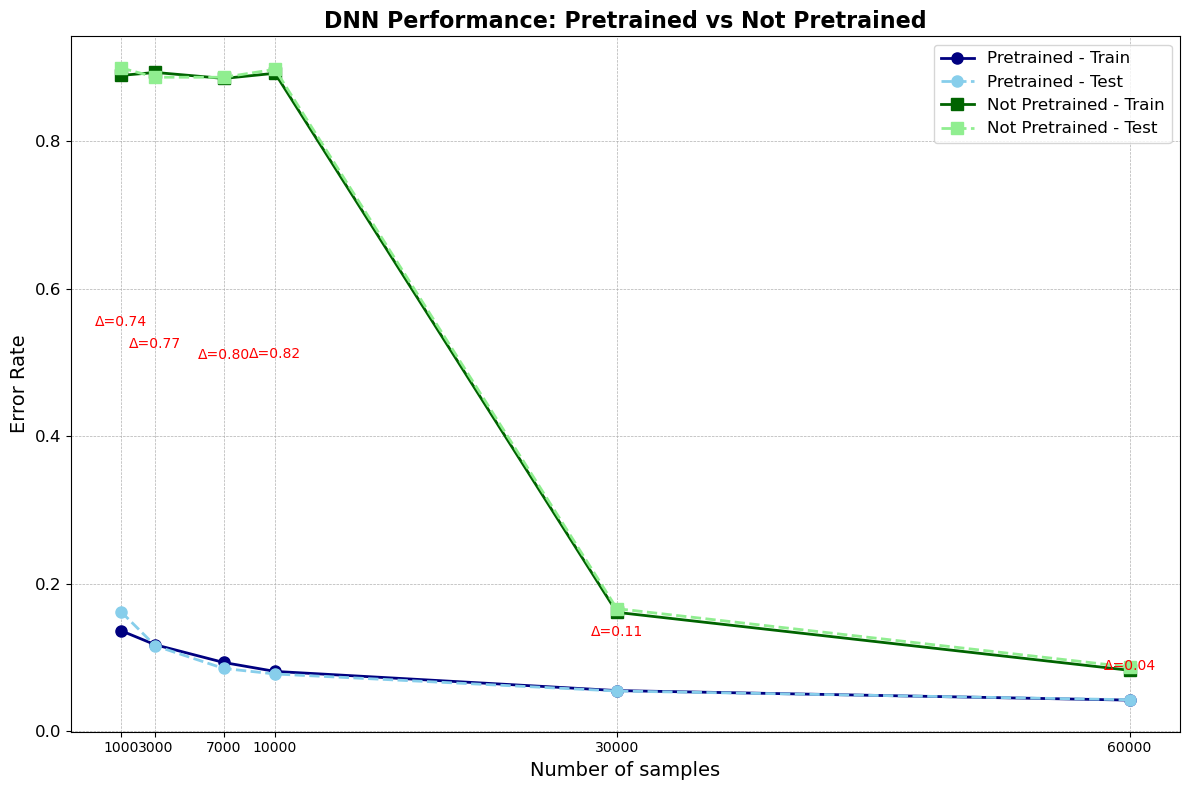

In [4]:
# The single layer configuration to use for this experiment
layer_configuration = (784, 200, 200, 10)

# The different sample sizes for the training set
sample_sizes = [1000, 3000, 7000, 10000, 30000, 60000]

# Store error rates
error_rates_pretrained = {}
error_rates_not_pretrained = {}

# Store losses
losses_finetune_not_pretrained_dict = {}
losses_pretrain_dict = {}
losses_finetune_pretrained_dict = {}

base_dir = "DNN_Models"

if not os.path.exists(base_dir):
    os.makedirs(base_dir)
    print(f"Created base directory {base_dir} for saving models.")

print("Starting experiments...")

for sample_size in sample_sizes:
    print(f"\nExperiment with Sample Size: {sample_size}")

    # Shuffle the indices
    indices = np.random.permutation(len(X_train))
    
    # Select a subset of the training data and labels
    X_train_sub = X_train[indices[:sample_size]]
    y_train_sub = y_train[indices[:sample_size]]

    print("Subset of training data shape:", X_train_sub.shape, "Subset of training labels shape:", y_train_sub.shape)
    
    config_dir_name = '_'.join(map(str, layer_configuration)) + f"_samples_{sample_size}"
    config_dir = os.path.join(base_dir, config_dir_name)
    
    if not os.path.exists(config_dir):
        os.makedirs(config_dir)
        print(f"Created configuration directory: {config_dir}")
    
    error_rates_pretrained[sample_size] = {'train': None, 'test': None}
    error_rates_not_pretrained[sample_size] = {'train': None, 'test': None}

    print("Initializing DNNs...")
    dnn_pretrained = init_DNN(layer_configuration)
    dnn_not_pretrained = init_DNN(layer_configuration)


    print("Training non pretrained DNNs...")
    dnn_not_pretrained, losses_finetune_not_pretrained = retropropagation(dnn_not_pretrained, X_train_sub, y_train_sub, n_iter_dbn, learning_rate, batch_size)
    losses_finetune_not_pretrained_dict[sample_size] = losses_finetune_not_pretrained

    print("Training completed. Evaluating fine-tuned models...")
    error_not_pretrained_train = test_DNN(dnn_not_pretrained, X_train_sub, y_train_sub, verbose=False)
    print(f'Error not Pretrained for train: {error_not_pretrained_train}')
    error_rates_not_pretrained[sample_size]['train'] = error_not_pretrained_train
    
    error_not_pretrained_test = test_DNN(dnn_not_pretrained, X_test, y_test, verbose=False)
    print(f'Error not Pretrained for test: {error_not_pretrained_test}')
    error_rates_not_pretrained[sample_size]['test'] = error_not_pretrained_test

    print("Saving fine-tuned models...")
    save_object(dnn_not_pretrained, os.path.join(config_dir, "dnn_not_pretrained_finetuned.pkl"))
    
    
    print("Pre-training one DNN...")
    dnn_pretrained, losses_pretrain = pretrain_DNN(
        dnn_pretrained, 
        X_train_sub, 
        epochs=n_iter_rbm, 
        learning_rate=learning_rate, 
        batch_size=batch_size, 
        verbose=verbose
    )
    losses_pretrain_dict[sample_size] = losses_pretrain
    print("Pre-training completed. Saving pre-trained model and losses...")
    save_object(dnn_pretrained, os.path.join(config_dir, "dnn_pretrained.pkl"))
    save_object(losses_pretrain, os.path.join(config_dir, "losses_pretrain.pkl"))
    
    print("Training pretrained DNNs...")
    dnn_pretrained, losses_finetune_pretrained = retropropagation(dnn_pretrained, X_train_sub, y_train_sub, n_iter_dbn, learning_rate, batch_size)
    losses_finetune_pretrained_dict[sample_size] = losses_finetune_pretrained

    print("Training completed. Evaluating fine-tuned models...")
    error_pretrained_train = test_DNN(dnn_pretrained, X_train_sub, y_train_sub, verbose=False)
    print(f'Error Pretrained for train: {error_pretrained_train}')
    error_rates_pretrained[sample_size]['train'] = error_pretrained_train

    error_pretrained_test = test_DNN(dnn_pretrained, X_test, y_test, verbose=False)
    print(f'Error Pretrained for test: {error_pretrained_test}')
    error_rates_pretrained[sample_size]['test'] = error_pretrained_test

    print("Saving fine-tuned models...")
    save_object(dnn_pretrained, os.path.join(config_dir, "dnn_pretrained_finetuned.pkl"))

    # Convert the tuple keys to strings for JSON compatibility
    error_rates_pretrained_json = {str(k): v for k, v in error_rates_pretrained.items()}
    error_rates_not_pretrained_json = {str(k): v for k, v in error_rates_not_pretrained.items()}
    
    # Save the dictionaries as JSON in the specified base directory
    save_dict_to_json(error_rates_pretrained_json, os.path.join(base_dir, "error_rates_pretrained_n_samples.json"))
    save_dict_to_json(error_rates_not_pretrained_json, os.path.join(base_dir, "error_rates_not_pretrained_n_samples.json"))
    
    print("Both dictionaries were saved as JSON files in the DNN_Models directory.")

print("All experiments completed. Plotting results...")

plot_error_rates(
    error_rates_pretrained, 
    error_rates_not_pretrained, 
    sample_sizes,
    "Number of samples", 
    "experiment_samples.png"
)